In [347]:
import spacy
import json
import seaborn as sns
import numpy as np

In [3]:
def load_data(file):
    with open (file, "r", encoding="utf-8") as f:
        data = json.load(f)
    return (data)

In [363]:
nlp = spacy.load("./model-best/")

In [364]:
docs = load_data("annotations.json")
print(docs['annotations'])

[['The most delicious mutton curry recipe which is very rustic and full of flavours. The mutton becomes almost melt in the mouth till the time it gets cooked. Though the time required to cook this recipe is a bit longer but the flavours are absolutely delicious and the time taken is absolutely worth it. Using Khassi here, which is the meat that is used for mutton in Parts of Bihar, Bengal and Odisha\r', {'entities': [[19, 25, 'INGREDIENT'], [86, 92, 'INGREDIENT'], [334, 338, 'INGREDIENT'], [356, 362, 'INGREDIENT']]}], ['Cinnamon stick - 1.5 inches\r', {'entities': [[0, 14, 'INGREDIENT'], [17, 20, 'QUANTITY'], [21, 27, 'MEASUREMENT']]}], ['Cumin seeds - 1 tbsp\r', {'entities': [[0, 11, 'INGREDIENT'], [14, 15, 'QUANTITY'], [16, 20, 'MEASUREMENT']]}], ['Coriander seeds - 2 tbsp\r', {'entities': [[0, 15, 'INGREDIENT'], [18, 19, 'QUANTITY'], [20, 24, 'MEASUREMENT']]}], ['Cloves - 4\r', {'entities': [[0, 6, 'MEASUREMENT'], [9, 10, 'QUANTITY']]}], ['Black pepper - 1.5 tbsp\r', {'entities': [[

In [365]:

# docs = docs['annotations']
docs=v1
docs[0]

['_ _ ea S hw a Li a Vali ryt creamy mango smoo ec a it a aii i 1 ve a W dome iii',
 {'entities': [[35, 40, 'INGREDIENT']]}]

In [366]:
from spacy.training import offsets_to_biluo_tags
def get_cleaned_label(label: str):
    if "-" in label:
        return label.split("-")[1]
    else:
        return label
    
def create_total_target_vector(docs):
    target_vector = []
    for doc in docs:
        print (doc)
        new = nlp.make_doc(doc[0])
        entities = doc[1]["entities"]
        bilou_entities = offsets_to_biluo_tags(new, entities)
        final = []
        for item in bilou_entities:
            final.append(get_cleaned_label(item))
        target_vector.extend(final)
    return target_vector


In [367]:
def create_prediction_vector(text):
    return [get_cleaned_label(prediction) for prediction in get_all_ner_predictions(text)]

def create_total_prediction_vector(docs: list):
    prediction_vector = []
    for doc in docs:
        prediction_vector.extend(create_prediction_vector(doc[0]))
    return prediction_vector

def get_all_ner_predictions(text):
    doc = nlp(text)
    entities = [(e.start_char, e.end_char, e.label_) for e in doc.ents]
    bilou_entities = offsets_to_biluo_tags(doc, entities)
    return bilou_entities

In [368]:
def get_model_labels():
    labels = list(nlp.get_pipe("ner").labels)
    labels.append("O")
    return sorted(labels)
def get_dataset_labels():
    return sorted(set(create_total_target_vector(docs)))

In [369]:
from sklearn.metrics import confusion_matrix

def generate_confusion_matrix(docs): 
    classes = sorted(set(create_total_target_vector(docs)))
    y_true = create_total_target_vector(docs)
    y_pred = create_total_prediction_vector(docs)
    print (y_true)
    print (y_pred)
    return confusion_matrix(y_true, y_pred, classes)
# sns.heatmap(confusion_matrix(y_true, y_pred, classes), annot=True)

In [370]:
from matplotlib import pyplot
import numpy

def plot_confusion_matrix(docs, classes, normalize=False, cmap=pyplot.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
   
    title = 'Confusion Matrix, for SpaCy NER'

    # Compute confusion matrix
    cm = generate_confusion_matrix(docs)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, numpy.newaxis]

    fig, ax = pyplot.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=numpy.arange(cm.shape[1]),
           yticks=numpy.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    pyplot.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    
    
    return cm, ax, pyplot


In [362]:
v1 = [['_ _ ea S hw a Li a Vali ryt creamy mango smoo ec a it a aii i 1 ve a W dome iii',
 {'entities': [[35, 40, 'INGREDIENT']]}],
      ['Ww Al Coconut Ww A icoat Desiccated Coconut Ww A SDesiccated Coconut Coconut a oconut Ww a Ble nd and Form Balls be Ke ert be an pe we MS a t yDesiccated Coconut Coconut Ww al i m and Form Balls 3 Desiccated Coconut Blend and Form Balls ae vir I TA _ Blendrand Form Balls Balls ec rs cS co J icy a Form Balls and Form Balls Brotein Balls Beis a and Form Balls Coconut Psy Blend and Form Balls Blend and Form Balls eo U of oy AN a Desiccated Coconut op ee can Gf t er hs bP thy and Form Balls I healthy d Form Balls Fi ss Desiccated Coconut SS v Desiccated Coconut nd and Form Balls can aes Blend and Form Balls yDesiccated Coconut a Ns x Desiccated Coconut i C Desiccated Coconut ICoat Desiccated Coconut _ e Desiccated Coconut',
      {'entities': [[61, 68, 'INGREDIENT'],[69, 76, 'INGREDIENT'],[154, 161, 'INGREDIENT'],[162, 169, 'INGREDIENT'],[208, 215, 'INGREDIENT'],[441, 448, 'INGREDIENT'],
 [532, 539, 'INGREDIENT'],
 [556, 566, 'INGREDIENT'],
 [649, 656, 'INGREDIENT'],
 [672, 679, 'INGREDIENT'],
 [697, 708, 'INGREDIENT'],
 [720, 727, 'INGREDIENT']]}],
     ['ff Blendhtillismoothys f 7 Paprika _ 485icalorie perserye 55glprotein 46gicarbs 9 g fat Lug by oe a ere she s serve ona plate 40 g black bean serve on a plate Extralime n2ktspisale Serve ona plate see 40 g black bean Paprika ALLJEORISOO calorie soldeliciousy fill easy to make Blend dl enoctna aeenay esse Blend till srmocan Bereamy Garlic powder van as season againnn aes ere a r Blend tilllsmoothis creamy Handful ley anaru Pparsigy Season againnn _ ff 2 wr tag tay yy ea be s Garlic powder ee Stencil mstnisarey I Usse aoe carbs Ogffat ab Serve ona plate Pe Extrajlime ee gea easy t Geaake x i 7 Q is see REYaye ae Ili powder Ch Serve ona plate 40 g sweetcorn fill jicious del sok sabe 4 all for 500 sodelicious filling eieasy to make 2 3 aly all eori500 CALORIE so lelic joustfille easy tol Blendltillismooth creamy y a os _ seasonjagainnn _ IIT hy Reape 5 é PY f Sy SS oy he aX EO e Mix till combine Series w Serve ona plate ne 40 g black bean I Ene 485fealories per serve 55 g protein 46gicarbs 9 g fat a Onion powde le so deliciousafille s easy to make er y _ aaiefor soojcalorie igso delicious fill e ito make ae a Ea Blendjtillismoothi icreamy AUTO Ia ae BLEND hush Se a w2ktspisale 300 g cube chicken breast as ye a _ afENJOY 485icaloriesjper serve 55 g protein 46gicarbs 9 g fat os Luge 55 g protein 46gicarbs 9 g fat _ s Mix till comb Nea 485 c geben asta C Sperone a al ow ERB calorie per mee yo ea t Chilli powder fe oo SEIAICINE ELE er extra lime a Hh or Blendhtillismoothys f T emo cen Mx POWERMOC e Mix till combine Bos se Garlic powder aa eae cator es em Garlic powder Eres s x riander MISHER 2 I easyjtoyma enjoy 485 calorie per serve 55 g protein 46 g carb 9glfat ad ya 7 55 g protein 46 g carb 9 g fat z an s 55 g protein 46 g carb 9 g fat a enjoy 485icaloriesjperserving protein 46 g can 2 ey pe fomake ee 5 Se 3 a ve 300 g cube chicken breast Blendltilllsmoothi icreamypy 9 CHICKEN FAJITA BOWL 300 g cube chicken breast GATORIES fill easy tomake y bul aly Pp ss5giproteiny 46 g c ae Bion Garlic powder ee es Onion powder Mix till combine Pes Garlic powder Garlic powder 300 g cubedichicken breast ax 1 2 lime juice serve on a plate extra lime aly for unoeee gehen ial a gl easy yo make ENJOY 485 calorie penserve g proteiny 46 g carb Ogifat sug Mix till combine ae Y yy Garlic powder a wx 300 g cubed chicken breast ae 3 ee oe x ae 7 Serve ona plate Chicken piece Paes oe a eae a eee ALI4FOR S500 calorie delicious filling easyitojmake geperon ageinnn SS dé 7 SS A ee Serve ona plate eos extra lime SA Garlic powder 7 mix till combine ENJOW 85 calorie perserve protein 46 g carb 9 g fat 300 g cube chicken breast Wee s Blendhtilllsmoothisicreamy eno eh ix rowerndx eae coimake ee tenes der ion pow on 300 g cube chicken breast S Boe 300 g cube chicken breast Ss Mix till combine Bs es 300 g cube chicken breast Garlic powder Serve ona plate oe 40 g black bean Blendltillemoarsielerearny Mix till en 300 g cube chicken breast serve ona plate 40 g sweeticorn ew MIN Mixwell ies ALOR ing Seasyit O 19 e mf icious softel eg pee eas Serve ona plate cote extra lime ram all for at geatores IES DCALORI SI sofielicious nine easyjtojmake ene a ee EX 300 g cube chicken breast Blendtillismoothtaicreamypy 2 w Pa a m I Q dful len adlanoe aaa Efemne tl smooth Exim th ji I geen ay season againnn a a TULA 5 ae 4 ymake to ne f Serve ona plate 120 g rice ae ZN be Se 300 g cubed chicken breast aes m uly Mix well Svc ess 9 g fati Ls 1Koxo a 4 ogurt ce 4 Wy Blendhtilllsmoothi icreamy py BLEND CRUSH ew R500 calorie ille easy to make ee Paprika ious fill easy tolmake l Ce lege h re m Blendhtilllsmoothisicreamy 7 be iSaltt pepper eer Sa w IE 1 for 500 TORUS ous filling easyito mak Garlic powder EE e Mix till combine Garlic powder 8 ng easy to S fill Ep _ alleor sooicatorie Blend eMeaasctin ace I ooth ac Blendhtilllsmoothiaicreamy 7 55 g protein 46gicarbs j9 g fat ua o e Mix till combine Cumin Serve ona plate es extra lime oO 3 x 2 aloriesjperserve _ 55 g protein 46gicarbs 9gifat Lue eb serve ona plate Pe Extrailime Season againnn ws dé pe _ a salt in water a 100glavocado al Bs 300 g cube chicken breast _ aauefor 500 caiorie oe ae Soidelicious filling easy to make Ye ae isalt pepper t Chilli powder fee aa 7 etiam Late os 5 allfor SOO Soidelicious fill Xeasy to make ay oy wh ale 55 g protein 46 g carb 9 g fat 4a ious fill easy tolmake y Ved EO e Mix till combine Serve ona plate Seasonediveggies SENJOY 485 caloriesjperserve 55 g protein 46 g carb 9 g fat ys Garlic powder ae _ 55 g protein 46gicarbsj 9 g fat 5 a es der ion pow on fiime juiée Salt in wate 00 g il she s staicine YEN 40 g black bean en NM Blendhtilllsmoothisicreamy f ih 4 be ae BLEND CRUSH h 2itspisalt Bs Onion powder Ltn a5 all for SOO gatorie Sojdelicioussfilling yeasy toi make f 9 oy mh ks a der ion pow on os serve ona plate 40 g black bean ee 5S Onion powder ae Garlic powder ie Paprika Mix we caiorie F Soldelicioussfillinglaveasy to make ce rsaliag y tom Sodelicious fill easy tolmak CAIORIES Gelicioussfillingejeasy to r 300 g cubed chicken breast os serve ona plate 40 g black bean Se eS 300 g cube chicken breast 300 g cube chicken breast 5 e Mix till combine ce ciate Mixwelll 55 g protein 46gicarbs 9gjfat nas 455 g protein 46gicarbs l 9 g fat a 4 oo 4 oc 1ooglavocado ie creamy at dillemecsty y othe AUORIES sofdelicious fillin ng easy tolmake a pas OOg fatifree yogurt U Onion bell pepper 8 N LFOR Sodeiisions filing easyito make ot serve ona plate eae 40 g black bean Ps 300 g cube chicken breast SN sm a Glfatifree yogurt oo il fl Handful parsley a at ry x Blendhtilllsmoothi icreamy 7 n2itspisale Blendtilllsmoothiaicreamypy 9 Garlic powder jee 300 g cube chicken breast 2 Ke ae n SN a Paprika 35 caloriesjperserve e g protein 46 g carb i9 g fat in a hg é om g Blencillemeechielcresrry Chilli powder ee I ene high protein chicken FAJITA BOWL _ Serveona plate 40 g black bean we onion powder BX 300 g cube chicken breast Handfullparsley ee serve ona plate soe 40 g black bean eo Bee aman Cie Serve onia plate a 40 g sweeticorn BE roetale St aris 5e fat Mx POWERNDC 300 g cube chicken breast 3 ee I I 44 Freshjcoriander ynu j all FORSOOICAL Se ite os serve ona plate 40 g black bean 00 g u o e mix till combine ESI aaa or 500 nous so eli jous fill easy to lal i 2 tspysalt combine WV Te f ee WSo delicious fill easy tolmake l a delicious fill easy tolmake I _ serve ona plate 40 g sweeticorn Serve on a plate 120 g rice Sposa SA rs Soe Salt Jpepper MAT all for 200 c caorie n 2itspysalt z ciate ai der ic pow Garl 55 g protein 46 g carb 9 g fat e Mix till combine 55 g protein 46gicarbs 9 g fat y 300 g cube chicken breast 8 ee on Sx ae 7 fillingy CEA Ie on an es 300 g cube chicken breast iSalt jpepper 2 300 g cube chicken breast 2 oris00 calorie asy tomakel Sastre SF orb 9 g fat a 300 g cubed chicken breast Bos 3 DRKX2 hHN a _ _ s in 3 y fill 2 paprika ee deli ious fill CES tolmake a Serve on a plate 40 g black bean 100glavocado as avocado Og ms ud OOg fatifree yogurt U Blend tilllsmoothtaicreamysy y sci a w ms 300 g cube chicken breast SORE 6 ae all for soojgalorie 48 5ic I oe protein Tikes Carbs i9gifat 300 g cube chicken breast z 2 OO e Mix till combine pas KY gi eas i Yo INOUE for 200 catories Garlic powder es 55 g protein 46gicarbs 9gj fat y W2itspisale ae ic powder Garl S fill easy tolmake l Lie a Blend 1 es srooth stcreamy th r Blond mastectomy ix powarnd a enjoy 485 caloriesjpersenve 55 g protein 46 g carb 9 g fat y ai 2itspysalt 300gicubed chicken breast ga Blenditilllsmoothia creamy b 1Koxo sea 4 ogurt REE all for sooigcaleorie isalt pepper st 300 g cube chicken breast 2 a Nets x oo le pemien ee r enjoy 5 calorie penserve rotein 46 g carb i9 g fat t J Serve ona plate 40 g sweeticorn Cc Garlic powder ee ic powder Garl x 485 calorie per serve _ 55gfprotein 46gicarbs iggifat rae 1 ake a tol m Sy as ig e Mis Mix well seasonjagainnn we aK za wa 2 3 4 2 Ic Sock Ee Serve ona plate 40 g black bean Mix till combine N Si e SS Season againnn 4 3 eee tsscinite carbs pogftat Seer all for 200 gcavorie Bas Onion powder icious fill Gay iia v Sams Ge easy yt make sjp ls earbs 9gifat 300 g cubed chicken breast _ serve ona plate 40 g sweetcorn season againnn _ I a ar eee eee _ at cleanser 55 g protein 46 g carb 9gjfat or if a Garlic powder es pany OOg fatifree yogunrt U B 2 OOgifatifree yogurt U Zoo protein 46gicarbs 9 g fat a tig Blenaleiersceeniclereemy Blenditillismoothtéicreamy Th Onion powder OO e Mix till combine a ee e Blendttilllsmooth é creamy see Roytoant es al Serve ona plate ee extra lime f ee Serve ona plate see 40 g black bean onion powder sen Blen 1s Plendldillenooein creamy it I ri Mix well os serve ona plate 40 g black bean Fe Cy ion on Onion bell pepper t ga ill combine Be ang Waegicarbs 9 g fat Handful x 300 g cube chicken breast Fix PowaRNanx all for 200 calorie Mix till combine rT ae a s pas OOg fatifreehyogurt U Senate ana 30miiwater seat aay 300 g cube chicken breast Garlic powder re cee Cees I Blendhtilllsmoothi icreamy a f BLEND CRUSH Mix well ae z 1s dad Imake Med g S S ds 00 g u EE Fe Mix till combine fat _ a Mix én comb Serve ona plate oe 40 g black bean SA Garlic powder Gesicalories Spat sewing 5 g ee Chilli powder Co Ge Blendltillismooth é creamy 2 ete 2 Paprika 98 easy 2 make ul t Chilli powder fee ae Blen Ace Plemeleillenootto creamy lea I serve onia plate 40 g sweetcorn Serve ona plate 40 g sweetcorn I Blendliemostha c ary f SSeS BLEND hu we der ion pow on se 300 g cube chicken breast serve ona plate soe extra lime sodelicioussfillingf jeasy to make Maal cihe YEO AUIRFOR 500 calorie Soldelicious fill easyjto make 4 wee mooth Sicreamy ee Serve ona plate Pe Extrailime Serve ona plate iece ken p Chic all foris00 calorie serve onja plate extra lime 2 3 e S Soydel 300 g cube chicken breast serve ona plate 40 g black bean ic powder Garl Art for 500 caiories Com a ous filling acme aa al 2 2 Garlic powder UUU serve per ss 0 Zz Ww go t 10 ES oe at so serve ona plate sete 40 g black bean os serve ona plate extra lime srecctlencety aaa w ALLFOR so0 eatorie Sockichus fil Rlenent to makel rctlfston yt 300 g cube chicken breast e Onion powder LL FORISOO calorie fill easy toimakel ce Hh ENJOY 485 calorie perjsenve 55 g protein 46 g carb i9 g fat Lue Salt Jpepper Garlic powder 2 Garlic powder 4 el Salt pepper calorie ng SSgiproteiny 4ogicanbs 9 g fat AMIEFOR 500 catorie seasyitolmake 5 g liciouss filling g in 300 g cube chicken breast 300 g cube chicken breast as ye Sofde ermseitonosinacoany a 300 g cubed chicken breast ee Seasonjagainnn 7 ee 4 say wn 4 mete x I serve on a plate di Extralime Us fillingi ea if I L P as Micwell ig a tay é seis ys Oe ae ce i 300 g cube chicken breast he ic powder Garl 300 g cube chicken breast S Yar Sete Paprika a Efane Gl smocth Blend tilllsmoothig creamysy oy season againnn ws dé pe _ s a Mix well Bhs 300 g cube chicken breast 2 a a se 7 p 5 a BN 7 SEIAICINE ELE extra lime OOg fatifree yogurt U 7 nditill srnootht i othieicreamy BOTT all for ae CAVORIES abe Serve onja plate soot extra lime Mix till combine o e Mix till combine 8b Pp SSgiproteiny 4og carb 9 g fat LA Salt in water BNET all for SO OIG gaiorie ENereeyele _ il 00 g ih eee a ll Garlic powder ae Chilli powder ae 7 Garlic powder ee CATORIES all FORi500 Caisions ail eYeasy to make x ay ae Paprika 0 ol L Yo ex 0 ro eo AL ae Garlic powder 2 Garlic powder _ ee GAWORIES eYeasy tolmake g serve onia plate extra lime',
      {'entities':[[131, 141, 'INGREDIENT'],
 [212, 216, 'INGREDIENT'],
 [217, 224, 'INGREDIENT'],
 [333, 339, 'INGREDIENT'],
 [479, 485, 'INGREDIENT'],
 [668, 675, 'INGREDIENT'],
 [680, 688, 'INGREDIENT'],
 [938, 948, 'INGREDIENT'],
 [991, 1000, 'INGREDIENT'],
 [1126, 1144, 'INGREDIENT'],
 [1272, 1281, 'INGREDIENT'],
 [1293, 1297, 'INGREDIENT'],
 [1311, 1320, 'INGREDIENT'],
 [1414, 1420, 'INGREDIENT'],
 [1573, 1579, 'INGREDIENT'],
 [1866, 1884, 'INGREDIENT'],
 [1897, 1904, 'INGREDIENT'],
 [2011, 2017, 'INGREDIENT'],
 [2031, 2036, 'INGREDIENT'],
 [2079, 2085, 'INGREDIENT'],
 [2093, 2098, 'MEASUREMENT'],
 [2127, 2131, 'INGREDIENT'],
 [2293, 2299, 'INGREDIENT'],
 [2407, 2414, 'INGREDIENT'],
 [2834, 2840, 'INGREDIENT'],
 [2872, 2882, 'INGREDIENT'],
 [3111, 3134, 'INGREDIENT'],
 [3389, 3396, 'INGREDIENT'],
 [3443, 3448, 'INGREDIENT'],
 [3453, 3458, 'INGREDIENT'],
 [3497, 3502, 'INGREDIENT'],
 [3546, 3553, 'INGREDIENT'],
 [3633, 3639, 'INGREDIENT'],
 [3662, 3679, 'INGREDIENT'],
 [3688, 3698, 'INGREDIENT'],
 [3728, 3734, 'INGREDIENT'],
 [3902, 3907, 'INGREDIENT'],
 [3979, 3988, 'INGREDIENT'],
 [4069, 4074, 'INGREDIENT'],
 [4187, 4189, 'INGREDIENT'],
 [4481, 4487, 'INGREDIENT'],
 [4554, 4559, 'INGREDIENT'],
 [4574, 4578, 'INGREDIENT'],
 [4617, 4621, 'INGREDIENT'],
 [4665, 4673, 'INGREDIENT'],
 [4682, 4692, 'QUANTITY'],
 [4696, 4701, 'INGREDIENT'],
 [4826, 4836, 'INGREDIENT'],
 [4843, 4848, 'INGREDIENT'],
 [4859, 4865, 'INGREDIENT'],
 [4876, 4883, 'INGREDIENT'],
 [4940, 4947, 'INGREDIENT'],
 [5072, 5082, 'INGREDIENT'],
 [5193, 5202, 'INGREDIENT'],
 [5228, 5239, 'INGREDIENT'],
 [5368, 5374, 'INGREDIENT'],
 [5375, 5376, 'INGREDIENT'],
 [5377, 5382, 'INGREDIENT'],
 [5388, 5394, 'INGREDIENT'],
 [5399, 5403, 'INGREDIENT'],
 [5464, 5474, 'INGREDIENT'],
 [5547, 5554, 'INGREDIENT'],
 [5636, 5642, 'INGREDIENT'],
 [5695, 5702, 'INGREDIENT'],
 [5795, 5808, 'INGREDIENT'],
 [5831, 5838, 'INGREDIENT'],
 [5879, 5883, 'INGREDIENT'],
 [5887, 5892, 'INGREDIENT'],
 [5973, 5983, 'INGREDIENT'],
 [5991, 5995, 'INGREDIENT'],
 [5996, 5999, 'INGREDIENT'],
 [6006, 6010, 'INGREDIENT'],
 [6049, 6056, 'INGREDIENT'],
 [6185, 6189, 'INGREDIENT'],
 [6422, 6426, 'INGREDIENT'],
 [6496, 6504, 'INGREDIENT'],
 [6584, 6593, 'INGREDIENT'],
 [6857, 6867, 'INGREDIENT'],
 [6919, 6929, 'INGREDIENT'],
 [6946, 6953, 'INGREDIENT'],
 [6983, 6984, 'INGREDIENT'],
 [7217, 7223, 'INGREDIENT'],
 [7532, 7537, 'INGREDIENT'],
 [7742, 7756, 'INGREDIENT'],
 [7795, 7804, 'INGREDIENT'],
 [7922, 7932, 'INGREDIENT'],
 [8007, 8011, 'INGREDIENT'],
 [8020, 8023, 'QUANTITY'],
 [8033, 8042, 'INGREDIENT'],
 [8100, 8105, 'INGREDIENT'],
 [8125, 8132, 'INGREDIENT'],
 [8257, 8263, 'INGREDIENT'],
 [8274, 8291, 'INGREDIENT'],
 [8292, 8303, 'INGREDIENT'],
 [8319, 8325, 'INGREDIENT'],
 [8364, 8388, 'INGREDIENT'],
 [8419, 8424, 'INGREDIENT'],
 [8573, 8577, 'INGREDIENT'],
 [8578, 8583, 'INGREDIENT'],
 [8595, 8599, 'INGREDIENT'],
 [8669, 8679, 'INGREDIENT'],
 [8693, 8698, 'INGREDIENT'],
 [8875, 8876, 'INGREDIENT'],
 [8888, 8898, 'INGREDIENT'],
 [8993, 8998, 'INGREDIENT'],
 [9119, 9129, 'INGREDIENT'],
 [9133, 9139, 'INGREDIENT'],
 [9140, 9146, 'INGREDIENT'],
 [9196, 9216, 'INGREDIENT'],
 [9234, 9241, 'INGREDIENT'],
 [9257, 9275, 'INGREDIENT'],
 [9280, 9287, 'INGREDIENT'],
 [9329, 9333, 'INGREDIENT'],
 [9343, 9354, 'INGREDIENT'],
 [9524, 9529, 'INGREDIENT'],
 [9609, 9614, 'INGREDIENT'],
 [9805, 9809, 'INGREDIENT'],
 [9879, 9885, 'INGREDIENT'],
 [9964, 9974, 'INGREDIENT'],
 [10116, 10121, 'INGREDIENT'],
 [10237, 10241, 'INGREDIENT'],
 [10282, 10296, 'INGREDIENT'],
 [10339, 10350, 'INGREDIENT'],
 [10918, 10924, 'INGREDIENT'],
 [10929, 10945, 'INGREDIENT'],
 [11108, 11113, 'INGREDIENT'],
 [11114, 11118, 'INGREDIENT'],
 [11175, 11181, 'INGREDIENT'],
 [11189, 11205, 'INGREDIENT'],
 [11209, 11210, 'QUANTITY'],
 [11336, 11342, 'INGREDIENT'],
 [11387, 11391, 'INGREDIENT']]}],
['Super Food for Hair Fall PCOD rs lactating Mothers Weight Loss Haleem Aliv seed Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv seed a if per an Super Food for Hair Fall 3 pcod lactate mother Weight Loss Haleem Aliv seed a owl pcod g lactate Mothers wet Sas Super Food for Hair Fall pcod lactate mother Weight Loss ee Super Food for Hair Fall pcod lactate mother Weight Loss glee Aliv seed a e wa VF wn ee ay oe ae Le Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv seed Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv seed e J va Jp Super Food for Hair Fall PCOD sl lactate mother pp Weight Loss J Haleem aie Seeds x Super Food for Hair Fall pcod lactate mother Weight Loss 5 an SSI i W et Ayih ii i9 I eae if vr f e ay 8 oe ay in 2 ae oe ioe 7 ze ho I IT N Sa yy _ Super food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv seed 5 a ew ae I Super Food for Hair Fall pcod lactate mother Weight Loss rr Haleem Aliv seed _ 4 4 _ Super food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv seed Super Food for Hair Fall pcod lactate mother Weight Loss aleem Aliv seed Super Food for Hair Fall pcod lactate mother ja Weight Loss aad yal yearn Bk I Mae ae iy AH al by gil ia Super Food for Hair Fall PCOD es lactating Mothers Weight Loss Haleem Aliv seed ay in poise Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv seed Super Food for Hair Fall pcod lactate mother Weight Loss S I LN BORAT ATT Hair Fall PCOD ia lactate mother a Weight Loss Haleem Aliv seed Super Food for Hair Fall pcod lactate mother Weight Loss ds Super Food for Hair Fall pcod lactate mother x Weight Loss Haleem Aliv Seeds ee ay es 4 wo a 1 of a Nee elo all fey Super Food for Hair Fall pcod lactate mother Weight Loss 2 Haleem Aliv seed ay at a PH Super Food for Hair Fall 4 pcod lactate mother Weight Loss Haleem Aliv seed a ee a a x s a _ Super food for I Hair Fall ee PCOD a lactate Mothers uaa Weight Loss Haleem Aliv seed SVE ow eee ay ee C Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv seed YS aa rd s f Vi th al a TH ee Lactating Mothers Weight Loss Haleem Aliv seed a _ ed Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv seed EE ey a I hi SVE Ow ay ty ii e ay sh go ey dy 7 ene ue Super Food for Hair Fall pcod lactate mother I te Weight Loss FWY YA J CaN F PE ee ay I a RT ay of F pine Super Food for Hair Fall pcod lactate mother e Weight Loss Haleem Aliv seed I Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv seed es eee 3 _ Super food for Hair Fall pcod lactate mother Weight loss em Aliv seed we Super Food for Hair Fall pcod lactate mother Weight Loss Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv seed Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv Seeds ie Ne be z a of F kan y Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv seed _ rleeee ee 7 I aa Super Food for Hair Fall pcod lactate mother Weight Loss ee ay Son i F Super Food for pcod lactate mother Weight Loss Super Food for Hair Fall pcod lactate mother Weight Loss JW Haleem Aliv Seeds b r _ I a 7 ff at my Slo Ph Si eee ee x é y ef Super Food for Hair Fall pcod lactate mother Weight Loss Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv seed Super Food for Hair Fall PCOD lactate mother 7 UF coll B Pa brera MRA Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv seed a_i a a fs a a 2 Super Food for Hair Fall PCOD od ay Pn é a Super Food for SS Hair Fall pcod lactate mother Weight Loss Haleem Aliv Seeds fk Super Food for Hair Fall pcod lactate mother Weight Loss Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv Seeds SLA wirwe Brin S ier Sel r Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv seed _ wr ay it nie Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv seed ay te Super Food for Hair Fall PCOD _ sea lactating mother Lai Weight Loss pcod lactate mother Weight Loss Haleem Aliv Seeds ee iy ia e ki afk Super Food for pcod lactate mother Weight Loss Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv seed _ Y Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv seed Super Food for Sy Hair Fall pcod lactate mother Weight Loss I ay iD ae ma qT puttin ae hy Ty Super Food for Hair Fall pcod lactate mother Weight Loss Super Food for Hair Fall pcod eee lactating Mothers ma Weight Loss Reet PCOD lactate mother Super Food for Hair Fall Pcop lactating mother Weight Loss 2 Haleem Aliv seed Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv Sencha ae ce oe ip Va niin von ae 1 Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv seed Super Food for Hair Fall 7 pcod lactate mother Weight Loss Haleem Aliv seed a or e _ Super food for Hair Fall 7 pcod lactate mother Weight Loss Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv seed SNR _ at Se ae 1 el afk Super Food for Hair Fall pcod lactate mother Weight Loss ie ay f ti c Super Food for Hair Fall pcod lactate mother Weight Loss Res SS Super Food for Hair Fall 7 PCOD ag lactate Mothers Weight Loss Haleem Aliv seed q x Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv Seeds fee er ht a salt PCOD lactate mother Weight Loss Haleem Aliv Seeds ay qi yw Super Food for SS Hair Fall pcod lactate mother Weight Loss Haleem Aliv seed I Super Food for Hair Fall pcod lactate mother Weight Loss a Super Food for SS Hair Fall pcod lactate mother Weight Loss pcod lactate mother Weight Loss aq age om 0 a e Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv seed a or an Super Food F Hair Fall pcod lactate mother Weight Loss Haleem Aliv Seeds er ay TT Lx how Super Food for Hair Fall 4 pcod lactate mother Weight Loss Haleem Aliv seed we EE S va Super Food for Hair Fall pcod lactate mother Weight Loss my i d Hit ft Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv seed ey Super Food for Hair Fall pcod lactate mother Weight Loss Super Food for Hair Fall pcod lactate mother Weight Loss ee ay a LA Sh I i 4 Bx AP Bae Q oe r _ Super food for Hair Fall pcod lactate mother Weight Loss Haleem a v Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv seed e 2 Super Food for see Hair Fall PCOD lactate Mothers ps Weight Loss A Super Food for Hair Fall pcod lactate mother Weight Loss Wer te pcod lactate mother Weight Loss aleem Aliv Seeds ee ay in all j Rees 4 f I ad o i 4 bes Wel ae nk I a a t e ay fa a Super Food for Hair Fall pcod lactate mother Weight Loss ee 4 Haleem Aliv Seeds ERIC be pn fx Super Food for Hair Fall pcod lactate Mothers Mi Weight Loss Super Food for Hair Fall pcod lactate mother Weight Loss ed Super food for Hair Fall PCOD aad lactating Mothers Weight Loss Haleem Aliv seed ee ae Ee i4aaa TH ji we Ao Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv seed Super Food for Hair Fall pcod lactate mother Weight Loss aw ie s Sar we Haleem Aliv seed _ th Super Food for Hair Fall pcod lactate mother Weight Loss a Haleem Aliv seed I h Hie I oa 1 8 if ih Meters have I ay 1 pe aow PCOD lactate mother Weight Loss Haleem Aliv seed 5 e ay vw in oe Aum 1 di ae iy a i 1 ba aah th he 484 yea 1 Ba Super Food for Hair Fall pcod lactate mother Weight Loss J J Haleem Aliv Seed a r Super Food for Hair Fall pcod lactate mother Weight Loss Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv seed Super Food for Hair Fall pcod lactate mother Weight Loss SVR ay Tn Ce SAN ie Ne Super Food for Hair Fall pcod lactate mother Weight Loss Se Haleem Aliv Seeds aaa _ o 8 J Sot o e ay mn Ta Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv seed Super Food for Hair Fall PCOD Weight Loss Haleem Aliv seed Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv seed et I ee a ze Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv seed Super Food for Hair Fall 7 pcod lactate mother Weight Loss Haleem Aliv seed e ay I iii J 4 Super Food for Hair Fall Pcop lactating mother Weight Loss Haleem Aliv Seeds SE ga j Super Food for Hair Fall PCOD an 4 ip nyt ikl Teal Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv seed Super Food for Hair Fall Eeou lactating mother Weight Loss Haleem Aliv seed oe EE Ss va pe Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv Seeds ae Ls Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv Seeds DT _ a 3 a sve we 5 Super Food for Hair Fall pcod lactate mother _ weight Loss Haleem Aliv Seed ae Th _ I x Super Food for Hair Fall pcod lactate mother Weight Loss ee ter a Pd SS el Super Food for Hair Fall pcod lactate mother Weight Loss I Haleem Aliv seed J Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv seed Super Food for Hair Fall pcod lactate mother Weight Loss GS Haleem Aliv seed Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv seed _ Super food for Hair Fall pcod lactate mother Weight Loss J Haleem Aliv seed _ pcod lactate mother Weight Loss Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv Seeds PCOD lactate mother Weight Loss jel 4 ena as r ne a rh i ji A Hair Fall pcod lactate mother Weight Loss Haleem Aliv seed Super Food for Hair Fall pcod lactate mother Weight Loss B Haleem Aliv seed _ e ss Fat as pe a Super Food for Hair Fall pcod lactate mother Weight Loss Haleem Aliv Seeds',
{'entities':[[118, 131, 'INGREDIENT'],
 [206, 219, 'INGREDIENT'],
 [317, 330, 'INGREDIENT'],
 [377, 410, 'INGREDIENT'],
 [477, 490, 'INGREDIENT'],
 [551, 564, 'INGREDIENT'],
 [719, 737, 'INGREDIENT'],
 [868, 881, 'INGREDIENT'],
 [954, 967, 'INGREDIENT'],
 [1039, 1052, 'INGREDIENT'],
 [1383, 1396, 'INGREDIENT'],
 [1457, 1470, 'INGREDIENT'],
 [1771, 1789, 'INGREDIENT'],
 [1799, 1808, 'INGREDIENT'],
 [1860, 1873, 'INGREDIENT'],
 [2056, 2069, 'INGREDIENT'],
 [2214, 2227, 'INGREDIENT'],
 [2527, 2540, 'INGREDIENT'],
 [2634, 2643, 'INGREDIENT'],
 [2685, 2698, 'INGREDIENT'],
 [2742, 2755, 'INGREDIENT'],
 [2816, 2829, 'INGREDIENT'],
 [2915, 2928, 'INGREDIENT'],
 [3008, 3021, 'INGREDIENT'],
 [3069, 3082, 'INGREDIENT'],
 [3251, 3264, 'INGREDIENT'],
 [3308, 3321, 'INGREDIENT'],
 [3452, 3465, 'INGREDIENT'],
 [3589, 3602, 'INGREDIENT'],
 [3667, 3680, 'INGREDIENT'],
 [3724, 3737, 'INGREDIENT'],
 [3765, 3770, 'INGREDIENT'],
 [3826, 3839, 'INGREDIENT'],
 [3915, 3928, 'INGREDIENT'],
 [4039, 4052, 'INGREDIENT'],
 [4122, 4135, 'INGREDIENT'],
 [4179, 4192, 'INGREDIENT'],
 [4257, 4270, 'INGREDIENT'],
 [4334, 4347, 'INGREDIENT'],
 [4424, 4437, 'INGREDIENT'],
 [4651, 4664, 'INGREDIENT'],
 [4756, 4769, 'INGREDIENT'],
 [4832, 4845, 'INGREDIENT'],
 [4917, 4930, 'INGREDIENT'],
 [4974, 4987, 'INGREDIENT'],
 [5072, 5090, 'INGREDIENT'],
 [5211, 5225, 'INGREDIENT'],
 [5290, 5303, 'INGREDIENT'],
 [5339, 5343, 'INGREDIENT'],
 [5344, 5370, 'INGREDIENT'],
 [5444, 5457, 'INGREDIENT'],
 [5520, 5533, 'INGREDIENT'],
 [5582, 5595, 'INGREDIENT'],
 [5614, 5627, 'INGREDIENT'],
 [5687, 5700, 'INGREDIENT'],
 [5767, 5780, 'INGREDIENT'],
 [5860, 5873, 'INGREDIENT'],
 [5945, 5958, 'INGREDIENT'],
 [6016, 6029, 'INGREDIENT'],
 [6093, 6106, 'INGREDIENT'],
 [6150, 6163, 'INGREDIENT'],
 [6246, 6259, 'INGREDIENT'],
 [6314, 6327, 'INGREDIENT'],
 [6352, 6353, 'QUANTITY'],
 [6354, 6359, 'MEASUREMENT'],
 [6794, 6807, 'INGREDIENT'],
 [6962, 6975, 'INGREDIENT'],
 [7036, 7049, 'INGREDIENT'],
 [7130, 7143, 'INGREDIENT'],
 [7217, 7243, 'INGREDIENT'],
 [7367, 7380, 'INGREDIENT'],
 [7449, 7462, 'INGREDIENT'],
 [7506, 7519, 'INGREDIENT'],
 [7660, 7673, 'INGREDIENT'],
 [7767, 7780, 'INGREDIENT'],
 [7823, 7844, 'INGREDIENT'],
 [7900, 7913, 'INGREDIENT'],
 [7987, 8000, 'INGREDIENT'],
 [8063, 8076, 'INGREDIENT'],
 [8288, 8301, 'INGREDIENT'],
 [8453, 8466, 'INGREDIENT'],
 [8534, 8547, 'INGREDIENT'],
 [8717, 8730, 'INGREDIENT'],
 [8792, 8805, 'INGREDIENT'],
 [8870, 8883, 'INGREDIENT'],
 [8944, 8957, 'INGREDIENT'],
 [9021, 9034, 'INGREDIENT'],
 [9097, 9110, 'INGREDIENT'],
 [9207, 9220, 'INGREDIENT'],
 [9329, 9342, 'INGREDIENT'],
 [9403, 9416, 'INGREDIENT'],
 [9498, 9511, 'INGREDIENT']]}],
['Seed Crackers racker SS ae _ al th vie 13999 I ie Hat E waa Seed Crackers a a Seed Crackers y Seed Ciadckers racker ti ant Seed Cracker n ad I o 4 pe o co co oO 9 7 Via id Db bob ob a n s e309 2 095 233 Kus oe il em V fs ve ck Seed Cra PaaS 4 Bi f Wap Py em AON Seed Crackers Pt Seed Crackers eed Crackers BD 9 Seed Crackers ey a F 4 j a lan N 3 3 veer Le SCE o s pe a Seed Crackers y I onan oar v4 any x Pare 7 9 129 r racke Seed Crackers dy on Wee Ss be Ss a2 ee a Pre 23 f NS 42 sd os Ss Ses fy N asf 229 é A Y ck a of wm ff barelll SO ic 7 uy a 4 i Seed Crackers I re Seed Crackers ee ele ra i x o 1 ie o cr to a ied vat 2 Set St o a Te ag ey t n m al w wre i 0 5 try Png nad oy sve NSS ov ese Te 9 ye os a or vo er BaF SP mw ame a ae I o 4 pa o xe to ae rt Ey Toate 2 a Fe fe Seed Crackers erie kay Laas a ign Seed Cracker a re Seed Crackers y I',
 {'entities':[[0, 4, 'INGREDIENT'],
 [14, 31, 'INGREDIENT'],
 [60, 64, 'INGREDIENT'],
 [94, 98, 'INGREDIENT'],
 [99, 108, 'INGREDIENT'],
 [109, 115, 'INGREDIENT'],
 [119, 127, 'INGREDIENT'],
 [224, 231, 'INGREDIENT'],
 [262, 283, 'INGREDIENT'],
 [426, 430, 'INGREDIENT']]}],
['onlyj220 galorie Sofcreamy idelicious Senso S o Ks I aaa 7 d o 4 4 7 ashe tuo 9 Peel separatel2 egg yolk io enjoy 22 o calorie perntoast i23 g protein Mi9gtcarbsi 6 g fat ENIJON 220icaloriesjpertoast Chilli flake chive oe only 220 caorie Soicreamy delicious fs HIGH PROTEIN SPICY CREAMY EGGS _ o4 high protein SPICY CREAMY EGGS iFinely choplegg white ineliychopesgwiiie only 220 calorie So creamy delicious CLO e Gs ft eS 7 ra 3 a oo x s Le ro I Paprika only 220 galorie Sovcreamy idelicious 4 oe f gee eg 9 a J Ao he 4 to oh onlyj220 galorie Sofcreamy idelicious 2 PS ta Se mts baw ty J A oq 4 f j ws th ie 7 7 3 separate 2 egg yolk Gf onlys220 GALORIES Sovereamy delicious Se F ire PYONLY 220 cavorie Solcreamy delicious ONLYs220 galorie so creamy delicious YF F ire ENJOY 220 calorie pertoast onlys220 galorie so creamy idelicious only 220 calorie So creamy delicious _ ae Fi é c _ 4 a i I Gis er kag fe ak wast z v4 high protein SPICY CREAMY EGGS va high PROTEIN SPICY CREAMY EGGS only 220 calorie Sojcreamy delicious ve onlys220 calorie er ee aw a a oe ra aa roy oy 2 a a ds Kg I _ garlic powder Chillijflakes chive a4 onlys220 galorie Sofcreamy idelicious eas 4 aaa ad eee te be ng ink j vw 7 iPeell separate 52 egg vel i Ss high protein ENJOy 22 O calorie pertoast ENJOY 22 0 calorie pertoast 23 g proteiny jl9gicarbs 6 g fat fs high protein SPICY CREAMY EGGS chillijflake chive Ghillifflakes chive WON Y 220 gaorie so creamy delicious re F a a 7 a 7 ij j t 2 EF 2 2 s Pa a ie vee bs PWONIV 220 CATORIES Sojcreamy delicious od a enjoy 22 o calorie pertoast v4 high protein SPICY CREAMY EGGS Peel separate 2 egg yolk enjoy 22 0 calorie pentoast 23 g proteiny jl9gicarbsi 6 g fat va HIGH PROTEIN SPICY CREAMY EGGS o cS s p p J ONLYj220 galorie Sofcreamy idelicious 2 8 b a eal b ee oy ane 0 a oe y f 7 4 4 vw 7 e Boil for 8 min v4 high protein SPICY CREAMY EGGS iFinelyichoplegg whi F ENJOY 220 calorie pertoast 23 g proteiny jl9gicarbsj 6 g fat fe high protein SPICY CREAMY EGGS ENJOY 220 caloriesjperntoast pwonly 220 cauorie so creamy delicious re I p I a 4 od fx y vee EX 65 tess Ipinelychoplegg w nite NEON ZO CE ctie PEPTESS 23 g protein l9gicarbs egifat pwonly 220 galorie so creamy delicious a ae 4 J CZ 7 é 4 z ei a a7 7 only 220 calorie So creamy delicious fae 4 Cue I only 220 galorie Sovcreamy idelicious only 220 galorie Solcreamny idelicious puta oe e oh q 9 9 ny haere ng Aw 4 7 4 bs oo 3 neniov 22 0 calorie pertoast finely chopleggiw ee Zi eS onlyj220 galorie Sofcreamy idelicious NEONA 220 calorie pertoast TENZOY 22 0 calorie pertoast i23 g proteiny jl9gicarbsi 6 g fat pwonly 220 calorie So creamy delicious ee a Vy Cus 7 4 4 wor aw Pad x Boil for 8 min 3 8 3 3 a only 220 galorie sovereamy idelicious Mix till smooth creamy 220 calorie perntoast 23 g proteiny jl9gicarbsj ieg fat z i high protein SPICY CREAMY EGGS ENJOY only 220 galorie sovcreamy idelicious be S x ad ae ae 7 4 os 4 4 Pee ie eee Wl 44 7Soicreamy delicious only 220 calorie 4 will rr a a e oe _ we be we 4 keg e y 7 red onion tonly 220 calorie So creamy delicious i 4 a aa we oy nd é we pp m5 Chilli flake chive y NEON AZO CE ciies PEPTESS 1 sind ray ky Bt Peel separate 2 egg yolk Salt pepper onlyj220 galorie Sofcreamy idelicious pan BS eo 4 a ae ane ig 7 a 4 7 bs 4 4 er 7 I high protein SPICY CREAMY EGGS r il for 8 min onlys220 galorie so creamy delicious YF F ire J c4 high protein high protein if os high protein SPICY CREAMY EGGS a WENIOW 220 caloriesjpertoast 23 g proteiny jl9gicarb 6gjfaty Mix till smooth creamy 7 only 220 catorie So creamy delicious Dy in al 2 r e f 2s sy aL ge w 4 4 on Boil for 8 min if high protein onlys220 galorie so creamy delicious YF F a oa high protein onlyj220 galorie Sovcreamy idelicious o wn o o 0 o o 2 oO Pm boy a PWONty 220 calorie Sojcreamy delicious a only 220 galorie Sovcreamy idelicious ae a on a i 4 eal 7 at 4 4 7 4 4 onlyj220 galorie sofcreamy idelicious TP J ane Fm 4 f oe i 7 22 0 caloriesipertoast 23 g proteinyjl9gicarb 6 g fat é Fs high protein SPICY CREAMY EGGS rie permtoast 23 g proteiny jl9gicarbs 6 g fat ENJOY 220 caloriesjperntoast 23 g protein jl9 g carb 6 g fat NENIOV 220 calorie pertoast only 220 galorie Sofcreamy idelicious a 2 ae B I Sz 3 I up dee be 7 4 oe 4 f 7 vs 4 4 vv 7 3 only 220 galorie solcreamy idelicious ive he t Chilli flakesfaxch ENJOv 22 o calorie pertoast Chilli flakesi chive onlyj220 GALORIES Sovcreamy delicious Chillijflakes ay NVENIOy 220 caloriesjpertoast 23 g proteiny jl9gicarb 6gjfaty o o 2 s 3 9 9 be wn B onlyj220 galorie Solcreamy idelicious s Rote a5 Ps 4 ree eee j J A j F vv 7 a a is e 4 f oa high protein SPICY CREAMY EGGS onlys220 galorie so creamy delicious YF F be Salt pepper Wy Einelychopleagy Einelyichopye wv ee Ginelyichoplegaly ite parate 2 egg yolk onlys220 galorie so creamy delicious YF F ire 22 0 caloriesipertoast 23 g proteinysl9gicarb 6 g faty e a 2 a Pa 2 x y oe hae Mix till smooth creamy ENJOY 220 caloriesjpertoast 23 g protein l9gtcarb 6 g fat vention 220 caloriesjpertoast 23 g proteinyjl9gicarb 6 g faty fe HIGH protein SPICY CREAMY EGGS 2 slice wholegrain bread o cs 3 r Psy co Salt pepper onlys220 galorie so ereamy delicious Se F ire Boil for 8 min ENJOY 22 0 caloriesjpertoast only 220 galorie Sofereamy delicious a 7 aire ENJOY 220 caloriesjpertoast enjoy I enjoy 220 calorie perjtoast 23 g proteiny jl9 g carb 6 g fat n ws Cg eat ANS all f y u ho only 220 calorie So creamy delicious _ p c2 SS 4 an hae a 5 2 oe aoe Peel separate 2 egg yolk Chilli flake chive ae es toa iFinely chop egg white thely cep g9 v nitesys pwonly 220 caorie so creamy delicious _ f high protein SPICY CREAMY EGGS 1 nk fl w ia a Sve Dae 5 Peel separate 2 eggyolk if high protein SPICY CREAMY EGGS lake chive Z il for 8 min Ss high protein SPICY CREAMY EGGS I high protein only 220 galorie so creamy delicious a 7 ire HIONLY 220 calorie Soicreamy delicious _ oa high protein SPICY CREAMY EGGS Pp o e 8 Separateiziegg y olk p wonly 220 calorie Sojcreamy delicious i F a f om a 7 PS ee Je 5 4 pi ee y a res xena 22 o calorie pertoast 23 g proteiny jl9gicarbsj 6 g fat 22 0 calorie pertoast 23 g protein jl9gicarbs 6 g fat ao only 220 CAUORIES Soicreamy delicious a rir a er Ld a a ae ad al 7 Ma p v i d nash Ps we SSS irinelyjchopleggiwhite insiychepegg white J v4 high protein SPICY CREAMY EGGS enjoy v4 high protein SPICY CREAMY EGGS ee HIGH protein SPICY CREAMY EGGS Te ENION 220 caloriesipery toast i23 g proteiny jl9gicarbs 6 g lfaty 5 I Chilli flake chive if high protein SPICY CREAMY EGGS z if high protein SPICY CREAMY EGGS pwonly 220 galorie so creamy delicious 7 3 si ra ze fx ie 5 x ENIJON 220 caloriesjpertoast 7finely chopjegg onlys220 galorie so ereamy delicious Se F ire Peel separate 52 egg vel Boil for 8 min 325 Peel separatei2 egg yolk nely choplegg w I separate 2 egg yolk fe high protein SPICY CREAMY EGGS pwonly 220 galorie Sojcreamy delicious I F t sm og a oe ae Ls rc y je ONLYs220 galorie so creamy delicious YF F ee ONLYs220 galorie so creamy delicious YF F be lelyichoplegg iseparate 2 egg yolk 22 0 caloriesipertoast 23 g proteinyl9gicarb 6 g faty only 220 galorie so ereamy idelicious Mix till smooth creamy Peel separatei2iegg yolk ING CEE 3 NENJOY 220 caloriesjpertoast 23 g proteiny jl9gicarbsj 6 g fat Chilliiflakes chive Fé high protein SPICY CREAMY EGGS 22 0 caloriesipertoast 23 g proteinyl9gicarbs 6 g fat 4 an 7 or os al 3 S he ENIJON 220 caloriesjpertoast _ Ja high protein se eater SXONLY 220 calorie so creamy delicious PWONLY 220 calorie Soicreamy delicious ae e A é p 4 a 2 ey 5 sf a a os be he enjoy 22 0 caloriesjperntoast 23 g proteiny l9gicarb 6 g fat TENIOY 220 calorie pertoast 23 g proteiny jl9gicarbsj i6 g fat enjoy 22 0 calorie pertoast 23 g proteiny jl9gicarbs 6 g fat a v4 high protein SPICY CREAMY EGGS Chilli flake chive Lettuce E sf high protein SPICY CREAMY EGGS 22 0 caloriesipertoast 23 g proteinysl9 g carb 6 g faty pwonly 220 calorie Soicreamy delicious 7 7 re a ba ss I a a py we k only 220 galorie sofcreamy idelicious Peel separate 2 egg yolk onlyj220 galorie Sofcreamy delicious Be S x ad ae eee 7 4 oe 4 4 Pe ie ere ll pwionly 220 calorie So creamy delicious re s 7 y 4 mt z x 3 A x y je 4 il for 8 min Low fat yogurt ite ne iFinely choplegg w I Ca ic ER cole co fe 5 onlyj220 GALORIES Sofcreamy idelicious ee ie Sz 3 I ne ane g 4 s 4 4 j 4 4 7 rk a i yard Peel separatei2 egg yolk pwonly 220 CAORIES Sojcreamy delicious ENJOy 22 0 calorie pertoast only 220 galorie sofcreamy idelicious ENJOY onlyj220 galorie Sofcreamy idelicious a 2 8 bs a al B I ne be ay 4 os 4 f 7 4 4 ov 7 enjoy 220 caloriesjpertoast onlys220 galorie Sofcreamy delicious YF F ire Zz il for 8 min only 220 galorie so creamy delicious ENJOW 220 caloriesjpertoast ENJOY 220 caloriesjperntoast 23 g proteiny il9gicarb 6 g fat Peel separate 2 egg yolk Garlic powder NENIOV 22 0 caloriesjpertoast 23 g protein il9gicarb 6 g fat ely chopleggiwhites IENJOY 22 o calorie pertoast 23 g proteiny sl9gicarbsi 6 g fat Cy J e re 2 io Y NENIOY 220 calorie perntoast 23 g protein jl9gicarbsj 6 g fat NP WENIOy 22 0 caloriesipertoast 23 g proteinysl9gicarb 6 g fat ENJOY 220 caloriesjpertoast Chilli flake Light cream cheese v4 high protein GELESEXA MES be o o ig S 3 si i GS be a ix ti Mi Peel separate 2 egg yolk a ONLYi220 CATORIES Soicreamy delicious ae a nw my f _ a x one z r d wr only 220 galorie Sofcreamy delicious cord 7 ire ENJOY 220 caloriesjpertoast 23 g proteiny l9gicarb 6 g fat ie Se ENOY 220 caloriesipery toast i23 g proteiny l9 g carbs 6 g faty I high protein pwionly220 calorie So creamy delicious 4 high protein SPICY CREAMY EGGS PYONIN 220 CATORIES Solcreamy delicious ENJOv 220 calorie pertoast separate 2 egg yolk fe high protein SPICY CREAMY EGGS _ neniov 220 calorie pertoast 23 g protein jl9gicarbs 6 g fat Peel separatei2 egg yolk onlyj220 galorie Sovcreamy idelicious as s ge ad 9 a J Ao he 4 4 4 ov 7 Peel separate 2 egg yolk os high protein SPICY CREAMY EGGS only 220 galorie Sovcreamy idelicious a 2 eo ei on q I 4 eal a J a 4 f 7 4 a only 220 galorie Sovcreamy idelicious 2 so f 5 _ r 4 9 va J Aika 4 5 finely chopjegg oil for 8 min',{'entities':[[96, 99, 'INGREDIENT'],
 [151, 162, 'INGREDIENT'],
 [323, 327, 'INGREDIENT'],
 [446, 453, 'INGREDIENT'],
 [1087, 1093, 'INGREDIENT'],
 [1253, 1262, 'INGREDIENT'],
 [1278, 1290, 'INGREDIENT'],
 [1642, 1650, 'INGREDIENT'],
 [1862, 1866, 'INGREDIENT'],
 [1980, 1984, 'INGREDIENT'],
 [1995, 2013, 'INGREDIENT'],
 [2149, 2158, 'INGREDIENT'],
 [2409, 2415, 'INGREDIENT'],
 [2429, 2437, 'INGREDIENT'],
 [2521, 2529, 'INGREDIENT'],
 [2530, 2536, 'INGREDIENT'],
 [2537, 2549, 'QUANTITY'],
 [2836, 2840, 'INGREDIENT'],
 [3013, 3018, 'INGREDIENT'],
 [3086, 3098, 'INGREDIENT'],
 [3180, 3186, 'INGREDIENT'],
 [3444, 3461, 'INGREDIENT'],
 [4072, 4090, 'INGREDIENT'],
 [4104, 4107, 'INGREDIENT'],
 [4123, 4129, 'INGREDIENT'],
 [4291, 4297, 'INGREDIENT'],
 [4338, 4344, 'INGREDIENT'],
 [4345, 4352, 'INGREDIENT'],
 [4353, 4358, 'INGREDIENT'],
 [4426, 4443, 'INGREDIENT'],
 [4666, 4670, 'INGREDIENT'],
 [4915, 4932, 'INGREDIENT'],
 [4975, 4992, 'INGREDIENT'],
 [5078, 5083, 'INGREDIENT'],
 [5258, 5275, 'INGREDIENT'],
 [5302, 5311, 'INGREDIENT'],
 [5459, 5467, 'INGREDIENT'],
 [6290, 6294, 'INGREDIENT'],
 [6432, 6437, 'INGREDIENT'],
 [6442, 6454, 'INGREDIENT'],
 [6604, 6621, 'INGREDIENT'],
 [7182, 7199, 'INGREDIENT'],
 [7248, 7253, 'INGREDIENT'],
 [7421, 7427, 'INGREDIENT'],
 [7753, 7757, 'INGREDIENT'],
 [7777, 7784, 'INGREDIENT'],
 [8340, 8348, 'INGREDIENT'],
 [8421, 8424, 'QUANTITY'],
 [8425, 8432, 'MEASUREMENT'],
 [8682, 8699, 'INGREDIENT'],
 [8710, 8728, 'INGREDIENT'],
 [8786, 8792, 'INGREDIENT'],
 [8793, 8799, 'INGREDIENT'],
 [8800, 8806, 'INGREDIENT'],
 [8807, 8809, 'QUANTITY'],
 [8812, 8829, 'INGREDIENT'],
 [9038, 9055, 'INGREDIENT'],
 [9097, 9114, 'INGREDIENT'],
 [9115, 9121, 'INGREDIENT'],
 [9134, 9139, 'INGREDIENT'],
 [9163, 9171, 'INGREDIENT'],
 [9367, 9384, 'INGREDIENT'],
 [9568, 9572, 'INGREDIENT'],
 [9649, 9650, 'QUANTITY'],
 [9651, 9659, 'INGREDIENT'],
 [9772, 9775, 'INGREDIENT'],
 [10049, 10053, 'INGREDIENT'],
 [10074, 10077, 'INGREDIENT']]}],
    ['Bre Wt 7 oe oat oa see',{'entities':[[12, 15, 'INGREDIENT']]}],
    ['ackicemoscasonig re 3 3 c o Lj Ss Gaicaloriesjperburger 2 g proteiny 39 g carb jl3gjfat ONEW 44 iSolcrispysjuicyssidelicious Gailcaloriesjperburger 2 g proteiny 39 g carb jl3gjfat breast cut intoithinifillet Chicken Dipjintolegg wash wt 2 calorie par Ruger l2 g proteinyp39gicarb jl3 g fat CA calorie par burger G2 g proteiny 39gicarbs jl3 g fat Crispy chicken 50 g cornflake 50 g cornflake 3 5 3 a o I ry wn 2 aekicemascesonte only 44 calorie sofcrispysjuicy eidelicious only 44 sofcrispyajuicyzeidelicious yo a Ree Diplinto eggiwashl Light brioche bun 2 calorie par kunger G2 g proteiny s9gicarb 13 g fat 2 calorie per burger 4 2 g proteiny j39gicarbs jl3 g fat Light cheese pickle b onew 44 sofcrispyajuicy idelicious 30 g lightonfatitree mayo CRISPY CHICKEN burger can ee Litt A I I ee pit Dipintoleggiwash Chicken breast cut into thin fillet CA calorie par kunger 2 g proteiny 39q carb jlsgfat Dipjintoleggiwash ithenlintolcrumb he bun o 2 Light bri e g 3 a 3 3 f n Bake for 18 20 mine at 200c CRISPY chicken burger id Bekah be EM Dipiitiog we Light brioche bun SON oi Ee ania Bake for 18 20 mine at 200 g a Bs ONEW 44 Sofcrispysjuicy idelicious Chicken jbreast cut into thin fillet Gailcaloriesjperburger G2 g proteiny s9gicarb lg fat E a be Bake for 18 20 mine at 2001 aekicemascesone Dipiitiog we CA calorie par burger G2 g proteiny 39gicarbsi j13 g fat IDipjintolegg wash Tage FRAN ps a _ Chicken breast cut into thinjfillet ONEW 44 iSolcrispysjuicysidelicious 2a calorie par kunger G2 g proteiny s9gicarbsy j13 g fat pake for18 20 mine a e at 20 only 44 calorie Socisnyitiay dalicion S ithenlintorcrumiss PAIS as al ae I if I bake for 18 20 mine at 200c Dipjintolegg wash a Xb Dipjinto eggiwash cs ONLY44 sofcrispyajuicy eidelicious onew 44 Sofcrispysjuicy eydelicious Garlic powder 20 mine at 200c Bake for 18 50 g cornflake Gailcaloriesjperburger 2 g proteiny 39gicarbs j13 g fat Gailcaloriesjperburger 2 g proteiny 39 g carb 13 g fat eason both side ackicemoascasonihg only 44 sofcrispysjuicyeidelicious Crispy chicken CA calorie par kunger K2 g proteiny 39q carb jlsgifat eS a ee pe tad Bake for 18 20 minelat 200 only 44 Sofcrispyajuicyeidelicious Bie J pope td only 44 calorie Sofcrispyajuicyeidelicious Light brioche bun be fs s al 5 _ es ele a 2 ree I Bake for 18 20 mineat 200 8 e 2a calorie par kunger K2 g proteiny 39q carb jlsgifat ONEW 44 sofcrispyajuicy eidelicious Lettuce CA calorie par kunger G2 g proteiny 39gicarbs jlsg fat Dipiintoleggiwash Gailcaloriesjperburger g2 g proteiny 39gicarbs jlg fat ithenjintolcrumb only 44 CALORTAS sofcrispysjuicy eidelicious Pipitoc wes ioche bun Light bri CRISPY CHICKEN burger io s Og com take Bake for 18 20 mine at 20 30 g light or fat free mayo only 44 Sofcrispysjuicy eidelicious chenttoemnais cheniintote carbs Bakefor l 18 20 1 mine at 200 Dipitoc iy wedn Bake for 18 20 n mine at 200 ake for 18 20 mine at 200c ithenjintolcrumb wae Crispy Bhicken te 2 tien itocmmls only 44 sofcrispyajuicyseidelicious ONEW 44 sofcrispysjuicy eidelicious Light cheese pickle S Chicken breast cut into thin e onew 44 sofcrispysjuicy eidelicious Ackicemoascasoning powder Gar ychicken ispy it ithenintolcrumb 2 calorie per burger L 2 g proteiny 39 g carb jl3gjfat 50gjcornflakes aekicemoscesone CRISPY chicken burger mah Sok he MM see UUM UUW SAUNA Light cheese pickle only 44 sofcrispyjjuicy eidelicious be ts 2 50 oO e n for18 jake Bake for 18 20 mine a Gailcaloriesjpernburger g2 g proteiny s9gicarb l3 g fat IDipjintoleggiwash CA calorie par kunger 42 g proteiny 39q carb jlsgjfat CRISPY CHICKEN burger a on aes Ww CRISPY CHICKEN BURGERS 20 mine at 200c ke for _ ale aa a 18 Ba Gf calorie par kunger G2 g proteiny 39gicarbs j13 g fat a r Diplintoeggjwashy A thenjintojcrumb e g 3 3 3 3 8 n ackicemascesoning high protein crispy chicken burger Pad Se af CA calorie par burger G2 g proteiny 39 g carbs l3 g fat Chicken breast cut into thinifillet Ss re 2a calorie par kunger K2 g proteiny 39q carb jlsgitat only 44 calorie Sofcrispyajuicyeidelicious Dipitoe we Gf calorie par kunger 2 g proteiny 39q carb jlsgifat season both side 1x M 50 g cornflake llight orfatifree mayo Tomato she Ny Light cheese pickle BS Chicken breast cut into thin fillet es a be oa Gailcaloriesjperburger G2 g proteiny s9gicarbsi jlg fat Og com flake only 44 Sofcrispyajuicy idelicious Gaicaloriesjperburger G2 g proteiny s9gicarb l3 g fat ackicemoscasone Crispyjchicken CRISPY chicken BURGERS 50 g cornflake 20 g cornflake special sauce only 44 isolcrispysjuicyieidelicious toith be a Sg oO 4 I 9 r doy fais en es if ere re ee 8 20 mineiat 200 os ee CA calorie par burger G2 g proteiny s9gicarbs l3 g fat Crispy chicken Lettuce ree i d Garlic powder SOgicornflakes Gai caloriesjpernburger l2 g proteinyj39 g carb jl3gjfat thenjintolcrumb I 50 g cornflake ONEW 44 sofcrispysjuicy eidelicious Chicken breast cut into thin fillet CA calorie par kunger 2 g proteiny 39q carb jlsgifat aekicemoascesone 50 g cornflake CA calorie par burger G2 g proteiny S9 g carbs l3 g fat Hight cheese pickle 2 calorie par Ruger 2 g proteiny 39 g carb jl3gjfat Gailcaloriesjperburger 2 g proteiny 39gicarbs l3 g fat 2 calorie par Ruger 2 g proteiny 39 g carb jl3gjfat Hletss itoithinifi in breast cut Ne Chicken ithenjintolcrumb CA calorie par kunger 42 g proteiny S9 g carb 13 g fat ONEW 44 sofcrispyajuicy eidelicious Dipjintoleggiwash 50 g cornflake CA calorie par burger G2 g proteiny s9gicarbsi jl3 g fat CRISPY chicken burger a an ie 2 calorie par kunger K2 g proteiny 39q carb jlsgifat Chicken breast cut into thin fillet CRISPY chicken burger a Bake for 18 20 mine at 200 he bun ry co Light bri wash lintofegg ip PA S Fe ia 8 o a o q 0 e I mix séason both side 50 g cornflake Og conn tlake I es 2 a 5 2a calorie par burger G2 g proteiny s9gicarbsi j13 g fat caloriesjperburger 6 otc PEE GCS isaitat ONEW 44 solcrispysjuicyseidelicious only 44 calorie Sofcrispysjuicyeidelicious Chicken breast cut into thin GUS ONEW 44 sofcrispyajuicy eidelicious crnitioaunis Bake fort 20 CRISPY CHICKEN BURGERS baal piety SSE only 44 calorie sofcrispysjuicyeidelicious CRISPY CHICKEN burger only 44 sofcrispyajuicyseidelicious Ga4icaloriesjperburger 2 g proteiny 39 g carb jl3gjfat 2 calorie per burger 2 g proteiny 39 g carb jl3gjfat Gf calorie par kunger 2 g proteiny 39q carb jlsg fat only 44 Solcrispyyjuicy idelicious Ackicemmoassasoning 15 g sriracha CRISPY CHICKEN burger ae _ aa n i Crispy chicken smoke paprika o u 3 o uw oO o a 7 Mix season both side Bake for 18 20 mine at 200c out 0 oe in we hd I Nes cai Gai caloriesjperburger 2 g proteiny 39 g carb jl3gjfat Bake for 18 20 mineat200C CA calorie par kunger K2 g proteiny 39q carb jlsgjfat Chicken breast cutin Se 2A calorie par burger G2 g proteiny s9gicarb j13 g fat only 44 iSolcrispysjuicyseidelicious only 44 sofcrispysjuicyseidelicious I ete Chickenjbreast cutin Dy Mthentintorcramss Garlic powder Dipiitoc iy wesn ra ag x BS a Cy Fd o o 0 2 ec I he bun ry io Light bri Ackicemoascasonig Og com take only 44 sofcrispyajuicyeidelicious CRISPY CHICKEN BURGERS OT f _ s _ e e a t j Gailcaloriesjperburger G2 g proteiny s9gicarb l3 g fat Pip itoegg wasn ackicemoascesone ONEW 44 sofcrispysjuicyeidelicious I x os eas Ligh cienittoatms SS 8 SS Mix both sid ix seasonibe side Bak for 18 20 m ws lg Dip intolegg wash I ci 3 a a ry I a Py I a w ie x a Cy o a o 1 ds only 44 Sofcrispysjuicy eidelicious only 44 Sofcrispysjuicy idelicious lightionfatifree mayo Dipjintoleggwwash Og cornflake thenjintolcrumbs hicken ispy cl Cri GA calorie par burger G2 g proteiny s9gicarb 13 g fat Light cheese pickle iss CA calorie par burger G2 g proteiny 39gicar bs 3 g fat powder Gar Onion powder Gf calorie par burger L2 g proteiny S9gicarbs jl3 g fat Gaicaloriesjperburger 2 g proteinyj39 g carb jl3gjfat Diplintofeggiwash vat 200c mine y4o Bake fo EE EE 18 Bake for 18 20 mine at 200 only 44 calorie sofcrispyajuicy eidelicious Te Diptiitocy wes fillet in ken breast cut into thi ic Chi Tomato CRISPY chicken burger h we Se eos bs es s5 Dipitoc wes ae ofote Bake for 18 20 minejat 2 Crispy chicken Onion powder CRISPY chicken burger Teseae a a ys Tix season both side 30gjlightor fat free mayo y Mix season both side Gaicaloriesjperburger 2 g proteiny 39 g carb jl3gjfat Light cheese pickle os Bake for 18 20 mine at 200 g Gaicaloriesjperburger 2 g proteiny 39 g carb jl3gjfat Bake for 18 20 mine at 200 a 4 he SS SS 8 SSS e g 3 a 3 3 f un oO o uw Dn wn iplintoreggiwash CRISPY CHICKEN BURGERS ae 9 4 Bake for 18 20 mine at 200c CRISPY chicken burger yy a eo an Pp Di only 44 Solcrispyajuicy eidelicious e g 3 a 3 3 8 n S Dipjintoleggiwash Chicken breast cut intothin fillet 1 tsp garlic powder 2 calorie par burger 2 g proteiny 39 g carb jl3gjfat ee Chicken br east cut into thin fillet mor re Crispy chicken Gailcaloriesjperburger G2 g proteiny s9gicarb jl3 g fat Chicken breasticut into thin fillet Dipiintoleggiwash Gailcaloriesjperburger 2 g proteiny 39q carb jlsgifat 50 g cornflake Ga4icaloriesjperburger 2 g proteiny 39 g carb jl3gjfat CRISPY CHICKEN burger get tae ae 5 if og roman an Ni we OSS 3 5 3 a o I Py wn 2 only 44 sofcrispyajuicy eidelicious ithenjinto at Bake for 18 201 mine at I _ t a tl Mixtelseason both side a 50 g cornflake Og com tlake CA calorie par burger G2 g proteiny 39gicarbs l3 g fat Grispyichicken Dipiitioge we diplintofeggiwash Z Chicken breast cut into thinifillet only 44 Sofcrispyajuicy idelicious special sauce 50 g cornflake only 44 iSolcrispysjuicyssidelicious 30 g lightor fat free mayo CRISPY CHICKEN BURGERS ge ne ail gaéllcalorie perburger 2 g proteiny 39 g carb jl3gjfat PA 2 4 io 8 o a o o 0 ms i 3 I forj18 20 min Pipitoe we Lettuce Aa only 44 calorie sofcrispyajuicy eidelicious Diplintoeagiwash he bun ioc Light bri Diplintoleggiwash EE Diplintoleggiwash e Hight chsase BETES ae OOG only 44 sofcrispysjuicyeidelicious crispy chicken burger be IDipjintofeggiwash Chicken breast cut intothin fillet va Ackicemossasoning Cf calorie par burger G2 g proteiny S9 g car bs 3 g fat only 44 calorie sofcrispyajuicy eidelicious Gailcaloriesjperburger 2 g proteiny 39q carb jlsg fat Ss 3 3 a c c fe CA calorie par kunger G2 g proteiny s9gicarb jl3 g fat only 44 sofcrispyajuicy eidelicious Dipiiiog we GAllcaloriesiperburger 42 g proteiny 39gicarbsi jI3 g fat thenjinto crumbs ame',{'entities':[[643, 653, 'INGREDIENT'],
 [670, 676, 'INGREDIENT'],
 [742, 746, 'INGREDIENT'],
 [747, 753, 'INGREDIENT'],
 [754, 761, 'INGREDIENT'],
 [811, 818, 'INGREDIENT'],
 [1077, 1081, 'INGREDIENT'],
 [1094, 1096, 'QUANTITY'],
 [1687, 1704, 'INGREDIENT'],
 [1708, 1714, 'INGREDIENT'],
 [1779, 1785, 'INGREDIENT'],
 [2390, 2397, 'INGREDIENT'],
 [2551, 2559, 'INGREDIENT'],
 [2627, 2634, 'INGREDIENT'],
 [2946, 2973, 'INGREDIENT'],
 [3499, 3505, 'INGREDIENT'],
 [3524, 3528, 'INGREDIENT'],
 [3529, 3537, 'INGREDIENT'],
 [3545, 3552, 'INGREDIENT'],
 [3579, 3586, 'INGREDIENT'],
 [3587, 3594, 'INGREDIENT'],
 [4113, 4123, 'INGREDIENT'],
 [4129, 4135, 'INGREDIENT'],
 [4149, 4155, 'INGREDIENT'],
 [4166, 4173, 'INGREDIENT'],
 [4417, 4439, 'INGREDIENT'],
 [4664, 4674, 'INGREDIENT'],
 [4772, 4774, 'QUANTITY'],
 [4777, 4786, 'INGREDIENT'],
 [4929, 4931, 'QUANTITY'],
 [4932, 4933, 'MEASUREMENT'],
 [4934, 4943, 'INGREDIENT'],
 [5255, 5261, 'INGREDIENT'],
 [5331, 5353, 'INGREDIENT'],
 [5354, 5363, 'INGREDIENT'],
 [5576, 5578, 'QUANTITY'],
 [5897, 5904, 'INGREDIENT'],
 [5966, 5978, 'INGREDIENT'],
 [5999, 6006, 'INGREDIENT'],
 [6007, 6014, 'INGREDIENT'],
 [6015, 6019, 'INGREDIENT'],
 [6080, 6087, 'INGREDIENT'],
 [6103, 6130, 'INGREDIENT'],
 [6352, 6360, 'INGREDIENT'],
 [6361, 6367, 'INGREDIENT'],
 [6368, 6375, 'INGREDIENT'],
 [6416, 6427, 'INGREDIENT'],
 [6642, 6646, 'INGREDIENT'],
 [7007, 7013, 'INGREDIENT'],
 [7014, 7021, 'INGREDIENT'],
 [7022, 7029, 'INGREDIENT'],
 [7185, 7189, 'INGREDIENT'],
 [7454, 7470, 'INGREDIENT'],
 [7550, 7556, 'INGREDIENT'],
 [7634, 7639, 'INGREDIENT'],
 [7650, 7668, 'INGREDIENT'],
 [7822, 7824, 'QUANTITY'],
 [7881, 7894, 'INGREDIENT'],
 [8051, 8056, 'INGREDIENT'],
 [8071, 8085, 'INGREDIENT'],
 [8142, 8146, 'INGREDIENT'],
 [8230, 8236, 'INGREDIENT'],
 [8259, 8261, 'QUANTITY'],
 [8342, 8344, 'QUANTITY'],
 [8431, 8438, 'INGREDIENT'],
 [9004, 9011, 'INGREDIENT'],
 [9478, 9482, 'INGREDIENT'],
 [9490, 9497, 'INGREDIENT'],
 [9720, 9758, 'INGREDIENT'],
 [9774, 9779, 'INGREDIENT'],
 [9866, 9873, 'INGREDIENT'],
 [10022, 10046, 'INGREDIENT']]}],
['rr Te Fe Fae I IOOE i pu MOG get VISIBLE RESULTS FO chieve all your joal only with one app try now in 4 weeks get VISIBLE RESULTS chieve all your joal only with one app try now in 4 weeks a _ take get VISIBLE RESULTS a4 get VISIBLE RESULTS chieve all your joal only with one app try now in 4 weeks get VISIBLE RESULTS FO chieve all your joal only with one app 2y now in 4 weeks A ibn weight loss exercise to transform the body get VISIBLE RESULTS Ff chieve all your joal only with one app try now in 4 weeks get VISIBLE RESULTS ia chieve all your joal only with one app try now zz in 4 weeks 1 reo a P Sy po D e YX get VISIBLE RESULTS I s chieve all your joal only with one app try now in 4 weeks joqie Se rr Te Fe j Fam JOOE get VISIBLE RESULTS rf chieve all your joal only with one app 2y now in 4 weeks ir ae get VISIBLE RESULTS EF of chieve all your joal only with one app try now in 4 weeks Pes 5 y sl rr Th K E IOOE AL GET VISIBLE RESULTS chieve all your joal only with one app in 4 weeks get VISIBLE RESULTS rf chieve all your joal only with one app RY now in 4 weeks rr Te Sey I iooe yr D e a Es as aa be weight loss exercise to transform the body 2 7 4 4 4 Ii i F MOL get VISIBLE RESULTS ry ne 78 get VISIBLE RESULTS Fr chieve all your joal only with one app try now in 4 weeks get VISIBLE RESULTS F I chieve all your joal only with one app try now in 4 weeks fe get VISIBLE RESULTS pO chieve all your joal only with one app try now in 4 weeks get VISIBLE RESULTS FO chieve all your joal only with one app Y now _ in 4 weeks y KeeV sD get VISIBLE RESULTS EF chieve all your joal only with one app try now e in 4 weeks aa as get VISIBLE RESULTS chieve all your joal only with one app try now in 4 weeks get VISIBLE RESULTS Fr chieve all your joal only with one app try now in 4 weeks get VISIBLE RESULTS I s chieve all your joal only with one app try now in 4 weeks get VISIBLE RESULTS FO chieve all your joal only with one app try now in 4 weeks get VISIBLE RESULTS FO chieve all your joal only with one app try now in 4 weeks a1 I a bP oe IOC get VISIBLE results a Ee chieve all your joal only with one app try now in 4 weeks 8 4 nolg h a 2 4 1 a D e4 weight loss exercise to transform the body I rr Deer get visible RESULTS Ff chieve all your joal only with one app try now _ in 4 weeks get VISIBLE RESULTS ae chieve all your joal only with one app try now a IN 4 weeks rr Te ic j i JOOE a1 I a a p oe Cc IOC oad 7 aa KeeV ad get VISIBLE RESULTS chieve all your joal only with one app try now in 4 weeks ie TT get VISIBLE RESULTS Ff chieve all your joal only with one app Y NOW x in 4 weeks get VISIBLE RESULTS Ff chieve all your joal only with one app Y NOW x in 4 weeks get VISIBLE RESULTS FO chieve all your joal only with one app try now in 4 weeks get VISIBLE results a chieve all your joal only with one app try now in 4 weeks get VISIBLE RESULTS in 4 weeks get VISIBLE RESULTS Ff chieve all your joal only with one app try now in 4 weeks get VISIBLE RESULTS pO chieve all your joal only with one app try now _ in 4 weeks Y a Ty j a oa nee 5 Ne 1S ee bs I ee ke he G 9 die ei4 Y get VISIBLE RESULTS chieve all your joal only with one app try now in 4 weeks get VISIBLE RESULTS chieve all your joal only with one app rry now in 4 weeks get VISIBLE RESULTS chieve all your joal only with one app try now in 4 weeks Se get VISIBLE RESULTS FO chieve all your joal only with one app try now in 4 weeks weight loss exercise to transform the body we Th ae Gy Nee Ewe it wa ia JOO Ba e4 get VISIBLE RESULTS I s chieve all your joal only with one app try now in 4 weeks y a a4 weight loss exercise to transform the body Th _ ce I I e 1 dig 1 get VISIBLE RESULTS FO chieve all your joal only with one app 2y now in 4 weeks a 4 r YOK get VISIBLE RESULTS I s chieve all your joal only with one app try now in 4 weeks get VISIBLE RESULTS chieve all your joal only with one app try now in 4 weeks ie LT eye VE weight loss exercise to transform the body ss get VISIBLE RESULTS chieve all your joal only with one app Y now in 4 weeks get VISIBLE RESULTS chieve all your joal only with one app _ _ ss Y now in 4 weeks weight loss exercise to transform the body a soot e get VISIBLE RESULTS FO chieve all your joal only with one app try now z in 4 weeks rr Te my ret Gy I I wee a rr Albee JOOE a 2 f get VISIBLE RESULTS chieve all your joal only with one app Y NOW x in 4 weeks get VISIBLE RESULTS 3 chieve all your joal only with one app try now za in 4 weeks d 4 get VISIBLE RESULTS Fr chieve all your joal only with one app try now in 4 weeks 7 De i woog 78 a es get VISIBLE RESULTS FO chieve all your joal only with one app try now in 4 weeks Tek La Dene get VISIBLE RESULTS Ff chieve all your joal only with one app try now 7 in 4 weeks ws get VISIBLE RESULTS a of chieve all your joal only with one app try now j z in 4 weeks a 7 cee 5 i d e4 ie TT F ew TT S a GET VISIBLE RESULTS Ff chieve all your joal only with one app try now _ in 4 weeks get VISIBLE RESULTS chieve all your joal only with one app try now in 4 weeks e 5 3 a ee get VISIBLE results aap chieve all your joal only with one app try now S in 4 weeks 8 get VISIBLE RESULTS chieve all your joal only with one app try now in 4 weeks ie LT ee eye VE hm JOVI get VISIBLE RESULTS Ff chieve all your joal only with one app try now in 4 weeks take we te wl Gy S Uy Pa Es rr MOG get VISIBLE RESULTS chieve all your joal only with one app in 4 weeks re EF ver ae get VISIBLE RESULTS FO chieve all your joal only with one app try now in 4 weeks get VISIBLE RESULTS FO chieve all your joal only with one app try now in 4 weeks get VISIBLE RESULTS F 2 chieve all your joal only with one app try now in 4 weeks get VISIBLE RESULTS Fr chieve all your joal only with one app try now S in 4 weeks',{'entities':[[2429, 2433, 'INGREDIENT'], [4282, 4287, 'INGREDIENT']]}],
['wwa a ww 4 ee 7 a 4 pe m PG y see ike 7 4q my g re va a gue al 8 é f we I 9 a 4 6 een F dl a s y 4 di oo ben be 4 4 8 eae f va a gan J 2 buik oud I x gi ee es d f ae 3 i d ral em fe woe 3 a a oe I J j y yi 4 2 _ 4 sf ey 4 ad e',{'entities':[]}],
['5 300 g cubed chicken breast a a fol o fo CS AMIEFOR 500 calorie a ySoldelicious filling easy to make Paprika serve onja plate extra lime ax Onion powder n2ktspisale Ee eS ax as te ALLEFORISOO calorie ous fill easy tolmake or _ s Zan fill icious so del pepper on medium he s date a9 4 allfor SOO GAVORIES JSoldeliciousHillingle easy tomake a 5 ay 55 g protein 46gicarbs 9 g fat Z s a ig s 300 g cubed chicken breast Season againnn 3 r FA e Serve ona plate en 40 g black bean cs Spenaone ea l z I es 300 g cubed chicken breast 25 2 es i _ s Blendiillemasenetcrearny y 7 ee be poctdclicious fillingf easy to make L 300 g cube chicken breast oe re Papri Fresh coriander cilan S Serve onja plate ea extra lime enjoy I calorie perserve g protein 46gicarbs 9 g fat 55 ae SE Blendttilllsmoothisicreamy s ae serve ona plate eo 40 g black bean W2ktspisale ggeieen againnn oe 4 é u ie a 485 penserve SSg proteiny46 g carb 9 g fat ken breast ic 300 g cube ch Garlic powder Par ee a ae 300 g cube chicken breast ak OOg fatifree yogurt u I 1oog fatifreesyogurt Se 300 g cube chicken breast as 2 5 o e 1 241 p wr Blenditillls moothiicreamy arciaae Blend till smooth gicreamy Th p ALLIFORISOO calorie catorie all for 500 fill steasy tomake y ma ay 7 Set Blenalfillsmoctset carey Sw ENJOY 485icaloriesjperserving protein 46 g carb 9 g fat ee ae serve ona plate ee 40 g black bean Eien ata lb iSalti pepper se 300 g cube chicken breast ee 7 ace wooldeliciousNfillingl ec 4 Fah Mix delicious fillingjgveasy tormake ls hf Ili powder Ch 100gfavocado pleneteliemeethiclereary b f Latinas 5 4 allfor SOO GAVORIES eSocklictoms file Sieasy to make f ro ok als o Blend tillfsmootht icreamyp Z chicken FAJITA BOWL Aanmie all for SOO gatorie cauorie Soceiichns tile SEES a OmeEL GH Spa y tom Garlic powder ee mwa t all for 500 socaicion tin easy to make oop ago y toma Se g eas sofdelicioussfillin ae se I serve ona plate 40 g sweetcorn ax 1 2 lime juice 300 g cube chicken breast iSalti pepper ille easy to make y serve ona plate Chicken piece fF Handfullparsley A 7 5 sea againnn s ov FP i a _ a salt in watt t BS Blendhtillismoothtaicreamyy Z cata ey OO e Mix till combine as aa ae Ss Se 4 I ae LA o ENJOY Ye sicaloric p proteini acg Sone Serve ona plate be 40 g black bean 485 penserve 5sgiproteiny 4cgicarbs 9 g fat Elendilemecrniee rear I f 55 g protein 46 g carb 9 g x L 4 wr soidelicious ie ween bs os oe Serve onja plate extra lime 5 Auer fill aay pei Cz es Blendillirmosthie crearay é ciate Al Blendhtilllsmoothisicreamy y 7X EOR SOO calorie 7 sodelicious filling auofie an Le imake v isooscalorie Sedsiiciens fill easy tolmake x ae Garlic powder eee Al 5for 500 calorie fill easy to make S Blerdllsmecine ary f Y aut for 500 CA ACORIES Usefgelcios ah ea easy torm jake Serve ona plate ea 40 g sweeticorn Salt pepper Seasonjagainnn EAN va 4 fill jeasy tolmake Serve ona plate 120 g rice AUORIES sodalight fill easy tojmakel c icious ceca aa dl Garlic powder Serve onja plate Extra Ime e se Mix till combine a s rao Seasonia gain nn i TU _ _ 4 oa NS we 300 g cube chicken breast n ze Ili powder Ch Ch Ili powder an sgeesen againnn y bie cea opie g easy to make é cineca Fatt in watt _ xs YY YY F y 8 4 4seasonjagainnn _ _ a Aa Rips b8sicalorie per ae Press tpretstin Blend tilllsmoothi icreamyy J A _ gSeason againnn re we é fe sh out tious fill easy tolmake ry elicious caine s makell eee a Onion powder ax Onion powder 1 2 limejjuice x till combiWed 300 g cube chicken breast so delicious Ging easy to wae 3 Cumin cndttiemin cary AR in watt Ly enjoy 85 calorie pernservingy g protein 46gicarbsj 9 g fat I I ogy 300 g cube chicken breast SS Blend tillismoothigicreamy ermsenosinacomay Z ENJOY 435 calorie peyserve 55 g protein 46gicarbs 9 g fat 2 va aoe Serve ona plate eer 40 g black bean rea Blend smoot reary VSO delicious filline a 2 season againnn see 7 ae Onion powder a a fo a fo 08 300 g cubed chicken breast ee einem ey a s AGE 2seasonia gain nn x i NA S _ ow oy oe Se on Mix well cece ay g eseniorie pabprotcta ere 300 g cube chicken breast ken breast ic 300 g cube ch a ciatensonceeay ax 300 g cubed chicken breast 30millwatery Serve ona plate 40 g sweet corn Mix well es 2 55gjprotein 46gicarbs 9gifati OE e Mix till combine Serve ona plate Seasonediveggies Glendllemectiek sary gee 85icaloriesjpenserve SSgiproteiny 4cgicanbs 9 g fat ae I Blend Maresivacceny 2itspjsalt a season againnn be Ae A ts x till comb We d as ae gatongs ies a 7 OSS zb handful parsley ee a Onion powder Fo cee wee RIES make ALO Seasyito icious Oo 2 I m ons 0 7 k del _ re a 100 g ait Freshicoriander cilan S Dlg en x s i Blendltillsmeothic creaioy 1 Garlic powder PNUE for SOO CATORIES fill easy yto make fill icious so Gel protein 46gicarbs 9 g fat g 7 i season againnn I x PA pe s _ re e OOg fatifree yogurt U Mix till comb We d Mix well tase zg et eo iG yy x oe Serve ona plate 40 g sweeticorn fp 485 calorie per serve poeiliced carbs 9 g fat 5 300 g cube chicken breast 300 g cube chicken breast 55 g protein 46 g carb 9 g fat in 4 icious Sodel sae 50miiwater 100 g ai a 7 OSS zb of 5 o oo ssordel 3 ok 4 4d calorie per serve 5 g protein 46 g carb Ogifat uel Garlic powder n2itspisale Q der Garl ic pow ee of Beeeress carb KQgjfat mgt ax Onion powder EP Mix till combine 300gicubed chicken breast ous fill easy tolmakel a 55gjprotein 46gicarbs 9 g fat I high protein chicken FAJITA BOWL so serve ona plate I 40 g black bean 300 g cube chicken breast as Garlicpowder we Onion powder ciate we 300 g cube chicken breast as cpm a _ iene parsleye Blend smootccreary ft 1 fill easy tojmake ae ally eeeenen 7Seasonia ainnn Tiss t g we Ss ke ojma to ie in Fill licious del ax Onion powder se um ww Onion powder BS a awe 300 g cube chicken breast y Soditstems fill easy to make a oe 300 g cubed chicken breast _ enjoy 485 caloriesjpensenve 55 g protein 46 g carbsi 9gifat Lge 100glavocado Ai Lil mnie A in wa ENJOY 485 calorie penserve _ tt salt in water o e Mix till combine Serve on a plate 120 g rice all forisoo cavorie soddicion usdfillingi easy to make s serve ona plate 40 g black bean ww an sSeasonjagainnn Sis ae Blendllemectie sary ft der ic pow Garl Pac ye nfo fol a oO fe cj fon on Scotus fill alofie I Uw RY CC 300 g cube chicken breast EX ts F A _ Seasonjagainnn ea Seasonjagainnn ae m ye pe b aa a atillsmreotnekereamy bi icious Sock bf SA 300 g cube chicken breast slip a 5 4 allfor SOO CATORIES SSockiisions fill fs easy to make I easy to LOE ing ous fill oe Serve ona plate ee 40 g black bean 300 g cube chicken breast 5 2 mg _ mix well we Blendjtillismoothi icreamysy 9 ENJOY Ges calorie e userve 1x oo SM Efene Gil smoctihh 8 exam ie _ _ Ani ae calorie perserve Bao pretstn se carbs joa tat I serve ona plate ee 40 g black bean serve ona plate extra lime s AGE 2Seasonia nn s gain x a tA S _ serve onj a plate extra lime 55 g protein 46 g carb 9gifat as 4s 4 f an Seasoniagainnn _ Ml sty fin 54 all for 500 sodelicious filling be easy tomake c p a Se ec Sees eonmedium eye dful parsl pate w2itspisale Garlic powder ie H Blendhtillismoothlaicreamy I mo ae Handful parsley y 2itspysalt a salt in sal Esc Z Son serve ona plate ee 40 g black bean I hg ye sodeliciousy fill 8 soa mg 300 g cube chicken breast Blenalfillsmostset carry ii Blenditillismoothisicreamysy A season againnn reer a ee I sail eg g SENJOY 485 calorie per serve 55 g protein 46gicarbs 9 g fat Vn ar ig ie till combine FF I esr ALLFORISOOICAVORIE 5 ille easy to make a cadttiensincay Bindi emooth Gexcenay M f Aur 1a BLEND chusH Max POWERMX ax 300 g cube chicken breast Salt Jpepper Serve ona plate 40 g sweeticorn serve ona plate 40 g sweet corn salt in water ee ey g ALY for EQOEATO ries e RUSH k POWERIDX Serve onja plate extra lime Garlic powder Salt pepper 55 g protein 46 g carb 9gifat y x y 4 y Garlic powder wx 300 g cube chicken breast Btenclellenase Ae Roary es 2 as lencltillemeethielcresrry y eas Serve ona plate extra lime 300 g cube chicken breast 28 cot in watts Tr F Mix well x 300 g cube chicken breast as a _ _ _ serve on a plate eee 40 g black bean 6sclcrics parce SSgiproteiny 4eg carb 9 g fat ey Wwe 300 g cube chicken breast Ww 300 g cube chicken breast See eee ae com e t enjoy 485 calorie jpenserve ae Serve ona plate I 40 g black bean tas in so eelicioussfille eareinare a 298 celtstt p Bg ee C rOml watery so 33 s Us fill easy tofmake in p icious Sojdel Aull EOR 500 calorie _ sodelicious filling easy ae FR 300 g cube chicken breast 2 my alt in watt Ly mg Onion powder satiny z R500 ee eee fillinng easy sy to make a 2 4season againnn a er a 300 g cubed chicken breast serve ona plate ene 40 g black bean Mix till combine G68ciciics j SSgiproteiny 46gicanbs 9 g fat all FORISOOICALORIES eetieliciousy fill easy to make Ba cadttienincary ally eteen not 7Seasonia ainnn s I ga Ws B ow aw der on ion pow Mix well BLEND CRUSH Fax ROWERMIX serve ona plate I 40 g black bean we ee Garlic powder a ay sojdelicious filling easy tom ke Fo Blendltill smmocthietcrearay I der 2 ic pow Garl a Batti in watt AUSEOR 500 calorie we tl so aa na delicious fill CAE IE 485 caloriesjpenserve g protein 46gicarbs 9 g fat hihi Serve ona plate iece ken p lalla af icious soldel msie all for 5soo gatorie 2 bestar ous filling easy tolmake we ee Serve on ajplate 40 g sweeticorn Garlic powder aes oe y Ss x Onion bell pepper eee extra lime Serve on a plate tb 1o0og fatifreeyyogunrt 3 sale SJper serve prstin 0 30miwater ry imake ito lory Bx I ea _ ng 7 f icious a 5 o Ov Ln a 0 Le Sh Soidel Blend tilllsmootht icreamyiy g ae calorie per serve Zensen oe carbs jog tat for MSotdclicioussillingiecasy to make f 64 o Se 300 g cubed chicken breast as Vs ispeatlee carbs Mfogynt 1 8 5 calorie p cee protein ae3 1 2ilime juice Garlic powder a ae veasy to jt make iy ENJOY 485 calorie peyserve 4229 protein 46gjcarb 9 g fat Blendhtillismoothtg pp 7 _ g all for SOOJCALORIES so delisien Ging easy to make yt a Blenditillemeseniclerearny Serve ona plate iece ken p Chic Blend tillismoothtéicreamyp 9 55 g protein 46 g carb 9gifat y Sous Serve ona plate eo 40 g black bean season againnn Pe a ax Onion powder 300 g cube chicken breast Garlic powder sree aa Elendlllsrasoinireary coe serve onia plate 40 g sweeticorn at F 4 4 ey Fi s a or es 7 x co mi re Papri clea a dl g repeal ey ee ae C Blendtilllsmoothiaicreamypy x 2 Sie Garlicpowder elon ae medium heat fm es Blend nec ero Serve ona plate 40 g sweet corn ing easy to make as 2itspysalt forme all for Seaton es IES somone aa al eine pice carb 9 g fati 300 g cube chicken breast Handful parsley ae _ aaufor SOO CATORIES oidelicious fill Bleasyito make Season Sag 4 ast hicken bre bed ch cu 300 g serve ona plate 40 g black bean wm 4Seasonjagainnn _ _ BeAr a Blenditilllsmoothie creamy f 7 Sea BLEND crush Il combined a eat in water x till combi we d x Oo il as geeeon ageinnn a8 ya pe 85 penserve SSg proteiny4eg carb 9 g fat aw my Blend ema rneecermy t he CALORIE S ie sojdelicious filing easyito olmake pe ce a s fill easy tolmakel lm at Salt pepper serve onia plate eo 40 g sweeticorn Serve onj a plate ere extra lime YALIAFOR SOO calorie by sojdelicious filling I easyjtojmake N y ade a p so 8 5 calorie per serve 55 g protein 46gicar ar s iIg fat port in watt F',{'entities':[[14, 21, 'INGREDIENT'],
 [45, 52, 'INGREDIENT'],
 [102, 109, 'INGREDIENT'],
 [141, 146, 'INGREDIENT'],
 [253, 259, 'INGREDIENT'],
 [280, 282, 'INGREDIENT'],
 [360, 369, 'INGREDIENT'],
 [464, 474, 'INGREDIENT'],
 [511, 518, 'INGREDIENT'],
 [657, 666, 'INGREDIENT'],
 [824, 834, 'INGREDIENT'],
 [948, 954, 'INGREDIENT'],
 [1016, 1024, 'INGREDIENT'],
 [1032, 1047, 'INGREDIENT'],
 [1126, 1133, 'INGREDIENT'],
 [1353, 1363, 'INGREDIENT'],
 [1383, 1389, 'INGREDIENT'],
 [1917, 1921, 'INGREDIENT'],
 [1961, 1967, 'INGREDIENT'],
 [2047, 2056, 'INGREDIENT'],
 [2239, 2249, 'INGREDIENT'],
 [2409, 2413, 'INGREDIENT'],
 [2414, 2415, 'QUANTITY'],
 [2468, 2476, 'INGREDIENT'],
 [2616, 2622, 'INGREDIENT'],
 [2674, 2688, 'INGREDIENT'],
 [2865, 2869, 'INGREDIENT'],
 [2927, 2933, 'INGREDIENT'],
 [3374, 3379, 'INGREDIENT'],
 [3390, 3402, 'INGREDIENT'],
 [3473, 3477, 'INGREDIENT'],
 [3710, 3719, 'INGREDIENT'],
 [3768, 3772, 'INGREDIENT'],
 [3842, 3850, 'INGREDIENT'],
 [3885, 3902, 'INGREDIENT'],
 [4094, 4101, 'INGREDIENT'],
 [4149, 4153, 'INGREDIENT'],
 [4448, 4455, 'INGREDIENT'],
 [4461, 4466, 'INGREDIENT'],
 [4555, 4570, 'INGREDIENT'],
 [4621, 4627, 'INGREDIENT'],
 [4648, 4661, 'INGREDIENT'],
 [4703, 4712, 'INGREDIENT'],
 [4774, 4782, 'INGREDIENT'],
 [5134, 5140, 'INGREDIENT'],
 [5342, 5349, 'INGREDIENT'],
 [5394, 5398, 'INGREDIENT'],
 [5591, 5597, 'INGREDIENT'],
 [5609, 5613, 'INGREDIENT'],
 [5643, 5648, 'INGREDIENT'],
 [5665, 5670, 'INGREDIENT'],
 [5761, 5768, 'INGREDIENT'],
 [5788, 5805, 'INGREDIENT'],
 [5921, 5924, 'INGREDIENT'],
 [5965, 5969, 'INGREDIENT'],
 [6054, 6058, 'INGREDIENT'],
 [6466, 6476, 'INGREDIENT'],
 [6703, 6713, 'INGREDIENT'],
 [6987, 6993, 'INGREDIENT'],
 [7049, 7056, 'INGREDIENT'],
 [7118, 7128, 'INGREDIENT'],
 [7134, 7149, 'INGREDIENT'],
 [7328, 7337, 'INGREDIENT'],
 [7436, 7448, 'INGREDIENT'],
 [7594, 7598, 'INGREDIENT'],
 [7688, 7694, 'INGREDIENT'],
 [7707, 7713, 'INGREDIENT'],
 [7754, 7760, 'INGREDIENT'],
 [8015, 8019, 'INGREDIENT'],
 [8201, 8211, 'INGREDIENT'],
 [8435, 8440, 'INGREDIENT'],
 [8533, 8540, 'INGREDIENT'],
 [8573, 8583, 'INGREDIENT'],
 [8601, 8613, 'INGREDIENT'],
 [8789, 8794, 'INGREDIENT'],
 [8795, 8800, 'INGREDIENT'],
 [8837, 8847, 'INGREDIENT'],
 [8854, 8860, 'INGREDIENT'],
 [9062, 9071, 'INGREDIENT'],
 [9210, 9217, 'INGREDIENT'],
 [9234, 9240, 'INGREDIENT'],
 [9262, 9279, 'INGREDIENT'],
 [9290, 9294, 'INGREDIENT'],
 [9453, 9465, 'INGREDIENT'],
 [9584, 9598, 'INGREDIENT'],
 [9676, 9682, 'INGREDIENT'],
 [9772, 9791, 'INGREDIENT'],
 [10007, 10017, 'INGREDIENT'],
 [10041, 10046, 'INGREDIENT'],
 [10134, 10138, 'INGREDIENT'],
 [10148, 10160, 'INGREDIENT'],
 [10227, 10234, 'INGREDIENT'],
 [10351, 10359, 'INGREDIENT'],
 [10486, 10498, 'INGREDIENT'],
 [10616, 10626, 'INGREDIENT'],
 [10692, 10697, 'INGREDIENT'],
 [10939, 10950, 'INGREDIENT'],
 [10957, 10961, 'INGREDIENT'],
 [10971, 10973, 'QUANTITY']]}],
['of your veggie of 2 accord tothe pasta box add 3 4 bg CAVATAPPI I m some water and b bring it toa Cook the pasta an a Cook the p the veggie roll boil 2 cup of your dry tell some water and toa bring it accord to pasta box ES ceneet CAVATAPPI roll boil 2 cup of your dry pxnp ask te 4 xe De 4p pe Ky be oe toll boil 2 cup of your dry g ig iwi ae roll boil 2 cup of your dry rr re t I 206 g I be roll boil 2 cup of your dry _ _ nm 1qgatavad pp Cee I ie ug CAVATAPPI to tae Cook the pasta La a roll boil 2 roll boil 2 cup your dry sd prapd a pxnp taqarava py roll boil 2 cup of your dry _ pxnp h qatavad pp 2S I aoe 4 g pxnpd fi a ee JAGATAVAD pp Banza CAVATAPPI io CAVATAPPI O48 a miwsmon ee Py ssaese pxnpa FAQATAVAD pp _ roll boil 2 cup your dry y 7 ae roll boil 2 cup of your dry ce xing rian until the the che ashe tolling boil 2 cup of your dry _ Pr y asada pxapd eS ie as s aa 2 Baa Sgastaiwith sit ana Sy ar be roll boil 2 cup of your dry I prapd Cook the p the veggie Cook the p La t the veggie coll ie ae a until the the Y ismelte z rae Cook the pasta r ml Talal 1 2 Shredded onriée veggie of Jom pxrap Prnp t 8 wos tqarava G roll boil 2 cup of your dry fe of your veggie of at CAVATAPPI',{'entities':[[33, 38, 'INGREDIENT'],
 [47, 48, 'QUANTITY'],
 [73, 78, 'INGREDIENT'],
 [107, 112, 'INGREDIENT'],
 [178, 183, 'INGREDIENT'],
 [211, 216, 'INGREDIENT'],
 [224, 230, 'INGREDIENT'],
 [231, 240, 'INGREDIENT'],
 [453, 462, 'INGREDIENT'],
 [479, 484, 'INGREDIENT'],
 [649, 671, 'INGREDIENT'],
 [1171, 1177, 'INGREDIENT'],
 [1184, 1193, 'INGREDIENT']]}],
['I Loa SS 14 gram protein blend cottage cheese with 14 gram protein blend cottage cheese with salsa L 14 gram protein blend 14 gram protein blend cottage cheese with salsa i Wi Sa 14 gram protein blend cottage cheese with salsa pi _ ay cottage cheese with 14 gram protein blend cottage cheese with l 14 gram protein blend cottage cheese with salsa pi 3s i 14 gram protein blend cottage cheese with 14 gram protein blend cottage cheese with p 2 14 gram protein blend cottage cheese with salsa pi CiN B salsa cottage cheese with 9 salsa B 2 7 14 gram protein blend ris eee with 14 gram protein blend cottage cheese with salsa pi in 14 gram protein blend cottage cheese with salsa pi 14 gram protein blend cottage cheese with salsa 14 gram protein blend cottage cheese with salsa pi q oi 14 gram protein blend cottage cheese with salsa N 14 gram protein blend cottage cheese with salsa pi ek 14 gram protein blend salsa _ 7 cottage cheese with salsa ff a a sill 14 gram protein blend cottage cheese with salsa 14 gram protein blend cottage cheese with salsa fj salsa 14 gram protein blend I 14 gram protein blend cottage cheese with ill',{'entities':[[31, 38, 'INGREDIENT'],
 [73, 80, 'INGREDIENT'],
 [145, 152, 'INGREDIENT'],
 [201, 208, 'INGREDIENT'],
 [277, 284, 'INGREDIENT'],
 [321, 328, 'INGREDIENT'],
 [377, 384, 'INGREDIENT'],
 [419, 426, 'INGREDIENT'],
 [465, 472, 'INGREDIENT'],
 [514, 520, 'INGREDIENT'],
 [597, 604, 'INGREDIENT'],
 [651, 658, 'INGREDIENT'],
 [702, 709, 'INGREDIENT'],
 [750, 757, 'INGREDIENT'],
 [806, 813, 'INGREDIENT'],
 [856, 863, 'INGREDIENT'],
 [928, 934, 'INGREDIENT'],
 [980, 987, 'INGREDIENT'],
 [1028, 1035, 'INGREDIENT'],
 [1109, 1116, 'INGREDIENT'],
 [1129, 1132, 'INGREDIENT']]}],
['good Weight Loss Breakfast at 5 1 Cup Boiled Eshee TUCPARTATaRRI et Leraer Best Weight Loss Breakfast 1 Cup Paneer Tofu good Weight Loss Breakfast Lemon Juice 1 2 Lemon _ good Weight Loss Breakfast a ball y mix it well good Weight Loss Breakfast _ 1 Carrot grate good Weight Loss Breakfast 4 Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt 1 good Weight Loss Breakfast x 1 Cup Paneer Tofu Mix it well good Weight Loss Breakfast 1 Cup Pomegranate Seeds good Weight Loss Breakfast y ll 1 Cup Purple Green Saueaue Best Weight Loss Breakfast TT 1 Cup boil EES Best Weight Loss Breakfast tiem a 1 Cup Boiled Chickpeas _ 1 2 tomato chop good Weight Loss Breakfast F de 1 2 Tomato chop Bact Weicht Loc B good Weight Loss Breakfast good Weight Loss Breakfast a 1 Carrot g rate good Weight Loss Breakfast _ _ mix it well u r good Weight Loss Breakfast High Protein WAU LGES p Malye Loss break ia 1 2 Cup chop Onion Best Weight Loss Breakfast _ ie 1 Carrot grate good Weight Loss Breakfast a ll Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt a good Weight Loss Breakfast 1 2 Lemon Lemon Juice Best Weight Loss Breakfast lt Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast _ 1 Carrot grate good Weight Loss Breakfast _ a 1 Cup Purple Green esEL will R good Weight Loss Breakfast High Protein ah dé mix it well good Weight Loss Breakfast 1 2 Cup chop Onion Best Weight Loss Breakfast _ coriander Dhania good Weight Loss Breakfast wall Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast w mix it well good Weight Loss Breakfast 1 2 Cup chop Onion Best Weight Loss Breakfast mix it well good Weight Loss Breakfast ual Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast LL 1 Carrot grate good Weight Loss Breakfast Pde 1 2 Tomato chop good Weight Loss Breakfast 1 Cup Pomegranate Seeds good Weight Loss Breakfast 1 Cup Purple Green Cabbage vo good Weight Loss Breakfast wa 1 Eup Paneer Tofu good Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast at 7 1 Cup Boiled Seen good Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast d Lemon Juice 1 2 Lemon Best Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt 4 4 b et y NM Gf a i ga good Weight Loss Breakfast s _ Sw 1 Cup Boiled Eee Best Weight Loss Breakfast Coriander Dhania ae good Weight Loss Breakfast ee 1 Cup Boiled Chickpeas Best Weight Loss Breakfast a hickpeas 1 Cup Boiled C a good Weight Loss Breakfast Lemon Juice 1 2 Lemon y good Weight Loss Brescia i 1 2 Tomato chop a good Weight Loss Breakfast 1 Cup Pomegranate seen good Weight Loss Breakfast 1 Cup Purple Green Cabbage good Weight Loss Breakfast _ 1cup paneer Tofu good Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt _ good Weight Loss Breakfast a 1 Cup Paneer Tofu good Weight Loss Breakfast Pp 7 1 Cup Boiled Chickpeas Best Weight Loss Breakfast _ a 1 2 Tomato Boa Best Weight Loss Breakfast alt Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast 1 Carrot grate good Weight Loss Breakfast ys 1 2 Cup chop Onion Best Weight Loss Breakfast m 1 2 Cup chop Onion Best Weight Loss Breakfast 6 good Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper eink Salt Best Weight Loss Breakfast 1 2 Tot Temale chop 1 Cup Boiled Chickpeas Best Weight Loss Breakfast all Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast Coriander Dhania good Weight Loss Breakfast a Lemon Juice 1 2 Lemon ast Weight ss B fast good Weight Loss breaktast good Weight Loss Breakfast uw Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt _ good Weight Loss Breakfast re 1 Cup Se rcen Cabbage Best Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast I s s 3S 1 Cup boil cme bea good Weight Loss Breakfast _ a 1 Cup Pomegranate Seeds Ree I good Weight Loss Breakfast 2 1 Cup Pomegranate Seeds good Weight Loss Breakfast sna 1 Cup Pomegranate seed re good Weight Loss Breakfast s SE 1 2 Cup ee onige er t Wlninhkt face Draobfoct good Weight Loss Breakfast High Protein WeightiEoss good Weight Loss Breakfast t 1 2 Cup Chopped Onion one Best Weight Loss Breakfast TT 1 Cup Boiled aEshee good Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt a good Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast d Lemon Juice 1 2 Lemon Best Weight Loss breakfast I _ 1 Cup Paneer Tofu good Weight Loss Breakfast good Weight Loss Breakfast mix it well 5 s 0 good Weight Loss Breakfast apf Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt _ Best Weig est Weight Loss Breakfi ght Loss Breakfast good Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt p good Weight Loss Breakfast m 1 2 Cup chop Onion Best Weight Loss Breakfast 4 be 1 Cup Pomegranate Seeds good Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt a_i good Weight Loss Breakfast 1 Cup Pomegranate Seeds 7 4 ci x Best Weight Loss Breakfast good Weight Loss Breakfast mix it well good Weight Loss Breakfast r 7 tt _ _ 1 Carrot grate good Weight Loss Breakfast 1 Cup Pomegranate Seeds es good Weight Loss Breakfast é a 1 Carrot grate ht Lae ix it well L M Best Weight Loss Breakfast 5 a od 1 Cup ene 11 good Weight Loss breakfast 5 mix a Bei good Weight Loss Breakfast Cup Paneer Tofu good Weight Loss Breakfast ee 1 2 Cup Chopped Onion Sa good Weight Loss Breakfast 1 Cup Paneer Tofu er ee e good Weight Loss Breakfast 72 mix it well good Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt _ good Weight Loss Breakfast wal Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast p te 1 2 Tomato chop good Weight Loss Breakfast A p 5 1 2 Cup chop Onion Best Weight Loss Breakfast Py ve 1 Carrot grate Bact Weight loc B good Weight Loss breakfast p Weignt Loss Breakfast a iu mix it well good Weight Loss Breakfast 1 Cup Boiled Chickpeas p good Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt J Best Weight Loss Breakfast _ mix it well B good Weight Loss Breakfast 1 Carrot grate _ bekie good yen Loss Breakfast 1 Cup Purple Green cabbaae good Weight Loss Breakfast ae mix it well good Weight Loss Breakfast a 1 Cup Boiled Chickpeas Best Weight Loss Breakfast al Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast 1 _ 1 Cup Paneer Tofu good Weight Loss Breakfast 1 Cup Paneer Tofu 5 y good Weight Loss Breakfast os 1 Cup Purple Green Cabbage good Weight Loss Breakfast as Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt _ _ good Weight Loss Breakfast 1 Cup Pomegranate Seeds good Weight Loss Breakfast 1 Cup Paneer Tofu _ 2 _ good Weight Loss Breakfast I ss s sse 1 Cup boil cme bea good Weight Loss Breakfast High Protein Weight Loss Best Weight Loss Breakfast _ 1 Carrot grate good Weight Loss Breakfast weal Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast TT 1 Cup boil sole good Weight Loss Breakfast wf VT _ _ 1 Carrot grate good Weight Loss Breakfast Lemon Juice 1 2 Lemon Best Weight Loss breakfast at o 1 Carrot grate good Weight Loss Breakfast Cup Paneer Tofu 7 AC Best Weight Loss Breakfast 7 4 1 Cup Boiled Chickpeas Best Weight Loss Breakfast mix it well good Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight L Loss Breakfast Pr a 1 Cup Pomegranate seed re good Weight L oss brea akfast _ _ 1 Carrot grate a 1 Cup Paneer Tofu ast Weight ss B fast good Weight Loss breaktast good Weight Loss Breakfast eat 1 Cup Pomegranate Seeds r good Weight Loss Breakfast High Protein weight oe good Weight Loss Breakfast op I _ 74 1 2 Cup chop Onion Best Weight Loss Breakfast 1 Cup Pomegranate Seeds d 23 J good Weight Loss Breakfast at 1 Cup boil eit ld good Weight Loss Breakfast _ 1 Cup Paneer Tofu ne Best Weight Loss Breakfast _ 1 2 Tomato chop Ye est Weight ie ATA 1 Cup Purple Green Cabbage a ay ma Best Weight Loss Breakfast at 1 2 Cup sere enop good Weight Loss Breakfast _ 1 2 tomato chop good Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast 1 aie Paneer Tofu good Weight Loss Breakfast a _ _ 1 Carrot grate good Weight Loss Breakfast 1 Cup Purple Green Cabb DIS age ss Breakfast 99 VICAGNA Dest Weight Loss Br Best Weight Loss Breakfast T_T 1 2 Cup chop Onion Best Weight Loss Breakfast i Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast 1 oun aperieiy good Weight Loss Breakfast Lemon Juice my good Weight Loss Breakfast good Weight Loss Breakfast de Mix it well 4 dp al 1 2 Tomato chop good Weight Loss Breakfast veel Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast J Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast 1 Cup Purple Green Cabbage ey good Weight loss Breakfast Mix it good Weight loss Breakfast mix it well good Weight Loss Breakfast 1 2 Lemon _ Lemon Juice _ 1 2 Tomato chop _ o d good Weight Loss Breakfast é _ 7 4 1 Cup ope Teel Cabbage good Weight Loss Breakfast 1 Cup Boiled Chickpeas well ye Loss Breakfast 1 Cup Purple Green cabbaae 1 2 Tomato chop good Weight Loss Breakfast A A Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast I ss 1 2 Cup chop Onion Best Weigt ost Weight Loss Breakf ght Loss Breakfast Best Haigi Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast alt Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast 1 Cup Pomegranate Seeds d ea 2 Cup chop Onion Sei Best Weight Loss breakfast 1 good Weight Loss Breakfast FL 1 Cup Purple Green cabbage ix it well L M Best Weight Loss Breakfast FL 1 2 Tomato seed EES Best Weight Loss Breakfast f _ 1 Carrot grate a ix it well L M Best Weight Loss Breakfast at 1 Cup Boiled Chickpeas Best Weight Loss Breakfast val Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast w mix it well I mix it well good Weight Loss Breakfast 1 Cup Purple Green Cabb age good yea Loss Breakfast 1 Cup Purple Green cabbaae good Weight Loss Breakfast _ 1 2 Tomato chop y good Weight Loss Breakfast y 1 Cup Purple Green Cabb ow age good Weight Loss Breakfast ie _ mix it well good Weight Loss Breakfast Lemon Juice 1 2 Lemon Best Weight Loss Breakfast oma _ 1 Cup Paneer Tofu good Weight Loss Breakfast Coriander Dhania good Weight Loss Breakfast at 1 2 Cup ea enop good Weight Loss Breakfast _ 1 Carrot grate good Weight Loss Breakfast aed Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast _ 1 Cup Boiled Chickpeas Best Weight Loss Breakfast High Protein Weight Loss Best Weight Loss Breakfast Coriander Dhania ag good Weight Loss Breakfast a py a 1 Cup Purple Green Cabbage a good Weight Loss Breakfast _ Sw 1 Cup boil cme eas good Weight Loss Breakfast Coriander Dhania good Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt a 9 good Weight Loss Breakfast Lemon Juice 1 2 Lemon Best Weight Loss Breakfast 1 Cup Paneer Tofu dt I best Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt a good Weight Loss Breakfast y 1 2 Tomato SE NeDPE LE good Weight Loss breakfast 2d mix it well good Weight Loss Breakfast at 1 Cup Pomegranate Seeds good Weight Loss Breakfast ss 1 2 Cup chop Onion Best Weight Loss Breakfast 1 Cup Paneer Tofu _ 2 _ r good Weight Loss Breakfast High Protein Weight Loss Best Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast Coriander Dhania good Weight Loss Breakfast 1 Cup Pomegranate Seeds 5 g good Weight Loss Breakfast p I cup Pomegranate Seeds good Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper good Weight Loss Breakfast wat Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt al I I 0 a CSA X x S a Pa fl mm ih Ae 7 a o I Ww ae a hd eal tt w mM good Weight Loss Breakfast aad Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast os Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast _ 1 Cup Purple Green esHdeL we best Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt 1 2 Tomato chop good Weight Loss Breakfast laa _ 1 Cup Paneer Tofu good Weight Loss Breakfast s s Sw 1 Cup Boiled coe eas good Weight Loss Breakfast _ 1 Carrot grate Best Weig B f Neight Loss Breakfast good Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt be good Weight Loss Breakfast Lemon Juice 1 2 Lemon _ 4 good Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast A Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast 1 Cup Pomegranate Seeds good Weight Loss Breakfast Pde 1 2 Tomato chop good Weight Loss Breakfast a _ 1 Cup Paneer Tofu good Weight Loss Breakfast 1 2 Tomato Sen EE ES good Weight Loss Breakfast s s Sw 1 2 Cup chop Onion Best Weight Loss Breakfast _ 1 Cup Paneer Tofu ay good Weight Loss Breakfast 1 Cup Paneer Tofu Ad ae good Weight Loss Breakfast at Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast 1 Cup Paneer Tofu iy Pa Tip A 1 hy good Weight Loss Breakfast good Weight Loss Breakfast a _ 1 2 Tomato chop a good Weight Loss Breakfast da mix it well good Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast al Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast _ 1 Carrot grate good Weight Loss Breakfast a Po 2 r good Weight Loss Breakfast High Protein eign oe good Weight Loss Breakfast a 1 2 tomato chop good Weight Loss Breakfast at 1 Cup boil lEshee good Weight Loss Breakfast f 1 Cup Purple Green Cabb ow age good Weight Loss Breakfast I ss sm3 S 1 Cup Boiled Soepeas Best Weight Loss Breakfast Lemon Best Weight Loss Breakfast al Mix _ e AE Best Weigi Loss Breakfast Chaat Masala Grevsne Red Chilli Flakes Black Pepper Pink Salt 1 2 Cup Chopped Onion be 1 best Weight Loss Breakfast a mix it well good Weight Loss Breakfast ww 1 Cup Paneer Tofu y good Weight Loss Breakfast Coriander Dhania good Weight Loss Breakfast at 1 2 Cup SA enop good Weight Loss Breakfast a Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breaitas 1 Beals Boiled Chickpeas Best Weight Loss Breakfast _ 1 Cup Paneer Tofu good Weight Loss Breakfast be Coriander Dhania good Weight Loss Breakfast FP 1 Cup Purple Green cabbage good Weight Loss Breakfast FP Le 1 Carrot grate good Weight Loss Breakfast 1 Cup Paneer Tofu a good Weight Loss Breakfast _ 1 Cup eaitee hi IO10 Best Weight Loss Breakfast FL 1 Cup Purple Green cabbage good Weight Loss Breakfast _ 1 Cup Paneer Tofu good Weight Loss Breakfast se 1 Cup Boiled Chickpeas Best Weight Loss Breakfast _ 1 Cup Paneer Tofu N ckpea ey best Weight loss Breakfast mix it well J Best Weight Loss Breakfast 5 1 2 Cup chop Onion Best Weight Loss Breakfast _ mix it well n dest Weight loss breaktast ss 1 2 Cup chop Onion Best Weight Loss Breakfast 7 Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt good Weight Loss Breakfast mix it well good Weight Loss Breakfast at J 1 Cup boil SEE r good Weight Loss Breakfast High Protein WEES GES good Weight Loss Breakfast dm 1 Cup Pomegranate seed re good Weight Loss Breakfast a 1 Cup Pomegranate Seeds good Weight Loss Breakfast TT 1 2 Cup etd oe Onion Best Weight Loss Breakfast 1 Cup Paneer Tofu good Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Maign L loss 3 Breuiias 1 2 Tomato chop good Weight Loss Breakfast 1 2 Tomato chop good Weight Loss Breakfast _ der 1 Cup Pomegranate Seeds Ree ws 4 ci f x good Weight Loss Breakfast good Weight Loss Breakfast 75 1 2 Cup adie Onion Best Weight Loss Breakfast ual Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breanis 1 Cup Purple Green cabbage good Weight Loss Breakfast aad Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt R good Weight Loss Breakfast High Protein be EU sees good yea Loss Breakfast 1 Cup Purple Green cabbane good Weight Loss Breakfast I s Fw 1 Cup Boiled Se ea good Weight Loss Breakfast bad I ot a 1 Cup Boiled Chickpeas Best Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt 1 Se good Weight Loss Breakfast 7 TT 1 Cup Boiled cnickpea good Weight Loss Breakfast I coriander Dhania Ye good Weight Loss Breakfast Coriander Dhania a a 1 Cup Boiled Chickpeas aa good Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast il good Weight Loss Breakfast a mix it well good Weight Loss Breakfast Aim TD 1 Cup Boiled Chickpeas Best Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast s _ Sw 1 Cup boil cme dea my nb ainhelinece Geaobieci good Weight Loss Breakfast High Protein Weight Loss Best Weight Loss Breakfast TT 5 1 Cup Boiled Eshee good Weight Loss Breakfast Lemon Juice 1 2 Lemon Best Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt i good Weight Loss Breakfast Fi _ 1 Carrot grate rs good Weight Loss Breakfast 1 Cup Pomegranate Seeds good Weight Loss Breakfast dm 1 Cup Pomegranate seed re a good Weignt Loss Breakfast aim mix it well Bact Weicht loce b good Weight Loss Breakfast e v r good Weight Loss Breakfast High Protein Weight Loss Best Weight Loss Breakfast Ww to os ic Ww cre iY os o bd jae Qa o good Weight Loss Breakfast _ Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt good Weight Loss Breakfast p I asi Mix it well r good Weight Loss Breakfast High Protein Weight Loss Best Weight Loss Breakfast good Weight Loss Breakfe 1 Cup Boiled Chickpeas Best Weight Loss Breakfast 1 Cup Pomegranate Seeds wa 4 good Weight Loss Breakfast TT 1 Cup boil cme bea good Weight Loss Breakfast 1 Cup Purple Green Cabbage Best Wel S breakia 2 ight Li Dre I ght US reakfast good Weight Loss Breakfast 1 Cup Boiled Chickpeas Best Weight Loss Breakfast a s s KH 1 2 Cup eat Onion Best Weight Loss Breakfast at 1 Cup Boiled aEshee good Weight Loss Breakfast or eo ae mix it well good Weight Loss Breakfast Cup Paneer Tofu SF 5 good Weight Loss Breakfast wal Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast I Sr 1 Cup boil mc Peas Best Weight Loss Breakfast _ 1 Cup Pomegranate Seeds Ree good Weight Loss Breakfast _ 1cup Paneer Tofu 4 good Weight Loss Breakfast Ww ToT os 9 feb oo oO ci ce cab o o ok Oo _ good Weight Loss Breakfast 1 Cup Pomegranate Seeds good Weight Loss Breakfast s s Sw 1 Cup Boiled Seen good Weight Loss Breakfast a 1 Cup Pomegranate Seeds good Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt Best Weight Loss Breakfast en 1 2 Cup chop Onion Best Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt wt J el dS ak 5 Vi L a e not I Bie aa fa ft LJ Best Weight Loss Breakfast a 1 Carrot g rate good Weight Loss Breakfast od see Paneer Tofu good Weight Loss Breakfast wi 1 Cup Paneer Tofu good Weight Loss Breakfast rid Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt ae good Weight Loss Breakfast al Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt 1 Cup Purple Green Cabbage pa good Weight Loss Breakfast a wal Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt good ye Loss Breakfast 1 Cup Purple Green cabbage good Weight Loss Breakfast y 1 r a a Fa _ _ 1 Carrot grate good Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt ee good Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt i good Weight Loss Breakfast Chaat Masala Oregano Red Chilli Flakes Black Pepper Pink Salt X 4 4 hj s r good Weight Loss Breakfast 5 1 Cup Pomegranate Seeds a good Weight Loss Breakfast 1 Cup Paneer Tofu good Weight Loss Breakfast Coriander Dhania a good Weight Loss Breakfast 742 m mix it well good Weight Loss Breakfast a Coriander Dhania good Weight Loss Breakfast ys 1 Cup Purple Green cabbage good Weight loss Breakfast Mix it good Weight Loss Breakfast 1 Cup Pomegranate Seeds',{'entities':[[12, 16, 'INGREDIENT'],
 [75, 86, 'INGREDIENT'],
 [87, 91, 'INGREDIENT'],
 [108, 114, 'INGREDIENT'],
 [115, 119, 'INGREDIENT'],
 [132, 136, 'INGREDIENT'],
 [163, 168, 'INGREDIENT'],
 [183, 187, 'INGREDIENT'],
 [231, 235, 'INGREDIENT'],
 [250, 256, 'INGREDIENT'],
 [275, 279, 'INGREDIENT'],
 [292, 297, 'INGREDIENT'],
 [298, 304, 'INGREDIENT'],
 [305, 312, 'INGREDIENT'],
 [313, 323, 'INGREDIENT'],
 [331, 343, 'INGREDIENT'],
 [368, 372, 'INGREDIENT'],
 [391, 397, 'INGREDIENT'],
 [398, 402, 'INGREDIENT'],
 [427, 431, 'INGREDIENT'],
 [448, 459, 'INGREDIENT'],
 [478, 482, 'INGREDIENT'],
 [525, 536, 'INGREDIENT'],
 [617, 626, 'INGREDIENT'],
 [631, 632, 'QUANTITY'],
 [633, 639, 'INGREDIENT'],
 [657, 661, 'INGREDIENT'],
 [681, 687, 'INGREDIENT'],
 [723, 727, 'INGREDIENT'],
 [750, 754, 'INGREDIENT'],
 [795, 799, 'INGREDIENT'],
 [842, 846, 'INGREDIENT'],
 [914, 919, 'INGREDIENT'],
 [979, 983, 'INGREDIENT'],
 [999, 1004, 'INGREDIENT'],
 [1005, 1011, 'INGREDIENT'],
 [1012, 1019, 'INGREDIENT'],
 [1020, 1030, 'INGREDIENT'],
 [1038, 1050, 'INGREDIENT'],
 [1056, 1060, 'INGREDIENT'],
 [1075, 1079, 'INGREDIENT'],
 [1100, 1105, 'INGREDIENT'],
 [1142, 1147, 'INGREDIENT'],
 [1148, 1154, 'INGREDIENT'],
 [1155, 1162, 'INGREDIENT'],
 [1163, 1173, 'INGREDIENT'],
 [1181, 1193, 'INGREDIENT'],
 [1204, 1215, 'INGREDIENT'],
 [1235, 1241, 'INGREDIENT'],
 [1260, 1264, 'INGREDIENT'],
 [1292, 1302, 'INGREDIENT'],
 [1322, 1326, 'INGREDIENT'],
 [1380, 1384, 'INGREDIENT'],
 [1408, 1413, 'INGREDIENT'],
 [1443, 1452, 'INGREDIENT'],
 [1472, 1476, 'INGREDIENT'],
 [1492, 1497, 'INGREDIENT'],
 [1498, 1504, 'INGREDIENT'],
 [1505, 1512, 'INGREDIENT'],
 [1513, 1523, 'INGREDIENT'],
 [1531, 1543, 'INGREDIENT'],
 [1554, 1565, 'INGREDIENT'],
 [1607, 1611, 'INGREDIENT'],
 [1635, 1640, 'INGREDIENT'],
 [1653, 1657, 'INGREDIENT'],
 [1692, 1696, 'INGREDIENT'],
 [1711, 1716, 'INGREDIENT'],
 [1717, 1723, 'INGREDIENT'],
 [1724, 1731, 'INGREDIENT'],
 [1732, 1742, 'INGREDIENT'],
 [1750, 1762, 'INGREDIENT'],
 [1773, 1784, 'INGREDIENT'],
 [1805, 1811, 'INGREDIENT'],
 [1830, 1834, 'INGREDIENT'],
 [1851, 1852, 'QUANTITY'],
 [1853, 1859, 'INGREDIENT'],
 [1877, 1881, 'INGREDIENT'],
 [1898, 1909, 'INGREDIENT'],
 [1928, 1932, 'INGREDIENT'],
 [1962, 1969, 'INGREDIENT'],
 [1985, 1989, 'INGREDIENT'],
 [2009, 2015, 'INGREDIENT'],
 [2016, 2020, 'INGREDIENT'],
 [2033, 2037, 'INGREDIENT'],
 [2048, 2053, 'INGREDIENT'],
 [2054, 2060, 'INGREDIENT'],
 [2061, 2068, 'INGREDIENT'],
 [2069, 2079, 'INGREDIENT'],
 [2087, 2099, 'INGREDIENT'],
 [2110, 2121, 'INGREDIENT'],
 [2172, 2176, 'INGREDIENT'],
 [2187, 2192, 'INGREDIENT'],
 [2193, 2199, 'INGREDIENT'],
 [2200, 2207, 'INGREDIENT'],
 [2208, 2218, 'INGREDIENT'],
 [2226, 2238, 'INGREDIENT'],
 [2249, 2260, 'INGREDIENT'],
 [2300, 2311, 'INGREDIENT'],
 [2312, 2326, 'INGREDIENT'],
 [2327, 2332, 'INGREDIENT'],
 [2333, 2339, 'INGREDIENT'],
 [2340, 2347, 'INGREDIENT'],
 [2348, 2358, 'INGREDIENT'],
 [2366, 2378, 'INGREDIENT'],
 [2425, 2429, 'INGREDIENT'],
 [2523, 2527, 'INGREDIENT'],
 [2554, 2563, 'INGREDIENT'],
 [2631, 2635, 'INGREDIENT'],
 [2662, 2667, 'INGREDIENT'],
 [2701, 2707, 'INGREDIENT'],
 [2727, 2731, 'INGREDIENT'],
 [2748, 2759, 'INGREDIENT'],
 [2777, 2781, 'INGREDIENT'],
 [2811, 2818, 'INGREDIENT'],
 [2831, 2835, 'INGREDIENT'],
 [2848, 2852, 'INGREDIENT'],
 [2853, 2859, 'INGREDIENT'],
 [2860, 2864, 'INGREDIENT'],
 [2877, 2881, 'INGREDIENT'],
 [2892, 2897, 'INGREDIENT'],
 [2898, 2904, 'INGREDIENT'],
 [2905, 2912, 'INGREDIENT'],
 [2913, 2923, 'INGREDIENT'],
 [2931, 2943, 'INGREDIENT'],
 [2944, 2948, 'INGREDIENT'],
 [2949, 2953, 'INGREDIENT'],
 [2968, 2972, 'INGREDIENT'],
 [2991, 2997, 'INGREDIENT'],
 [2998, 3002, 'INGREDIENT'],
 [3015, 3019, 'INGREDIENT'],
 [3048, 3057, 'INGREDIENT'],
 [3093, 3099, 'INGREDIENT'],
 [3104, 3115, 'INGREDIENT'],
 [3135, 3140, 'INGREDIENT'],
 [3141, 3147, 'INGREDIENT'],
 [3148, 3155, 'INGREDIENT'],
 [3156, 3166, 'INGREDIENT'],
 [3174, 3186, 'INGREDIENT'],
 [3197, 3208, 'INGREDIENT'],
 [3226, 3232, 'INGREDIENT'],
 [3251, 3255, 'INGREDIENT'],
 [3282, 3287, 'INGREDIENT'],
 [3330, 3335, 'INGREDIENT'],
 [3348, 3352, 'INGREDIENT'],
 [3377, 3381, 'INGREDIENT'],
 [3392, 3397, 'INGREDIENT'],
 [3398, 3404, 'INGREDIENT'],
 [3405, 3412, 'INGREDIENT'],
 [3413, 3423, 'INGREDIENT'],
 [3431, 3443, 'INGREDIENT'],
 [3454, 3465, 'INGREDIENT'],
 [3514, 3523, 'INGREDIENT'],
 [3555, 3560, 'INGREDIENT'],
 [3561, 3567, 'INGREDIENT'],
 [3568, 3575, 'INGREDIENT'],
 [3576, 3586, 'INGREDIENT'],
 [3594, 3606, 'INGREDIENT'],
 [3617, 3628, 'INGREDIENT'],
 [3673, 3677, 'INGREDIENT'],
 [3738, 3744, 'MEASUREMENT'],
 [3745, 3759, 'INGREDIENT'],
 [3772, 3776, 'INGREDIENT'],
 [3790, 3795, 'INGREDIENT'],
 [3796, 3802, 'INGREDIENT'],
 [3803, 3810, 'INGREDIENT'],
 [3811, 3821, 'INGREDIENT'],
 [3829, 3841, 'INGREDIENT'],
 [3842, 3846, 'INGREDIENT'],
 [3847, 3851, 'INGREDIENT'],
 [3898, 3905, 'INGREDIENT'],
 [3918, 3932, 'INGREDIENT'],
 [3933, 3938, 'INGREDIENT'],
 [3939, 3945, 'INGREDIENT'],
 [3946, 3953, 'INGREDIENT'],
 [3954, 3964, 'INGREDIENT'],
 [3972, 3984, 'INGREDIENT'],
 [3995, 4006, 'INGREDIENT'],
 [4042, 4054, 'INGREDIENT'],
 [4062, 4066, 'INGREDIENT'],
 [4087, 4098, 'INGREDIENT'],
 [4123, 4127, 'INGREDIENT'],
 [4146, 4157, 'INGREDIENT'],
 [4176, 4180, 'INGREDIENT'],
 [4201, 4212, 'INGREDIENT'],
 [4233, 4237, 'INGREDIENT'],
 [4261, 4269, 'INGREDIENT'],
 [4275, 4283, 'INGREDIENT'],
 [4311, 4315, 'INGREDIENT'],
 [4396, 4401, 'INGREDIENT'],
 [4468, 4472, 'INGREDIENT'],
 [4483, 4488, 'INGREDIENT'],
 [4489, 4495, 'INGREDIENT'],
 [4496, 4503, 'INGREDIENT'],
 [4504, 4514, 'INGREDIENT'],
 [4522, 4534, 'INGREDIENT'],
 [4540, 4544, 'INGREDIENT'],
 [4559, 4563, 'INGREDIENT'],
 [4574, 4579, 'INGREDIENT'],
 [4580, 4586, 'INGREDIENT'],
 [4587, 4594, 'INGREDIENT'],
 [4595, 4605, 'INGREDIENT'],
 [4613, 4625, 'INGREDIENT'],
 [4636, 4647, 'INGREDIENT'],
 [4687, 4698, 'INGREDIENT'],
 [4724, 4730, 'INGREDIENT'],
 [4731, 4735, 'INGREDIENT'],
 [4748, 4752, 'INGREDIENT'],
 [4775, 4779, 'INGREDIENT'],
 [4820, 4824, 'INGREDIENT'],
 [4839, 4844, 'INGREDIENT'],
 [4845, 4851, 'INGREDIENT'],
 [4852, 4859, 'INGREDIENT'],
 [4860, 4870, 'INGREDIENT'],
 [4878, 4890, 'INGREDIENT'],
 [4901, 4912, 'INGREDIENT'],
 [4928, 4933, 'INGREDIENT'],
 [4934, 4940, 'INGREDIENT'],
 [4941, 4948, 'INGREDIENT'],
 [4949, 4959, 'INGREDIENT'],
 [4967, 4979, 'INGREDIENT'],
 [4985, 5001, 'INGREDIENT'],
 [5002, 5012, 'INGREDIENT'],
 [5018, 5029, 'INGREDIENT'],
 [5057, 5061, 'INGREDIENT'],
 [5072, 5077, 'INGREDIENT'],
 [5078, 5084, 'INGREDIENT'],
 [5085, 5092, 'INGREDIENT'],
 [5093, 5103, 'INGREDIENT'],
 [5111, 5123, 'INGREDIENT'],
 [5148, 5152, 'INGREDIENT'],
 [5178, 5183, 'INGREDIENT'],
 [5222, 5233, 'INGREDIENT'],
 [5252, 5256, 'INGREDIENT'],
 [5267, 5272, 'INGREDIENT'],
 [5273, 5279, 'INGREDIENT'],
 [5280, 5287, 'INGREDIENT'],
 [5288, 5298, 'INGREDIENT'],
 [5306, 5318, 'INGREDIENT'],
 [5324, 5328, 'INGREDIENT'],
 [5345, 5349, 'INGREDIENT'],
 [5366, 5377, 'INGREDIENT'],
 [5432, 5436, 'INGREDIENT'],
 [5471, 5475, 'INGREDIENT'],
 [5499, 5505, 'INGREDIENT'],
 [5524, 5528, 'INGREDIENT'],
 [5545, 5556, 'INGREDIENT'],
 [5578, 5582, 'INGREDIENT'],
 [5693, 5697, 'INGREDIENT'],
 [5732, 5736, 'INGREDIENT'],
 [5751, 5757, 'INGREDIENT'],
 [5758, 5762, 'INGREDIENT'],
 [5775, 5779, 'INGREDIENT'],
 [5809, 5814, 'INGREDIENT'],
 [5830, 5834, 'INGREDIENT'],
 [5851, 5857, 'INGREDIENT'],
 [5858, 5862, 'INGREDIENT'],
 [5883, 5887, 'INGREDIENT'],
 [5925, 5929, 'INGREDIENT'],
 [5940, 5945, 'INGREDIENT'],
 [5946, 5952, 'INGREDIENT'],
 [5953, 5960, 'INGREDIENT'],
 [5961, 5971, 'INGREDIENT'],
 [5979, 5991, 'INGREDIENT'],
 [5992, 5996, 'INGREDIENT'],
 [5997, 6001, 'INGREDIENT'],
 [6016, 6020, 'INGREDIENT'],
 [6035, 6040, 'INGREDIENT'],
 [6041, 6047, 'INGREDIENT'],
 [6048, 6055, 'INGREDIENT'],
 [6056, 6066, 'INGREDIENT'],
 [6074, 6086, 'INGREDIENT'],
 [6097, 6108, 'INGREDIENT'],
 [6124, 6129, 'INGREDIENT'],
 [6130, 6136, 'INGREDIENT'],
 [6137, 6144, 'INGREDIENT'],
 [6145, 6155, 'INGREDIENT'],
 [6163, 6175, 'INGREDIENT'],
 [6186, 6197, 'INGREDIENT'],
 [6222, 6228, 'INGREDIENT'],
 [6246, 6250, 'INGREDIENT'],
 [6280, 6285, 'INGREDIENT'],
 [6321, 6327, 'INGREDIENT'],
 [6364, 6368, 'INGREDIENT'],
 [6432, 6436, 'INGREDIENT'],
 [6460, 6469, 'INGREDIENT'],
 [6484, 6488, 'INGREDIENT'],
 [6499, 6504, 'INGREDIENT'],
 [6505, 6511, 'INGREDIENT'],
 [6512, 6519, 'INGREDIENT'],
 [6520, 6530, 'INGREDIENT'],
 [6538, 6550, 'INGREDIENT'],
 [6556, 6560, 'INGREDIENT'],
 [6563, 6574, 'INGREDIENT'],
 [6618, 6622, 'INGREDIENT'],
 [6635, 6641, 'INGREDIENT'],
 [6719, 6723, 'INGREDIENT'],
 [6761, 6765, 'INGREDIENT'],
 [6791, 6800, 'INGREDIENT'],
 [6831, 6836, 'INGREDIENT'],
 [6837, 6843, 'INGREDIENT'],
 [6844, 6851, 'INGREDIENT'],
 [6852, 6862, 'INGREDIENT'],
 [6870, 6882, 'INGREDIENT'],
 [6893, 6904, 'INGREDIENT'],
 [6930, 6936, 'INGREDIENT'],
 [6937, 6941, 'INGREDIENT'],
 [6954, 6958, 'INGREDIENT'],
 [6975, 6981, 'INGREDIENT'],
 [6982, 6986, 'INGREDIENT'],
 [7003, 7007, 'INGREDIENT'],
 [7040, 7047, 'INGREDIENT'],
 [7060, 7064, 'INGREDIENT'],
 [7078, 7083, 'INGREDIENT'],
 [7084, 7090, 'INGREDIENT'],
 [7091, 7098, 'INGREDIENT'],
 [7099, 7109, 'INGREDIENT'],
 [7117, 7129, 'INGREDIENT'],
 [7135, 7139, 'INGREDIENT'],
 [7156, 7160, 'INGREDIENT'],
 [7177, 7188, 'INGREDIENT'],
 [7207, 7211, 'INGREDIENT'],
 [7228, 7234, 'INGREDIENT'],
 [7235, 7239, 'INGREDIENT'],
 [7258, 7262, 'INGREDIENT'],
 [7295, 7307, 'INGREDIENT'],
 [7315, 7319, 'INGREDIENT'],
 [7335, 7349, 'INGREDIENT'],
 [7386, 7392, 'INGREDIENT'],
 [7411, 7415, 'INGREDIENT'],
 [7431, 7436, 'INGREDIENT'],
 [7437, 7443, 'INGREDIENT'],
 [7444, 7451, 'INGREDIENT'],
 [7452, 7462, 'INGREDIENT'],
 [7470, 7482, 'INGREDIENT'],
 [7493, 7504, 'INGREDIENT'],
 [7551, 7555, 'INGREDIENT'],
 [7578, 7584, 'INGREDIENT'],
 [7603, 7607, 'INGREDIENT'],
 [7640, 7651, 'INGREDIENT'],
 [7674, 7680, 'INGREDIENT'],
 [7699, 7703, 'INGREDIENT'],
 [7718, 7724, 'INGREDIENT'],
 [7779, 7788, 'INGREDIENT'],
 [7801, 7805, 'INGREDIENT'],
 [7840, 7844, 'INGREDIENT'],
 [7855, 7860, 'INGREDIENT'],
 [7861, 7867, 'INGREDIENT'],
 [7868, 7875, 'INGREDIENT'],
 [7876, 7886, 'INGREDIENT'],
 [7894, 7906, 'INGREDIENT'],
 [7957, 7968, 'INGREDIENT'],
 [8034, 8040, 'INGREDIENT'],
 [8072, 8078, 'MEASUREMENT'],
 [8079, 8093, 'INGREDIENT'],
 [8106, 8110, 'INGREDIENT'],
 [8125, 8126, 'QUANTITY'],
 [8127, 8130, 'MEASUREMENT'],
 [8131, 8142, 'INGREDIENT'],
 [8163, 8167, 'INGREDIENT'],
 [8213, 8217, 'INGREDIENT'],
 [8251, 8256, 'INGREDIENT'],
 [8290, 8301, 'INGREDIENT'],
 [8327, 8331, 'INGREDIENT'],
 [8375, 8379, 'INGREDIENT'],
 [8398, 8404, 'INGREDIENT'],
 [8405, 8409, 'INGREDIENT'],
 [8446, 8452, 'INGREDIENT'],
 [8498, 8505, 'INGREDIENT'],
 [8519, 8525, 'MEASUREMENT'],
 [8526, 8540, 'INGREDIENT'],
 [8557, 8566, 'INGREDIENT'],
 [8574, 8578, 'INGREDIENT'],
 [8595, 8601, 'INGREDIENT'],
 [8619, 8623, 'INGREDIENT'],
 [8634, 8639, 'INGREDIENT'],
 [8640, 8646, 'INGREDIENT'],
 [8647, 8654, 'INGREDIENT'],
 [8655, 8665, 'INGREDIENT'],
 [8673, 8685, 'INGREDIENT'],
 [8696, 8707, 'INGREDIENT'],
 [8729, 8735, 'INGREDIENT'],
 [8736, 8740, 'INGREDIENT'],
 [8753, 8757, 'INGREDIENT'],
 [8776, 8782, 'INGREDIENT'],
 [8801, 8805, 'INGREDIENT'],
 [8829, 8839, 'INGREDIENT'],
 [8877, 8891, 'INGREDIENT'],
 [8936, 8941, 'INGREDIENT'],
 [8971, 8976, 'INGREDIENT'],
 [8977, 8983, 'INGREDIENT'],
 [8984, 8991, 'INGREDIENT'],
 [8992, 9002, 'INGREDIENT'],
 [9010, 9022, 'INGREDIENT'],
 [9033, 9044, 'INGREDIENT'],
 [9087, 9091, 'INGREDIENT'],
 [9102, 9107, 'INGREDIENT'],
 [9129, 9133, 'INGREDIENT'],
 [9156, 9160, 'INGREDIENT'],
 [9196, 9197, 'QUANTITY'],
 [9198, 9204, 'INGREDIENT'],
 [9222, 9226, 'INGREDIENT'],
 [9242, 9247, 'INGREDIENT'],
 [9248, 9254, 'INGREDIENT'],
 [9255, 9262, 'INGREDIENT'],
 [9263, 9273, 'INGREDIENT'],
 [9281, 9293, 'INGREDIENT'],
 [9304, 9315, 'INGREDIENT'],
 [9333, 9338, 'INGREDIENT'],
 [9339, 9345, 'INGREDIENT'],
 [9346, 9353, 'INGREDIENT'],
 [9354, 9364, 'INGREDIENT'],
 [9372, 9384, 'INGREDIENT'],
 [9395, 9406, 'INGREDIENT'],
 [9441, 9448, 'INGREDIENT'],
 [9537, 9541, 'INGREDIENT'],
 [9582, 9588, 'INGREDIENT'],
 [9612, 9616, 'INGREDIENT'],
 [9650, 9657, 'INGREDIENT'],
 [9670, 9674, 'INGREDIENT'],
 [9698, 9707, 'INGREDIENT'],
 [9716, 9720, 'INGREDIENT'],
 [9762, 9768, 'INGREDIENT'],
 [9786, 9790, 'INGREDIENT'],
 [9805, 9810, 'INGREDIENT'],
 [9811, 9817, 'INGREDIENT'],
 [9818, 9825, 'INGREDIENT'],
 [9826, 9836, 'INGREDIENT'],
 [9844, 9856, 'INGREDIENT'],
 [9867, 9878, 'INGREDIENT'],
 [9912, 9917, 'INGREDIENT'],
 [9933, 9944, 'INGREDIENT'],
 [9956, 9960, 'INGREDIENT'],
 [9997, 10002, 'INGREDIENT'],
 [10003, 10009, 'INGREDIENT'],
 [10010, 10017, 'INGREDIENT'],
 [10018, 10028, 'INGREDIENT'],
 [10036, 10048, 'INGREDIENT'],
 [10059, 10070, 'INGREDIENT'],
 [10090, 10095, 'INGREDIENT'],
 [10096, 10102, 'INGREDIENT'],
 [10103, 10110, 'INGREDIENT'],
 [10111, 10121, 'INGREDIENT'],
 [10129, 10141, 'INGREDIENT'],
 [10152, 10163, 'INGREDIENT'],
 [10185, 10196, 'INGREDIENT'],
 [10219, 10224, 'INGREDIENT'],
 [10241, 10245, 'INGREDIENT'],
 [10270, 10274, 'INGREDIENT'],
 [10307, 10314, 'INGREDIENT'],
 [10364, 10370, 'INGREDIENT'],
 [10380, 10391, 'INGREDIENT'],
 [10486, 10495, 'INGREDIENT'],
 [10527, 10532, 'INGREDIENT'],
 [10533, 10539, 'INGREDIENT'],
 [10540, 10547, 'INGREDIENT'],
 [10548, 10558, 'INGREDIENT'],
 [10566, 10578, 'INGREDIENT'],
 [10589, 10600, 'INGREDIENT'],
 [10616, 10621, 'INGREDIENT'],
 [10622, 10628, 'INGREDIENT'],
 [10629, 10636, 'INGREDIENT'],
 [10637, 10647, 'INGREDIENT'],
 [10655, 10667, 'INGREDIENT'],
 [10678, 10689, 'INGREDIENT'],
 [10745, 10749, 'INGREDIENT'],
 [10773, 10783, 'INGREDIENT'],
 [10797, 10801, 'INGREDIENT'],
 [10851, 10855, 'INGREDIENT'],
 [10872, 10878, 'INGREDIENT'],
 [10898, 10902, 'INGREDIENT'],
 [10928, 10938, 'INGREDIENT'],
 [10958, 10962, 'INGREDIENT'],
 [11002, 11006, 'INGREDIENT'],
 [11039, 11050, 'INGREDIENT'],
 [11078, 11084, 'INGREDIENT'],
 [11085, 11089, 'INGREDIENT'],
 [11102, 11106, 'INGREDIENT'],
 [11117, 11133, 'INGREDIENT'],
 [11146, 11150, 'INGREDIENT'],
 [11192, 11196, 'INGREDIENT'],
 [11211, 11217, 'INGREDIENT'],
 [11236, 11240, 'INGREDIENT'],
 [11255, 11260, 'INGREDIENT'],
 [11261, 11267, 'INGREDIENT'],
 [11268, 11275, 'INGREDIENT'],
 [11276, 11286, 'INGREDIENT'],
 [11294, 11306, 'INGREDIENT'],
 [11317, 11328, 'INGREDIENT'],
 [11359, 11368, 'INGREDIENT'],
 [11381, 11395, 'INGREDIENT'],
 [11401, 11415, 'INGREDIENT'],
 [11480, 11484, 'INGREDIENT'],
 [11521, 11528, 'INGREDIENT'],
 [11543, 11547, 'INGREDIENT'],
 [11578, 11581, 'INGREDIENT'],
 [11594, 11598, 'INGREDIENT'],
 [11609, 11625, 'INGREDIENT'],
 [11638, 11642, 'INGREDIENT'],
 [11653, 11658, 'INGREDIENT'],
 [11659, 11665, 'INGREDIENT'],
 [11666, 11673, 'INGREDIENT'],
 [11674, 11684, 'INGREDIENT'],
 [11692, 11704, 'INGREDIENT'],
 [11710, 11714, 'INGREDIENT'],
 [11731, 11735, 'INGREDIENT'],
 [11768, 11779, 'INGREDIENT'],
 [11801, 11807, 'INGREDIENT'],
 [11808, 11812, 'INGREDIENT'],
 [11830, 11844, 'INGREDIENT'],
 [11845, 11850, 'INGREDIENT'],
 [11851, 11857, 'INGREDIENT'],
 [11858, 11865, 'INGREDIENT'],
 [11866, 11876, 'INGREDIENT'],
 [11884, 11896, 'INGREDIENT'],
 [11902, 11906, 'INGREDIENT'],
 [11921, 11925, 'INGREDIENT'],
 [11942, 11948, 'INGREDIENT'],
 [11973, 11977, 'INGREDIENT'],
 [12015, 12019, 'INGREDIENT'],
 [12033, 12034, 'QUANTITY'],
 [12035, 12038, 'MEASUREMENT'],
 [12039, 12050, 'INGREDIENT'],
 [12069, 12073, 'INGREDIENT'],
 [12100, 12105, 'INGREDIENT'],
 [12139, 12145, 'INGREDIENT'],
 [12146, 12150, 'INGREDIENT'],
 [12171, 12175, 'INGREDIENT'],
 [12191, 12205, 'INGREDIENT'],
 [12238, 12243, 'INGREDIENT'],
 [12244, 12250, 'INGREDIENT'],
 [12251, 12258, 'INGREDIENT'],
 [12259, 12269, 'INGREDIENT'],
 [12277, 12289, 'INGREDIENT'],
 [12300, 12311, 'INGREDIENT'],
 [12327, 12332, 'INGREDIENT'],
 [12333, 12339, 'INGREDIENT'],
 [12340, 12347, 'INGREDIENT'],
 [12348, 12358, 'INGREDIENT'],
 [12366, 12378, 'INGREDIENT'],
 [12389, 12400, 'INGREDIENT'],
 [12445, 12449, 'INGREDIENT'],
 [12466, 12477, 'INGREDIENT'],
 [12500, 12504, 'INGREDIENT'],
 [12523, 12534, 'INGREDIENT'],
 [12553, 12557, 'INGREDIENT'],
 [12568, 12573, 'INGREDIENT'],
 [12574, 12580, 'INGREDIENT'],
 [12581, 12588, 'INGREDIENT'],
 [12589, 12599, 'INGREDIENT'],
 [12607, 12619, 'INGREDIENT'],
 [12632, 12636, 'INGREDIENT'],
 [12651, 12656, 'INGREDIENT'],
 [12657, 12663, 'INGREDIENT'],
 [12664, 12671, 'INGREDIENT'],
 [12672, 12682, 'INGREDIENT'],
 [12690, 12702, 'INGREDIENT'],
 [12708, 12712, 'INGREDIENT'],
 [12794, 12798, 'INGREDIENT'],
 [12813, 12818, 'INGREDIENT'],
 [12819, 12825, 'INGREDIENT'],
 [12826, 12833, 'INGREDIENT'],
 [12834, 12844, 'INGREDIENT'],
 [12852, 12864, 'INGREDIENT'],
 [12875, 12886, 'INGREDIENT'],
 [12905, 12910, 'INGREDIENT'],
 [12911, 12917, 'INGREDIENT'],
 [12918, 12925, 'INGREDIENT'],
 [12926, 12936, 'INGREDIENT'],
 [12944, 12956, 'INGREDIENT'],
 [12967, 12978, 'INGREDIENT'],
 [13037, 13041, 'INGREDIENT'],
 [13052, 13057, 'INGREDIENT'],
 [13058, 13064, 'INGREDIENT'],
 [13065, 13072, 'INGREDIENT'],
 [13073, 13083, 'INGREDIENT'],
 [13091, 13103, 'INGREDIENT'],
 [13116, 13117, 'QUANTITY'],
 [13118, 13124, 'INGREDIENT'],
 [13142, 13146, 'INGREDIENT'],
 [13169, 13175, 'INGREDIENT'],
 [13176, 13180, 'INGREDIENT'],
 [13193, 13197, 'INGREDIENT'],
 [13248, 13252, 'INGREDIENT'],
 [13267, 13273, 'INGREDIENT'],
 [13290, 13300, 'INGREDIENT'],
 [13328, 13332, 'INGREDIENT'],
 [13343, 13348, 'INGREDIENT'],
 [13349, 13355, 'INGREDIENT'],
 [13356, 13363, 'INGREDIENT'],
 [13364, 13374, 'INGREDIENT'],
 [13382, 13394, 'INGREDIENT'],
 [13420, 13424, 'INGREDIENT'],
 [13473, 13477, 'INGREDIENT'],
 [13488, 13493, 'INGREDIENT'],
 [13494, 13500, 'INGREDIENT'],
 [13501, 13508, 'INGREDIENT'],
 [13509, 13519, 'INGREDIENT'],
 [13527, 13539, 'INGREDIENT'],
 [13550, 13561, 'INGREDIENT'],
 [13579, 13584, 'INGREDIENT'],
 [13585, 13591, 'INGREDIENT'],
 [13592, 13599, 'INGREDIENT'],
 [13600, 13610, 'INGREDIENT'],
 [13618, 13630, 'INGREDIENT'],
 [13641, 13652, 'INGREDIENT'],
 [13674, 13685, 'INGREDIENT'],
 [13725, 13726, 'QUANTITY'],
 [13727, 13733, 'INGREDIENT'],
 [13751, 13755, 'INGREDIENT'],
 [13776, 13782, 'INGREDIENT'],
 [13783, 13787, 'INGREDIENT'],
 [13800, 13804, 'INGREDIENT'],
 [13819, 13825, 'INGREDIENT'],
 [13848, 13852, 'INGREDIENT'],
 [13883, 13888, 'INGREDIENT'],
 [13924, 13930, 'INGREDIENT'],
 [13931, 13935, 'INGREDIENT'],
 [13951, 13955, 'INGREDIENT'],
 [13972, 13978, 'INGREDIENT'],
 [13979, 13983, 'INGREDIENT'],
 [14002, 14006, 'INGREDIENT'],
 [14020, 14025, 'INGREDIENT'],
 [14026, 14032, 'INGREDIENT'],
 [14033, 14040, 'INGREDIENT'],
 [14041, 14051, 'INGREDIENT'],
 [14059, 14071, 'INGREDIENT'],
 [14082, 14093, 'INGREDIENT'],
 [14115, 14121, 'INGREDIENT'],
 [14122, 14126, 'INGREDIENT'],
 [14156, 14160, 'INGREDIENT'],
 [14183, 14187, 'INGREDIENT'],
 [14206, 14212, 'INGREDIENT'],
 [14232, 14236, 'INGREDIENT'],
 [14274, 14278, 'INGREDIENT'],
 [14289, 14294, 'INGREDIENT'],
 [14295, 14301, 'INGREDIENT'],
 [14302, 14309, 'INGREDIENT'],
 [14310, 14320, 'INGREDIENT'],
 [14328, 14340, 'INGREDIENT'],
 [14351, 14362, 'INGREDIENT'],
 [14381, 14386, 'INGREDIENT'],
 [14387, 14393, 'INGREDIENT'],
 [14394, 14401, 'INGREDIENT'],
 [14402, 14412, 'INGREDIENT'],
 [14420, 14432, 'INGREDIENT'],
 [14443, 14454, 'INGREDIENT'],
 [14474, 14480, 'INGREDIENT'],
 [14499, 14503, 'INGREDIENT'],
 [14535, 14539, 'INGREDIENT'],
 [14583, 14587, 'INGREDIENT'],
 [14604, 14610, 'INGREDIENT'],
 [14628, 14632, 'INGREDIENT'],
 [14657, 14663, 'INGREDIENT'],
 [14676, 14680, 'INGREDIENT'],
 [14706, 14716, 'INGREDIENT'],
 [14736, 14740, 'INGREDIENT'],
 [14816, 14827, 'INGREDIENT'],
 [14883, 14888, 'INGREDIENT'],
 [14889, 14895, 'INGREDIENT'],
 [14904, 14914, 'INGREDIENT'],
 [14922, 14934, 'INGREDIENT'],
 [14961, 14966, 'INGREDIENT'],
 [14984, 14988, 'INGREDIENT'],
 [15025, 15029, 'INGREDIENT'],
 [15049, 15055, 'INGREDIENT'],
 [15056, 15060, 'INGREDIENT'],
 [15075, 15079, 'INGREDIENT'],
 [15090, 15106, 'INGREDIENT'],
 [15119, 15123, 'INGREDIENT'],
 [15165, 15169, 'INGREDIENT'],
 [15182, 15187, 'INGREDIENT'],
 [15188, 15194, 'INGREDIENT'],
 [15195, 15202, 'INGREDIENT'],
 [15203, 15213, 'INGREDIENT'],
 [15221, 15233, 'INGREDIENT'],
 [15270, 15271, 'QUANTITY'],
 [15285, 15294, 'INGREDIENT'],
 [15330, 15336, 'INGREDIENT'],
 [15337, 15341, 'INGREDIENT'],
 [15354, 15358, 'INGREDIENT'],
 [15372, 15381, 'INGREDIENT'],
 [15401, 15405, 'INGREDIENT'],
 [15438, 15445, 'INGREDIENT'],
 [15458, 15462, 'INGREDIENT'],
 [15481, 15487, 'INGREDIENT'],
 [15506, 15510, 'INGREDIENT'],
 [15527, 15533, 'INGREDIENT'],
 [15534, 15538, 'INGREDIENT'],
 [15553, 15557, 'INGREDIENT'],
 [15640, 15647, 'INGREDIENT'],
 [15660, 15664, 'INGREDIENT'],
 [15683, 15689, 'INGREDIENT'],
 [15690, 15694, 'INGREDIENT'],
 [15707, 15711, 'INGREDIENT'],
 [15738, 15747, 'INGREDIENT'],
 [15783, 15789, 'INGREDIENT'],
 [15847, 15858, 'INGREDIENT'],
 [15889, 15894, 'INGREDIENT'],
 [15943, 15949, 'MEASUREMENT'],
 [15981, 15986, 'INGREDIENT'],
 [16016, 16021, 'INGREDIENT'],
 [16022, 16028, 'INGREDIENT'],
 [16029, 16036, 'INGREDIENT'],
 [16037, 16047, 'INGREDIENT'],
 [16055, 16067, 'INGREDIENT'],
 [16073, 16077, 'INGREDIENT'],
 [16090, 16094, 'INGREDIENT'],
 [16129, 16133, 'INGREDIENT'],
 [16178, 16182, 'INGREDIENT'],
 [16251, 16262, 'INGREDIENT'],
 [16283, 16287, 'INGREDIENT'],
 [16306, 16317, 'INGREDIENT'],
 [16336, 16340, 'INGREDIENT'],
 [16408, 16414, 'INGREDIENT'],
 [16415, 16419, 'INGREDIENT'],
 [16432, 16436, 'INGREDIENT'],
 [16447, 16452, 'INGREDIENT'],
 [16453, 16459, 'INGREDIENT'],
 [16460, 16467, 'INGREDIENT'],
 [16468, 16478, 'INGREDIENT'],
 [16486, 16498, 'INGREDIENT'],
 [16504, 16508, 'INGREDIENT'],
 [16542, 16548, 'INGREDIENT'],
 [16566, 16570, 'INGREDIENT'],
 [16583, 16584, 'QUANTITY'],
 [16585, 16591, 'INGREDIENT'],
 [16609, 16613, 'INGREDIENT'],
 [16636, 16647, 'INGREDIENT'],
 [16682, 16686, 'INGREDIENT'],
 [16709, 16713, 'INGREDIENT'],
 [16740, 16745, 'INGREDIENT'],
 [16777, 16782, 'INGREDIENT'],
 [16783, 16789, 'INGREDIENT'],
 [16790, 16797, 'INGREDIENT'],
 [16798, 16808, 'INGREDIENT'],
 [16816, 16828, 'INGREDIENT'],
 [16883, 16890, 'INGREDIENT'],
 [16903, 16907, 'INGREDIENT'],
 [16922, 16927, 'INGREDIENT'],
 [16928, 16934, 'INGREDIENT'],
 [16935, 16942, 'INGREDIENT'],
 [16943, 16953, 'INGREDIENT'],
 [16961, 16973, 'INGREDIENT'],
 [16974, 16978, 'INGREDIENT'],
 [16979, 16983, 'INGREDIENT'],
 [16998, 17002, 'INGREDIENT'],
 [17046, 17050, 'INGREDIENT'],
 [17074, 17087, 'INGREDIENT'],
 [17100, 17104, 'INGREDIENT'],
 [17135, 17145, 'INGREDIENT'],
 [17153, 17157, 'INGREDIENT'],
 [17192, 17201, 'INGREDIENT'],
 [17229, 17234, 'INGREDIENT'],
 [17235, 17241, 'INGREDIENT'],
 [17242, 17249, 'INGREDIENT'],
 [17250, 17260, 'INGREDIENT'],
 [17268, 17280, 'INGREDIENT'],
 [17308, 17312, 'INGREDIENT'],
 [17341, 17349, 'INGREDIENT'],
 [17362, 17366, 'INGREDIENT'],
 [17379, 17388, 'INGREDIENT'],
 [17389, 17398, 'INGREDIENT'],
 [17411, 17415, 'INGREDIENT'],
 [17460, 17469, 'INGREDIENT'],
 [17485, 17489, 'INGREDIENT'],
 [17500, 17505, 'INGREDIENT'],
 [17506, 17512, 'INGREDIENT'],
 [17513, 17520, 'INGREDIENT'],
 [17521, 17531, 'INGREDIENT'],
 [17539, 17551, 'INGREDIENT'],
 [17562, 17573, 'INGREDIENT'],
 [17604, 17608, 'INGREDIENT'],
 [17645, 17649, 'INGREDIENT'],
 [17680, 17689, 'INGREDIENT'],
 [17717, 17722, 'INGREDIENT'],
 [17723, 17729, 'INGREDIENT'],
 [17730, 17737, 'INGREDIENT'],
 [17738, 17748, 'INGREDIENT'],
 [17756, 17768, 'INGREDIENT'],
 [17779, 17790, 'INGREDIENT'],
 [17838, 17849, 'INGREDIENT'],
 [17872, 17876, 'INGREDIENT'],
 [17892, 17906, 'INGREDIENT'],
 [17975, 17979, 'INGREDIENT'],
 [18012, 18023, 'INGREDIENT'],
 [18024, 18038, 'INGREDIENT'],
 [18039, 18044, 'INGREDIENT'],
 [18045, 18051, 'INGREDIENT'],
 [18052, 18059, 'INGREDIENT'],
 [18060, 18070, 'INGREDIENT'],
 [18078, 18090, 'INGREDIENT'],
 [18115, 18119, 'INGREDIENT'],
 [18137, 18143, 'INGREDIENT'],
 [18165, 18169, 'INGREDIENT'],
 [18186, 18197, 'INGREDIENT'],
 [18216, 18220, 'INGREDIENT'],
 [18240, 18251, 'INGREDIENT'],
 [18336, 18340, 'INGREDIENT'],
 [18369, 18373, 'INGREDIENT'],
 [18389, 18403, 'INGREDIENT'],
 [18487, 18491, 'INGREDIENT'],
 [18504, 18509, 'INGREDIENT'],
 [18510, 18516, 'INGREDIENT'],
 [18517, 18524, 'INGREDIENT'],
 [18525, 18535, 'INGREDIENT'],
 [18543, 18555, 'INGREDIENT'],
 [18561, 18565, 'INGREDIENT'],
 [18578, 18582, 'INGREDIENT'],
 [18627, 18631, 'INGREDIENT'],
 [18647, 18661, 'INGREDIENT'],
 [18732, 18741, 'INGREDIENT'],
 [18775, 18786, 'INGREDIENT'],
 [18810, 18814, 'INGREDIENT'],
 [18839, 18851, 'INGREDIENT'],
 [18859, 18863, 'INGREDIENT'],
 [18887, 18900, 'INGREDIENT'],
 [18964, 18968, 'INGREDIENT'],
 [18992, 19001, 'INGREDIENT'],
 [19050, 19055, 'INGREDIENT'],
 [19068, 19072, 'INGREDIENT'],
 [19118, 19122, 'INGREDIENT'],
 [19166, 19170, 'INGREDIENT'],
 [19185, 19191, 'INGREDIENT'],
 [19192, 19196, 'INGREDIENT'],
 [19214, 19218, 'INGREDIENT'],
 [19233, 19238, 'INGREDIENT'],
 [19239, 19245, 'INGREDIENT'],
 [19246, 19253, 'INGREDIENT'],
 [19254, 19264, 'INGREDIENT'],
 [19272, 19284, 'INGREDIENT'],
 [19295, 19306, 'INGREDIENT'],
 [19338, 19345, 'INGREDIENT'],
 [19381, 19392, 'INGREDIENT'],
 [19415, 19419, 'INGREDIENT'],
 [19437, 19443, 'INGREDIENT'],
 [19444, 19448, 'INGREDIENT'],
 [19463, 19467, 'INGREDIENT'],
 [19534, 19538, 'INGREDIENT'],
 [19555, 19566, 'INGREDIENT'],
 [19585, 19589, 'INGREDIENT'],
 [19637, 19641, 'INGREDIENT'],
 [19660, 19671, 'INGREDIENT'],
 [19690, 19694, 'INGREDIENT'],
 [19705, 19710, 'INGREDIENT'],
 [19711, 19717, 'INGREDIENT'],
 [19718, 19725, 'INGREDIENT'],
 [19726, 19736, 'INGREDIENT'],
 [19744, 19756, 'INGREDIENT'],
 [19767, 19778, 'INGREDIENT'],
 [19794, 19799, 'INGREDIENT'],
 [19800, 19806, 'INGREDIENT'],
 [19807, 19814, 'INGREDIENT'],
 [19815, 19825, 'INGREDIENT'],
 [19833, 19845, 'INGREDIENT'],
 [19856, 19867, 'INGREDIENT'],
 [19899, 19904, 'INGREDIENT'],
 [19917, 19931, 'INGREDIENT'],
 [19932, 19937, 'INGREDIENT'],
 [19938, 19944, 'INGREDIENT'],
 [19945, 19952, 'INGREDIENT'],
 [19953, 19963, 'INGREDIENT'],
 [19971, 19983, 'INGREDIENT'],
 [20098, 20102, 'INGREDIENT'],
 [20120, 20126, 'INGREDIENT'],
 [20127, 20131, 'INGREDIENT'],
 [20144, 20148, 'INGREDIENT'],
 [20168, 20174, 'INGREDIENT'],
 [20175, 20179, 'INGREDIENT'],
 [20192, 20196, 'INGREDIENT'],
 [20211, 20216, 'INGREDIENT'],
 [20217, 20223, 'INGREDIENT'],
 [20224, 20231, 'INGREDIENT'],
 [20232, 20242, 'INGREDIENT'],
 [20250, 20262, 'INGREDIENT'],
 [20288, 20292, 'INGREDIENT'],
 [20306, 20311, 'INGREDIENT'],
 [20312, 20318, 'INGREDIENT'],
 [20319, 20326, 'INGREDIENT'],
 [20327, 20337, 'INGREDIENT'],
 [20345, 20357, 'INGREDIENT'],
 [20387, 20394, 'INGREDIENT'],
 [20410, 20414, 'INGREDIENT'],
 [20431, 20436, 'INGREDIENT'],
 [20437, 20443, 'INGREDIENT'],
 [20444, 20451, 'INGREDIENT'],
 [20452, 20462, 'INGREDIENT'],
 [20470, 20482, 'INGREDIENT'],
 [20488, 20492, 'INGREDIENT'],
 [20501, 20505, 'INGREDIENT'],
 [20535, 20542, 'INGREDIENT'],
 [20555, 20559, 'INGREDIENT'],
 [20589, 20595, 'INGREDIENT'],
 [20614, 20618, 'INGREDIENT'],
 [20629, 20634, 'INGREDIENT'],
 [20635, 20641, 'INGREDIENT'],
 [20642, 20649, 'INGREDIENT'],
 [20650, 20660, 'INGREDIENT'],
 [20668, 20680, 'INGREDIENT'],
 [20706, 20710, 'INGREDIENT'],
 [20721, 20726, 'INGREDIENT'],
 [20727, 20733, 'INGREDIENT'],
 [20734, 20741, 'INGREDIENT'],
 [20742, 20752, 'INGREDIENT'],
 [20760, 20772, 'INGREDIENT'],
 [20797, 20801, 'INGREDIENT'],
 [20812, 20817, 'INGREDIENT'],
 [20818, 20824, 'INGREDIENT'],
 [20825, 20832, 'INGREDIENT'],
 [20833, 20843, 'INGREDIENT'],
 [20851, 20863, 'INGREDIENT'],
 [20880, 20886, 'INGREDIENT'],
 [20899, 20903, 'INGREDIENT'],
 [20922, 20933, 'INGREDIENT'],
 [20954, 20958, 'INGREDIENT'],
 [20975, 20981, 'INGREDIENT'],
 [20982, 20986, 'INGREDIENT'],
 [20999, 21003, 'INGREDIENT'],
 [21014, 21030, 'INGREDIENT'],
 [21045, 21049, 'INGREDIENT'],
 [21090, 21094, 'INGREDIENT'],
 [21136, 21140, 'INGREDIENT'],
 [21173, 21180, 'INGREDIENT'],
 [21193, 21197, 'INGREDIENT'],
 [21227, 21231, 'INGREDIENT'],
 [21248, 21259, 'INGREDIENT']]}],

['a z qa I Ny ze ee Wi may a nu one wane y weightloss recipe 7 KER EA 2 _ FQ _ stq any any N A YS Ne Follow for more 6 La Rawr Ps ayvs WRwwrwa 3 zz 3 e 3 3 t mE',{'entities':[]}],
['t180c in a Bake 30 m fa itspigarlicjpowder al Qe Repeat 2 more time garlic powder ixediherb M ZOoglcottagelcheese Bees I 2 Pi a ia I aot Serve enjoy 465 calorie per slice I o io s a 2 5 Serve enjoy 465 caletic pet slice Blendktillfsmooth 470 Senve enjoy t 465icaloriesjper slice 4 Iprote n 339 g carb 12 g fat Fe re 30 g panmesan with 58 g protein perslice Sojeasy creamy delicious _ a 00a Lo 200 g cottageicheese hie Blenditillfsmooth _ Bake 30mins at 180c Garlic powder Mixediherbs Serve enjoy 4 465icalorie perslice I Ww S8giprotein 33 g carb l l2 g fat es 200 g cottageicheese p ahi itsp italianjherb Blenditillfsmooth S _ Béchamel sauce Y a o 3 roll Salti Omi stock HEALTHY LASAGNA acheprsg SZ 8 iitsp garlicjpowder Choppeditomatoes Mes caloriesiper lice Beeaprotsin zsacarb a Blenditillfsmooth ppe Cho jtomatoe I 2 Se hee can ONT 0 ON 29 1 g wn Co wt 1 with protein perslice sSoleasy creamy delicious Garlic powder _ Efene Cl smoackin 46 5 calorie perslice protein 33 g carb 12 g fat wa g oo slice soleasytcreamy sidelicious per 58 g with 1 M 200d cott a 200 g cottageicheese _ with 58 g protein perslice 7 ene Sojeasy creamy delicious with 58 g protein perslice Soeasy creamy delicious ee Ee 28 he ae el T b ot ae aN 4 be 0a ee y a ee 15 a os eax eR ei Y isse f Ee af Le ew Pao go 2 iy é ys ar the a can a os a y 7 4 x Eien Cl smoactin ad I iva Fr 200 g cream cheese Blenditillfsmooth NUN _ with 58 g protein perslice Sojeasy creamy delicious e Ls py iq Vw Garlic powder 1 SS _ 200 g cottage cheese Ba S and Layer of meat with 58 g protein perslice PLO easy creamy delicious a a ttspiitalian herb yn BR Blenditillfsmooth Serve enjoy 465 calorie pet slice eV DY korn slice Soleasyicreamy sidelicious per 58 g Win Blend tillfsmooth 7 0 80 g light mozzarella b wee i 2 Se can ONT 3 on he 9 1 g wn Ce wt See ment a af w co a x 7 c te n al _ Pa YO yate itspigarlicjpowder Garlic powder Withi58gJprotein perslice creamy delicious ats 8 eee Sa oh y an ao Kh Gime no 4A Blend tillfsmooth slice Soleasyicreamy idelicious per 58 g Win amo ppe tomato with 58 g protein perslice Sojeasy creamy delicious a 7 ae 5 y 4 a 4 3 er ee 2 be ee 5 ee nce ae a 1d re go y Wey a a Serve enjoy 465 calorie penslice s s8giprotein 359 carb 12 g fat we san a 200 g cottagelcheese PB WithiS8giprotein perslice creamy delicious a8 Bee ax E io I Soleasy I é with 58 g protein perslice mz AO Serve enjoy 465 calorie perslicey ye 58 g protein 33 g carb 12gjfat 4 Pj ys Pi z 2y os itspigarlicjpowder with 58 g protein perslice 4 so easy creamy delicious with 58 g protein per slice Sojeasy creamy delicious J ae Pa he i d a 5 4 Ww wt aye a a p r kaa so ee a y with 58 g protein perslice Soleasyicreamy sidelicious _ Pa a itsp italianjherb a Serve enjoy 465 calorie per slice 58 g proteinylp33 g carb 12 g fat with 58 g protein perslice easy creamy delicious a ae Peel oo a an y ae bd 8 e Pe Y ee 2 ae 7 a te per Sg x F 4 2 4 I m z a ERS ah ee 5 SE Se Se er I ie I as I sd ope gs y 3 Seny 4 3 7 7 4 ape a Serve enjoy 465 caletic Ret slice WithiS8gjprotein perslice ci tal mal gc y 200 g cream cheese 5 with 58 g protein perslice so easy creamy delicious with 58 g protein perslice Sojeasy creamy delicious ee on if re ae J e om tA RES ya fare awaest ae ee a Ww ee i d 33 ia s rs ei I ee 2 ee b 5 rt 4 a Wer oe ray e re 0 d 1 s a ae y sto ae at ce re with s I protein pet slice 4 Garlic powder Garlic powder bf cotta cottageicheese f protcinees certo ie ae Saks mea Py es calsticss Ra a eh a _ iitsp italianjherb Béchamel sauce 4 N Withi58gjprotein perslice I sofeasyicreamy idelicious with 58 g protein per slice Sojeasy creamy delicious be 200 g cottagelcheese p a v s x I rg A S SP we 4 200 g cream cheese with 58 g protein perslice SOleasy creamy delicious Lali Ty 200 g cottage cheese with pron peraiesy Soleasyicreamy sidelicious z00gicream cheese p 3 my re with 58 g protein perslice Sojeasy creamy delicious WihhE9 prowin peraiesd Soleasyicreamy sidelicious Béchamel sauce _ garlic powder Mixedjherbs se Wy 4 ww os Garlic powder Mixediherbs Bea severe ae 200 g cott ial 200 g cottagelcheese slice per in 5 8 g protei Soleasyicreamy idelicious with Garlic powder Mixediherbs Serve enjoy W465 calorie penslice S8giprotein 359 carb 12 g fat Cs ete ey _ with S8gjprotein perslice soleasytcreamy idelicious a Oa ae ff 2 aaa 2 rz 5 _ onlOmin Se faisimme Serve enjoy 465 calorie Ret slice Bake 30min at 180c by with pron peraiesy Sojeasyicreamy sidelicious Withis S8 g iprotein perslice s nct foamy delicious Sst Garlic powder Mixediherbs a Le nd n chop pee Q e a po Blenditillfsmooth ly oe f NT 1 2005 creme Reese Béchamel sauce litsp garlicjpowder Béchamel sauce ao Sojeasy creamy delici ey 4 as ero ESS fe k with 58 g protein perslice r e e Sojeasy creamy delicious 4 ra 3 oan ot oe r Ae of a oe in SSS ea Pa c a py SJ ig 4 3 om e 3 pe a oy ore 5 8 ae a ae ve I ae s ad S Ahray Pi de a4 y 7 3 ss I a to a ee as 7 ed pe s Pane Garlic powder Mixediherbs Serve enjoy 465 calorie perslice hy ae a 58 g protein 339 carbs I2 g fat with S8 g protein perslice 1 sy Creamy delicious Bed a re we ean he k en be ag Pig oa an Blenditillfsmooth slice soleasytcreamyssidelicious per 58 g with with 58 g protein perslice Sojeasy creamy delicious Garlic powder 70 80 g light mozzarella _ with 58 g protein perslice Soeasy creamy delicious 5 si ee nen a c ae 2 é see ie see eee ee a ee Wis Gere Pl Ws ae laa ee a Se BF ge he p S eat as Bd Ab kv be a re a ae tae rt _ mp zs wt o hy a af 3 Omi we BO g san Serve enjoy a 465 calorie penslice 58giprotein 339 carb 12 g fat ene ea on r i Cs st no Garlic powder Mixediherbs thy 200 g ccttagelcheese f valid Serve enjoy 465 calorie per slice Efene Cl emoackin 2 Se hee caf ONT 08 Y ox oo 1 no wn Co tf with G9 prowin peraiesy Soleasyicreamy sidelicious isi fi 200 g cottageicheese 2 owl eg rf TS ee ae se a a F yi itspigarlicjpowder ae 0 ii VRS Niki Garlic powder uMixediherbs pam II slice Soleasyicreamy idelicious per 58 g with om eer ame with 58 g protein per slice Solca y creamy delicious with 58 g protein perslice so easy creamy delicious we 1 te 5 8 f nese 3 _ 2 5 ns ed pay y ci ce e pe 4 aw via ny te ae ae a s 4 oe az 200 g cottagelcheese p iitspigarlicjpowder _ Bake 30mins at 180c 3 2 es Ahix ah et wa ee at with 58 g protein per slice Sojeasy creamy delicious I za h a litsp italianjherb sa we aA 200 g cottagecheese ahi slice Sojeasyicreamy 8idelicious per 58 g win 200 g cream cheese fp 2 e 19 Dice 465 calorie Om basistad Béchamel sauce 1 I aa a Garlic powder Mixediherbs slice per 58 g with Sojeasyicreamy idelicious ee _ p be oO tam with 58 g protein perslice _ Sojeasy creamy delicious my Chg ae Ph a 43 8 y fe SS ae se eae el es n ae x q be an ve re gs x sos y os Se I ae on ae a Hx vg 7 re R x ne a i re ee eee Blend tillfsmooth _ with S8gjprotein perslice Sofeasytcreamy delicious o chop tomato easy creamy delicio sa k z ps os g ee es oe q yo ae I with 58 g proteiniperslice creamy delicious Fa Zi 3 r o igee e Serve enjoy 4 7465 calorie perslice 58giprotein BE carbs I2 g fat Garlic powder Mixediherbs Garlic powder 2 Se he cot ONT 0 ok ih 20 y g wn Co tt Serve enjoy 465icalories perslice ee 58 g protein 33 g carb 12 g fat Béchamel sauce ik _ _ d a a with protein perslice 9 oe p008 ME enccca with pron perce Soleasyicreamy sidelicious t180c ins a _ Bake 30 m with 58 g protein per slice Soleasy creamy delicious sale J o a a 3 a 8 F rs WY 2 Se cat ON 0 ON ih 29 1 g wn Co tt Serve enjoy 465 calorie penslice 58 g protein 33 g carb 12 g fat a SS c with prowin peraiiesy Soleasyicreamy sidelicious e Serve enjoy on 465 calorie per slice eeolprote in 339 carb 12 g fat Blenditillfsmooth Om basi sto with 58 g protein penslice ISoyeasy creamy delicious A Pe é io t180C insia Bake 30 m Serve enjoy 465 caletic pel slice s cotte cottageicheese F eS ilitspigarlicjpowder Béchamel sauce with 58 g protein perslice so easy creamy delicious 200 g cottagelcheeseyy with 58 g proteinjperslice Soleasyicreamy sidelicious Béchamel sauce 2 Se can on 0s on r 29 1 g wn Co tt cs a 3 x g cottage cheese 200 ia _ _ seh _ Bake 30omin at 180c litsp powder x a ae ft 200 g cottage cheese ed ea _ 2 ea oa I 2 Se cat on 0 YN ih 29 1 g wn Co tt with prowin perce Soleasyicreamy sidelicious slice Soleasyicreamy sidelicious per 58 g with with prowin perce Soleasyicreamy idelicious with 58 g protein perslice _ so easy creamy delicious a OY SS Comllomtat milk x a3 I Le co 2 fol co fol Salt Serve enjoy 465 calorie per slice teinily 3gqicarbs 12 g fat with prowin peraiesd Soleasyicreamy sidelicious et with 58 g protein perslice Sojeasy creamy delicious with pron erate Soleasyicreamy sidelicious 1 Garlic powder mmm ixe herb al with 58 g protein perslice s ycreamy delicious at slice Soleasyicreamyssidelicious per oh 58 g with with pron peraiiesy Soleasyicreamy sidelicious 7 0 80 g light mozzarella a 2 o oO a aktsp powder iene tl smoackin Peston esoe aN Seaipiotein saab aip izatat S 200 g cottage cheese f en j Titspyitalian herb a itsp italianjherb oO be Fy be with 58 g protein perslice Soeasy creamy delicious _ tephaimtaite with prowih peraiesd Soleasyicreamy 8idelicious 8 7 1 e _ a 1 140mllbeefistock ar y ae 7 lasagnalsheet with pron erate Soleasyicreamy 8idelicious _ with 58 g protein perslice Sojeasy creamy delicious 1S z eat Blendltillfsmooth iitspjitalianjherb with 58 g protein perslice easy creamy delicious Béchamel sauce oa Waal 200 g creamicheese iitspigarlicjpowder s Wicovere simmenforlomin with prowin peraiesy Soleasyicreamy idelicious _ with 58 g protein per slice s with 58 g protein perslice so easy creamy delicious ps c Ch rae yy md ey a CAN l e ip ww s a a BEE 9 Withj58 g protein perslice Soleasytcreamy delicious a 4 a a sooa a a _ 200 g cottageicheese f a mmk2 OOg cottage cheese I be te fe rs cs os S be 2 ice d with protein perslice to easy creamy idelicious ae fie with 58 g protein perjslice pcreamy delicious Pe y 4 200 g cottagelcheese F Garlic powder a with 58 g protein per slice Sojeasy creamy delicious a f a ee 2 a eis Pg te tA Sas 5 s oe as x we we a ae eee oe I 2 be o be r pene VR ee Ad a DY Ee a7 e 4 5 oo S Fe to te Ed I 7 Sa x 6 Gar ic powdere Mixed herb e ae Y 465icalories per slice es 58 g protein 33 g CeLiES 12 g fa x a 1 a vis I ier Wasagna sheet 2 f der iherb fe Garlic pow Mix wm aw Parmesan Béchamel sauce a Blenditillfsmooth 2 iWith S58 g protein per Slice Sojeasy creamy delicious Serve enjoy 465 calorie per slice injlS3gqicarbs 12 g fat Serve enjoy 465 calorie per slice teinilys3qicarb DA ESS eee s phe 7 cottageicheese p e protein I ey carbs 129 fat 8 with S8 g protein per slice SoJeasy creamy delicious od with 58 g protein perslice Sojeasy creamy delicious Blend tillfsmooth with prowin peraiesy Soleasyicreamy sidelicious F Blend tilllsmooth 2 140milbeefistock Ex Béchamel sauce a e 5 Ce onion ice D 200 _ with 58gjprotein perslice Blenditillfsmooth with 58 g protein perslice Sojeasy creamy delicious we pe 3 2 ist Ahix j Aten g cottage cheese 200 with pron peraiie Soleasyicreamy idelicious 3 re fol S with protein perslice Soyeas ue fe rs rs os Car 2 ice D with prowin peraiess sofeasyicreamy idelicious S 2 Se hee caf on 0 Y ox 9 J no wn o tf ie so on as tx cottageicheese 200 g yt der iherbs Mixed 3 fol i S JA wet Repeat 2 more time a with 58 g protein per slice Sojeasy creamy delicious with prowin peraiesy Soleasyicreamy sidelicious immerfor1omin 4 fo e e fo p mo CD fo fo Cho e with 58 g proteiniperslice 7a 1 8 2 o icedion d 500gjlean beefimince titspiitalian herb JProtein 33 g carb 12 g fat ae itspigarlicjpowder es 200gicream cheeseysR armesan B09 P with prowih peraiiesy Sojeasyicreamy idelicious ear _ ts S 08 2 4 fs 6 ice D der herb s a 9 Garl ixe M with 58 g protein per slice asy creamy idelicious hs se 8 a Fa 7a a Peg with 58 g protein perslice Soveasy creamy delicious with pron erate Soleasyicreamy sidelicious Coverns simmer forlOmi do Sojeasy creamy a ei e _ _ b 200gicream cheese p 465 iotig E perslice S89 eretaito 20 with EE prowin peraiesd Soleasyicreamy idelicious 2 Se caf ONT os Y ox 9 y ao wn Co wt fe mS rs cs d ere c re 1 Dice with 58 g protein perslice Sojeasy creamy delicious Fr Py a a we Z a 4 ry se r fe oe 4 ae aie 8 ease an pe _ a Pa ae 7 BS Oe a 2 a 2 Pes a iY e bf uf 4a re re Béchamel sauce os 1S _ n J rt Y x ss Serve enjoy 7 465 calorie penslice 4 S8giprotein EL carb 12 g fat r a iWith S8 g protein per slice SOE creamy delicious 140ml stock eee lltspigarlicjpowder 200 g cottage cheese F ey 7 ars 7 as e with prowin peraiesy Sojeasyicreamy sidelicious oo mp 3 fe e e oy p mo CD fo fo Cho az 200 g cottagecheese p Blenditillfsmooth é with 58 g protein perslice _ Soleasy creamy delicious Withi58 g protein per slice 3 Garlic powder iherb ixe M with 58 g protein per slice Soleasy creamy delicious Ls ae a rae ee a Blenditillfsmooth ss ooc La 200 g cottageicheese Eien tl smoackin p Seay _ Bake 30mins at 180c armesan P with prowin peraiiess Soleasyicreamy idelicious Garlic powder Garlic powder y as Ss fo p chop _ with 58 g protein per slice Sojeasy creamy delicious _ a ee fe ieee _ g Fe fog ee we mee ae oe 4 am x ae nN tg 1 oo W Pa ey Ve ae Ji ee Ee y 3 q 4 t N Wer y pg aC a ee 3 Y Ts za iitsp powder warllc ce 1 65 calorie per pe ae protein protein Presale eauis carb I beg cas with 58 g protein perslice Sojeasy creamy delicious OOg cott 200 g cottage cheese f a eae y _ a Ss 34 a er Wienseatproteimpenelice Soleasyicreamy idelicious Béchamel sauce a we _ _ aa Se itspigarlicjpowder easy creamy delicious re wi é with 58gjprotein perslice S icreamy delicious aes p s 7 ra a4 a Ae 2 ae 4 aa Se with 58 g protein perslice _ Sojeasy creamy delicious a va I RES Y ee 27 ap gee a y es ee ig mr a oe ys I z ae tS j Sa a fe e ow j a4 by ott vas S we ee ase ao ae _ Y ve I oa rene 2 gy w 2 4 s Ais isy creamy delicious he 3 a a have aheppee 200gj cottageicheese f with pron peraiesy Soleasyicreamy 8idelicious 200 g cottage cheese p we DY serm m with 58 g protein perslice Sojeasy creamy delicious a a tes f ENS Wer 4 4 ye od fs Gs y Pr if I sr 4 a of 2 Se hee can on 0 on 20 1 g wn Co tf Layer of meat LYS with pron peraiesy Soleasyicreamy idelicious Eien Cl smoackin with prowin erate Soleasyicreamy sidelicious see bi wii Withi58 g proteiniperslice pis solcasy creamy delicious Béchamel sauce I with 58 g protein per slice Solea y creamy idelicious 2 Se hee caf ONT CE on 9 v no wn Co wt a 7 0 ee light mozzarella Blenditillfsmooth F P DOOg cottagel hese Oy Garlic powder I Eien Cl smmactin Bake 30min at 180c Efene tl smoackin ae Blend tillismooth i Lasagna sheet with prowin peraiesy Sojeasyicreamy 8idelicious 14omilbeefistock itspigarlicjpowder j as Ait with 58 g protein perslice Sojeasy creamy delicious al ee 7 a g et 2 a 2 ee en I a os as os lie 2 a SS S a a 4 _ xs 7 ie as 3 a ES a 55 ae oe os so 3 a De I er 2 foe 60 a r we wet be ae 2 7 2 at Ps 5 we with S8 g penslice Sojeasyicreamy idelicious a Blend tillfsmooth so with 58 g protein perslice easy creamy delicious Kee a Saag ze Sie eS CCS pare a a we an e Cae rt a nae be a With Sy pretcin parce Sojeasyicreamy sidelicious Serve enjoy a bay Pesos raise Lae yp ee 2 po ra with 58 g protein per slice SOleasy creamy delicious re Y a itspigarlicjpowder ui I 5 Y w DS Sopemassan iz with 58 g protein perslice easy creamy delicious slice per 58 g with Soleasyicreamy idelicious we FETA 140mlibeefistock Serve enjoy 1 sear at a Sesferotsin ssdcarbeli2aat as ee ora ary ms 2 4 a nh at 2 00 g cottagelcheese f slice Soleasyicreamy 8idelicious per 58 g with with 58 g protein perslice Sojeasy creamy delicious slice per in 5 8 g protei Soleasyicreamy idelicious win a Blend tillfsmooth fs r diced onion Senve enjoy e HOS Calories per slice aa a Gx with 58 g protein perslice Serve enjoy 465 calorie per slice injl s35gqicarb 12 g fat a Garlic powder mixediherb',{'entities':[[68, 74, 'INGREDIENT'],
 [242, 247, 'INGREDIENT'],
 [458, 464, 'INGREDIENT'],
 [587, 604, 'INGREDIENT'],
 [661, 670, 'INGREDIENT'],
 [907, 913, 'INGREDIENT'],
 [932, 940, 'INGREDIENT'],
 [1361, 1366, 'INGREDIENT'],
 [1367, 1373, 'INGREDIENT'],
 [1491, 1498, 'INGREDIENT'],
 [1499, 1505, 'INGREDIENT'],
 [1524, 1528, 'INGREDIENT'],
 [1599, 1603, 'INGREDIENT'],
 [1850, 1854, 'INGREDIENT'],
 [2040, 2046, 'INGREDIENT'],
 [2239, 2242, 'QUANTITY'],
 [3060, 3065, 'INGREDIENT'],
 [3216, 3222, 'INGREDIENT'],
 [3352, 3358, 'INGREDIENT'],
 [3668, 3673, 'INGREDIENT'],
 [3674, 3680, 'INGREDIENT'],
 [3747, 3754, 'INGREDIENT'],
 [3755, 3761, 'INGREDIENT'],
 [3808, 3818, 'INGREDIENT'],
 [3955, 3961, 'INGREDIENT'],
 [3995, 4001, 'INGREDIENT'],
 [4056, 4070, 'INGREDIENT'],
 [4128, 4134, 'INGREDIENT'],
 [4308, 4327, 'INGREDIENT'],
 [4486, 4492, 'INGREDIENT'],
 [4576, 4596, 'INGREDIENT'],
 [4902, 4908, 'INGREDIENT'],
 [5207, 5213, 'INGREDIENT'],
 [5551, 5557, 'INGREDIENT'],
 [5577, 5580, 'QUANTITY'],
 [5581, 5584, 'QUANTITY'],
 [5847, 5865, 'INGREDIENT'],
 [5961, 5964, 'INGREDIENT'],
 [6196, 6197, 'QUANTITY'],
 [6389, 6394, 'INGREDIENT'],
 [6395, 6401, 'INGREDIENT'],
 [6429, 6449, 'INGREDIENT'],
 [6465, 6471, 'INGREDIENT'],
 [6813, 6819, 'INGREDIENT'],
 [7003, 7009, 'INGREDIENT'],
 [7152, 7166, 'INGREDIENT'],
 [7307, 7310, 'INGREDIENT'],
 [7867, 7883, 'INGREDIENT'],
 [8081, 8095, 'INGREDIENT'],
 [8390, 8394, 'INGREDIENT'],
 [8622, 8630, 'INGREDIENT'],
 [8935, 8939, 'INGREDIENT'],
 [9333, 9341, 'INGREDIENT'],
 [9362, 9374, 'INGREDIENT'],
 [9488, 9491, 'INGREDIENT'],
 [9885, 9891, 'INGREDIENT'],
 [10228, 10234, 'INGREDIENT'],
 [10258, 10266, 'INGREDIENT'],
 [10384, 10398, 'INGREDIENT'],
 [10765, 10774, 'INGREDIENT'],
 [10893, 10904, 'INGREDIENT'],
 [11481, 11516, 'INGREDIENT'],
 [11662, 11665, 'INGREDIENT'],
 [12643, 12649, 'INGREDIENT'],
 [12687, 12690, 'INGREDIENT'],
 [12773, 12787, 'INGREDIENT'],
 [12892, 12898, 'INGREDIENT'],
 [14022, 14026, 'INGREDIENT'],
 [14240, 14243, 'INGREDIENT'],
 [14330, 14340, 'INGREDIENT'],
 [14385, 14391, 'INGREDIENT'],
 [15267, 15271, 'INGREDIENT'],
 [15325, 15339, 'INGREDIENT'],
 [15579, 15584, 'INGREDIENT'],
 [15718, 15724, 'INGREDIENT']]}],
['J grow ano Knowledge Me S fimancee d VOUT tol Setvrily getithe pga _ usejita ja prandya yes 2 Fa Rx meee Sa 4 p your step I vestyou a rame of _ USE IFaS a 3 anda ie OBSESSING over CALORIES 4 rs alice g x Howse a roe J os CapCut Let ane this straight p m ofa tei j 3 x thy an SN pal actually 3o SS o here now ww you kn ea se jodor fate b ada a Howmet ie yy SOR ad es X Qn on og es SW my ay or SV cand also 4 show the 7 to Botdally I igetithe injfinancée 8 youtpg your financés 8 your and a1g54 I re toysetuallly getythe hs Wh an dia bit dm 3 4 1 a tontry 2 and 4 grow your knowledg wl and Alsou show thé see ts I ge if SY ouy A Wiren y to servaily a getithe 4 arid ats va hard woriksit in so I you have tol know wher Y we fo e y oy ox Sealy the lack o I gear ve toatny al Grow youly knowledge 7 toysetu sgetithe 7 CanCuir Anlehis Suirfinancs 8 YOUtagh ke ont es ea tout itry and grow yous your finance 4 I fin ance Bur oulltrack Nae Ce yi Jel pimproye sie aa surifinancés 8 you ag YOU nutritio 5 fe 4 be s oy c4 oa WS he gn x _ uselitta a ry or x SX DE 8 J i j a st N sn grow your knowled p tOnthy ane gro knowle wm SS OUT finance ae oy your 4 appointment Ket be et this I se Fae e Jape to itl GhO gs 7 a tojtny andj SS toy totally ae ce he ee _ uSejitrasa evranda toget ly eal bee resultsayou oua o aW o 2 o af a we uselit as 4 a tooly you re f nutritio a to ain and iron RYU your nutritiov a y KN P to ee Y kno CanCur and its your youshavett f a know where hs provero RS I toytry fhe grow youry J kr sv capcut SN mt é j and let your 4555 Se I m say q capcut we ne youn finance CanCut ae 52 poe i Nc eel YF toya thy sum ds imance yOUlraa pach ip ns toathy and I c grow your kKnowled your Spance J your q capcut your financée fo eat LY youlgin nutritiont I 2 ote head g hh r oe or ee FH a ystuntil f toetdal Je our gee your nutritiov a _ Christmasaé your finance 8 your capcut eae ie x es eed Ran s gery I I ry be e t a S a et lo CanCut and let you your summer your workout toy Bevsal 7 its Seg 4 ft NSS and yor be a uselitia é a tool can cite hy ad ec si but to et dally J getithe 4 result Ui em 2 use itra a a 4 a ee OB 2a EN toktny and 3 and 1 os C a pace 4 LB toyactually Ky kand d track actual j tox Sakact Seetyour hard worksi in c eae 4 F showsithte by gm 7 eae a use itsa as tool you I yi youyhave to know where es Servaly its capcut rk grow your a 3 now ledge Lore Ojtry a grow youry knowledge you re 2 nutritio 4 d ye aan know where CanCut al nd tontny andi 4 grow W youi kn wle I togsetdally 5 igetithe ee Na ra Lidl rc 4 Oo nutr and algo show the he provero mae B 4 A SSS I pr tapsctually I 49 te Fee Le f nee Ne d to setdzilly ef Ih qi wr oyactually ie a oe ie v 5 rela 7 se y toyactdall SAY Ip Bibe DTS ne 3 7 ay t ie he 5 DS ys getgthe as 5 o S uselitra 4 a tool er useiitvas 4 a tool F yourgi nutrition a ee uselitvas 4 tool Y o let y iy j a Y yy q y i x s Cand B Ss re pee ta 7 3 e ns a a SS ue s S VJ 7 be il VY BF j 4 WP A WR ter nx N 4 getrag Ch J your summer ket a this straight p e I Co ae your finance o youtegs y I ee ie ES Pa use ittasya a panda your cycle Seg b 2 your o Biore Sv CapCut oultrack SH toxthy and 3 and algau 5h Y anette vot my P capcut to rope i 4 ONS if q I I I ff iy a co e no y a S they a te 4 f Sy Z a Soe ja g 7 in a SS Z a 2 bid Mf Y er r Ba hi y s with N s oes x your summeipy xe toyactu Ais A g ete a i th ie e eve andiarbit topic Sotually getithe f he a yOur finance and et yor ae I GS 1 uselitvas 2 a tool I eapietaly igetithe J ia and Mets vol h proveroy 3 Pree A iy youn I I TM i d Sata Se 4 re anda bit UI I m rovero TXT CanCiir to Fetually getathe J t to actually a get sa realy geler das ly j toggetdally getathe 7 a ft a c 5 j f toathy and Noy be Ni andiatbit gia K uselita 2 a tool ae ae ad hig sx UF Ss 2 I s 3 I j 0 oo os vy x Grow youry knowle aur nutvitiok I te Hs SH wat hy ana OW now my actuall your gicie andt track ey Oo F y WS re iy and I ogfetually CapCut and Alsou ye 3 show the a hae F uselit as 2 a',{'entities':[[180, 188, 'INGREDIENT'],
 [776, 781, 'INGREDIENT'],
 [869, 873, 'INGREDIENT'],
 [878, 882, 'INGREDIENT'],
 [1504, 1510, 'INGREDIENT'],
 [1578, 1587, 'INGREDIENT'],
 [1600, 1603, 'INGREDIENT'],
 [1643, 1645, 'INGREDIENT'],
 [1674, 1682, 'INGREDIENT'],
 [1929, 1935, 'INGREDIENT'],
 [2955, 2961, 'INGREDIENT'],
 [3141, 3146, 'INGREDIENT'],
 [3507, 3511, 'INGREDIENT']]}],
['chop bean coriander hee Py turn off the gas and add lemon Juice Follow for more b ae Ba ig rt 3 add water iii chop bean Coriander re Ps 3 Carrot Mushrooms in APS Tum offthe Gas and add lemon Juice mee alt Pepper Yi ae lb eee chop bean Coriander be fe le turn off the Gas J and add lemon Juice I Mushrooms eT fu slowly add while mix Sa slowly add while mix Ba ie slowly add while mix a 2 s oh Og rs Enjoy 5 Follow for more QE Garlic Onions afi chopped bean Coriander Carrot gq Viushrooms aig I 7 ep 0 o od 0 on a fe fe Se 0 o Cc ie fe o a 4 IK ip HY j ip s Io le Q fey o c 3 Cc S EK A turn off the gas and add lemon Juice VERVOLTAG protection 1500 VOiTs VI1 Salt Pepper Fi es _ Iimer an el I I I pe ex or VOLTAG CTION c PROTE 1 a ei 3 slowly add while mix BENT ae 3 es peel Pepper ile b ey Ine Add water e fe le Avy see chopped bean Coriander 2VERVOLTAGE PROTECTION 500 volt I yy a Add water be slowly add while mix a ela 8 es mm chop bean coriander oO of 5 Cc 2 io ce o 52 Pi Sai Pepper yi 19 b bag Mie chop bean Coriander m vie slowly add while mix DF on EF 5 Sf oO oO LL e I a Ome a oll ae it Teaemeote pre I 2 ot fo 8 os oq qq 2 6 o o a oe iat es law Pr 7 fe e chop bean coriander hare a Enjoy ay B Follow for more _ od xX ey BO CO HE ie Pa ie op 1500 vou s ge Salt Pepper wid Timer TV tt ee Manual an 120 300 00 1 m Por Se ie ERVOLTAG PROTECTION 1500 vout a chop bean Coriander es turn off the gas and add lemon Juice roy be Q I oc 9 Og panne ga tofu m 467 turn off the gas f and add lemon Juice ful panner chioken va Vix 7 wg a Add water D xs 5 2 e coy Oo G S ep 4f Eaa hrofu pa Pee BG A YOR I al i e x ow I Salt Pepper JI Yai b ee Enjoy Follow for more QF 1s OVERVoLTAG PROTECTION ra D e I 6 Soa iq m mn Ft he meer sa Rot Manual Q oO oo go a a 5 a Ilumoffthe Gas and add lemon Juice mm chop bean Coriander a da as Te 3 slowly add while mix Follow for more st a a s sp slowly add while mix Garlic ei og onion fy Salt Pepper _ _ tinee dn aFollow for more es gmee Salt Pepper ic i d IG J a turn off the gas and add lemon Juice ep 0 o od 0 oh q fe Se 0 o Cc ie fe o Carrot Mushrooms ao SY AE 4 K A Sprouts 1 0 overvoltage protection volts Og oe f 1o8 LL Ol ei Salt Pepper Li y a ra hy gt an vv turn off the gas and add lemon Juice Enjoy Follow for mo ee ie dse op 7 Manual a me te sey j bad mm chopped bean Coriander chop bean Coriander Carrot Mushrooms Mushrooms turn off the gas 0 Enjoy sFollow for more b Enjoy Follow for more b s ls slowly add while mixin g ee slowly add while mix ie chop bean Coriander LS S Oo mm chopped bean Coriander Sis fe o Key S LL Oo uc Garlic I Onions Tum offthe Gas and add lemon Juice em as ai Py Pro RVoy UTS 00 on s Ours fe rw slowly add while mix mee Salt Pepper yw J 1 chop bean Coriander os x S LU Follow for more Carrot 7 Mushrooms Sia 4 njoy Follow for mo 4 1 xe E cg fe so I ne o be Se xh E BO SOF Oo Pos fe op Fy _ iiner an Salt Pepper re Mo _ _ _ as 10 se we be a b ee slowly add while mix IRS x e og s Oo Oo Oo Pe s op ep 2 cx a chop bean riander Co be slowly add while mix u panner chicken I au y Oo j ay ee Carrot Mushrooms tx AP y turn off the gas and add lemon Juice S I le L 7 4 slowly add while mix hi o ail er e be WEN UN see MN t eae totu panner chicken _ eet Wha ee a turn off the gas and add lemon Juice I a and add lemon Juice nia turn off the gas and add lemon Juice bre turn off the gas and add lemon Juice i PY Tun off the Gas Sis fe o li ll o uc chopped bean Coriander of e a o L S of uc ya og ae S Eg jo E a l uo Soe ol ce o sf of o LL Tum offthe Gas and add lemon Juice _ _ _ _ 4 2 _ al Pepper iio PE ee a Tae te 2 op turn off the gas and add lemon Juice S of oes f oO LL Follow for more b cn Ne of slowly add while mix se 0 VE _ pp _ o 2 d 5 pe oy e We Bay aad rok e we ae ike Tum offthe Gas 7 my and add lemon Juices 9 Add water 1 Oo S ie le Carrot Mushrooms _ Garlic Onions mms Salt Pepper Atal fe I gt Soe ws be ian Add wat mad Cx oe pe oO Y ms s v f of I f r chicken 4 as Pr Garlic ne ar iM chop bean Coriander Fj sSalt Pepper yi b wee Ine ma chop bean Coriander ep 2 cd I enjoy Follow for mo s gue Salt Pepper oo b Min 2 oe di Nee lt ae chop bean Coriander o 2 89 be Sprouts Garlic Onions of on wu of LL Oo LL eg a z jSalt Pepper Pepper I TF G Min I I Manual w 2 Siw ete Galic a JONIONS ia Aa be ze I chopped bean Coriander ji ab of o y LF Li Tum offthe Gas _ and add lemon Juice Carrot Mushrooms oO xe ey a ac s 2 5S oy s 6 o fir and add lemon Juice mms alt Pepper Hal JI Follow for more OVE D bs c s ie le of s ep ep ot lol os oq a a o ee S OD le _ we enjoy 1follow for more DF ick hi sin MB Tum offthe Gas and add lemon Juice ia chop bean Coriander a follow for more wm chop bean Coriander I I oO o j coed x lol 2s gs BO te Ss ro a z Ee ep I vervoltag ROTECTION volts Zz hy KG I frag tot bernercicken Wat Wy ha anner chicken i Le Tum offthe Gas and add lemon Juice 22 ka Carrot Mushrooms I be iragert NY tri IBS Egg tofu panner chicken jj f A Tum offthe Gas and add lemon Juice aa wi salt Pe e SE Egg tofu panner chicken SPAN Pe as oh Wy sea oe VS Enjoy Ge follow for more GF au ANG fcgyotu oanner chicken be I Turnoff the Gas and add lemon Juice ep Og Cc of e p add water S fe Oo Ll it AZ slowly add while mix Carrot M ishroom I chop bean coriander 3 chopped bean Coriander chop bean Coriander ot see of E S Og S of Oo LiL panner chicken f ma Nae q I o a oO I o 2 d pe ee slowly add while mix SR Tum offthe Gas and add lemon Juice 4 turn off the gas and add lemon Juice fee turn off the gas and add lemon Juice chop bean Coriander o be Oo te 3 Se 1 5 e OE of 5 f Cc no ron ce Oo og a Salt Pepper Enjoy Ba Follow for more b be slowly add while mix a I I m chop bean Coriander o px ie BO e ZI xe a0 Ss ne op Uy ER Tum offthe Gas and add lemon Juice Sa 4 4 1 slowly add while mix a bd ud oy Follow for more en ee Ts ate ad pay 8 Se ty m a es so Ai azar af 5 Carrot Mushrooms Mid _ _ y on _ _ VERVOLTAG protection 1500 volts 0 o s re oo I I turn off the Gas Lat and add lemon Juice Enjoy 8 Follow for more I follow for more ige oy RK 4 er ey SS YY ay ez Garlic Onions y turn off the gas and add lemon Juice mms alt a li i 6 te be ian slowly add while mix on cg 5 of o il Add water Ls turn off the gas we and add lemon Juice a pe we at ere Onions tea Enjoy Follow for more QF PROTECTING 1500 volt LS S fe le s Carrot Mushrooms 1 em rc oa 4 Nao Turn offthe Gas and add lemon Juice s Oo Oo chopped bean Coriander turn off the gas and add lemon Juicef PROT 9 Garlic ae onion I OD o o i g or 58 F F OTECTIO 1500 volt tur off the Gas my ne 5 8 Ce of ce a0 a Carrot Viushrooms la _ _ e yeaa af Li chop bean Coriander a és x I a2 turn off the Gas of pa Og I oo of Oo LL 5 Carrot we WUShrooms s Oo le i d i 2 the turn off the Gas Enjoy Follow for more site Viet ee mE seth cs a alma eee I iss Ail turn off the gas and add lemon Juice Min a f b 10 20 a mm a a Sprouts OLTAGE 500 volt VERY Fa fo M7 EI 2 LA Jie op turn off the gas and add lemon Juice tofu panner chicken x B slowly add while mix 7 awl ea Gerke add water pie pc Ded slowly add while mix Enjoy Follow for more ee ate chop bean Coriander tie 33 nner chicken g tof Carrot Mushrooms lo x re ie Pos fe op s OD Oo chop bean Coriander Follow for more I wae fie Sis Garlic aa onion later ERVOLTAG PROTECTION ohana Sprouts ta a Slowly add while mix chop bean coriander py I Sait Pepper Hii e Ba 4 turn off the Gas see and add lemon Juice of oes f ne LL I chop bean Coriander s OD Oo Enjoy Follow for more tn a PY turn offthe Gas and add lemon Juice Va see 4 Egg tofu panne chicken A G Sete x Carrot Mushrooms a a OVERVOLTAG protection Wy 7 ae a m slowly add while mix ws e ws s sn a Fd turn offthe Gas and add lemon Juice Garlic Onions ction 500 volt es Eag tofu beable Oy Pp ER Vr chop bean Coriander 4 Eggiot aoi aft turn off the gas of Sos es o a s le o 2 dm 7 e ge te ce ron ap Ps s ne ep Tur off the gas and add lemon Juice S ie le Ll of Sow oy Ef Ses o ce of o tum offthe Gas and add lemon Juice Enioy Follow for more Garlic Onions p ma chop bean I coriander of S e ee oo a oO LL Og oes f ne LL g tofu panner chicken WM ere ST go ays 4 7 I jel Pepper ilo 5 ie 7 Egg tofu panner chicken Follow for more b ee eee Salt Pepper pi Tum off the gas and add lemon Juice Cyan panner chicken g tofu ee wae Salt Pepper a rf Carrot Mushrooms ivi te e I I slowly add while mix ii L s OD Oo a OO TAG Sore Toys I 00 ep oi os os oq owe a o ee of o oes f Og LL chop bean Coriander Tum offthe Gas and add lemon Juice Sef ney hy if ax eee bs 3h Egg t panner chicken Ni re UL a Tce Wha Ke ae Cs Ks Pia a Garlic Onions s ae ow Mie 8 wij 3 te 47 Pa re turn off the gas and add lemon Juic overvoltac protection be Hh 1 0 ety ay eo Cf Mo _ ne me mm tele Manual a7 turn off the gas and add lemon Juice e turn off the gas and add lemon Juice turn off the gas and add lemon Juice ma chop bean coriander 0 volts a Timer rill I ee 7 mm ow Hm 1 m ee fe slowly add while mix see slowly add while mix I Carrot ushroom I be slowly add while mix Carrot Mushroom ai s Oo Oo 4 om Eagtotu panna ICken au fire on XK of 5 og LL Garlic ein wa onion 36 pe af _ turn off the gas and add lemon Juice gue Salt Pepper ii w vh x MID Tum offthe Gas and add lemon Juice ia 1 ol i x be ee re ez ron xe Pos ne ep lo i I oO c ce cS av SI Cp Carrot Mushrooms a turn off the gas ff and add lemon Juicek Bo oe E of s xe xe si S ep SS S le le Ll 2 Pi Esai g Pepper CY oe 1500 VoUTs Egg tofw panner chicken ome of eo I of f L oo uo fe es mushroom 4 Garlic sOnions rr turn off the gas and add lemon Juice chop bean Coriander add water ey 2 Carrot Mushrooms o 2 d 5 Carrot Mushroom l 4 a S Nias B slowly add while mix on be slowly add while mix p7 oy turn off the Gas Pry Ore Oly 507 Tio Ge ol ol Ss xe HE ge ce s 7 of Oo oy s Ke ep Sa Follow for more b cree Wy slowly add while mix S OD le a dl chop bean Coriander chop bean Coriander kay ed a',{'entities':[[5, 9, 'INGREDIENT'],
 [40, 43, 'INGREDIENT'],
 [100, 105, 'INGREDIENT'],
 [115, 119, 'INGREDIENT'],
 [138, 144, 'INGREDIENT'],
 [145, 154, 'INGREDIENT'],
 [185, 190, 'INGREDIENT'],
 [230, 234, 'INGREDIENT'],
 [295, 304, 'INGREDIENT'],
 [425, 431, 'INGREDIENT'],
 [451, 455, 'INGREDIENT'],
 [597, 600, 'INGREDIENT'],
 [609, 614, 'INGREDIENT'],
 [755, 762, 'INGREDIENT'],
 [827, 831, 'INGREDIENT'],
 [885, 890, 'INGREDIENT'],
 [934, 948, 'INGREDIENT'],
 [976, 989, 'INGREDIENT'],
 [1008, 1022, 'INGREDIENT'],
 [1169, 1173, 'INGREDIENT'],
 [1264, 1268, 'INGREDIENT'],
 [1367, 1371, 'INGREDIENT'],
 [1398, 1401, 'INGREDIENT'],
 [1450, 1454, 'INGREDIENT'],
 [1575, 1583, 'INGREDIENT'],
 [1618, 1624, 'INGREDIENT'],
 [1765, 1768, 'INGREDIENT'],
 [1797, 1801, 'INGREDIENT'],
 [1895, 1901, 'INGREDIENT'],
 [1908, 1913, 'INGREDIENT'],
 [1922, 1928, 'INGREDIENT'],
 [2006, 2009, 'INGREDIENT'],
 [2075, 2084, 'INGREDIENT'],
 [2167, 2173, 'INGREDIENT'],
 [2209, 2212, 'INGREDIENT'],
 [2221, 2226, 'INGREDIENT'],
 [2304, 2308, 'INGREDIENT'],
 [2324, 2328, 'INGREDIENT'],
 [2329, 2338, 'INGREDIENT'],
 [2339, 2345, 'INGREDIENT'],
 [2346, 2355, 'INGREDIENT'],
 [2356, 2365, 'INGREDIENT'],
 [2496, 2500, 'INGREDIENT'],
 [2530, 2534, 'INGREDIENT'],
 [2713, 2727, 'INGREDIENT'],
 [2754, 2760, 'INGREDIENT'],
 [2763, 2772, 'INGREDIENT'],
 [2980, 2984, 'INGREDIENT'],
 [3062, 3071, 'INGREDIENT'],
 [3093, 3096, 'INGREDIENT'],
 [3105, 3110, 'INGREDIENT'],
 [3236, 3239, 'INGREDIENT'],
 [3248, 3253, 'INGREDIENT'],
 [3301, 3304, 'INGREDIENT'],
 [3342, 3345, 'INGREDIENT'],
 [3415, 3419, 'INGREDIENT'],
 [3550, 3556, 'INGREDIENT'],
 [3594, 3597, 'INGREDIENT'],
 [3769, 3774, 'INGREDIENT'],
 [3788, 3793, 'INGREDIENT'],
 [3814, 3823, 'INGREDIENT'],
 [3826, 3832, 'INGREDIENT'],
 [3844, 3848, 'INGREDIENT'],
 [3849, 3855, 'INGREDIENT'],
 [3943, 3949, 'INGREDIENT'],
 [3964, 3968, 'INGREDIENT'],
 [3982, 3987, 'INGREDIENT'],
 [4016, 4020, 'INGREDIENT'],
 [4067, 4078, 'INGREDIENT'],
 [4111, 4115, 'INGREDIENT'],
 [4136, 4143, 'INGREDIENT'],
 [4144, 4150, 'INGREDIENT'],
 [4192, 4205, 'INGREDIENT'],
 [4240, 4245, 'INGREDIENT'],
 [4278, 4282, 'INGREDIENT'],
 [4606, 4610, 'INGREDIENT'],
 [4647, 4651, 'INGREDIENT'],
 [4783, 4796, 'INGREDIENT'],
 [4843, 4849, 'INGREDIENT'],
 [4888, 4892, 'INGREDIENT'],
 [4973, 4977, 'INGREDIENT'],
 [5095, 5098, 'INGREDIENT'],
 [5139, 5144, 'INGREDIENT'],
 [5183, 5189, 'INGREDIENT'],
 [5207, 5221, 'INGREDIENT'],
 [5232, 5236, 'INGREDIENT'],
 [5252, 5256, 'INGREDIENT'],
 [5419, 5422, 'INGREDIENT'],
 [5460, 5463, 'INGREDIENT'],
 [5489, 5493, 'INGREDIENT'],
 [5557, 5561, 'INGREDIENT'],
 [5562, 5568, 'INGREDIENT'],
 [5633, 5637, 'INGREDIENT'],
 [5818, 5825, 'INGREDIENT'],
 [5835, 5844, 'INGREDIENT'],
 [6020, 6029, 'INGREDIENT'],
 [6030, 6036, 'INGREDIENT'],
 [6052, 6055, 'INGREDIENT'],
 [6135, 6139, 'INGREDIENT'],
 [6144, 6149, 'INGREDIENT'],
 [6208, 6218, 'INGREDIENT'],
 [6364, 6368, 'INGREDIENT'],
 [6392, 6395, 'INGREDIENT'],
 [6424, 6430, 'INGREDIENT'],
 [6548, 6552, 'INGREDIENT'],
 [6564, 6568, 'INGREDIENT'],
 [6633, 6639, 'INGREDIENT'],
 [6770, 6773, 'INGREDIENT'],
 [6885, 6888, 'INGREDIENT'],
 [6973, 6978, 'INGREDIENT'],
 [7045, 7049, 'INGREDIENT'],
 [7067, 7081, 'INGREDIENT'],
 [7086, 7102, 'INGREDIENT'],
 [7137, 7141, 'INGREDIENT'],
 [7192, 7197, 'INGREDIENT'],
 [7224, 7237, 'INGREDIENT'],
 [7269, 7273, 'INGREDIENT'],
 [7375, 7379, 'INGREDIENT'],
 [7452, 7457, 'INGREDIENT'],
 [7482, 7487, 'INGREDIENT'],
 [7507, 7513, 'INGREDIENT'],
 [7514, 7523, 'INGREDIENT'],
 [7637, 7643, 'INGREDIENT'],
 [7644, 7650, 'INGREDIENT'],
 [7673, 7677, 'INGREDIENT'],
 [7702, 7706, 'INGREDIENT'],
 [7905, 7910, 'INGREDIENT'],
 [7939, 7945, 'INGREDIENT'],
 [7963, 7979, 'INGREDIENT'],
 [8065, 8071, 'INGREDIENT'],
 [8087, 8091, 'INGREDIENT'],
 [8132, 8136, 'INGREDIENT'],
 [8159, 8162, 'INGREDIENT'],
 [8234, 8240, 'INGREDIENT'],
 [8241, 8250, 'INGREDIENT'],
 [8370, 8374, 'INGREDIENT'],
 [8505, 8511, 'INGREDIENT'],
 [8512, 8526, 'INGREDIENT'],
 [8564, 8567, 'INGREDIENT'],
 [8674, 8677, 'INGREDIENT'],
 [8713, 8716, 'INGREDIENT'],
 [8750, 8753, 'INGREDIENT'],
 [8782, 8796, 'INGREDIENT'],
 [8892, 8898, 'INGREDIENT'],
 [8933, 8939, 'INGREDIENT'],
 [8940, 8948, 'INGREDIENT'],
 [9010, 9016, 'INGREDIENT'],
 [9024, 9029, 'INGREDIENT'],
 [9054, 9057, 'INGREDIENT'],
 [9218, 9227, 'INGREDIENT'],
 [9258, 9263, 'INGREDIENT'],
 [9274, 9281, 'INGREDIENT'],
 [9317, 9330, 'INGREDIENT'],
 [9403, 9411, 'INGREDIENT'],
 [9414, 9420, 'INGREDIENT'],
 [9445, 9448, 'INGREDIENT'],
 [9474, 9478, 'INGREDIENT'],
 [9504, 9510, 'INGREDIENT'],
 [9529, 9535, 'INGREDIENT'],
 [9536, 9544, 'INGREDIENT'],
 [9604, 9607, 'QUANTITY'],
 [9764, 9768, 'INGREDIENT'],
 [9784, 9788, 'INGREDIENT']]}],
['OATS 35 gm it pour batter on pan ce LZ BUTTER 1 TSP ye 4 oa Sh at make small parc tA s _ I 4 a Lg VERSION 2 ae 2 el i 7 make small pancake Se Pour batter on pan I butter 1 TSP J vA Sh ei choclate ALMOND BUTTER 19 gm protein MX 500 Calories fe choclate ALMOND BUTTER I make small pancake yx STRAWBERRY honey SEEDS ge _ BLEND well io BUTTER 11S S ef 0 500 calorie i 7 make small a _ s s _ I 4 pe I make small pancake t ff i 7 ip Pour batter on att g ba a 1egg WHOLE TARE NTN nm X 500 calorie fet choclate ALMOND BUTTER ta S _ i 4 pw at Pour batter on I fe choclate ALMOND BUTTER io BUTTER 1 ts a Ys Bz VERSION 2 Y 16GG WHOLE es s s _ i 4 bt _ Zan 2 tet choclate ALMOND BUTTER butter 1 tsp all vA sh BUTTER 1 tsp all p ya sh am Pour batter on pan g 0 500 calorie tia a _ i 4 aw _ eh choclate ALMOND BUTTER OATS 35 OMS BUTTER TTS ol vA hs take a PAN BUTTER ts all ya sh BUTTER 1 ts ol ya sh tia a s _ i 4 bt _ _ el choclate ALMOND BUTTER te 500 calorie tare TNS nm I s _ I 4 ae I butter 1 ts ll vA Sh 1 E66 whole I 17 make small it pour batter on os ta f CHOCLATE ALMOND BUTTER io BUTTER 11s ef Se ip Pour batter on Pat és be 7 make small pancake 19 gm protein ex 500 calorie 19 gm protein BUTTER TSP all ya sh 1egg WHOLE OATS 35 6Ms oY S _ I 4 ae I oom Pour batter on Fatt tn A i 7 ip Pour batter on pan VERSION 2 _ pour batter on pan I 7 make small pancake p version 2 za ow om Pour batter on ag m I make small pancake Pg ta S _ I 4 aw at Pour batter on I xe A wa P butter 1 ts Bs the Make small pancake butter 1 TSP Jt vA Sh a make small ee y ue 19 gm protein see 500 Calories x OATS 35 GMS i 1 make small a a Por EGG WHOLE mT make small my ae BUTTER 1 TSP all ya sh BUTTER 1 tsp ya sh p pay I S _ I 4 pw O Ge eern ALMOND butter cx STRAWBERRY honey seeds _ ta S _ I 4 aw _ OTS 35 GMS BUTTER 1 TS vA Sh S _ i 4 pw _ a ta S _ I 4 pe _ version one DATS 35 GMS B I make small pancake OATS 35 GMS SY 500 calorie I 17 make small 7 zi f q Y TEGG whole butter 1 TSP Jt ya sh p pay BANANA 1 2 I 17 make small my F I it pour batter on ae VERSION 2 1 EGG WHOLE 19 gm protein Mee 500 Calories Sh x al LL _ 4 I make small pancake pour batter on pan at F wy _ butter 1 TSP cst e a VERSION 2 am Pour batter on pan P J y S I 4 pw a E x al LL _ 19 gm protein s a a Se 500 calorie TX 500 calorie ov 7 s _ I 4 ae I OATS 35 GMS Za HALE CUP MILK I 17 make small my 19 gm protein Zz 500 calorie butter TTS all ya sh 1666 WHOLE f BUTTER 11s er i 7 make small a TARE ntn nm I 17 make small m BUTTER 1 TSP the p ya Sh ZA version 2 SP BUTTER 1 t Gs ax i 17 make small my i YM s _ I 4 aw b jp banana 1 2 pe STRAWBERRY BA VERSION 2 zit pour batter on ay G ZEEE Z Ze _ version one io BUTTER 11s 7 make small pancake tare STN nm 7 make small pancake a 1egg whole I CHOCLATE ALMOND BUTTER at Pour batter on G 1egg WHOLE HALE CUP MILK ee choclate ALMOND BUTTER p butter 11s s STRAWBERRY honey SEEDS a I 17 make small wi ys cr 19 gm protein z 500 calorie tare TNS nm BUTTER 1 TSP a ya sh _ butter 1 tsp I 4 an 4 pour batter on a _ _ banana 1 2 ZZ VERSION 2 butter 13 8 3 ym I 17 make small I make small J BUTTER TTS al yA sh I 17 make small OATS 35 GMS BUTTER 1 TSP td yA sh BUTTER 1 TSP 4 vA sh I 7 pour batter on Pail be é ge 7 make small pancake 4 q p butter 1 ts ex to pour batter on oe gee version 2 banana 1 2 aa STRAWBERRY HONEY seeds guTTeR Ts ol vA Sh Lu re faa Q Zz e x al 1 o Se _ butter 1 TSP SB a 1666 WHOLE S _ I 4 pw _ a il S _ i 4 pw mi I make small pancake I 17 make small a 500 calorie et Pour batter on pan gf a STRAWBERRY HONEY seeds fl choclate ALMOND BUTTER I 7 make small pancake gl i 7 make small Z EGG WHOLE 7 om Pour batter on pan BLEND well Lu re aa a Zz o 15 t es o o ae o version one at Pour batter on 4 aa Pour batter on pan G Pour batter on pan 4 s _ I 4 aw at Pour batter on 7 fo choclate ALMOND BUTTER ex 6500 calorie aa choclate ALMOND BUTTER S _ I 4 pe buttir 1 19 all ya sh c f S _ _ I 4 pe PATS 35 GMS Y 1 GG WHOLE 19 gm protein g 500 calorie 19 gm protein Zs 500 Calories 1866 whole I mh s s _ i 4 bt _ ao Pour batter on pan 4 ae s Sa Ree wee as y EY 500 Calories Y 500 calorie AZ VERSION 2 fee choclate ALMOND BUTTER at Pour batter on L I va Sh n a Lu Lu n 7 Lu e aa of ee 4 LU n Pg ra S _ I 4 pw _ pour batter on I 17 make small a HALE CUP MILK as version 2 _ butter 1 TSP SB te Zs _ VERSION one at make small paneane YY S _ I 4 ae I ya 1 EGG WHOLE wy BUTTER TS al yA bs Zz VERSION 2 I 1 make small a take a PAN aol TF Pour batter on _ 4 i 7 make small pancake gl TH Pour batter on oa G HALE CUP MILK 7 make small pancake 7 l i 1 make small pancake PX STRAWBERRY HONEY seeds 2 _ butter 1 ts 7 4 1eg6 G WHOLE HALE CUP MILK je choclate ALMOND BUTTER butter 1 ts all a vA sh om Pour batter on pan A I y ei Ta Pour batter on pan g Cay 1866 WHOLE TeX 500 calorie ell choclate ALMOND BUTTER at 1egg WHOLE choclate ALMOND BUTTER SE Pel choclate ALMOND butter STRAWBERRY HO EGG WHOLE HALE CUP MILK you all e choclate ALMOND BUTTER ey Pour batter on ee ee STRAWBERRY HONEY seeds take a PAN HALF CUP milk PX STRAWBERRY HONEY seeds ea 19 gm protein 500 calorie 7 make small pancake 7 OATS 35 GMS a n _ I 4 aw BANANA 1 2 BLEND WELL 1666 WHOLE _ _ version one ss OATS 35 GMS HALE CUP MILK BUTTER TTS alk ZA on P butter 1 TS CA VM Pour batter on rm Y tA S _ i 4 pw _ I MA s s _ i 4 bt Hy I om Pour batter on pan 744 zk I 17 make small my a a j Pour batter on pan vw aia make small ae BUTTER 1 TSP ia vA Sh OATS 35 GMS BANANA 1 2 I 17 make small my a _ VERSION one I 17 make small mi ye 4 _ version one ae Ze VERSION 2 butter TSP Al yA sh AF Pour batter on oe é 1 EGG WHOLE Zaz TRAWBERRY honey SEEDS sz an Pour batter on pan Pour batter on oy et choclate ALMOND BUTTER ll make small my take a PAN Ae Pour batter on og 4 BUTTER 1 TSP tid 4 b choclate ALMOND butter choclate ALMOND BUTTER a i 7 make small pancake I 17 make small cr 1egg WHOLE I 17 make small I make small pancake lf io BUTTER 11s 4 fee choclate ALMOND BUTTER é yoy S _ I 4 pw be Pour batter on pan 19 gm protein I 500 calorie make small pancake YW we Sz VERSION 2 Fg J S _ I 4 ae _ Se pe pour batter on 7 ta v HALE CUP MILK ey 500 calorie be Pour batter on pan aid I 17 make small a STRAWBERRY honey seeds ZZ STRAWBERRY HONEY seeds ws s _ I 4 aw b ze _ version 2 J f I pour batter on pan 7 Y 1666 WHOLE io BUTTER 11s és Zn 2 butter 1 TS al vA Sh tg ty ae ge VERSION 2 1 EGG WHOLE I 17 make small a EE x al LL _ Y EGG WHOLE I 17 make small a a z 1egg WHOLE make small pancake som Pour batter on Pal iG I 17 make small y BUTTER 1 TS al yA hs i 7 Lp Pour batter on Fatt ka a i 7 Y 1egg WHOLE fm 7 make small my I 17 make small Pour batter on pan Ar Pour batter on oe 2 g Z Ze _ version one at make small a 7 zzz version 2 a TS x al LL _ DATS 35 GMS at Pour batter on pan ty ep Qa Lu www ep Ba lw a o pe ice e4 LU EB ep Ge Pour batter on pan be HALF CUP MILK io BUTTER 1 ts Bs _ 7 butter 13 as a I',{'entities':[[0, 4, 'INGREDIENT'],
 [178, 180, 'INGREDIENT'],
 [187, 202, 'INGREDIENT'],
 [243, 251, 'INGREDIENT'],
 [252, 258, 'INGREDIENT'],
 [301, 306, 'INGREDIENT'],
 [332, 338, 'INGREDIENT'],
 [458, 463, 'INGREDIENT'],
 [494, 502, 'INGREDIENT'],
 [563, 569, 'INGREDIENT'],
 [617, 622, 'INGREDIENT'],
 [651, 666, 'INGREDIENT'],
 [691, 693, 'INGREDIENT'],
 [780, 788, 'INGREDIENT'],
 [789, 795, 'INGREDIENT'],
 [796, 802, 'INGREDIENT'],
 [803, 807, 'INGREDIENT'],
 [815, 821, 'INGREDIENT'],
 [829, 831, 'INGREDIENT'],
 [911, 926, 'INGREDIENT'],
 [949, 957, 'INGREDIENT'],
 [991, 993, 'INGREDIENT'],
 [1060, 1066, 'INGREDIENT'],
 [1067, 1073, 'INGREDIENT'],
 [1077, 1083, 'INGREDIENT'],
 [1091, 1096, 'INGREDIENT'],
 [1186, 1192, 'INGREDIENT'],
 [1212, 1217, 'INGREDIENT'],
 [1218, 1222, 'INGREDIENT'],
 [1230, 1236, 'INGREDIENT'],
 [1502, 1508, 'INGREDIENT'],
 [1518, 1520, 'INGREDIENT'],
 [1578, 1582, 'INGREDIENT'],
 [1617, 1622, 'INGREDIENT'],
 [1714, 1727, 'INGREDIENT'],
 [1742, 1747, 'INGREDIENT'],
 [1783, 1789, 'INGREDIENT'],
 [1792, 1794, 'MEASUREMENT'],
 [1795, 1797, 'INGREDIENT'],
 [1879, 1883, 'INGREDIENT'],
 [1933, 1943, 'INGREDIENT'],
 [1972, 1978, 'INGREDIENT'],
 [2043, 2048, 'INGREDIENT'],
 [2295, 2299, 'INGREDIENT'],
 [2372, 2378, 'INGREDIENT'],
 [2406, 2412, 'INGREDIENT'],
 [2467, 2473, 'INGREDIENT'],
 [2508, 2514, 'INGREDIENT'],
 [2527, 2529, 'QUANTITY'],
 [2565, 2571, 'INGREDIENT'],
 [2654, 2660, 'INGREDIENT'],
 [2743, 2749, 'INGREDIENT'],
 [2750, 2756, 'INGREDIENT'],
 [2782, 2787, 'INGREDIENT'],
 [2814, 2820, 'INGREDIENT'],
 [2830, 2836, 'INGREDIENT'],
 [2854, 2859, 'INGREDIENT'],
 [3023, 3029, 'INGREDIENT'],
 [3071, 3077, 'INGREDIENT'],
 [3093, 3095, 'QUANTITY'],
 [3107, 3111, 'INGREDIENT'],
 [3119, 3125, 'INGREDIENT'],
 [3156, 3163, 'INGREDIENT'],
 [3271, 3277, 'INGREDIENT'],
 [3381, 3386, 'INGREDIENT'],
 [3508, 3513, 'INGREDIENT'],
 [3523, 3538, 'INGREDIENT'],
 [3593, 3598, 'INGREDIENT'],
 [3787, 3800, 'INGREDIENT'],
 [3820, 3828, 'INGREDIENT'],
 [3829, 3835, 'INGREDIENT'],
 [4108, 4114, 'INGREDIENT'],
 [4115, 4121, 'INGREDIENT'],
 [4349, 4354, 'INGREDIENT'],
 [4358, 4364, 'INGREDIENT'],
 [4467, 4472, 'INGREDIENT'],
 [4569, 4574, 'INGREDIENT'],
 [4608, 4613, 'INGREDIENT'],
 [4640, 4646, 'INGREDIENT'],
 [4737, 4741, 'INGREDIENT'],
 [4777, 4783, 'INGREDIENT'],
 [4784, 4790, 'INGREDIENT'],
 [4799, 4804, 'INGREDIENT'],
 [4805, 4813, 'INGREDIENT'],
 [4814, 4820, 'INGREDIENT'],
 [4835, 4857, 'INGREDIENT'],
 [4876, 4881, 'INGREDIENT'],
 [4882, 4886, 'INGREDIENT'],
 [4915, 4921, 'INGREDIENT'],
 [4964, 4969, 'INGREDIENT'],
 [5015, 5020, 'INGREDIENT'],
 [5079, 5083, 'INGREDIENT'],
 [5115, 5120, 'INGREDIENT'],
 [5156, 5160, 'INGREDIENT'],
 [5168, 5181, 'INGREDIENT'],
 [5205, 5211, 'INGREDIENT'],
 [5376, 5382, 'INGREDIENT'],
 [5392, 5397, 'INGREDIENT'],
 [5398, 5402, 'INGREDIENT'],
 [5410, 5416, 'INGREDIENT'],
 [5510, 5516, 'INGREDIENT'],
 [5579, 5584, 'INGREDIENT'],
 [5637, 5645, 'INGREDIENT'],
 [5646, 5652, 'INGREDIENT'],
 [5748, 5754, 'INGREDIENT'],
 [5755, 5763, 'INGREDIENT'],
 [5827, 5832, 'INGREDIENT'],
 [5876, 5882, 'INGREDIENT'],
 [5902, 5915, 'INGREDIENT'],
 [6151, 6156, 'INGREDIENT'],
 [6166, 6188, 'INGREDIENT'],
 [6254, 6259, 'INGREDIENT'],
 [6263, 6269, 'INGREDIENT'],
 [6282, 6288, 'INGREDIENT'],
 [6297, 6299, 'INGREDIENT'],
 [6407, 6412, 'INGREDIENT'],
 [6476, 6482, 'INGREDIENT'],
 [6540, 6545, 'INGREDIENT'],
 [6834, 6840, 'INGREDIENT']]}],
['10 g protein greek yogurt protein for fullness blueberry add volume fibre 23 g protein chicken 4 protein need more energy to digest f 4 mixed veggie add water fibre volume a j 37 g protein pe wi y banana slightly 10 g protein os eae chicken protein need more _ energy to digest a mung bean sprout add volume fibre protein need more energy to digest mixed veggie add water fibre protein need more energy to digest of 10 g protein protein ae more 1 energy to digest _ greek yogur protein for fullness blueberry add volume fibre greek yogur protein for fullness a tl blueberry add volume fibre with fullness prebiotic fibre help with fullness ee banana slightly underripe a blueberry add volume fibre this be what 1700 calorie aes with 100 g protein look like 23 g protein banana slightly my underripe prebiotic fibre help with fullness 10 g protein greek yogurt y protein for fullness le y ee aa 4 I this be what 1700 calorie Ls with 100 g protein look like chicken protein need more energy to digest volume _ _ this be what 1700 calorie FS with 100 g protein look like _ mixed veggie add water this be what 1700 calorie SEL with 100 g protein look like f greek yogurt blueberrie e greek yogur protein for fullness g banana slightly J 2 I prebiotic fibre help with fullness f greek yogurt _ protein for fullness y greek yogurt protein for fullness f chicken protein need more energy to digest volume om protein need more energy to digest mixed veggie mung bean sprouts add volume fibre protein this be what 1700 calorie ff with 100 g protein look like mung bean sprouts add volume fibre protein Greek yogurt rt protein for fullness Ai 4 5 i m4 chicken protein need more energy to digest L t mix veggie add water fibre volume é 37 g aaa 4 this be what S JN 1700 calorie with 100 g protein look like ff greek yogurt protein for fullness banana slightly with fullness protein need more energy to digest mixed veggie an adds water fibre volume 10 g protein f greek yogurt _ 23 g protein greek yogurt add volume fibre protein for fullness p ES read caption mung bean sprouts add volume fibre protein banana slightly underripe mung bean sprouts add volume fibre 3 protein fe banana slightly 1 underripe 2 prebiotic fibre help with fullness 10 g protein banana slightly a underripe read caption mung bean sprouts add volume fibre protein chicken WW protein need more energy to digest _ be b 2 I 4 protein need more energy to digest J 3 ry mixed veggie add water fibre protein need more energy to digest Wy J mixed veggie add water fibre volume be 37 g protein 4 blueberry protein protein need more energy to digest protein need more energy to digest chicken protein need more I energy to digest add volume fibre mung bean sprouts add volume fibre chicken si protein need more volume a this be what 1700 calorie with 100 g protein look like protein this be what 1700 calorie with 100 g protein look like protein need more z energy to digest y 4 mixed veggie 4 add water fibre ae a ile 37 g protein chicken protein need more energy to digest _ mixed veggie add water fibre volume this be what 1700 calorie ELS with 100 g protein b look like greek yogur protein for fullness blueberry add volume fibre I greek yogurt protein for fullness add volume fibre 5 PE bh I mung bean sprouts chicken protein need more s 4 be energy to digest ES File mung bean sprouts add volume fibre protein protein need more energy to digest volume 10 g protein of mung bean sprout _ add volume fibre protein 23 g protein blueberry add volume fibre 23 g protein 6 greek yogurt protein for fullness chicken protein need more Ty J chicken protein need more energy to digest y a mixed veggie add water fibre this be what 1700 calorie Ls with 100 g protein look like i greek yogurt protein for fullness Y mung bean sprouts add volume fibre protein this be what 1700 calorie p with 100 g protein mung bean sprouts add volume fibre 1 protein protein need more e energy to digest chicken s protein need more energy to digest mixed veggie f add water fibre chicken protein need more energy to digest ae I mixed veggie volume greek ydguee I 7 protein for fullness greek yogurt protein for fullness I protein need more energy to digest chicken protein need more energy to digest Han add water fibre volume this be what 1700 calorie ey with 100 g protein look like chicken protein need more energy to digest mung bean sprouts add volume fibre 1700 calorie with 100 g protein look like f protein need more energy to digest Rey mixed veggie t add water fibre banana slightly underripe prebiotic fibre help with fullness protein need more energy to digest iv mixed veggie _ greek yogurt é chicken protein need more mixed veggie add water fibre volume or protein a ix greek yogurt protein for fullness blueberry add volume fibre this be what 1700 calorie with 100 g protein look like f greek yogurt protein for fullness blueberry add volume fibre 23 g protein j greek yogurt protein for fullne add volume fibre pe rT Greek yogur protein for fullness blueberry add volume fibre a chicken te protein need more I mixed veggie add water fibre 7 f chicken protein need more energy to digest mixed veggie add water fibre aon volume a p s 9 mung bean sprout 4 add volume fibre protein this be what 1700 calorie sells with 100 g protein look like greek yogurt _ protein for fullness y protein need more energy to digest mung bean sprouts ff add volume fibre h protein chicken protein need more 4 energy to digest an x 4 a mixed veggie add water fibre volume 37 g protein this be what 1700 calorie S _ with 100 g protein look like a banana slightly underripe by 7 prebiotic fibre help with fullness mung bean sprouts add volume fibre protein need more energy to digest mixed veggie greek yog protein for fullness we blueberry add volume fibre chicken I protein need more this be what 2 1700 calorie ee with 100 g protein look like protein need more energy to digest 4 om nix veggie add water fibre S eae at be what 1700 care aA 5 with er protein look like V3 this be what _ 1700 calorie with 100 g protein look like ff mung bean sprout mung bean sprouts add volume fibre protein 7 read caption I mung bean sprouts add volume fibre protein chicken protein need more y energy to digest j greek yogurt protein for fullness add volume fibre chicken I protein need more energy to digest T S mixed veggie add water fibre volume ae PN 37gprotein ba 1 MEN ie Greek yogurt protein for fullness protein need more energy to digest volume 4 mung bean sprout add volume fibre Fe Law read caption mung bean sprouts add volume fibre p protein greek yogurt protein for fullness 2 banana slightly j underripe ee hy chicken ia0 protein need more energy to digest 1 mixed veggie add water fibre volume read caption mung bean sprouts add volume fibre protein mung bean sprouts add volume fibre protein banana slightly a underripe prebiotic fibre help with fullness 10 g protein Se this be what a 1700 calorie hh with 100 g protein look like ff prebiotic fibre help with fullness J read caption mung bean sprouts add volume fibre protein protein need more energy to digest mixed veggie add water fibre a a a 37 g protein x p a Dd p 4 protein need more J energy to digest j protein need more energy to digest blueberry add volume fibre as 23 g protein blueberry add volume fibre protein need more energy to digest mixed veggie 4 add water fibre volume S08 37 g protein Ka protein need more on energy to digest greek yogur protein for li blueberries add volume fibre 23 g protein prebiotic fibre help with fullness 0 10 g protein greek yogurt protein for fullness blueberry add volume fibre 23 g protein mung bean sprouts add volume fibre protein a banana slightly underripe prebiotic fibre help with fullness greek yogurt protein for fullness tion mung bean sprouts add volume fibre protein 4 mung bean sprout si add volume fibre protein chicken protein need more energy to digest I mixed veggie add water fibre mung bean sprouts add volume fibre protein add volume fibre a protein protein need more _ energy to digest greek yogurt _ _ _ protein for fullness blueberry mung bean sprouts add volume fibre protein need more energy to digest ay mixed veggie this be what _ 1700 calorie ts 1 with 100 g protein 2 energy to digest Uv chicken protein need more mixed veggie add water fibre ae blueberries add volume fibre o greek yogurt a protein for fullness greek yogurt protein for fullness ag 23 g protein ee 4 chicken protein need more energy to digest él mixed veggie add water fibre volume ae om 37 g protein 4 j 4 underripe prebiotic fibre help with fullness 3 greek yogurt protein for fullness greek yogurt protein for fullness blueberry Z add volume fibre we vo protein need more energy to digest fs mixed veggie add water fibre mung bean sprouts add volume fibre protein chicken protein need more energy digest mixed veggie ti oe add water fibre w M volume 4 Ea Bata Greek yogurt _ protein for fullness 23 g protein chicken protein need more energy to digest 5 this be what 1700 calorie sl with 100 g protein look like I add volume fibre _ 7 23 g protein chicken protein need more energy to digest mixed veggie F add water fibre a a volume aa an 379 protein J j 4 Greek yogurt f protein for fullness aa a Nee read caption mung bean sprouts add volume fibre protein protein need more energy to digest mixed veggie greek yogurt y protein for fullness ha y blueberry Z add volume fibre 6 greek yogurt protein for fullness f y i Greek yogurt 7 protein for fullness add volume fibre J Greek yogurt _ protein for fullness yf py aoe 4 protein need more energy to digest j FX mix veggie 3 add water fibre F mm 37 g protein ss S s I chicken 7 protein need more energy to digest _ mixed veggie 72 add water fibre volume oe I chicken protein need more energy to digest 4 mixed veggie 4 add water fibre a ee 37 g protein a d ae _ 4 I 10 g protein mung bean sprouts add volume fibre protein ption mung bean sprouts add volume fibre 3 protein mung bean sprouts add volume fibre protein I ame chicken protein need more energy to digest we mixed veggie ie add water fibre 7 volume 37 g protein 4 greek yogurt protein for fullness blueberry add volume fibre Cis a Pattie mung bean sprouts add volume fibre chicken J protein need more energy to digest mixed veggie add water fibre volume 4 Pp 37 g protein e e Vn a ae j e 4 4 this be what 1700 calorie L Es with 100 g protein look like greek yogurt protein for fullness a blueberry this be what 1700 calorie a with 100 g protein this be what 7 PB 1700 calorie TWN chicken protein need more 3d energy to digest mixed veggie add water fibre ed a 37 g we yg a banana slightly underripe mo ae chicken protein need more energy to uigest T S mixed veggie add water fibre volume aie p PN 37 g protein e SS 2 ee Pe read caption _ 4 mung bean sprout add volume fibre protein ci be 10 g protein this be what 1700 calorie Ls with 100 g protein look like I mung bean sprouts add volume fibre protein protein need more energy to digest protein need more energy to digest blueberry add volume fibre ption oe mung bean sprouts add volume fibre 2 protein WA ae mung bean sprouts add volume fibre ah 47 a il read caption fe mung bean sprouts add volume fibre protein ie 5 ws banana slightly chicken 4 protein need more energy to digest mixed veggie add water fibre this be what 1700 calorie LES with 100 g protein chicken ye protein need more energy to digest if mung bean sprout C add volume fibre r 10 g protein greek yogurt protein for fullness blueberry add volume fibre 23 g protein I chicken protein need more a energy to digest mixed veggie add water fibre volume 37 g protein greek yog protein for fullness a blueberry add volume fibre 23 g protein protein need more energy to digest greek yogurt protein for fullness é blueberry add volume fibre wn banana sli ightly with fullness this be what 1700 calorie Li Sk with 100 g protein look like Yee al this be what 1700 calorie with 100 g protein look like chicken protein need more energy to digest Y mixed aa add water fibre NY volume chicken protein need more energy to digest 7 blueberry add volume fibre _ chicken protein need more 2 energy to digest bo ame t greek yogurt banana slightly underripe 10 g protein cea bar read apt on ei mung bean sprouts add volume fibre protein chicken 9 protein need more volume mung bean sprouts add volume fibre 3 this be what 1700 calorie SEL with 100 g protein look like mung bean sprouts add volume fibre chicken protein need more t energy to digest mixed veggie add water fibre 3 mung bean sprouts add volume fibre protein chicken protein need more energy to digest f mixed veggie add water fibre y a ae an Kn this be what 1700 calorie with 100 g protein look like greek yogurt protein for fullness with fullness chicken protein need more energy to digest Da ie F mixed veggie add water fibre a rs 37 g protein ei j os ae 4 j greek yogurt protein for fullness c blueberry add volume fibre 23 g protein sk chicken protein need more t energy to digest be 5 7 2 4 3 mixed veggie 4 add water fibre a wy volume ar 4 read caption mung bean sprouts add volume fibre protein mung bean sprouts add volume fibre Greek yogurt mung bean sprouts add volume fibre protein f energy to digest Hi greek yogurt _ _ protein for fullness te 23 g protein this be what lt 1700 calorie LES with 100 g protein look like mung bean sprouts add volume fibre protein WL this be what _ 1700 calorie I 2 Y I with 100 g protein look like Foe 10 g protein mung bean sprouts add volume fibre Y protein protein need more energy to digest mung bean sprouts add volume fibre Y protein mung bean sprouts add volume fibre protein protein need more energy to digest mixed veggie an adds water fibre volume protein need more energy to digest this be what _ 1700 calorie ae I with 100 g protein look like f blueberry py oft I chicken thm protein need more energy to digest le mixed veggie add water fibre volume f 37 g protein ee protein need more energy to digest é abs t protein need more energy to digest add water fibre j volume VA this be what _ 1700 calorie a ee 7 5 with 100 g protein look like add volume fibre j chicken protein need more energy to digest mixed veggie add water fibre ption p ial oh Se mung bean sprout greek yogurt protein for fullness 23 g protein greek yogurt protein for fullness a 2 this be what 1700 calorie 5 with 100 g protein look like 4 mung bean sprout j chicken y protein need more energy to digest 7 mixed veggie I add water fibre a volume j _ 37gprotein 7 p 7 greek yogurt 4 protein for fullness blueberry add volume fibre mung bean sprouts add volume fibre protein Ga this be what 1700 calorie ma a with 100 g protein look like a greek yogur protein for fullness this be what 1700 calorie a ee with 100 g protein look like protein for fullness chicken protein need more energy to digest mixed veggie add water fibre volume 37 g protein mung bean sprouts add volume fibre protein read caption greek yogurt protein for fullness this be what 1700 calorie with 100 g protein look like read caption wr mung bean sprouts add volume fibre protein _ this be what 1700 calorie with 100 g protein look like this be what 1700 calorie es with 100 g protein look like mung bean sprouts add volume fibre read caption ie mung bean sprouts add volume fibre protein mung bean sprouts add volume fibre mung bean sprouts add volume fibre protein 2 banana slightly greek yogurt protein for fullness blueberry mung bean sprouts add volume fibre protein protein need more energy to digest a mixed veggie add water fibre volume SR Greek yogurt greek yogurt add volume fibre t mung bean sprouts add volume fibre protein _ b chicken protein need more energy to digest j this be what 1700 calorie sl with 100 g protein look like greek yogurt protein for fullness ry yy protein greek yogurt protein for fullness al blueberries add volume fibre 23 g protein _ this be what 1700 calorie with 100 g protein look like _ _ blueberry add volume fibre pi ws chicken 73 protein need more energy to digest L 4 i d os _ mixed veggie of add water fibre volume oo 9 mung bean sprout f chicken protein need more energy to digest Li mixed veggie add water fibre 4 volume 1 _ _ 37gprotein oe e j ag a f y banana slightly underripe c7 945 a this be what 1700 calorie with 100 g protein look like f chicken protein need more energy to digest',{'entities':[[19, 25, 'INGREDIENT'],
 [153, 158, 'INGREDIENT'],
 [197, 203, 'INGREDIENT'],
 [280, 289, 'INGREDIENT'],
 [349, 361, 'INGREDIENT'],
 [366, 371, 'INGREDIENT'],
 [396, 402, 'INGREDIENT'],
 [643, 649, 'INGREDIENT'],
 [770, 776, 'INGREDIENT'],
 [853, 859, 'INGREDIENT'],
 [1087, 1092, 'INGREDIENT'],
 [1160, 1166, 'INGREDIENT'],
 [1215, 1221, 'INGREDIENT'],
 [1318, 1324, 'INGREDIENT'],
 [1436, 1458, 'INGREDIENT'],
 [1550, 1567, 'INGREDIENT'],
 [1599, 1605, 'INGREDIENT'],
 [1704, 1709, 'INGREDIENT'],
 [1805, 1811, 'INGREDIENT'],
 [1833, 1839, 'INGREDIENT'],
 [1898, 1910, 'INGREDIENT'],
 [1987, 1993, 'INGREDIENT'],
 [2050, 2067, 'INGREDIENT'],
 [2093, 2099, 'INGREDIENT'],
 [2119, 2136, 'INGREDIENT'],
 [2167, 2173, 'INGREDIENT'],
 [2245, 2251, 'INGREDIENT'],
 [2286, 2303, 'INGREDIENT'],
 [2447, 2452, 'INGREDIENT'],
 [2516, 2521, 'INGREDIENT'],
 [2697, 2720, 'INGREDIENT'],
 [2954, 2959, 'INGREDIENT'],
 [3050, 3055, 'INGREDIENT'],
 [3198, 3204, 'INGREDIENT'],
 [3251, 3270, 'INGREDIENT'],
 [3329, 3346, 'INGREDIENT'],
 [3430, 3439, 'INGREDIENT'],
 [3535, 3541, 'INGREDIENT'],
 [3658, 3663, 'INGREDIENT'],
 [3736, 3742, 'INGREDIENT'],
 [3766, 3783, 'INGREDIENT'],
 [3856, 3873, 'INGREDIENT'],
 [3983, 3997, 'INGREDIENT'],
 [4082, 4094, 'INGREDIENT'],
 [4126, 4132, 'INGREDIENT'],
 [4217, 4223, 'INGREDIENT'],
 [4242, 4253, 'INGREDIENT'],
 [4362, 4371, 'INGREDIENT'],
 [4480, 4494, 'INGREDIENT'],
 [4499, 4504, 'INGREDIENT'],
 [4511, 4517, 'INGREDIENT'],
 [4610, 4624, 'INGREDIENT'],
 [4631, 4637, 'INGREDIENT'],
 [4683, 4688, 'INGREDIENT'],
 [5077, 5082, 'INGREDIENT'],
 [5136, 5148, 'INGREDIENT'],
 [5153, 5158, 'INGREDIENT'],
 [5184, 5200, 'INGREDIENT'],
 [5295, 5311, 'INGREDIENT'],
 [5362, 5379, 'INGREDIENT'],
 [5481, 5486, 'INGREDIENT'],
 [5574, 5580, 'INGREDIENT'],
 [5640, 5657, 'INGREDIENT'],
 [5710, 5722, 'INGREDIENT'],
 [5927, 5932, 'INGREDIENT'],
 [6060, 6069, 'INGREDIENT'],
 [6082, 6086, 'INGREDIENT'],
 [6135, 6154, 'INGREDIENT'],
 [6233, 6239, 'INGREDIENT'],
 [6344, 6349, 'INGREDIENT'],
 [6398, 6404, 'INGREDIENT'],
 [6470, 6479, 'INGREDIENT'],
 [6524, 6541, 'INGREDIENT'],
 [6575, 6581, 'INGREDIENT'],
 [6605, 6611, 'INGREDIENT'],
 [6705, 6710, 'INGREDIENT'],
 [6737, 6754, 'INGREDIENT'],
 [6780, 6797, 'INGREDIENT'],
 [6823, 6829, 'INGREDIENT'],
 [7015, 7032, 'INGREDIENT'],
 [7093, 7105, 'INGREDIENT'],
 [7110, 7115, 'INGREDIENT'],
 [7352, 7357, 'INGREDIENT'],
 [7456, 7467, 'INGREDIENT'],
 [7554, 7560, 'INGREDIENT'],
 [7622, 7639, 'INGREDIENT'],
 [7667, 7673, 'INGREDIENT'],
 [7734, 7740, 'INGREDIENT'],
 [7767, 7784, 'INGREDIENT'],
 [7812, 7821, 'INGREDIENT'],
 [7883, 7889, 'INGREDIENT'],
 [7919, 7924, 'INGREDIENT'],
 [7925, 7948, 'INGREDIENT'],
 [8044, 8050, 'INGREDIENT'],
 [8088, 8105, 'INGREDIENT'],
 [8291, 8296, 'INGREDIENT'],
 [8297, 8317, 'INGREDIENT'],
 [8379, 8385, 'INGREDIENT'],
 [8491, 8496, 'INGREDIENT'],
 [8588, 8594, 'INGREDIENT'],
 [8622, 8628, 'INGREDIENT'],
 [8723, 8735, 'INGREDIENT'],
 [8740, 8745, 'INGREDIENT'],
 [8746, 8769, 'INGREDIENT'],
 [8835, 8847, 'INGREDIENT'],
 [8858, 8863, 'INGREDIENT'],
 [8940, 8947, 'INGREDIENT'],
 [9079, 9086, 'INGREDIENT'],
 [9122, 9134, 'INGREDIENT'],
 [9141, 9146, 'INGREDIENT'],
 [9246, 9263, 'INGREDIENT'],
 [9415, 9421, 'INGREDIENT'],
 [9570, 9576, 'INGREDIENT'],
 [9609, 9614, 'INGREDIENT'],
 [9715, 9726, 'INGREDIENT'],
 [9803, 9808, 'INGREDIENT'],
 [9859, 9876, 'INGREDIENT'],
 [9902, 9925, 'INGREDIENT'],
 [9945, 9970, 'INGREDIENT'],
 [10028, 10034, 'INGREDIENT'],
 [10068, 10073, 'INGREDIENT'],
 [10178, 10195, 'INGREDIENT'],
 [10258, 10270, 'INGREDIENT'],
 [10275, 10280, 'INGREDIENT'],
 [10398, 10404, 'INGREDIENT'],
 [10566, 10578, 'INGREDIENT'],
 [10583, 10588, 'INGREDIENT'],
 [10690, 10704, 'INGREDIENT'],
 [10709, 10714, 'INGREDIENT'],
 [10780, 10789, 'INGREDIENT'],
 [10901, 10918, 'INGREDIENT'],
 [11047, 11067, 'INGREDIENT'],
 [11098, 11118, 'INGREDIENT'],
 [11163, 11180, 'INGREDIENT'],
 [11214, 11220, 'INGREDIENT'],
 [11275, 11287, 'INGREDIENT'],
 [11292, 11297, 'INGREDIENT'],
 [11402, 11420, 'INGREDIENT'],
 [11459, 11465, 'INGREDIENT'],
 [11574, 11586, 'INGREDIENT'],
 [11591, 11596, 'INGREDIENT'],
 [11737, 11743, 'INGREDIENT'],
 [11797, 11807, 'INGREDIENT'],
 [12010, 12015, 'INGREDIENT'],
 [12173, 12179, 'INGREDIENT'],
 [12235, 12252, 'INGREDIENT'],
 [12313, 12330, 'INGREDIENT'],
 [12409, 12426, 'INGREDIENT'],
 [12489, 12501, 'INGREDIENT'],
 [12506, 12511, 'INGREDIENT'],
 [12518, 12519, 'QUANTITY'],
 [12520, 12537, 'INGREDIENT'],
 [12625, 12630, 'INGREDIENT'],
 [12711, 12717, 'INGREDIENT'],
 [12821, 12826, 'INGREDIENT'],
 [12872, 12878, 'INGREDIENT'],
 [13022, 13027, 'INGREDIENT'],
 [13064, 13081, 'INGREDIENT'],
 [13107, 13124, 'INGREDIENT'],
 [13148, 13154, 'INGREDIENT'],
 [13155, 13172, 'INGREDIENT'],
 [13226, 13232, 'INGREDIENT'],
 [13336, 13353, 'INGREDIENT'],
 [13464, 13481, 'INGREDIENT'],
 [13544, 13553, 'INGREDIENT'],
 [13581, 13606, 'INGREDIENT'],
 [13667, 13679, 'INGREDIENT'],
 [13688, 13699, 'INGREDIENT'],
 [13725, 13731, 'INGREDIENT'],
 [13892, 13897, 'INGREDIENT'],
 [13990, 13996, 'INGREDIENT'],
 [14011, 14016, 'INGREDIENT'],
 [14163, 14175, 'INGREDIENT'],
 [14180, 14185, 'INGREDIENT'],
 [14192, 14197, 'INGREDIENT'],
 [14207, 14219, 'INGREDIENT'],
 [14233, 14239, 'INGREDIENT'],
 [14280, 14286, 'INGREDIENT'],
 [14371, 14380, 'INGREDIENT'],
 [14456, 14461, 'INGREDIENT'],
 [14555, 14578, 'INGREDIENT'],
 [14826, 14838, 'INGREDIENT'],
 [14843, 14848, 'INGREDIENT'],
 [14875, 14892, 'INGREDIENT'],
 [14937, 14943, 'INGREDIENT'],
 [15036, 15053, 'INGREDIENT'],
 [15194, 15211, 'INGREDIENT'],
 [15242, 15262, 'INGREDIENT'],
 [15288, 15305, 'INGREDIENT'],
 [15317, 15340, 'INGREDIENT'],
 [15368, 15374, 'INGREDIENT'],
 [15390, 15396, 'INGREDIENT'],
 [15428, 15445, 'INGREDIENT'],
 [15525, 15530, 'INGREDIENT'],
 [15553, 15559, 'INGREDIENT'],
 [15560, 15565, 'INGREDIENT'],
 [15592, 15609, 'INGREDIENT'],
 [15665, 15671, 'INGREDIENT'],
 [15748, 15754, 'INGREDIENT'],
 [15796, 15802, 'INGREDIENT'],
 [15827, 15838, 'INGREDIENT'],
 [16042, 16047, 'INGREDIENT'],
 [16066, 16075, 'INGREDIENT'],
 [16148, 16153, 'INGREDIENT'],
 [16202, 16208, 'INGREDIENT'],
 [16320, 16326, 'INGREDIENT']]}],
    ['a Rae HEV 7 hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity gues the VEGETABLE healingsou drdixa Hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine ACIARY Ww a a Ww lu no I m LL c wo 7 Wi 4 0 drdixa _ ww a a Ww ae I m LL c will Ao Wi 45 0 mie es HE vegetable gues the VEGETA hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity Ulcerative Colitis pco stomach pain fever nat GU ESS the vegetable GETABL drdixa_healingsoy FAX we se a GUESS the vegetable AZ drdixa_healingsoul tie blood Pressure Choleste ESS the vegetable F o 3s Tx Hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity Ulcerative Colitis pco stomach pain fever 4 ah af LE 1 es I a HE vegetable drdixa_healingsourayan drdixa_healing Ss Hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine ACIARY drdixa_healingsoul Ute gr 4 a SS the vegetabl Answer Benefits in Caption 3 jf Hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity Ulcerative Colitis pco stomach pain fever a Ns Answer Benefits in Caption 4 ie Sat GUESS the vegetable Hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity Ulcerative Colitis pco stomach pain fever ae PNY ESS the vegetabl ee Hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity drdixa_healingsoul of GUESS the vegetable as drdixa_healingsoulem S ps with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity Ulcerative Colitis pco stomach pain fever mare 4 gr y mt aa the VEGETABLE 8 ES ad Answer Benefits in Caption 3 Wie I uess the VEGETA ER au ik ene 2 Answer Benefits in Caption 3 alee a Lh rs GUESS the vegetabl Answer Benefits in Caption 3 gues the vegetable S Answer Benefits in Caption 3 q y SS the VEGETABL s Answer Benefits in Caption 3 l gues the VEGETABLE a ee Hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity gues the VEGETABLE 4 vegetable ESS the VEGETABLE a ee Ta Hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity Ulcerative Colitis pco stomach pain fever gues the VEGETAB Hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity Ulcerative Colitis pco stomach pain fever 3 tp GTX ETABLE Z oa guess the VEGETABLE 1 tl UESS the vegetable OY gues the VEGETA dhe drdixa_healingso SS the VEGETA S Answer Benefits in caption 3 q e vegetab drdixa_healingsoul Lu al a ie Ww fo wu _ LU 7 wu 42 hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine AGIARY gues the vegetable ESS the vegetable ae Sey ee 1 Fay ae Sf Answer Benefits in caption YF teas pe we the vegetabl Yay blood pressure Cholest A yt a if 4 HE vegetable a GUESS the vegetable ps with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity Ulcerative Colitis pco stomach pain fever Hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Miealies Acidity drdixa_healing uess the vegetable HE vegetable i 3 3 I os fy 1 s i 3 b ame I hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity GU ESS the vegetable ey table ee as guess the VEGETABLE rn sth GU ESS the VEGETABL se ps with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity Ulcerative Colitis pco stomach pain fever ee re GU ESS the vegetabl ta it help with Weightloss IBS Diabetes sterol Migraine 4 guess the vegetable Hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity HE vegetable Ler Hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine ACIARY drdixa_healingsot XS HE vegetable Hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migealin Acidity drdixa_healingsouh eae I the VEGETABL S Answer Benefits in caption 3 hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity Ulcerative Colitis pco stomach pain fever ae a ee ew ol E Pr WW Lu ha 7 Ww 0 el mf Pa Ww io wu i auf w wi 10 GUESS the VEGETA ightloss B 7 a a Hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity Hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity Ulcerative Colitis pco stomach pain fever GETAB lan UESS the vegetable xz Hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity drdixa_heali Hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity drdixa_healingso ES e rN 4 hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity Ulcerative Colitis pco stomach pain fever LE re guess the vegetable as e drdixa_healing ours x GUESS the VEGETABLE GETABL a Hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity wy GU ESS the vegetable as GUESS the vegetable drdixa_heale soul yy GETA ee drdixa_healingsoul a x heal Al ff z 5 e Answer Benefits in caption q mf the vegetable it help with Weighagy SS the VEGETA E Answer Benefits in Caption 3 gues THE VEGE 2 te ie x Hint it help with Weightloss IBS Diabetes gues the vegetabl S the VEGETA Woah z t Ve Hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity Ulcerative Colitis pco stomach pain fever BL emt FR gues the VE ae aa guess the vegetable 4 OY the vegetable gues the vegetable Hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity Ulcerative Colitis pco stomach pain fever 4 Py Y it help with Weightlofy NY t gues the vegetabl drdixa_healin wihy ae een GUESS the vegetable Hint it help with Weightloss IBS Diabetes blood Pressure Cholesterel Migraine Acidity drdixa_heale GU ESS the VEGETABLE drdixa_healingsoul a as uess the vegetable on NT oe YD r pe ble Answer Benef ESS the vegetabl ae 4 5 SS the VEGETA UE rye y 4 Answer benefit in Caption 7 a I big drdixa_healingsout guess the vegetable ps with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity Ulcerative Colitis pco stomach pain fever 4 ae ad x SS the vegetable 1 Sq S Answer Benefits in Caption 3 be gues the vegetabl SS the vegetabl Dad Answer Benefits in Caption 3 q ja S ry I UESS the vegetable gues the vegetabl I hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidg drdixa_healingsoul guess the VEG a Answer Benefits in Caption 4 gues the vegetable a a haa a Hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity Ulcerative Colitis pco stomach pain fever a sf SS the VEGETABL Yay S Answer Benefits in Caption 3 4 ss the VEGETABLE S Answer Benefits in Caption 3 x oh guess the VEGETABLE ay LE oa EC oe Yt guess the vegetable a Ww J a tt io wi 2 ms Ww _ m2 in Ww Lo BLE 1 TA a fg S 4 4 th 2 GU ESS the vegetable gues the vegetable Hint it help with Weightloss IBS Diabetes blood Pressure Cho gues the vegetable of re EGETABLE _ healingsoul f Ww a Ee Ww Lu I m LL Ie in Wi z Hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity Ulcerative Colitis pco stomach pain fever iY a Ren Yi 2 es Tos eo é eee ea I drdixa_heali E Hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine ACIARY drdixa_healingsoun SS the VEGETABL S Answer Benefits in Caption 3 b sale GUESS the vegetabl it GU ESS the VEGETABL ot GU ESS the vegetable a a s the VEGETA S Answer Benefits in Caption 3 r GUESS the vegetable 4 yes x GETABLE nswer Benefit r a wi B a fo Ww Ww 2 _ in w Ww Lo guess the vegetable S Hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity Ulcerative Colitis pco stomach pain fever 3 Pa v drdixa healingsoul ETABLE Rai HE S Answer Benefits in caption 3 hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity Ulcerative Colitis pco stomach pain fever ae Hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity drdixa_healingsou c as é zs guess the v 7 the vegetable drdixa_healingso a the vegetable eae I oy guess the vegetable Hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity gues the vegetable y Hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity Ulcerative Colitis pco stomach pain fever ae SS the vegetabl Ss Answer Benefits in caption 3 Ps guess the vegetable Se by Hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity ent GETABL ta tS hal Answer Benefits in Caption yy ETABLE gues the VEGETAB see Ura ro drdixa_healingsol ule GUESS the VEGETABLE 7 nswer Benefit 4 GETABLE a 4 guess the vegetabl it help with Weightloss IBS Diabetes sterol Migraj ps with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity Ulcerative Colitis pco stomach pain fever a a a Hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migraine Acidity Ulcerative Colitis pco stomach pain fever ie SS the vegetable ee Answer Benefits in Caption 3 gues the vegetable Hint it help with Weightloss IBS Diabetes blood Pressure Cholesterol Migggy f SE ae drdixa_healingsoul ae guess the vegetable PE aes',{'entities':[[213, 219, 'INGREDIENT'],
 [483, 499, 'INGREDIENT'],
 [540, 552, 'INGREDIENT'],
 [608, 621, 'INGREDIENT'],
 [908, 914, 'INGREDIENT'],
 [952, 960, 'INGREDIENT'],
 [1325, 1341, 'INGREDIENT'],
 [1744, 1748, 'INGREDIENT'],
 [1814, 1825, 'INGREDIENT'],
 [2619, 2639, 'INGREDIENT'],
 [2640, 2646, 'INGREDIENT'],
 [2656, 2665, 'INGREDIENT'],
 [2674, 2686, 'INGREDIENT'],
 [2751, 2759, 'INGREDIENT'],
 [2842, 2871, 'INGREDIENT'],
 [3009, 3029, 'INGREDIENT'],
 [3062, 3074, 'INGREDIENT'],
 [3212, 3224, 'INGREDIENT'],
 [3295, 3324, 'INGREDIENT'],
 [3422, 3430, 'INGREDIENT'],
 [3499, 3513, 'INGREDIENT'],
 [3598, 3616, 'INGREDIENT'],
 [3690, 3696, 'INGREDIENT'],
 [3800, 3808, 'INGREDIENT'],
 [4348, 4360, 'INGREDIENT'],
 [4717, 4729, 'INGREDIENT'],
 [4883, 4892, 'INGREDIENT'],
 [4906, 4928, 'INGREDIENT'],
 [5021, 5033, 'INGREDIENT'],
 [5173, 5181, 'INGREDIENT'],
 [5373, 5382, 'INGREDIENT'],
 [5411, 5425, 'INGREDIENT'],
 [5569, 5579, 'INGREDIENT'],
 [5594, 5602, 'INGREDIENT'],
 [5802, 5811, 'INGREDIENT'],
 [5854, 5865, 'INGREDIENT'],
 [5978, 6007, 'INGREDIENT'],
 [6105, 6114, 'INGREDIENT'],
 [6163, 6171, 'INGREDIENT'],
 [6179, 6191, 'INGREDIENT'],
 [6261, 6269, 'INGREDIENT'],
 [6350, 6355, 'INGREDIENT'],
 [6429, 6438, 'INGREDIENT'],
 [6822, 6831, 'INGREDIENT'],
 [6841, 6855, 'INGREDIENT'],
 [7250, 7256, 'INGREDIENT'],
 [7386, 7395, 'INGREDIENT'],
 [7541, 7557, 'INGREDIENT'],
 [8015, 8024, 'INGREDIENT'],
 [8048, 8061, 'INGREDIENT'],
 [8077, 8091, 'INGREDIENT'],
 [8182, 8198, 'INGREDIENT'],
 [8332, 8340, 'INGREDIENT'],
 [8386, 8398, 'INGREDIENT'],
 [8656, 8664, 'INGREDIENT'],
 [8978, 8997, 'INGREDIENT'],
 [9029, 9043, 'INGREDIENT']]}],
    ['lunch idea s cg fvie eag salad aaa Kanda lehsun Bhindi Lunch idea s rea Lunch idea so eee es eng Evied ea95 salad Lunch idea s ce fvie eag salad 7 Kanda lehsun Bhindi Po Lunch idea s 7 Evied 2999 Salad fvie eas Salad ie Kanda lehsun Bhindi I Kanda lehsun Bhindi Evied eag Salad _ evie 2995 Salad LUnch idea s Kanda lehsun Bhindi Kanda lehsun Bhindi a ae ee fvie eag Salad Evied ea95 salad v oe Kanda lehsun Bhindi Evied ea99 salad p ae pre va Kanda lehsun Bhindi a ax Evied ea96 Salad Kanda lehsun Bhindi vo Kanda lehsun Bhindi I aa Kanda lehsun Bhindi Evied aaa Salad evie eaas Salad vo Kanda lehsun Bhindi Fvied eas salad Evied e295 salad Lunch idea s ae Kanda lehsun Bhindi ii fvie eag salad li Kanda lehsun Bhindi oe Kanda lehsun Bhindi ie Kanda lehsun Bhindi a Kanda lehsun Bhindi S Lunch idea evied eag salad lt Kanda lehsun Bhindi a a Kanda lehsun Bhindi Evied e995 salad a Ae ts oe Lunch idea s a Kanda lehsun Bhindi Evied aaa salad fvie eag Salad Evied 2995 salad Lunch idea s aa Soe a Kanda lehsun Bhindi 6 a Kanda lehsun Bhindi 6 a Kanda lehsun Bhindi i Kanda lehsun Bhindi va Kanda lehsun Bhindi evie 2995 Salad ve kanda lehsun Bhindi ve Kanda lehsun Bhindi vo Kanda lehsun Bhindi Masala chickeea Lunch idea s',{'entities':[[420, 424, 'INGREDIENT'],
 [574, 578, 'INGREDIENT'],
 [614, 617, 'INGREDIENT'],
 [1186, 1199, 'INGREDIENT']]}],
    ['ies reen chilli Coriander Mint SG soak red chilli Salt Water Green chutney ake red chilli so Chilli powder Salt Green chilli Coriander Mint Air fry Pan fr een chutney cc y in jeera powder z Salt Lemon juice Nee Chilli powder Salt Coriander y Roasted almond Coriander Roasted almond soak red chilli s salt Water Green chutney Chilli powder Salt jeera powder Salt Lemon juice y Roasted jeera powder 3 Salt Lemon juice Lemon juice se jeera powder Salt Lemon juice Red chutney f ake ve chilli salt Water een chutney Gr yy Red chutney sil pe y Red chutney Coriander Roasted almond Chilli powder Salt Coriander Roasted almond Coriander LVS Roasted almond soak red chilli Salt s Water soak red chilli Salt Water Spice powder soak ed chilli s 4 alt Water Y roasted jeera powder Salt Lemon juice Coriander SS Roasted almond Slice and steam Top with spiced yogurt YY y Roasted jeera powder z Salt Lemon juice Red chutney on y Red chutney ptional ie I red chilli Salt Soaked Water Green chilli Goriander Mint Roasted jeera powder Salt ee Lemon juice Red chutney ke red chilli Salt Water Roasted jeera powder Salt Lemon juice y Red chutney soak red chilli s Salt Water Roasted jeera powder Salt ees Lemon juice hilli powder Salt y Green chilli Coriander Mint raat Lath Soaked red chilli e Salt _ _ water Green chilli Coriander Mint ray Sah aa Soaked red chilli Salt Water a RY d Red chutney Red chutney Roasted jeera powder Salt Lemon juice Green chutney Coriander A Roasted almond Top with spiced yogurt pe Coriander LS Roasted almond ae peel skin optional Goriander Roasted almond a Chilli powder Chilli powder Salt Green chilli Coriander Mint Green chilli Coriander Mint Fy Spice powder Green chilli Goriander Mint ed jeera powder st J Ss 4 Salt Lemon juice Pp with spiced yogurt oake red chilli Salt Water Coriander Roasted almond a iy Green chutney soak red chilli Salt Water n chilli Goriander Mint an Spice powder Coriander Roasted almond Green chilli Coriander St Mint YY Spice powder Roasted jeera powder é Salt Lemon juice y Roasted jeera powder Salt Lemon juice E soak red chilli Salt Water y Red chutney Coriander Roasted almond Red chutney p Coriander Roasted almond F Red chutney Coriander LS Roasted almond Coriander Roasted almond Green chilli Coriander Se Mint 4a 4 Red chutney oom Ape Coriander ts roasted almond _ ie Green chilli Ses Coriander Mint an Green chilli Coriander Mint soak red chilli Salt Water soak red chilli Salt x Water Red chutney een chutney Gr sa BS 4 Red chutney Green chutney Roasted jeera powder Salt Lemon juice a p W we Roasted jeera powder Salt Lemon juice I peel skin optional Roasted jeera powder Salt Lemon juice Green chutney soak red chilli es Coriander WS roasted almond soak red chilli ie Salt Water Ripe Coriander LS Roasted almond Green chilli Goriander Mint Green chilli Coriander 3 Mint Roasted jeera powder Salt Lemon juice soak red chilli Salt Water Green chilli Goriander Mint en chutney Gre Roasted jeera powder Salt Lemon juice Green chilli Goriander Mint y Roasted jeera powder Salt Lemon juice y soaked red chilli Salt Water oake red chilli Salt Water soak red chillid zs Salt Water Green chilli Coriander és Mint f Green chutney Green chilli Coriander Mint Salt Green chilli Coriander Mint sci jeera powder Salt Lemon juice a Coriander Roasted almond Sp Coriander LS Roasted almond a Chilli powder Salt ie Calle Coriander Roasted almond ij Coriander pa Roasted almond WY Spice powder Sy Coriander fe roast almond Coriander Roasted almond pe peel skin optional Green chilli Coriander Mint pea optional Roasted jeera powder Salt Lemon juice yy Roasted jeera powder Salt Lemon juice y Roasted jeera powder f Salt Lemon juice iy Coriander WS Roasted almond roasted jeera powder Salt Lemon juice yy Roasted jeera powder Salt ae Lemon juice een chutney Gr Pipe Coriander LS Roasted almond pe Spice powder Green chilli Coriander ee Mint a y Roasted jeera powder z Salt Lemon juice Red chutney jeera powder Salt Lemon juice W Spice powder Green chilli Coriander Mint Chilli powder a e y Coriander cb Roasted almond y Roasted jeera powder f Salt Lemon juice Green chutney soak red chilli Salt 3 Water soak red chilli z Salt Re Water Coriander Roasted almond Coriander S Roasted almond 7 Green chilli Coriander Mint Coriander Roasted almond a NY soak red chilli Salt Water 7 an Green chilli Goriander Mint Coriander Roasted almond y Red chutney Roasted jeera powder 3 Salt Lemon juice Green chutney Coriander Roasted almond Green chilli Coriander a Mint soak red chilliés Salt Water ae chilli salt Soaked Water Coriander LS Roasted almond y a Spice powder Green chilli Coriander Mint Peel skin optional ie oake red chilli Salt Water Qe Green chutney Red chutney e powder Spice an y y Red chutney Roasted jeera powder Salt Lemon juice Brin jeera powder f Salt Lemon juice re RS y Red chutney Green chilli Coriander Es Mint Y soak red chilli Salt Water pe Coriander LS Roasted almond eee Chilli powder Salt a 7 ae Sy 4 coriander I Roasted almond yp Coriander WS Roasted almond Green chilli Coriander St Mint a Green chilli Coriander Mint 7 iy Green chutney Green chilli Coriander Mint Red chutney Red chutney a Coriander Roasted almond ie green chilli Coriander Mint Top with spiced yogurt I jeera powder Z Salt al Lemon juice Red chutney oake red chilli Salt Water soak red chilli Salt Water Coriander ys Roasted almond ei Chilli powder Salt Coriander _ roasted almond Green chilli Goriander Mint F Red chutney soak red chilli Salt é Water Red chutney skin optional Peel 8 Coriander Roasted almond ake red chilli Salt Water Tipp Coriander LS Roasted almond Green chilli Coriander Mint pe _ Spice powder y Roasted jeera powder t Salt Lemon juice ol y Red chutney y op with spiced yogurt Green chilli 5 Coriander Mint Green chilli Goriander Mint Peel skin optional cn jeera powder Salt Lemon juice YY Roasted jeera powder Salt Lemon juice sl BS 4 Red chutney a Green chutney N CY y Red chutney Green chutney Chilli powder Salt Soaked red chilli Salt Water y een chilli Goriander Mint Green chutney I S b z 2 28 S25 Soe SAS 222 Se Q Roa een chilli Goriander Mint optional Peel skin a y Red chutney Green chilli 3 Coriander Mint Coriander M LS Roasted almond x Spice powders x iy Coriander QS Roasted almond Fj I Spice powder a EN Green chilli Coriander Mint soak red chilliés Salt Water Chilli powder Salt y Roasted jeera powder z Salt Lemon juice Sy Coriander ae Roasted almond Coriander Roasted almond 3 Coriander Roasted almond 7 Pipe Coriander LS Roasted almond Coriander LS Roasted almond Green chutney soak red chilli Salt Water v soaked red chilli Salt Water skin optional Peel op with spiced yogurt yj Coriander LS Roasted almond ke red chilli Salt Water Fy Red chutney ie Coriander SJ Roasted almond 8 Green chilli Coriander Mint Green chilli Goriander Mint y e Red chutney red chilli ed Salt Water Soak Chilli powder Salt Ss er powd Spic Coriander LS Roasted almond Coriander Roasted almond d chilli re Salt Soak ed 8 Coriander Roasted almond Fe S s 2 a a 4 Ed S a S ie Pe y Red chutney ie Coriander Roasted almond i Green chilli Coriander Mint soak red chilli Salt Water Spice powder Coriander Fie Roasted almond y Sm ge Coriander WS Roasted almond 7 Green chilli Goriander Mint se jeera powder Salt Lemon juice roasted jeera powder Salt Lemon juice Green chutney soak red chilliés Salt Water ie green chilli Coriander Mint Green chilli Coriander a Mint an roasted jeera powder Salt Lemon juice Chilli powder Salt iy Ny Roasted jeera powder Salt Lemon juice lo Coriander LS Roasted almond Green chilli Coriander Mint a ye Coriander LS Roasted almond ny Ss Ss bj S S a 2 4 5 na y BS y Red chutney Spice powder Chilli powder Salt Y Spice powder',{'entities':[[4, 15, 'INGREDIENT'],
 [26, 30, 'INGREDIENT'],
 [39, 54, 'INGREDIENT'],
 [61, 74, 'INGREDIENT'],
 [79, 92, 'INGREDIENT'],
 [93, 106, 'INGREDIENT'],
 [107, 111, 'INGREDIENT'],
 [112, 124, 'INGREDIENT'],
 [135, 139, 'INGREDIENT'],
 [175, 180, 'INGREDIENT'],
 [195, 200, 'INGREDIENT'],
 [230, 241, 'INGREDIENT'],
 [250, 256, 'INGREDIENT'],
 [275, 281, 'INGREDIENT'],
 [287, 304, 'INGREDIENT'],
 [305, 310, 'INGREDIENT'],
 [311, 324, 'INGREDIENT'],
 [325, 331, 'INGREDIENT'],
 [344, 349, 'INGREDIENT'],
 [362, 367, 'INGREDIENT'],
 [384, 389, 'INGREDIENT'],
 [404, 409, 'INGREDIENT'],
 [416, 421, 'INGREDIENT'],
 [449, 454, 'INGREDIENT'],
 [489, 493, 'INGREDIENT'],
 [569, 582, 'INGREDIENT'],
 [595, 612, 'INGREDIENT'],
 [642, 648, 'INGREDIENT'],
 [654, 664, 'INGREDIENT'],
 [672, 677, 'INGREDIENT'],
 [683, 698, 'INGREDIENT'],
 [699, 704, 'INGREDIENT'],
 [757, 762, 'INGREDIENT'],
 [808, 814, 'INGREDIENT'],
 [847, 853, 'INGREDIENT'],
 [867, 872, 'INGREDIENT'],
 [887, 892, 'INGREDIENT'],
 [939, 956, 'INGREDIENT'],
 [964, 969, 'INGREDIENT'],
 [970, 982, 'INGREDIENT'],
 [1024, 1032, 'INGREDIENT'],
 [1051, 1069, 'INGREDIENT'],
 [1084, 1089, 'INGREDIENT'],
 [1102, 1107, 'INGREDIENT'],
 [1133, 1145, 'INGREDIENT'],
 [1187, 1192, 'INGREDIENT'],
 [1217, 1231, 'INGREDIENT'],
 [1242, 1246, 'INGREDIENT'],
 [1247, 1251, 'INGREDIENT'],
 [1252, 1256, 'INGREDIENT'],
 [1264, 1274, 'INGREDIENT'],
 [1277, 1281, 'INGREDIENT'],
 [1282, 1285, 'INGREDIENT'],
 [1286, 1291, 'INGREDIENT'],
 [1292, 1304, 'INGREDIENT'],
 [1338, 1353, 'INGREDIENT'],
 [1354, 1359, 'INGREDIENT'],
 [1399, 1404, 'INGREDIENT'],
 [1417, 1422, 'INGREDIENT'],
 [1517, 1526, 'INGREDIENT'],
 [1564, 1572, 'INGREDIENT'],
 [1580, 1605, 'INGREDIENT'],
 [1606, 1618, 'INGREDIENT'],
 [1629, 1633, 'INGREDIENT'],
 [1634, 1646, 'INGREDIENT'],
 [1678, 1690, 'INGREDIENT'],
 [1701, 1705, 'INGREDIENT'],
 [1737, 1742, 'INGREDIENT'],
 [1764, 1770, 'INGREDIENT'],
 [1776, 1791, 'INGREDIENT'],
 [1798, 1807, 'INGREDIENT'],
 [1816, 1822, 'INGREDIENT'],
 [1847, 1862, 'INGREDIENT'],
 [1863, 1877, 'INGREDIENT'],
 [1888, 1892, 'INGREDIENT'],
 [1927, 1933, 'INGREDIENT'],
 [1940, 1946, 'INGREDIENT'],
 [1989, 2001, 'INGREDIENT'],
 [2004, 2014, 'INGREDIENT'],
 [2031, 2036, 'INGREDIENT'],
 [2049, 2054, 'INGREDIENT'],
 [2068, 2083, 'INGREDIENT'],
 [2122, 2132, 'INGREDIENT'],
 [2161, 2167, 'INGREDIENT'],
 [2203, 2219, 'INGREDIENT'],
 [2228, 2247, 'INGREDIENT'],
 [2312, 2320, 'INGREDIENT'],
 [2324, 2336, 'INGREDIENT'],
 [2351, 2355, 'INGREDIENT'],
 [2359, 2371, 'INGREDIENT'],
 [2382, 2386, 'INGREDIENT'],
 [2392, 2402, 'INGREDIENT'],
 [2403, 2407, 'INGREDIENT'],
 [2408, 2413, 'INGREDIENT'],
 [2419, 2429, 'INGREDIENT'],
 [2437, 2442, 'INGREDIENT'],
 [2512, 2517, 'INGREDIENT'],
 [2530, 2535, 'INGREDIENT'],
 [2559, 2564, 'INGREDIENT'],
 [2577, 2582, 'INGREDIENT'],
 [2618, 2623, 'INGREDIENT'],
 [2636, 2641, 'INGREDIENT'],
 [2648, 2661, 'INGREDIENT'],
 [2667, 2677, 'INGREDIENT'],
 [2681, 2701, 'INGREDIENT'],
 [2702, 2708, 'INGREDIENT'],
 [2714, 2724, 'INGREDIENT'],
 [2728, 2732, 'INGREDIENT'],
 [2765, 2784, 'INGREDIENT'],
 [2795, 2799, 'INGREDIENT'],
 [2800, 2822, 'INGREDIENT'],
 [2838, 2843, 'INGREDIENT'],
 [2856, 2861, 'INGREDIENT'],
 [2873, 2888, 'INGREDIENT'],
 [2889, 2894, 'INGREDIENT'],
 [2895, 2907, 'INGREDIENT'],
 [2964, 2969, 'INGREDIENT'],
 [2976, 2988, 'INGREDIENT'],
 [3014, 3019, 'INGREDIENT'],
 [3032, 3037, 'INGREDIENT'],
 [3053, 3068, 'INGREDIENT'],
 [3069, 3074, 'INGREDIENT'],
 [3080, 3090, 'INGREDIENT'],
 [3091, 3095, 'INGREDIENT'],
 [3096, 3101, 'INGREDIENT'],
 [3133, 3145, 'INGREDIENT'],
 [3180, 3192, 'INGREDIENT'],
 [3203, 3207, 'INGREDIENT'],
 [3208, 3212, 'INGREDIENT'],
 [3219, 3225, 'INGREDIENT'],
 [3263, 3268, 'INGREDIENT'],
 [3295, 3301, 'INGREDIENT'],
 [3326, 3332, 'INGREDIENT'],
 [3381, 3387, 'INGREDIENT'],
 [3412, 3418, 'INGREDIENT'],
 [3438, 3456, 'INGREDIENT'],
 [3457, 3463, 'INGREDIENT'],
 [3482, 3491, 'INGREDIENT'],
 [3511, 3523, 'INGREDIENT'],
 [3539, 3542, 'INGREDIENT'],
 [3560, 3565, 'INGREDIENT'],
 [3578, 3583, 'INGREDIENT'],
 [3601, 3606, 'INGREDIENT'],
 [3619, 3624, 'INGREDIENT'],
 [3641, 3646, 'INGREDIENT'],
 [3661, 3666, 'INGREDIENT'],
 [3697, 3703, 'INGREDIENT'],
 [3730, 3735, 'INGREDIENT'],
 [3753, 3758, 'INGREDIENT'],
 [3771, 3779, 'INGREDIENT'],
 [3827, 3842, 'INGREDIENT'],
 [3850, 3862, 'INGREDIENT'],
 [3893, 3898, 'INGREDIENT'],
 [3913, 3918, 'INGREDIENT'],
 [3955, 3960, 'INGREDIENT'],
 [3982, 3994, 'INGREDIENT'],
 [3995, 4004, 'INGREDIENT'],
 [4005, 4009, 'INGREDIENT'],
 [4051, 4057, 'INGREDIENT'],
 [4068, 4073, 'INGREDIENT'],
 [4100, 4113, 'INGREDIENT'],
 [4119, 4134, 'INGREDIENT'],
 [4135, 4136, 'QUANTITY'],
 [4137, 4142, 'INGREDIENT'],
 [4148, 4158, 'INGREDIENT'],
 [4193, 4199, 'INGREDIENT'],
 [4220, 4226, 'INGREDIENT'],
 [4229, 4241, 'INGREDIENT'],
 [4275, 4281, 'INGREDIENT'],
 [4292, 4302, 'INGREDIENT'],
 [4319, 4331, 'INGREDIENT'],
 [4347, 4356, 'INGREDIENT'],
 [4365, 4371, 'INGREDIENT'],
 [4414, 4419, 'INGREDIENT'],
 [4458, 4477, 'INGREDIENT'],
 [4490, 4494, 'INGREDIENT'],
 [4513, 4517, 'INGREDIENT'],
 [4524, 4538, 'INGREDIENT'],
 [4546, 4551, 'INGREDIENT'],
 [4573, 4579, 'INGREDIENT'],
 [4597, 4609, 'INGREDIENT'],
 [4652, 4667, 'INGREDIENT'],
 [4745, 4750, 'INGREDIENT'],
 [4763, 4768, 'INGREDIENT'],
 [4780, 4785, 'INGREDIENT'],
 [4832, 4844, 'INGREDIENT'],
 [4858, 4862, 'INGREDIENT'],
 [4870, 4885, 'INGREDIENT'],
 [4916, 4940, 'INGREDIENT'],
 [4978, 4984, 'INGREDIENT'],
 [5009, 5028, 'INGREDIENT'],
 [5039, 5046, 'INGREDIENT'],
 [5049, 5061, 'INGREDIENT'],
 [5096, 5108, 'INGREDIENT'],
 [5168, 5174, 'INGREDIENT'],
 [5178, 5190, 'INGREDIENT'],
 [5246, 5259, 'INGREDIENT'],
 [5283, 5293, 'INGREDIENT'],
 [5294, 5298, 'INGREDIENT'],
 [5299, 5304, 'INGREDIENT'],
 [5310, 5325, 'INGREDIENT'],
 [5353, 5376, 'INGREDIENT'],
 [5382, 5401, 'INGREDIENT'],
 [5402, 5421, 'INGREDIENT'],
 [5437, 5450, 'INGREDIENT'],
 [5456, 5471, 'INGREDIENT'],
 [5474, 5479, 'INGREDIENT'],
 [5531, 5537, 'INGREDIENT'],
 [5542, 5552, 'INGREDIENT'],
 [5590, 5609, 'INGREDIENT'],
 [5653, 5658, 'INGREDIENT'],
 [5668, 5678, 'INGREDIENT'],
 [5719, 5725, 'INGREDIENT'],
 [5726, 5738, 'INGREDIENT'],
 [5751, 5755, 'INGREDIENT'],
 [5756, 5768, 'INGREDIENT'],
 [5824, 5829, 'INGREDIENT'],
 [5847, 5852, 'INGREDIENT'],
 [5865, 5870, 'INGREDIENT'],
 [5932, 5945, 'INGREDIENT'],
 [5946, 5952, 'INGREDIENT'],
 [5960, 5964, 'INGREDIENT'],
 [5965, 5987, 'INGREDIENT'],
 [5988, 5993, 'INGREDIENT'],
 [5994, 6006, 'INGREDIENT'],
 [6017, 6021, 'INGREDIENT'],
 [6022, 6035, 'INGREDIENT'],
 [6095, 6099, 'INGREDIENT'],
 [6135, 6147, 'INGREDIENT'],
 [6150, 6164, 'INGREDIENT'],
 [6188, 6194, 'INGREDIENT'],
 [6237, 6243, 'INGREDIENT'],
 [6267, 6279, 'INGREDIENT'],
 [6280, 6294, 'INGREDIENT'],
 [6313, 6317, 'INGREDIENT'],
 [6353, 6358, 'INGREDIENT'],
 [6434, 6440, 'INGREDIENT'],
 [6461, 6467, 'INGREDIENT'],
 [6496, 6512, 'INGREDIENT'],
 [6524, 6530, 'INGREDIENT'],
 [6550, 6565, 'INGREDIENT'],
 [6566, 6571, 'INGREDIENT'],
 [6581, 6596, 'INGREDIENT'],
 [6597, 6602, 'INGREDIENT'],
 [6637, 6643, 'INGREDIENT'],
 [6668, 6693, 'INGREDIENT'],
 [6694, 6699, 'INGREDIENT'],
 [6739, 6745, 'INGREDIENT'],
 [6748, 6760, 'INGREDIENT'],
 [6771, 6775, 'INGREDIENT'],
 [6776, 6788, 'INGREDIENT'],
 [6820, 6830, 'INGREDIENT'],
 [6834, 6838, 'INGREDIENT'],
 [6839, 6844, 'INGREDIENT'],
 [6880, 6884, 'INGREDIENT'],
 [6906, 6922, 'INGREDIENT'],
 [6931, 6946, 'INGREDIENT'],
 [6983, 6989, 'INGREDIENT'],
 [7055, 7076, 'INGREDIENT'],
 [7087, 7091, 'INGREDIENT'],
 [7097, 7112, 'INGREDIENT'],
 [7190, 7196, 'INGREDIENT'],
 [7199, 7211, 'INGREDIENT'],
 [7227, 7235, 'INGREDIENT'],
 [7248, 7253, 'INGREDIENT'],
 [7268, 7273, 'INGREDIENT'],
 [7286, 7291, 'INGREDIENT'],
 [7298, 7311, 'INGREDIENT'],
 [7335, 7340, 'INGREDIENT'],
 [7341, 7366, 'INGREDIENT'],
 [7367, 7371, 'INGREDIENT'],
 [7372, 7384, 'INGREDIENT'],
 [7413, 7418, 'INGREDIENT'],
 [7431, 7436, 'INGREDIENT'],
 [7476, 7481, 'INGREDIENT'],
 [7494, 7499, 'INGREDIENT'],
 [7530, 7549, 'INGREDIENT'],
 [7591, 7600, 'INGREDIENT'],
 [7632, 7643, 'INGREDIENT'],
 [7657, 7663, 'INGREDIENT'],
 [7676, 7690, 'INGREDIENT']]}],
    ['ea sae we x ae sae Reece Peterteteaneeare tate net SORTER en aaa alatetat pttrerctet ANN t Ss Es 2 NS FZ a 2 hole Roasted 4 Jerk Cauliflower an ty y WE Wey Mme 7 hole Roasted mg Jerk Cauliflower ao ry a ts NG a ay 2 227 Whole Roasted 4 Jerk Cauliflower I I NN a 7 hole Roasted Jerk Cauliflower mtn nit th tireepeatceteattean tht t tt I I o y n 8 a4 e Jerk Cauliflower Whole Roasted 4 Jerk Cauliflower ane be GL 7 Whole Roasted PA jerk Cauliflower Whole Roasted Jerk Cauliflower Whole Roasted Jerk Cauliflower oe es eu DN if ile 4 qi 4 a WEN phi jhe LARA a 4 y Ane AY nie ae aa ai ai a ht x it I in tt Ra Ks at ia j Whole Roasted 4 Jerk Cauliflower Whole Roasted Jerk Cauliflower ay Y YY Whole Roasted Jerk Cauliflower my s 7 ay i ERE Hiner I an ae tt SST i he H Whole Roasted Jerk Cauliflower ae OY N LP my Whole Roasted Jerk Cauliflower y x ie He Tht AeA PEE THEE teh Ra 22 HH I ii it ws il y Whole Roasted Jerk Cauliflower ae hers t MTR a ant it tt ryt Ai tf ttt AN i iii line _ ee a Aa a Whole Roasted Jerk Cauliflower a a a i tht et Tears Rianne TIER rte Whole Roasted 4 Jerk Cauliflower ty 7 o y n 8 a4 e as iii GR AHHH rit SA AAA iit a i Mt a t it ani Qe 2 Whole Roasted J Jerk Cauliflower I sigrar s a ateielaueatnta Tht t tf I t ae j Whole Roasted a 4 Jerk Cauliflower HR eau rite anata bisrcesereereregtit CreeettGt REET acini Ha stent 1S o n 8 a4 z 4 Jerk Cauliflower I ine Bay Whole Roasted Jerk Cauliflower Whole Roasted 4 Jerk Cauliflower a Whole Roasted 4 Jerk Cauliflower q a tt Whole Roasted Jerk Cauliflower 6 t es j Whole Roasted 7 Jerk Cauliflower SAE ait See Sea siete ee ma Suntan equetsese I Rey i Whole Roasted ed Jerk Cauliflower sia Waal I a i Reece etait tateanaS erthetinvcerecetetat ei cert x Raat NY aiahat t shorceeeceete en tht é a ise a matin mn tyre paca maaan pepareeretecurestrett PEE RRAMT sautinnn aque Whole Roasted 4 Jerk Cauliflower es oe a _ _ _ aa ah oo I I i SS NN SS ee TRATECHMATE sakerlux SHOP re i st av Na 4A _ l 4 Whele Roasted Jerk Cauliflower atechmate a ee Wy H Ae a W Whole Roasted Jerk Cauliflower NY SN bit bitiettirertartttcy Herter Reetnaree NN ina ne I Rut at be a a',{'entities':[[129, 140, 'INGREDIENT'],
 [183, 194, 'INGREDIENT'],
 [241, 252, 'INGREDIENT'],
 [282, 293, 'INGREDIENT'],
 [356, 367, 'INGREDIENT'],
 [435, 446, 'INGREDIENT'],
 [466, 477, 'INGREDIENT'],
 [497, 508, 'INGREDIENT'],
 [636, 647, 'INGREDIENT'],
 [667, 678, 'INGREDIENT'],
 [706, 717, 'INGREDIENT'],
 [781, 792, 'INGREDIENT'],
 [826, 837, 'INGREDIENT'],
 [913, 924, 'INGREDIENT'],
 [1010, 1021, 'INGREDIENT'],
 [1080, 1091, 'INGREDIENT'],
 [1120, 1124, 'INGREDIENT'],
 [1184, 1195, 'INGREDIENT'],
 [1265, 1276, 'INGREDIENT'],
 [1407, 1418, 'INGREDIENT'],
 [1440, 1451, 'INGREDIENT'],
 [1475, 1486, 'INGREDIENT'],
 [1513, 1524, 'INGREDIENT'],
 [1555, 1566, 'INGREDIENT'],
 [1642, 1653, 'INGREDIENT'],
 [1861, 1872, 'INGREDIENT'],
 [1911, 1925, 'INGREDIENT'],
 [1982, 1993, 'INGREDIENT'],
 [2040, 2051, 'INGREDIENT']]}],
   ['als oe mn fae BALANCED BITES j y Sy a _ 2 th a tn BALANCED bite sign that you need a DETOX balanced bite I Bi AY Sugar Cravings Ma Constipation bloat sign that you need a DETOX Sugar Cravings ise Constipation Bloating Ps Aches Pains nausea skin Problems Low Energy Bad Breath sign that you need a DETOX L a é a sign that you need a DETOX nausea skin problem sign that you need a detox my I eat BALANCED bite sign that you need a detox ee a be 4 s a he ANN BALANCED bite sign that you need a DETOX a gy x sign that you need a DETOX fan BALANCED BITES 5 ay af a a te BALANCED bite sign that you need a detox v4 4 ae ih be avs BALANCED bite my ax BALANCED bite for Appointment 91 7011449028 re Aches Pains s re nausea Skin Problems Low Energy Bad Breath sign that you need a DETOX Sugar Cravings anf Constipation fa x bloat we ache Pains nausea skin problem sign that you need a DETOX Sugar Cravings anf Constipation f bloat Aches Pains nausea Wa Skin Problems a Low Energy bad Breath sign that you need a detox a y ye J Sl ai ANN an ax BALANCED bite for Appointment 91 7011449028 Sugar Cravings Ma Constipation Bloating g sign that you need a detox skin Problems Low Energy Bad Breath i 4 a sign that you need a DETOX be Se a o faa BALANCED BITES sign that you need a detox Se eee a fm a ta BALANCED bite for Appointment 91 7011449028 Aches Pains W Nausea Page skin Problems Low Energy Bad Breath fe _ sign that you need a DETOX ie ee a te BALANCED BITES LJ SIGNS that you need a detox i Ue AX BALANCED bite for Appointment 91 7011449028 sign that you need a detox yi tee y Nh Sy by _ n a anlron bite ae all i m fan BALANCED BITES J W 3 o z esha I m AX BALANCED bite for Appointment 91 7011449028 Ra as r Aches Pains nausea skin Problems Low Energy Bad Breath sign that you need a DETOX a 3 a AA a Fae a x a BALANCED bite sign that you need a DETOX es 7 ax BALANCED bite for Appointment 91 7011449028 Sugar Cravings afr Constipation Bloating Aches Pains nausea fs Skin Problems Low Energy Bad Breath _ f sign that you need a DETOX Y 7 a i AX BALANCED bite for Appointment 91 7011449028 a oe a nh a fae BALANCED BITES a be BALANCED bite mn Vs a wy a te BALANCED BITES sign that you need a detox _ fe BALANCED bite Nausea sign that you need a DETOX nausea skin problem sign that you J need a DETOX Sugar Cravings lr Constipation f bloat we Ly Aches Pains nausea sign that you 4 need a DETOX Sugar Cravings BR Constipation bloat sign that you need a DETOX a 2 sign that you need a detox 3 7a sign that you need a DETOX eal ax BALANCED bite for Appointment 91 7011449028 oe o a te BALANCED BITES sign that you need a detox em Sugar Cravings afro Constipation ae bloat q Aches Pains nausea skin Problems Low Energy Bad Breath sign that you need a detox x Aches Pains Nausea J Skin Problems Low Energy bad Breath re G sign that you need a detox ee a o F 4 s io he ANN BALANCED bite sign that you need a detox a a BALANCED BITES ay n Pues AX BALANCED Bites Vy be p 7 a Aa ea I de om BALANCED bite sign that you need a DETOX aero a 4 Fa ax BALANCED bite for Appointment 91 7011449028 _ a aa i d o a BALANCED bite sign that you need a detox a j gii s AX BALANCED bite for Appointment 91 7011449028 Sugar Cravings of Constipation sign that you need a DETOX ax BALANCED bite sign that you need a DETOX Sugar Cravings ofnoee Constipation sign that you need a DETOX mm sign that you need a detox Nn at Za Sa io a i ANN Sugar Cravings pat faye sign that you need a detox sign that you need a detox _ vs _ SS Ca PS fae BALANCED bite be 7 aes a ae AX BALANCED bite for Appointment 91 7011449028 y e vr aq ne pi iy o a te BALANCED BITES sign that you need a detox TT 7 Ra Aches Pains re nausea Skin Problems Low Energy Bad Breath sign that you need a detox az mn y ve y ty o fan asian sign that you need a detox f p J by a te BALANCED bite sign that you need a detox _ f y a ve 7 j a pi iy o a BALANCED bite sign that you need a detox oe eal oy nausea Skin problem sign that you need a detox j y Ve on I o a a BALANCED BITES sign that you need a detox y vr aq y a pi iy a a te BALANCED bite sign that you need a detox een eat 7 5 sign that you need a detox we 7 _ ty i AX BALANCED bite for Appointment 91 7011449028 a a 4 J by a te BALANCED bite sign that you need a detox en wa 7 _ ty ie ye ax BALANCED bite for Appointment 91 7011449028 Dm sign that you need a DETOX Sugar Cravings I sign that you need a detox _ Ne ie ll ate BALANCED bite sign that you need a DETOX oe Sugar Cravings pe sign that you need a DETOX Sugar Cravings oe sign that you need a DETOX Sugar Cravings Ret sign that you need a DETOX ag sign that you need a detox 4 y Y a Se de a a BALANCED BITES sign that you need a detox x F aN sy Ne rl BALANCED bite be a BALANCED bite as a ax ly we 7 _ ty i AX BALANCED bite for Appointment 91 7011449028 nausea skin problem sign that you need a DETOX j Va 4 n y Sle _ 4 e an NaN ANS BALANCED bite sign that you need a DETOX en DS SIGNS that you need a DETOX Sugar Cravings fry Constipation Van Bloating I ache Pains Nausea skin problem sign that you need a DETOX 5 s ax BALANCED bite for Appointment 91 7011449028 Sugar Cravings Ra Constipation gf sign that you need a detox a sign that you need a detox ye sign that you need a DETOX balanced bite for Appointment 91 7011449028 I vii s AX BALANCED bite for Appointment 91 7011449028 5 eM AX BALANCED bite for Appointment 91 7011449028 5 Ve _ nnn ax BALANCED bite for Appointment 91 7011449028 we 7 _ ty ie ye ax BALANCED bite for Appointment 91 7011449028 BALANCED bite on Bi AY Sugar Cravings of Constipation sign that you J need a detox sad 7 _ ty ie ye ax BALANCED bite for Appointment 91 7011449028 7 m 4 sign that you need a detox 7 vs oe nu avs BALANCED bite Pf as by Fl fa te BALANCED bite we 7 _ ty _ I AX BALANCED bite for Appointment 91 7011449028 ay I aja BALANCED bite Aches Pains Nausea Fig Skin Problems Low Energy Bad Breath be ml sign that you need a DETOX Sugar Cravings afro Constipation Bloating Aches Pains Nausea ume Skin Problems Low Energy Bh sign that you need a DETOX balanced bite sign that you need a detox yy ag J wl a ES oe fae BALANCED bite sign that you need a detox f y Wi j Soe AX BALANCED bite for Appointment 91 7011449028 wi a wt a s ed a rl BALANCED bite od xu fain BALANCED bite I nausea Skin Problems Low Energy Le SIGNS that you need a DETOX nu fae BALANCED BITES be a BALANCED bite os AX Sugar Cravings lr Constipation f bloat yr Aches Pains Nausea sign that you need a DETOX 7 BALANCED bite sign that you need a detox w é Le a ax BALANCED BITES Sugar Cravings ufone Constipation sign that you need a DETOX Sugar Cravings ofnone Constipation sign that you need a DETOX Sugar Cravings afin Constipation sign that you need a detox 7 a ax BALANCEOEN for Appointment 91 7011449028 iy oe avs BALANCED bite _ y i 4a el o I a ea BALANCED bite sign that you need a detox hy J cs ae oe an fain BALANCED BITES Sugar Cravings afro Constipation Bloating oa Aches Pains nausea 9 skin Problems Low Energy Bad Breath YN sign that you need a detox x te 5 BALANCED bite sign that you need a DETOX aes x a wil ss aaa de I om BALANCED bite sign that you need a detox can 2 te Aches Pains nausea skin Problems Low Energy Bad Breath sign that you need a DETOX Sugar Cravings Ma Constipation Bloating need a detox kis ye a fein BALANCED BITES Sugar Cravings Ma Constipation Bloating Bg x sign that you need a detox y a x a j ty J s a or a te BALANCED BITES Sugar Cravings afro Constipation ee bloat g f Aches Pains nausea skin Problems Low Energy Bad Breath sign that you need a DETOX Sugar Cravings of Constipation i d ag sign that you need a detox for Appointment 91 7011449028 F y a 7 aa a oa ay oe AY BALANCED BITES sign that you need a detox ashe rie Skin Problems Low Energy Bad Breath a sign that you need a detox be a BALANCED bite em ax in a fae BALANCED BITES Sugar Cravings oafarowne Constipation cr Bloating Aches Pains nausea skin Problems Low Energy aaa sign that you need a DETOX nausea sign that you need a DETOX balanced bite onlrore for Appointment 91 7011449028 AY BALANCED bite tee y a h x cae ty j s a ll a te BALANCED BITES Sugar Cravings a constipation gat sign that you need a detox f y re ve aq a S pi iy ey a te BALANCED BITES sign that you need a DETOX on ceeeadenll mw y aa an Ns x BALANCEOEN for Appointment 91 7011449028 sign that you need a DETOX Sugar Cravings Ma Constipation bloat a ia gs SIGNS that you need a DETOX a 4 vy _ Bs anlron BITES Sugar Cravings Ba Constipation bloat a g sign that you need a DETOX Sugar Cravings fry Constipation Fa Bloating Aches Pains nausea skin problem all sign that you need a DETOX Sugar Cravings Ra Constipation bloat sign that you need a detox eee _ ae Biss a te BALANCED BITES sign that you need a DETOX Sugar Cravings fy Constipation f bloat wer Aches Pains nausea skin problem sign that you need a detox ee q 7 Ps _ inh all a e BALANCED BITES sign that you need a detox ero 5 4 for Appointment 91 7011449028 yo ae a i ANN Sugar Cravings ee oe sign that you need a DETOX Sugar Cravings afr Constipation Bloating Aches Pains nausea skin Problems Low Energy Bad Breath pee sign that you need a detox a be F s a he ANN BALANCED bite sign that you need a DETOX Sugar Cravings anlrd ie Constipation f bloat we ache Pains nausea skin problem sign that you need a detox mn y N va Oe Pus a te BALANCED bite sign that you need a detox a é Le a AX BALANCED BITES x 7a wil ss nae 5 ay om BALANCED bite sign that you need a detox I ya f on AX BALANCED bite for Appointment 91 7011449028 ea fa BALANCED BITES ais Se sy a o faa BALANCED BITES sign that you need a detox eee Sed 7 be ty a ye ax BALANCED bite for Appointment 91 7011449028 j 4 y no J a o th a a BALANCED BITES sign that you need a DETOX en Sugar Cravings Ba Constipation Bloating g sign that you need a detox o sign that you need a DETOX Sugar Cravings anf Constipation l bloat tad Aches Pains nausea skin problem sign that you need a detox oe x ty a NN ax BALANCED bite for Appointment 91 7011449028 _ 7 I oe a BALANCED bite sign that you need a detox on os sign that you need a detox bh a Aches Pains mame Nausea Skin Problems Low Energy Bad Breath sign that you need a detox c skin Problems Low Energy tie sign that you need a DETOX Sugar Cravings af Constipation Bloating Aches Pains nausea skin Problems Low Energy Bad Breath sign that you need a detox Aches Pains sign that you need a detox 7 ee sign that you need a DETOX 2 nausea sign that you need a DETOX Sas fa BALANCED bite Ne I ll a te BALANCED BITES sign that you need a DETOX eo yy 7 4 J t PAs fan BALANCED bite e y ye a he ANN BALANCED bite sign that you need a detox Sag _ a LJ NAN a BALANCED bite for Appointment 91 7011449028 CW ae 4 _ ty an NN ax BALANCED bite for Appointment 91 7011449028 AX BALANCED bite for Appointment 91 7011449028 i f Y 7 4 el 2 aN AA ealanceD bite sign that you need a DETOX fan BALANCED BITES ma Pi by _ Bai anlron BITES a yl 7 x a p _ by _ a4 aa th a e BALANCED BITES sign that you need a detox e v Wee ra ty an ax BALANCED bite for Appointment 91 7011449028 é y no 7 _ a wa 7 a te BALANCED BITES sign that you need a detox a a Ss sign that you need a detox Ca Constipation S Aches Pains _ nausea skin Problems Low Energy Bad Breath sign that you need a DETOX Sugar Cravings afr Constipation Bloating Aches Pains Nausea W skin Problems Low Energy h sign that you need a detox be a BALANCED bite nue AX Sugar Cravings loro Constipation Bloating ache Pains Mca nausea Skin Problems Low Energy Bad Breath sign that you need a DETOX Sugar Cravings ae Constipation pf SIGNS that you need a detox a _ J fm an BALANCED bite for Appointment 91 7011449028 a BALANCED BITES sign that you need a detox yy no Sa o a a BALANCED BITES sign that you need a detox TE aa an Ns x BALANCEOEN for Appointment 91 7011449028 e ax B alanced bite for Appointment 91 7011449028 Sugar Cravings Ra Constipation sign that you need a DETOX Sugar Cravings afro Constipation Bloating ae Aches Pains Nausea skin Problems Low Energy Bad Breath sign that you need a detox 5 a ite an Ni AX BALANCED bite for Appointment 91 7011449028 BALANCED bite a sign that you need a detox q Xv aa o a ee a BALANCED bite J for Appointment 91 7011449028 4 _ wit ih 4 4 el a te BALANCED BITES sign that you need a detox ae ei y wy y ty fi I dl fa je BALANCED BITES sign that you need a DETOX a 5 a a te BALANCED bite sign that you need a detox 5 I ite an Ni AY BALANCED bite for Appointment 91 7011449028 sign that you need a DETOX ax BALANCED bite sign that you need a DETOX a Pa a sign that you need a detox od fae BALANCED bite yg Y 7 2 aN ANN BALANCED bite sign that you need a detox ee co D sign that you need a detox ye f oy AX BALANCED bite for Appointment 91 7011449028 5 es AX BALANCED bite for Appointment 91 7011449028 yg sign that you need a detox x te BALANCED bite sign that you need a detox aa an Ns x BALANCEOEN for Appointment 91 7011449028 Sugar Cravings afr Constipation Bloating ae Aches Pains Nausea f Skin Problems Low Energy Bad Breath fa sign that you need a DETOX von coal oe AY BALANCEOEN for Appointment 91 7011449028 y 2 el SIGNS that you need a detox x oe ly ss ay om BALANCED bite sign that you need a DETOX é x s 4 ae il Y A ax BA LANCED bite for Appointment 91 7011449028 AY BALANCED BITES ater 4 ms Ss x oat tem bite yy no Sa 4 o a te BALANCED BITES sign that you need a detox ere a ee _ a S ax balance for Appointment 91 7011449028 wie fa BALANCED BITES AX BALANCED bite for Appointment 91 7011449028 a Xv a Vy AX BALANCED bite e for Appointment 91 7011449028 Sugar Cravings lr Constipation f bloat yr Aches Pains Nausea sign that you 4 need a detox AY a Vy a ANN BALANCED bite a oe a sign that you need a detox yi oie a te BALANCED BITES sign that you need a detox om fen BALANCED BITES fain BALANCED bite ss a y ity BALANCED bite sign that you need a detox _ ae Biss a te BALANCED BITES sign that you need a detox 7 a x a p sy by o ll a a e BALANCED BITES sign that you need a DETOX Rae 3 Aches Pains nausea skin Problems Low Energy Bad Breath sign that you need a detox I a oa ay i ANN BALANCED bite sign that you need a detox y b as oe ol re sign that you need a detox 4 y NOL 7 I ae a te BALANCED BITES sign that you need a DETOX eu AX BALANCED bite for Appointment 91 7011449028 Sugar Cravings ofan Constipation sign that you need a detox _ a _ ax BALANCED bite sign that you need a DETOX Sugar Cravings Rae Constipation gh SIGNS that you need a DETOX Sugar Cravings re sign that you need a detox j yy A x a p _ by _ 4 aa ie a BALANCED BITES sign that you need a detox oe 7 3 be o faa te SIGNS that you need a detox rca 9 sf Aches Pains Nausea skin Problems Low Energy Bad Breath sign that you need a detox lal sign that you need a DETOX Sugar Cravings foe Constipation be ye sign that you need a detox a AY hy a lean _ ee 7 a i a BALANCED bite for Appointment 91 7011449028 Aa Sugar Cravings I sign that you need a DETOX Sugar Cravings lr Constipation Bloating yr Aches Pains Nausea sign that you 4 need a detox j a 4 Oy y ms _ eit oe a te BALANCED BITES sign that you need a DETOX en Aches Pains nausea 9 skin Problems Low Energy Bad Breath a ON sign that you need a detox a _ a S ax balance for Appointment 91 7011449028 NCW ee 3 ra ty a NN ax BALANCED bite for Appointment 91 7011449028 yy oe 4 fam a BALANCED bite Qe x sign that you need a detox es Fatigue Ni Nausea Skin Problems Low Energy Bad Breath sign that you need a detox y 5 4 pi iy o a e BALANCED BITES sign that you need a detox e 7 ax BALANCED bite for Appointment 91 7011449028 ce Nausea Skin problem sign that you need a DETOX balanced bite ly Bi AY my a te BALANCED BITES sign that you need a DETOX Sugar Cravings MR Constipation bloat a wat sign that you need a DETOX Sugar Cravings lr Constipation Bloating wer Aches Pains Nausea sign that you need a DETOX balanced bite sign that you need a DETOX 7 m Aches Pains I sign that you need a DETOX Sugar Cravings Ma Constipation Bloating ag sign that you need a detox mn _ vs a wy a te BALANCED BITES sign that you need a DETOX Sugar Cravings afr Constipation bloat skin Problems Low Energy Bad Breath a sign that you need a DETOX Ve Fj Ss x aaron BITES ce Nausea Skin problem sign that you need a DETOX Sugar Cravings re sign that you need a DETOX en 7 AX BALANCED bite for Appointment 91 7011449028 5 Aches Pains nausea skin Problems Low Energy Bad Breath wg sign that you need a detox ad 7 x ty a ye ax BALANCED bite for Appointment 91 7011449028 my jf y i AX BALANCED bite a For Appointment 91 7011449028 mn yy v we a y ty o fan asians sign that you need a detox we 9 ty _ an NN ax BALANCED bite for Appointment 91 7011449028 Sugar Cravings Ma Constipation bloat a sign that you need a DETOX Sugar Cravings fe sign that you need a DETOX es AX BALANCED bite for Appointment 91 7011449028 NCW 7 x ty will ye ax BALANCED bite for Appointment 91 7011449028 ae _ yi ve y ty S gz aa oe a te BALANCED BITES sign that you need a DETOX a BALANCED BITES sign that you need a detox eo ia a ay oe ao Va AX BALANCED bite for Appointment 91 7011449028 Sugar Cravings re sign that you need a detox a J by ANN BALANCED bite sign that you need a detox er cos _ yy va q J Ie a a ll fa te BALANCED BITES 5 eu oy AX BALANCED bite for Appointment 91 7011449028 BALANCED bite I Bi AY we 7 _ ty ao ye AX BALANCED bite for Appointment 91 7011449028 vv il a NaN AX BALANCED bite for Appointment 91 7011449028 eat BALANCED BITES lal sign that you need a detox Aches Pains nausea skin Problems Low Energy Bad Breath sign that you need a DETOX balanced bite sign that you need a detox y vr 4a J a i a te BALANCED BITES sign that you need a detox TT 7 Nausea sign that you need a DETOX ro BALANCED bite for Appointment 91 7011449028 x oa m 4 2 ow sign that you need a DETOX c 7 iy Sn Cl faa tae sign that you need a detox y z i 4a yy an ge o a te BALANCED BITES sign that you need a detox yl _ MA ae 4 lh a ae BALANCED BITES sign that you need a DETOX en Sugar Cravings LOD Aches Pains nausea skin Problems Low Energy Bad Breath a sign that you need a detox ae 5 Vee T fi io o ANN BALANCED bite sign that you need a detox a j y Sy a _ 2 th a tn BALANCED bite sign that you need a detox eer _ ae piss a te BALANCED BITES sign that you need a detox a if ie a J a a te BALANCED bite sign that you need a detox 3 sign that you need a detox _ vs I o a te BALANCED BITES sign that you need a detox a as 7 Y a a te BALANCED bite sign that you need a detox 5 y a F a oe a e BALANCED BITES sign that you need a DETOX ren I m a ly ss a ANN BALANCED bite sign that you need a detox a a Be F 4 s a he ANN BALANCED bite sign that you need a DETOX a nausea sign that you need a detox ay ty ith an fain BALANCED bite ache Pains 7 ae sign that you need a DETOX 5 cst oy AX BALANCED bite for Appointment 91 7011449028 be a 7 Se o faa BALANCED BITES sign that you need a detox _ a ae we AV BALANCED bite sign that you need a detox j a a p J by a te BALANCED bite sign that you need a DETOX a Sugar Cravings MR Constipation bloat sign that you need a detox F y a a of a te BALANCED BITES sign that you need a detox ee ay SIGNS that you need a detox a y hs _ ty e ay I zn a te BALANCED BITES sign that you need a DETOX nausea skin problem sign that you need a DETOX Sugar Cravings nf Constipation ry bloat 7 Aches Pains nausea skin problem sign that you need a DETOX BALANCED bite lal 7 sign that you need a detox',{'entities':[[113, 118, 'INGREDIENT'],
 [177, 182, 'INGREDIENT'],
 [221, 244, 'INGREDIENT'],
 [778, 783, 'INGREDIENT'],
 [882, 887, 'INGREDIENT'],
 [901, 927, 'INGREDIENT'],
 [934, 948, 'INGREDIENT'],
 [1078, 1083, 'INGREDIENT'],
 [1339, 1363, 'INGREDIENT'],
 [1438, 1446, 'INGREDIENT'],
 [1614, 1622, 'INGREDIENT'],
 [1651, 1659, 'INGREDIENT'],
 [1715, 1726, 'INGREDIENT'],
 [1899, 1904, 'INGREDIENT'],
 [1952, 1966, 'INGREDIENT'],
 [2150, 2158, 'INGREDIENT'],
 [2381, 2392, 'INGREDIENT'],
 [2575, 2583, 'INGREDIENT'],
 [3187, 3192, 'INGREDIENT'],
 [3205, 3217, 'INGREDIENT'],
 [3404, 3409, 'INGREDIENT'],
 [3603, 3611, 'INGREDIENT'],
 [3923, 3932, 'INGREDIENT'],
 [4409, 4417, 'INGREDIENT'],
 [4952, 4957, 'INGREDIENT'],
 [5108, 5113, 'INGREDIENT'],
 [5500, 5508, 'INGREDIENT'],
 [5541, 5553, 'INGREDIENT'],
 [5695, 5703, 'INGREDIENT'],
 [5805, 5810, 'INGREDIENT'],
 [6101, 6109, 'INGREDIENT'],
 [6247, 6255, 'INGREDIENT'],
 [6333, 6347, 'INGREDIENT'],
 [6373, 6378, 'INGREDIENT'],
 [6516, 6524, 'INGREDIENT'],
 [6531, 6536, 'INGREDIENT'],
 [6586, 6597, 'INGREDIENT'],
 [6614, 6626, 'INGREDIENT'],
 [6870, 6878, 'INGREDIENT'],
 [6885, 6890, 'INGREDIENT'],
 [7022, 7023, 'QUANTITY'],
 [7024, 7032, 'INGREDIENT'],
 [7092, 7100, 'INGREDIENT'],
 [7224, 7229, 'INGREDIENT'],
 [7291, 7299, 'INGREDIENT'],
 [7306, 7311, 'INGREDIENT'],
 [7405, 7413, 'INGREDIENT'],
 [7420, 7425, 'INGREDIENT'],
 [7478, 7489, 'INGREDIENT'],
 [7818, 7826, 'INGREDIENT'],
 [7833, 7838, 'INGREDIENT'],
 [7895, 7906, 'INGREDIENT'],
 [8047, 8055, 'INGREDIENT'],
 [8094, 8102, 'INGREDIENT'],
 [8109, 8114, 'INGREDIENT'],
 [8201, 8209, 'INGREDIENT'],
 [8341, 8346, 'INGREDIENT'],
 [8426, 8432, 'INGREDIENT'],
 [8439, 8444, 'INGREDIENT'],
 [8507, 8512, 'INGREDIENT'],
 [8697, 8705, 'INGREDIENT'],
 [8739, 8744, 'INGREDIENT'],
 [9007, 9012, 'INGREDIENT'],
 [9060, 9071, 'INGREDIENT'],
 [9321, 9329, 'INGREDIENT'],
 [9413, 9421, 'INGREDIENT'],
 [9514, 9525, 'INGREDIENT'],
 [9825, 9830, 'INGREDIENT'],
 [10090, 10106, 'INGREDIENT'],
 [10269, 10286, 'INGREDIENT'],
 [10486, 10494, 'INGREDIENT'],
 [10751, 10759, 'INGREDIENT'],
 [10891, 10897, 'INGREDIENT'],
 [11066, 11074, 'INGREDIENT'],
 [11244, 11249, 'INGREDIENT'],
 [11386, 11391, 'INGREDIENT'],
 [11633, 11641, 'INGREDIENT'],
 [11789, 11801, 'INGREDIENT'],
 [11837, 11842, 'INGREDIENT'],
 [12083, 12091, 'INGREDIENT'],
 [12212, 12220, 'INGREDIENT'],
 [12284, 12292, 'INGREDIENT'],
 [12799, 12807, 'INGREDIENT'],
 [12892, 12897, 'INGREDIENT'],
 [13241, 13260, 'INGREDIENT'],
 [13302, 13310, 'INGREDIENT'],
 [13404, 13415, 'INGREDIENT'],
 [13528, 13533, 'INGREDIENT'],
 [13692, 13700, 'INGREDIENT'],
 [13741, 13749, 'INGREDIENT'],
 [13842, 13850, 'INGREDIENT'],
 [14161, 14169, 'INGREDIENT'],
 [14253, 14258, 'INGREDIENT'],
 [14268, 14272, 'INGREDIENT'],
 [14712, 14717, 'INGREDIENT'],
 [14852, 14857, 'INGREDIENT'],
 [15015, 15023, 'INGREDIENT'],
 [15601, 15609, 'INGREDIENT'],
 [15889, 15894, 'INGREDIENT'],
 [15977, 15985, 'INGREDIENT'],
 [16019, 16024, 'INGREDIENT'],
 [16038, 16061, 'INGREDIENT'],
 [16294, 16317, 'INGREDIENT'],
 [16621, 16626, 'INGREDIENT'],
 [16687, 16692, 'INGREDIENT'],
 [16880, 16888, 'INGREDIENT'],
 [16989, 16997, 'INGREDIENT'],
 [17033, 17038, 'INGREDIENT'],
 [17185, 17199, 'INGREDIENT'],
 [17323, 17325, 'INGREDIENT'],
 [17383, 17391, 'INGREDIENT'],
 [17571, 17579, 'INGREDIENT'],
 [17813, 17821, 'INGREDIENT'],
 [17936, 17939, 'QUANTITY'],
 [17940, 17945, 'MEASUREMENT'],
 [18171, 18179, 'INGREDIENT'],
 [18316, 18324, 'INGREDIENT'],
 [18717, 18722, 'INGREDIENT'],
 [18783, 18791, 'INGREDIENT'],
 [19020, 19028, 'INGREDIENT'],
 [19123, 19131, 'INGREDIENT']]}],
    ['so let s give it a try Low Calorie Caramel x Brown Sugar Brilée cold brew TikTo zn q ee if youlcompare jit to the ice caramel brulee latte a Brown Sugar Brilée r cold brew 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar b 2 pump sf vanilla h of almond milk taw Calorie i Brown Sugar Brilée cold brew J which be 400 Vin b f _ Low Calorie Caramel a Brown Sugar Brilée 4 cold brew 2 pump of brown sugar grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla S a splash of almond milk eae Calorie Caramel Brown Sugar Brilée alle brew f because the sauce have more calorie thanithe syrup Low Calorie Caramel Brown Sugar Brialée cold brew ff if you compare it to the ice caramel brulee latte Low Calorie Caramel 1 Brown Sugar Brilée cold brew because the sauce have more calorie than the syrup cold brew oh wait yiallithis be delicious _ _ Low Calorie Caramel a Brown Sugar Brilée cold ae I a tiktok alittlebit_amber e so letisigive it a try ae I L ee Low Calorie Caramel Brown Sugar Brilée cold brew a tiktok 3 j alittlebit_amber 0 1 4 a WN 2 pump iof brown sugar grande cold brew 4 pump caramel brilée 2pumps brown sugar 2 pump sf vanilla a almond milk Low Calorie Caramel Brown Sugar Bralee you can also substitute for oat milk I Low Calorie Caramel a Brown Sugar Bralée my Caramel and Brown Sugar Brule Cold Brew e by if a 3 we wn ad as I Low Calorie Caramel Brown Sugar Brilée cold brew what s a good tow okay y alliwelare slowly calorie for the Carmel creme bralée holiday make oumwaygthrough one low caloriewwersion Taw Galore Gael Brown Sugar Bralée fi so we re go to call this one Low Calorie Caramel Brown Sugar Brilée cold bre 3 now this onelis not igonna be as low calorie as some of the other option row Calorie ceaeie Brown Sugar Brilée cold brew what s a good low calorie for the Carmel and today be do créme bralée holiday caramel brulee one wow rCaloie Caramel Brown Sugar Brilée cold brew if you compare it to the ice caramel brulee latte so we re go to call this one Low Calorie Caramel Brown Sugar Brilée sovyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4pump caramel brilée 2 pump brown sugar 2 pump sf vanilla be Calorie Caramel Brown Sugar Brtilée cold brew if you compare it to the ice caramel brulee latte what s a good low okay you all wevareslowly calorie for the Carmel A créme briilée holiday make ous throug one low calorie version a Low Calorie Caramel Brown Sugar Brilée 9 cold brew soiyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Low Calorie Caramel Brown Sugar Brilée cold brew Low Calorie Caramel Brown Sugar Brilée s NN if you tryititag I let I know whatiyou think 105 calorie 20 carb Ny p 1 protein Hl Low Calorie Caramel Brown Sugar Brilée cold brew and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Brilée I cold br what s a good iow okay yialllwejare slowly calorie for the Carmel créme bralée holiday makingloumwaygthrough one low calorie version Low Calorie Caramel _ Brown Sugar Brilée de cold brew ff so just keep thatiin mind Lee Low Catone Caranicl Brown Sugar Brilée what s a good low okay yrall weare slowly calorie for the Carmel créme bralée holiday make oumwaysthrough one low calorie version Brown Sugar Brilée cold brew what s a good tow okay yialllwelare slowly calorie for the Carmel créme bralée holiday make oUmwaygthrough one low calorie version Low Calorie Caramel Brown Sugar Brilée cold brew and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein _ Low Calorie Caramel Brown Sugar Brilée now this one be notigonna be as low calorie as some of the otheroption Low Calorie Caramel Brown Sugar Brilée coldbrew because the sauce have more calorie thanithe syrup Low Calorie Caramel Brown Sugar Brilée cold brew q what s a good low okaysysalliwevare slowly calorie for the Carmel créme bralée holiday makingfourwaysthrough one low caloriewversion Low Calorie Caramel Brown Sugar Brilée fi ifiyou compare it to the ice caramel brulee latte 3 Brown Sugar Brilée ig cold brew you can also substitute for oat milk Low Calorie Caramel ye Sugar Brilée and for1 4 of the calorie of the original this be literally amazing 105 calorie 20 carb 12 sugar 2 fat protein ya Low Calorie Caramel Brown Sugar Brilée cold brew Reply to mayra what s a good low okay yrall we be slowly calorie for the Carmel A créme briilée holiday make oupesy throug one low calorie version Low Calorie Caramel Brown Sugar Brilée cal my Caramel and Brown Sugar Brule Cold Brew ew Calorie Caramel Brown Sugar Brilée cold brew if you compare it to the ice caramel brulee latte Low Calorie Caramel J Brown Sugar Brilée cold brew ry aye Ee Caramel i SAAR Brown Sugar Brilée j cold Bey i 14 2 pump of brown sugar grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Law ealorié Caramel Brown Sugar Brilée cold brew f il Low Calorie Caramel Brown Sugar Brilée cold brew o TikTe jttlebit_amber _ Low Calorie Caramel Brown Sugar Bralée and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein ye a Low Calorie Caramel Brown Sugar Brilée cold brew a because the sauce have more calorie than the syrup Low ilone Capaniel Brown Sugar Brilée cold brew now this one be not go to be as low calorie as some of the other option cold brew because the sauce have more calorie thanthe syrup N 7 Brown Sugar Brialée cold brew so you re go to ask fora grande cold brew with one pump of caramel brulee ve Calorie Cannel Brown Sugar Brilée s brew so letisigive it a try Hh aii Low Calorie Caramel _ Brown Sugar Brilée cold brew AE 4 now this one be not go to be as low calorie as some of the other option Low Cal Brown Sugar Brilée itis a 105 calorie ow Calorie Caramel gi Brown Sugar Brilée cold brew ay tiktok j 6 soyyouire go to ask fora grande cold brew with one pump of caramel brulee Low Galore Caramel i Brown Sugar Brilée Ll if you compare it to the ice caramel brulee latte Low Calorie Caramel 2 Brown Sugar Brilée 7 cold brew I 2 pump of sugar free vanilla and a splash of almond milk Ne Low Calorie Caramel Brown Sugar Brilée cold brew but think manage a really good one roid be Low Calorie Caramel Brown Sugar Brilée cold brew Ib f what s a good low calorie for the Carmel creme bralée holiday one Low Calorie S Brown Sugar Brilée go cold brew tiktok it_amber because the sauce have more calorie than ithe syrup if you compare it to the ice caramel brulee latte a Low Calorie Caramel Brown Sugar Brilée cold brew what s a good low calorie for the Carmel and today weire do créme bralée holiday caramel brulee one Low Calorie Caramel Brown Sugar Brilée cold brew it what s a good low okay y allwe be slowly calorie for the Carmel créme brilée holiday make oummey throug low calorie version liess Calorie Caramel Brown Sugar Brilée but I think manage a really good one Low Calorie Caramel Brown Sugar Brilée cold brew ee TikT t I I a because the sauce have more calorie than the syrup win Low Calorie Caramel Brown Sugar Brialée cold brew Sojit be a little tricky to get it to where it would still taste really good Low Gilotie Caramel Brown Sugar Brialée cold brew whichis 400 oe Calorie Caramel WB Brown Sugar Brilée cold brew 2 alittiebit_amber but I think manage a really good one ove Calorie Cavaniel Brown Sugar Brilée cold y tiktok and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat S 1 protein Low Calorie Caramel Brown Sugar Brilée f cold brew so just keep that in mind Low Calorie Caramel Brown Sugar Brilée cold brew so it be alittle tricky to get it to where it would still taste really good Low Galorie Camaniel Brown Sugar Brilée cold brew what s a good tow okayryjalliwelare slowly calorie for the Carmel créme bralée holiday makingloumwaygthrough one low calorie version Low Calorie Caramel Brown Sugar Brilée if you try ititag I let I know whatiyou think 105 calorie 20 carbs a2 sugar s 2 fat 1protein ie Low Calorie Caramel Brown Sugar Brilee 4 cold 2ney be and for1 4 of the calorie of the original this jis literally amazing Low Calorie Caramel Brown Sugar Brilée ge cold brew tiktok alittlebit_amber a and for1 4 of the calorie of the original this be literally amazing 105 calorie 20 carb 42 sugar i Low Calorie Caramel Brown Sugar Bralée cold brew 4 now this one be notigonna be as low calorie as some ofthe otheroption Low Calorie Caramel Brown Sugar I if you compare it to the ice caramel brulee latte Low Calorie Caramel wt Brown Sugar Brilée a cold brew sojyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 41 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla ash of almond milk aw Calorie Camel aL Brown Sugar Brilée cold brew I because the sauce have more calorie than the syrup Qt Low Calorie Caramel Brown Sugar Brilée wr 7D cold brew which be 400 Ow Calorie Caramel are Sugar Brilée brew s 6hclrk z s a gaituebit_ember el ae Ie and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carb 22 sugar fi Low Calorie Caramel Brown Sugar Brialée cold brew but still be low calorie now this onelis notigonna be as low calorie as some of the other option Brown Sugar Brilée coldbrew Se whichii really good h Low Calorie Caramel 8 Brown Sugar Brilée a cold brew ikTOk alittlebit_amber sy sojyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew I pump caramel brilée 2 pump brown sugar 2 pump sf vanilla rev Calorie Caramel Brown Sugar Brilée cold brew what s a good low eee of theStarbucks holiday creme briilée holiday menu one Low Calorie Caramel LAs a Sugar Brilée what s a good low okay you all wevareslowly calorie for the Carmel créme briilée holiday make ba MEY throug one low calorie version Low Calorie Caramel Brown Sugar Brilée oh wait you all this be delicious x prewar Sugar Brilée cold brew I ss at if you compare it to the ice caramel brulee latte Low Calorie Caramel Brown Sugar Brilée my Caramel and Brown Sugar Brule Cold Brew WA 4 I a r sully Low Calorie Caramel Brown Sugar Brilée cold brew you can also substitute for oat milk ed q Low Calorie Caraniel Brown Sugar Brilée so it wasia little tricky to get it to where it would still taste really good Low Calorie Caramel Brown Sugar Brilée f cold brew so youire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew a pump caramel brilée 2 pump brown sugar 2 pump sf vanilla sh of almond milk Low Calorie Caramel Brown Sugar ee ay cold brew ih but still be low calorie OW Galorie Caramell Brown Sugar Brilée cold brew Low Calorie Caramel babe Sugar Brilée hs ant if you compare it to the ice caramel brulee latte _ Low Calorie Caramel Brown Sugar Brilée cold brew 2 pump of brown sugar grande cold brew 4 pump caramel brilée 2pumps brown sugar 2 pump sf vanilla Splash of almond milk ii Low Calorie Caramel Brown Sugar Brilée cold brew I if you try ititag I let I know what you think 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Bralée brew now this one be not igonna be as low calorie as some ofithe other option Low Calorie Caramel Brown Sugar Brilée cold brew because the sauce have more calorie than the syrup Low Calorie Caramel Brown Sugar Brilée cold brew bs so it be a little tricky to get it to where it would still taste really good es ie I yy Low Calorie Caramel é Brown Sugar Brilée cold brew sap ia Es Bi tt SS but still be low calorie _ low calorie I Brown Sugar Brilée ay cold brew if you compare it to the ice caramel brulee latte Low Calorie Caramel Brown Sugar Brilée cold brew 2 pump of brown sugar grande cold brew 4 pump caramel brilée 2 pump brown sugar I é 2 pump sf vanilla Splash of almond milk Low Calorie Caramel Brown Sugar Brilée cold brew what s a good low calorie for the Carmel and today weire do créme bralée holiday caramel brulee one Low Calorie Caramel Brown Sugar Brilée cold brew so we re go to call this one Low Calorie Caramel Brown Sugar Brilée cold brew 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla h of almond milk Low Calorie Caramel Brown Sugar Brialée cold brew oh wait y allithis be delicious Low Calorie Caramel Brown Sugar Brilée TikTo i 2 atta si Low Calorie Caramel Brown Sugar Brilée cold brew so letisigive it a try Brown Sugar Brilée cold brew itis a 105 calorie alorie Caramel Brown Sugar Brilée cold brew oh wait yiallithis be delicious Low Calorie Caramel Brown Sugar Brilée cold brew 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk SS Low Calorie Caramel Brown Sugar Brilée cold brew iy a but l think manage a really good one Low Calorie Caramel Brown Sugar Brilée cold bre ee Brown Sugar cold brew so it be alittle tricky to get it to where it would still taste really good low Galore Cueaniel f Brown Sugar Brilée be cold brew ol mn so it be alittle tricky to get it to where it would still taste really good Low Calorie Caramel Brown Sugar Brilée which be 400 Low Calorie Caramel Brown Sugar bale cold brew so it be alittle tricky to get it to where it would still taste really good ow Galorie Garaniel A Brown Sugar Brilée oh cold brew eS so just keepithatin mind v Low Calorie Caramel Lip Sugar Bralée my Caramel and Brown Sugar Brule Cold Brew Tow Calorie Bice Brown Sugar Brilée cold brew Sojit be a little tricky to get it to where it would still taste really good Low Galotie Caramel Brown Sugar Brilée cold brew what s a good low mene of the Starbucks holiday creme briilée holiday menu one oY Low Calorie Caramel Brown Sugar Brilée cold brew 2 pump of brown sugar grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk row Calorie Caramel Brown Sugar Bralée ale ie you can also substitute for oat milk i Low Calorie Caramel Brown Sugar Brilée p 2 pump of brown sugar grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Ls Splash of almond milk so it be a little tricky to get it to where it would still taste really good Low Galore Caramel Brown Sugar Brilée cold brew what s a good low okay yiall wevare slowly calorie for the Carmel h creme bralée holiday makingloumwaygthioug one low caloriewwersion Low Calorie Caramel Brown Sugar Brilée sojyourre go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla ash of almond milk a be I low Calorie Caramel Brown Sugar Bralée aot brew but be a little bit high in carbs Low Calorie Caramel r Brown Sugar Brilée 2 coldbrew ff jj my Caramel and Brown Sugar Brule Cold Brew iw Low Calorie Caramel Brown Sugar Brilée _ cold brew ul oh wait you all this be delicious Low Calorie Caramel Brown Sugar cold brew I er o Ml w a r p I now this oneli not go to be as low calorie as some of the other option Low Galorie Caramel Brown Sugar Brilée cold brew oh wait yiallithis be delicious _ Low Calorie Caramel Brown Sugar Brilée cold brew 2 pump of brown sugar grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Low Calorie Caramel Brown Sugar Brilée i aah cold brew l Low Calorie Caramel Lis jh Sugar Brilée gold Wh 3 so letis give ita try Low Calorie Camel Brown Sugar Bree ae a iy alittlebit what s a good low Seem and today weire do créme bralée holiday caramel brulee one Pow Calorie Caramel Brown Sugar Beds so it be alittle tricky to get it to where it would still taste really good tae Calorie Caramel Brown Sugar Brialée cold brew io BP oe ib in now this one be not go to be as low calorie as some of the other option Low Calorie Caramel Brown Sugar Brilée yw cold brew now this oneis not go to be as low calorie as some of the other option a Low Calorie Caramel Brown Sugar Brilée cold brew f but be a little bit high in carbs Low Calorie Caramel aa Brown Sugar Bralée a but l think manage a reallyi good one 1 Low Calorie Caramel Brown Sugar Bralée s cold 4 o 4 cy fe what s a good low okay yzall we be slowly calorie for the Carmel créme bralée holiday makingloumwaysthrough one low calorie version ae Galore Caramel Brown Sugar Brilée cold brew sojyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew ipump caramel brilée 2 pump brown sugar 2 pump sf vanilla ish of almond milk Low Calorie Caramel Brown Sugar Brilée cold brew what s a good iow okay yialllwe eat slowly calorie for the Carmel créme bralée holiday makingloumwaygthrough one low calorie version low Calorie Genel Brown Sugar Brilée cold brew it s a 105 calorie ow Calorie Caramel Brown Sugar Bralee gold I fii ikto ittlebit _ o if you try ititag I let I know what you think 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar ee f cold brew so youire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4pump caramel brilée 2 pump brown sugar 2 pump sf vanilla h of almond milk i Ta Calorie Caramel but be a little bit high in carbs Low Calorie 4 Brown Sugar Brilée cold brew ff J rt what s a good tow okay y alllwe be slowly calorie for the Carmel créme bralée holiday make oumwayghrough one low calorie version Low Calorie Caramel LAS Oca Sugar Brilée tiktok lz alittlebit_amber so youire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Low Calorie Caramel Brown Sugar Ee cold brew s what s a good low seen anc today weire do créme bralée holiday caramel brulee one oo Low Calorie Caramel Brown Sugar Brilée cold brew which be 400 ow Calorie Caramel Brown Sugar Brilée cold brew what s good low okay yialliwevare slowly calorie for the Carmel créme bralée holiday make oumwaygthrough one low calorie version Low Calorie Caramel Brown Sugar Brilée so letisigive it a try Low Calome Caramel Brown Sugar Brilée cold brew im alittle tok a Rt wn but be a little bit high in carbs Low Calorie Caramel Brown Sugar Brilée cold brew f Jj I what s a good low meen of the Starbucks holiday creme briilée holiday menu one a Low Calorie Caramel Brown Sugar Brilée so it be alittle tricky to get it to where it would still taste really good Low Calorie Caramel é Brown Sugar Brilée _ cold brew aa I Se so yourre go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk 2 pump of brown sugar grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk y e iow Calorie Caramel J Brown Sugar eee cold poe I and for 4 of the calorie of the originalithis be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Brilée I cold brew ui if you try ititag I let I know what you think 105 calorie 20 carbs a2 sugar 2 fat Low Calorie Caramel Brown Sugar Pee 5 because the sauce have more calorie thanithe syrup Brown Sugar Brilée cold brew wy A but be a little bit high in carbs Low Calorie Caramel _ Brown Sugar Brilée and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Brilée oh wait you all this be delicious as I x Low Calorie Caramel 2 a 2 ee Brown Sugar Brilée 7 old brew ff Jd mm i _ _ tiktok _ Low Calorie Caramel _ Brown Sugar Brilée now this onelis not igonna be as low calorie as some ofithe other option Low Calorie Ciranel Brown Sugar Bralée cold brew 2 pump of sugar free vanillajand a splash of almond milk what s a good tow okay you all welare slowly calorie for the Carmel A créme bralée holiday makingfoumwaysthrough one low calorie version Low Calorie Caramel Brown Sugar ese so letisigive ita try Low Calorie Caramel Brown Sugar Brilée cold brew ie and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Brilée cold brew 4 but be a little bit high in carbs Low Calorie Caramel Lake Sugar Brilée 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla h of almond milk a Low Calorie Caramel Brown Sugar Brilée so yourre go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew I pump caramel brilée 2 pump brown sugar q 2 pump sf vanilla jlash of almond milk Low Calorie Caramel Brown Sugar Brilée cold brew becauseithelsauce have more calorie than the syrup Low Calorie Caramel Brown Sugar Brilée cold brew ind but lithink manage a really good one il Ah Low Calorie Caramel Brown Sugar Brilée cold brew 3 tiktok af ailittlebit_amber re if you tryititag I let I know whatiyou think 105 calorie 20 carb 12 sugar 4 2 fat protein Low Calorie Caramel Brown Sugar Brilée cold brew but lithink manage a reallyi good one Low Galore Cannel m5 Brown Sugar Eo cold brew LO o Q S altebit amber be ie WS Fe what s a good tow okay yialllwe be slowly calorie for the Carmel créme bralée holiday make oumwwaygthrough one low calorieiwwersion 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Low Calorie Guraniel Brown Sugar Bralée cold brew ie Low wealore Caramel Brown Sugar Brilée cold brew what s a good low calorie for the Carmel and today wejre do créme bralée holiday caramel brulee one Low Calorie Caramel Brown Sugar Brilée cold brew I 4 ry but still be low calorie Low Calorie Caramel Brown Sugar Brilée cold brew and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carb a 22 sugar 7 2 fat Brown Sugar Brilée cold brew ij what s a good low calorie for the Carmel and today weire do créme bralée holiday caramel brulee one Tow Calorie Caramel Brown Sugar Brilée cold brew my Caramel and Brown Sugar Brule Cold Brew Low Calorie Caramel Brown Sugar Brialée cold brew now this one be not go to be as low calorie as some of the other option cold bre Ww ll so we re go to call this one row Calorie Caranicl Brown Sugar Brilée cold brew and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carb G2s Tow Calorie Caramel Brown Sugar Brilée cold brew 2 pump of sugar free vanillajand a splash of almond milk Low Calorie Caramel Brown Sugar Beale because the sauce have more calorie than the syrup 2 pump of sugar free vanillayand a splash of ialmond milk Low Calorie Caramel Ligne Sugar Bralée tig what s a good low okay y alliwevare slowly calorie for the Carmel A creme bralée holiday make oumwaysthroug one low caloriewersion Low Calorie Caramel Brown Sugar Bralée f but be a little bit high in carbs Low Calorie Caramel Brown Sugar Bralée oad oh wait yiallithis be delicious Low Calorie Caramel m Brown Sugar Brilée edie brew TikTOKe alittlebit_amber you can also substitute for oat milk what s a good low eee of theStarbucks holiday creme briilée holiday menu one Low Calorie Caramel Brown Sugar Brilée cold brew now this one be not go to be as low calorie as some ofthe other option Low Calorie Caramel _ Brown Sugar Brilée cold brew so it be alittle tricky to get it to where it would still taste really good Low Calorie Garaiel Brown Sugar Brilée cold brew so let sigive ita try it s a 105 calorie Brown Sugar Brilée cold brew a as if you try ititag I let I know whati you think 105 calorie 20 carbs a2 sugar 2 fat 1 protein ie Low Calorie Caramel Brown Sugar Bralée ae brew ff what s a good low calorie for the Carmel créme bralée holiday one Low Calorie Caramel Brown Sugar Brilée tiktok alittlebit_amber re 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla lash of almond milk if you try ititag I let I know whatiyou think 105 calorie 20 carbs a2 sugar 2 fat 1 protein ore alone Caramel Brown Sugar Brialée cold brew what s a good tow okay you all welare slowly calorie for the Carmel A créme bralée holiday makingfourwaysthrough one low calorie version Low Calorie Caramel Brown Sugar Brilée what s a good tow okay yiall welare slowly calorie for the Carmel créme bralée holiday make oumwaygthrough one low calorie version Low Galore Caramel a Brown Sugar Brilée now this onelis notigonna be as low calorie as some of the otheroption Low Calorie Caramel 1 Brown Sugar Britlée cold brew SQ yt get because the sauce have more calorie thanithe syrup a Low Calorie Caramel Brown Sugar Brilée cold brew Pes my Caramel and Brown Sugar Brule Cold Brew Low Calorie Caramel _ Brown Sugar Brilée cold brew sovyouire go to ask fora grande cold brew with one pump of caramel brulee 2 pump of sugar free vanilla and a splash of almond milk Taw Galore cme Brown Sugar Brilée now this one be not go to be as low calorie as some of the other option pi Low Calorie Caramel r cold brew so it be alittle tricky to get it to where it would still taste really good Tow Galore Caramel Brown Sugar Brilée oa cold brew because the sauce have more calorie than the syrup _ Low Calorie Caramel Brown Sugar Brialée cold brew my Caramel and Brown Sugar Brule Gold Brew es Low Calorie Caramel _ Brown Sugar Brialée cold brew i 7 fe my Caramel and Brown Sugar Brule Gold Brew om Calorie Caramel _ Brown Sugar Brilée cold brew if you try ititag I let I know whatiyou think 105 calorie 20 carbs a2 sugar S 2 fat 1 protein M2 Low Calorie Caramel Brown Sugar Brilée cold brew 4 2 itis a 105 calorie I Ra Teas Calorie Caramel a Brown Sugar Bralée cold brew so just keep thatiin mind lew Calorie Caramel ye Sugar ISS S but lithink manage a really good one Low Calorie Caramel Brown Sugar Brilée cold brew tiktok 2 galittlebit_amber fr if you compare it to the ice caramel brulee latte I _ Low Calorie Caramel Brown Sugar Brilée cold brew oh wait you all this be delicious Low Calorie Caramel Brown Sugar Brilée 5 ao ue 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Tow calorie Caramel Brown Sugar ute ae cold brew so youire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Low Calorie Caramel Brown Sugar Bralée cold brew Ne Tar Low Calorie Caramel Brown Sugar Brilée if cold brew but I think manage a reallyi good one Low Calorie Caramel Brown Sugar Brilée cold brew TikTok Q 7 I alitiebit_amber a and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein a Low Calorie Caramel Brown Sugar Brilée e cold brew you can also substitute for oat milk Low Calorie Caramel Brown Sugar Brilée tiktok ittlebit_amber Bek 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2pumps brown sugar 2 pump sf vanilla Splash of almond milk Lew Calorie Caramel Brown Sugar Brilée cold brew an so it be ajlittle tricky to get it to where it would still taste really good Low Calorie Caramel Brown Sugar Brilée cold brew but be a little bit high in carbs iM e Low Calorie Caramel Brown Sugar Brilée cold brew TikTok tlebit_amber ony N whichii really good 1 Low Calorie Caramel Brown Sugar Brilée so we re go to call this one Low Calorie Caramel Brown Sugar Brilée cold brew Low Calorie Caramel Brown Sugar Brilée so let sigive ita try 1 Low Eslone Caramel i n Sugar Brilée cold brew q what s a good low okay yrall we be slowly calorie for the Carmel A créme bralée holiday makingfourwaysthrough one low calorie version Low Calorie Caramel Brown Sugar JUSS a if you compare it to the ice caramel brulee latte Low Calorie Caramel Brown Sugar Brilée 4 cold brew what s a good low okay yiall wevareslowly calorie for the Carmel créme bralée holiday make oumwaygthrough one low calorie version jane Ealorie Caramel Brown Sugar Brilée what s a good low 5 calorie for the Carmel and today WES do créme bralée holiday caramel brulee Low Calorie Caramel Brown Sugar Brilée cold brew 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Brown Sugar Eohee cil aoe brew but still be low calorie Brown Sugar Brilée cold brew 7 Low Calorie Caramel Brown Sugar Britlée 2 pump of brown sugar grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Lom Calorie Caramel Brown Sugar Bralée whichii really good Pili I Low Calorie Caramel Brown Sugar Brilée if you compare it to the ice caramel brulee latte iti grow Calorie Caramel Brown Sugar Brilée iz cold brew y iw sojyourre gonnal ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk I u f e I a ew Calorie Caramel Brown Sugar Brilée 2 cold brew so yourre go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew I pump caramel brilée 2 pump brown sugar 2 pump sf vanilla te Calorie Caramel Brown Sugar Bralée cold brew 2 pump iof brown sugar grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Low Calorie Caramel Brown Sugar Britlée cold brew I and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat an i 1 protein ousa _ ss _ _ Low Calorie Caramel Brown Sugar Brilée cold brew because the sauce have more calorie than the syrup Low Calorie Caramel e Brown Sugar Brilée because the sauce have more calorie than the syrup Low Calorie Caramel Brown Sugar ib cold brew dan q be be Low Calorie Caramel Brown Sugar Brilée cold I but be a little bit high in carbs Low Calorie aes Enea Sugar Bralée f oh wait you all this be delicious Low Gane Caramel i Brown Sugar Brilée cold soe ex TikTok 2 galittlebit_amber _ I what s a good low calorie for the Carmel and today weire do créme bralée holiday caramel brulee one Low Calorie Caramel Brown Sugar Bales cold brew Ne if you tryititag I let I know wWhatiyou think 105 calorie 20 carbs x a2 sugar 2 fat 1 protein a c Low Calorie Caramel Brown Sugar Brilée cold brew ll if you try ititag I let I know whati you think 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel ii ae Brown Sugar Brilée oa cold brew and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel _ Brown Sugar Bralée oe a ee if you try ititag I let I know whatiyou think 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel fi Brown Sugar Brilée lili cold brew ff 3 I Gailitt what s a good low okay yjall wevare slowly calorie for the Carmel créme bralée holiday makinglourwaysthrough one low calorieversion Low Calorie Caramel Brown Sugar Brilée FZ cold brew ae Calorie Caramel Brown Sugar Brilée I cold DH Jd and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar a 3 Low Calorie Caramel Brown Sugar Brilée cold brew my Caramel and Brown Sugar Brule old Brew Low Calorie aa see Brown Sugar Brilée cold brew which be 400 whichiis really good eee Calorie Caramel om Brown Sugar Brilée cold brew 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Low Calorie Caramel _ Brown Sugar Brilée soit be a little tricky to get it to where it would still taste really good a Low Calorie Caramel Brown Sugar Brilée cold brew oi so you re go to ask fora grande cold brew with one pump of caramel brulee _ wis Calorie Caramel Brown Sugar Bralée x cold es ohjwaitiy all this be delicious so it be a little tricky to get it to where it would still taste really good Low Galore Caramel Brown Sugar Brilée cold brew if you try ititag I let I know what you think 105 calorie 20 carbs a2 sugar bo Low Calorie Caramel Brown Sugar Brilée cold brew 7 j sowonial 1 z yee fc 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Low Galore Garnprel Brown Sugar Bralée cold brew fora grande ig oy Sai ow Calorie Caramel Brown Sugar Brilée cold brew my Caramel and Brown Sugar Brule Cold Brew ow Galore Caramel Brown Sugar Brilée _ cold ain iil I TikTe if you compare it to the ice caramel brulee latte Brown Sugar Brilée cold brew _ _ Low Calorie Caramel 3 Brown Sugar Brilée so yourre go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew apump caramel brilée 2 pump brown sugar 2 pump sf vanilla la Calorie Caramel Brown Sugar Bralée brew but lithink manage a really good one Low Calorie Caramel Brown Sugar Brilée cold eee I a now this one be not go to be as low calorie as some of the other option a if you try ititag I let I know what you think 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Ss Brown Sugar Brilée ai cold brew f S and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel _ Brown Sugar Brilée cold brew what s a good low okay yrall we be slowly calorie for the Carmel i créme bralée holiday makingfourwaysthrough one low calorie version Low Calorie Caramel Brown Sugar Brilée oh wait y allithis be delicious Low Calorie Caramel Brown Sugar Brilée and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Brilée I cold brew q now this oneis not go to be as low calorie as some ofithe other option oe Low Calorie Caramel Brown Sugar Brilée f cold brew ys y my Caramelland Brown Sugar Brule old Brew _ low Calorie eueeel Brown Sugar Brilée cold brew and for1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat Low Calorie Caramel Brown Sugar Brilée cold brew so it be alittle tricky to get it to where it would still taste really good Low Calorie Caramel f Brown Sugar Brilée cold brew my Caramel and Brown Sugar Brule Cold Brew ew Calorie Gieiel Brown Sugar Brilée cold brew soiyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Low Calorie Caramel Brown Sugar Bralée re brew so it be alittle tricky to get it to where it would still taste really good ow Galorie Caramel Brown Sugar ore cold brew if you try ititag I let I know what you think 105 calorie 20 carbs a2 sugar 2 fat 1 protein 1 Low Calorie Caramel Brown Sugar Boe f cold brew but still be low calorie Low Galorie Caramel j Brown Sugar Brilée Eo cold brew 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4 pump caramel brilée 2 pump brown sugar _ 2pumps sf vanilla of almond milk fi Low Calorie Caramel ll because the sauce have more calorie thanithe syrup Low Calorie Caramel Brown Sugar Brialée cold brew what s a good low calorie for the Carmel and today weire do créme bralée holiday caramel brulee one so you re gonnal ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Low Calorie Caramel Brown Sugar Brilée wd cold brew _ Low Calorie Caramel 4 Brown Sugar Brilée ae brew a oh wait yiallithis be delicious Low Calorie Caramel Brown Sugar Brilée ae brew if you try ititag I let I know what you think 105 calorie 20 carbs a2 sugar 2 fat 1 protein ie rr Low Calorie Caramel Brown Sugar Bralée or so yourre go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew I pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Tey Calorie Caramel Brown Sugar Brilée cold brew ifyou compare it to the ice caramel brulee latte Low Calorie Caramel Brown Sugar Brilée whichii really good be Taw Calorie Caramel i Brown Sugar Brilée cold brew ee rma TiKT Tok 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla jplash of almond milk AG t Low Calorie Caramel cold brew 2 3 m oh wait yiallithis be delicious 4 Low Calorie Caramel 3 Brown Sugar Brilée any brew because the sauce have more calorie than the syrup Low Calorie Caramel _ Brown Sugar Brilée cold bi brew f but be a little bit high in carbs y Low Calorie Caramel Brown Sugar Brilée 7 LJ cold brew Jj and form 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat Taw Calorie Caramel Brown Sugar Brilée cold brew what s a good low okay yrall wevareislowly calorie for the Carmel créme bralée holiday make oumwaygthrough one low calorie version 2 pump of brown sugar grande cold brew 41 pump caramel brilée 4 2 pump brown sugar 2 pump sf vanilla Low Calorie Chrantel a Brown Sugar Brilée gg if you try ititag I let I know whatiyou think 105 calorie 20 carbs a2 sugar a 2 fat 1 protein Low Calorie Cauaniel rae Brown Sugar Bralée j cold brew and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Brilée cold bre _ _ iff youlcompare it to the ice caramel brulee latte v4 _ Low Calorie Caramel Brown Sugar Brilée 4 cold brew because the sauce have more calorie than the syrup Low Calorie Caramel Y Brown Sugar Brilée cold brew but think manage a really good one Low Calorie Caramel Brown Sugar Brilée cold brew o 2 alittlebit_amber y a by Fe Reply to mayrastorres69 what s a good tow okayzyiall welare slowly créme briilée holiday make Sesy throug one low calorie version calorie for the Carmel Low Calorie Caramel Loa Sugar Brilée but lithink manage a reallyi good one 4 _ Low Calorie Caramel Brown Sugar Brilée cold brew Jd _ _ tiktok alittlebit_amber ae you can also substitute for oat milk Low Calorie Caramel Brown Sugar Brilée J cold brew m what s a good low calorie for the Carmel and today be do créme bralée holiday caramel brulee one Low Calorie Caramel Brown Sugar Brilée cold brew and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein wy Low Calorie Caramel A Brown Sugar Brialée a cold brew 4 4 I Tik é littlebit_am itis a 105 calorie _ Low Calorie Caramel mye Brown Sugar Briilée peal 4a cold brew 4 ae ily e a 2 ajittlebit_am and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein wi 9 _ Low Calorie Caramel Brown Sugar Brilée cold brew I Tm I hi Via Low Calorie Caramel Brown Sugar Brilée cold brew 4 I h nf if you try ititag I let I know what you think 105 calorie 20 carbs a2 sugar 2 fat 1 protein prote Low Calorie Caramel Brown Sugar Brilée cold brew so letisigive ita try ew Catone Caramel Brown Sugar Briilée because the sauce have more calorie than the syrup _ Low Calorie Caramel Brown Sugar Brialée now this one be not go to be as low calorie as some of the other option Low Calorie Caramel _ Brown Sugar Brilée 7 ow Calorie Caramel Brown Sugar Brilée tiktok my Caramel and Brown Sugar Brule Cold Brew oe Galore Caramel Brown Sugar Brilée cold brew rt soiyourre go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla of almond milk I Calorie Caramel Brown Sugar Brilée cold brew S what s a good low eee of the Starbucks holiday creme briilée holiday menu one a a Low Calorie Caramel Brown Sugar Brilée SF cold brew my Caramel and Brown Sugar Brule Cold Brew ow rOalouie Caramel Brown Sugar Brilée cold brew but I think manage a really good one Pow Calorie Caraniel Brown Sugar Brilée _ cold brew so just keepithat in mind Low Calorie Caramel Brown Sugar Brilée but I think manage a reallyigood one _ Low Calorie Caramel Brown Sugar Brilée cold Brew an what s a good low eee and today we re do créme briilée holiday caramel brulee one Low Calorie Caramel Brown Sugar Brilée cold brew if you try ititag I let I know what you think 105 calorie 20 carbs a2 sugar 2 fat Low Calorie Caramel Brown Sugar Brialée brew what s a good low calorie for the Carmel and today be do créme bralée holiday caramel brulee one Low Calorie Caramel Brown Sugar Brilée Low Calorie Cal cold brew Th Brown Sugar Brilée ie A tiktok 2 alittlebit_amber if you compare it to the ice caramel brulee latte i Low Calorie Caramel Brown Sugar Brilée ig cold brew ee because the sauce have more calorie than the syrup Brown Sugar Brilée f cold brew I oft L if you compare it to the ice caramel brulee latte a _ Low Calorie Caramel Brown Sugar Brilée I cold brew Low calorie Caramel Brown Sugar Brilée so let sigive ita try Brown Sugar Brialée iyo cold brew or fy ry aa but think manage a really good one Low Galore Extaniel Brown Sugar Bralée a cold 2s so you re go to ask fora grande cold brew with one pump of caramel brulee Low Calorie Camel Brown Sugar Brialée cold brew but think manage a really good one Low Galerie Capen Brown Sugar Brilée _ _ cold brew ff p what s a good low eee alc today weire do créme bralée holiday Caramel brulee one Low Calorie Caramel Brown Sugar Bales cold brew now this one be not igonna be as low calorie as some ofithe other option Low Calorie Caramel Brown Sugar Brilée cold brew MS and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie sera Brown Sugar Eralee cold brew and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carb 12 sugar Low Calorie Caramel Brown Sugar Brilée aon brew 2 pump of sugar free vanilla and a splash of almond milk Tis enlorie gammel ee Brown Sugar Bralée cold ee what s a good low okay yrall wevare slowly calorie for the Carmel A créme bralée holiday makinglourwaysthrough one low calorie version or Calorie Caramel J Brown Sugar Brilée 2 and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carb 42 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Brilée I cold brew because the sauce have more calorie than the syrup Low Calorie Caramel Brown Sugar Brilée cold brew f J so it be alittle tricky to get it to where it would still taste really good Low Calorie Caramel j Brown Sugar Brilée cold brew Brown Sugar Brilée cold brew tiktok ajitiebit_amber aunt and for1 4 of the calorie of the original this be literally amazing 105 calorie 20 carb 22 sugar Low Calorie Caramel Brown Sugar Brialée cold brew you can also substitute for oat milk hy Low Calorie Caramel Brown Sugar Brilée what s a good low calorie for the Carmel and today weire do créme bralée holiday caramel brulee one Low Calorie Caramel Brown Sugar Brilée but lithink manage a reallyigood one low Calorie agente Brown Sugar Bralée ae ss cold brew ff Jo so letisigive it a try Low Calorie Caramel Brown Sugar Brilée ae ee ce iy alittlebit _ amber aie SS because the sauce have more calorie than the syrup cold brew we but lithink manage a really good one Low Calorie Caramel Brown Sugar Brilée cold brew hy be 0 I I i 2 alittlebit_amber lpi be now this one be not go to be as low calorie as some ofithe other option Low Calorie Caramel Brown Sugar Brilée cold brew but think manage a really good one Low Calorie Caramel Brown Sugar Brilée cold brew Reply to mayraitorres59 what s a good low ere of theStarbucks holiday créme briilée holiday menu one a Low Calorie Caramel Brown Sugar Brilée o yy I J TikTok 2 2 oiittlebit amber because the sauce have more calorie than the syrup Low Calorie Caramel Brown Sugar Brilée cold brew if you compare it to the ice caramel brulee latte a Low Calorie Caramel t Brown Sugar Brilée s cold brew Low Calorie Caramel _ Brown Sugar Brilée ke j tiktok cold brew os an because the sauce have more calorie than ithe syrup Low Calorie Caramel Brown Sugar Eeaulee now this oneis not go to be as low calorie as some ofithe other option Low Calorie Caramel Brown Sugar Brilée j cold brew yi and for1 4 of the calorie of the original this be literally amazing 105 calorie 20 carb 12 sugar 2 fat fe AP _ Low Calorie Caramel Brown Sugar Brilée cold brew I you can also substitute for oat milk Low Calorie Caramel Brown Sugar Brilée cold brew ff Jj my Caramel and Brown Sugar Brule Cold Brew but still be low calorie Low Calorie Caramel Brown Sugar Brilée cold brew I ifyou compare it to the ice caramel brulee latte Low Calorie Caramel Brown Sugar Brilée if you try ititag I let I know whatiyou think 105 calorie 20 carbs a2 sugar 2 fat 1 protein Brown Sugar Brialée cold brew 2 sy i 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk low Calorie Caramel sil Brown Sugar fiba all cold brew J you can also substitute for oat milk Low Calorie Caramel Brown Sugar Bralée oh wait yiallithis be delicious i Low Calorie Caramel Brown Sugar Brilée cold brew TikToke alittlebit ma sojyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew pump caramel brilée 2 pump brown sugar i 2 pump sf vanilla Splash of almond milk Low Calorie Caramel Brown Sugar Bus ae al brew so it be a little tricky to get it to where it would still taste really good Low Calorie Caramel Brown Sugar Brilée cold brew which be 400 cp Galerie Caramel ae Brown Sugar Brilée 4 cold brew but still be low calorie Low Galerie Caniniel Brown Sugar Brilée cold brew y q min ye 1 iy so just keepithat in mind Low Calorie Caramel ye Sugar be 6 Low Calorie Caramel _ Brown Sugar Brilée j cold brew ae Az ih vial TikT jttlebit_amber what s a good tow okay yialllwelare slowly calorie for the Carmel A créme bralée holiday make oumwaysthroug one low calorieiwersion Low Calorie Caramel Brown Sugar Brilée 7 low Calorie Caramel Brown Sugar Jie cold brew if you tryititag I let I know whatiyou think 105 calorie 20 carb 12 sugar 2 fat Ss ee a at Brown Sugar Bralée cold brew because the sauce have more calorie than the syrup Low C Brown Sugar Brialée cold brew 7 aie ad Low Calorie exon a Brown Sugar Brilée f cold brew Hi tiktok y alittlebit_amber I Rts j if you compare it to the ice caramel brulee latte Low Calorie Caramel Brown Sugar Brilée cold brew wea so we re go to call this one SS Wi Low Calorie Caramel Brown Sugar Brilée cold brew y olf hentai 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk owe alorie cannmeli ee Brown Sugar Eo hie cold Paeyy sojyourre go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla jplash of almond milk I a ow Calorie Caramel y Brown Sugar Bralée cold brew what s a good low okay yialliwevare slowly calorie for the Carmel créme bralée holiday make oumwaygthrough one low calorie version Low Calorie Caramel Brown Sugar Brilée and for 4 ofithe calorie of the original thisiis literally amazing iy Low Calorie Caramel Brown Sugar Brilée cold brew I i 7 y 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla h of almond milk Low Calorie Canal Brown Sugar Bralée cold brew so it be allittle tricky to get it to where it would still taste really good Low Calorie Caramel Brown Sugar Brilée cold brew which be 400 _ Low Calorie Caramel My Brown Sugar Brilée cold brew soyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Low Calorie Caramel Brown Sugar Brilée cold brew sojyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew ipump caramel brilée 2 pump brown sugar 2 pump sf vanilla h of almond milk but l think manage a really good one Low Calorie Caramel Brown Sugar Brilée cold brew galittlebit_amber hy and for1 4 of the calorie of the original this be literally amazing 105 calorie 20 carb 22 sugar Low Calorie Caramel Brown Sugar Bralée cold eau you can also substitute for oat milk Low Calorie Caramel Brown Sugar Brilée soyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 1pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk cold brew oh wait you all this be delicious Tow Galore Caramel Brown Sugar Brilée I cold brew fs alittiebit_amber eo a whichiis really good it s a 105 calorie now this onelis not igonna be as low calorie as some of the other option Low Calorie Caramel Brown Sugar Brilée cold brew s oh wait you all this be delicious Low Calorie Caramel Se Brown Sugar Brilée cold Ween o tg TikTok and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar Low Calorie Caramel Brown Sugar Brilée cold brew so letisigive it a try Ow Calorie Caramel Brown Sugar Brilée tiktok so it be alittle tricky to get it to where it would still taste really good Low Calorie Caramel Brown Sugar Brilée cold brew 7 alittiebi er Ss itis a 105 calorie Low Calorie Caramel Brown Sugar Brilée cold brew z Hl tiktok ittlebit_amber 4 1 oh wait you all this be delicious Low Galorie Caramel Brown Sugar epee cold brew Mt ikTok a what s a good low calorie for the Carmel and today weire do créme bralée holiday caramel brulee one Low Galone Caramel Brown Sugar Brialée cold brew za 2 pump of brown sugar grande cold brew 4 pump caramel brilée 2 pump brown sugar t 2 pump sf vanilla Splash of almond milk Low Calorie Caramel Brown Sugar Brilée cold b 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla of almond milk Brown Sugar Brialée cold brew and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat _ 1 protein Low Calorie Caramel Brown Sugar Brilée cold brew j you can also substitute for oat milk Low C Brown Sugar Brilée cold brew 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla ash of almond milk Ki Low Calorie Caramel 5 Brown Sugar Bralée cold brew because the sauce have more calorie than the syrup Low Calorie Caramel Brown Sugar Brilée cold brew q tiktok alittlebit_am 2 be J 2 pump of brown sugar grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Low Calorie Caramel Brown Sugar Eo hae ele eee ws 2 g aiitt Reply to mayratorres69 what s a good low okay yialllwe be slowly calorie for the Carmel A créme brilée holiday make oumesy throug one low calorie version mel Brown Sugar Brilée 7 cold brew f now this oneis not go to be as low calorie as some of the other option fare Galerie Cavantel Y Brown Sugar Brilée c eo brew j so letisigive it a try Low Calorie Caramel Brown Sugar Brialée cold brew oh wait you all this be delicious axouen Low Calorie Caramel Brown Sugar Brilée cold brew od a aa itis a 105 calorie Low Calorie Caramel be Brown Sugar Brilée scold brew B _ TikTo re and for1 4 of the calorie of the original this be literally amazing 105 calorie 20 carb 12 sugar 2 fat iu _ Low Calorie Camel Brown Sugar Brilée cold brew now this oneis not go to be as low calorie as some of the other option iow Galerie Caramel Brown Sugar Brilée cold brew now this one be not go to be as low calorie as some ofithe other option cold brew ee f yak so we re go to call this one Low Calorie Caramel Brown Sugar Brialée now this one be notigonna be as low calorie as some of the otheroption _ Low Calorie Caramel Brown Sugar Brilée cold brew adie because the sauce have more calorie thanithe syrup Brown Sugar Brilée cold brew but I think manage a really good one Low Galorie ms Brown Sugar Brilée cold brew _ Brown Sugar Brilée cold brew now this oneis not go to be as low calorie as some ofithe other option Weal Low Calorie Caramel 7 Brown Sugar Brilée sd cold brew a iy an Ed but be a little bit high in carbs x r Low Calorie Caramel fe Brown Sugar Brilée s Gi Ug cold brew ff a wil F 9 7 e what s a good low calorie for the Carmel and today weire do créme bralée holiday caramel brulee one _ Low Calorie Caramel Brown Sugar Brilée cold brew if you compare it to the ice caramel brulee latte 1 I _ low Calorie Caraniel V Brown Sugar Brilée a cold brew and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Brilée pi cold brew ie I m Ne what s a good low calorie for the Carmel and today weire do créme bralée holiday caramel brulee one i Low Calorie Caramel Brown Sugar Brilée but think manage a really good one _ Low Calorie Caramel Brown Sugar Brilée cold brew you can also substitute for oat milk Low Calorie Caramel Brown Sugar Brilée now this oneli not go to be as low calorie as some of the other option i Low Calorie Caramel Brown Sugar Brilée cold brew now this one be not go to be as low calorie as some ofthe other option alorie Caramel Brown Sugar Brilée cold brew and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carb 12 sugar 2 fat 1 protein a 66s Low Calorie Caramel cold br so it be alittle tricky to get it to where it would still taste really good a Galore Caramel Brown Sugar Brilée cold brew 4 whichis 400 a _ Low Calorie Caramel Brown Sugar Brilée cold brew tiktok aiittiebit_amber what s a good low okay you all we be slowly calorie for the Carmel A créme briilée holiday make Seeey throug one low calorie version Low Calorie Cara Brown Sugar Brilée zs cold brew I because the sauce have more calorie than the syrup Low Calorie Caramel Brown Sugar Brialée cold brew so it be alittle tricky to get it to where it would still taste really good Low Calorie Caramel Brown Sugar Brilée cold brew but still be low calorie Low Galorie Caramel Brown Sugar Brilée cold brew but think manage a really good one Low Calorie Caramel Brown Sugar Brilée cold brew but be a little bit high in carbs Low Calorie Caramel Brown Sugar Brilée foh wait you all this be delicious Low enters Caramel Brown Sugar as at ae Vii ll an I now this onelis not igonna be as low calorie as some of the other option so we re go to call this one Low Calorie Caramel Brown Sugar Bralée cold brew what s a good low okay you all wevaresslowly calorie for the Carmel A créme briilée holiday make oumwsy throug one low calorie version Pow Calorie Caramel Brown Sugar Brilée sojyourre go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla of almond milk Low Calorie Caramel Brown Sugar Bralée cold brew Low Calorie Caramel _ Brown Sugar Brilée cold brew I I lebit_amber oh wait you all this be delicious Low Calorie Chearaeli Brown Sugar Brilée cold brew l 4 Doe es and for1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar Low Calorie Caramel Brown Sugar Boe cold IGN so it be alittle tricky to get it to where it would still taste really good Brown Sugar Brilée cold brew and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carb 12 sugar 2 fat 1 protein Salil be Low Calorie Caramel Brown Sugar Brilée cold brew fj but lithink manage a reallyi good one Low Calorie Caramel Brown Sugar Brilée cold brew Ne oat 4 Pu o ailittlebit_amber a m be reply to mayratorres69 what s a good low okay you all we be slowly créme brilée holiday make one throug one low calorie version calorie for the Carmel _ Brown Sugar Brilée Tl I um my Caramel and Brown Low Calorie Caramel Brown Sugar Brilée cold brew if what s a good low calorie for the Carmel and today be do créme briilée holiday caramel brulee one Low Calorie Caramel Brown Sugar Brilée what s a good low okay yyall wevare slowly calorie for the Carmel créme bralée holiday makingloumwaygthrough one low calorieversion Low Calorie Caramel Brown Sugar Brilée what s a good low eee of the Starbucks holiday creme briilée holiday menu one Low Calorie Caramel Brown Sugar Brilée cold brew NM N TikTok 2 eolitiebit amber 2 pump of brown sugar grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Low Calorie Caramel 5 Brown Sugar Brilée td brew I what s a good low okay yrall we be slowly calorie for the Carmel A créme briilée holiday make onmsy throug one low calorie version OW Calorie Caramel Brown Sugar Brilée 2 pump of brown sugar grande cold brew 4 pump caramel brilée 2 pump brown sugar i 2 pump sf vanilla fs iplash of almond milk I Dy a 2 il what s a good low calorie for the Carmel and today weire do créme bralée holiday caramel brulee one Law Calorie Caramel Brown Sugar Brilée 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla p Splash of almond milk but still be low calorie ov Calorie Exianiel Brown Sugar oe y now this onelis notigonna be as low calorie as some of the otheroption 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 7 2 pump sf vanilla Low Calorie Brown Sugar Brilée cold brew Caramel oh wait yiallithis be delicious Low Calorie Caramel 4 Brown Sugar Brilée cold brew what s a good tow okay yialllwe areislowly calorie for the Carmel créme bralée holiday make oumwaygthrough one low calorieiwersion alittlebit_ambet ara I what s a good low eee of theStarbucks holiday creme briilée holiday menu one oe Calorie Garaniel Brown Sugar Brilée itis a 105 calorie Low Calorie Caramel Brown Sugar Brilée yy SCccold brew jf jz _ TikTo if 2 galittiebit_ambe J Pi my Caramel and Brown Sugar Brule Cold Brew Low Calorie Caramel Brown Sugar Brilée cold brew what s a good low okaysysalliwevare slowly calorie for the Carmel créme bralée holiday makingfourwaysthrough one low calorieversion Low Calorie Caramel Brown Sugar Brilée 3 cold brew but still be low calorie a Low Calorie Caramel Brown Sugar Brilée cold a a so it be allittle tricky to get it to where it would still taste really good j Brown Sugar Brilée cold brew soit be a little tricky to get it to where it would still taste really good Brown Sugar Brilée cold brew what s a good tow okay yiall welare slowly calorie for the Carmel créme bralée holiday make oumwwaygthrough one low calorie version Low Calorie Caramel Brown Sugar Brilée oh wait yiallithis be delicious Low Calorie Carmel Brown Sugar Brilée you can also substitute for oat milk Low Calorie Caramel Brown Sugar Brilée because the sauce have more calorie than the syrup Low Gdlorie Caramel Brown Sugar Brialée cold brew ie 7 tiktok my Caramel and Brown Sugar Brule Gold Brew 4 Low Calorie Caramel _ Brown Sugar Brilée cold vr il what s a good low eee of the Starbucks holiday creme briilée holiday menu one Low Calorie Caramel Brown Sugar Brilée Le os Ie plittlebit_amber if you try ititag I let I know what you think 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Brilée cold ee what s a good low of the Starbucks holiday creme briilée holiday menu one calorie for the Carmel Low Galorie Caramel Brown Sugar Brilée wy cold brew a if you compare it to the ice caramel brulee latte _ Low Calorie Caramel Brown Sugar Brilée cold brew ak but still be low calorie Low Galorie Caraniel Brown Sugar Brilée cold brew what s a good low calorie for the Carmel and today weire do créme bralée holiday caramel brulee one low Calorie Cavaniel Brown Sugar Brilée 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2pumps brown sugar 2 pump sf vanilla ES z 28 a Brown Sugar Brilée u ae brew I _ Low Calorie Caramel Brown Sugar Brilée cold brew but lithink manage a really good one ea Low Calorie Caramel rt Brown Sugar Brilée cold brew f ae TikTok Dy so it be alittle tricky to get it to where it would still taste really good 8 mor Gilone Caramel _ Brown Sugar Brilée cold brew but think manage a really good one Low Calorie Caramel Brown Sugar Brilée cold brew a if you try ititag I let I know whatiyou think 105 calorie 20 carbs a2 sugar 2 fat 1 protein so just keep thatiin mind Low Calorie Caramel Eo Bye Sugar Brilée Ss if you compare it to the ice caramel brulee latte ily os Low Calorie Caramel Brown Sugar Brilée 4 cold brew ifiyou compare it to the ice caramel brulee latte Low Galore Carantel J Brown Sugar Brilée 3 cold brew yy and for 4 of the calorie of the originallthis be literally amazing 105 calorie 20 carbs a2 sugar cz ow Calorie Caramel Brown Sugar Brialée cold brew 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla lash of almond milk oni Low Calorie Caramel i Brown Sugar Bralée whichii really good Ow Galerie Caramel f Brown Sugar Brilée cold brew tigtok oy alittlebit_amber a 6 i 6 oe Low Calorie Caramel bvene Sugar Brilée cold brew oe og TikTok Vj 2 alittlebit_amber but lithink manage a really good one Low Calorie Caramel Brown Sugar Brilée cold brew b 2 alittlebit_amber what s a good low eee of the Starbucks holiday creme briilée holiday menu one a Calorie Caraniel Brown Sugar Brilée Dy cold brew il oh wait yiallithis be delicious Low Calorie Caramel Brown Sugar Bralée cold ono I TikTok alittlebit_amber now this onelis not igonna be as low calorie as some of the otheroption Low Calorie Cieaaiel Brown Sugar Brilée cold brew a Brown Sugar Brilée cold brew but still be low calorie cold brew oh wait yiallithis be delicious tesa Low Calorie Caramel my Caramel and Brown Sugar Brule Cold Brew Low Calorie Caramel Brown Sugar Brilée cold brew I but be a little bit high in carbs Low Calon Caramel a Brown Sugar Brilée I if you try ititag I let I know wWhatiyou think 105 calorie 20 carb 12 sugar 2 fat 7 rotei ot I _ Wy wh HiMp oh nya a Mm I q Low Calorie Caramel Brown Sugar Brilée cold brew wht now this one be not go to be as low calorie as some ofithe other option Low Calorie Caramel Brown Sugar Brilée cold brew what s a good low eee of the Starbucks holiday creme briilée holiday menu one get Calorie Caramel Brown Sugar Brilée j we o ile alittlebit_amber so it be alittle tricky to get it to where it would still taste really good XE wane Calorie Caramel Brown Sugar Brilée a cold brew and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carb 12 sugar Low Calorie Caramel Brown Sugar Brilée cold brew nel a Brown Sugar Brilée cold brew j 4 tiktok oatteenineber Low Calorie Caramel Brown Sugar Bralée cold brew a te J tiktok dalittiebit_amber 2 pump of brown sugar grande cold brew 1 pump caramel brilée 2 pump brown sugar _ 2 pump sf vanilla plash of almond milk oe _ a what s a good low rere of the Starbucks holiday creme brillée holiday menu one Low Calorie Caramel Brown Sugar Bralée f I I my Caramel and Brown Sugar Brule Cold Brew LowiCalorie Caranclea a Brown Sugar Brilée cold brew ii sojyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Low Calorie Caramel by Brown Sugar Brilée cold brew oh wait yiallithis be delicious Low Calorie Caramel Brown Sugar Brilée I Sa es wr es a what s a good low calorie for the Carmel and today be do créme bralée holiday caramel brulee one Low Calorie Caramel Brown Sugar Bralée but I think manage a reallyi good one ilove Calorie Caramel Brown Sugar Brilée cold aoe TikTok Mm alittlebit_amber r and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein now this one be not go to be as low calorie as some of the other option Low Calorie Caramel Brown Sugar Brilée cold brew SE rc i because the sauce have more calorie than the syrup Low Calorie Caramel Brown Sugar NA cold brew and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein t _ _ Low Calorie Caramel Brown Sugar Brilée cold brew my 4 e I a Low Calorie Caramel Brown Sugar Brilée cold brew tiktok alittlebit_amber Sai and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein om Low Galore Caramel Brown Sugar Brilée cold brew 8 but be a little bit high in carbs Low Calorie Caramel Brown Sugar Brilée e ohywait you all this be delicious Low Calorie Caramel a i Brown Sugar Brilée a ar a so it be alittle tricky to get it to where it would still taste really good Low Calorie Caramel Brown Sugar Brilée 4 cold brew in f what s a good low calorie for the Carmel creme bralée holiday one Low Calorie Caramel Brown Sugar Brilée cold brew tiktok slebit_amber rr soyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla splash of almond milk ew Calorie Caramel Brown Sugar Brialée cold brew 2 ali so just keepithat in mind oh wait you all this be delicious ee Calorie Caramel Sa Brown Sugar Brilée l cold sue ei tiktok a itis a 105 calorie Brown Sugar Brilée cold brew so youire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew I pump caramel brilée 2 pump brown sugar 2 pump sf vanilla es Calorie Caramel Brown Sugar Brilée cold brew D itis a 105 calorie ow Calorie Caramel Brown Sugar Brilée cold brew because the sauce have more calorie than the syrup Low Calorie Caramel Brown Sugar Brialée cold brew it s a 105 calorie ow Calorie Caramel P Brown Sugar Brilée f brew you can also substitute for oat milk Low Calorie Caramel Brown Sugar Brilée _ now this one be not go to be as low calorie as some ofthe other option Low Calorie Caramel Y Brown Sugar Brialée 4 cold brew I ian my Caramel and Brown Sugar Brule Cold Brew Cow Calorie Caramel Brown Sugar Brilée cold brew a Low Calorie Caramel y Brown Sugar Brilée cold brew we d a and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein _ Low Calorie Caramel Brown Sugar Bralée cold 2s what s a good low calorie for the Carmel créme bralée holiday one Low Calorie Caramel Brown Sugar Brilée because the sauce have more calorie than ithe syrup Low Gilorie Caramel Brown Sugar Brilée cold brew so letis give ita try Low Calne Caramel Brown Sugar Brilée yi Ni now this one be not go to be as low calorie as some ofithe other option Low Calorie Caramel Brown Sugar Brialée because the sauce have more calorie than the syrup Low Galerie Caramel Brown Sugar Brilée f 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Low Calorie Camel Brown Sugar Brilée aa fora grande Low Calorie Caramel Brown Sugar Brilée cold brew Low Calorie Caramel _ Brown Sugar Brilée e cold brew Low Calorie Caramel Brown Sugar Brilée cold brew a and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Ow Brown Sugar Brilée 2 cold Ds o because the sauce have more calorie than the syrup Low Calorie Caramel Brown Sugar Brialée cold brew oh va lb 2 mber and for1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar ee Low Calorie Caramel a Brown Sugar Brilée cold brew so it be alittle tricky to get it to where it would still taste really good ilove Calorie Serene Brown Sugar Brilée cold brew Si eet 2 pump of sugar free vanilla and a splash of almond milk 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Brown Sugar Brilée by cold Brew what s a good low calorie for the Carmel and today weire do créme bralée holiday caramel brulee one j row Calone Caramel Brown Sugar Brilée cold brew in Low Calorie eel Brown Sugar Brilée cold aek 2 pump of brown sugar grande cold brew 1 pump caramel brilée 2 pump brown sugar pump sf vanilla Low Calorie Caramel Brown Sugar Brilée 2 pump of brown sugar grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Brown Sugar lohee cold brew so it be alittle tricky to get it to where it would still taste really good oe nghlorie Chvaniel Brown Sugar Brilée J cold brew 2 pump of brown sugar grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Wf 2 Low Calorie Caramel wt Brown Sugar Brilée al cold brew but be a little bit high in carbs Low Calorie Caraniel k Lisp Sugar Brilée but be a little bit high in carbs Low alone Caramel Brown Sugar Briélée cold brew ie ohiwaitjyjall this be delicious Low Calorie Caramel Brown Sugar Brilée cold brew t someone I now this one be not go to be as low calorie as some ofithe other option Low Calorie Caramel Brown Sugar Brilée fi coe brew q itis a 105 calorie _ Low Calorie Caramel Brown Sugar Brilée x cold brew what s a good low calorie for the Carmel and today weire do créme bralée holiday caramel brulee one low Calorie Caramel Brown Sugar Brilée cold brew Low Calorie Caramel _ Brown Sugar Brilée j cold brew a TikTo lebit_ambe and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carb Low Calorie Caramel Brown Sugar Brdlée cold brew 2 pumpsiof brown sugar grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla a splash of almond milk Low Calorie Caramel Brown Sugar eee e cold brew so we re go to call this one vont Galore earn Brown Sugar Brilée cold brew so youire go to ask fora grande cold brew with one pump of caramel brulee and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Brilée cold brew if you compare it to the ice caramel brulee latte Low Calorie Caramel yay Brown Sugar Brilée cold brew so it wasia little tricky to get it to where it would still taste really good Low Calorie Caramel Brown Sugar Brilée cold brew foh wait you all this be delicious Low Calorie Caramel Brown Sugar Brilée a Ls Oi we you can also substitute for oat milk Low ealorie Caramel Brown Sugar Brilée J sojyouire gonnal ask fora grande cold brew with one pump of caramel brulee Grande cold brew I pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Low Calorie Caramel Brown Sugar Bralée cold brew so we re go to call this one Brown Sugar Brilée cold brew 4 Pil 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4 pump caramel brilée 2 pump brown sugar 2pumps sf vanilla Low Calorie Caramel Brown Sugar Bralée an fora grande NM a ae I ty E I oe Towie slorc Caramel Brown Sugar Bralée cold brew oh wait you all this be delicious we bail 4 a Low Calorie Caramel Brown Sugar Brtlée cold brew e TikTok 2 YF aiiebitam I te d4 2 pump of brown sugar grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk ae Y Tewealone Caramel i Brown Sugar Brilée cold brew I and fors1 4 of the calorie of the original this be literally amazing Low Calorie Caramel Brown Sugar Brilée cold brew ee 2 titok dalittlebit_amber if you compare it to the ice caramel brulee latte Low Calorie Caramel Brown Sugar Brilée cold brew 7 a a he sojyourre gonnalask fora grande cold brew with one pump of caramel brulee Grande cold brew ipump caramel brilée 2 pump brown sugar 2 pump sf vanilla h of almond milk oye Calorie Caramel Brown Sugar Bralée Ls brew so you re go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla lash of almond milk Low Calorie Caramel Brown Sugar Bralée cold brew 2 pump of brown sugar grande cold brew 4 pump caramel brilée 2 pump brown sugar _ 2 pump sf vanilla gga aime Low Calorie Caramel Brown Sugar Brilée cold brew a but still be low calorie ee Low Calorie Caramel Brown Sugar Brilée cold brew Y fora grande a if 4 Low Calorie Caramel _ Brown Sugar Brilée cold brew ohiwaitiy all this be delicious Low Cagis Caramel Brown Sugar Brilée Py NS 1 Low Calorie Caramel Brown Sugar Brilée cold brew eh b Low Calorie Caramel R ss7 Brown Sugar Brilée cold brew tiktok alittlebitamber it s a 105 calorie Brown Sugar Brilée cold brew so yourre go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla of almond milk lor Calorie Caramel Brown Sugar Bralée brew Tow Calorie Caramel 7 Brown Sugar Brilée cold brew tiktok GalittlebitLamber what s a good tow okay yialllwelare slowly calorie for the Carmel creme bralée holiday make olwaygthrough one low calorieiwwersion oi Low Galore Caramel Brown Sugar Brilée itis a 105 calorie Tow Calorie Caramel Brown Sugar Bralée cold brew what s a good low calorie for the Carmel and today weire do creme brillée holiday caramel brulee Low Calorie Caramel Brown Sugar Brilée cold brew Q i 2 pump of sugar free vanillayand a splash of almond milk Low Calorie Caramel Brown Sugar Brilée and for1 4 of the calorie of the original this be literally amazing 105 calorie 20 carb _ 22 sugar Brown Sugar Brilée cold brew oh wait you all this be delicious m lee Low Calorie Caramel what s a good low eee of the Starbucks holiday creme briilée holiday menu one Low Calorie Caramel Brown Sugar Brilée cold brew what s a good low calorie for the Carmel and today weire do créme bralée holiday caramel brulee one _ Low Calorie Caramel Brown Sugar Brilée sojyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew I pump caramel brilée 2 pump brown sugar 2 pump sf vanilla I tere Calorie Caramel AN A Brown Sugar Brilée cold brew but I think manage a reallyi good one Low Galorie Saran Brown Sugar Brilée cold brew PE Brown Sugar Brilée cold brew you can also substitute for oat milk hk Low Calorie Caramel Brown Sugar Brilée so it be alittle tricky to get it to where it would still taste really good Tow Galovie Caramel Brown Sugar Brilée cold brew my Caramel and Brown Sugar Brule Cold Brew Wy ys a Miia ai Low Calorie Caramel Brown Sugar Brilée cold brew a so yourre go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla ow Calorie Caramel Brown Sugar Bralée os Le if you tryititag I let I know whatiyou think 105 calorie 20 carb 12 sugar 2 fat wd pprotei Low Calorie Brown Sugar Brilée cold brew Caramel so it be allittle tricky to get it to where it would still taste really good Low Calorie Caramel Brown Sugar Brilée cold brew 2 pump of sugar free vanilla and a splash of almond milk aw Calorie Caramel Brown Sugar Brilée cold brew so we re go to call this one y Lz 1 in ad aa B or hi I ii ms E Low Calorie Caramel Brown Sugar Brilée cold brew y you can also substitute for oat milk Low Calorie Caramel Brown Sugar Brilée what s a good low eee of theStarbucks holiday creme briilée holiday menu one tow TGalane Caramel Brown Sugar Brilée 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2pumps brown sugar 2 pump sf vanilla Splash of almond milk now this one be notigonna be as low calorie as some ofithe other option Low Calorie Caramel Brown Sugar Brilée cold brew as ry what s a good low ere of theStarbucks holiday créme briilée holiday menu one i Low Calorie Caramel Brown Sugar Brilée cold brew Ie iktok amber I what s a good low okay yjalliwevare slowly calorie for the Carmel A créme bralée holiday makingfoumwaysthrough one low calorie version ian Galore Grail Brown Sugar Brilée now this one be not go to be as low calorie as some of the other option LS Low Calorie Caramel Brown Sugar Brilée 7 cold brew f 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 41 pump caramel brilée 2 pump brown sugar _ 2pumps sf vanilla Brown Sugar Brilée cold brew e al and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carb 22 su owe slorie Caramel Brown Sugar nul cold Le what s a good tow okay yialllwe be slowly calorie for the Carmel créme brillée holiday ake one throug one low calorie version Low Calorie Ca Brown Sugar Brilée but isa little bit high in carbs P LowC Brown Sugar Brilée cold brew now this one be notigonna be as low calorie as some ofithe other option Low Calorie Caeamel Brown Sugar Brilée cold brew 2 ailittlebit_a and form 4 of the calorie of the original this be literally amazing Won Ww Calorié Caraniel eee Sugar Brilée cold brew ma what s a good low eee of the Starbucks holiday creme briilée holiday menu one Low Calorie Caramel Brown Sugar Brilée but think manage a really good one Low Calorie Caramel P Brown Sugar Brilée cold brew Reply to mayratorres69 whetsetgee lon okay y alliwevare slowly creme bralée holiday Ai be EY throug one low calorie version calorie for the Carmel Low Calorie Caramel Brown Sugar Bralée tiktok 2 alittlebit_amber because the sauce have more calorie than the syrup my Caramel and Brown Sugar Brule Cold Brew aw Calorie Capel Brown Sugar Brilée cold brew ii fohjwait you all this be delicious pail ae Calorie Carel Brown Sugar Brilée pe si I my Caramel and Brown Sugar Brule Cold Brew Brown Sugar Brilée cold brew ts now this oneis not go to be as low calorie as some ofithe other option es 4 Mia of the Starbucks holiday créme briilée holiday menu one Low Calonie Cutamel Brown Sugar Brilée I cold brew ee Tok a Gaiittl amber Low Calorie Caramel Brown Sugar Brilée cold brew TikTs alittlebi what s a good tow okay yiallwelare slowly calorie for the Carmel créme briilée holiday make ounesy throug one low calorie version Low Calorie Caramel Brown Sugar Brilée what s a good low eee of the Starbucks holiday créme briilée holiday menu one a car Calorie Caramel Brown Sugar al f will tiktok 2 alittlebit_amber because the sauce have more calorie than the syrup ow Calorie Caramel Brown Sugar Brilée cold brew so it be alittle tricky to get it to where it would still taste really good Low Galore Caramel Brown Sugar Brilée cold brew and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat _ 1 protein Low Calorie Caramel Brown Sugar Brilée a cold brew ji iffyou compare it to the ice caramel brulee latte I _ Low Calorie Caramel Brown Sugar Brilée cold brew 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla h of almond milk Low Calorie Carnnrel Brown Sugar Brilée cold brew f _ Brown Sugar Brilée cold Bre what s a good low okay yiall we be slowly calorie for the Carmel _ créme brilée holiday make cur wey throug one low calorie version leq Calorie Caramel Brown Sugar Brilée q cold brew you can also substitute for oat milk Low Calorie Caramel Brown Sugar Bralée a but still be low calorie ee sy Low Calorie Caramel Brown Sugar Brilée cold brew 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Low Calorie Caramel Brown Sugar Brialée cold Piew aa oh wait yiallithis be delicious Low Calorie Caramel Brown Sugar Brilée Ns _ Low Calorie Caramel Brown Sugar Brilée cold brew mn el soyou re go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Taye Calorie Cel ie Brown Sugar Brilée call C cold brew itis a 105 calorie Ow Calorie Caramel Brown Sugar Bralée cold brew whichiis really good none Calorie Caramel oe Brown Sugar Brilée cold brew s what s a good tow okay y alllwelare slowly calorie for the Carmel make our way through one low calorie version créme bralée holiday Low Calorie Caramel Brown Sugar Brilée cold brew so yourre go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 1 pump caramel brilée 2 pump brown sugar j 2 pump sf vanilla h of almond milk raw Calorie Caramel Brown Sugar Bralée cold brew sojyourre gonnal ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Brown Sugar Brilée cold brew ff 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Low Calorie eaamel Brown Sugar Bralée I so we re go to call this one row alone Curaniel Brown Sugar Brilée cold brew q if you try ititag I let I know wWhatiyou think 105 calorie 20 carb 12 sugar 2 fat Brown Sugar Bralée a brew q but lithink manage a really good one Low Calorie Caramel Brown Sugar Brilée cold brew ol 2 alittlebit_amber Shae a and for1 4 of the calorie of the originallthis be literally amazing low calorie Caramel _ Brown Sugar Bralée cold brew so youire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew I pump caramel brilée 2 pump brown sugar 2 pump sf vanilla aw Calorie Caramel Brown Sugar Brilée cold brew a sojyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash be almond milk z jo bine Calorie Caramel Brown Sugar ule cold ee what s a good low eee of the Starbucks holiday creme briilée holiday menu one Low Calorie Caramel Brown Sugar Brilée you can also substitute for oat milk Low Calorie Caramel Brown Sugar Briilée cold brew I if you compare it to the ice caramel brulee latte Low Calorie Caramel Brown Sugar Brilée 4 cold brew itis a 105 calorie ow Calorie Caramel AL mye Brown Sugar Brilée al TikT cold brew alittlebit_ambi e Low Calorie Caramel Brown Sugar Brilée J cold bre 5 and for1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar a 3 2fat Low Calorie Caramel Brown Sugar Brilée cold brew f what s a good tow okay y alllwe be slowly calorie for the Carmel creme bralée holiday make ourwaygthrough one low caloriewersion what s a good tow okay y alllwelare slowly calorie for the Carmel creme bralée holiday make oumwaygthrough one low calorieiwwersion Low Galore Caramel Brown Sugar Brilée cold brew so it be alittle tricky to get it to where it would still taste really good ae Galorie Caramel Brown Sugar Brialée cold brew al y gi alittlebit_amber so we re go to call this one aw Calorie Caramel Brown Sugar Bralée cold brew what s a good tow okay yialllwelare slowly calorie for the Carmel rh créme bralée holiday make oumwaygthroug one low calorie version Low Calorie Civamel Brown Sugar se my Caramel and Brown Sugar Brule Cold Brew Low Calorie Caramel Brown Sugar Brilée cold brew an Low Calorie Caramel Brown Sugar Brilée cold brew so it be alittle tricky to get it to where it would still taste really good sn i Low Calorie Caramel Brown Sugar Brilée cold brew i 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla plash of almond milk Low Calorie Caramel J Brown Sugar Brilée cold brew oh but think manage a really good one Low Calorie Caramel 5 Brown Sugar Brilée cold brew because the sauce have more calorie than the syrup Low Calorie Caramel Brown Sugar Brilée cold brew Pry _ ok er a le because the sauce have more calorie thanithe syrup Low Calorie Caramel Brown Sugar Brilée so letisigive ita try Low Galanie Caramel _ Brown Sugar Brilée a cold brew now this one be notigonna be as low calorie as some of the other option Low Calorie Caramel Brown Sugar Brilée cold WES pee but still be low calorie so just keepithatiin mind Dew Calanie Caramel Brown Sugar Brilée cold brew fi d because the sauce have more calorie than the syrup a Low Calorie Caramel 3 Brown Sugar Brilée cold brew tiktok alittlebit_amber you can also substitute for oat milk Low Calorie Caramel Brown Sugar Brilée J cold brew ff Jj what s a good low calorie for the Carmel and today be do créme bralée holiday caramel brulee one Vow Calorie Caramel Brown Sugar Brilée itis a 105 calorie Brown Sugar Brilée cold brew but think manage a really good one Low Galerie Caraniel Brown Sugar Brialée cold brew if you compare it to the ice caramel brulee latte low Galerie Caramel 9 Brown Sugar Brilée cold brew so you re go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew a pump caramel brilée 2 pump brown sugar 2 pump sf vanilla lash of almond milk Low Calorie Caramel Brown Sugar Brilée brew NY he what s a good low okay you all wevare slowly calorie for the Carmel créme bralée holiday makinglournwaygthrough one low calorie version aa Low Calorie Caramel a cold brew what s a good tow okay yialliwelare slowly calorie for the Carmel creme bralée holiday make oumwaygthrough one low caloriewwersion Low Galore Ciamel Brown Sugar Brilée now this onelis not igonna be as low calorie as some of the otheroption _ Low Calorie Caramel Brown Sugar Brilée cold brew so you re gonnalask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla ton Calorie Caramel Brown Sugar Brilée brew sojyourre go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla h of almond milk Low Calorie Caramel ie Brown Sugar Brilée sal cold brew f 4 2 itis a 105 calorie Tow Calorie Caramel Brown Sugar Brilée os brew _ Low Calorie Caramel Brown Sugar Brilée cold brew oh wait you all this be delicious 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar _ 2pumps sf vanilla 7 h of almond milk J Fal which be 400 tiktok falittlebit_amber ifiyou compare it to the ice caramel brulee latte Low Calorie Caramel Brown Sugar Brilée cold brew if you compare it to the ice caramel brulee latte Low Calorie Caramel Brown Sugar Brilée because the sauce have more calorie than the syrup ieee Galore Caramel Brown Sugar Brialée cold of tiktok alittlebit_amber J Zi if you compare it to the ice caramel brulee latte iia _ low Calorie Caraniel Brown Sugar Brilée F cold brew fora grande rom Low Calorie Caramel Brown Sugar Brilée cold brew 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk lem ealorie Caramel Brown Sugar Foe all soiyou re go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla h of almond milk aw Calera Caramel Brown Sugar Brilée cold brew so letisigive it a try Low Calorie Caramel Brown Sugar Bralée tiktok alittlebit_amber and for1 4 of the calorie of the original this be literally amazing 105 calorie 20 carb 12 sugar Low Calorie Caramel Brown Sugar Brilée a brew I because the sauce have more calorie than the syrup Low Calorie Caramel Brown Sugar Bralée cold ae now this one be not go to be as low calorie as some ofithe other option y Brown Sugar Bralée f cold brew 2 4 7 Low Calorie Caramel Brown eee Brilée S _ _ TikTo lebit_ambet now this one be notigonna be as low calorie as some of the otheroption ie Low Calorie Caramel XN but be a little bit high in carbs y Low Calorie aeainel e Bone Sugar Brilée so it wasia little tricky to get it to where it would still taste really good Low Calorie Garamiene f Brown Sugar Brilée a ge cold brew oo sojyourre gonnal ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk es Calorie Caramel Brown Sugar Brilee os brew f my Caramel and Brown Sugar Brule Cold Brew Low Calorie Caramel Brown Sugar Brilée cold brew which be 400 Low Calorie Caramel Brown Sugar Brilée by coldbrew ij ih if you try ititag I let I know what you think 105 calorie 20 carbs a2 sugar 2 fat ip rotein Low Calorie Caramel Brown Sugar Brialée cold brew ww sojyourre go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 4 2 pump sf vanilla lash of almond milk or Calorie Caramel Brown Sugar Brilée ote brew a now this one be not go to be as low calorie as some of the other option and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein _ Low Calorie Caramel Brown Sugar Brilée a cold brew but think manage a really good one ae Low Calorie Caramel Brown Sugar Brilée cold brew tiktok fo rh Galittlebit_amber pay so we re go to call this one Low Calorie Caramel Brown Sugar ea cold Leela x TikTo alittle in fora grande Low Calorie Caramel Brown Sugar Brilée cold brew what s a good low okay y alliwevare slowly calorie for the Carmel créme bralée holiday make oumwaygthrough one low calorie version Low Calorie Caramel Brown Sugar Brilée cold brew what s a good low of the Starbucks holiday creme briilée holiday menu one calorie for the Carmel Low Calorie Caramel Brown Sugar Brilée s cold ewe 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Low Calorie Caramel il Brown Sugar Bralée wi cold oss if you compare it to the ice caramel brulee latte Low Calorie Caramel 3 Brown Sugar Brialée cold brew if you compare it to the ice caramel brulee latte Daw Calorie Cannel E Brown Sugar Brilée cold brew so youire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew aypump caramel brilée 2 pump brown sugar 2 pump sf vanilla Low Calorie Caramel Brown Sugar Brilée cold brew because thesauce have more calorie than the syrup Low Calorie Caramel Brown Sugar Brilée now this one be not go to be as low calorie as some of the other option cold brew a wert fi sojyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew I pump caramel brilée _ 2pumps brown sugar 2 pump sf vanilla Brown Sugar Bralée cold brew iffyou compare it to the ice caramel brulee latte lla Low Calorie Caramel Brown Sugar Brilée x cold brew if you compare it to the ice caramel brulee latte Low Calorie Caramel Brown Sugar Brilée F cold brew sojit be a little tricky to get it to where it would still taste really good Low Calorie Caramel 7 Brown Sugar Brilée cold brew which be 400 li ae i Low Calorie Caramel na Brown Sugar Brilée cold brew but think manage a really good one _ Low Calorie Caramel Brown Sugar Brilée cold bre now this one be not go to be as low calorie as some of the other option Low Calorie Caramel Brown Sugar Bralée cold brew YY Qo a x so letis give ita try Low Calorie Caramel Brown Sugar ee Ph poe Nine ailittlebi 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4 pump caramel brilée 2 pump brown sugar _ 2pumps sf vanilla Low Calorie Caramel 2 pump of sugar free vanilla and a splash of falmond milk Low Calorie Caramel Brown Sugar Briilée we because the sauce have more calorie than the syrup Low Calorie Caramel Brown Sugar gee galittiebit_amber because the sauce have more calorie than the syrup Low Calorie Caramel Brown Sugar Brilée a cold brew I SS oa es Calorie Caramel Brown Sugar Brilée cold brew ay 2 pump of brown sugar grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk I ni a oye Calorie Caramel Brown Sugar Brilée i Sale brew a what s a good low calorie for the Carmel MMmaLAel SeXCF Y WTSI collaYe créme bralée holiday caramel brulee one Brown Sugar Brilée cold brew a al Low Calorie Caramel _ Brown Sugar Brilée Reply to mayratorres69 what s a good low okay you all wevareslowly créme bralée holiday AAS bg ey throug one low calorie version calorie for the Carmel Low Calorie Caramel Brown Sugar Brilée cold brew e I TikTo I alittiebit_amber Om oh wait yiallithis be delicious Low Calorie Caramel Brown Sugar Brilée one brew what s a good low calorie for the Carmel and today be do créme bralée holiday caramel brulee one Low Calorie Caramel Brown Sugar Brilée cold brew and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar a ohywait you all this be delicious Low Calorie Caramel Brown Sugar Brilée alittlel ei in N sovyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla fh Low Calorie Caramel Brown Sugar Brilée cold brew so it be alittle tricky to get it to where it would still taste really good Low Calorie Caramel Brown Sugar Brilée cold I il a een ea iy S what s a good tow okay yialllwelare slowly calorie for the Carmel créme bralée holiday make oumwaygthrough one low calorie version Low Calorie Caramel Brown Sugar Brilée cold brew Low Calorie Caramel Brown Sugar Brilée we cold brew and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar Brown Sugar Brilée cold brew f so it be allittle tricky to get it to where it would still taste really good ey ee Low Calorie Caramel Brown Sugar Brilée cold brew so it be a little tricky to get it to where it would still taste really good Brown Sugar Brilée cold brew oh wait yiallithis be delicious y Low Calorie Caramel J Brown Sugar Brilée g cold Brey tiktok alittlebit_amber my Caramel and Brown Sugar Brule Cold Brew Wi Low Calorie Caramel Brown Sugar Brilée cold brew because the sauce have more calorie than the syrup Low Calorie Caramel Brown Sugar Bralée mn cold wee but think manage a really good one Low Galore Caramel Brown Sugar Brilée ra cold bi Ww whichiis really good Low Calorie Carnie Brown Sugar Brilée itis a 105 calorie Brown Sugar Brilée cold brew Til 2 galittlebit _ we reply to mayratorres69 what s a good low okay yralllwe be slowly calorie for the Carmel A créme brilée holiday make oumesy throug one low calorie version Low Galore Caramel Brown Sugar Brilée q cold brew my Caramel and Brown Sugar Brule Cold Brew ew Galone Caramel Brown Sugar Brilée cold brew e so letisigive it a try y Low Calorie Caramel a Brown Sugar Brilée 7 a cold brew z b j on o _ s ei 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk what s a good tow okay y alllwe be slowly calorie for the Carmel créme briilée holiday make bag ey throug one low calorie version Tow ealorte Caramel Loon Sugar Brilée A jittlebit_amber if you tryititag I let I know whatiyou think 105 calorie 20 carb bs 12 sugar 2 fat 1 protein 2 pump of sugar free vanilla and a splash of almond milk Low Calorie Caramel bie Brown Sugar Brilée cold Lona you can also substitute for oat milk I nm Low Calorie Caramel Brown Sugar Brilée RP you can also substitute for oat milk Low Calorie Caramel Brown Sugar Brilée my Caramel and Brown Sugar Brule Cold Brew Brown Sugar Brilée cold brew 4 1 sojyourre go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew I pump caramel brilée 2 pump brown sugar 2 pump sf vanilla h of almond milk SS Low Calorie Caramel Brown Sugar Bralée a 2 pump of brown sugar grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla sh of almond milk a Low ealorie Caramel Brown Sugar Bralée cold brew we Low Calorie Caramel Brown Sugar Bralée cold brew so it be alittle tricky to get it to where it would still taste really good a aye Calorie Caramel x Brown Sugar Brilée a cold brew Low Calorie Caramel Brown Sugar Brilée and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Brilée my Caramel and Brown Sugar Brule Cold Brew Low Calorie Caramel Brown Sugar Brilée cold brew but be a little bit high in carbs Low Calorie Caramel Be Sugar Brilée iy e and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein Brown Sugar Brilée cold brew what s a good tow okay yialllwe be slowly calorie for the Carmel créme bralée holiday make oumwaysthrough one low calorie version now this onelis not igonna be as low calorie as some of the other option Low C Brown Sugar Brilée cold brew what s a good low okay y alliwevare slowly calorie for the Carmel créme bralée holiday make oumwaygthrough one low calorie version Low Calorie Caramel Brown Sugar Brilée but still be low calorie itove Calorie Caramel Brown Sugar Brilée cold brew if you compare it to the ice caramel brulee latte _ Low Calorie Caramel Brown Sugar Brilée j cold brew what s a good low calorie for the Carmel and today weire do créme bralée holiday caramel brulee one Low Calorie Caramel Brown Sugar Brilée ah brew Low Calorie Caramel Brown Sugar Brilée TikTok ittlebit_aml Ba re oh wait yiall this be delicious gen Calorie Caramel on Brown Sugar Brilée 9 cold brew Wy now this onelis notigonna be as low calorie as some of the otheroption because the sauce have more calorie thanithe syrup Low Calorie Caramel Brown Sugar Brilée cold brew ns N S but lithink manage a really good one Low Calorie Caramel Brown Sugar Brilée cold brew alittlebit_amber y q I ba what s a good low calorie for the Carmel and today Wweire do créme bralée holiday caramel brulee one raw Calorie Caramel Brown Sugar Bales cold brew I my Caramel and Brown Sugar Brule Cold Brew Low Calorie Caramel Brown Sugar Brilée cold brew J so yourre go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla re Calorie Caramel Brown Sugar Brilée iil in itis a 105 calorie Low Calorie Caramel Brown Sugar Brilée cold brew 2 pump iof brown sugar grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk tom Calorie Caramel e 2 pump of brown sugar grande cold brew 41 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Mer sli I w as Low Calorie Caramel D sojyou re gonnal ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4pump caramel brilée 2 pump brown sugar 2 pump sf vanilla h of almond milk a Brown Sugar anh e cold brew P and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carb 12 sugar 2 fat 4 protein _ a Low Calorie Caramel Brown Sugar Brilée cold brew now this oneli not go to be as low calorie as some of the other option _ Low Calorie Caramel Brown Sugar Brilée cold brew f y ee but still be low calorie Low Galerie Carnie r Brown Sugar ele cold brew a gg Ibe whichiis really good SS z 4 _ _ _ _ Low Calorie Caramel a Brown Sugar Brilée 7 scold brew R oh wait you all this be delicious ow Galena Caramel Brown Sugar Brilée cold brew so it be a little tricky to get it to where it would still taste really good xe h RB MOK of yarn Low Calorie Caramel pve i Brown Sugar Brilée cold brew J Hy TikTok Ve alittlebit_amber pee what s a good low calorie for the Carmel and today weire do créme bralée holiday caramel brulee one ee 4 Low Calorie Caramel Brown Sugar Brilée cold brew it so letisigive it a try Taw Calorie Caramel Brown Sugar ee cold Wyss _ so it be alittle tricky to get it to where it would still taste really good ow Calorie Caramel Brown Sugar Brialée cold brew _ _ Low Calorie Caramel E Brown Sugar Brilée so let sigive ita try Taw Calorie Caramel Brown Sugar eS cold brew a what s a good low okay yjall wevare slowly calorie for the Carmel créme bralée holiday make oumwaygthrough one low calorie version Low Calorie Caramel Brown Sugar Brilée so we re go to call this one Low Calorie Caramel Brown Sugar Brilée cold brew so we re go to call this one ow Calorie ee Brown Sugar Brilée cold one q now this onejis notigonna be as low calorie as some of the otheroption if you compare it to the ice caramel brulee latte Low Calorie Caramel E Brown Sugar Brilée cold brew you can also substitute for oat milk Low Calorie Caramel Brown Sugar Brialée J cold Wi il but be a little bit high in carbs Low Calorie Caramel Brown Sugar Brilée but be a little bit high in carbs Low Calorie Caramel Brown Sugar Brilée now this one be not go to be as low calorie as some of the other option y t i Low Calorie Caramel Brown Sugar Brilée w S 6 cold brew 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4 pump caramel brilée 2 pump brown sugar f 2 pump sf vanilla Splash of almond milk Ems row Calorie Caramel Brown Sugar Brilée cold Pew a now this oneji not igonna be as low calorie as some of the otheroption Low Calorie Caramel Brown Sugar Brilée cold brew _ but think manage a really good one Low Galerie Caramel Brown Sugar Brilée cold brew oh wait you all this be delicious Low Calorie Caramel Brown Sugar Brilée 7 cold brew Pm alitt bit_amber _ Low Calorie Caramel Brown Sugar Brilée f cold ae J TikTok jalittiebit_amber because the sauce have more calorie than the syrup Low Calorie Caramel Brown Sugar Brialée cold brew ror tiktok ailittlebit _ which be 400 nie Calorie Caramel ms Brown Sugar Beale and forl 4 of thecalorie of the original thisji literally amazing Low Calorie Caramel Brown Sugar Bralée cold brew tiktok bit_amber reply to mayratorres69 what s a good low okay you all wevareslowly creme bralée holiday Ae bag ey throug one low calorie version calorie for the Carmel Low Calorie Caramel LAs Sugar Brilée tiktok ittlebit_amber my Caramel and Brown Sugar Brule Cold Brew Low Calorie Caen Brown Sugar Brilée cold brew rar littlebit_amber because the sauce have more calorie thanithe syrup Low Calorie Caramel Brown Sugar Brilée j cold brew PS because the sauce have more calorie than the syrup Low Calorie Caramel I Brown Sugar Brialée I but still be low calorie NX Low Galorie Garaniehe Brown Sugar Brilée g y cold brew 2 so we re go to all this one Low Calorie Caramel Brown Sugar Brilée and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs Low Calorie Caramel Brown Sugar Brilée cold brew oh wait yiallithis be delicious and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat Low Calorie Caramel Brown Sugar Bralée SE ed what s a good low calorie for the Carmel and today be do créme bralée holiday caramel brulee one Tow Calorie Caramel Brown Sugar a ee a Low Calorie Caramel _ 7 Brown Sugar Brilée sai cold brew roy 3 tiktok 2 alittlebit_amber 1 Low Calorie Caramel E Brown Sugar Bralée ue Bre x a j ae SA 4 an low calorie Cael ne Brown Sugar Brilée cold brew e tiktok alittlebit_amber hi SSA Me s itis a 105 calorie ow Calorie Caramel Brown Sugar Brilée cold brew oh wait yiallithis be delicious _ Low Calorie Caramel Brown Sugar Brilée cold brew my Caramel and Brown Sugar Brule Cold Brew row Calorie Caramel Brown Sugar Brilée cold brew sojyou re gonnal ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Brown Sugar Bralée brew but lithink manage a really good one Low Galore Guraniel Brown Sugar Brilée cold I if you compare it to the ice caramel brulee latte i Low Calorie Caramel Brown Sugar Brilée c cold brew which be 400 Low Calorie Caramel Brown Sugar Brilée _ cold brew tiktok ft cold brew FS r so it be a little tricky to get it to where it would still taste really good cal Low Calorie Caramel Brown Sugar Brilée cold brew a what s a good low okaysysalliwevare slowly calorie for the Carmel créme bralée holiday makingfourwaysthrough one low calorie version Low Calorie Caramel Brown Sugar Brilée J which be 400 ae pew Calatie Caramel B Brown Sugar Brilée a cold brew od Gale Caramel Brown Sugar Brilée cold brew oh wait you all this be delicious Low Galore Caramel Brown Sugar Brilée _ cold a i e 4 0 _ Low Calorie Caramel 5 a Brown Sugar alse eu brew Ti tiktok alittiebit_amber sovyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew ipump caramel brilée 2 pump brown sugar 2 pump sf vanilla sh of almond milk Brown Sugar Bralée cold brew so it be alittle tricky to get it to where it would still taste really good we we ke Low Calorie Caramel Brown Sugar Brilée I cold brew Ls U y 7 f y ti8bi sovyourre go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla 7 splash of almond milk Brown Sugar Bralée lh my Caramel and Brown Sugar Brule Cold Brew Low Calorie Caramel Brown Sugar Brilée fora grande Low Calorie Caramel Brown Sugar Brilée cold brew so letisigive it a try Low Calorie Caramel Brown Sugar Brilée cold brew 3 l but think manage a really good one W Th i Lt Low Calorie Caramel Brown Sugar Brialée pe ra z ae a if you try ititag I let I know whatiyou think 105 calorie 20 carb I a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Brilée cold brew I oh wait yiallithis be delicious Low Calorie Caramel Brown Sugar Brilée y cold brew ij but still be low calorie ow Calorie Caramel 7 Brown Sugar Brilée cold brew J BEF so it be alittle tricky to get it to where it would still taste really good Low Calorie Caramel Brown Sugar Brilée cold brew so just keep thatiin mind a Wek Calorie Gheainel 7 Brown Sugar Brilée s _ Low Calorie Caramel Brown Sugar Brilée cold brew if you compare it to the ice caramel brulee latte now this onelis notigonna be as low calorie as some of thejotheroption Low Calorie Caramel Brown Sugar Brilée cold brew my Da now this one be not go to be as low calorie as some of the other option Low Calorie Caramel Brown Sugar Brilée now this one be not go to be as low calorie as some of the other option _ Low Calorie Caramel Brown Sugar Brilée ff cold brew qe f my Caramel and Brown Sugar Brule Cold Brew ak I a Low Calorie Caramel Brown Sugar Brilée cold brew I Reply to mayratorres69 what s a good low okay you all wevareslowly calorie for the Carmel A créme briilée holiday make eesy throug one low calorie version Tae Calorie Caramel Brown Sugar Brilée cold brew but lithink manage a really good one Low Calorie Caramel Brown Sugar Brilée cold brew 3 i 2 alittlebit_amber o a if you compare it to the ice caramel brulee latte Low Calorie Carenial Brown Sugar Brilée ig cold brew ty I 2 ee so it be alittle tricky to get it to where it would still taste really good Low Calorie Caramel Brown Sugar Brilée cold brew 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Low Calorie Caramel Brown Sugar Brilée cl cold brew g Aa 2 ailittieb if you try ititag I let I know whatiyou think 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Brilée cold pool f so just keep thatiin mind ih Y Low Calorie Caramel Brown Sugar Brilée es y coldbrew fj Jj what s a good low okaysyialliweare slowly calorie for the Carmel créme bralée holiday makingfourwaysthrough one low calorie version Low Calorie Caramel Brown Sugar Brilée but be a little bit high in carbs y Low Calorie Caramel a Brown Sugar Brilée cold brew Jf J 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla h of almond milk Low Calorie Caramel J Brown Sugar Brilée cold brew e ey Lal so it be a little tricky to get it to where it would still taste really good wwe ae Low Calorie Caramel fe Brown Sugar Brilée cold brew Low Calorie Caramel Brown Sugar Brilée Low Calorie Caramel _ Brown Sugar Brilée cold brew oad I b re so we re go to call this one Low Calorie Caramel Brown Sugar Brilée cold brew 4 if you try ititag I let I know whatiyou think 105 calorie 20 carb 42 sugar 2 fat 1 protein Caramel Brown Sugar Brilée cold brew what s good low okay yialliwevare slowly calorie for the Carmel créme bralée holiday make oumwaygthrough one low calorie version Low Calorie Caramel Lean Sugar Brilée and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Brilée cold brew I Ve nn if you compare it to the ice caramel brulee latte i Low Calorie Caramel Brown Sugar Brilée cold brew oe 8 m because the sauce have more calorie than the syrup Low Calorie Caramel Brown Sugar Brilée cold brew oh now this onelis notigonna be as low calorie as some of the otheroption Low Calorie Caramel Brown Sugar Bralée sojyouire gonnal ask fora grande cold brew with one pump of caramel brulee Grande cold brew a pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk _ aw Calorie Camel Brown Sugar Brilée cold brew f 2 g alittle oh wait yiall this be delicious _ Low Calorie Caramel Brown Sugar Brilée vie brew f now this one be not go to be as low calorie as some ofthe other option Brown Sugar Brilée cold brew Toh waitiyiall this be delicious Low Calorie Caramel Brown Sugar Brilée Pg cold ve 3 TikTo alittlebit_amb and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Brilée cold brew so just keep thatiin mind Low Calorie Caramel Lip Sugar Brilée y cold brew on and for1 4 of the calorie of the original this be literally amazing 105 calorie 20 carb 22 sugar fi Brown Sugar Brilée cold brew now this one be not go to be as low calorie as some ofithe other option what s a good low okay you all wevaresslowly calorie for the Carmel A créme briilée holiday make oumwsy throug one low calorie version Low Calorie Caramel Brown Sugar Brilée z what s a good low calorie for the Carmel and today weire do créme bralée holiday caramel brulee one Low Calorie Caramel Brown Sugar Brilée cold brew 7 whichiis really good Low Calorie Caramel Brown Sugar Brilée cold brew which be 400 a s i Low Calorie Caramel 4 Brown Sugar Brilée tiktok ailittlebit _ es 2 pump of sugar free vanilla and a splash of almond milk Low Calorie Caramel Brown Sugar Brilée il i Low Calorie Caramel _ Brown Sugar Brilée because the sauce have more calorie than the syrup Low Calorie Caramel Brown Sugar Brilée cold brew J iY because thelsauce have more calorie than the syrup Low Calorie Caramel Brown Sugar Brilée a L cold brew f Low Calorie Caramel E Brown Sugar Brilée cold brew tiktok bit_amber so it wasia little tricky to get it to where it would still taste really good low Galoric Snael Brown Sugar Bralee w a cold brew of but think manage a really good one py Low Calorie Caramel Brown Sugar Brilée cold brew g lp if you compare it to the ice caramel brulee latte a f NG a Low Calorie Caramel cn Brown Sugar Brilée or cold brew my Caramel and Brown Sugar Brule Cold Brew La dis Low Calorie Caramel Brown Sugar Brilée cold brew iy so it be a little tricky to get it to where it would still taste really good Low Galore Glraniel Brown Sugar Brilée cold brew so let sigive ita try Low Caloie Caramel ii Brown Sugar Brilée oh wait yiall this be delicious ei ala aes N i 2 Daakai Low Calorie Caramel Brown Sugar Brilée cold brew I Hl 2 galittlebit amber I a oh wait you all this be delicious Tab Woy od yo nb pation Flt _ Low Calorie Caramel Brown Sugar Brilée because the sauce have more calorie than the syrup Low Calorie Caramel Brown Sugar Brialée cold brew hy now this one be not go to be as low calorie as some of the other option aaah Low Calorie Caramel Brown Sugar Brilée _ cold brew lena pet Reply to mayratorres69 what s a good tow okayzyiall welare slowly créme briilée holiday make eesy throug one low calorie version calorie for the Carmel Low Calorie eee Brown Sugar Brilée 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Brown Sugar Bralée cold brew and for1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein so letisigive it a try Low Calorie Caramel Brown Sugar Brilée cold brew be _ you can also substitute for oat milk Low Calorie Caramel Brown Sugar Brilée but still be low calorie itove Calorie Caeiel Brown Sugar Brilée Low Calorie Caramel Brown Sugar Brilée cold brew 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Brown Sugar Brilée ei I cold brew so letisigive it a try ae a Low Calorie Caramel Brown Sugar Brilée cold brew m Vs because the sauce have more calorie than the syrup _ Low Caloric Caraiel Brown Sugar Bralée now this one be not go to be as low calorie as some ofithe other option Low Calorie Caramel 1 Brown Sugar Brilée cold brew irs I on a now this one be not go to be as low calorie as some of the other option Low Calorie Caramel _ Brown Sugar Brilée what s good low okaysyialliwevare slowly calorie for the Carmel créme brillée holiday make Corey throug one low calorie version Low Calorie Caramel Brown Sugar Brilée but still be low calorie F Low C 7 Brown Sugar Brilée cold brew Brown Sugar Brilée cold y A TikTo 7s e and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar Low Calorie Caramel Brown Sugar Bralée _ fora grande f Ie Pa a ws SSN Low Calorie Caramel Brown Sugar Brilée cold brew low Calorie Cael Brown Sugar Brilée cold brew roy i my Caramel and Brown Sugar Brule Cold Brew Low Brown Sugar Brilée cold brew y a MB I Calorie Caramel what s a good low calorie for the Carmel and today weire do créme bralée holiday caramel brulee one Low Calorie Caramel 9 Brown Sugar Brilée cold brew now this oneli not go to be as low calorie as some of the other option Low Calorie Caramel Brown Sugar Bralée cold brew SS een Low Calorie Caramel Brown Sugar Brilée j cold brew now this one be notigonna be as low calorie as some ofithe other option Low Calorie Caramel Brown Sugar Brilée cold brew what s a good iow okay yialllwe be slowly calorie for the Carmel créme bralée holiday makingloumwaygthrough one low calorie version Low Calorie Caramel _ Brown Sugar Bales cold brew oh wait you all this be delicious Low Calorie Caramel J y Brown Sugar Brilée cold pee tiktok ss what s a good low calorie for the Carmel and today weire do créme bralée holiday caramel brulee one Low Calorie Caramel Brown Sugar Brilée cold brew and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein you can also substitute for oat milk s Low Cnonis Caramel Brown Sugar Brilée J cold brew il because the sauce have more calorie than the syrup cold brew _ and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Brilée cold brew fi fora grande Low Calorie Caramel Brown Sugar Brilée cold brew my Caramel and Brown Sugar Brule Cold Brew rr ow Calorie Caramel _ Brown Sugar Brilée cold brew l sojyourre go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Ione Calorie Caramel Brown Sugar Bee I cold ee if you compare jit to the ice caramel brulee latte _ Low Calorie Caramel Brown Sugar Brialée sojyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew I pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Brown Sugar Brilée 5 cold es Low Calorie Caramel Brown Sugar Brilée and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Brilée if you tryititag I let I know whatiyou think 105 calorie 20 carb 12 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Brilée Low Calorie Caramel _ Brown Sugar Brilée if you try ititag I let I know what you think 105 calorie 20 carbs a2 sugar 2 fat 1 protein e Low Calorie Caramel Ss Brown Sugar Brilée I cold brew 2 pump of brown sugar grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk ip t Low Calorie Caramel J Brown Sugar Brilée cold brew 2 pump of sugar free vanilla and a splash of almond milk Caramel Brown Sugar Brilée LC G aiittlel what s a good tow okay yialllwe be slowly calorie for the Carmel créme brillée holiday make ot ey throug one low calorieversion Low Calorie Caramel Brown Sugar Brilée Low Calorie Caramel Brown Sugar Brilée J cold brew J 2 oh but be a little bit high in carbs Low Calorie Caramel Brown Sugar ee Low Calorie Caramel oe Sugar Brilée now this one be not go to be as low calorie as some of the other option Low Galore Caramel Brown Sugar Brilée ig cold brew sovyourre go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk raw Calorie Caramel Brown Sugar Brilée ei what s a good low okay ysalliwevare slowly calorie for the Carmel créme bralée holiday makingfourwaysthrough one low caloriewersion Low Calorie Caramel Brown Sugar Brilée cold brew what s a good low calorie for the Carmel créme bralée holiday one os Low Calorie Caramel Brown Sugar Brilée ailittl ww TikTok ik amber and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel _ Brown Sugar Brilée cold brew so it be alittle tricky to get it to where it would still taste really good and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carb G2zs ow Calorie Caramel Brown Sugar ae cod brew e because the sauce have more calorie than the syrup Low Calorie Caramel Brown Sugar Bralée cold brew a because thelsauce have more calorie than the syrup Brown Sugar Bralée cold Pace Galittlebit_amber but lithink manage a really good one Low Calorie Caramel ry Brown Sugar Brilée cold brew f tiktok 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Tow Calorie Caramel Brown Sugar pete cael I so it be alittle tricky to get it to where it would still taste really good Low Calorie Caramel Brown Sugar Brilée cold brew a fp Tik alittlebit_amber because the sauce have more calorie thanithe syrup Brown Sugar Brilée cold brew you can also substitute for oat milk 3 Low Calorie Caramel Brown Sugar Brilée _ cold brew f so you re go to ask fora grande cold brew with one pump of caramel brulee Low Calorie Caramel Brown Sugar Brialée cold brew what s a good low fi meneame of the Starbucks holiday creme brilée holiday menu one be Low Calorie Caramel a 4 2 pump of brown sugar grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla sh of alll Low Calorie Caramel Brown Sugar Bralée cold brew z and forml 4 of thejcalorie of the original thisiis literally amazing Low Galomeé Caramel Brown Sugar Brialée ee i Low Calorie Caramel Brown Sugar Brilée cold brew p tiktok 2 alittlebit_amber so it be alittle tricky to get it to where it would still taste really good Low Galore Caramel Brown Sugar Brilée cold brew what s a good low okay yralllwe be slowly calorie for the Carmel A créme brilée holiday make Comey throug one low calorie version Low Calorie Caramel i Brown Sugar Brilée Th if you compare it to the ice caramel brulee latte I Low Calorie Caramel A Brown Sugar Brilée F cold brew ohiwaitiy all this be delicious Low Calorie Caramel uly Brown Sugar Brilée ae 2 to a on I a sojyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew I pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Low Calorie Caramel Brown Sugar Brilée cold brew so letisigive it a try Low Calorie Caramel Brown Sugar Brilée cold brew tiktok alittlebit_amber in 2 pump iof brown sugar grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla w Splash of almond milk oh wait yiallithis be delicious TiKTOk alittlebit_amber but still be low calorie Low Galerie Camel Brown Sugar Brilée cold brew what s a good low calorie for the Carmel and today weire do créme bralée holiday caramel brulee one Brown Sugar Brilée cold brew KE and form 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat Low Calorie Caramel Brown Sugar Brilée cold brew 4 and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar _ 2 fat SI Low Calorie Caramel Brown Sugar Bralée cold brew ff ie if you compare it to the ice caramel brulee latte Low Calorie Caramel Brown Sugar Brilée which be 400 Tow Calorie Caraniél J Brown Sugar Brilée cold ee oh wait you all this be delicious Low Calorie Caramel I pare Sugar Brilée cold brew a if you tryititag I let I know wWhatiyou think 105 calorie 20 carb 12 sugar 2 fat 1 protein Ay Low Calorie Caramel Brown Sugar Brilée I cold brew I but think manage a really good one Yt li Low Calorie Caramel Brown Sugar Brilée cold brew Pe what s a good tow okay y alllwe be slowly calorie for the Carmel créme bralée holiday make ourwayghrough one low calorie version Low Calorie Camel Brown Sugar Brilée o iittlebit_amber sojyouire gonnal ask fora grande cold brew with one pump of caramel brulee Grande cold brew a pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk s r ij ie _ ore Calorie Carine ie Brown Sugar ne cold brew so just keep that in mind I ew Calorie Caramel Brown Sugar Brilée cold brew if you compare it to the ice caramel brulee latte and forl 4 of thejcalorie of the original thisiis literally amazing Wi Low Calorie Caramel Brown Sugar Bralée cold brew my Caramel and Brown Sugar Brule Cold Brew ie Low Calorie Caramel Brown Sugar Brilée cold brew but still be low calorie Low Galore Caramel Brown Sugar Brialée cold brew ae 2 4 so it be allittle tricky to get it to where it would still taste really good Brown Sugar Brilée cold brew 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk brew cold t now this oneli not go to be as low calorie as some of the other option Low Calorie Caramel Brown Sugar Brilée 7 cold brew and for 4 of the calorie of the original this be literally amazing ss Calorie Caramel Brown Sugar Bralée cold brew now this onelis notigonna be as low calorie as some of the other option Low Calone Caramel Brown Sugar Bralée cold brew soyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla plash of almond milk Brown Sugar Brilée cold brew now this one be notigonna be as low calorie as some of the other option Low Calorie Caramel Brown Sugar Brilée cold brew sovyourre go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Brown Sugar Brilée y a brew J N so it be alittle tricky to get it to where it would still taste really good Low Calorie anit Brown Sugar Brilée fj cold brew what s a good low calorie for the Carmel and today weire do créme bralée holiday caramel brulee one Low Calorie Caramel Brown Sugar Brilée what s a good low okay yrall we be slowly calorie for the Carmel créme bralée holiday makingloumwaysthrough one low calorie version Low Calorie Caramel _ Brown Sugar Brilée because the sauce have more calorie than the syrup Low Calorie Caramel Brown Sugar Brialée cold brew now this one be not go to be as low calorie as some ofthe other option cold brew Ss De and for1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein Brown Sugar Brilée cold bre you can also substitute for oat milk Low Calorie Caramel Brown Sugar Brilée cold brew Ji Jj and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carb 12 sugar 2 fat J jpn protein Low Calorie Caramel Brown Sugar Bralée cold brew jj whichiis really good ow Calorie Caramel ie we Brown Sugar Brilée cold brew oy Dad ikToK e j Caiitti jit_am 2 Ai Q so just keep thatiin mind 7 p Low Calorie Caramel spi Sugar Brilée Low Calorie Caramel 4 Brown Sugar Brilée my Caramelland Brown Sugar Brule old Brew Low Galene Caramel 4 Brown Sugar Brilée cold brew 2 pump iof brown sugar grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Low Calorie Caramel Brown Sugar Eo he y cold poe 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Low Calorie Caramel _ Brown Sugar Brilée cold pier so it be allittle tricky to get it to where it would still taste really good Low Calorie Caramel Brown Sugar Brilée cold brew my Caramel and Brown Sugar Brule Cold Brew Low Calorie Caramel Brown Sugar Brilée 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Low Calorie Caramel sil Brown Sugar oe allt cold brew so let sigive ita try Brown Sugar ee cold brew si Vv 8 sovyourre go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla h of almond milk I Low Calorie Caramel Brown Sugar Brilée cold brew s and for1 4 of the calorie of the original this be literally amazing 105 calorie 20 carb 12 sugar a 2 fat protein Low Calorie Caramel Brown Sugar Bralée f Hou what s a good tow okay y alllwe be slowly calorie for the Carmel creme bralée holiday make ourwaygthrough one low caloriewwersion sojyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew ipump caramel brilée 2 pump brown sugar 2 pump sf vanilla Low Calorie Caramel Brown Sugar Brilée cold brew and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel aa Brown Sugar Brilée cold brew oh wait you all this be delicious Low Calorie Caramel x Brown Sugar Brilée oo Pu 4 why _ _ tiktok _ if youlcompare it to the ice caramel brulee latte _ Low Calorie Caramel VE Brown Sugar Brilée cold brew so letisigive it a try Low Calorie Caramel _ Brown Sugar Brilée _ cold brew I if alittlel it_amb and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carb 12 sugar Low Calorie Caramel Brown Sugar ele because the sauce have more calorie than the syrup Low Calorie Caramel Brown Sugar Brilée cold brew sovyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla I re Calorie Caramel Brown Sugar Bralée cold a imy Garamel and Brown Sugar Brule Gold Brew 1 ayX 4 é Low Calorie Caramel Brown Sugar Brilée cold brew 2 pump of brown sugar grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk eo Low Calorie Caramel Brown Sugar Brilée cold brew you can also substitute for oat milk Low Calorie Caramel Brown Sugar Briilée if you compare it to the ice caramel brulee latte Brown Sugar Brilée 2 Sou brew if you compare it to the ice caramel brulee latte il _ Low Calorie Caramel Brown Sugar Brilée what s a good low okaysysalliwevare slowly calorie for the Carmel A créme bralée holiday makingfoumwaysthrough one low calorie version Low Calorie Caramel Brown Sugar Brilée if you try ititag I let I know whatiyou think 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Brilée cold prea 2 ali OP WA now this oneis not go to be as low calorie as some ofithe other option ah b W Low Calorie Caramel Brown Sugar Brilée cold brew and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Brilée and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Bralée cold brew fora grande om Calorie Caramel Brown Sugar Bralée cold brew sojit be a little tricky to get it to where it would still taste really good be I Low Calorie Caramel Brown Sugar Brilée cold brew itis a 105 calorie Low Calorie Caramel Brown Sugar Brilée I cold brew ff soyyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Tae Calorie Cg Brown Sugar Brialée cold brew oh wait yiallithis be delicious Galittlebit_amber but be a little bit high in carbs my Caramel and Brown Sugar Brule Cold Brew Pow Calorie Caramel Brown Sugar Brilée cold be iii a 4 Brown Sugar Brilée I cold brew fo litt AR 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla plash of almond milk Low Calorie Brown Sugar Brilée cold brew ih my Garamel and Brown Sugar Brule old Brew Low Calorie Caramel Brown Sugar Brilée cold I so just keep that in mind a heh foe Low Calorie Caramel Brown Sugar Brilée cold brew iw _ Brown Sugar Brilée j cold brew oh wait you all this be delicious Low Calorie Caramel ly Brown Sugar Brilée a a a 3 2 alittiebit_amber and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carb 12 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Brilée I cold brew now this one be notigonna be as low calorie as some of the otheroption Low Calorie Caramel Brown Sugar Brilée now this oneis not go to be as low calorie as some of the other option Low Calorie Caramel Brown Sugar Brilée p cold brew if you try ititag I let I know what you think 105 calorie 20 carbs a2 sugar 4 ee 2 fat 7 1 tei ero 4 Low Calorie Caramel Ss Brown Sugar Brilée in cold brew ff Sm sojyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew I pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk es Low Calorie Caramel y Brown Sugar lele es brew grande cold brew I pump caramel brilée 2 pump brown sugar 2 pump sf vanilla F Splash of almond milk Brown Sugar Brilée brew 1 what s a good tow okay yialllwelare slowly calorie for the Carmel créme bralée holiday make oumwwaysthrough one low calorieiwversion Low Calorie Gere Brown Sugar Brilée if you try ititag I let I know what you think 105 calorie 20 carbs a2 sugar ae 2 fat Low Calorie Caramel Brown Sugar Brilée cold brew because the sauce have more calorie thanithe syrup Brown Sugar Brilée eo ee a 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4pump caramel brilée 2 pump brown sugar 2 pump sf vanilla h of almond milk if you try ititag I let I know whatiyou think 105 calorie 20 carbs 12 sugar Poy Low ealonie Caramel Brown Sugar Brilée cold brew because the sauce have more calorie than the syrup Brown Sugar Brilée cold brew yy fy I oh wait you all this be delicious Low Calorie Caramel Brown Sugar Brilée I cold brew 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla h of almond milk Low Calorie Caramel Brown Sugar Brilée j cold brew al so letisigive it a try Low Calorie Caramel Brown Sugar te SS tiktok alittlebit_amber 1 a _ Ss Low Calorie Caramel Brown Sugar Brilée what s a good low rere of the Starbucks holiday créme briilée holiday menu one Low Calorie Caramel Brown Sugar Brilée we tiktok alitiebit_afiber whichii really good Ages Calorie Caramel iin Brown Sugar Brilée 4 cold brew now this one be not go to be as low calorie as some of the other option Brown Sugar Hee cold brew whichiis really good Ow Calorie Caramel Brown Sugar Brilée sell brew because the sauce have more calorie than the syrup ow Calorie Caramel Brown Sugar Brilée cold brew because the sauce have more calorie than the syrup Low Calorie Caramel Brown Sugar Brilée cold awe so we re go to call this one yo I ey a mi bike 4 ee Calorie Caramel Brown Sugar Brilée cold brew my Caramel and Brown Sugar Brule Cold Brew ee Calorie Caramel Brown Sugar Brilée cold brew I soyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla of almond milk Tow Calera Caramel Brown Sugar Brilée what s a good low eee of theStarbucks holiday creme briilée holiday menu one Low Calorie Caramel Brown Sugar Bralée now this one be not go to be as low calorie as some of the other option Low Calorie Caramel Brown Sugar Brilée cold brew because the sauce have more calorie than the syrup Low Calorie Caramel Brown Sugar Bralée cold brew because thesauce have more calorie than the syrup hr a a Low Calorie Caramel Brown Sugar Brilée cold brew tiktok lebit_amber sojyourre go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla aw Calorie Caramel Brown Sugar Brilée cold brew iffyou compare it to the ice caramel brulee latte Low Calorie Caramel Brown Sugar Brilée fora grande Tt Low Calorie Caramel Brown Sugar Brilée cold brew zy all so we re go to all this one Low Calorie Caramel Brown Sugar Brilée so we re go to call this one Low Calorie Caramel Brown Sugar Brilée cold brew q but be a little bit high in carbs Low Calorie Caramel Brown Sugar Brilée cold brew whichiis really good Low Calorie Caramel iin Brown Sugar Brilée 4 cold brew but think manage a really good one ove Calorie Caramel Brown Sugar Brilée cold brew Galittlebit_amber PES so just keepithat in mind Low Cnlore Caramel Brown Sugar Brilée cold brew g I j TikTok ebit_amber UF ry Low Calorie Caramel J Brown Sugar Brilée on cold brew so it be a little tricky to get it to where it would still taste really good Low Calorie Caramel yy Brown Sugar Brilée cold brew itis a 105 calorie Low Calorie Caramel na Brown Sugar Brilée cold brew what s a good tow okay yialliwelare slowly calorie for the Carmel créme bralée holiday makingloumwayghrough one low calorie version Ton Calorie Caramel Brown Sugar Bralée because the sauce have more calorie than the syrup Low Calorie Caramel Brown Sugar Brilée cold I j e Uf I q f by so letisigive it a try _ _ Low Calorie Caramel Brown Sugar Brilée j cold brew alittlebitzamber what s a good low eee of the Starbucks holiday creme briilée holiday menu one SS 1 Tow Calorie Caramel Brown Sugar eee cold eve I iktok 2 Boel it_amber 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla iawre afore Caramel 5 Brown Sugar Britlée cold brew ff _ _ Low Calorie Caramel Brown Sugar Brilée cold brew ais what s a good tow okay you all welare slowly calorie for the Carmel A créme bralée holiday makingfourwaysthrough one low calorie version Low Galore Caramel _ Brown Sugar Brilée cold brew I because the sauce have more calorie thanithe syrup Low Calorie Caramel Brown Sugar Brilée cold brew f J ind what s a good low okay y alllwe arejslowly calorie for the Carmel make our way through low calorie version créme bralée holiday Low Calorie Garamel e Brown Sugar Brilée 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Brown Sugar Bralée EB cold ey you can also substitute for oat milk Low Calorie Caramel Brown Sugar Brialée a J what s a good low okay yrall wevare slowly calorie for the Carmel créme bralée holiday make oumwaygthrough one low calorieiversion we Low Calorie Caramel Brown Sugar Brilée P cold bre Ti 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk per row Galore Caramel Brown Sugar Brilée cold brew sojyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Low Calorie Caramel Brown Sugar Bralée sol ae Low Calorie Caramel _ Brown Sugar Brilée 9 cold brew a ia soyyouire go to ask fora grande cold brew with one pump of caramel brulee _ _ Low Calorie Caramel x Brown Sugar Brilée cold brew but lithink manage a really good one Low Calorie Caramel Brown Sugar Brilée cold ee FE my Caramel and Brown Sugar Brule Cold Brew low Calorie Caramel Brown Sugar Brilée aoe 28 I e what s a good low 5 a calorie for the Carmel and today WES do créme bralée holiday caramel brulee low Calorie Caramel Brown Sugar Brilée cold brew ae Low calorie Caramel ae Brown Sugar Brilée cold oe alittiebit amber Ml NW an now this one be not go to be as low calorie as some ofithe other option AE I eo Low Calorie Caramel Brown Sugar Brilée cold brew f a v SS my Caramel and Brown Sugar Brule Cold Brew Low Calorie Caramel Brown Sugar Brilée cold brew y and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carb 42 sugar 2 fat 3 1 protein Low Calorie Caramel a Brown Sugar Brilée fo cold brew a Wi ay 4 tikt 2 pumpsiof brown sugar grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Low Calorie Caramel Brown Sugar Brilée j cold brew I itis a 105 calorie ow Calorie Caramel aL oye Brown Sugar Brilée cold brew eB I Ny x Sey so we re go to call this one Low Calorie Caramel Brown Sugar Brilée cold brew what s a good low eee and today weire do creme brilée holiday caramel brulee one i Low Calorie Caramel Brown Sugar Brilée tiktok dalittlebit_amber now this one be not go to be as low calorie as some of the other option be Calorie Caramel Brown Sugar Brilée I w cold brew ce oh wait you all this be delicious toe w Calorie Caramel Brown Sugar Brilée 4 cold brew Low Calorie Caramel Brown Sugar Brilée cold brew ha TikTOKy lebit_amber oh wait yiallithis be delicious _ Low Calorie Caramel Brown Sugar Brilée tiktok es ie what s a good low okay yrall we be slowly calorie for the Carmel créme bralée holiday makinglounwaygthrough one low calorie version law Calorie Crane Brown Sugar Brilée cold brew f ge TikTok alittlebit _ amber what s a good low calorie for the Carmel and today we re do creme brillée holiday caramel brulee 4 _ a f if Low Calorie Caramel Brown Sugar Brilée cold brew now this oneis not go to be as low calorie as some of the other option Low Calorie Caramel Brown Sugar Brilée because the sauce have more calorie thanithe syrup Low Calorie Caramel Brown Sugar Brialée if you tryititag I let I know whatiyou think 105 calorie 20 carb 12 sugar 2 fat Low Calorie Caramel Brown Sugar Brilée cold brew I so we re go to call this one Low Calorie Caramel Brown Sugar Brilée cold brew 7 Low Calorie Caramel Brown Sugar Brilée e cold brew a GO J TikTok alittlebit_amber Replyt0 may what s a good low calorie for the Carmel creme briilée holiday one A2 alittlebi Low Calorie Caramel Brown Sugar Bralée I cold ie sie if you compare it to the ice caramel brulee latte ie as iam _ _ _ Low Calorie Caramel Brown Sugar Brilée cold brew WW 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk fy 2 Low Calorie Cananiel Bet Brown Sugar baihe fi cold brew ff my Caramel and Brown Sugar Brule Cold Brew za Hh Low Calorie Caramel Brown Sugar Brilée cold brew 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Low Calorie Caramel Brown Sugar Britlée cold brew what s a good low eee of the Starbucks holiday creme briilée holiday menu one win Calorie Caramel _ Brown Sugar Brilée and for1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie ama Brown Sugar Brilée cold brew Tik littlebit_amber 1 2 fora grande EE Low Calorie Caramel Brown Sugar Brilée coldbrew what s a good low eee of the Starbucks holiday creme briilée holiday menu one low Calorie Garaniel Brown Sugar Briilée riktok Calif jit_amber Nohlwait you all this be delicious and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carb 22 su Brown Sugar Brilée cold brew Va and for 4 of the calorie of the original this be literally amazing tow cane Cacia K Brown Sugar Brilée ae 2 now this one be notigonna be as low calorie as some of the other option ie Low Calorie Caramel Brown Sugar Brilée cold brew which be 400 1 Brown Sugar Brilée cold brew because the sauce have more calorie thanithe syrup Low Calorie Caramel Brown Sugar Brialée cold brew j but think manage a really good one Low Galone Ceeimel Brown Sugar Brilée cold brew re 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4 pump caramel brilée 2 pump brown sugar i 2 pump sf vanilla Splash of almond milk Low Calorie Caramel Brown Sugar Bralée cold Brey 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Low Calorie Caramel my Caramel and Brown Sugar Brule Cold Brew Low Calorie Caramel Brown Sugar Brilée cold brew what s a good low okay yralliweareslowly calorie for the Carmel créme bralée holiday make oumwaygthrough one low calorie version Low Calorie Caramel _ Brown Sugar Brilée I cold brew f Jj oh wait you all this be delicious Brown Sugar Brilée cold brew jq oh wait yiallithis be delicious a _ Low Calone Caramel 3 Brown Sugar Brilée oe 2 f q alittebit_amber but be a little bit high in carbs Low Calorie Caramel e Brown Sugar Brilée coldbrew fj q now this onelis not igonna be as low calorie as some of the other option _ Low Calorie Caramel Brown Sugar Brilée _ é cold brew if you tryititag I let I know whatiyou think 105 calorie 20 carb 12 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar BRL so you re go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla h of almond milk _ Low Calorie Caramel Brown Sugar Brilée os brew itis a 105 calorie low Calorie Caramel Brown Sugar Brilée cold brew 7 if you compare it to the ice caramel brulee latte ain Low Calorie Caramel a Brown Sugar Brilée cold if you compare it to the ice caramel brulee latte Low Calorie Caramel Brown Sugar Brilée cold brew 2 pump of sugar free vanillaand a splash of jalmond milk Low Calorie Caramel Brown Sugar LL ie but be a little bit high in carbs Low Calorie Caramel Brown Sugar Brilée J cold brew ff which be 400 i Cow Calorie Caramel Brown Sugar Brilée 2 pump of brown sugar grande cold brew 4 pump caramel brilée 2 pump brown sugar ji 2 pump sf vanilla f Splash of almond milk Brown Sugar Brilée Lo cold REO my Caramel and Brown Sugar Brule Cold Brew Low Calorie Caramel Brown Sugar Brialée cold brew what s good low okay ysalliwevare slowly calorie for the Carmel créme brillée holiday make Curwey throug one low calorie version Low Calorie Caramel Brown Sugar Brilée now this onelis notigonna be as low calorie as some of the otheroption aw el f Brown Sugar Brilée cold brew hi Low Calorie Caram because the sauce have more calorie than the syrup Low Calorie Caramel Brown Sugar Brilée cold brew f f we T if you compare it to the ice caramel brulee latte Siow Calorie Caer VE Brown Sugar Brilée cold brew you can also substitute for oat milk I Low Calorie Caramel Brown Sugar Brilée y cold brew aie 7 Low Calone el _ Brown Sugar Brilée cold brew but still be low calorie ow Galorie Caranel Brown Sugar Brialée y cold brew _ you can also substitute for oat milk Low Calorie Caramel Brown Sugar Brilée what s a good low eee of the Starbucks holiday creme briilée holiday menu one Low Calorie Caramel Brown Sugar Brilée oh wait yiallithis be delicious 4 Jer be Ral _ Low Calorie Caramel Brown Sugar Brilée cold brew 2 galittlebit _ amber and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Brilée cold brew so it be a little tricky to get it to where it would still taste really good Low Calorie euanial Brown Sugar Brilée cold brew Replyt0 may what s a good low calorie for the Carmel creme briilée holiday one s2 Galittiebi Low Calorie Caramel Brown Sugar Brilée 2 pump of sugar free vanilla and a splash of almond milk Low Calorie Caramel _ Brown Sugar Brilée ing il cold brew Reply to mayratorres69 what s a good low okay you all wevareslowly calorie for the Carmel A créme briilée holiday making uesy throug one low calorie version Low Calorie Caramel Brown Sugar Brilée sojyourre go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew I pump caramel brilée 2 pump brown sugar b 2 pump sf vanilla Splash of almond milk Brown Sugar Bales oe seo it s a 105 calorie ow Calorie Caramel Brown Sugar Brilée cold brew what s a good low okay yrall weareslowly calorie for the Carmel créme bralée holiday make oumwaygthrough one low calorie version ae Calorie Caramel _ Brown Sugar Brilée cold brew so letisigive ita try e Low Calorie Caramel _ _ Brown Sugar Brilée cold brew 1 ei if you tryititag I let I know whatiyou think 105 calorie 20 carb y 12 sugar 2 fat 1 protein a Low Calorie Caramel SS Brown Sugar Brilée cold brew ff so it be alittle tricky to get it to where it would still taste really good eee Galante Caramel DP Brown Sugar Brilée cold brew Wy _ Low Calorie Caramel _ Brown Sugar Brilée 4 cold brew and for 4 of the calorie of the originallthis be literally amazing pest Calorie Caramel Brown Sugar Brilée cold brew what s a good low eee and today weire do créme bralée holiday caramel brulee one ji tow Calorie Caramel Brown Sugar Brilée on brew what s a good low eee of the Starbucks holiday creme briilée holiday menu one i 2 low Calorie Caramel 2 Brown Sugar Brilée Sa tiktok cys tial W if you try ititag I let I know what you think 105 calorie N Low Calorie Caramel Brown Sugar Brilée cold brew 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla ee of almond milk Brown Sugar Brilée cold brew fi and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 7 1 iz _ 1 protein YS Low Calorie Caramel Brown Sugar Brilée I cold brew Ne a what s a good low eee of the Starbucks holiday creme briilée holiday menu one Low Calorie Caramel Brown Sugar Brilée cold brew 4 I if you try ititag I let I know wWhatiyou think 105 calorie 20 carb 42 sugar 2 fat Low Calorie Caramel Brown Sugar Brilée cold brew so it be alittle tricky to get it to where it would still taste really good Low Calorie Caramel y Brown Sugar Brilée 1 cold brew my Caramel and Brown Sugar Brule Cold Brew Brown Sugar Brilée cold brew j a L 7 my G aramel and Brown Sugar Brule Cold Brew Low Calorie Caramel Brown Sugar Brilée cold brew a im oh wait you all this be delicious Low Calorie Caramel Brown Sugar Brilée l tiktok 2 alittlebit_amber _ Low Calorie Caramel _ Brown Sugar Brilée if you tryititag I let I know whatiyou think 105 calorie 20 carbs R H a2 sugar 2 fat 5 a 1 protein Low Calorie Caramel Brown Sugar Brilée cold brew ff if you compare it to the ice caramel brulee latte _ Low Galore Caramel LE Brown Sugar Brilée cold ee Low Calorie Caramel Brown Sugar Brilée cold brew fora grande Le Calorie Caramel es Sugar Brilée cold phew so youire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla sh of almond milk because the sauce have more calorie thanithe syrup Low Calorie Caramel Brown Sugar Bridlée cold brew I q i 4 but still be low calorie Brown Sugar Brilée y y 4 cold brew what s a good low eee alc today weire do créme bralée holiday caramel brulee one ae Calorie Caramel Brown Sugar Brilée coe brew Low Calorie Caramel Brown Sugar Brilée cold brew 4 but think manage a really good one Low Calorie Garenel Brown Sugar Brialée Bie ra Tie dy tiktok see YA _ Brown Sugar Brilée cold brew y TikTok but think manage a really good one Low Calorie Caramel Brown Sugar Brilée cold brew 2 because the sauce have more calorie than the syrup ow Calorie Caraniel Brown Sugar Brilée cold brew f Fs so we re go to call this one ew Cc orie Caramel Brown Sugar Brialée cold brew 4 2 pump of brown sugar grande cold brew 1 pump caramel brilée 2 pump brown sugar j q 2 pump sf vanilla Splash of almond milk Low Calorie Caramel Brown Sugar Bralée rt Sal brew ff if you compare it to the ice caramel brulee latte Low Calorie Caramel My Brown Sugar Brilée what s a good low eee of theStarbucks holiday creme briilée holiday menu one Low Calorie Caramel Brown Sugar Brilée itis a 105 calorie a mf _ _ _ Low Calorie Caramel iin Brown Sugar Brilée TikTo 2 ailittiebit_amb I because the sauce have more calorie thanithe syrup _ Low Calorie Caramel Brown Sugar Brilée cold brew SSS if you compare it to the ice caramel brulee latte _ Low Calorie Caramel a8 Brown Sugar Brilée cold brew but I think manage a really good one Low Calorie Cuvaniel Brown Sugar Brilée a cold brew YPRE if you try ititag I letime know whatiyou think 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Brilée cold pace soyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Brown Sugar Brilée cold brew so you re go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 1 pump caramel brilée 2 pump brown sugar _ 2 pump sf vanilla now this one be not go to be as low calorie as some of the other option Low Calorie Caramel Brown Sugar Brilée oh wait yiallithis be delicious Low Calorie Caramel Brown Sugar Bralée a tiktok galittlebit_amber Reply to mayrastorres59 what s a good low eee and today weire do creme brilée holiday caramel brulee one Low Calorie Caramel Bea Sugar Bralée but think manage a really good one Low Calorie Caramel Brown Sugar Brilée cold brew ae so it be allittle tricky to get it to where it would still taste really good ont Low Calorie Caramel Brown Sugar Brilée cold brew so yourre go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew I pump caramel brilée 2 pump brown sugar 2 pump sf vanilla sh of almond milk Brown Sugar Brilée cold brew now this one be notigonna be as low calorie as some of the other option Ae Low Calorie Caramel Brown Sugar Brilée j cold brew p my Caramel and Brown Sugar Brule Cold Brew ow yGaloxte Caramel Brown Sugar Brilée cold brew imy Garamel and Brown Sugar Brule old Brew Low Calorie Caramel Brown Sugar Brilée cold brew l wae a what s a good low calorie for the Carmel and today weire do créme bralée holiday caramel brulee one _ Low Galore Caramel Brown Sugar Brilée a eo if youlcompare it to the ice caramel brulee latte _ Low Calorie Caramel i Brown Sugar Brilée _ Low Calorie Caramel _ Brown Sugar Brilée j es Low Calorie Caramel oh wait yiallithis be delicious ito Calorie Caramel Brown Sugar Bralée 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla h of almond milk oh wait yiallithis be delicious _ Low Calorie Caramel Brown Sugar Brilée cold brew 4 tiktok 2 4 y 2 galittlebit_ambei 2 by 1 a a but I think manage a really good one Low Calorie Caramel Brown Sugar Brilée cold brew TikTok LS re and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carb 42 sugar 2 fat 1 protein cold brew soyyouire go to ask fora grande cold brew with one pump of caramel brulee ans Calorie Caramel Brown Sugar Brilée on cold brew itis a 105 calorie Brown Sugar Brilée cold brew so letisigive it a try Low Calorie Caramel Brown Sugar Brilée Sat pe J tiktok alittlebit_amber what s a good low calorie for the Carmel and today be do créme bralée holiday caramel brulee one Tow Calorie Caramel Brown Sugar Brilée cold brew so just keepithat in mind Low Calorie a Hague Sugar Brilée _ tiktok slittlebit_amber if you try ititag I let I know what you think 105 calorie 20 carbs a2 sugar 2 fat ae i 1 protein 3 Low Calorie Caramel Brown Sugar Brilée cold brew what s a good low 7 calorie for the Carmel and today we re do creme brilée holiday caramel brulee one Tow Galore Caramel 3 Brown Sugar Brilée ar so it be alittle tricky to get it to where it would still taste really good io ae Galo Saramel A Brown Sugar Brilée om cold brew GE eo what s a good low okay you all we be slowly calorie for the Carmel créme bralée holiday makingfoumwayghrougn one low calorie version Low Calorie Caramel Brown Sugar Brilée cold brew Jj now this one be not go to be as low calorie as some of the other option Low Calorie Caramel _ Brown Sugar Brilée f cold brew Ss sojyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew I pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Brown Sugar Brilée cold brew so just keep thatiin mind Low Calorie Caramel Bron Sugar Brilée cold brew be now this one be not go to be as low calorie as some of the other option Low Calorie Caramel Brown Sugar Brilée q if you try ititag I let I know whati you think 105 calorie 20 carb 42 sugar 2 fat 1 protein ve h Low Calorie Caramel be Brown Sugar Brilée S cold brew so it be alittle tricky to get it to where it would still taste really good Low Calorie Caramel Brown Sugar Brialée cold brew it s a 105 calorie ow Calorie Caramel Brown Sugar Bralée e brew if you compare it to the ice caramel brulee latte _ Low Calorie Caramel P Brown Sugar Brilée 4 cold brew but I think manage a really good one low Calorie Cae tae Brown Sugar Brilée cold brew and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein I i _ Low Calorie Caramel Brown Sugar Brilée I cold brew ae what s a good low okay you all wevareslowly calorie for the Carmel A créme briilée holiday make Susy throug one low calorie version Low Calorie Caramel Brown Sugar Brilée yy cold brew Ve because the sauce have more calorie than the syrup Brown Sugar Brilée fj cold brew but be a little bit high in carbs c Low Calorie Caramel Brown Sugar Brilée cold brew 4 it s a 105 calorie Brown Sugar Brilée cold brew if you try ititag I let I know what you think 105 calorie 20 carbs a2 sugar 2 fat 1 protein Brown Sugar Brilée cold brew be itis a 105 calorie Brown Sugar Brilée a brew so it wasia little tricky to get it to where it would still taste really good _ Low Calorie Caramel Brown Sugar Brilée cold brew so it be alittle tricky to get it to where it would still taste really good Low Calorie Caramel ey Brown Sugar Brilée cold brew what s a good low calorie for the Carmel and today weire do créme bralée holiday caramel brulee one Low Calorie Car Brown Sugar Brilée cold brew if you try ititag I let I know what you think 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Bralée brew now this oneli not go to be as low calorie as some ofithe other option Brown Sugar Brilée ff ss cold brew r soyou re go to ask fora grande cold brew with one pump of caramel brulee Low calene Caramel Brown Sugar Bralée cold a tiktok jalittlebit_amber tee 2 pump of brown sugar grande cold brew 4 pump caramel brilée 2 pump brown sugar pump sf vanilla Low Calorie Carag Brown Sugar Brilée it s a 105 calorie hi Ow ecalone Caramel Brown Sugar Brialée cold brew what s a good low okay yiall wevareslowly calorie for the Carmel créme bralée holiday make oumwaysthrough one low calorie version Low alone Caramel Brown Sugar Brilée tr cold brew f J but lithink manage a really good one Low Calorie Caramel Brown Sugar Brilée cold brew e iktok Galittlebit_amber all mm Pr but be a little bit high in carbs Low Calorie Caramel ae ee Sugar Brilée coldbrew ff my Caramel and Brown Sugar Brule Cold Brew 4 Low Calorie Caramel Brown Sugar Brialée cold brew what s a good low calorie for the Carmel créme bralée holiday one of the Starbucks holiday menu now this oneli not go to be as low calorie as some of the other option Low Calorie Caramel _ Brown Sugar Brialée cold brew Ww Y what s a good low okay yralllwe be slowly creme bralée holiday MELAS Cor way throug one low calorie version calorie for the Carmel lewiealorie Caramel Brown Sugar Brilée 4 cold brew because the sauce have more calorie than the syrup what s a good low calorie for the Carmel and today weire do créme bralée holiday caramel brulee one Low Calorie Caramel Brown Sugar Brilée a irony what s a good low okay you all we be slowly calorie for the Carmel créme bralée holiday makingloumwayghrough one low calorie version Low Calorie Caramel j Brown Sugar Brilée cold brew oh wait you all this be delicious OW Calorie Caramel by Brown Sugar ia cold W we I pl 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla h of almond milk Low Calorie Caramel Brown Sugar Brilée cold brew oh wait you all this be delicious cold brew 4 p z 2 galittlebit_amber _ I omane 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Brown Sugar Brilée cold brew e 3 fora grande Low Calorie Caramel what s a good low okay you all wevaresslowly calorie for the Carmel A créme briilée holiday make oumwsy throug one low calorie version re Calorie Caramel Brown Sugar Brilée now this onelis not igonna be as low calorie as some of the other option Low Calorie Caramel Brown Sugar Brilée on coldbrew sojyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew I pump caramel brilée 2 pump brown sugar 2 pump sf vanilla j Splash of almond milk n ad a 2 Low Calorie Caramel Brown Sugar Brilée cold brew f 2 aiittlet but still be low calorie Sy low Galore Gavaniel Brown Sugar Brilée cold brew fora grande om Low Calorie Garnmael Brown Sugar Brilée cold brew 2 Val é 4 and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Brilée cold Loh you can also substitute for oat milk but lithink manage a really good one an Low Calorie Caramel Brown Sugar Brilée cold brew ag 1 alittlebit_amber and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Brilée cold brew I 7 sovyourre go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla sh of almond milk al or Calorie Caramel Brown Sugar Brilée cold wee Reply to mayrastorres59 what s a good low eee and today weire do creme brilée holiday caramel brulee one a Tow Calorie Caramel Brown Sugar Brilée bs e and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel S Brown Sugar Brilée a cold brew it Ve r and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carb 42 sugar 2 fat 4 protein oad i Low Calorie Caramel Weer cold brew my Caramel and Brown Sugar Brule Cold Brew Low Calorie Caramel Brown Sugar Brialée cold brew because the sauce have more calorie thanithe syrup Low Calorie Caramel Brown Sugar Brilée cold brew my Caramel and Brown Sugar Brule old Brew Low Calorie ae Brown Sugar Brilée cold brew 2 tok so letisigive it a try Low Calorie Caramel Brown Sugar Bralée we brew ae a a te so we re go to call this one Low Calorie Caramel Brown Sugar Brilée cold brew so we re go to call this one Pow Calorie Caramel Brown Sugar Brilée cold brew so just keep thatiin mind Low Calorie Caramel Pre Brown Sugar Brilée _ coldbrew ff oa UC TikTok lebit_amber Pon Gane Caramel Brown Sugar Brilée cold brew roy TikTok y 2 alittlebit_amber what s a good low okay yrall we be slowly calorie for the Carmel créme bralée holiday make oumwaysthrough one low calorie version Low Calorie Caramel _ Brown Sugar Brilée j cold brew if you compare it to the ice caramel brulee latte Low Calorie Caramel in Brown Sugar Brilée 4 cold brew so it be alittle tricky to get it to where it would still taste really good Low Calorie Caramel Brown Sugar Brilée cold brew 7 hy sojyourre go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew I pump caramel brilée 2 pump brown sugar 2 pump sf vanilla rev Calorie Caiel e Brown Sugar Bralée cold brew you can also substitute for oat milk Low Calorie Caramel Brown Sugar Brilée 1 y cold brew Jf 2 pump iof brown sugar grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk now this one be not go to be as low calorie as some ofithe other option e Law Galerie Cannel rn 7 Brown Sugar Brilée _ 7s N Low Calorie Caramel Brown Sugar Brilée cold brew n ou e if you try ititag I let I know what you think 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Brilée cold brew ff you can also substitute for oat milk Low Calorie Caramel Brown Sugar Bralée you can also substitute for oat milk Low Calorie Caramel Brown Sugar Brilée v what s a good low calorie for the Carmel and today weire do créme bralée holiday caramel brulee one Low Calorie Caramel Brown Sugar Brilée a brew if you compare it to the ice caramel brulee latte AG which be 400 Low Calorie Caramel Brown Sugar Brilée brew j what s a good low okay yrall wevare slowly calorie for the Carmel creme bralée holiday makinglourwaygthrough one low caloriewwersion Low Calorie Caramel Brown Sugar Brilée cold brew we and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs 7 a2 sugar 2 fat 1 protein e Ow Calorie Caramel Brown Sugar Brilée y cold brew Low Galore Caramel s Brown Sugar shoe tiktok alittlebit_amber so just keepithatin mind Low Calorie Caramel Brown Sugar Brilée 4 cold brew f oh wait yiallithis be delicious Low Calorie Caramel 1 Brown Sugar Brilée ay brew tiktok alittlebit_amber but be a little bit high in carbs Low Calorie Caramel Brown Sugar Brilée coldbrew jy y ron oh wait you all this be delicious 4 Low Calorie Caramel Brown Sugar Brilée by oh wait yiallithis be delicious ae AN an Low Calorie Caramel Brown Sugar Brilée cold brew alittlebitamber oh wait yiallithis be delicious Tik 2 ailittlebit_amper bt my Caramel and Brown Sugar Brule Cold Brew owe Calorie El Brown Sugar Brilée cold brew because the sauce have more calorie than the syrup Brown Sugar Brialée cold brew if le 2 pump of sugar free vanilla and a splash of almond milk cold brew z but be a little bit high in carbs Low Calorie Caramel Brown Sugar Brilée coldbrew BR yy oO if you compare it to the ice caramel brulee latte p AF os I oss jun _ Low Calorie Caramel a Brown Sugar Brilée F cold brew 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla sh of almond milk Low Galerie Gsiamel Brown Sugar Brilée I cold awe ea so youire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla plash of almond milk cold brew what s a good low eee of the Starbucks holiday creme briilée holiday menu one os Calorie ere Brown Sugar Brilée cold brew od wtiktok j I a I my Caramel and Brown Sugar Brule Cold Brew ee avim Low Calorie Caramel Brown Sugar Brilée cold brew Low Calorie Caramel Brown Sugar Brilée cold brew 7 J tiktok bit_amber what s a good low okay yrall wevare slowly calorie for the Carmel créme bralée holiday make oumwaygthrough one low calorieversion Low Calorie Caramel Brown Sugar Brilée Brown Sugar Brilée cold brew sojjust keepithat in mind Low Calorie Caramel Brown Sugar Brilée cold brew cd tiktok lebit_amber ee Wwerohors _ Low Calorie Caramel _ Brown Sugar Brilée cold ie y oc P AE tt a Fo oh wait yiallithis be delicious Low Calorie Caramel Brown Sugar Bralée cold brew and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein I f Low Calorie Caramel Brown Sugar Brilée a cold brew jj 27 if you try ititag I let I know what you think 105 calorie 20 carbs a2 sugar 2 fat Low Calorie Caramel Brown Sugar Baie cold brew what s a good low okay yialllwe be slowly calorie for the Carmel créme brilée holiday make ous throug one low calorie version Low Calorie Caramel Brown Sugar Brilée sojyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew I pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Low Calorie Caramel a Brown Sugar Brilée aa cold brew but be a little bit high in carbs Low Calorie Caramel Brown Sugar Brilée cold by il 4 d so it wasia little tricky to get it to where it would still taste really good Lok Low Calorie Caramel a Brown Sugar Brilée jj cold brew but think manage a really good one Low Calorie Chtaniel Brown Sugar Brilée cold brew what s a good low okay yrall weareslowly calorie for the Carmel créme bralée holiday make oumwaygthrough one low calorieversion Galittlebit_ami Low Calorie Caramel _ Brown Sugar Brilée we cold brew sovyourre go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Tae Calorie Caramel Brown Sugar Brilée null cold LS now this one be not go to be as low calorie as some of the other option Low Calorie Caramel _ Brown Sugar Brilée cold brew Low Calorie Caramel Brown Sugar Brilée r cold brew ij TikTok balittlebit_amber poe my Caramel and Brown Sugar Brule Cold Brew ioe alone Caramel Brown Sugar Brilée cold brew ig soyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew pump caramel brilée 2 pump brown sugar 1 2 pump sf vanilla Splash of almond milk Gana Low Calorie Caramel rt Brown Sugar Brilée al cold brew a s Low Calorie Caramel _ Brown Sugar Brilée Wa cold brew w od sovyourre go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Brown Sugar Brilée cold brew itisa 105 calorie oe Wien Low Calorie Caramel Brown Sugar Brilée Zi cold brew so it be allittle tricky to get it to where it would still taste really good mT oy Galerie name ys Brown Sugar Brialée cold brew 2 pump of brown sugar grande cold brew 41 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk ow Calorie Caramel Brown Sugar Brilée cold ae f what s a good low okayi you all wevareslowly calorie for the Carmel A créme briilée holiday make grey throug one low calorie version Low Calorie Caramel Brown Sugar Brilée Sa but be a little bit high in carbs Low Calorie Caramel Brown Sugar Brilée I o tiktok ittlebit_amber _ Low Calorie Caramel Brown Sugar Brilée cold brew Ol low Calorie Caramel Brown Sugar Ne cold brew od YB yi because the sauce have more calorie than the syrup Low Calorie Gaeel Brown Sugar Brilée you can also substitute for oat milk Low Calorie Caramel Brown Sugar Brilée _ _ _ Low Calorie Caramel Brown Sugar Brilée cold brew jf so just keepithat in mind 1 Low Calorie Caramel Brown Sugar Brilée _ Low Calorie Caramel Brown Sugar Brilée cold brew tiktok littlebit_amber so you re go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar _ 2 pump sf vanilla Tee Calorie Caramel Brown Sugar Brilée cold brew if you try ititag I let I know whatiyou think 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Brilée cold brew 2 pump of sugar free vanilla and a splash of almond milk Low Calorie Caramel Brown Sugar Brilée L and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs Low Calorie Caramel Brown Sugar Brialée cold brew ee TikTok a ittlebit_amber but think manage a really good one Brown Sugar Brilée cold brew Tre fora grande Low Calorie Caramel Brown Sugar Brilée cold brew Ya an Low Calorie Caramel Brown Sugar Brilée but be a little bit high in carbs Low Calorie Caramel pie Sugar Bralée oh wait yiall this be delicious nat Low Calorie Caraniel Brown Sugar Brilée ay brew ad galittlebit_amber 2 pump iof brown sugar grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk f Low Calorie Caramel J Brown Sugar Brilée cold poe so letisigive it a try Low Calorie Caramel Brown Sugar Brilée a ae brew I roy e Ali TikTok 6 a 2 galittlebit_amber ae NS uf be Len LowCalorie Caramel _ Brown Sugar Brilée and for1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2fat e a Low Calorie Caramel Brown Sugar Brilée cold brew itis a 105 calorie ii _ _ Low Calorie Caramel 8 Brown Sugar Brilée fy 1 cold brew ray I Ti i 2 gailittlebit_amber vi ie f 2 pump of brown sugar grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla p g Splash of almond milk be ae row Calorie Caramel Brown Sugar Brilée I wet brew J iy 2 alittlebit _ oh wait yiallithis be delicious Low Calorie Caramel a ae Sugar Brilée i 2 galittlebit amber soyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla ow Galore Caramel Brown Sugar Brilée cold brew my Caramel and Brown Sugar Brule Cold Brew dl Tow Calorie Caramel _ Brown Sugar Brilée cold brew wl mt I a but think manage a really good one a Low Calorie Caramel LA Brown Sugar Brilée cold brew because the sauce have more calorie than the syrup Low Calorie Caramel Brown Sugar Brialée cold brew m now this onelis notigonna be as low calorie as some of the otheroption _ Low Calorie Caramel Brown Sugar Brilée but think manage a really good one sd Low Calorie Caramel Brown Sugar Brilée cold brew sy and for 4 of the calorie of the original this be literally amazing Low Calorie Caramel Brown Sugar Bralée cold brew GOR a g alittiebit_ambe what s a good low okay yrall weare slowly calorie for the Carmel créme bralée holiday makingloumwaygthrough one low calorieversion iow Calorie Caramel _ Brown Sugar Brilée I cold brew ff Jj sojyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla h of almond milk ne Calorie Caramel Brown Sugar Brilée e cold brew sovyourre go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla of almond milk Brown Sugar Brilée I le brew B now this one be notigonna be as low calorie as some of the other option Low Calorie Caramel Brown Sugar Enis cold brew whichiis really good F lane Calorie Carmel Brown Sugar Brilée cold brew what s a good low okay you all we be slowly calorie for the Carmel créme bralée holiday make oumwaygthrough one low calorie version oh wait you all this be delicious zasawee I tow Calorie Caramel Brown Sugar Brilée cold brew iy so let sigive ita try Ps if and for1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Bem cold brew itis a 105 calorie what s a good low okay you all we be slowly calorie for the Carmel A créme brilée holiday make our Sy throug low calorie version Low Calorie Caramel Brown Sugar Bene you can also substitute for oat milk Low Calorie Caramel Brown Sugar Brilée I cold brew V oh wait yiallithis be delicious Low Calorie Caramel Brown Sugar Brilée te cold brew jj Yo e Bi TikTok ittlebit _ amber because the sauce have more calorie than the syrup Brown Sugar Brilée f cold brew J J fi I my Caramel and Brown Sugar Brule Cold Brew Low Calorie Caramel Brown Sugar Brilée cold brew 4 a et uy V because the sauce have more calorie than the syrup _ Low Galerie Cavannel Brown Sugar Brilée cold brew Dao i d al itis a 105 calorie Ow vGalorie Gacdwel Brown Sugar Brilée cold brew B my Caramel and Brown Sugar Brule Cold Brew row Calorie Caramel Brown Sugar Brilée cold brew w Reply to mayratorres69 what s a good low okay you all we be slowly créme brilée holiday make oumnesy throug one low calorie version calorie for the Carmel Low Calorie Caramel Brown Sugar Brilée ey TikTok ie poittict eee and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein low Calorie Romers Brown Sugar Brilée cold brew jj oy tiktok alittlebit_ami but be a little bit high in carbs Low Calorie Caramel Sin Brown Sugar Brilée so we re go to call this one Low Calorie Caramel Brown Sugar Brilée cold brew I what s a good low calorie for the Carmel and today weire do créme bralée holiday caramel brulee one Low Calorie Caramel Brown Sugar Brilée cold brew sojyou re go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk a aw Calorie Caramel Brown Sugar Brilée cold brew if you compare it to the ice caramel brulee latte Low Calorie Caramel cold brew and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar Low Calorie Caramel Brown Sugar Brilée cold brew my Caramel and Brown Sugar Brule Cold Brew low Calorie Caramel Brown Sugar Brilée cold brew you can also substitute for oat milk I _ I 4 Low Calorie Caramel eS Brown Sugar Brilée so just keep that in mind Brown Sugar Brilée cold brew q Ph tiktok littlebit_amber because the sauce have more calorie than the syrup Low Calorie Caramel Brown Sugar Brialée cold brew a Reply to mayraitorres59 what s a good low calorie for the Carmel créme briilée holiday one of the Starbucks holiday menu Low Calorie Caramel Brown Sugar Bralée NikTok galittlebit_amber soyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 1 pump caramel brilée 2 pump brown sugar q 2 pump sf vanilla h of almond mil caw Calorie Caramel Brown Sugar Brilée sll Ly a but still be low calorie Tow Calorie Caraniel Brown Sugar Brilée cold brew so just keepithat in mind Low Calorie Caramel Brown Sugar Bralée cd tiktok bit_amber but think manage a really good one Low Calorie Caraniel Brown Sugar Brilée cold brew my Caramel and Brown Sugar Brule Cold Brew var Calorie Caramel Brown Sugar Brilée cold brew f so you re go to ask fora grande cold brew with one pump of caramel brulee ae Calorie Caramel Brown Sugar EES ok brew which be 400 Low Galore Caramel Brown Sugar Brilée 4 cold brew if and for 4 of thecalorie of the originall this be literally amazing 105 calorie 20 carbs a2 sugar Toy Ealorig Caramel Brown Sugar Bralée ae ee and for 4 of the calorie of the original this be literally amazing I _ Low Calorie Caramel Brown Sugar Brilée cold brew sojyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla 5 i Brown Sugar le ae brew f what s a good tow okayryialllwelare slowly calorie for the Carmel créme bralée holiday makinglournwaygthrough one low calorie version Low Calorie Caramel Brown Sugar Brilée cold brew ia Low Caramel Brown Sugar Brilée cold ah _ we not na my Caramel and Brown Sugar Brule Cold Brew Sf Low Calorie Caramel Brown Sugar Brilée cold brew soyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew I pump caramel brilée 2 pump brown sugar 2 pump sf vanilla of almond milk Low Calorie Caramel Brown Sugar Brilée cold brew 2 g aiitt but still be low calorie ie Low Galorie Gavatie Brown Sugar Brilée ce cold brew 5 o 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk lew Calorie enrancle Brown Sugar Brilée cold brew what s a good tow okay you all welare slowly calorie for the Carmel creme bralée holiday make ourwaygthrough one low caloriewersion Low calorie Caramel Brown Sugar Brilée f cold brew oh wait you all this be delicious Low Calorie Caramel Brown Sugar Brilée cold brew S EA e tiktok a o r1 oe th 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Low Calorie Caramel we Brown Sugar Brilée il cold brew sojyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla ee Calorie Caramel 7 Brown Sugar Brilée al what s a good low eee of the Starbucks holiday creme briilée holiday menu one an dy Low Calorie Caramel you can also substitute for oat milk Low Galore Caramel Brown Sugar Brilée J what s a good low calorie for the Carmel and today be do créme bralée holiday caramel brulee one pow Calorie Camel Brown Sugar Brilée what s a good low okayiy all we be slowly calorie for the Carmel créme bralée holiday makingfoumwayghrougn one low calorie version Low Calorie Caramel Brown Sugar Brilée what s a good low okay y alllwe be slowly calorie for the Carmel créme brilée holiday make oumesy throug one low calorie version Low Calorie Es Bees Sugar Brilée 4 t tiktok alittlebit_amber so it be alittle tricky to get it to where it would still taste really good Low Calorie Caramel Brown Sugar Brilée cold brew eo what s a good low rete of theStarbucks holiday creme brillée holiday menu one Low Calorie Caramel Brown Sugar Bralée tiktok alittlebit_amber sojyouire gonnal ask fora grande cold brew with one pump of caramel brulee Grande cold brew ipump caramel brilée 2 pump brown sugar f 2 pump sf vanilla Splash of almond milk 4 _ Brown Sugar Bralée fs cold brew r soyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk a Low Calorie hs Brown Sugar Bralée cold brew 2 aiittlel but still be low calorie sy rag 2 pump of brown sugar grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Brown Sugar Brilée cold Pre S 2 pump of brown sugar grande cold brew 41 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Low Calorie camel Brown Sugar Brilée eae cold brew r what s good low okay ysalliwe be slowly calorie for the Carmel créme brillée holiday make Cunwey throug one low calorie version Ny Low Calorie Caramel Brown Sugar Brilée cold brew I 4 pe _ Low Calorie Caramel naewe Sugar Brilée cold brew iffyou compare it to the ice caramel brulee latte Low Calorie Caramel Brown Sugar Brilée oh wait yiallithis be delicious _ Low Calorie Caramel Brown Sugar Brilée soyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew apump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk je Low Calorie ae ry Brown Sugar Brilée sf a brew weae now this one be not go to be as low calorie as some ofithe other option oh wait yiallithis be delicious _ Low Calorie Caramel J Brown Sugar Brilée cold brew because the sauce have more calorie than the syrup Low Calorie Caramel Brown Sugar Brilée cold brew Low calorie Caramel Brown Sugar a a cold brew jj so J TikTok lalittlebit_amber 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Low Calorie canal wt Brown Sugar Bralée and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carb 22 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Brilée if you compare it to the ice caramel brulee latte 7 I Low Calorie Caramel Nt Brown Sugar Brilée cold brew if you try ititag I let I know what you think 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Cuan x Brown Sugar Brilée cold brew I S my Caramel and Brown Sugar Brule Cold Brew Low Calorie Caramel Brown Sugar Brilée cold brew if you compare it to the ice caramel brulee latte Low Calorie Caramel Brown Sugar Brilée cold brew grande cold brew ijpump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Low Calorie Caramel Brown Sugar Brilée cold brew ff as Calorie Caramel Brown Sugar Brilée I I so it be alittle tricky to get it to where it would still taste really good Low Calorie Caramel i m Brown Sugar Brilée cold brew lk and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs Low Calorie Caramel Brown Sugar Brilée cold brew but be a little bit high in carbs Low Calorie Caramel Brown Sugar Brilée coldbrew J because the sauce have more calorie than the syrup Low C Brown Sugar Bralée j cold brew Low Calorie Cenel tai Brown Sugar Brilée f c cold brew I TikTok a Set Low Calorie Caramel Brown Sugar Bralée what s a good low okay yrall wevareslowly calorie for the Carmel créme bralée holiday makingloumwaygthrough one low calorieiversion soyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Low Galore Cacmmel Brown Sugar Brilée cold brew 2 aili a ateniaentnt _ Low Calorie Caramel Brown Sugar Brilée cold brew what s a good tow okay y alllwe be slowly calorie for the Carmel creme bralée holiday make oumwayghrough one low caloriewwersion a Low Calorie Caramel 5 a Brown Sugar Brilée cold brew Wy TikTok 2 alittlebit_amber so just keepithat in mind 1 Low Calorie Caramel Brown Sugar Brilée cold brew but still be low calorie Low Calorie Carnell Brown Sugar Brilée yD cold brew foh waitsy all this be delicious Low Calorie Caramel Brown Sugar Brilée I m cold brew ci alittlebit_é ae but think manage a really good one haw Calorie Caramel _ Brown Sugar Brilée cold brew but be a little bit high in carbs _ low calorie ea r Brown Sugar Brilée what s a good low okay yzall we be slowly calorie for the Carmel créme bralée holiday makingloumwaygthrough one low calorie version Low Calorie Caramel Brown Sugar Brilée if you tryititag I letime know whatiyou think 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Briilée I cold brew my Caramel and Brown Sugar Brule Cold Brew Brown Sugar Brilée cold brew you can also substitute for oat milk I y Low Calorie Caramel Brown Sugar Brilée _ coldbrew Jy Jj but be a little bit high in carbs Low Calorie Garninel Brown Sugar Brilée a cold brew so yourre go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk i Nae Low Calorie Caramel a3 4 Sa Brown Sugar Brilée sojit be a little tricky to get it to where it would still taste really good ow Calorie earamiel Brown Sugar Brilée cold brew now this one be not go to be as low calorie as some ofthe other option Low Calorie Caramel Brown Sugar Brilée cold eke ne oe AME wana _ Low Calorie Caramel _ Brown Sugar Brilée my Caramel and Brown Sugar Brule Cold Brew row Calorie Garanicl Brown Sugar Brilée cold brew now this one be notigonna be as low calorie as some of the otheroption nal Low Calorie Caramel Brown Sugar Brilée cold brew sd now this one be not go to be as low calorie as some of the other option now this one be not go to be as low calorie as some ofithe other option gis ow Calorie Cheamel Ay Brown Sugar Brilée ne cold brew 2 pump of sugar free vanilla and a splash of almond milk Low Calorie Brown Sugar Brilée F cold brew so youire gonnalask fora grande cold brew with one pump of caramel brulee Grande cold brew ipump caramel brilée 2 pump brown sugar 2 pump sf vanilla Low Calorie Caramel 4 Brown Sugar ee a OCcold brew Tk tiktok falittlebit_amber whichii really good ew Calorie Caramel AG Brown Sugar Brilée 2 cold brew which be 400 Low Calorie Caramel Brown Sugar Brilée cold brew f 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Law Calorie Guraiel Brown Sugar Brilée cold brew Tow y Calorie Caramel Brown Sugar sos cold brew Tk tiktok falittlebit_amber sojyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew I pump caramel brilée 2 pump brown sugar 2 pump sf vanilla aw Calorie Caramel Brown Sugar Bralée cold brew and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs d a2 sugar 7 2 fat 1 protein Law Calorie err 7 Brown Sugar Brilée cold brew j _ s _ Low Calorie Caramel Brown Sugar Brilée a cold brew TikTo lebit_amber pe _ _ _ Low Calorie Caramel _ Brown Sugar Brialée jf tiktok cold brew th Ve FI z io ir oh wait yiallithis be delicious Low Calorie Caramel 9 Brown Sugar Brilée cold brew if you tryititag I let I know whatiyou think 105 calorie 20 carbs j a2 sugar NSN 2 fat r 1 protein aw VO _ Low Calorie Caramel Brown Sugar Brilée cold brew my Caramel and Brown Sugar Brule Cold Brew Low vgnione Caraniel Brown Sugar Brilée cold brew iy my Caramel and Brown Sugar Brule Cold Brew Low Calorie Caramel Brown Sugar Brilée _ cold brew fe sojyourre go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk so we re go to call this one iow Calorie Caramel Brown Sugar Brilée cold brew 4 what s a good low eee of the Starbucks holiday creme briilée holiday menu one Pow Calorie Caramel Brown Sugar Brilée so we re go to call this one row Calorie Caramel Brown Sugar Brilée cold brew 4 which be 400 ie te Low Calorie Caramel Brown Sugar Brilée because the sauce have more calorie than the syrup a Low Galore Caraniel Brown Sugar Brilée cold brew I which be 400 Low Calorie Caramel alt Brown Sugar Brilée 4 cold brew ee 7 Low Calorie Caramel Brown Sugar Brilée y cold brew a sojyouire gonnal ask fora grande cold brew with one pump of caramel brulee Grande cold brew a pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Brown Sugar Brilée cold brew 2 alittl sojyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 41 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla fash of almond milk a row Calorie Caramel Brown Sugar Bralée cold brew so you re go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla lash of almond milk ito Calorie Caramel Brown Sugar Brilée 3 cold pea now this one be notigonna be as low calorie as some ofithe other option Low Calorie Caramel Brown Sugar Bralée cold poe now this one be not go to be as low calorie as some ofthe other option Low Calorie Caramel Brown Sugar Bralée cold brew r TAN 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla of almond milk Low Calorie Caramel Brown Sugar Brilée cold brew ie if you try ititag I let I know what you think 105 calorie 20 carbs y X fe Low Calorie Caramel Brown Sugar Brilée cold brew 2 Galittlel so letisigive ita try i Low Calorie Caramel Brown Sugar Brialée cold brew and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carb 42 sugar 2 fat 1 protein itt WS Low Calorie Caramel Brown Sugar Brilée j cold brew ay Low Calorie Caramel Brown Sugar Brilée what s a good low okay yrall wevare slowly calorie for the Carmel créme bralée holiday makingloumwaygthrough one low calorieversion Low Calorie Caramel Brown Sugar Brilée fora grande Low Calorie Caraniel Brown Sugar Brilée cold brew 2 pump of brown sugar grande cold brew ipump caramel brilée 2 pump brown sugar 2 pump sf vanilla p Splash of almond milk ar Calorie Caramel if Brown Sugar Brilée r f my so just keep that in mind Low Calorie Caramel 7 Brown Sugar Brilée _ tiktok ttlebit_amber and for1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Brilée cold brew t I m a _ whichiis really good Low Calorie Caramel Brown Sugar Brilée cold brew so it be alittle tricky to get it to where it would still taste really good Brown Sugar B rilée cold brew oa 2 pump of brown sugar grande cold brew I pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Brown Sugar Bralee aa eu brew fi Low Galanic Caramel f m i Brown Sugar Bralée 2 pump of brown sugar grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk 7 a Ih Low Ealorie Caramel Brown Sugar Brilée I prey s if you compare it to the ice caramel brulee latte Lew Calorie Caramel ms Brown Sugar Brilée cold brew oy so just keep thatiin mind Low Calorie Caramel Brown Sugar Brilée and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs boa a2 sugar 2 fat _ Low Calorie Caramel Brown Sugar Brilée cold brew 4 so it be a little tricky to get it to where it would still taste really good Low Calorie Caramel Brown Sugar Brilée cold brew because thesauce have more calorie than the syrup Low Calorie Caramel Brown Sugar Brilée cold ee Jd because the sauce have more calorie than the syrup Brown Sugar Brilée f cold brew 74 and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar a 2 fat e y 1 protein Low Calorie Caramel Brown Sugar Brilée cold br ps fi I if you tryititag I let I know whatiyou think 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Galone Caramel Brown Sugar Brilée cold brew what s a good low calorie for the Carmel and today be do créme bralée holiday caramel brulee one Pow Calorie Caramel Brown Sugar Bralée cold brew i 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla h of almond milk Dane Calorie Guaninel J Brown Sugar Brilée y cold brew q because the sauce have more calorie than the syrup Low Calorie Caramel Brown Sugar Bralée cold brew 7 soit be a little tricky to get it to where it would still taste really good Low Calorie Caramel Brown Sugar Brilée cold brew 1 because the sauce have more calorie than the syrup Low Calorie Caramel Brown Sugar be cold brew because the sauce have more calorie than the syrup Low Calorie Caramel Brown Sugar Bralée cold brew if you compare it to the ice caramel brulee latte as Calorie Caramel Brown Sugar Brilée or cold brew now this onelis notigonna be as low calorie as some of the otheroption at Low Calorie Caramel Brown Sugar Brilée Fad cold brew you can also substitute for oat milk x Low Calorie Caramel Brown Sugar Brilée and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carb 42 sugar 2 fat 1 protein Brown Sugar Brialée we cold Lane oe but still be low calorie en al a Low Calorie Caramel _ Brown Sugar Brilée cold brew but I think manage a really good one null Low Calorie Caramel Brown Sugar Brilée cold brew I fora grande as Fo aa ex Calorie Caramel _ Brown Sugar Bralée cold brew and for1 4 of the calorie of the original this be literally amazing Low Calorie Caramel Brown Sugar Brilée cold bre ee a I now this one be not go to be as low calorie as some ofithe other option so we re go to all this one Low Calorie Caramel Brown Sugar Bralée if you compare it to the ice caramel brulee latte _ Low Calorie Caramel 1 Brown Sugar Brilée cold brew what s a good low okay you all we be slowly calorie for the Carmel make our way through low calorie version créme bralée holiday Low Calorie Caramel Brown Sugar Brilée and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs Low Calorie Caramel Brown Sugar Bralée cold brew Sa so you re gonnalask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla lash of almond milk a Low Calorie Caramel Brown Sugar Brialée cold brew now this onelis notigonna be as low calorie as some ofithe other option Low Calorie Caramel Brown Sugar Brilée cold brew but still be low calorie Low Calorie Caramel Brown Sugar Brilée cold brew _ Low Calorie Caramel Brown Sugar Brilée _ TikTo littlebit_amber soyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Low Calorie Brown Sugar Brilée cold brew because the sauce have more calorie than the syrup Brown Sugar Bralée cold brew Ba what s a good low eee of the Starbucks holiday creme briilée holiday menu one oh wait you all this be delicious Low Calorie Caramel i Brown Sugar Brilée cold brew ee TikTok alittlebit_amber F a and for1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar Low Calorie Caramel Brown Sugar Brilée cold brew if you try ititag I let I know what you think 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Bralée f cold Ml 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4 pump caramel brilée 2 pump brown sugar _ 2 pump sf vanilla Brown Sugar Brilée cold 228 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla h of almond milk Brown Sugar Brilée cold brew 2 _ alittieb a Low Calorie Caramel Brown Sugar Brilée 7 a my Caramel and Brown Sugar Brule Gold Brew Low Calorie Caramel _ Brown Sugar Brialée cold brew il but think manage a really good one Low Calorie Caramel Brown Sugar Brialée cold brew elt ia my Caramel and Brown Sugar Brule Cold Brew Low Calorie Caramel Brown Sugar Brilée cold brew oh wait yiallithis be delicious Low Calorie Caramel Brown Sugar Brilée cold brew wt tiktok z uf ae N so it be alittle tricky to get it to where it would still taste really good ee Calorie Cavaniel Brown Sugar Brilée cold brew o 2 Low Calorie Caramel _ Brown Sugar Brilée sojit be a little tricky to get it to where it would still taste really good Brown Sugar Brilée cold brew soyouire go to ask fora grande cold brew with one pump of caramel brulee I Low Calorie Caramel ip Brown Sugar Brilée cold brew because the sauce have more calorie than the syrup Low Calorie Caramel Brown Sugar Brilée j cold brew 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Low Calorie Caramel Brown Sugar Brilée cold Wee but still be low calorie Low Calorie Caramel Brown Sugar Brilée cold brew if youlcompare it to the ice caramel brulee latte _ Low Calorie Caramel ee Brown Sugar Brilée 4 cold brew which be 400 t om s Zo Low Galore camel YY Brown Sugar Brilée brew pie 4 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla of almond milk Law ealorie Caramel Brown Sugar Brilée cold brew oh wait yiall this be delicious _ Low Calorie Caramel Brown Sugar Brilée cold brew Hii what s a good tow okay yiall welare slowly calorie for the Carmel créme bralée holiday make oumwwaygthrough one low calorie version Low Calorie Caramel Brown Sugar Brilée and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein ae Low Calorie Caramel Brown Sugar Brilée cold brew 4 _ low alert Caramel ih Brown Sugar Brilée j cold brew so letisigive it a try Low Calonte Caramel _ _ Brown Sugar Bralée cold brew a tiktok p alittlebit_amber SNS now this onelis not igonna be as low calorieia some of the other option _ Low Calorie Caramel Brown Sugar Brilée ane _ cold brew so it be alittle tricky to get it to where it would still taste really good Low Calorie Caramel Brown Sugar Brilée x cold brew e 6 now this one be not go to be as low calorie as some ofithe other option Low Calorie Caramel which be 400 Ce Galotie Caramel Brown Sugar Brilée 4 cold brew what s a good low calorie for the Carmel créme bralée holiday one Low Calorie Caramel Brown Sugar Brilée what s a good tow okay you all welare slowly calorie for the Carmel creme bralée holiday make ourwaygthrough one low caloriewwersion sn if I Low Calorie Caramel g _ Brown Sugar Brilée cold brew fi J 2 pump of brown sugar grande cold brew 1 pump caramel brilée 2 pump brown sugar q 2 pump sf vanilla e g Splash of almond milk Low Calorie Caramel wh Brown Sugar Brilée lll J my Caramel and Brown Sugar Brule Cold Brew pow Galone Caramel Brown Sugar Brilée ae brew I z _ 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 4pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Low Calorie Caramel Brown Sugar Bees cold brew sovyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4pump caramel brilée 2 pump brown sugar 2 pump sf vanilla ia Low Calorie Caramel 5 2 pump of brown sugar grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla eplash of almond milk so just keep thatiin mind Brown Sugar Brilée 1 cold brew ff and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein I a OY in Low Calorie Caramel Brown Sugar Brilée r cold brew I a i 7n Hy q Ve Bi 7 Mia of the Starbucks holiday créme briilée holiday menu one Low Calorie Caramel Brown Sugar spre tiktok ie I lewealane Caramel _ Brown Sugar Brilée cold bya f 3 I 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla _ splash of almond milk Low Calorie Caramel Brown Sugar Bralée cold oo Pata Catovie Carrel Brown Sugar Brilée ff j cold brew jj itis a 105 calorie oe Low Calorie Caramel Brown Sugar Brilée cold brew itis a 105 calorie cold brew ay Se _ Low Calorie Caramel we Brown Sugar Brilée but still be low calorie Low Calorie Caraniel Brown Sugar Brilée ff cold brew Brown Sugar Brilée _ cold brew so just keepithatin mind Low Calorie Caramel Brown Sugar Brilée _ Y cold brew a if you try ititag I letime know whatiyou think 105 calorie 20 carbs 4 q 42 sugar 7 2 fat 1 protein Brown Sugar Brilée cold brew f because the sauce have more calorie thanithe syrup Low Calorie Caramel f A Brown Sugar Brilée org Les my and forl 4 of thecalorie of the original thisiis literally amazing ip Low Calorie Caramel Brown Sugar Brilée cold brew _ tiktok alittlebit_amber you can also substitute for oat milk Low Calorie Caramel Brown Sugar Le s cold brew and for 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel a Brown Sugar Brilée an Low Calorie Caramel Brown Sugar Bralée one 2 Wp TikTok alittlebit_amber but be a little bit high in carbs Low Calorie Caramel Brown Sugar Brilée cold brew and for1 4 of the calorie of the original this be literally amazing 105 calorie 20 carb 22 sugar Low Calorie Caramel Brown Sugar Brilée cold brew 2 pump of sugar free vanilla and a splash of almond milk Brown Sugar Brilée cold brew sojyouire gonnal ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar _ 2 pump sf vanilla a Calorie ae i Brown Sugar Brilée oe brew f _ Low Calorie Caramel Brown Sugar Brilée whichis 400 Low Galerie Caramel Brown Sugar Brilée q cold brew Sat F Tik ailittlebit _ Low Caloite Caramel Brown Sugar Brilée aot prey so letisigive ita try Low Calorie Caramel Brown Sugar Brilée cold brew re as TikTok x alittlebit_amber 3 lin S oh wait yiallithis be delicious Low Calorie Caramel ie Sugar Brilée SEU oo 2 alittiebitzamber now this oneis not go to be as low calorie as some of the other option Low Calorie Caramel foh waitiyiall this be delicious Low Calorie Caramel Brown Sugar Brilée SS I cold il I o a th 9 os if you compare it to the ice caramel brulee latte Low Calorie Caramel Brown Sugar Brialée cold brew imy Garamel and Brown Sugar Brule Cold Brew ew Gaone Caramel Brown Sugar Brilée cold brew if you tryititag I let I know whatiyou think 105 calorie 20 carbs a2 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Brilée cold brew fora grande Low Calorie Caramel Brown Sugar Brilée _ _ cold brew soyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla ow Calorie Caramel Brown Sugar Brilée cold brew but I think manage a really good one Brown Sugar Brilée cold es Te Low Calorie Caramel Brown Sugar Brilée whichii really good ow Calorie Caramel Brown Sugar Brilée e cold brew but still be low calorie Low Galore Garaniel Brown Sugar Brialée cold brew as oh wait you all this be delicious Low Calorie Caramel Brown Sugar Brilée I cold brew a tiktok feed alittlebit_amber 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk 7 Low Calorie Carame Brown Sugar Brilée cold brew so just keep thatiin mind Low Calorie Caramel HDi Sugar Bralée yy sojyou re go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar i 2 pump sf vanilla I splash of almond milk ans Calorie Caramel Brown Sugar Brilée brew J mn sojyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew I pump caramel brilée 2 pump brown sugar 2 pump sf vanilla es Calorie Caramel Brown Sugar Brilée cold brew S it s a 105 calorie a ey _ _ _ _ _ _ Low Calorie Caramel Brown Sugar Brilée j cold brew and for 1 4 of the calorie of the original this be literally amazing 105 calorie 20 carbs Low Calorie Caramel Brown Sugar En be so just keep thatiin mind Low Calorie Caramel Byes Sugar Brilée s 2 pump iof brown sugar grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk so just keep thatiin mind Low Calorie Caramel on Brown Sugar Brialée so it be allittle tricky to get it to where it would still taste really good Low Calorie Caramel Brown Sugar Brilée ohywait you all this be delicious Low Calorie Caramel Brown Sugar Brilée y my Caramel and Brown Sugar Brule Cold Brew Low Calorie Caramel Brown Sugar Brilée cold 2 pump of brown sugar grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Low Calorie Camel Brown Sugar Bralée a and for 4 of thei calorie of the original this be literally amazing 105 calorie 20 carb 42 sugar 2 fat 1 protein Low Calorie Caramel Brown Sugar Brilée h cold brew if you can also substitute for oat milk Low Calorie Caramel Brown Sugar Brilée my Caramel and Brown Sugar Brule Cold Brew Ms Mia ii ew Calorie Caramel Brown Sugar Brilée cold brew so youire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4pump caramel brilée 2 pump brown sugar 2 pump sf vanilla hy oye Calorie Caramel Brown Sugar Brilée cold brew but I think manage a really good one _ low Calorie Car Brown Sugar Brilée cold brew what s a good low calorie for the Carmel créme bralée holiday one Low Calorie Caramel Brown Sugar Brilée cold brew I okay yrall we be slowly make our way through low calorie version now this onelis not igonna be as low calorie as some of the otheroption Pow Calorie Caramel Brown Sugar Brilée 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk iow Calorie Caramel Brown Sugar Brilée cold Pew Ai what s a good low calorie for the Carmel and today be do créme bralée holiday caramel brulee one ow Calorie Caramel Brown Sugar Brilée so letisigive it a try Low Calorie L Bea Brown Sugar Brilée Ss cold brew 2 Vin q sojyouire go to ask fora grande cold brew with one pump of caramel brulee Grande cold brew 4 pump caramel brilée 2 pump brown sugar _ 2pumps sf vanilla Brown Sugar Brilée 8 brew J 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Low Galore Caramel Brown Sugar Bee ene brew oh wait yiallithis be delicious _ ke ANS _ _ _ Low Calorie Caramel itn Brown Sugar Brilée cold brew 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla Splash of almond milk Tewari Caramel Brown Sugar Brilée cold brew now this one be notigonna be as low calorie as some of the other option Low Calorie Caramel y Brown Sugar Brilée cold brew',{'entities':[[51, 56, 'INGREDIENT'],
 [147, 152, 'INGREDIENT'],
 [182, 187, 'INGREDIENT'],
 [193, 200, 'INGREDIENT'],
 [217, 223, 'INGREDIENT'],
 [246, 247, 'QUANTITY'],
 [248, 252, 'MEASUREMENT'],
 [281, 286, 'INGREDIENT'],
 [296, 306, 'INGREDIENT'],
 [312, 318, 'INGREDIENT'],
 [344, 349, 'INGREDIENT'],
 [420, 425, 'INGREDIENT'],
 [461, 483, 'INGREDIENT'],
 [519, 524, 'INGREDIENT'],
 [532, 542, 'INGREDIENT'],
 [557, 563, 'INGREDIENT'],
 [595, 600, 'INGREDIENT'],
 [697, 702, 'INGREDIENT'],
 [802, 807, 'INGREDIENT'],
 [950, 955, 'INGREDIENT'],
 [1060, 1065, 'INGREDIENT'],
 [1096, 1112, 'INGREDIENT'],
 [1141, 1163, 'INGREDIENT'],
 [1199, 1204, 'INGREDIENT'],
 [1212, 1222, 'INGREDIENT'],
 [1263, 1268, 'INGREDIENT'],
 [1343, 1348, 'INGREDIENT'],
 [1359, 1366, 'INGREDIENT'],
 [1377, 1382, 'INGREDIENT'],
 [1451, 1456, 'INGREDIENT'],
 [1589, 1604, 'INGREDIENT'],
 [1627, 1632, 'INGREDIENT'],
 [1698, 1703, 'INGREDIENT'],
 [1731, 1737, 'INGREDIENT'],
 [1820, 1825, 'INGREDIENT'],
 [1936, 1939, 'QUANTITY'],
 [1966, 1971, 'INGREDIENT'],
 [2094, 2099, 'INGREDIENT'],
 [2232, 2237, 'INGREDIENT'],
 [2245, 2255, 'INGREDIENT'],
 [2281, 2286, 'INGREDIENT'],
 [2514, 2519, 'INGREDIENT'],
 [2665, 2670, 'INGREDIENT'],
 [2678, 2688, 'INGREDIENT'],
 [2715, 2720, 'INGREDIENT'],
 [2764, 2769, 'INGREDIENT'],
 [2891, 2896, 'INGREDIENT'],
 [3053, 3058, 'INGREDIENT'],
 [3135, 3147, 'INGREDIENT'],
 [3237, 3242, 'INGREDIENT'],
 [3322, 3327, 'INGREDIENT'],
 [3393, 3405, 'INGREDIENT'],
 [3471, 3476, 'INGREDIENT'],
 [3553, 3565, 'INGREDIENT'],
 [3651, 3656, 'INGREDIENT'],
 [3815, 3820, 'INGREDIENT'],
 [3887, 3910, 'INGREDIENT'],
 [3925, 3930, 'INGREDIENT'],
 [4024, 4029, 'INGREDIENT'],
 [4108, 4120, 'INGREDIENT'],
 [4158, 4161, 'QUANTITY'],
 [4162, 4165, 'MEASUREMENT'],
 [4182, 4193, 'INGREDIENT'],
 [4208, 4213, 'INGREDIENT'],
 [4282, 4287, 'INGREDIENT'],
 [4368, 4373, 'INGREDIENT'],
 [4472, 4477, 'INGREDIENT'],
 [4521, 4526, 'INGREDIENT'],
 [4717, 4722, 'INGREDIENT'],
 [4737, 4744, 'INGREDIENT'],
 [4755, 4760, 'INGREDIENT'],
 [4802, 4807, 'INGREDIENT'],
 [4903, 4908, 'INGREDIENT'],
 [4957, 4962, 'INGREDIENT'],
 [5002, 5024, 'INGREDIENT'],
 [5060, 5065, 'INGREDIENT'],
 [5073, 5083, 'INGREDIENT'],
 [5094, 5105, 'INGREDIENT'],
 [5132, 5137, 'INGREDIENT'],
 [5186, 5191, 'INGREDIENT'],
 [5209, 5216, 'INGREDIENT'],
 [5232, 5245, 'INGREDIENT'],
 [5260, 5265, 'INGREDIENT'],
 [5417, 5422, 'INGREDIENT'],
 [5487, 5492, 'INGREDIENT'],
 [5503, 5511, 'INGREDIENT'],
 [5518, 5523, 'INGREDIENT'],
 [5667, 5672, 'INGREDIENT'],
 [5683, 5696, 'INGREDIENT'],
 [5805, 5810, 'INGREDIENT'],
 [5883, 5888, 'INGREDIENT'],
 [5997, 6002, 'INGREDIENT'],
 [6057, 6062, 'INGREDIENT'],
 [6195, 6200, 'INGREDIENT'],
 [6289, 6294, 'INGREDIENT'],
 [6316, 6317, 'QUANTITY'],
 [6326, 6331, 'INGREDIENT'],
 [6337, 6344, 'INGREDIENT'],
 [6361, 6372, 'INGREDIENT'],
 [6402, 6407, 'INGREDIENT'],
 [6494, 6499, 'INGREDIENT'],
 [6556, 6568, 'INGREDIENT'],
 [6608, 6613, 'INGREDIENT'],
 [6691, 6701, 'INGREDIENT'],
 [6780, 6785, 'INGREDIENT'],
 [6869, 6891, 'INGREDIENT'],
 [6929, 6934, 'INGREDIENT'],
 [6947, 6951, 'INSTRUCTION'],
 [7107, 7112, 'INGREDIENT'],
 [7183, 7188, 'INGREDIENT'],
 [7303, 7308, 'INGREDIENT'],
 [7430, 7435, 'INGREDIENT'],
 [7494, 7499, 'INGREDIENT'],
 [7585, 7593, 'INGREDIENT'],
 [7600, 7605, 'INGREDIENT'],
 [7768, 7773, 'INGREDIENT'],
 [7845, 7850, 'INGREDIENT'],
 [7971, 7976, 'INGREDIENT'],
 [8053, 8065, 'INGREDIENT'],
 [8153, 8158, 'INGREDIENT'],
 [8288, 8293, 'INGREDIENT'],
 [8411, 8416, 'INGREDIENT'],
 [8554, 8559, 'INGREDIENT'],
 [8588, 8593, 'INGREDIENT'],
 [8606, 8610, 'INGREDIENT'],
 [8671, 8694, 'INGREDIENT'],
 [8709, 8714, 'INGREDIENT'],
 [8796, 8801, 'INGREDIENT'],
 [8948, 8953, 'INGREDIENT'],
 [8961, 8971, 'INGREDIENT'],
 [8979, 8990, 'INGREDIENT'],
 [9017, 9022, 'INGREDIENT'],
 [9122, 9127, 'INGREDIENT'],
 [9187, 9192, 'INGREDIENT'],
 [9372, 9377, 'INGREDIENT'],
 [9430, 9436, 'INGREDIENT'],
 [9499, 9504, 'INGREDIENT'],
 [9574, 9579, 'INGREDIENT'],
 [9605, 9634, 'INGREDIENT'],
 [9751, 9756, 'INGREDIENT'],
 [9764, 9774, 'INGREDIENT'],
 [9801, 9806, 'INGREDIENT'],
 [9927, 9932, 'INGREDIENT'],
 [10098, 10103, 'INGREDIENT'],
 [10154, 10159, 'INGREDIENT'],
 [10261, 10266, 'INGREDIENT'],
 [10295, 10300, 'INGREDIENT'],
 [10360, 10365, 'INGREDIENT'],
 [10452, 10457, 'INGREDIENT'],
 [10569, 10574, 'INGREDIENT'],
 [10720, 10725, 'INGREDIENT'],
 [10750, 10761, 'INGREDIENT'],
 [10788, 10793, 'INGREDIENT'],
 [10864, 10869, 'INGREDIENT'],
 [10912, 10917, 'INGREDIENT'],
 [11010, 11015, 'INGREDIENT'],
 [11049, 11071, 'INGREDIENT'],
 [11107, 11112, 'INGREDIENT'],
 [11120, 11130, 'INGREDIENT'],
 [11141, 11152, 'INGREDIENT'],
 [11182, 11187, 'INGREDIENT'],
 [11325, 11330, 'INGREDIENT'],
 [11442, 11447, 'INGREDIENT'],
 [11542, 11547, 'INGREDIENT'],
 [11684, 11689, 'INGREDIENT'],
 [11773, 11778, 'INGREDIENT'],
 [11875, 11880, 'INGREDIENT'],
 [11914, 11936, 'INGREDIENT'],
 [11972, 11977, 'INGREDIENT'],
 [11982, 11983, 'QUANTITY'],
 [11989, 11999, 'INGREDIENT'],
 [12010, 12021, 'INGREDIENT'],
 [12048, 12053, 'INGREDIENT'],
 [12137, 12159, 'INGREDIENT'],
 [12197, 12202, 'INGREDIENT'],
 [12275, 12280, 'INGREDIENT'],
 [12308, 12313, 'INGREDIENT'],
 [12319, 12326, 'INGREDIENT'],
 [12343, 12349, 'INGREDIENT'],
 [12407, 12412, 'INGREDIENT'],
 [12420, 12430, 'INGREDIENT'],
 [12436, 12447, 'INGREDIENT'],
 [12474, 12479, 'INGREDIENT'],
 [12556, 12561, 'INGREDIENT'],
 [12613, 12618, 'INGREDIENT'],
 [12665, 12670, 'INGREDIENT'],
 [12728, 12733, 'INGREDIENT'],
 [12746, 12750, 'INGREDIENT'],
 [12809, 12814, 'INGREDIENT'],
 [12842, 12847, 'INGREDIENT'],
 [12853, 12860, 'INGREDIENT'],
 [12877, 12883, 'INGREDIENT'],
 [12906, 12907, 'QUANTITY'],
 [12908, 12912, 'MEASUREMENT'],
 [12941, 12946, 'INGREDIENT'],
 [12954, 12964, 'INGREDIENT'],
 [12975, 12986, 'INGREDIENT'],
 [13016, 13021, 'INGREDIENT'],
 [13034, 13038, 'INGREDIENT'],
 [13107, 13112, 'INGREDIENT'],
 [13138, 13143, 'INGREDIENT'],
 [13258, 13263, 'INGREDIENT'],
 [13392, 13397, 'INGREDIENT'],
 [13444, 13449, 'INGREDIENT'],
 [13569, 13574, 'INGREDIENT'],
 [13649, 13654, 'INGREDIENT'],
 [13665, 13672, 'INGREDIENT'],
 [13683, 13688, 'INGREDIENT'],
 [13728, 13733, 'INGREDIENT'],
 [13854, 13859, 'INGREDIENT'],
 [13985, 13990, 'INGREDIENT'],
 [14024, 14046, 'INGREDIENT'],
 [14082, 14087, 'INGREDIENT'],
 [14095, 14105, 'INGREDIENT'],
 [14116, 14127, 'INGREDIENT'],
 [14154, 14159, 'INGREDIENT'],
 [14239, 14244, 'INGREDIENT'],
 [14270, 14282, 'INGREDIENT'],
 [14293, 14294, 'QUANTITY'],
 [14295, 14299, 'MEASUREMENT'],
 [14328, 14333, 'INGREDIENT'],
 [14341, 14351, 'INGREDIENT'],
 [14365, 14376, 'INGREDIENT'],
 [14479, 14484, 'INGREDIENT'],
 [14636, 14647, 'INGREDIENT'],
 [14662, 14667, 'INGREDIENT'],
 [14801, 14806, 'INGREDIENT'],
 [14814, 14824, 'INGREDIENT'],
 [14832, 14843, 'INGREDIENT'],
 [14877, 14882, 'INGREDIENT'],
 [14894, 14902, 'INGREDIENT'],
 [14961, 14966, 'INGREDIENT'],
 [15012, 15017, 'INGREDIENT'],
 [15024, 15033, 'INGREDIENT'],
 [15063, 15068, 'INGREDIENT'],
 [15151, 15156, 'INGREDIENT'],
 [15284, 15289, 'INGREDIENT'],
 [15302, 15306, 'INGREDIENT'],
 [15367, 15372, 'INGREDIENT'],
 [15406, 15428, 'INGREDIENT'],
 [15464, 15469, 'INGREDIENT'],
 [15477, 15487, 'INGREDIENT'],
 [15498, 15509, 'INGREDIENT'],
 [15536, 15541, 'INGREDIENT'],
 [15587, 15590, 'INGREDIENT'],
 [15663, 15668, 'INGREDIENT'],
 [15741, 15763, 'INGREDIENT'],
 [15801, 15806, 'INGREDIENT'],
 [15914, 15919, 'INGREDIENT'],
 [16051, 16056, 'INGREDIENT'],
 [16176, 16181, 'INGREDIENT'],
 [16264, 16269, 'INGREDIENT'],
 [16345, 16350, 'INGREDIENT'],
 [16435, 16447, 'INGREDIENT'],
 [16533, 16538, 'INGREDIENT'],
 [16681, 16686, 'INGREDIENT'],
 [16694, 16704, 'INGREDIENT'],
 [16712, 16723, 'INGREDIENT'],
 [16750, 16755, 'INGREDIENT'],
 [16832, 16844, 'INGREDIENT'],
 [16930, 16935, 'INGREDIENT'],
 [16997, 17002, 'INGREDIENT'],
 [17157, 17162, 'INGREDIENT'],
 [17303, 17308, 'INGREDIENT'],
 [17316, 17326, 'INGREDIENT'],
 [17332, 17356, 'INGREDIENT'],
 [17419, 17424, 'INGREDIENT'],
 [17437, 17441, 'INGREDIENT'],
 [17508, 17520, 'INGREDIENT'],
 [17630, 17646, 'INGREDIENT'],
 [17772, 17777, 'INGREDIENT'],
 [17785, 17795, 'INGREDIENT'],
 [17822, 17827, 'INGREDIENT'],
 [17891, 17913, 'INGREDIENT'],
 [17954, 17959, 'INGREDIENT'],
 [18015, 18020, 'INGREDIENT'],
 [18095, 18107, 'INGREDIENT'],
 [18193, 18198, 'INGREDIENT'],
 [18229, 18239, 'INGREDIENT'],
 [18254, 18259, 'INGREDIENT'],
 [18360, 18365, 'INGREDIENT'],
 [18497, 18502, 'INGREDIENT'],
 [18614, 18619, 'INGREDIENT'],
 [18738, 18739, 'QUANTITY'],
 [18740, 18744, 'MEASUREMENT'],
 [18773, 18778, 'INGREDIENT'],
 [18786, 18796, 'INGREDIENT'],
 [18807, 18818, 'INGREDIENT'],
 [18819, 18820, 'QUANTITY'],
 [18835, 18857, 'INGREDIENT'],
 [18893, 18898, 'INGREDIENT'],
 [18906, 18916, 'INGREDIENT'],
 [18927, 18938, 'INGREDIENT'],
 [18955, 18962, 'INGREDIENT'],
 [18971, 18980, 'INGREDIENT'],
 [19131, 19136, 'INGREDIENT'],
 [19267, 19272, 'INGREDIENT'],
 [19336, 19341, 'INGREDIENT'],
 [19398, 19419, 'INGREDIENT'],
 [19426, 19431, 'INGREDIENT'],
 [19578, 19583, 'INGREDIENT'],
 [19667, 19672, 'INGREDIENT'],
 [19743, 19748, 'INGREDIENT'],
 [19765, 19771, 'INGREDIENT'],
 [19855, 19860, 'INGREDIENT'],
 [19888, 19893, 'INGREDIENT'],
 [19923, 19929, 'INGREDIENT'],
 [19930, 19934, 'INGREDIENT'],
 [20098, 20103, 'INGREDIENT'],
 [20156, 20161, 'INGREDIENT'],
 [20321, 20326, 'INGREDIENT'],
 [20405, 20410, 'INGREDIENT'],
 [20418, 20419, 'QUANTITY'],
 [20420, 20424, 'MEASUREMENT'],
 [20428, 20433, 'INGREDIENT'],
 [20439, 20446, 'INGREDIENT'],
 [20463, 20469, 'INGREDIENT'],
 [20527, 20532, 'INGREDIENT'],
 [20540, 20550, 'INGREDIENT'],
 [20556, 20567, 'INGREDIENT'],
 [20596, 20601, 'INGREDIENT'],
 [20735, 20740, 'INGREDIENT'],
 [20770, 20781, 'INGREDIENT'],
 [20808, 20813, 'INGREDIENT'],
 [20908, 20913, 'INGREDIENT'],
 [21004, 21009, 'INGREDIENT'],
 [21128, 21133, 'INGREDIENT'],
 [21176, 21181, 'INGREDIENT'],
 [21264, 21282, 'INGREDIENT'],
 [21376, 21388, 'INGREDIENT'],
 [21460, 21465, 'INGREDIENT'],
 [21471, 21478, 'INGREDIENT'],
 [21495, 21501, 'INGREDIENT'],
 [21524, 21525, 'QUANTITY'],
 [21526, 21530, 'MEASUREMENT'],
 [21559, 21564, 'INGREDIENT'],
 [21572, 21582, 'INGREDIENT'],
 [21593, 21604, 'INGREDIENT'],
 [21632, 21637, 'INGREDIENT'],
 [21684, 21689, 'INGREDIENT'],
 [21773, 21795, 'INGREDIENT'],
 [21833, 21838, 'INGREDIENT'],
 [21914, 21919, 'INGREDIENT'],
 [22031, 22036, 'INGREDIENT'],
 [22051, 22056, 'INGREDIENT'],
 [22069, 22073, 'INGREDIENT'],
 [22143, 22165, 'INGREDIENT'],
 [22203, 22208, 'INGREDIENT'],
 [22247, 22252, 'INGREDIENT'],
 [22295, 22300, 'INGREDIENT'],
 [22462, 22467, 'INGREDIENT'],
 [22574, 22577, 'INGREDIENT'],
 [22604, 22609, 'INGREDIENT'],
 [22637, 22642, 'INGREDIENT'],
 [22672, 22683, 'INGREDIENT'],
 [22710, 22715, 'INGREDIENT'],
 [22783, 22788, 'INGREDIENT'],
 [22818, 22830, 'INGREDIENT'],
 [22857, 22862, 'INGREDIENT'],
 [22933, 22947, 'INGREDIENT'],
 [22968, 22985, 'INGREDIENT'],
 [23031, 23036, 'INGREDIENT'],
 [23106, 23111, 'INGREDIENT'],
 [23183, 23188, 'INGREDIENT'],
 [23214, 23230, 'INGREDIENT'],
 [23371, 23376, 'INGREDIENT'],
 [23493, 23498, 'INGREDIENT'],
 [23618, 23623, 'INGREDIENT'],
 [23688, 23693, 'INGREDIENT'],
 [23838, 23843, 'INGREDIENT'],
 [23851, 23858, 'INGREDIENT'],
 [23896, 23908, 'INGREDIENT'],
 [23954, 23959, 'INGREDIENT'],
 [23974, 23990, 'INGREDIENT'],
 [23994, 23995, 'QUANTITY'],
 [23996, 24000, 'MEASUREMENT'],
 [24004, 24009, 'INGREDIENT'],
 [24015, 24022, 'INGREDIENT'],
 [24039, 24045, 'INGREDIENT'],
 [24103, 24108, 'INGREDIENT'],
 [24116, 24126, 'INGREDIENT'],
 [24135, 24146, 'INGREDIENT'],
 [24263, 24268, 'INGREDIENT'],
 [24450, 24455, 'INGREDIENT'],
 [24522, 24534, 'INGREDIENT'],
 [24621, 24626, 'INGREDIENT'],
 [24643, 24649, 'INGREDIENT'],
 [24733, 24738, 'INGREDIENT'],
 [24846, 24851, 'INGREDIENT'],
 [24894, 24899, 'INGREDIENT'],
 [24944, 24949, 'INGREDIENT'],
 [24962, 24966, 'INGREDIENT'],
 [25041, 25042, 'QUANTITY'],
 [25051, 25056, 'INGREDIENT'],
 [25062, 25069, 'INGREDIENT'],
 [25086, 25092, 'INGREDIENT'],
 [25093, 25097, 'INGREDIENT'],
 [25119, 25124, 'INGREDIENT'],
 [25340, 25345, 'INGREDIENT'],
 [25445, 25450, 'INGREDIENT'],
 [25490, 25495, 'INGREDIENT'],
 [25543, 25548, 'INGREDIENT'],
 [25595, 25600, 'INGREDIENT'],
 [25644, 25649, 'INGREDIENT'],
 [25737, 25742, 'INGREDIENT'],
 [25790, 25795, 'INGREDIENT'],
 [25870, 25875, 'INGREDIENT'],
 [25942, 25947, 'INGREDIENT'],
 [26017, 26022, 'INGREDIENT'],
 [26150, 26155, 'INGREDIENT'],
 [26233, 26238, 'INGREDIENT'],
 [26264, 26269, 'INGREDIENT'],
 [26275, 26282, 'INGREDIENT'],
 [26299, 26305, 'INGREDIENT'],
 [26328, 26329, 'QUANTITY'],
 [26330, 26334, 'MEASUREMENT'],
 [26363, 26368, 'INGREDIENT'],
 [26376, 26386, 'INGREDIENT'],
 [26397, 26403, 'INGREDIENT'],
 [26435, 26440, 'INGREDIENT'],
 [26584, 26589, 'INGREDIENT'],
 [26597, 26607, 'INGREDIENT'],
 [26634, 26639, 'INGREDIENT'],
 [26690, 26695, 'INGREDIENT'],
 [26780, 26785, 'INGREDIENT'],
 [26975, 26980, 'INGREDIENT'],
 [27063, 27068, 'INGREDIENT'],
 [27112, 27117, 'INGREDIENT'],
 [27123, 27130, 'INGREDIENT'],
 [27147, 27153, 'INGREDIENT'],
 [27176, 27177, 'QUANTITY'],
 [27178, 27182, 'MEASUREMENT'],
 [27211, 27216, 'INGREDIENT'],
 [27224, 27234, 'INGREDIENT'],
 [27245, 27256, 'INGREDIENT'],
 [27283, 27288, 'INGREDIENT'],
 [27412, 27417, 'INGREDIENT'],
 [27500, 27505, 'INGREDIENT'],
 [27597, 27602, 'INGREDIENT'],
 [27665, 27670, 'INGREDIENT'],
 [27714, 27719, 'INGREDIENT'],
 [27734, 27744, 'INGREDIENT'],
 [27774, 27779, 'INGREDIENT'],
 [27959, 27964, 'INGREDIENT'],
 [28048, 28053, 'INGREDIENT'],
 [28131, 28143, 'INGREDIENT'],
 [28230, 28235, 'INGREDIENT'],
 [28365, 28370, 'INGREDIENT'],
 [28398, 28403, 'INGREDIENT'],
 [28409, 28416, 'INGREDIENT'],
 [28433, 28439, 'INGREDIENT'],
 [28496, 28501, 'INGREDIENT'],
 [28509, 28519, 'INGREDIENT'],
 [28526, 28531, 'INGREDIENT'],
 [28582, 28587, 'INGREDIENT'],
 [28633, 28638, 'INGREDIENT'],
 [28647, 28648, 'QUANTITY'],
 [28649, 28653, 'MEASUREMENT'],
 [28663, 28685, 'INGREDIENT'],
 [28721, 28726, 'INGREDIENT'],
 [28734, 28744, 'INGREDIENT'],
 [28755, 28766, 'INGREDIENT'],
 [28793, 28798, 'INGREDIENT'],
 [28859, 28864, 'INGREDIENT'],
 [28953, 28958, 'INGREDIENT'],
 [29111, 29116, 'INGREDIENT'],
 [29124, 29134, 'INGREDIENT'],
 [29145, 29151, 'INGREDIENT'],
 [29194, 29199, 'INGREDIENT'],
 [29345, 29350, 'INGREDIENT'],
 [29358, 29368, 'INGREDIENT'],
 [29394, 29399, 'INGREDIENT'],
 [29417, 29418, 'QUANTITY'],
 [29434, 29456, 'INGREDIENT'],
 [29492, 29497, 'INGREDIENT'],
 [29505, 29515, 'INGREDIENT'],
 [29526, 29537, 'INGREDIENT'],
 [29564, 29569, 'INGREDIENT'],
 [29683, 29688, 'INGREDIENT'],
 [29710, 29714, 'INGREDIENT'],
 [29750, 29755, 'INGREDIENT'],
 [29852, 29857, 'INGREDIENT'],
 [29942, 29947, 'INGREDIENT'],
 [29999, 30004, 'INGREDIENT'],
 [30074, 30079, 'INGREDIENT'],
 [30148, 30153, 'INGREDIENT'],
 [30180, 30181, 'QUANTITY'],
 [30182, 30199, 'MEASUREMENT'],
 [30270, 30292, 'INGREDIENT'],
 [30330, 30335, 'INGREDIENT'],
 [30427, 30432, 'INGREDIENT'],
 [30479, 30484, 'INGREDIENT'],
 [30630, 30635, 'INGREDIENT'],
 [30797, 30802, 'INGREDIENT'],
 [30939, 30944, 'INGREDIENT'],
 [31041, 31053, 'INGREDIENT'],
 [31140, 31145, 'INGREDIENT'],
 [31166, 31176, 'INGREDIENT'],
 [31191, 31196, 'INGREDIENT'],
 [31308, 31313, 'INGREDIENT'],
 [31344, 31349, 'INGREDIENT'],
 [31388, 31393, 'INGREDIENT'],
 [31434, 31439, 'INGREDIENT'],
 [31520, 31525, 'INGREDIENT'],
 [31553, 31558, 'INGREDIENT'],
 [31564, 31571, 'INGREDIENT'],
 [31588, 31594, 'INGREDIENT'],
 [31652, 31657, 'INGREDIENT'],
 [31665, 31675, 'INGREDIENT'],
 [31704, 31709, 'INGREDIENT'],
 [31821, 31826, 'INGREDIENT'],
 [31949, 31954, 'INGREDIENT'],
 [31972, 31985, 'INGREDIENT'],
 [32106, 32111, 'INGREDIENT'],
 [32196, 32219, 'INGREDIENT'],
 [32234, 32239, 'INGREDIENT'],
 [32291, 32296, 'INGREDIENT'],
 [32302, 32309, 'INGREDIENT'],
 [32326, 32332, 'INGREDIENT'],
 [32390, 32395, 'INGREDIENT'],
 [32403, 32413, 'INGREDIENT'],
 [32440, 32445, 'INGREDIENT'],
 [32458, 32462, 'INGREDIENT'],
 [32510, 32515, 'INGREDIENT'],
 [32554, 32559, 'INGREDIENT'],
 [32600, 32605, 'INGREDIENT'],
 [32692, 32697, 'INGREDIENT'],
 [32747, 32752, 'INGREDIENT'],
 [32885, 32890, 'INGREDIENT'],
 [32898, 32908, 'INGREDIENT'],
 [32934, 32939, 'INGREDIENT'],
 [33015, 33020, 'INGREDIENT'],
 [33236, 33241, 'INGREDIENT'],
 [33407, 33412, 'INGREDIENT'],
 [33590, 33595, 'INGREDIENT'],
 [33661, 33666, 'INGREDIENT'],
 [33813, 33818, 'INGREDIENT'],
 [33940, 33945, 'INGREDIENT'],
 [33991, 33996, 'INGREDIENT'],
 [34003, 34025, 'INGREDIENT'],
 [34039, 34044, 'INGREDIENT'],
 [34057, 34061, 'INGREDIENT'],
 [34192, 34197, 'INGREDIENT'],
 [34319, 34324, 'INGREDIENT'],
 [34363, 34368, 'INGREDIENT'],
 [34380, 34384, 'INGREDIENT'],
 [34396, 34402, 'INGREDIENT'],
 [34409, 34414, 'INGREDIENT'],
 [34557, 34562, 'INGREDIENT'],
 [34570, 34580, 'INGREDIENT'],
 [34607, 34612, 'INGREDIENT'],
 [34623, 34627, 'INGREDIENT'],
 [34729, 34734, 'INGREDIENT'],
 [34869, 34874, 'INGREDIENT'],
 [34944, 34949, 'INGREDIENT'],
 [34980, 34985, 'INGREDIENT'],
 [34991, 34998, 'INGREDIENT'],
 [35015, 35021, 'INGREDIENT'],
 [35079, 35084, 'INGREDIENT'],
 [35097, 35104, 'INGREDIENT'],
 [35108, 35119, 'INGREDIENT'],
 [35223, 35228, 'INGREDIENT'],
 [35313, 35335, 'INGREDIENT'],
 [35474, 35479, 'INGREDIENT'],
 [35487, 35497, 'INGREDIENT'],
 [35524, 35529, 'INGREDIENT'],
 [35580, 35585, 'INGREDIENT'],
 [35593, 35600, 'INGREDIENT'],
 [35661, 35666, 'INGREDIENT'],
 [35674, 35681, 'INGREDIENT'],
 [35806, 35811, 'INGREDIENT'],
 [35948, 35953, 'INGREDIENT'],
 [35961, 35971, 'INGREDIENT'],
 [35998, 36003, 'INGREDIENT'],
 [36096, 36101, 'INGREDIENT'],
 [36160, 36165, 'INGREDIENT'],
 [36209, 36214, 'INGREDIENT'],
 [36220, 36227, 'INGREDIENT'],
 [36244, 36250, 'INGREDIENT'],
 [36308, 36313, 'INGREDIENT'],
 [36321, 36331, 'INGREDIENT'],
 [36342, 36353, 'INGREDIENT'],
 [36457, 36462, 'INGREDIENT'],
 [36558, 36563, 'INGREDIENT'],
 [36648, 36653, 'INGREDIENT'],
 [36771, 36776, 'INGREDIENT'],
 [36809, 36814, 'INGREDIENT'],
 [36891, 36903, 'INGREDIENT'],
 [36963, 36964, 'QUANTITY'],
 [36979, 37001, 'INGREDIENT'],
 [37040, 37045, 'INGREDIENT'],
 [37053, 37063, 'INGREDIENT'],
 [37093, 37098, 'INGREDIENT'],
 [37179, 37184, 'INGREDIENT'],
 [37234, 37239, 'INGREDIENT'],
 [37398, 37403, 'INGREDIENT'],
 [37506, 37511, 'INGREDIENT'],
 [37610, 37615, 'INGREDIENT'],
 [37694, 37699, 'INGREDIENT'],
 [37721, 37737, 'INGREDIENT'],
 [37790, 37807, 'INGREDIENT'],
 [37925, 37930, 'INGREDIENT'],
 [38006, 38011, 'INGREDIENT'],
 [38126, 38131, 'INGREDIENT'],
 [38276, 38281, 'INGREDIENT'],
 [38443, 38448, 'INGREDIENT'],
 [38545, 38550, 'INGREDIENT'],
 [38592, 38605, 'INGREDIENT'],
 [38752, 38757, 'INGREDIENT'],
 [38815, 38820, 'INGREDIENT'],
 [38971, 38976, 'INGREDIENT'],
 [39040, 39045, 'INGREDIENT'],
 [39133, 39138, 'INGREDIENT'],
 [39247, 39252, 'INGREDIENT'],
 [39287, 39292, 'INGREDIENT'],
 [39328, 39333, 'INGREDIENT'],
 [39374, 39379, 'INGREDIENT'],
 [39397, 39409, 'INGREDIENT'],
 [39526, 39531, 'INGREDIENT'],
 [39539, 39549, 'INGREDIENT'],
 [39553, 39559, 'INGREDIENT'],
 [39589, 39594, 'INGREDIENT'],
 [39722, 39727, 'INGREDIENT'],
 [39769, 39774, 'INGREDIENT'],
 [39786, 39790, 'INGREDIENT'],
 [39817, 39822, 'INGREDIENT'],
 [39904, 39909, 'INGREDIENT'],
 [39981, 39986, 'INGREDIENT'],
 [40059, 40064, 'INGREDIENT'],
 [40193, 40198, 'INGREDIENT'],
 [40324, 40329, 'INGREDIENT'],
 [40466, 40471, 'INGREDIENT'],
 [40514, 40519, 'INGREDIENT'],
 [40636, 40641, 'INGREDIENT'],
 [40722, 40727, 'INGREDIENT'],
 [40835, 40840, 'INGREDIENT'],
 [40886, 40891, 'INGREDIENT'],
 [40906, 40916, 'INGREDIENT'],
 [40927, 40932, 'INGREDIENT'],
 [41028, 41033, 'INGREDIENT'],
 [41149, 41154, 'INGREDIENT'],
 [41232, 41237, 'INGREDIENT'],
 [41326, 41333, 'INGREDIENT'],
 [41371, 41376, 'INGREDIENT'],
 [41492, 41497, 'INGREDIENT'],
 [41654, 41659, 'INGREDIENT'],
 [41769, 41774, 'INGREDIENT'],
 [41801, 41806, 'INGREDIENT'],
 [41833, 41838, 'INGREDIENT'],
 [41844, 41851, 'INGREDIENT'],
 [41868, 41879, 'INGREDIENT'],
 [41892, 41907, 'INGREDIENT'],
 [41908, 41913, 'INGREDIENT'],
 [42091, 42096, 'INGREDIENT'],
 [42196, 42201, 'INGREDIENT'],
 [42244, 42249, 'INGREDIENT'],
 [42346, 42351, 'INGREDIENT'],
 [42477, 42482, 'INGREDIENT'],
 [42506, 42511, 'INGREDIENT'],
 [42648, 42653, 'INGREDIENT'],
 [42680, 42685, 'INGREDIENT'],
 [42770, 42775, 'INGREDIENT'],
 [42849, 42871, 'INGREDIENT'],
 [42909, 42914, 'INGREDIENT'],
 [42984, 42989, 'INGREDIENT'],
 [42997, 43002, 'INGREDIENT'],
 [43068, 43073, 'INGREDIENT'],
 [43246, 43251, 'INGREDIENT'],
 [43285, 43305, 'INGREDIENT'],
 [43407, 43412, 'INGREDIENT'],
 [43491, 43496, 'INGREDIENT'],
 [43643, 43648, 'INGREDIENT'],
 [43770, 43775, 'INGREDIENT'],
 [43873, 43878, 'INGREDIENT'],
 [43926, 43931, 'INGREDIENT'],
 [44008, 44018, 'INGREDIENT'],
 [44045, 44050, 'INGREDIENT'],
 [44156, 44161, 'INGREDIENT'],
 [44275, 44280, 'INGREDIENT'],
 [44321, 44326, 'INGREDIENT'],
 [44409, 44414, 'INGREDIENT'],
 [44427, 44431, 'INGREDIENT'],
 [44459, 44464, 'INGREDIENT'],
 [44532, 44537, 'INGREDIENT'],
 [44632, 44637, 'INGREDIENT'],
 [44743, 44748, 'INGREDIENT'],
 [44784, 44789, 'INGREDIENT'],
 [44795, 44802, 'INGREDIENT'],
 [44819, 44825, 'INGREDIENT'],
 [44848, 44849, 'QUANTITY'],
 [44850, 44854, 'MEASUREMENT'],
 [44883, 44888, 'INGREDIENT'],
 [44896, 44906, 'INGREDIENT'],
 [44917, 44928, 'INGREDIENT'],
 [44959, 44964, 'INGREDIENT'],
 [45049, 45054, 'INGREDIENT'],
 [45122, 45127, 'INGREDIENT'],
 [45164, 45176, 'INGREDIENT'],
 [45291, 45296, 'INGREDIENT'],
 [45306, 45316, 'INGREDIENT'],
 [45327, 45338, 'INGREDIENT'],
 [45365, 45370, 'INGREDIENT'],
 [45489, 45494, 'INGREDIENT'],
 [45553, 45558, 'INGREDIENT'],
 [45630, 45635, 'INGREDIENT'],
 [45718, 45723, 'INGREDIENT'],
 [45757, 45762, 'INGREDIENT'],
 [45910, 45927, 'INGREDIENT'],
 [45948, 45959, 'INGREDIENT'],
 [45974, 45979, 'INGREDIENT'],
 [46015, 46020, 'INGREDIENT'],
 [46132, 46137, 'INGREDIENT'],
 [46200, 46205, 'INGREDIENT'],
 [46218, 46223, 'INGREDIENT'],
 [46276, 46281, 'INGREDIENT'],
 [46414, 46419, 'INGREDIENT'],
 [46502, 46507, 'INGREDIENT'],
 [46548, 46553, 'INGREDIENT'],
 [46559, 46566, 'INGREDIENT'],
 [46583, 46589, 'INGREDIENT'],
 [46612, 46613, 'QUANTITY'],
 [46614, 46618, 'MEASUREMENT'],
 [46647, 46652, 'INGREDIENT'],
 [46660, 46670, 'INGREDIENT'],
 [46681, 46687, 'INGREDIENT'],
 [46688, 46692, 'INGREDIENT'],
 [46722, 46727, 'INGREDIENT'],
 [46872, 46877, 'INGREDIENT'],
 [46885, 46895, 'INGREDIENT'],
 [46906, 46917, 'INGREDIENT'],
 [46949, 46954, 'INGREDIENT'],
 [46972, 46978, 'INGREDIENT'],
 [47031, 47043, 'INGREDIENT'],
 [47129, 47134, 'INGREDIENT'],
 [47238, 47243, 'INGREDIENT'],
 [47279, 47284, 'INGREDIENT'],
 [47290, 47297, 'INGREDIENT'],
 [47314, 47320, 'INGREDIENT'],
 [47343, 47344, 'QUANTITY'],
 [47345, 47349, 'MEASUREMENT'],
 [47378, 47383, 'INGREDIENT'],
 [47391, 47401, 'INGREDIENT'],
 [47407, 47418, 'INGREDIENT'],
 [47443, 47448, 'INGREDIENT'],
 [47475, 47483, 'INGREDIENT'],
 [47569, 47574, 'INGREDIENT'],
 [47636, 47641, 'INGREDIENT'],
 [47783, 47788, 'INGREDIENT'],
 [47796, 47806, 'INGREDIENT'],
 [47833, 47838, 'INGREDIENT'],
 [47981, 47986, 'INGREDIENT'],
 [47994, 48004, 'INGREDIENT'],
 [48010, 48021, 'INGREDIENT'],
 [48085, 48090, 'INGREDIENT'],
 [48220, 48225, 'INGREDIENT'],
 [48252, 48257, 'INGREDIENT'],
 [48337, 48342, 'INGREDIENT'],
 [48474, 48479, 'INGREDIENT'],
 [48487, 48497, 'INGREDIENT'],
 [48508, 48519, 'INGREDIENT'],
 [48589, 48594, 'INGREDIENT'],
 [48688, 48694, 'INGREDIENT'],
 [48778, 48783, 'INGREDIENT'],
 [48866, 48871, 'INGREDIENT'],
 [48992, 48997, 'INGREDIENT'],
 [49024, 49029, 'INGREDIENT'],
 [49095, 49100, 'INGREDIENT'],
 [49217, 49222, 'INGREDIENT'],
 [49303, 49308, 'INGREDIENT'],
 [49417, 49422, 'INGREDIENT'],
 [49515, 49537, 'INGREDIENT'],
 [49574, 49579, 'INGREDIENT'],
 [49601, 49602, 'QUANTITY'],
 [49617, 49639, 'INGREDIENT'],
 [49675, 49682, 'INGREDIENT'],
 [49690, 49700, 'INGREDIENT'],
 [49711, 49722, 'INGREDIENT'],
 [49749, 49754, 'INGREDIENT'],
 [49779, 49784, 'INGREDIENT'],
 [49790, 49797, 'INGREDIENT'],
 [49814, 49820, 'INGREDIENT'],
 [49878, 49883, 'INGREDIENT'],
 [49891, 49901, 'INGREDIENT'],
 [49905, 49911, 'INGREDIENT'],
 [50090, 50095, 'INGREDIENT'],
 [50164, 50169, 'INGREDIENT'],
 [50197, 50202, 'INGREDIENT'],
 [50208, 50215, 'INGREDIENT'],
 [50232, 50238, 'INGREDIENT'],
 [50296, 50301, 'INGREDIENT'],
 [50309, 50319, 'INGREDIENT'],
 [50327, 50338, 'INGREDIENT'],
 [50370, 50375, 'INGREDIENT'],
 [50470, 50475, 'INGREDIENT'],
 [50523, 50524, 'QUANTITY'],
 [50539, 50551, 'INGREDIENT'],
 [50562, 50563, 'QUANTITY'],
 [50564, 50568, 'MEASUREMENT'],
 [50597, 50602, 'INGREDIENT'],
 [50610, 50620, 'INGREDIENT'],
 [50631, 50642, 'INGREDIENT'],
 [50669, 50674, 'INGREDIENT'],
 [50693, 50694, 'QUANTITY'],
 [50867, 50872, 'INGREDIENT'],
 [50995, 51000, 'INGREDIENT'],
 [51069, 51074, 'INGREDIENT'],
 [51160, 51165, 'INGREDIENT'],
 [51239, 51244, 'INGREDIENT'],
 [51367, 51372, 'INGREDIENT'],
 [51408, 51413, 'INGREDIENT'],
 [51528, 51533, 'INGREDIENT'],
 [51697, 51702, 'INGREDIENT'],
 [51770, 51795, 'INGREDIENT'],
 [51810, 51815, 'INGREDIENT'],
 [51895, 51900, 'INGREDIENT'],
 [51976, 51981, 'INGREDIENT'],
 [52007, 52012, 'INGREDIENT'],
 [52134, 52139, 'INGREDIENT'],
 [52238, 52243, 'INGREDIENT'],
 [52352, 52374, 'INGREDIENT'],
 [52414, 52419, 'INGREDIENT'],
 [52522, 52527, 'INGREDIENT'],
 [52686, 52691, 'INGREDIENT'],
 [52788, 52810, 'INGREDIENT'],
 [52850, 52855, 'INGREDIENT'],
 [52926, 52931, 'INGREDIENT'],
 [53012, 53017, 'INGREDIENT'],
 [53124, 53129, 'INGREDIENT'],
 [53239, 53244, 'INGREDIENT'],
 [53352, 53357, 'INGREDIENT'],
 [53507, 53512, 'INGREDIENT'],
 [53574, 53579, 'INGREDIENT'],
 [53777, 53782, 'INGREDIENT'],
 [53882, 53887, 'INGREDIENT'],
 [54008, 54013, 'INGREDIENT'],
 [54082, 54087, 'INGREDIENT'],
 [54166, 54171, 'INGREDIENT'],
 [54249, 54254, 'INGREDIENT'],
 [54322, 54327, 'INGREDIENT'],
 [54477, 54482, 'INGREDIENT'],
 [54500, 54506, 'INGREDIENT'],
 [54661, 54666, 'INGREDIENT'],
 [54800, 54805, 'INGREDIENT'],
 [54813, 54823, 'INGREDIENT'],
 [54834, 54838, 'INGREDIENT'],
 [54865, 54870, 'INGREDIENT'],
 [54888, 54907, 'INGREDIENT'],
 [54916, 54921, 'INGREDIENT'],
 [55017, 55022, 'INGREDIENT'],
 [55143, 55148, 'INGREDIENT'],
 [55175, 55184, 'INGREDIENT'],
 [55276, 55281, 'INGREDIENT'],
 [55391, 55396, 'INGREDIENT'],
 [55448, 55453, 'INGREDIENT'],
 [55538, 55543, 'INGREDIENT'],
 [55744, 55752, 'INGREDIENT'],
 [55759, 55764, 'INGREDIENT'],
 [55827, 55832, 'INGREDIENT'],
 [55977, 55982, 'INGREDIENT'],
 [56049, 56061, 'INGREDIENT'],
 [56148, 56153, 'INGREDIENT'],
 [56265, 56270, 'INGREDIENT'],
 [56319, 56320, 'QUANTITY'],
 [56335, 56357, 'INGREDIENT'],
 [56393, 56398, 'INGREDIENT'],
 [56406, 56416, 'INGREDIENT'],
 [56427, 56438, 'INGREDIENT'],
 [56467, 56472, 'INGREDIENT'],
 [56646, 56651, 'INGREDIENT'],
 [56659, 56660, 'QUANTITY'],
 [56661, 56665, 'MEASUREMENT'],
 [56675, 56697, 'INGREDIENT'],
 [56733, 56738, 'INGREDIENT'],
 [56751, 56758, 'INGREDIENT'],
 [56772, 56783, 'INGREDIENT'],
 [56862, 56884, 'INGREDIENT'],
 [56892, 56895, 'QUANTITY'],
 [56896, 56899, 'MEASUREMENT'],
 [56922, 56927, 'INGREDIENT'],
 [56935, 56936, 'QUANTITY'],
 [56937, 56941, 'MEASUREMENT'],
 [56945, 56950, 'INGREDIENT'],
 [56956, 56963, 'INGREDIENT'],
 [56980, 56986, 'INGREDIENT'],
 [57044, 57049, 'INGREDIENT'],
 [57057, 57076, 'INGREDIENT'],
 [57080, 57086, 'INGREDIENT'],
 [57143, 57148, 'INGREDIENT'],
 [57163, 57169, 'INGREDIENT'],
 [57235, 57240, 'INGREDIENT'],
 [57246, 57253, 'INGREDIENT'],
 [57270, 57276, 'INGREDIENT'],
 [57299, 57300, 'QUANTITY'],
 [57301, 57305, 'MEASUREMENT'],
 [57334, 57339, 'INGREDIENT'],
 [57344, 57359, 'INGREDIENT'],
 [57378, 57383, 'INGREDIENT'],
 [57469, 57474, 'INGREDIENT'],
 [57524, 57534, 'INGREDIENT'],
 [57551, 57563, 'INGREDIENT'],
 [57749, 57754, 'INGREDIENT'],
 [57807, 57812, 'INGREDIENT'],
 [57898, 57903, 'INGREDIENT'],
 [57946, 57951, 'INGREDIENT'],
 [58028, 58040, 'INGREDIENT'],
 [58127, 58132, 'INGREDIENT'],
 [58205, 58210, 'INGREDIENT'],
 [58236, 58244, 'INGREDIENT'],
 [58312, 58317, 'INGREDIENT'],
 [58417, 58422, 'INGREDIENT'],
 [58499, 58511, 'INGREDIENT'],
 [58598, 58603, 'INGREDIENT'],
 [58668, 58673, 'INGREDIENT'],
 [58744, 58749, 'INGREDIENT'],
 [58834, 58839, 'INGREDIENT'],
 [58891, 58896, 'INGREDIENT'],
 [58943, 58948, 'INGREDIENT'],
 [59071, 59076, 'INGREDIENT'],
 [59228, 59233, 'INGREDIENT'],
 [59372, 59377, 'INGREDIENT'],
 [59478, 59483, 'INGREDIENT'],
 [59541, 59549, 'INGREDIENT'],
 [59556, 59561, 'INGREDIENT'],
 [59645, 59667, 'INGREDIENT'],
 [59675, 59678, 'QUANTITY'],
 [59679, 59690, 'MEASUREMENT'],
 [59691, 59699, 'INGREDIENT'],
 [59706, 59711, 'INGREDIENT'],
 [59719, 59720, 'QUANTITY'],
 [59721, 59725, 'MEASUREMENT'],
 [59729, 59734, 'INGREDIENT'],
 [59740, 59747, 'INGREDIENT'],
 [59764, 59770, 'INGREDIENT'],
 [59793, 59794, 'QUANTITY'],
 [59795, 59799, 'MEASUREMENT'],
 [59828, 59833, 'INGREDIENT'],
 [59841, 59851, 'INGREDIENT'],
 [59868, 59873, 'INGREDIENT'],
 [59883, 59892, 'INGREDIENT'],
 [59921, 59926, 'INGREDIENT'],
 [60013, 60018, 'INGREDIENT'],
 [60156, 60161, 'INGREDIENT'],
 [60240, 60245, 'INGREDIENT'],
 [60410, 60415, 'INGREDIENT'],
 [60509, 60514, 'INGREDIENT'],
 [60612, 60617, 'INGREDIENT'],
 [60731, 60736, 'INGREDIENT'],
 [60743, 60758, 'INGREDIENT'],
 [60765, 60770, 'INGREDIENT'],
 [60799, 60804, 'INGREDIENT'],
 [60810, 60817, 'INGREDIENT'],
 [60834, 60840, 'INGREDIENT'],
 [60863, 60864, 'QUANTITY'],
 [60865, 60869, 'MEASUREMENT'],
 [60898, 60903, 'INGREDIENT'],
 [60911, 60921, 'INGREDIENT'],
 [60930, 60936, 'INGREDIENT'],
 [60974, 60979, 'INGREDIENT'],
 [61034, 61039, 'INGREDIENT'],
 [61067, 61083, 'INGREDIENT'],
 [61115, 61120, 'INGREDIENT'],
 [61121, 61126, 'INGREDIENT'],
 [61242, 61247, 'INGREDIENT'],
 [61269, 61285, 'INGREDIENT'],
 [61374, 61382, 'INGREDIENT'],
 [61389, 61394, 'INGREDIENT'],
 [61476, 61481, 'INGREDIENT'],
 [61584, 61607, 'INGREDIENT'],
 [61623, 61628, 'INGREDIENT'],
 [61654, 61659, 'INGREDIENT'],
 [61707, 61711, 'INGREDIENT'],
 [61790, 61795, 'INGREDIENT'],
 [61838, 61843, 'INGREDIENT'],
 [61891, 61906, 'INGREDIENT'],
 [61923, 61928, 'INGREDIENT'],
 [62008, 62013, 'INGREDIENT'],
 [62088, 62093, 'INGREDIENT'],
 [62213, 62218, 'INGREDIENT'],
 [62340, 62345, 'INGREDIENT'],
 [62364, 62380, 'INGREDIENT'],
 [62487, 62492, 'INGREDIENT'],
 [62602, 62607, 'INGREDIENT'],
 [62634, 62639, 'INGREDIENT'],
 [62669, 62674, 'INGREDIENT'],
 [62743, 62748, 'INGREDIENT'],
 [62814, 62826, 'INGREDIENT'],
 [62837, 62838, 'QUANTITY'],
 [62839, 62843, 'MEASUREMENT'],
 [62872, 62877, 'INGREDIENT'],
 [62887, 62897, 'INGREDIENT'],
 [62907, 62913, 'INGREDIENT'],
 [62914, 62918, 'INGREDIENT'],
 [63031, 63036, 'INGREDIENT'],
 [63071, 63076, 'INGREDIENT'],
 [63123, 63128, 'INGREDIENT'],
 [63275, 63280, 'INGREDIENT'],
 [63288, 63298, 'INGREDIENT'],
 [63328, 63333, 'INGREDIENT'],
 [63346, 63350, 'INGREDIENT'],
 [63409, 63414, 'INGREDIENT']]}],
['ne me Potent Protein ade RichLaddoos Ve Oe fae fae eee and shape they into laddoo Pale en gee page ane Potent Protein Rich Laddoos fy Potent Protein Rich Laddoos a Wey 4 9 10 date INDE Tey re ay be ice e Rich Laddoos oat se Ps yrttccns Weer 4 Mig meee Nes an bh e et ove hny a ie in ey I Roast 3 4 cup UN ay I Flaxseeds y hi Nin in in if NN Potent Protein Rich Laddoos Et Wy wha Roast 2tbsp ne Saunf fennel ari Potent Protein Rich Laddoos 9 10 date in ayt q as wae a PREY a ie Unde Potent Protein 3 Rich seh Ae Potent Protein ey Rich Laddoos Potent Protein Rich Laddoos yy Potent Protein Rich sbiis hele Ki Poadt 2tbsp Saunf fennel seed Saunf fennel seed Potent Protein 4 Rich Laddoos sir ANE HMO n q roast 3 4 cup NY ie I aa diy a WY any a ansp Potent Protein ais RichLaddoos W Potent Protein F RichLaddoos Px 4 s h x _ i at 4 Dry Toast 1 cup 4 Almonds x Potent Protein as Rich Laddoos _ Potent Protein Rich Laddoos iy Saunf fennel seed 5 tag yi Potent Protein at _ no a s a 7 Potent Protein Rich Laddoos a ss Rich 4 ea Laddoos T ame Rich Laddoos oa vee ey ire RETELS Ser Neate Sr ee ee x 2 oset 3 4 CUP sea ee a a5 3 Flaxseeds a Y TS Potent Protein Rich sod a si a i Potent Protein Rich Laddoos a u in Rich Laddoos Potent Prote 4 a wad Y oat _ Potent Protein Rich Laddoos in Potent Prote h Laddoos Ic Potent Protein Rich Laddoos La i Saunf fennel seed _ BES o 3 p 4 f o 7 Oo Potent Protein Rich Laddoos ae 9 10 date a A iy 4 a 5 4 wy Potent Protein Rich aieletiae ke ent sta ar Tey ie 4 568 a ae Se as be re be bp Potent Protein Rich Laddoos ii Potent Protein RichLaddoos sy Ww Potent Protein Rich Laddoos f Ney Ys VAN Li hs f a hfe Vy 44 Roast 3 4 cup Flaxseeds y ly 4 PMU SV ALA Ti ih a 4 Nhe TAN HNN y ARIA e 4 be a Potent Protein S32 Rich Laddoos fag wy a ur a uf Potent Protein Rich Laddoos Piet I m wv and shape they into laddoo wi by ee J Potent Protein Rich Laddoos Roast 3 4 cup Flaxseeds _ PENTA J CANS via ee a SS ty aha 2 5 Se WS ey wee 5 42 AP ee SS x ae IAS se a7 eS s yee be N44 3 x ae 3 ae Y a a ie a es Se Na ba vel an o by x 4 SANE d X XY wt yy see _ e I s t Sa la 2 BN Potent Protein Rich Laddoos 7 a ee 3 p 4 f Oo 7 Oo atte vy Ry Potent rotin Rich Laddoos 9 10 Dates Qi Potent Protein Rich Laddoos Potent Protein Rich Laddoos Enjoy Read caption to know b benefit Potent Protein fa P I RichLaddoos oe ape ea etme ee pi 1 pe ar ha Faecal x all ingredient iso cae o Potent Protein Rich Laddoos PotentProtein Rich Laddoos Rich Laddoos ds 4 b ga SE Ayr _ 3 f o a Wale i ng as e3 as s 5 we s te 3 na a Potent Protein RichLaddoos Potent Protein 7 Rich Laddoos SESS in Potent Prote ich Laddoos o om o so e Lo 4 es pai seu Potent Protein ig Potent Protein Pts Rich Laddoos i Potent Protein a Rich Laddoos and shape they into laddoo a alee ee Sees Potent Protein be Rich Laddoos Potent Protein Rich Laddoos Ey Pal 2 Ap i d Potent Protein Rich Laddoos Enjoy Read caption to know benefit 3 Potent Protein Rich Laddoos Potent Protein Rich Laddoos Potent Protein di RichLaddoos ae ge and shape they into laddoo ere 1 BA or ws a Potent Protein a Rich Laddoos Rich Laddoos 5 p es al ey ai rx a course powder 7 Fe Potent Protein Pw Rich Laddoos g AOSHI a om Potent Protein Rich Laddoos cr 9 10 Dates Fe 9 10 Dates fs ab 6 wee 4 my awl Ta Yr ig Potent Protein rs 7 Rich least J a wes 3 ee I e 4 ngredients gt ag 4 I 7 4 Potent Protein te ea laddoo bs re I ig 5 fr t ah hy Grind almond into course powder Potent Protein Rich Laddoos B Dry Toast 1 cup Almonds Se oe Sie re rah ae 5 wa he WT Sere 0X 8 x Potent Protein Rich Laddoos Sy o7 see 4 TA Nene 3 Bry _ cs 1 5 or Nw a _ a J Lek AR Ae a fh a Potent Protein 4 Rich Laddoos ii Potent Protein G Rich Laddoos _ a Potent Protein Rich Laddoos ee a Potent Protein Rich acre as itera nap ay See TA lh oa Potent Protein ta Rich Laddoos PRGA Pa a Mix all gether ff ich Laddoos pee Ns vee Li Potent Protein Grind almond into le course powder Potent Protein a RichLaddoos oe Ee by ich Laddoos jj Potent Protein i TEraty yy at Vig FEE ee 7 I ree se fi ea Roast 3 4 cup SA es fe as av Flaxseeds jae y 4 6 th pire yt n ie ai Zap Potent Protein st cag ea Potent Protein ay Rich Laddoos be Potent Protein Rich Laddoos PotentProtein Rich Laddoos 7 Roast 2tbsp Wh Saunf fennel seed ai sell I grind almond into eourse powder cee dy 2 Potent Protein sf Rich Laddoos n RY ae Potent Protein RichLaddoos Ss Potent Protein a4 Rich Laddoos a 2 my Crine almond into course powder Potent Protein Rich Laddoos Roast 3 4 cup Flaxseeds t SSS SSS SAS a SS Sa Cea ss X S é P SAS Mt Sy A Na Ow falxseed BR a 2 in i 4 RichLaddoos ve nd falxseed Potent Protein mw Rich Laddoos Potent Protein RichLaddoos é g Poh sk and shape they into laddoo TES pu ie 1s VUNG S NS Roast 3 4 cup SES ie es Flaxseeds NayS aes ae Potent Protein RichLaddoos we et BS ew Potent Protein Oa selihtat ks soumn fennel seed I Potent Protein Rich Laddoos 4 ih we ANA Roast 2tbsp A Saunf fennel seed eae et a _ Potent Protein Rich cpaice A Sia FP a7 w 7 ad Oz p 4 a Ok bs a _ q Potent Protein ie Rich Laddoos Potent Protein 7 RichLaddoos I they Potent Protein Rich Laddoos f my n Pe Ri hLaddoos y 2 RichLaddoos g eg he s Potent Protein Rich Laddoos ee a and shape they into _ laddoo ed in ef 7b 0 é I 4 a ow fi Ly cae Sf ae o a 5 Potent Protein Rich Laddoos Enjoy Read caption to know b benefit 3 Potent Protein s Rich Laddoos _ and shape they into a _ a Potent Protein Rich Laddoos Dry Toast 1 cup s Almonds lead ha 3 Potent Pp 7 of Lit course powder e Potent Protein be Rich Laddoos Grind almond into ei course powder Pi y Potent Protein 43 Rich Laddoos a Mix all ingredient Rich Laddoos 5 ast Grind falxseed I as es 4 i d A Ae Potent Protein Rich Laddoos and shape they into laddoo I ie Te Grina almond into course powder Potent Protein Rich Laddoos Potent Protein SNH 3 si Rich Laddoos sa Fe ee repre ee ayy SPREE T y s BAe ee Ne ean 33 a Roast 3 4 cup I oe sese oe ey Potent Protein as Rich STA wr 4 a ca x y a 7 4 awe e _ Potent Protein Se RichLaddoos we I Seay 4 rere 2 PA ee Potent Protein Faye se os Rich Laddoos e Potent Protein 5 Rich Laddoos Potent Protein _ Rich Laddoos NY fl aly VK Py be Ss l Roast 3 4cup Flaxseeds ay WTA Wt I pany Potent Protein Bs Rich Laddoos no v cie ie I a AS eae fj a ne fay Ag Flaxseeds Sow mah AVENE WE eM Y be Si be arise V4 De ramen o wayiey Potent Protein Rich Laddoos and shape they into laddoo f Grind almond into aan course powder SOR RichLaddoos Potent Protein 7 a Dry Toast 1 cup Almonds ia MA Sie 4 Potent Protein Rich Laddoos course powder Ld re Potent Protein be RichLaddoos i aie eee Sor MiKo 4 Potent Protein i Rich Laddoos I 2 mix all ingredient Potent Protein ft Rich Laddoos ae aa I c grind almond into iy ae course powder Potent Protein Rich Laddoos gap 3 3 7 Oe Potent Protein Rich Laddoos Tho 9 10 Dates Au uw SS 4 a rear Cd he a td ce i d o o Potent Protein Rich Laddoos Flaxseeds _ Pr e 3 be 4 SS Wits S og Zz ee WAYS as oy AAA 2 2 q SVE Sa Se S ARSE as WAL 4 b SR AWS PS en PRR I a aw 4 7 4 ie a thy Wen I I rar Potent Protein Rich Laddoos oy ih and shape they into laddoos ae a Br 3 p f o 7 Oo y a Potent Protein eich Laddoos i 4 my Dry T Toast 1 CUP 3 Potent Protein Rich Laddoos 7 Se x F 4 i 2 7 pee FZ Dry Toast 1 cup Almonds 4 Raz o 4 a sa J Sal ante ia oe Potent Protein Rich Laddoos I Dry Toast 1 cup Potent Protein le Rich Laddoos 4 Potent Protein Potent Protein Rich Laddoos Oe Ne Se Pies oh Ga almond into course powder gto Potent Protein ex RichLaddoos Ga and shape they into y laddoo Potent Protein Rich Laddoos Ene SO Protein pa 4 Grind almond into 2 course powder 2 ae ae aay wn ri ey xu wa 4 Rich Laddoos i ys ag Ty 4 by eh s Grind Maite into I course powder ts S 7 o 9 2 ay c4 a 7 oo a c 5 2 in ot ma Wad bau eat a ata sh Voy Ce 4 try a x u ih a we ASE 3 Potent Protein RichLaddoos n Potent protein i RichLaddoos 7a ae x Bat Fy ie ee le v Ses al ean ea yl can 20 y ee ce u Potent Protein f RichLaddoos ve SS Potent Protein F Rich Laddoos s Pgs Potent Protein Rich Laddoos _ and shape they into laddoo _ ee Vv ee Rich Laddoos Sy Potent Protein fe ile be 9 Potent Protein a Rich Laddoos ot o o so G a 2 Potent Protein Rich Laddoos Ba SY sheet 2f r ts ay A ae a eap Ee Bie 5 Grind falxse g pe ie Base S 2 Potent Protein Rich Laddoos fe I Potent Protein r Rich Laddoos a 4 ad os 5 dawe 4 Dry Toast 1 cup 4 fa Almonds SF ry 2 r aus Potent Protein Rich Laddoos Grind falxseed Fr be Oe 2 x nA Potent Protein Rich Laddoos and shape they into laddoo er a y Potent Protein Rich Laddoos W a a_i F Potent Protein a j RichLaddoos ws ram SS nh 8 Potent Protein S 7 re fe a Potent Protein _ RichLaddoos Potent Protein Rich Laddoos almond a 92h n eee po Potent Protein 6 to sy 2 gn oe the ce ei Rich Laddoos Potent Prot on kee ag I ay m yes ie p Potent Protein Rich Laddoos 9 10 date ie 9 10 Dates ig st J fa ry P a4 lp S Potent Protein Rich Laddoos a Ww I m e Vere 1 a e sf e wil e a d Potent Protein a Rich Laddoos 2558 Potent Protein 4 339 Rich Laddoos 4 4 5 Sg ea Keates ix all ingredient Pa toget ear Potent Protein Rich Laddoos J 7 a f 5 i 9 10 date a i Potent Protein 2 Rich Laddoos Fake Potent Protein Hoes Rich Laddoos tan 4 I React 3 4 cup wae as Flaxseeds Dt 7 iy Napearannent ie KGsAts a py rn es pe Gr Ci e we 7a oo Sse any EMP aa re DA Sia 4 a by ti 2 y Rich Laddoos 8 7 Potent Protein 4 eat I 6 a et I pt Le 4 er SS Potent Protein _ a a Rich Laddoos Se oe S es a 4 mix allingredient oe awss 5 vs y Potent Protein Rich Laddoos ts and shape they into laddoo Potent Protein Rich Laddoos m re Qe Potent Protein AP Rich Laddoos Hs Tr weed a I e f 4 v 4 Potent Protein Rich Laddoos A rl 7 y hd Eat 4 oe ace t1cup 7 Almonds Ss Se ae ae Potent Protein er rich eaasce Potent Protein RS Rich Laddoos Reg ES Rae 5 ray t he AGS a Lgl es nn caer Potent Protein Rich Laddoos iia Res fennel seed NTE p 44 qf Potent Protein Rich pee _ y J _ Potent Protein Rich Laddoos DAY fy Ll Al Roast 2tbsp 7 70 gai 97 i Si if Aly AY UB 9 Potent Protein Rich Laddoos read caption to know benefit 3 a re yy ee of pf WN St Ng td 7 ay SAN NS pelea as ey TIN 5 Se _ Ses wsfa TSSUES Lae SA ig ead on BP Wot df an ia nn wate os Cus ah tals Pr 4 I Potent Protein fae Rich Laddoos my 7 pal and shape they into laddoo y a a _ aan we es te a Potent Protein r ee Pe AY Rich Laddoos ar v Grind almond course powder ve aes cae eae or en ar _ a ve se Potent Protein 2 Rich Laddoos _ Potent Protein RichLaddoos Potent Protein Rich Laddoos 7 Potent Protein d Rich Ladcloos Potent Protein we Rich Laddoos and shape they into laddoo s ise AL a rs a eae ai ar I es ig rf A ee g Blend Dates with thsp Potent Protein i Rich Laddoos Potent Protein Rich Laddoos hgh i 9 10 date i 4 5 ay a wy w _ o err ra a Potent Protein es Rich Laddoos Potent Protein Rich Laddoos W Z an Grind fae x wR ad ro JPG p E Potent Protein a Rich Laddoos t oi I e Potent Protein K Rich Laddoos Sun and shape they into feist laddoo say oy I Potent Protein Rich Laddoos iat es Ph ae rh Potent Protein i Rich Laddoos Potent Protein ie Rich Laddoos I Py a LL 4 64 _ S Aer 7 4 Dry Toast 1 cup 4 Almonds Potent Protein Rich Laddoos Roast 3 4 cup 4 Se a Ss SEAS aaa a Ss be SS t 4 TOL SSNS Xs S tew NS SS SY as Wes XN as SSS as wk Y ay WH cs BANS INK a sy WIN say QQAAN ARAN RPE ts I WANN LQ SY ARN Q ae WAN SS yy s a Potent Protein es Rich Laddoos Potent Protein Rich Laddoos fp ld a f Hh Roast 2tbsp Saunf fennel seed s Potent Protein Sais Rich Laddoos Dry Toast 1c Almonds ms S82 Rich Laddoos SRS Potent Protein Rich Laddoos aa Oe a k k 9 10 Dates ae salt Potent Protein Rich Laddoos msi Ht A it Roast 2tbsp Saunf fennel seed 7 4 Hie ait Oa ok ale Ge d Potent Protein Rich Laddoos Potent Protein Rich Laddoos Ss De 4 WwW dl Py d Grind almond into course powder J Potent Prote I roast nee _ Potent Protein ee RichLaddoos mE Se Wa v Potent Protein 3 x Rich Laddoos hae I and shape they into laddoo I ae aA a a 4 Potent Protein jm 4 I RichLaddoos Speen e dp i y fs Potent Protein SAA alee Laddoos re NY Wp UNS RONAN Roast 3 4 cup an Flaxseeds I a Hig ny AY AY A A ih Potent Protein re Rich Laddoos ta 0 tea 48 Pu Xt 4 4 _ end Grind Alaa into course powder ek 4 Potent Protein 4a Potent Protein Z Rich Laddoos Dry Toast 1 cup I s Vv a7 Grind almond into course powder al e TB ym a rich redaceay Bie a a 7 4 Potent Protein Rich Laddoos Saunf fennel on 2 on 5 ee Ni 9 a arene 6S a Te Gee 5 Potent Protein a Rich Laddoos srind een into course powder Pr Potent Protein Rich Laddoos and shape they into eas 24h egr be ic CRU PD cia YUN diea tess es eat St wie 3 Roast 3 4 cup x at K ee a Ke et Flaxseeds 33 4 ave be a ss Ma OON Oy ib ok R Eos Potent Protein Rich Laddoos o ad 4 mal e 9 10 Dates NY Potent Protein Spire ee we a4 8 4 a _ by we ay iia f Rich Laddoos a Potent Protein ity Se Rich Laddoos and shape they into laddoo FT Fk Ry wR ey yy theese bai c grind almond into course powder N Potent Protein ay Potent Protein ATS Laddoos Cr Grind almond into 4 course powder a Bay a Potent Protein Rich Laddoos KS f i Potent Protein Rich Laddoos Potent Protein Rich Laddoos yy sa re Rich Laddoos ae s _ nye a Potent Protein iw RichLaddoos PS Pe ED 2 oe Dry Toast 1 cup Ps J 2 Almonds Mi 4 4 3 gf a a 2 oe mrk ot _ m s ee Qu Ss r ml e o Wa ms 4 Parent Protein ee by 1 Rich Laddoos j tein e Rich Laddoos _ a as I grind almond into course powder Potent Protein Rich Laddoos M 9 10 Dates yD a my Na ane a 2 i t Prot bf Grind almond into course powder I a a Potent Protein Rich Laddoos Ye tL gt 4 ae eo Cg tA a taal 2 oa I 4 Ve ory Toast 1 cup fe A AEC sz Ls oo 4 h Laddoo Ic _ a y r ee an RA fs a qe ts ingre ixa a wl h Sa Grind almond into course powder I i n _ a 7 Potent Protein RichL Ui AVG ilk Ro ast 2tbsp NAA iy 7 Potent Protein AE RichLaddoos hy RIT AM gi wa Potent Protein a I icy wt R Rich Laddoos ai pe ead apt idhy ity AY Aly 4 NN ai Hie gy si va Bar vat at id ill euan a wi LEN ab iw WY 9 ii Wy ah ie te yee et pve Mee LDCAR odd 2 a s af hm ib 24 Potent Protein es Pe Rich Laddoos re t ty 4 can n a y Nate VEE Pel vi 27 A Tithe 3 earl Sta 3 4 cup I an Vf ANN it Flaxseeds Nay ATH VO unit ie Mgt Les ve FA Rich Laddoos AO 3 Potent Protein Rich Laddoos Roast 3 4 cup Ss S eeeooe ms SS at 7 ie tar Potent Protein Rich Laddoos a ok J 2 ri x4 ee a Grind almond into course powder J Potent Protein Rich Laddoos Roast 3 4 cup eed ff Potent Protein RichLaddoos Almonds 9 eo a 4 a ts ft a a rs Mix all ingredient Tae together et Ss Potent Protein a n Rich Laddoos be al 2 mi Potent Protein Vd Se Laddoos 5 dei it wi f oa Potent Protein r dp a 7 Potent Protein Rich Laddoos lt a Roast 2tbs Hl Vy 2 Saunt mennel seed 4 a o wk E r Potent Prot f a Grind almond into course powder a a ae 4 Se p a ome Ji vw 7 0 De ree oe Fo Sya Y 5 I Potent Protein hie a f 3 Potent Protein _ Rich Laddoos Potent Protein Rich Laddoos c a ae we Ia MA as Potent Protein Rich Laddoos and shape they into laddoo in 2 tein Se 4 Potent Pro RN be ye AW Ss mo a Potent Protein Rich Laddoos FF o 7 course powder a re we Potent Protein Rich Laddoos A x Dry Toast 1 cup ry _ almond s I as ry 9959 Potent Protein Ease rn 4 Rich Laddoos Potent Protein Rich Laddoos eh and shape they into a laddoo Potent Protein Rich Laddoos or Seas 9 10 Dates iu Sa t FY a 1 a read a Ly d S od a a ee Potent Protein Rich Laddoos Potent Protein Rich Laddoos 7 Mix all ingredient oor Potent Protein Rich Laddoos f I 9 10 Dates NN a ata Potent Protein La Potent Protein Rich Laddoos I 4 yd a t 9 10 date ay Ni y Potent Protein Rich Laddoos I a 4 e Potent Protein Rich Laddoos _ wd 7 ia a a Potent Protein eh scinaiti A Potent Protein a Grind almond into ed course powder phat w 4 en a pe be 4 s Rich Laddoo Potent Protein fi Rich Laddoos eo as and shape they into laddoo be vu k vee I herb q a x _ of r 2 a i ws 7 Ue t oe vi ts Potent Protein RichLaddoos Almonds I Potent Protein git Rich Laddoos a sat eee and shape they into laddoo Fs N Ne mh Potent Protein Rich Laddoos 9 Potent Protein Rich Laddoos 1 F Roast 3 4 Alp j Flaxseeds we e N a Potent Protein Sy be I he x all ingredient a Sm DS I O25 i d Potent Protein Rich Laddoos Se Grind falxseed aeee ry 2 a Potent Protein at Rich Laddoos Potent Protein 8 Rich Laddoos Potent Protein Rich Laddoos _ Tesh I by 3 aL Grind almond into Potent Brorein ee be Rich Laddoos a Hl _ Potent Protein es Rich Laddoos Dry Toast 1c Almonds 3 Potent Protein Rich Laddoos uw obi Kw we d SY A Potent Protein Rich Laddoos I ae 9 10 Dates Potent Protein Rich Laddoos Roast 3 4 cup rs SS i Flaxseeds A NS S NN NY N XN ASS wn Ne nen 4 Potent Protein ya vy sek Potent Protein Rich Laddoos ay ae at OGL Protein tent Protein ine i Ric h Laddoos Ki 1 g ae Ny ts ingre D Potent Protein Rich Laddoos Ve 2a Potent Protein es Rich Laddoos Dry Toast 1c Almonds Potent Protein on RichLaddoos se MR i Pa Ea Wet Grind falxseed I he Potent Protein Re Rich Laddoos 4 as Potent Protein Rich Laddoos LM Potent Protein _ r ah ee Potent Protein Rich Laddoos fi and shape they into laddoo ty a i ut 3 Py oe Grind almond into course powder eee our Pemane Protein Rich Laddoos g Dee ae a Potent Protein Rich Laddoos Potent Protein Rich Laddoos Roast 3 4 cup Flaxseeds _ s SS y SR as if Sg SAY Wht s I a try 7 Potent Protein Rich ase Eke YY Wie Vee 4 ia eae 0 a a SP ee Se Potent Protein Oe Rich Laddoos MP Potent Protein Rich Laddoos PS SS a 7 Vig want a bed aL Wd a _ al jy 7 bem gd Pas a RichLaddoos Potent Protein ai Grind almond into Bat course powder I m s 5A Potent Protein Rich Laddoos es Rich Laddoos Potent Protein Rich Eaudoc eaunee ean an SAB a a r a Rich Laddoos ay ee a pment ae Dein 4 Le sot se a Soop 2 4 Sua i 2 ih s aw S te 4 _ 5 aby of a eet 3 Ghee ss 3 Potent F Protein i j Rich sit US er aa Potent Protein ee 6rich Laddoos Potent Protein can be Rich Laddoos a Potent Protein Rich Laddoos ae PS aC ad Potent Protein rt Rich Laddoos Potent Protein _ Rich Laddoos zs Po tent Protein ae 4 Rich Laddoos eae ee ae ae AW mt Rich Laddoos a xk Gad sien a bes oe Roast 3 4 cup on vs 4 not Flaxseeds ie a AGT aby by tr ans ay a8 eee BAW EEN 7 rae au a or cet xX Potent Protein Rich Laddoos E ae Grind almond into course powder A Potent Protein Rich Laddoos Dry Toast 1 cup Almonds Potent Protein Rich Laddoos a N Bhs Pion otent Protein Pet we i a P ay Se RichLaddoos x xt I m aed feo 4 Potent Protein F Rich pace grind almond into 4 course powder Potent Prote ich Laddoos Potent Protein Rich Laddoos fs 9 10 Dates SY ey re NY wil a b e Potent Protein Rich Laddoos Enjoy Read caption to know if benefit 3 f x Potent Prot Potent Protein RichLaddoos fie rat an f fe Pate an ee and shape they into laddoo a Potent Protein ae Rich Laddoos AL aue and shape they into laddoo 4 ah wy run vt La Potent Protein See Rich Laddoos Wee iy of ame te ok on Ce ae vig a Mix all ingredient 4 Potent Protein Rich Laddoos course powder PRR Cr a M Rich Laddoos o as 7 a os ae 3 _ Mixallingredients Potent Protein EX Rich Laddoos AON wee Roast 3 4 CUP Nt Flaxseeds ti mi I if eo 9 e J Lew SS oh 5 s 7 ho a oo ys er I eee e Potent Protein 14 sas f ig a4 4 4 re yd Potent Protein RichLaddoos ss a Dry Toast 1 cup Almonds ia Potent Protein Rich Laddoos Nee ALAN YON 4 Roast 3 4 cup 1 4 Flaxseeds sy it WIA S al al ONS ex PA Potent Protein Rich Banooos Ai H ih Saunf fennel epeei 4 OES WE GL AW e Potent Protein Rich Laddoos ie FF on x Potent Protein Rich Laddoos tent Prot Ric ea o I f Grind almond into course powder 4 i Potent Protein Re Rich Laddoos ho x Potent Protein ay Rich Laddoos EF s a os 7 a s ee Fe xy ya ay 2 e A I blend ee with tbsp _ I ae ao oe Potent Protein 7 c _ Rich Laddoos b s F a s a 4 1 s ail rd 4 A Potent Protein Rich Laddoos we we REE ee Ost have SA ak ay PENCE a yr an Roast 3 4 cup Ay Flaxseeds Se wan AVS 14 s stipig AED 33 32 43 e a ee Potent Protein a RichLaddoos Potent Protein RichLaddoos A Potent Protein Da s RichLaddoos fs 4 Ps a Ve Set ak Blend Dates with on s t Grind falxseed PotentProtein Rich Laddoos Potent Protein Rich Laddoos a a wes Roast 3 4 cup _ flaxseed ee nh I LAN PN NY c pnetent Protein a2 Y Rich Laddoos t Potent Protein ry 9 Rich Laddoos a 4 a uy yi tl ae ve a Ley A 9 4s ay ov Potent Protein le Rich Laddoos og Wi es Potent Protein 8 RichLaddoos 2 cs _ dh rr Potent Protein ya Rich Laddoos hn a ne Dg sit 4 Potent Protein ee LF A Rich Laddoos pi nego y a ad 4 Blend Dates with tbsp ae PEO y by Ry 44 Potent Protein Potent Protein Rich Laddoos _ ony Sy 4 Ge aA 9 10 Dates Sy AN 4 ty 4 er o o o o I os y ek I a a Potent Protein I Ser _ Potent Protein Rich Laddoos wh Potent Protein Jaan EaGggoos a fennel seed ae a Potent Protein RichLaddoos Potent Protein Rich Laddoos re fennel seed ve Potent Protein Rich Laddoos n 9 10 date OEE IE ed a i ay X bs o in Potent Prote h Laddoos Ic Potent Protein e RichLaddoos Potent Protein SO Potent Protein RichLaddoos Potent Protein _ Rich Laddoos WwW a es wee ay ey Se re Rees PEERS eh ae SHCA See Roast 3 4 cup I flaxseed an oe St Waar Potent Protein Pia Rich Laddoos and shape they into laddoo ad tx Th Na _ _ Potent Protein Rich Laddoos a a 7 v fue e woe v ae YX ae co Potent Protein a Rich Laddoos s be Potent Protein Rich Laddoos as _ Rich Laddoos t Potent Protein Rich Laddoos sn be pec be 7 Potent Protein Rich Laddoos Pa SANE MEY Roast 2tbsp Saunf fennel seed ree a 5 a s 5 y nei be Potent Protein ry Rich Laddoos re Ee I rig of ye 4 a J Ag by ae Potent Protein Rich Laddoos e Potent Protein Rich Laddoos Saunf fennel seed EAN US Potent Protein Rich Laddoos Pe on J at wt YN a 9 10 Dates ay Potent Protein Rich Laddoos Roast 3 4 cup Flaxseeds ke 3 QJ aw 4 x Potent protein Rich Laddoos AM of oes f e vj eet a ae ne e ty 4 bao eo ev nd ny ma v yt eee Potent Protein Rich Laddoos 9 10 Dates J PD ue i 4 Potent Protein 2 P RichLaddoos js ce g ae Potent Protein en Rich sete mee A i Potent Protein ONY steal oar Potent Protein ine Y Aah Rich Laddoos tne 4 mn i hinae F yd 4 Ar with beat one lu ah Hen Roast 3 4 cup a fy WY 5 in s Flaxseeds yt Wy REA IRI an ee pe BEB m3 Hn Potent Protein P Rich Laddoos 9 aur Ree 2 a2 LS 4 r SS can a Potent Protein Rich Laddoos _ Potent Protein Rich Laddoos ANAL Roast 2tbsp Saunf fennel seed Pa hy hen 6a v a Ewe Potent Protein a B A Rich Laddoos Pa Potent Protein Rich Laddoos a Potent Protein 1 Rich Laddoos iit Grind almond into Potent Protein Rich Laddoos Roast 3 4 cup BN Flaxseed S S pr N aN ANN CRRA I Yi my ANN Ss SAY Potent Protein RichLaddoos and shape they into laddoo ty a 24 Potent Protein Rich BETLOINCES Ran be Potent Protein aie a RichLaddoos ti Rt and shape they into ak laddoos Mix x all ingredient together eae 4 I y Potent Protein Rich Laddoos vy Potent Protein Rich Laddoos 4 2 hl Ma r x ear in Potent Protein Rich Laddoos rim oe and shape they into laddoo ip y soos va 3 Ay Sa 2 in megs 3 be agp dltth HOG Protein N PAE J Cas we i sos Potent Protein Ox Rich Laddoos and shape they into laddoo Potent Protein RichLaddoos Grind falxsee 7 be I tent Protein s Potent Protein oe I Rich at CTE ne a DF yt a c Potent Protein ss Rich Laddoos t Rich Laddoos 9 10 Dates Potent Protein be Rich Laddoos Dry Toast 1c Almonds fae Potent Protein Rich Laddoos 4 Peer anon be v a me wate NA tly he Potent Protein iy t nig Ge Lan con a iy my _ Potent Protein Potent Protein Rich Laddoos Potent Protein Rich Laddoos 4 a we and shape they into laddoo Fe Rich Laddoos 3 a5 ay _ ae be ail hia Pr sw Xe Rich Laddoos oe NTRS ay HERES be Bee SU inkel Sten A ie Roast 3 4 cup s oe PilekeeeCes 3 aye ay ts ite pant 4 Syd DNS kG 24 fa al Potent Protein a Rv Rich Laddoos Ren 2 ok og ae ry 2 yt eae at a 7 et ere O85 Se 7 pet e end Potent Protein Vpse 3 35 jail Laddoos Saki in i WP s a oe Potent Protein Rich Laddoos we ewert real 27 pyre ow a ee Potent Protein 4 vd oo Ao a a man 2 a7 ty Vile a ia Si sy I wee I ea my fifa ae de Potent Protein ey Rich Laddoos ie Sibel Sie Rae Ps ER GR TF st hm cmralien e tn 8 mix all ingredient Weare as Potent Protein wr Rich Laddoos Potent Protein _ RichLaddoos ff ed rag a rd eee se Potent Protein 5 e ag RichLaddoos a ee BS 2 Cie ae aa Bie at oe 2 osu 7 9 Mixall ingredient be ea rt J oe 2 Potent Protein Rich Laddoos Rich Laddoos a i 4 Sao t rs we ne as course powder ve wy ey J ee tk aa sa 4 Potent Protein 1 Roast ee ag Saunf fennel seed air Th y _ Potent Protein Rich Laddoos and shape they into laddoo on wiv er os vc 7 es iia a noe ae say na a ee e X x te Potent Protein r Rich Laddoos bd ra Se ae RY 4 Potent Protein Rich Laddoos yt E ss ww as 7 eo Md J 4 iw BRD as er 4 og wef a 4 e Potent Protein a Rich Laddoos e Pp Ga a and shape they into laddoo fe ea _ Potent Protein Nd h Laddoos y Potent Protein en Rich Laddoos Dry Toast 1c almond 7 2a a a fe Potent Protein ay Rich Laddoos Q Oral os TTR pe sae 2254 Potent Protein Sag Rich my z a Age a Laddoos S en ah fit as 4 a 4 Bo be Le Aa x SINS ee Se one il a Potent Protein Fa Rich Laddoos a 2 f Potent Protein 7 Rich Laddoos Dry Toast 1 cup almond es aw he Sich f I an ee Sy 5 7 et 4 oe TE ge hen Se Potent Protein ax ey Potent Protein Dry Toast 1c Almonds ea Rich Laddoos 4 Ps oi Dn I z rth I a an POOR Ae Nee Oe I nee Oe Wer Ata 3 ieee ele Pay RE RUA ene at 5 a mmm Gs a Mix all takin Potent Protein Rich Laddoos ey es Potent Protein Rich Laddoos Potent Protein i Rich Laddoos Pr i Potent Protein RichLaddoos Dry Toast 1 cup Almonds s Potent Protein ae Rich Laddoos and shape they into laddoo Fi ie ts Potent Protein the Ay a Rich Laddoos a be ant a x oe ale all ingredient 4 Potent Protein i Rich Laddoos Wi iy 4 Potent Protein Rich Laddoos SS Sy WK a Roast 2tbsp Saunf fennel seed an i MS 4 oe he I Potent Protein Rich Laddoos Fi CbaS say a af Roast 2tbsp a Saunf fennel pecee S Potent Protein y Rich Laddoos 92 a I er a oh o ae Potent Protein Rich Laddoos Enjoy Read caption to know benefit 3 a Potent Protein Rich Laddoos Pr saith Roast 2tbsp x Saunf fennel seed oe _ Potent Protein wen c A Rich Laddoos Dry Toast 1cup Hie Almonds be a RichLaddoos Potent Protein ao Potent Protein 2 Rich Laddoos I 2 mix all ingredient os S2 4 Potent Protein Rich Laddoos on a ry ae s I s of 7 q Wy ae oe oC ao pe 4a Grind almond into 4 course powder Potent Protein Rich Laddoos 2 I ib Arg a Bees Potent Protein Fy Py Rich Laddoos a ient ng d C3 i fey e MIX Rich Laddoos Rich Laddoos la 9 10 Dates y ba Rich Laddoos al iy LA v0 et',{'entities':[[175, 179, 'INGREDIENT'],
 [236, 240, 'INGREDIENT'],
 [394, 399, 'INGREDIENT'],
 [407, 430, 'INGREDIENT'],
 [489, 496, 'QUANTITY'],
 [562, 569, 'INGREDIENT'],
 [580, 598, 'INGREDIENT'],
 [619, 624, 'INGREDIENT'],
 [625, 631, 'INGREDIENT'],
 [632, 636, 'INGREDIENT'],
 [637, 642, 'INGREDIENT'],
 [643, 654, 'INGREDIENT'],
 [662, 669, 'QUANTITY'],
 [846, 853, 'INGREDIENT'],
 [909, 916, 'INGREDIENT'],
 [920, 925, 'INGREDIENT'],
 [926, 932, 'INGREDIENT'],
 [944, 953, 'INGREDIENT'],
 [1266, 1273, 'INGREDIENT'],
 [1323, 1330, 'INGREDIENT'],
 [1336, 1341, 'INGREDIENT'],
 [1342, 1348, 'INGREDIENT'],
 [1443, 1455, 'INGREDIENT'],
 [1536, 1543, 'INGREDIENT'],
 [2110, 2117, 'INGREDIENT'],
 [2170, 2177, 'INGREDIENT'],
 [2183, 2198, 'INGREDIENT'],
 [2240, 2247, 'INGREDIENT'],
 [2405, 2412, 'INGREDIENT'],
 [2567, 2574, 'INGREDIENT'],
 [2710, 2717, 'INGREDIENT'],
 [2855, 2862, 'INGREDIENT'],
 [3199, 3204, 'INGREDIENT'],
 [3213, 3218, 'INGREDIENT'],
 [3382, 3388, 'INGREDIENT'],
 [3415, 3427, 'INGREDIENT'],
 [3454, 3467, 'INGREDIENT'],
 [3845, 3858, 'INGREDIENT'],
 [3859, 3865, 'INGREDIENT'],
 [4078, 4092, 'INGREDIENT'],
 [4137, 4149, 'INGREDIENT'],
 [4150, 4157, 'INGREDIENT'],
 [4202, 4207, 'INGREDIENT'],
 [4208, 4214, 'INGREDIENT'],
 [4278, 4288, 'INGREDIENT'],
 [4294, 4301, 'INGREDIENT'],
 [4384, 4390, 'INGREDIENT'],
 [4417, 4429, 'INGREDIENT'],
 [4430, 4437, 'INGREDIENT'],
 [4807, 4813, 'INGREDIENT'],
 [4875, 4880, 'INGREDIENT'],
 [4881, 4887, 'INGREDIENT'],
 [5243, 5250, 'INGREDIENT'],
 [5368, 5375, 'INGREDIENT'],
 [5394, 5401, 'INGREDIENT'],
 [5454, 5464, 'MEASUREMENT'],
 [5470, 5477, 'INGREDIENT'],
 [5575, 5582, 'INGREDIENT'],
 [5589, 5594, 'INGREDIENT'],
 [5643, 5650, 'INGREDIENT'],
 [5692, 5698, 'INGREDIENT'],
 [5725, 5745, 'INGREDIENT'],
 [6024, 6033, 'INGREDIENT'],
 [6039, 6068, 'INGREDIENT'],
 [6069, 6076, 'INGREDIENT'],
 [6109, 6123, 'INGREDIENT'],
 [6263, 6277, 'INGREDIENT'],
 [6298, 6305, 'INGREDIENT'],
 [6422, 6429, 'INGREDIENT'],
 [6462, 6469, 'INGREDIENT'],
 [6601, 6611, 'INGREDIENT'],
 [6641, 6647, 'INGREDIENT'],
 [6680, 6692, 'INGREDIENT'],
 [6734, 6741, 'INGREDIENT'],
 [6817, 6824, 'INGREDIENT'],
 [7178, 7185, 'INGREDIENT'],
 [7360, 7366, 'INGREDIENT'],
 [7506, 7512, 'INGREDIENT'],
 [7536, 7541, 'INGREDIENT'],
 [7923, 7935, 'INGREDIENT'],
 [7936, 7943, 'INGREDIENT'],
 [8142, 8143, 'QUANTITY'],
 [8194, 8201, 'INGREDIENT'],
 [8277, 8284, 'INGREDIENT'],
 [8378, 8385, 'INGREDIENT'],
 [8440, 8447, 'INGREDIENT'],
 [8588, 8594, 'INGREDIENT'],
 [8645, 8650, 'INGREDIENT'],
 [8656, 8663, 'INGREDIENT'],
 [8748, 8759, 'INGREDIENT'],
 [8904, 8911, 'INGREDIENT'],
 [8982, 8989, 'INGREDIENT'],
 [9038, 9045, 'INGREDIENT'],
 [9500, 9504, 'INGREDIENT'],
 [9539, 9546, 'INGREDIENT'],
 [9653, 9660, 'INGREDIENT'],
 [9740, 9746, 'INGREDIENT'],
 [10008, 10012, 'INGREDIENT'],
 [10056, 10060, 'INGREDIENT'],
 [10205, 10212, 'INGREDIENT'],
 [10224, 10244, 'INGREDIENT'],
 [10301, 10317, 'INGREDIENT'],
 [10358, 10365, 'INGREDIENT'],
 [10375, 10389, 'INGREDIENT'],
 [10422, 10429, 'INGREDIENT'],
 [10507, 10512, 'INGREDIENT'],
 [10677, 10684, 'INGREDIENT'],
 [10767, 10781, 'INGREDIENT'],
 [10782, 10789, 'INGREDIENT'],
 [10917, 10924, 'QUANTITY'],
 [10986, 10993, 'INGREDIENT'],
 [11014, 11021, 'INGREDIENT'],
 [11131, 11135, 'INGREDIENT'],
 [11258, 11265, 'INGREDIENT'],
 [11291, 11296, 'INGREDIENT'],
 [11297, 11303, 'INGREDIENT'],
 [11304, 11335, 'INGREDIENT'],
 [11357, 11364, 'INGREDIENT'],
 [11434, 11447, 'INGREDIENT'],
 [11500, 11505, 'INGREDIENT'],
 [11506, 11512, 'INGREDIENT'],
 [11627, 11633, 'INGREDIENT'],
 [12215, 12222, 'INGREDIENT'],
 [12223, 12228, 'INGREDIENT'],
 [12229, 12235, 'INGREDIENT'],
 [12298, 12305, 'INGREDIENT'],
 [12358, 12365, 'INGREDIENT'],
 [12569, 12571, 'QUANTITY'],
 [12572, 12577, 'INGREDIENT'],
 [12729, 12747, 'INGREDIENT'],
 [12748, 12754, 'INGREDIENT'],
 [12830, 12836, 'INGREDIENT'],
 [12949, 12956, 'INGREDIENT'],
 [13059, 13066, 'INGREDIENT'],
 [13092, 13103, 'INGREDIENT'],
 [13200, 13206, 'INGREDIENT'],
 [13233, 13253, 'INGREDIENT'],
 [13752, 13755, 'INGREDIENT'],
 [13811, 13816, 'INGREDIENT'],
 [14094, 14106, 'INGREDIENT'],
 [14141, 14147, 'INGREDIENT'],
 [14245, 14252, 'INGREDIENT'],
 [14448, 14455, 'INGREDIENT'],
 [14486, 14492, 'INGREDIENT'],
 [14533, 14539, 'INGREDIENT'],
 [14734, 14741, 'INGREDIENT'],
 [14835, 14842, 'INGREDIENT'],
 [14925, 14933, 'INGREDIENT'],
 [15005, 15012, 'INGREDIENT'],
 [15065, 15072, 'INGREDIENT'],
 [15086, 15099, 'INGREDIENT'],
 [15181, 15188, 'INGREDIENT'],
 [15471, 15477, 'INGREDIENT'],
 [15543, 15558, 'INGREDIENT'],
 [15701, 15717, 'INGREDIENT'],
 [15794, 15801, 'INGREDIENT'],
 [15824, 15831, 'INGREDIENT'],
 [16028, 16035, 'QUANTITY'],
 [16066, 16070, 'INGREDIENT'],
 [16071, 16080, 'INGREDIENT'],
 [16199, 16206, 'INGREDIENT'],
 [16229, 16236, 'INGREDIENT'],
 [16321, 16328, 'INGREDIENT'],
 [16451, 16453, 'INGREDIENT'],
 [16604, 16611, 'INGREDIENT'],
 [16660, 16665, 'INGREDIENT'],
 [16754, 16765, 'INGREDIENT'],
 [16854, 16860, 'INGREDIENT'],
 [16908, 16915, 'INGREDIENT'],
 [16975, 16982, 'INGREDIENT'],
 [17134, 17141, 'INGREDIENT'],
 [17265, 17271, 'INGREDIENT'],
 [17311, 17323, 'INGREDIENT'],
 [17375, 17381, 'INGREDIENT'],
 [17501, 17505, 'INGREDIENT'],
 [17697, 17711, 'INGREDIENT'],
 [17712, 17719, 'INGREDIENT'],
 [17997, 18004, 'INGREDIENT'],
 [18015, 18016, 'QUANTITY'],
 [18017, 18020, 'MEASUREMENT'],
 [18021, 18028, 'INGREDIENT'],
 [18167, 18173, 'INGREDIENT'],
 [18240, 18247, 'INGREDIENT'],
 [18304, 18311, 'INGREDIENT'],
 [18558, 18565, 'INGREDIENT'],
 [18642, 18649, 'INGREDIENT'],
 [18732, 18742, 'INGREDIENT'],
 [18748, 18755, 'INGREDIENT'],
 [18937, 18944, 'INGREDIENT'],
 [18968, 18975, 'INGREDIENT'],
 [19083, 19088, 'INGREDIENT'],
 [19089, 19095, 'INGREDIENT'],
 [19139, 19146, 'INGREDIENT'],
 [19705, 19710, 'INGREDIENT'],
 [19723, 19728, 'INGREDIENT'],
 [19817, 19828, 'INGREDIENT'],
 [19978, 19985, 'INGREDIENT'],
 [20060, 20067, 'INGREDIENT'],
 [20374, 20380, 'INGREDIENT'],
 [20446, 20455, 'INGREDIENT'],
 [20499, 20503, 'INGREDIENT'],
 [20611, 20637, 'INGREDIENT'],
 [20691, 20696, 'INGREDIENT'],
 [20700, 20707, 'INGREDIENT'],
 [20775, 20782, 'INGREDIENT'],
 [20941, 20948, 'INGREDIENT'],
 [20989, 20996, 'INGREDIENT'],
 [21064, 21069, 'INGREDIENT'],
 [21070, 21076, 'INGREDIENT'],
 [21219, 21226, 'INGREDIENT'],
 [21227, 21232, 'INGREDIENT'],
 [21505, 21510, 'INGREDIENT'],
 [21933, 21939, 'INGREDIENT'],
 [22256, 22260, 'INGREDIENT'],
 [22261, 22271, 'INGREDIENT'],
 [22409, 22416, 'INGREDIENT'],
 [22633, 22640, 'INGREDIENT'],
 [22826, 22828, 'QUANTITY'],
 [22829, 22852, 'INGREDIENT'],
 [22858, 22865, 'INGREDIENT'],
 [22879, 22897, 'INGREDIENT'],
 [23064, 23071, 'INGREDIENT'],
 [23456, 23463, 'INGREDIENT'],
 [23884, 23904, 'INGREDIENT'],
 [24010, 24015, 'INGREDIENT'],
 [24059, 24066, 'INGREDIENT'],
 [24406, 24413, 'INGREDIENT'],
 [24427, 24433, 'INGREDIENT'],
 [24494, 24509, 'INGREDIENT'],
 [24610, 24625, 'INGREDIENT'],
 [24662, 24669, 'INGREDIENT'],
 [24686, 24695, 'INGREDIENT'],
 [24738, 24751, 'INGREDIENT'],
 [24794, 24801, 'INGREDIENT'],
 [25066, 25067, 'QUANTITY'],
 [25068, 25071, 'MEASUREMENT'],
 [25072, 25099, 'INGREDIENT'],
 [25245, 25252, 'INGREDIENT'],
 [25312, 25317, 'INGREDIENT'],
 [25318, 25324, 'INGREDIENT'],
 [25368, 25375, 'INGREDIENT'],
 [25405, 25406, 'QUANTITY'],
 [25407, 25419, 'INGREDIENT'],
 [25435, 25449, 'INGREDIENT'],
 [25450, 25457, 'INGREDIENT'],
 [25498, 25505, 'INGREDIENT'],
 [25594, 25595, 'MEASUREMENT'],
 [25596, 25601, 'INGREDIENT'],
 [25602, 25608, 'INGREDIENT'],
 [25674, 25681, 'INGREDIENT'],
 [25798, 25805, 'INGREDIENT'],
 [25857, 25863, 'INGREDIENT'],
 [25892, 25912, 'INGREDIENT'],
 [26023, 26025, 'QUANTITY'],
 [26026, 26041, 'INGREDIENT']]}],
['antile ey _ ae he eo I m h air',{'entities':[]}],
['7 J my t iy ANTI Nese MN AWAUVANW SHUM te j WTNH NV if I Hy li il i 1 I i MIA i NS Wilh i Sa I I vee I shah j I I Mi nat Wi I I if HANI Wi y an ALAN mh Hay 4 I Lf Mm I i va at y fh iS Hy I I wik I N in ih K Wit I I il AANA NaN Mi be te te I I I i MiNi ae in MOR wi I my MH NN NAN NH HWE ANN Ih TANT hi ay Nx ty ii be I I vl',{'entities':[[22, 24, 'INGREDIENT'], [34, 38, 'INGREDIENT']]}],
['a Caren ow é R s re te java Ke arm y gy we u a xe ous ew L a SS ee',{'entities':[]}],

['foodiekli foodieklix aa foodieklix foodieklix foodieklix Ee 8 foodieklix I o foodieklix foodieklix Dd _ foodieklix ch eT foodieklix foodiekdix foodieklix _ _ foodiellix foodieklix Chilli flake Ef 3 Ew oO 3 8 a 2 3 3 2 s Chilli flake Ore sano it Ee oO 3 foodieklix s _ foodiektx hi foodieklix Chilli fla Oreg Leo 4 ee ae aie Sort y oe a pe 5 Bo ye mm foodieklix 7 Sea foodieklix é a foodieklix es Cy oe c4 woe ushr oom t pe Chilli Oreg I 32 foodieklix ae Ch na a foodieklix t 4 foodierdix a ae od q foodieklix foodielitx oo ee foodieklix Pad foodieklix Chilli flake Oreg foodieklix al KE 2 Es 3 2 foodieklix fe 8 foodieklix a foodieklix _ Gioodiett _ feddicklix foodieklix cas the Sy ae te 4 ee cs te eee foodieklix _ a _ foodieklix foodieklix erie 2 foodieklix eee foodieklix foodieklix a foodieklix e x foodieklix 5 8 8 9 x 2 3 foodieklix ew foodieklix foodieklix aw el foodieklix ae foodiertix I ae Ly ane x foodiektix ee en _ _ foctieklix foodieklix em b s e ma Chilli as a s sweat on foodieklix _ foodiéklix wae 4 pm foodieklix foodic eX I iyi be tg a Pg A Eng be ig Ky ale by mys 3 g ge ee rT eG rs be 2 a Se not 4 3 3 3 2 s _ _ gfoodtekiix po Chilli fle Omg foodieklix ie p 4 _ foodieklix ee q x OT tad e a a foodieklix a foodieklix Se foodieklix foodieklix as foodieklix foodieklix a Chilli le Chilli fla 1 foodieklix sae ae a 4 14 ae a Ber _ re _ _ _ _ foodieklix _ Chilli flake es 4 cs a 7 ei foodieklix Chilli Oreg foodieklix _ foodiekdix foodieklix _ s 2 foodieklix foodieklix foodieklix ae _ Gioodiekitx Chi _ Oregano foodieklix a y sh J a pa J i bg 2 Cee so seh ae F i foodieklix 3 3 3 s foodieklix _ foodieklix 4 pt a foodieKlix foodieklix fran foodieklix s Le foodieklix foodieklix foodieklix _ a foodieklix a foodieklix F fe foodieklix _ ee aa Gee _ foodieklix a4 ae foodieklix s ee foodieklix ee foodieklix foodieklix ail Chilli fle do foodieklix foodiekdtx Chilli flake Chilli fle foodieklix 3 e 4 p s _ _ foodieklix wa foodieklix foodieklix em b foodieklix foodieklix Oo 3 g ro we foodieklix 7 foodieklix foodieklix en foodieklix I _ _ _ foodieklix Zz s foodieklix a foodieklix es foodieklix ae Chilli fl Fs foodieklix a foodieklix 3 Chilli fle Oreg se ieee 4 per 7 ar KA ome Ne al 3 foodieklix foodieklix a a _ s 7 foodieklix 3 3 5 s foodieklix foodieklix Chilli fla Orege foodieklix a er foodieklix foodieklix s foodieklix cy z o 3 ad foodieklix we foodieklix a Fs s foodieklix oa foodieklix foodieklix Chilli foodieklix foodieklix as a foodieklix a foodiekdix fooaiestite co foodieklix a 4 s foodieklix foodieklix foodieklix foodieklix foodiellix m a ail 2 q foodieklix foodieklix manne I a y X es foodieklix bs a _ foddieklix Mushr as hams ae 5 y foodieklix foodieklix be ms mfoodieklix 4 _ Mushrooms foodieklix ee eae foodieklix pp Gioosionttx sw foodieklix foodieldix Se O t a 1 tee oe 2 foodieklix 5 3 8 s foodieklix al a3 foodieklix foodieklix Sa efoodicttix o foodieklix 4 s _ foodieklix ei a _ footieklix foodieklix _ foodieklix _ _ _ ae foodieklix ce a foodieklix z a n foodieklix foodieklix foodieklix Cd at foodieklix _ foodieklix foodieklix foodieklix wel ee fe foodieklix foodieklix in foodieklix 4 f not foodieklix y',{'entities':[[220, 226, 'INGREDIENT'],
 [281, 298, 'INGREDIENT'],
 [367, 377, 'INGREDIENT'],
 [418, 429, 'INGREDIENT'],
 [552, 564, 'INGREDIENT'],
 [965, 971, 'INGREDIENT'],
 [988, 1015, 'INGREDIENT'],
 [1402, 1419, 'INGREDIENT'],
 [1420, 1424, 'INGREDIENT'],
 [1853, 1887, 'INGREDIENT'],
 [2111, 2120, 'INGREDIENT'],
 [2169, 2171, 'INGREDIENT'],
 [2254, 2275, 'INGREDIENT'],
 [2670, 2691, 'INGREDIENT'],
 [2782, 2795, 'INGREDIENT']]}],
['yf te 4 am if you want to lose weight and there it ts and there it t 1F you want to lose weight and there it tS ii BANANA I EY and there it t this IG the GREAKFAST for you e and there it ts and there it t ie this be the BREAKFAST for you a the Mone A and there it ts this be the BREAKFAST for you x this be the BREAKFAST for you ee a tae this be the BREAKFAST for you if you want to lose weight cue oat and there it t if you want to lose weight medium heat for 10 minute medium heat for 10 minute ee this be the BREAKFAST for you and there it t 4 if you want to lose weight wie ii j 1F you want to lose weight and there it t ey Es fe BREAKFAST for you and there it t i 4 ow 1 1 and there it ts and there it ts and there it ts and there it ts and there it t 1F you want to lose weight this be the BREAKFAST for you if you want to lose weight he Lom fie this be the BREAKFAST for you and there it t Vi ee this be the BREAKFAST for you fe this be the BREAKFAST for you CUPIOATS I peal ws oo tae hie this be the BREAKFAST for you es pre medium heat for 10 minute _',{'entities':[[115, 121, 'INGREDIENT'], [399, 402, 'INGREDIENT']]}],
['Blend tilllthick aicreamy L WD ixwell M Serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat 5 i o oy x oO pe o Ps Bes 3 on SEE Sr Ny Salt 8 pepper as Com ay CIREEMD S 7 q a o fo 08 2 4 Confkicler Serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat es I ee a l0dgllow fatyogurt 2 rs isalt jpepper Gaiiepomcer Blend till thick ereamy Salti pepper Blend till thick creamy Paprika Less than 500 calorie so tasty y easy to make sale pepper sog Chicken breast LS a der Corian iy Salt pepper Serve ENJOY 487 calorie with sauce 53 g protein 26 g carb 19 g fat aa an 50 g Oriander ic JOOg low fatyogurrt a ri r Serve enjoy 487 calorie with sauce 53 g protein 1269 carb 19 g fat Chicken breast serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat e _ Serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat Es at chicken QUESADILLA serve ENJOY 487 calorie with sauce 53 g protein 26 g carb 19 g fat a an Oregano Mix well a Tose serve enjoy 487 calorie withsaucey _ r p F ee icy 3 e 3 Serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat e Serve ENJOY 487 calorie with sauce 53 g protein 26 g carb 19 g fat Serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat f 1oog lowjfatyogurt Gailiepomcker a Serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat 4 iBlend tilllthick screamy saltigipepper te Lg Gaiispoucer s SS Less than 500 ealoriee so tasty EX easy to make Blend till thick s creamy Serve ENJOY 487 calorie with sauce 53 g protein 26 g carb 19 g fat llowifabyogurt Blenditilllthick icreamy _ Blendltillithick aicreamy Serve enjoy 487 calorie with sauce IS3 g protein 26 g carb 19 g fat Saligipepper Serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat high protein Serve enjoy 487 calorie with sauce Se53 g protein 26 g carb 19 g fat a i 53 g protein 26 g carb 19 g fat Chicken breast la serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat a at a Gaiiepoucer h Serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat c Blendltillithicki icreamy I a pepper 53 g prot aie einy i2 5 g Ic Less than 500 calorie Soutasty easy to make ix well M 7 Cocks Siflipl Ye _ 53 g protein 26gica pe 3 j19 g fat avocado Og eat I serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat I m e I coger serve ENJOY 487 calorie with sauce 53 g protein 1269 carb 19 g fat Less than 500 calorie so tasty easy to make iSalti jpepper Less than 500 calorie so tasty y easy to make SOg oe _ tog lowfatyeser sr omen Chicken breast _ a Kccoutoney Serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat r Blendjtilllthick icreamy ay Serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat Serve enjoy 487 calorie with sauce in 26 g carb 19 g fat Less than 500 calorie so tasty easy to make we a a 2 ae BS Ae ing serve enjoy Salt pepper Chicken breast as serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat a Ly a iWimeyjuice Serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat é Serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat Garlicjpowder Less than 500 calorie so tasty easy to make Ww log low fatyogurt Chicken breast ae 3 Less than 500 calorie so tasty easy to make Saltigipepper p high protein Serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat 4 ff a ServeigiENrovs Brey fag 2487 calorie with sauce 53 g protein 26gicarbs 19gjfaty 2s shore os s _ Beareatss vy nat jee 7 Oriander I wid et Garis Gaiiepoucer ACIREED serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat os Less than 500 calorie Sojtasty easy to make Less than 500 Caloric so tasty easy to make Mix well _ _ _ _ ee 4 10og lowjfatyogurt Blend till thick iereamy Y i Blenahtilllthick gtcreamy ie Lae _ 00gllowfasyogurt serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat 5 i d toast Fol Less than 500 calorie so tasty EX easy to make Less than 500 calorie so tasty easy to make y 4 ss run RUS re iar an 3 ur Blenahtilljthick icreamy Less than 500 calorie so tasty EX easy to make Ig lowjfatiyogurit Serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat f ial Toogllowsfanyogurt Less than 500 calorie so tasty easy to make iy Pah Less than 500 esloriee so tasty EX easy to make Serve ENJOY 487 calorie with sauce S3 g protein 26 g carb 19 g fat 3 Serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat v4 Serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat Ss x ze oe Less than 500 calorie so tasty easy to make an y wee ka Papr Lie Garlicjpowder Garlicipowden Bar Serve enjoy 487 calorie with sauce 53 g protein 1269 carb 19 g fat Less than 500 calorie so tasty easy to make Serve ENJOY 487 calorie with sauce 53 g protein 26 g carb 19 g fat Saltiéipeppery eg N 7 ee PO an Servelé 487 calorie Less than 500 calorie so tasty EX easy to make Less than 500 calorie so tasty easy to make Serve ENJOY 487 calorie with sauce 53 g protein 26 g carb 19 g fat be Blenditilllthick a creamy Serve enjoy 487 calorie with sauce 53 g protein 269 carb 19 g fat m serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat Serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat c Gaiispoucker i 7 st Serve ENJOY 487 calorie with sauce 53 g protein 26 g carb 19 g fat cvs I cee S 7 ServesieNgov 5 iny 26 g carb 19 g fat Og ado Less than 500 calorie Sotasty easy to make garlic powder Vocad oO a a SB D io be Serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat Less than 500 calorie so tasty easy to make we 4 4 2 le 2s Blend till thick iereamy Garlic powder 50 g ager j a e h f M F i Lowicelenie tertile wirep aveoad Less than 500 calorie so tasty easy to make 3 oa Serve ENJOY 487 calorie with sauce 53 g protein 26 g carb 19 g fat Blenditilllthick icreamy high protein s SOglavocado Less than 500 ealorice so tasty EX easy to make _ lessith a a so igeout a Salt pepper Serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat 487 calorie with sauce 53 g protein 26 g carb 19 g fat 50 g Gaiiepoucker Blend tilllthick icreamy 7s Shredlitiup Serv ENJOY 487 calo rie with sauce 53 g protein pe carb 19 g fat ze Serve enjoy 487 calorie with sauce I53 g protein 26 g carb 19 g fat Y Serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat 3 Serve enjoy 487 calorie with sauce f53 g protein 26 g carb 19 g fat Ty 500 galorie so angen eis ae SOg Less than 500 calorie so tasty easy to make pice Less than 500 calorie so tasty easy to make y Less than 500 calorie so tasty easy to make B sy 2 8 es 3 uw Less than 500 calorie so tasty ieasy to make Less than 500 calorie so tasty y easy to make l iglavocado Salti pepper iBlend tillithick creamy Blenditilllthick creamy Less than 500 ealorice so tasty ieasy to make Cook SDN Less than 500 calorie so tasty easy to make eae 4 NN Et a Sea AGS Blendjtilllthick icreamy y al gilowifatiyogurt Chicken breast ee Gaiiepomcker jlowifabyogurty wid et Garis Salt pepper Serve ENJOY 487 calorie with sauce 53 g protein 26 g carb 19 g fat Chicken breast a 3 Less than 500 calorie so tasty easy to make Ab Serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat Less than 500 calorie so tasty y easy to make Ta ic powder Garl J i Blenaltilllthick gcreamy g yc 79 Caer ig 4 loweelriatoinwe I ev _ 53giprotein 1269 Sch pene ee a Ghicken breast Siar BEAT Fata see Less than 500 calorie so tasty easy to make en y y a S gllow fatyogurt CRREEMD Blend till thick aicreamy servelgenioy 487 calorie with sauce we 1339 pro ein 1269 feorte i129 fat Blenahtilllthick icreamy a r 7 2 q o a os 2 I n iBlenditilllthick icreamy Ty o 3 a as of Q sce 50 o s as Less than 500 calorie so tasty EX easy to make Serve ENJOY 487 calorie with sauce 53 g protein 26 g carb 19 g fat on ro a Serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat Serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat f Less than 500 calorie so tasty easy to make MPa Fie ver em ACS a a q a4 ae re see Serve al ENJOY 487 calorie with Sauce 53 g protein 1269 carbs ree fa Serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat a avocado Chicken breast serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat S ix well M Serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat S 4 emocelio 50 g Gaiispomcer Serve ENJOY 487 calorie with sauce 53gjprotein 26 g carb 19 g fat Serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat oe VN Cook flip ar 53 g prot o ein i2 9 Blend tilllthick ereamy Less than 500 calorie so tasty EX easy to make Sloog lowsfabyogurt Less than 500 calorie so pasty easy to make AT ee ad Servel enjoy 9 487 calorie with Sauce 53 g protein 26gicarb 19gjfat serve enjoy 487 calorie with sauce 53 g protein i26 g carb 19 g fat Blendjtilllthick icreamy 487 calorie with sauce 53 g protein 26 g carb 19 g fat Blenditilllthick icreamy Serve ENJOY 487 calorie with sauce 53 g protein 26 g serve enjoy 487 calorie with sauce 53 g protein 26 g carb 19 g fat Blend tilllthick creamy',{'entities':[[155, 161, 'INGREDIENT'],
 [297, 306, 'INGREDIENT'],
 [399, 406, 'INGREDIENT'],
 [453, 464, 'INGREDIENT'],
 [508, 514, 'INGREDIENT'],
 [605, 624, 'INGREDIENT'],
 [699, 706, 'INGREDIENT'],
 [866, 876, 'INGREDIENT'],
 [949, 956, 'INGREDIENT'],
 [1239, 1252, 'INGREDIENT'],
 [1542, 1573, 'INGREDIENT'],
 [2051, 2068, 'INGREDIENT'],
 [2173, 2178, 'INGREDIENT'],
 [2227, 2234, 'INGREDIENT'],
 [2654, 2656, 'INGREDIENT'],
 [2859, 2870, 'INGREDIENT'],
 [2871, 2878, 'INGREDIENT'],
 [3705, 3718, 'INGREDIENT'],
 [4168, 4186, 'INGREDIENT'],
 [5409, 5415, 'INGREDIENT'],
 [5598, 5604, 'INGREDIENT'],
 [5817, 5838, 'INGREDIENT'],
 [5913, 5924, 'INGREDIENT'],
 [6888, 6904, 'INGREDIENT'],
 [7437, 7446, 'INGREDIENT'],
 [8137, 8144, 'INGREDIENT'],
 [8145, 8152, 'INGREDIENT'],
 [8586, 8599, 'INGREDIENT'],
 [8942, 8946, 'INGREDIENT']]}],
['lo ge oll A take off the Idli s from the Mold Sorghum Idli ae 4 ws a a a ee add soak Sorghum Semolina _ Thi n a S a aa Steam TnL ina ocker may I N es een Jonna Idly J om mcous ee Gram Sorghum Idli j y bbe La ge ke off the Idli s fro old add some water to the batter y a Z x PS Ree eeioorsa Ps sl wee we a Tsp of Fenugreek seed Zi Ss Ja a ae take off ihe Idi s from he Mold Jonna Idly li at _ 2 Cups of Sorghum LPS _ steam they in a Cooker oy I ae add soake hum Semo take off the Idli s from the Mold Y Wash and soak 1 2 an hour pa ight loss breakfast ready Jonna Idi tie Sorghum Idli a 6 a p of Black Gram _ wash and soak 4 hour sg y e eae 7 a take off the Idli s from the Mold a a yr olina take off the Idli s from the Mold Wash and soak 1 2 an hour s a Se take off the Ic Idli s from the Mo wash and soak 4H NI molina _ ok Jonna idly I m i d a 3 take off the Idli s from the Mold Vg wash and soak 4 hour weight loss breakfast read oo Y DS a 2 _ add some water to the batter Sf y a z N add some water to th batter S Dy ina add soaked si Semol Steamer for 12 minute a a k Gr ae hum Semolina Sie o 4 yo Steamer for 12 minute _ I he y R a 3 zz a ow take off the Idli s fron Sorghum lIdli as cal ck Gram Dal A add some water to the batter De m dli s from the Mold a hour hum Semolina Leen steam they in a Cooker ag vy Wash and soak 1 2an hole _ take some batterina bowl m ina Cooker Steam the aes e Chutney a serve it with some Chutney in a Cooker our E 4 Wash and soak 1 2 an hour e a a a a a from the Mold _ a i wash and soak 1 2 an hour wash and soak 4 hour y ae a Tsp of Fenugreek Seeds t JN take off the Idli s from the Mold gp cox Jonna I d x 8 emt Jonna Idl Wash and soak 1 2 an hour Mi sc E Le PS wn I o af Dp fo 7 o 13 x fe n zo o add some water to the batter S Dy i 7 ps of Sorghum Semolina grind the Dal smooth RO 2 mn I add soak Sorghum Semolina t3 7 mg _ Wash and soak 1 2 an hour Sa A add some water to the batter a iy J feng r e take off the Idli s from the Mold NE add soak Sorghum Semolina Jb aa be they in a Cook Steamer for 12 minute _ Aa Sorghum Idli Jonna Idl ht loss breakfast ready molina ie x take some batter ina bowl s of Wash and soak 1 2 an hour _ I g iA take off the Idi s from da Mold WStcamer for 12 Minutes 7 e Dal smooth SN 2 é take off the Idli s from the Mold transfer it to a bowl Gram Da let it ferment for 12 hour rd grind the Dal smooth qe fa 2 7 Jonna idly a he es Lt PORES ht loss breakfast read dl m Idli _ Sorghum Idli Aip J onna idly wee ey ht loss breakfast re hour ii re oa SS weight loss breakfast rea 4 ee take off the Idli s from the Mold ea 4 ci 4 i t loss breakfast re ae ee 7 a in _ bn weigh grind the Dal smooth 7 steam they in a Cooker ot Jonna dl SSE ie wash and soak 4 hour ip Le I a e 4 3 ie ight loss breakfast read e bs Pia Ss breakfast read Jonna idly hig out ie Sorghum u _ tA add some water to the batter Sf y a Z N Wash and soak 1 2 an hour et a wr iv wash and soak 1 2 an hour Soe 7 serve it with some Chutney wash and soak 4 hour DD y whe T pei steam they in a Cooker cs Sorghum Idli gas I m they in a Cooker add some water to the batter ae in ah Jonna Idl fi take off the Idli s rom the Mold take off the Idli Sez take off the Idli s from the Mold 7 m4 take some batterina bowl grind the Dal smooth 7 sty be rf steam they in a Cooker Grease the Idli Molds with some Ghee A Jonna idly at Pi be La A Nes take off the Idli Idi Ss from t ioe poe Sorghum Idli é Jonna idly 4 nl ae we ee Pru take some batter ina bowl Black Gram Dal e la 7 way 7 ia oe by 4 take off the Idli s from the Mold en g a 3 z ad hour Ke Cc Cc a re ham a aad hum Semolinas as sy add soak Sorg hum Semolina a alk d Jonna Idi SF Sorc fat ht loss breakfast wash and soak 4 hour y hum Semolinales soak Sorg I Ge as Jonna Idi Seg wash and soak 4 hour o Se Ye 4 p of Black Gram wash and soak 4 hour y ae Jonna IdI ye a serve it with some Chutney st read steam they in a Cooker A he 2 take off the Idli s fr a 3 x add soak Soro hum Semolina Js take off the Idli s from the Mold a a YF h and soak 4 hour add soak Sorghum Semolina Ma en aa I m _ _ _ 2 cup of so m Semoli _ aTsp of Fenugreek Seed P Idli a NN Greas t OLC g 5 ne Gnee 7asc the I I mom od QO li I dli M L ds X th 30 some GI Gnee Lane se teamer for 12 Minutes Y 4 our ne 43574 y ae telat yy ht loss breakfast ready _ wash and soak 1 2 an hour ee eee a z _ a 2 Sorghum Idli grind the Dal smooth wash and soak 4 hour v rghum Idli _ 4 wash and soak 4 hour 79 v na idly as E 3 I x Ow 7 Cc Cc 0 ry add soak Sorghum Semolina SS LC I m m in a Cooker SS take off the Idi s from t the ig anal 97 el et ae I s from the Mold sd a SS Lipa add some water to the batter Sf y a Z N a Tsp of Fenu reek Seeds NF serve it with so take some batter in a bowl Se wash and soak 4 hour win take off the Idli s 4 vg ic ht loss breakfast read Black Gr _ 15 Oo bc N S a x be Fe 72 no a 6 2 g steam they ina Cooker ra 15 fe Kl c N a x 77 xo re I ie 25 9 ht loss breakfast read for wea I 1 ie in 2 add some water to the batter Sf y a Z N Pas take off the Idli s from the Mold Ja y a 7 _ steam they in a Cooker cs ar meee serve it with some Chutney g er eh ae 2 Jonna Idl ee ng Sorghum 4 a 4 ary Oe ay weight loss breakfast rea a ae y Sorghum Idli _ y ite ae steam they in a Cooker ae I wash and soak 1 2 an hour n hour ats wash and soak 4 hour ht loss breakfast ready F lack Gram Dal 4 ae eee DS Sit aes add soak Erm somoling a 3 é 7 4 a rf r ae the Dal smooth a J Wash and soak 1 2 an hou hum Semolina Leen ait wash and soak 4 hour J ey a 1 in a Cooker ts td be en ht loss prop pu LF 2 ne a2 S A take off the Idli s from the Mold a g v2 a Tsp of Fenugreek Seed SS oa p 4 s wash and soak 4 hour re for 12 minute rare Jonna idly NE SNC ea as Ng y Wash and soak 1 2 an hour in a Cooker grind the Dal smooth Jonna idly 4 mix well he Mold A a Ze add some water to the batter e y 4 y ws ld with some Ghee it wash and soak 4 hour 4 hum Semolina nf _ 2 Cups of Sorg steam they in a Cooker Jonna idly Cll Jonna Idl Grease the Idli Molds with some Ghee Fea S35 og ae V 4 NI take off the Idli s from the Mold let it ferment for 12 hour SS take off the Idli s from Te Mold eel 2 a Tsp of Fenugreek Seeds grind the Dal smooth a take some batter in a bowl x YN SS Ga 1 add some water to the batter Sf y 4 Z N Steamer for 12 minute _ a Tsp wash and soak 4 hour fa grind the Dal smooth rl add soak Sorg be ix ss breakfast read ht loss breakfast read saa Dal steam they in a Cooker 7 ext o e s 4 Gram Dal aCu p of black YT pm pal Ney eee gt EKA eee LPR rt Ko a s add some water to the batter 05 y a Z n ov Wash and soak 1 2 an hour wd GS add some water to the batter Sf y a Z N take off the Idli s from the Mold tr se hum Semolina es Sorg oe Wash and soak 1 2 an hour _ I and soak 4 Hours iam Z Jonna Idl SE Scrotum ict 4 J 4 aay pela i x be 4 4 J ts ons BN weight loss breakfast read _ 2 cae 7 if a weee loss breakfast read 4 gl mcr Fi Z c ok MK wi ith e rT al 2 g ahe e e ight loss breakfast read ie ee be take some batter ina bowl we zz ee S a take off the Idli s from the Mold oie add soak Sorg hum Semolina Z Molds with some Ghee ss rd _ aTsp of Fen cal hum Semolina Wash and soak 1 2 an hou ash and soak 1 2 an hour 2 é _ serve it with some Chutney y G oe Ghee I take some batter ina bowl Blac a grind the Dal smooth 4 a 2s ah z Jonna idl Sorghum Idli gus hb n o a 2 Cups of Sorg h p I a al ae 0 Cc Cc Oo ie a m the Mold Na 4 es weight loss breakfast ready I y Wash and soak 1 2 an hour s or a fare SNe add soak Sore f a LE Wash and soak 1 2 an hour _ I add some water to the batter a iy J feng r n ina Cooker a Ja 27 Jonna Idi Jonna Idl Sorghum Idli a a ul 3 ras E ae the Dal smooth LF SE 4 take off the Idli s from the Mold SS tn a take off the Idli s from the Mold a sietiinien p N take off the I d Idli s from the Mo read tn Jonna idly 7 e p take off the I d wae add some water to the batter Wash and soak 1 2 an hour te s of Cc s Oo lm take off the Idli s from the Mold a ugreek Seeds 3 aCup of B st nh Sorghum lIdli Gi eat Sorg mith pia ES es nl 3 ere rt eee p of Black Gram Dal eh VE Jonna I d g s in PAS oy 2 I sit en Pao 3 a BNA weight loss breakfast read y Foam Jonna I d ae a take off the Idli s from the Mold I wl transfer it to a bowl add soak so ghu de ae ferinchitie te Dal smooth fl ere Jonna Idi era add soak Sorg hum Serfiolih eh ES ee I a add some water to the batter Sf y a Z N di a steam they in a Cooker we take off the Idli s fro n ea a i Pr ae abe Li 44 ight loss breakfast S oe pve iq reel 4 Uf 7 NB 1 3 1 4 oo 7 Seal ro n om fs 50 n b a We Ped a take off the Idli s from the Mold ie Cr Cc or pe a fast read hem in a Cooker Steam t a 4 ight loss breakfast ready steam they in a Cooker cs s take off the lal 5 from the Mold ie take off the Idi s from the Mold wash and soak 4 hour 7 SF V 2 Cups of Sorghum Semo om Grease the Idli Molds with some Ghee ty ag some Chutney as 5 serve it with al Un re I bine fig ak ax oa add some water to th batter S D Ss 4 ey y Wash and soak 1 2 an hour Sc Reece sth ea of Sorghum S take off the Idli s from the Mold _ a 4 as ay a 4 serve it with some Chutney 1h grind ile Dal smooth Se 7 bt 4 Ve Ci serve it with some Chutney Fenugreek Seed a Tsp of Fenugreek Seed be Nes take off the Idli s from Mu peel at Jonna Idl SS de s breakfast read Wash and soak 1 2 an hou te ight loss breakfast re f Sne num _ steam they in a Cooker cs Sa ite take off the Idli s from the Mold Jonna ldly f yy Sorghum Idli PT Ot a ya take off the Idli s from the Mold I I Jonna I d a Sorsbum Idli a aa e _ x x a A ra take off the Idl ae Steamer for 12 minute _ a ST Wash and soak 1 2 an hour I Steamer for 12 Minutes ag vy',{'entities':[[41, 61, 'INGREDIENT'],
 [85, 107, 'INGREDIENT'],
 [179, 191, 'INGREDIENT'],
 [246, 251, 'INGREDIENT'],
 [312, 321, 'INGREDIENT'],
 [402, 409, 'INGREDIENT'],
 [595, 605, 'INGREDIENT'],
 [956, 961, 'INGREDIENT'],
 [996, 1001, 'INGREDIENT'],
 [1196, 1204, 'INGREDIENT'],
 [1216, 1221, 'INGREDIENT'],
 [1572, 1581, 'INGREDIENT'],
 [1746, 1751, 'INGREDIENT'],
 [1781, 1797, 'INGREDIENT'],
 [1905, 1910, 'INGREDIENT'],
 [2314, 2318, 'INGREDIENT'],
 [2844, 2849, 'INGREDIENT'],
 [2963, 2970, 'INGREDIENT'],
 [3033, 3049, 'INGREDIENT'],
 [3080, 3085, 'INGREDIENT'],
 [3251, 3254, 'INGREDIENT'],
 [3329, 3333, 'INGREDIENT'],
 [3481, 3489, 'INGREDIENT'],
 [3793, 3803, 'INGREDIENT'],
 [3864, 3879, 'INGREDIENT'],
 [3948, 3965, 'INGREDIENT'],
 [4037, 4053, 'INGREDIENT'],
 [4104, 4113, 'INGREDIENT'],
 [4150, 4154, 'INGREDIENT'],
 [4210, 4214, 'INGREDIENT'],
 [4345, 4357, 'INGREDIENT'],
 [4487, 4503, 'INGREDIENT'],
 [4621, 4626, 'INGREDIENT'],
 [4964, 4969, 'INGREDIENT'],
 [5097, 5109, 'INGREDIENT'],
 [5604, 5613, 'INGREDIENT'],
 [5808, 5813, 'INGREDIENT'],
 [5852, 5856, 'INGREDIENT'],
 [5996, 6000, 'INGREDIENT'],
 [6134, 6143, 'INGREDIENT'],
 [6222, 6227, 'INGREDIENT'],
 [6437, 6445, 'INGREDIENT'],
 [6513, 6518, 'INGREDIENT'],
 [6588, 6593, 'INGREDIENT'],
 [6663, 6682, 'INGREDIENT'],
 [7071, 7075, 'INGREDIENT'],
 [7104, 7112, 'INGREDIENT'],
 [7188, 7197, 'INGREDIENT'],
 [7203, 7207, 'INGREDIENT'],
 [7510, 7515, 'INGREDIENT'],
 [7823, 7828, 'INGREDIENT'],
 [8017, 8031, 'INGREDIENT'],
 [8314, 8319, 'INGREDIENT'],
 [8769, 8784, 'INGREDIENT'],
 [8817, 8821, 'INGREDIENT'],
 [8833, 8840, 'INGREDIENT'],
 [8898, 8903, 'INGREDIENT'],
 [8976, 8983, 'INGREDIENT'],
 [9122, 9139, 'INGREDIENT'],
 [9154, 9168, 'INGREDIENT']]}],
['es 4 a do you also BINGE EAT gg after a stressful day Swap chip and chocolate with these healthy option as Save Read Caption for the list Swap chip and chocolate with these healthy option LL ae Save Read Caption for the list and then feel GUILTY F y Swap chip and chocolate with these healthy option and then feel GUILTY Swap chip and chocolate with these healthy option ll eee Save Read Caption for the list 1 do you on also BINGE eat after a stressful day al do you also BINGE eat after a stressful day and then feel GUILTY aah Swap chip and chocolate with these healthy option oa SEES Save Read Caption for the list ar and then feel GUILTY ag aff Swap chip and chocolate with these healthy option Swap chip and chocolate with these healthy option DL JSS Save Read Caption for the list ie do you also BINGE eat after a stressful day s do you also BINGE eat eg after a stressful day kaa do you also BINGE eat after a stressful day Swap chip and chocolate with these healthy option 8 a Save Read Caption for the list Swap chip and chocolate with these healthy option G Swap chip and chocolate with these healthy option I Swap chip and chocolate with these healthy option by 2S Save Read Caption for the list f and then feel GUILTY a 7 f Le and then feel GUILTY Swap chip and chocolate with these healthy option 3 f t do you also BINGE eat after a stressful day 2 Swap chip and chocolate with these healthy option bs De Save Read Caption for the list a do you also BINGE eat after a stressful day Swap chip and chocolate with these healthy option ere Save Read Caption for the list Swap chip and chocolate with these healthy option Save Read Caption for the list ge and then feel GUILTY Swap chip and chocolate with these healthy option es Bh 4 Swap chip and chocolate with these healthy option e Swap chip and chocolate with these healthy option es BD we wa do you also BINGE eat after a stressful day s Swap chip and chocolate with these healthy option psy Save Read Caption for the list can 2 I do you also BINGE eat after a stressful day Swap chip and chocolate with these healthy option 2222s ME Save Read Caption fo the list eg do you also BINGE eat after a stressful day as W do you also BINGE eat after a stressful day Swap chip and chocolate with these healthy option a Swap chip and chocolate with these healthy option ALES Save Read Caption for the list 4 do you ls BINGE eat after a stressful day za La do you also BINGE eat after a stressful day Swap chip and chocolate with these healthy option Les cay Save Read Caption for the list Swap chip and chocolate with these healthy option aaaiieal a af Swap chip and chocolate with these healthy option rs Swap chip and chocolate with these healthy option Save Read Caption for the list Swap chip and chocolate with these healthy option e be La do you also BINGE eat after a stressful day Swap chip and chocolate with these healthy option Save Read Caption for the list 4a Swap chip and chocolate with these healthy option do you ni alee BINGE EAT after a stressful day a a do you also BINGE eat after a stressful day Swap chip and chocolate with these healthy option SS ee Save Read Caption for the list k a do you also BINGE eat after a stressful day Ler do you also BINGE eat after a stressful day Swap chip and chocolate with these heal Swap chip and chocolate with these healthy option LL Se Save Read Caption for the list yy a do you also BINGE eat after a stressful day ea do you also BINGE eat after a stressful day and then feel GUILTY a Ws do you also BINGE eat after a stressful day Swap chip and chocolate with these healthy option I ASS Save Read Caption for the list z and then feel GUILTY Swap chip and chocolate with these healthy option _ a Save Read Caption for the list I do you also BINGE EAT gg after a stressful day a Swap chip and chocolate with these healthy option Le do you also BINGE eat after a stressful day rs 4 Swap chip and chocolate with these healthy option e f oO do you also BINGE eat after a stressful day I le do you also BINGE eat after a stressful day a ws do you also BINGE eat after a stressful day S a do you also BINGE eat after a stressful day a ih do you also BINGE eat after a stressful day Swap chip and chocolate with these healthy option TE Save Read Caption for the list 4 Swap chip and chocolate with these healthy option 3 Swap chip and chocolate with these healthy option a do you also BINGE eat after a stressful day I t an 7 do you also BINGE EAT ge after a stressful day Swap chip and chocolate with these healthy option _ pe Save Read Caption for the list Swap chip and chocolate with these healthy option Save Read Caption for the list rs Swap chip and chocolate with these healthy option Save Read Caption for the list 4 ASS Save Read Caption for the list 2 la do you also BINGE eat after a stressful day Bi do you also BINGE eat after a stressful day Swap chip and chocolate with these healthy option Ee a eat do you also BINGE eat after a stressful day Mi do you also BINGE EAT gg after a stressful day 4 Bi do you also BINGE eat after a stressful day 2 Swap chip and chocolate with these healthy option Save Read Caption for the list Swap chip and chocolate with these healthy option a Swap chip and chocolate with these healthy option eee Save Read Caption for the list Swap chip and chocolate with these healthy option es ws Swap chip and chocolate with these healthy option dt a Save Read Caption for the list 4 do you also binge eat gj after a stressful day Swap chip and chocolate with these healthy option Pare Save Read Caption for the list as a do you also BINGE eat after a stressful day La do you also BINGE eat after a stressful day e do you also BINGE eat after a stressful day do you also BINGE eat after a stressful day a Swap chip and chocolate with these healthy option J ES Save Read Caption for the list Swap chip and chocolate with these healthy option J ey Swap chip and chocolate with these healthy option aa iz he do you also BINGE eat after a stressful day Swap chip and chocolate with these healthy option e Ba Swap chip and chocolate with these healthy option zs Swap chip and chocolate with these healthy option re Save Read Caption for the list Jy hi do you also BINGE eat after a stressful day Swap chip and chocolate with these healthy option _ Se Save Read Caption for the list ke do you also BINGE eat after a stressful day ie do you also BINGE eat after a stressful day é on la do you also BINGE eat after a stressful day ie do you also BINGE EAT gg after a stressful day as do you also BINGE eat after a stressful day I a and then feel GUILTY 7 do you also BINGE eat gai after a stressful day at Swap chip and chocolate with these healthy option CAE 0 Save Read Caption for the list I do you also BINGE eat after a stressful day 2 I do you also BINGE eat after a stressful day and then feel GUILTY fa a do you also BINGE eat after a stressful day Swap chip and chocolate with these healthy option a a4 fit do you also BINGE eat after a stressful day and then feel GUILTY Swap chip and chocolate with these healthy option Swap chip and chocolate with these healthy option Save Read Caption for the list ie do you also BINGE eat after a stressful day a Swap chip and chocolate with these healthy option Save Read Caption for the list and then feel GUILTY r uf Swap chip and chocolate with these healthy option Swap chip and chocolate with these healthy option JE Save Read Caption for the list a Swap chip and chocolate with these healthy option Save Read Caption for the list a Swap chip and chocolate with these healthy option Save Read Caption for the list Swap chip and chocolate with these healthy option as Save Read Caption for the list as 4 do you also BINGE EAT gg after a stressful day do you also BINGE eat go after a stressful day Swap chip and chocolate with these healthy option Save Read Caption for the list a fe do you also BINGE eat gp I at do you also BINGE eat after a stressful day Swap chip and chocolate with these healthy option Swap chip and chocolate with these healthy option Swap chip and chocolate with these healthy option ae Save Read Caption for the list Swap chip and chocolate with these healthy option r Save Read Caption for the list Swap chip and chocolate with these healthy option rs ee Save Read Caption for the list 4 he f do you also BINGE EAT ge after a stressful day do you also BINGE EAT ge after a stressful day 2 do you also binge e eat after a stressful day and then f yi Swap chip and chocolate with these healthy option 2 Eee Save Read Caption for the list a Swap chip and chocolate with these healthy option coy Save Read Caption for the list hs al do you also BINGE eat after a stressful day and then feel GUILTY 4 a J bs a do you also BINGE eat after a stressful day do you also BINGE eat after a stressful day 7 be do you also BINGE eat after a stressful day Swap chip and chocolate with these healthy option id d do you also BINGE EAT ge after a stressful day yw sa do you also BINGE eat after a stressful day 4 Swap chip and chocolate with these healthy option I y fe zx o do you also BINGE eat after a stressful day t Ui do you also BINGE EAT ge after a stressful day I do you also BINGE eat after a stressful day m4 a do you also BINGE eat after a stressful day a Ii 4 do you also BINGE EAT gg after a stressful day 4 Swap chip and chocolate with these healthy option s Swap chip and chocolate with these healthy option AR I Save Read Caption for the list 4 fs Swap chip and chocolate with these healthy option e 2 hs do you also BINGE eat after a stressful day and then feel GUILTY 2 t do you also binge e eat after a stressful day e Swap chip and chocolate with these healthy option Ee Lm do you also BINGE eat after a stressful day Swap chip and chocolate with these healthy option _ an 2 m do you also BINGE eat after a stressful day Swap chip and chocolate with these healthy option ae Swap chip and chocolate with these healthy option a Save Read Caption for the list and then feel GUILTY Swap chip and chocolate with these healthy option Save Read Caption for the list é Swap chip and chocolate with these healthy option Swap chip and chocolate with these healthy option x iD do you also BINGE eat after a stressful day and then feel GUILTY PA Swap chip and chocolate with these healthy option I sr Save Read Caption for the list J pan do you also BINGE eat after a stressful day be do you also BINGE eat after a stressful day do you also BINGE eat after a stressful day Swap chip and chocolate with these healthy option a Swap chip and chocolate with these healthy option a Save Read Caption for the list Swap chip and chocolate with these healthy option MEE Save Read Caption for the list Swap chip and chocolate with these healthy option ee i n aff Swap chip and chocolate with these healthy option a Swap chip and chocolate with these healthy option 72a Save Read Caption for the list at eg do you also BINGE eat after a stressful day Swap chip and chocolate with these healthy option Swap chip and chocolate with these healthy option ws and then feel GUILTY',{'entities':[[68, 77, 'INGREDIENT'],
 [152, 161, 'INGREDIENT'],
 [264, 273, 'INGREDIENT'],
 [335, 344, 'INGREDIENT'],
 [544, 553, 'INGREDIENT'],
 [664, 673, 'INGREDIENT'],
 [714, 723, 'INGREDIENT'],
 [946, 955, 'INGREDIENT'],
 [1031, 1040, 'INGREDIENT'],
 [1083, 1092, 'INGREDIENT'],
 [1135, 1144, 'INGREDIENT'],
 [1275, 1284, 'INGREDIENT'],
 [1377, 1386, 'INGREDIENT'],
 [1510, 1519, 'INGREDIENT'],
 [1595, 1604, 'INGREDIENT'],
 [1700, 1709, 'INGREDIENT'],
 [1758, 1767, 'INGREDIENT'],
 [1810, 1819, 'INGREDIENT'],
 [1918, 1927, 'INGREDIENT'],
 [2055, 2064, 'INGREDIENT'],
 [2240, 2249, 'INGREDIENT'],
 [2292, 2301, 'INGREDIENT'],
 [2328, 2332, 'INGREDIENT'],
 [2472, 2481, 'INGREDIENT'],
 [2561, 2570, 'INGREDIENT'],
 [2625, 2634, 'INGREDIENT'],
 [2678, 2687, 'INGREDIENT'],
 [2759, 2768, 'INGREDIENT'],
 [2861, 2870, 'INGREDIENT'],
 [2945, 2954, 'INGREDIENT'],
 [2991, 2995, 'INGREDIENT'],
 [3090, 3099, 'INGREDIENT'],
 [3273, 3282, 'INGREDIENT'],
 [3313, 3322, 'INGREDIENT'],
 [3566, 3575, 'INGREDIENT'],
 [3676, 3685, 'INGREDIENT'],
 [3812, 3821, 'INGREDIENT'],
 [3914, 3923, 'INGREDIENT'],
 [4210, 4219, 'INGREDIENT'],
 [4296, 4305, 'INGREDIENT'],
 [4348, 4357, 'INGREDIENT'],
 [4500, 4509, 'INGREDIENT'],
 [4586, 4595, 'INGREDIENT'],
 [4670, 4679, 'INGREDIENT'],
 [4884, 4893, 'INGREDIENT'],
 [5088, 5097, 'INGREDIENT'],
 [5169, 5178, 'INGREDIENT'],
 [5221, 5230, 'INGREDIENT'],
 [5306, 5315, 'INGREDIENT'],
 [5362, 5371, 'INGREDIENT'],
 [5497, 5506, 'INGREDIENT'],
 [5771, 5780, 'INGREDIENT'],
 [5857, 5866, 'INGREDIENT'],
 [5912, 5921, 'INGREDIENT'],
 [6015, 6024, 'INGREDIENT'],
 [6070, 6079, 'INGREDIENT'],
 [6123, 6132, 'INGREDIENT'],
 [6257, 6266, 'INGREDIENT'],
 [6664, 6673, 'INGREDIENT'],
 [6915, 6924, 'INGREDIENT'],
 [7039, 7048, 'INGREDIENT'],
 [7089, 7098, 'INGREDIENT'],
 [7219, 7228, 'INGREDIENT'],
 [7326, 7335, 'INGREDIENT'],
 [7376, 7385, 'INGREDIENT'],
 [7462, 7471, 'INGREDIENT'],
 [7545, 7554, 'INGREDIENT'],
 [7626, 7635, 'INGREDIENT'],
 [7809, 7818, 'INGREDIENT'],
 [7969, 7978, 'INGREDIENT'],
 [8019, 8028, 'INGREDIENT'],
 [8069, 8078, 'INGREDIENT'],
 [8153, 8162, 'INGREDIENT'],
 [8236, 8245, 'INGREDIENT'],
 [8486, 8495, 'INGREDIENT'],
 [8575, 8584, 'INGREDIENT'],
 [8879, 8888, 'INGREDIENT'],
 [9033, 9042, 'INGREDIENT'],
 [9342, 9351, 'INGREDIENT'],
 [9394, 9403, 'INGREDIENT'],
 [9485, 9494, 'INGREDIENT'],
 [9659, 9668, 'INGREDIENT'],
 [9759, 9768, 'INGREDIENT'],
 [9862, 9871, 'INGREDIENT'],
 [9915, 9924, 'INGREDIENT'],
 [10019, 10028, 'INGREDIENT'],
 [10102, 10111, 'INGREDIENT'],
 [10152, 10161, 'INGREDIENT'],
 [10275, 10284, 'INGREDIENT'],
 [10502, 10511, 'INGREDIENT'],
 [10554, 10563, 'INGREDIENT'],
 [10637, 10646, 'INGREDIENT'],
 [10722, 10731, 'INGREDIENT'],
 [10783, 10792, 'INGREDIENT'],
 [10835, 10844, 'INGREDIENT'],
 [10970, 10979, 'INGREDIENT'],
 [11020, 11029, 'INGREDIENT']]}],
['full ingredient and RECIPE be in caption ee full ingredient and 6 recipe be in caption eo ee full ingredient and RECIPE be in caption SB ig a full ingredient and recipe be in EAPTIDN ay Ny oe full ingredient and RECIPE be in caption rf HEALTHY and SUPER tasty BSPALAK PIZZA bite 426 KCAL 23 g protein 3 s ye a a as ib yo full ingredient and recipe be in CAPTION a HEALTHY and SUPER tasty I 426 KCAL 23 g protein HEALTHY and SUPER TASTY B PALAK pizza bite 426 KCAL 23 g protein full ingredient and RECIPE be in caption ine _ ae full ingredient and 5 recipe be in caption yi ga te Dna cme pemm ane ae ll az ne Pan us fa wz oY Zw 4 a0 5 w il oe HEALTHY and SUPER tasty BALAK PIZZA bite 426 KCAL 23 g protein HEALTHY and SUPER TASTY B PALAK pizza bite 426 KCAL 23 g protein ts full ingredient and 6ef RECIPE be in caption dll iz ne Pa we a wz ov Zw a0 5 m rae full ingredient and recipe be in CAPTION Fen dll az ne Pax we a wz eo ow Zw ao a0 5 m rae full ingredient and recipe be in caption z full ingredient and RECIPE be in caption full ingredient and RECIPE be in caption hae ay é AA ae 2 a Boe full ingredient and Ji RECIPE be in caption _ oe full ingredient and RECIPE be in caption HEALTHY and SUPER TASTY Ry B 2palak PIZZA bite 426 KCAL 23 g protein 23 g protein ae ome i 7 full ingredient and a recipe be in caption full ingredient and RECIPE be in caption ou full ingredient and RECIPE be in caption ao full ingredient and RECIPE be in caption 4 full ingredient and recipe be in caption wpalak PIZZA bite 7 Wy 426 KCAL a Fru ingredient and RECIPE be in caption a a Re dll az ne Pa as fa uz ow Zui aa a0 Sw Le FULL ingredient and RECIPE be in caption y _ full ingredient and recipe be in caption 3 426 KCAL 23 g protein full ingredient and RECIPE be in caption HEALTHY and SUPER TASTY B PALAK pizza bite FT 426 KcaL 23 g protein full ingredient and RECIPE be in caption full ingredient and recipe be in caption p full ingredient and a recipe be in caption ay y 5 full ingredient and recipe be in caption full ingredient and RECIPE be in caption HEALTHY and SUPER tasty Bs palak PIZZA BITES 426 KCAL 23 g protein full ingredient and recipe ISIN CARTION ion full ingredient and RECIPE be in caption ie HEALTHY and SUPER tasty I B PALAK pizza bite 426 KCAL 23 g protein full ingredient and ae RECIPE be in caption full ingredient and z RECIPE be in caption _ _ full ingredient and a recipe be in caption a full ingredient and recipe be in caption a sad full ingredient and RECIPE be in caption al be ingredient and RECIPE be in caption ey 0 full ingredient and recipe be in caption oo Se full ingredient and recipe be in caption a full ingredient and recipe be in caption d S co e a r healthy and SUPER uper TASTY B PALAK pizza bite 426 KCAL 23 g protein full ingredient and RECIPE be in caption full ingredient and recipe be in caption Py a full ingredient and recipe be in caption _ full ingredient and _ recipe be in caption y full ingredient and RECIPE be in caption xl a e full ingredient and f e recipe be in caption full ingredient and RECIPE be in caption 2 ee full ingredient and RECIPE be in caption ey full ingredient and RECIPE be in caption 2 q full ingredient and recipe be in caption full ingredient and recipe be in caption x 4 full ingredient and recipe be in caption recipe be in caption 7 T 426 KCAL 23 g protein full ingredient and 7 recipe be in caption 5 r a r 426 KcaL EWE 23 g protein a ee _ s full ingredient and F 7 RECIPE be in caption full ingredient and recipe be in CARTON ly HEALTHY and SUPER tasty Bs PALAK PIZZA bite p 426 KCAL Ya 23 g protein he full ingredient and RECIPE be in caption full ingredient and RECIPE be in caption full ingredient and RECIPE be in caption full ingredient and eg RECIPE be in caption full ingredient and recipe be in caption _ full ingredient and recipe be in caption tee inmate W026 KCAL 236 protein full ingredient and J RECIPE be in caption full ingredient and recipe be in caption Jes 426 KCAL 23 g protein full ingredient and recipe be in caption a full ingredient and recipe be in caption full ingredient and RECIPE be in caption ie full ingredient and PRECIPE be in caption full ingredient and 4 recipe be in caption HEALTHY and SUPER TASTY B PALAK pizza bite 426 KCAL 4 23 g protein full ingredient and o4 RECIPE be in caption te a full ingredient and recipe be in caption HEALTHY and SUPER tasty Bx PALAK PIZZA BITES 426 KCAL 23 g protein eee Bat 8 Wi Ba Whi 4S Pe 2 4 ot 4 r healthy and SUPER tasty by BxPALAK PIZZA bite 426 KCAL 23 g protein _ qee full ingredient and recipe be in caption I 426 KCAL W 23 g protein a 4 wy full ingredient and RECIPE be in caption 5 full ingredient and ig RECIPE be in caption full ingredient and f rin GY caption recipe be in el full ingredient and recipe isin caption 4 B PALAK pizza bite full ingredient and recipe be in caption 4 ye full ingredient and a recipe be in caption Sa full ingredient and RECIPE be in caption 5 ad full ingredient and RECIPE be in caption ae a full ingredient and recipe be in caption rm full ingredient and RECIPE be in caption fe Ee d f 4 _ a 4 re t 2 ve full ingredient and ff 7 recipe be in caption a e a full ingredient and recipe be in caption ay full ingredient and RECIPE be in caption full ingredient and RECIPE be in caption full ingredient and J _ recipe be in CAPTION a HEALTHY and SUPER tasty NW Bx PALAK PIZZA BITES 426 KCAL 23 g protein eis in caption f Yad full ingredient and recipe be in caption _ full ingredient and recipe be in caption ee full ingredient and mae RECIPE be in caption a _ qa full ingredient and recipe be in caption et _ full ingredient and RECIPE be in caption full ingredient and 5 recipe be in caption J a _ 7 full ingredient and _ recipe be in caption x full ingredient and RECIPE be in caption full ingredient and recipe be in caption J 426 KCAL 236 protein full ingredient and recipe be in caption e full ingredient and recipe be in caption WT 426 KCAL 236 protein HEALTHY and SUPER TASTY B PALAK pizza bite 426 KCAL 23 g protein full ingredient and recipeis in caption by ty full ingredient and RECIPE be in caption full ingredient and recipe be in caption _ full ingredient and RECIPE be in caption full ingredient and RECIPE be in caption tae 2 sat aay en s full ingredient and ss 426 KCAL 23 g protein full ingredient and RECIPE be in caption full ingredient and RECIPE be in caption oe full ingredient and recipe be in caption as ag I HEALTHY and SUPER TASTY B PALAK pizza bite 426 KCAL 4 23 g protein W026 KCAL 23 g protein Fie ee full ingredient and RECIPE be in caption HEALTHY and SUPER TASTY Bv PALAK PIZZA BITES 426 KCAL 23 g protein 426 KCAL 23 g protein z4d os full ingredient and full ingredient and 5 recipe be in caption oe oe full ingredient and be RECIPE be in caption yp td y full ingredient and RECIPE be in caption full ingredient and RECIPE be in caption 426 KCAL Lis 23 g protein a ll tz ne Pa we a wz ow Zw a 2 ns Su Le full ingredient and RECIPE be in caption rN full ingredient and recipe be in caption y SB ie a m full ingredient and recipe be in caption aac ow dll iz ne Pa as f wz oY zu a a9 5 m rae full ingredient and recipe be in caption full ingredient and RECIPE be in caption z ere hs ae y FULL ingredient and La A recipe be in caption be full ingredient and recipe be in caption e em ingredient and RECIPE be in caption eae full ingredient and recipe be in caption J a Dy 426 KcAL EW 23 g protein eae ee full ingredient and recipe be in caption _ full ingredient and recipe be in caption y 4 full ingredient and RECIPE be in caption full ingredient and ie RECIPE be in caption full ingredient and RECIPE be in caption 4 7 full ingredient and J RECIPE be in caption full ingredient and J RECIPE be in caption j7 full ingredient and recipe be in caption x a full ingredient and recipe be in caption w 2 5 cw ae b full ingredient and recipe be in caption p full ingredient and recipe be in caption if r I ja a a full ingredient and RECIPE be in caption full ingredient and tfull ingredient and Ji RECIPE be in caption 4 4 es x 4 eg Cre oC full ingredient and BP RECIPE be in caption y full ingredient and a recipe be in caption 426 KCAL 23 g protein fet full ingredient and 7 recipe be in caption al S y f ii 7 my AIL 426 KCAL 23 g PROTEIN Mie SST ry full ingredient and ha RECIPE be in caption full ingredient and RECIPE be in caption full ingredient and RECIPE be in caption all 4 full ingredient and RECIPE be in caption full ingredient and RECIPE be in caption yy LER i full ingredient and RECIPE be in caption rr full ingredient and recipe be in caption a r full ingredient and RECIPE be in caption SEF 7 DT 426 KCAL 236 protein eer wie HEALTHY and SUPER TASTY B PALAK pizza bite 426 KCAL 23 g protein x a ba 4 full ingredient and recipe be in caption Wig a dll aiz ne us a juz ow Zw ao a0 5 m rae _ qe full ingredient and RECIPE be in caption wa a full ingredient and recipe be in caption a I full ingredient and RECIPE be in caption full ingredient and js _ recipe be in caption full ingredient and recipe isin caption 5 7 full ingredient and recipe be in caption a _ full ingredient and recipe be in caption ee full ingredient and recipe be in caption an full ingredient and recipe be in caption full ingredient and RECIPE be in caption dll az ne Pa we f wz ow Zw a0 Su Le a 2 p full ingredient and recipe be in caption a full ingredient and recipe be in caption recipe be in caption J I Sy NM p Oru ingredient and 4 recipe be in caption ny i B 426 KCAL 23 g protein full ingredient and recipe be in caption a ell az ne Pa we a wz ov Zw a a0 5 m irae full ingredient and RECIPE be in caption ae cs 426 KCAL 23 g protein recipe be in caption J full ingredient and RECIPE be in caption a full ingredient and recipe be in caption HEALTHY and SUPER tasty Wi Bx PALAK PIZZA BITES 426 KCAL 23 g protein dll az ne Pa we a ze ow Zw 4 a0 5 m Le HEALTHY and SUPER tasty 23spalak PIZZA BITES 426 KCAL 23 g PROTEIN e azt az ne Pan us a ze ow Zw ao a0 5 m Le i L ingredient and RECIPE be in caption full ingredient and RECIPE be in caption oe _ _ full ingredient and a recipe be in caption an 426 KCAL 23 g protein we 3 full ingredient and RECIPE be in caption full ingredient and F i al RECIPE be in caption 4 1 q s 23 g protein aa ry full ingredient and recipe be in caption a a kod full ingredient and RECIPE be in caption ae oe full ingredient and RECIPE be in caption 2 HEALTHY and SUPER tasty 4 bs epalak pizza 426 KCAL we 23 g protein Wee _ full ingredient and j _ RECIPE be in caption p y full ingredient and RECIPE be in caption fi a et as Mm ee I full ingredient and RECIPE be in caption agree a full ingredient and RECIPE be in caption full ingredient and RECIPE be in caption oe full ingredient and RECIPE be in caption bi full ingredient and RECIPE be in caption full ingredient and RECIPE be in caption t p é full ingredient and recipe be in caption _ ad I full ingredient and _ recipe be in caption full ingredient and RECIPE be in caption ie full ingredient and RECIPE be in caption full ingredient and pn RECIPE be in caption full ingredient and recipe be in caption ly full ingredient and recipe be in caption s aq 2 x Bae x oe full ingredient and _ recipe be in caption ce a a on y full ingredient and RECIPE be in caption a wd é ary sais 4 oe 7 full ingredient and RECIPE be in caption full ingredient and RECIPE be in caption 426 KCAL WT 23 g protein full ingredient and RECIPE be in caption full ingredient and p RECIPE be in caption full ingredient and RECIPE be in caption HEALTHY and SUPER tasty full ingredient and RECIPE be in caption full ingredient and RECIPE be in caption waee full ingredient and pe recipe be in caption Me ng r 2 g full ingredient and RECIPE be in caption aes Pf saat HEALTHY and SUPER tasty r B PALAK PIZZA bite 426 KCAL 23 g protein full ingredient and RECIPE be in caption full ingredient and RECIPE be in caption Thede 8 5 Pa et s 2 9 i th y 4 a full ingredient and recipe be in caption Bi full ingredient and RECIPE be in caption full ingredient and RECIPE be in caption full ingredient and recipe be in caption J ar full ingredient and RECIPE be in caption be hy full ingredient and AP RECIPE be in caption 4 full ingredient and recipe be in caption so full ingredient and Sgt RECIPE be in caption og c 426 KCAL 23 g protein full ingredient and RECIPE be in caption WP 426 KCAL 23 g protein ss a x full ingredient and recipe be in caption oe full ingredient and RECIPE be in caption full ingredient and RECIPE be in caption full ingredient and RECIPE be in caption full ingredient and RECIPE be in caption ir é full ingredient and RECIPE be in caption g3 full ingredient and RECIPE be in caption full ingredient and RECIPE be in caption 2 full ingredient and B PALAK PIZZA bite Y 426 KCAL 23 g protein full ingredient and recipe be in caption 4 xe 2 full ingredient and recipe be in caption J 7 rs 4 2 full ingredient and recipe be in caption Ps ev rut ingredient and RECIPE be in caption a full ingredient and recipe be in caption p full ingredient and RECIPE be in caption HEALTHY and SUPER TASTY B PALAK pizza bite 426 KCAL 23 g protein a Ww FULL ingredient and s recipe be in caption full ingredient and RECIPE be in caption full ingredient and 3 recipe be in caption y HEALTHY and SUPER tasty cnn PIZZA BITES 426 KCAL 23 g protein owt 4 a ary aes 4 a4 Cileirde Rc heeeaes full ingredient and _ _ recipe be in caption full ingredient and RECIPE be in caption 1 ley full ingredient and RECIPE be in caption aa é r ore ff ae FULL ingredient and z RECIPE be in caption fe a ma HEALTHY and SUPER TASTY B PALAK PIZZA an 426 KCAL 23 g protein full ingredient and RECIPE be in caption full ingredient and RECIPE be in caption full ingredient and recipe be in caption a recipe be in caption br at wa oat dll az ne Pa we a ae ow Zw 4 a0 WwW raed DT 426 KCAL 23 g PROTEIN Sr HEALTHY and SUPER TASTY B PALAK pizza bite 426 KCAL 23 g protein HEALTHY and SUPER tasty full ingredient and J RECIPE be in caption Je Ae Oe Sie yr full ingredient and recipe be in caption SA fk ity full ingredient and 7 a 4 recipeis in CAPTIONS ie ge ee ae wg es full ingredient and 9 recipe be in caption 1 a full ingredient and recipe be in caption full ingredient and RECIPE be in caption ad Ve HEALTHY and SUPER tasty I fl Bv PALAK PIZZA BITES 426 KCAL 23 g protein x _ e full ingredient and RECIPE be in caption full ingredient and RECIPE be in caption full ingredient and Ge be in caption full ingredient and recipe be in caption y full ingredient and RECIPE be in caption full ingredient and t recipe be in caption HEALTHY and SUPER tasty bsepalak PIZZA bite 426 KCAL _ 23 g protein q full ingredient and recipe be in caption full ingredient and recipe be in caption a5 Py full ingredient and RECIPE be in caption ee full ingredient and RECIPE be in caption HEALTHY and SUPER tasty h Bs PALAK PIZZA BITES 426 KCAL 23 g protein 4 pos a hee i 4 ee to 4 ro J ray athe Bie Bib 5 ea ay Qe Le ae full ingredient and RECIPE be in caption te HEALTHY and SUPER tasty BW BsPALAK PIZZA bite Aefeat f _ full ingredient and RECIPE be in caption full ingredient and RECIPE be in caption xa 426 KCAL 23 g protein ee rr full ingredient and RECIPE be in caption full ingredient and RECIPE be in caption 4 4 d full ingredient and recipe be in caption ie p full ingredient and RECIPE be in caption full ingredient and as RECIPE be in caption ee _ ee full ingredient and 1 recipe be in caption mm t cid full ingredient and _ s I recipe be in caption full ingredient and recipe be in caption as 7 full ingredient and recipe be in CAPTION a mes 4 e i el hae a Bia eee full ingredient and HEALTHY and SUPER tasty BS PALAK PIZZA BITES 426 KCAL 23 g protein full ingredient and recipe be in caption 69 full ingredient and DE ee RECIPE be in caption of ME Spi od K 7S ae fa 4 I HEALTHY and SUPER tasty be palak pizza bite 426 KCAL 23 g protein s _ y full ingredient and ie yy RECIPE be in caption ye a fet full ingredient and recipe be in caption e 1 ie full ingredient and RECIPE be in caption ie I fea a full ingredient and recipe be in caption se _ full ingredient and u recipe be in caption full ingredient and recipe be in caption a full ingredient and recipe be in CAPTION a ow a ws yy full ingredient and 4 DPF aa RECIPE be in caption ee as eet Pop aay o 3 ve a es se full ingredient and _ recipe be in caption dell az ne EE Zo io aol wz ope Zw 32 rae 3 426 KCAL 23 g protein full ingredient and recipe be in caption y full ingredient and RECIPE be in caption full ingredient and RECIPE be in caption HEALTHY and SUPER tasty PALAK PIZZA bite Se CIR 23 g protein',{'entities':[[5, 15, 'INGREDIENT'],
 [197, 207, 'INGREDIENT'],
 [412, 419, 'INGREDIENT'],
 [438, 449, 'INGREDIENT'],
 [459, 463, 'INGREDIENT'],
 [482, 492, 'INGREDIENT'],
 [705, 712, 'INGREDIENT'],
 [731, 742, 'INGREDIENT'],
 [752, 756, 'INGREDIENT'],
 [1035, 1045, 'INGREDIENT'],
 [1148, 1158, 'INGREDIENT'],
 [1213, 1219, 'INGREDIENT'],
 [1282, 1292, 'INGREDIENT'],
 [1325, 1335, 'INGREDIENT'],
 [1369, 1379, 'INGREDIENT'],
 [1413, 1423, 'INGREDIENT'],
 [1492, 1504, 'INGREDIENT'],
 [1619, 1629, 'INGREDIENT'],
 [1729, 1739, 'INGREDIENT'],
 [1791, 1802, 'INGREDIENT'],
 [1838, 1848, 'INGREDIENT'],
 [1879, 1889, 'INGREDIENT'],
 [1960, 1964, 'INGREDIENT'],
 [1972, 1982, 'INGREDIENT'],
 [2013, 2023, 'INGREDIENT'],
 [2076, 2087, 'INGREDIENT'],
 [2148, 2155, 'INGREDIENT'],
 [2165, 2175, 'INGREDIENT'],
 [2232, 2243, 'INGREDIENT'],
 [2253, 2257, 'INGREDIENT'],
 [2320, 2330, 'INGREDIENT'],
 [2459, 2469, 'INGREDIENT'],
 [2547, 2557, 'INGREDIENT'],
 [2583, 2593, 'INGREDIENT'],
 [2717, 2728, 'INGREDIENT'],
 [2738, 2742, 'INGREDIENT'],
 [2761, 2771, 'INGREDIENT'],
 [2802, 2812, 'INGREDIENT'],
 [3029, 3039, 'INGREDIENT'],
 [3075, 3085, 'INGREDIENT'],
 [3119, 3129, 'INGREDIENT'],
 [3164, 3174, 'INGREDIENT'],
 [3205, 3215, 'INGREDIENT'],
 [3338, 3348, 'INGREDIENT'],
 [3469, 3479, 'INGREDIENT'],
 [3534, 3545, 'INGREDIENT'],
 [3627, 3637, 'INGREDIENT'],
 [3668, 3678, 'INGREDIENT'],
 [3709, 3719, 'INGREDIENT'],
 [3753, 3763, 'INGREDIENT'],
 [3870, 3880, 'INGREDIENT'],
 [3913, 3923, 'INGREDIENT'],
 [4064, 4074, 'INGREDIENT'],
 [4150, 4160, 'INGREDIENT'],
 [4214, 4230, 'INGREDIENT'],
 [4260, 4270, 'INGREDIENT'],
 [4372, 4383, 'INGREDIENT'],
 [4528, 4538, 'INGREDIENT'],
 [4602, 4612, 'INGREDIENT'],
 [4645, 4655, 'INGREDIENT'],
 [4689, 4699, 'INGREDIENT'],
 [4781, 4792, 'INGREDIENT'],
 [4803, 4813, 'INGREDIENT'],
 [4941, 4951, 'INGREDIENT'],
 [5100, 5110, 'INGREDIENT'],
 [5237, 5247, 'INGREDIENT'],
 [5278, 5288, 'INGREDIENT'],
 [5350, 5361, 'INGREDIENT'],
 [5503, 5513, 'INGREDIENT'],
 [5555, 5565, 'INGREDIENT'],
 [5601, 5611, 'INGREDIENT'],
 [5642, 5652, 'INGREDIENT'],
 [5693, 5703, 'INGREDIENT'],
 [5738, 5748, 'INGREDIENT'],
 [5779, 5789, 'INGREDIENT'],
 [5972, 5983, 'INGREDIENT'],
 [5993, 5997, 'INGREDIENT'],
 [6016, 6026, 'INGREDIENT'],
 [6103, 6113, 'INGREDIENT'],
 [6187, 6197, 'INGREDIENT'],
 [6292, 6302, 'INGREDIENT'],
 [6333, 6343, 'INGREDIENT'],
 [6377, 6387, 'INGREDIENT'],
 [6447, 6463, 'INGREDIENT'],
 [6586, 6597, 'INGREDIENT'],
 [6660, 6670, 'INGREDIENT'],
 [6680, 6690, 'INGREDIENT'],
 [6729, 6739, 'INGREDIENT'],
 [6822, 6832, 'INGREDIENT'],
 [6930, 6940, 'INGREDIENT'],
 [7027, 7037, 'INGREDIENT'],
 [7099, 7101, 'INGREDIENT'],
 [7156, 7166, 'INGREDIENT'],
 [7555, 7565, 'INGREDIENT'],
 [7599, 7609, 'INGREDIENT'],
 [7644, 7654, 'INGREDIENT'],
 [7687, 7697, 'INGREDIENT'],
 [7778, 7788, 'INGREDIENT'],
 [7823, 7832, 'INGREDIENT'],
 [7931, 7941, 'INGREDIENT'],
 [7972, 7982, 'INGREDIENT'],
 [7993, 8003, 'INGREDIENT'],
 [8270, 8280, 'INGREDIENT'],
 [8314, 8324, 'INGREDIENT'],
 [8355, 8365, 'INGREDIENT'],
 [8443, 8453, 'INGREDIENT'],
 [8493, 8503, 'INGREDIENT'],
 [8582, 8592, 'INGREDIENT'],
 [8682, 8693, 'INGREDIENT'],
 [8703, 8707, 'INGREDIENT'],
 [8873, 8883, 'INGREDIENT'],
 [8959, 8969, 'INGREDIENT'],
 [9005, 9015, 'INGREDIENT'],
 [9049, 9059, 'INGREDIENT'],
 [9223, 9233, 'INGREDIENT'],
 [9418, 9432, 'INGREDIENT'],
 [9614, 9619, 'INGREDIENT'],
 [9779, 9790, 'INGREDIENT'],
 [9882, 9890, 'INGREDIENT'],
 [9891, 9896, 'INGREDIENT'],
 [10013, 10023, 'INGREDIENT'],
 [10134, 10144, 'INGREDIENT'],
 [10175, 10185, 'INGREDIENT'],
 [10335, 10345, 'INGREDIENT'],
 [10346, 10356, 'INGREDIENT'],
 [10382, 10383, 'QUANTITY'],
 [10413, 10419, 'INGREDIENT'],
 [10620, 10630, 'INGREDIENT'],
 [10661, 10671, 'INGREDIENT'],
 [10705, 10715, 'INGREDIENT'],
 [10749, 10759, 'INGREDIENT'],
 [10790, 10800, 'INGREDIENT'],
 [10928, 10938, 'INGREDIENT'],
 [11013, 11023, 'INGREDIENT'],
 [11057, 11067, 'INGREDIENT'],
 [11160, 11170, 'INGREDIENT'],
 [11279, 11289, 'INGREDIENT'],
 [11320, 11330, 'INGREDIENT'],
 [11386, 11396, 'INGREDIENT'],
 [11427, 11437, 'INGREDIENT'],
 [11470, 11480, 'INGREDIENT'],
 [11535, 11545, 'INGREDIENT'],
 [11576, 11586, 'INGREDIENT'],
 [11612, 11632, 'INGREDIENT'],
 [11678, 11688, 'INGREDIENT'],
 [11726, 11733, 'INGREDIENT'],
 [11754, 11765, 'INGREDIENT'],
 [11798, 11808, 'INGREDIENT'],
 [11839, 11849, 'INGREDIENT'],
 [11998, 12008, 'INGREDIENT'],
 [12039, 12049, 'INGREDIENT'],
 [12222, 12232, 'INGREDIENT'],
 [12294, 12304, 'INGREDIENT'],
 [12411, 12421, 'INGREDIENT'],
 [12452, 12462, 'INGREDIENT'],
 [12493, 12503, 'INGREDIENT'],
 [12534, 12544, 'INGREDIENT'],
 [12580, 12590, 'INGREDIENT'],
 [12624, 12634, 'INGREDIENT'],
 [12665, 12675, 'INGREDIENT'],
 [12701, 12702, 'QUANTITY'],
 [12708, 12718, 'INGREDIENT'],
 [12725, 12736, 'INGREDIENT'],
 [12819, 12829, 'INGREDIENT'],
 [12871, 12881, 'INGREDIENT'],
 [13065, 13076, 'INGREDIENT'],
 [13086, 13090, 'INGREDIENT'],
 [13157, 13167, 'INGREDIENT'],
 [13198, 13208, 'INGREDIENT'],
 [13266, 13271, 'INGREDIENT'],
 [13333, 13356, 'INGREDIENT'],
 [13391, 13401, 'INGREDIENT'],
 [13488, 13506, 'INGREDIENT'],
 [13568, 13573, 'INGREDIENT'],
 [13610, 13620, 'INGREDIENT'],
 [13651, 13661, 'INGREDIENT'],
 [13692, 13702, 'INGREDIENT'],
 [13859, 13870, 'INGREDIENT'],
 [13880, 13884, 'INGREDIENT'],
 [13898, 13905, 'INGREDIENT'],
 [13927, 13937, 'INGREDIENT'],
 [13986, 13996, 'INGREDIENT'],
 [14190, 14200, 'INGREDIENT'],
 [14264, 14275, 'INGREDIENT'],
 [14356, 14366, 'INGREDIENT'],
 [14397, 14407, 'INGREDIENT'],
 [14434, 14444, 'INGREDIENT'],
 [14518, 14528, 'INGREDIENT'],
 [14580, 14588, 'INGREDIENT'],
 [14589, 14594, 'INGREDIENT'],
 [14672, 14682, 'INGREDIENT'],
 [14719, 14729, 'INGREDIENT'],
 [14763, 14773, 'INGREDIENT'],
 [14828, 14839, 'INGREDIENT'],
 [15078, 15088, 'INGREDIENT'],
 [15150, 15160, 'INGREDIENT'],
 [15191, 15201, 'INGREDIENT'],
 [15325, 15335, 'INGREDIENT'],
 [15377, 15387, 'INGREDIENT'],
 [15429, 15439, 'INGREDIENT'],
 [15476, 15486, 'INGREDIENT'],
 [15522, 15532, 'INGREDIENT'],
 [15607, 15614, 'INGREDIENT'],
 [15634, 15639, 'INGREDIENT'],
 [15723, 15733, 'INGREDIENT'],
 [15820, 15825, 'INGREDIENT'],
 [15841, 15845, 'INGREDIENT'],
 [16115, 16125, 'INGREDIENT'],
 [16212, 16222, 'INGREDIENT'],
 [16487, 16497, 'INGREDIENT'],
 [16547, 16552, 'INGREDIENT']]}],
['cor z 4 33 2 g ye iy PS é es x a 2 ty 2 Paid J J Wry 4 4 aj I te 1 a Det if a ae a vs inhpOk wy ey if s a ai 6 it d le z z fore a x a 4 ta 4 tei 3 8ol Ane SS Sina Fie',{'entities':[[147, 150, 'INGREDIENT']]}],
['cs reneekaeadams hope she know she s 4 by 6 reneekaeadam 1 endure child abuse child trafficking and be de hope she know she s ad worthy t 6 reneekaeadam endure child abuse child trafficking and be as endure child molestation and spousal in 6 reneekaeadam Self worth issue Py GS reneekaeadam live with chronic illness x Y 4 C reneekaeadam Children with disability Teneekaeadams y endure child molestation and spousal Teneekaeadams endure child abuse child trafficking and be a runaway J endure child molestation and spousal 6 reneekaeadam feneekaeadams endure child molestation and spousal reneekaeadam live with chronic illness t K j x reneekaeadams hope she know she s worthy y FINS reneekaeadam endure child abuse child trafficking and be an a runaway living with chronic illness t GS reneekaeadam 4 endure child molestation and spousal iG reneekaeadam I m look for change and this feel weird Children with disability SS Teneekaeadams lose a love one tins oo endure child child trafficking and be 7 Ww Lv 2 be oO 2 ko c o 2 3 oO a z endured child abuse child trafficking and be a runaway self worth issue in endure child abuse child trafficking and be vA a runaway cs reneekaeadams Self worth issue a Self worth issue N TINS cs reneekaeadam endure child abuse child trafficking and be Ee endure child abuse child trafficking and be JN arunaway live with chronic illness y G reneekaeadam hope she know she s 4 worthy t reneekaeadam Self worth issue hope she know she s I worthy oO reneekaeadam ie a ae self worth issue RN q eye neekaeadam child with disability a SS Ww reneekaeadams p endure child molestation and spousal reneekaeadam I m look for change M and this feel weird More info Drop emoji I m look for change and this feel weird 0 Se Children with disability KN Teneekaeadams cs reneekaeadam Y Self worth issue I self worth issue EQN yh cs reneekaeadams I m look for change and this feel weird 6 Bookoeosms live with chronic illness t j reneekaeadam endure child abuse child trafficking and be ZN a runaway hope she know she s j worthy in J oO reneekaeadam we create a culture just for you g x wv cs reneekaeadams hope she know she s 4 cs reneekaeadam 2 s Fate x or neekaeadam G Teneekaeadams Self worth issue sn 6 rencekaeadam 7 endure child molestation and spousal C reneekaeadam hope she know she s worthy Gr neekaeadat ms feneekaeadams hope she know she s of F nmelcbul a el endure child abuse child trafficking and be a runaway hope she know she s worthy t reneekaeadam we create a culture just for you cs reneekaeadams hope she know she s Mm worthy J reneekaeadam Y J cs reneekaeadam q hope she know she s worthy FIN reneekaeadam 7 cs reneekaeadam GS teneekaeadam endure child abuse child trafficking and be a runaway endured child abuse child trafficking and be ili 4y po 0 reneekaeadam endure child abuse child trafficking and be Mies Self worth issue 5 I m look for change and this feel weird live with chronic illness yt a reneekaeadam _ a lose a loved one live with chronic illness GF concede hope she know she s j worthy yy reneekaeadam single parent cs reneekaeadam Self worth issue i 4 rT ANS cs reneekaeadam endure child molestation and spousal GS reneekaeadam endure child abuse child trafficking and be Bo Bs 5 oO ps I 1265 lek o 2 3 Oo Children with disability of SS Teneekaeadams Self worth issue in x a hope she know she s worthy 4 dj cs reneekaeadams I m look for change and this feel weird of iG reneekaeadam lendure child molestation and spousal feneekaeadam live with chronic illness NS j G reneekaeadam endure child molestation and spousal GS Teneekaeadams endure child abuse child trafficking and be mie endure child abuse child trafficking and be 7a a runaway living with chronic illness J Y I GS reneekaeadam Self worth issue wm reneekaeadam I m look for change and this feel weird Children with disability Teneekaeadams molestation and spousal abuse reneekaeadams cs reneekaeadam q C reneekaeadam hope she know she s 4 7 reneekaeadam lose a love one g reneekaeadam hope she know she s worthy y reneekaeatiam oat ve one G reneekaeadam hope she know she s Mm worthy 4 reneekaeadam I m look for change and this feel weird jeadam I WHE Hii q hope she know she s j worthy live with chronic illness fe es live with chronic illness Gs reneekaeadam La J wh if ea en 4 a 4 a lose a loved one reneekaeadam endure child abuse child trafficking and be 7a a runaway ww J a 4 4 hope she know she s worthy J A 1 reneekaeadam es s see _ _ _ a vA lose a love one aN IW Fencekshofams J Self worth issue fy Ma Self worth issue y cs freneekae adams sy I we create a culture just for you ad a wy cs reneekaeadam live with chronic illness endure child abuse child trafficking and be a living with chronic illness y a f reneekacdenrs Self worth issue Ng I cs reneekaeadam endure child abuse child trafficking and be arunaway endure child abuse child trafficking and be a runaway endured child abuse child trafficking and be vy a runaway A ic reneekaeadam endure child abuse child trafficking and be vA arunaway 0 hope she know she s worthy 1 TNX reneekaeadam endure child abuse child trafficking and be I m a runaway I self worth issue cs reneekaeadam endure child abuse child trafficking and be a zn ss Se w lose a oved one I x sd 1c reneekaeadam single parent es A A cc ae endure child molestation and spousal 6 feneekaeadams child with disability 6 teneekaeadam live with chronic illness GS reneekaeadam LOW we y lose a love one 3 reheckacadam hope she know she s j worthy J t reneekaeadam Self worth issue F y hope she know she s J worthy t Ne Y I reneekaeadam endure child abuse child trafficking and be Es un wn o 2 2 5 cer ce 3 D 2 a I m look for change a and this feel weird Self worth issue fy t ee molestation and spousal abuse reneekaeadam _ teneekaeadams w self worth issue WR j ASS Caifponcokapédiae ZN a ANS j Teneekaeadams endure child abuse child trafficking and be arunaway ff I endure child abuse child trafficking and be a runaway endured child abuse child trafficking and be I m look for change and this feel weird endure child abuse child trafficking and be Ss Teneekaeadams hope she know she s j worthy in neekaeadat ms hope she know she s y worthy t reneekaeadam a a self worth issue cs reneekaeadam endure child abuse child trafficking and be lose a love one TINS 6 reneekaeadam endure child abuse child trafficking and be Ms Children with disability 6 reneekaeadam Self worth issue x cs reneekaeadam live with chronic illness 4 reneekaeadam endure child abuse child trafficking and be a runaway I m look for change and this feel weird Geshcso 7 endure child molestation and spousal teneekaeadams cs reneekaeadam Children with disability Teneekaeadams Children with disability a i pe cs reneekaeadams d1 endure child abuse child trafficking and be vA a runaway hope she know she s mb worthy t Ne 6 reneekaeadam ial endured child molestation and spousal C reneekaeadam Self worth issue 3 M endure child molestation and spousal GC Teneekaeadams live with chronic illness Y wy reneekaeadam 4 endure child abuse child trafficking and be Ae hope she know she s worthy yl G reneekaeadam hope she know she s q cs reneekaeadam I m look for change and this feel weird fe endure child abuse child trafficking and be Ee hope she know she s worthy y 6h Ys reneekaeadam lose a loved one hope she know she s a renee eral Children with disability 4 SX N Ww Teneekaeadams p hope she know she s worthy I NN 6 reneekaeadam live with chronic illness G reneekaeadam 0 Goede live with chronic illness t GS reneekaeadam hope she know she s worthy t reneekaeadam endure child abuse child trafficking and be a runaway J live with chronic illness GS reneekaeadam I m look for change and this feel weird feneekaeadams reneekaeadams fa self worth issue Sh t cs ireneekaeadam I m look for change and this feel weird fh of Self worth issue N cs reneekaeadams m self worth issue SQ cs reneekaeadam live with chronic illness y TNS A reneekaeadam endure child abuse child trafficking and be MQ a runaway Self worth issue fh hope she know she s worthy J endure child abuse child trafficking and be be a runaway molestation and spousal abuse e reneekaeadams hope she know she s Sy 44 y cs reneekaeadam 7 r m look for change and this feel weird hope she know she s 4 I worthy t NN 6 reneekaeadam single parent I ete love one n ee o ene ekaeadam a SAN reneekaeadam endure child molestation and spousal C reneekaeadam Children with disability I reneekaeadam Self worth issue n endure child abuse child trafficking and be a runaway endured child abuse child trafficking and be a runaway Lost a loved one reneekaeadam endure child abuse child trafficking and be an endured child abuse child trafficking and be a runaway living with chronic illness y TNS Self worth issue self worth issue 4 cs reneekaeadams yj cs reneekaeadam I ae e parent gl kaead Gs Teneekaeadams hope she know she s j worthy FON 4 iG reneekaeadam if y he cs reneekaeadams hope she know she s ff worthy t 6 reneekaeadam at reneekaeadam f 4 hope she know she s worthy 4 SY cs reneekaeadams hope she know she s n in worthy reneekaeadam reneekaeadam Self worth issue a SQ Ls _ ic reneekaeadam hope she know she s worthy ff ta renechoeaantl hope she know she s worthy t reneekaeadam Self worth issue ua of ame a G reneekaeadam hope she know she s F Sy worthy t Ne 6 reneekaeadam live with chronic illness iG reneekaeadam Children with disability b S Teneekaeadams endure child molestation and spousal C reneekaeadam I m look for change and this feel weird live with chronic illness hope she know she s I m worthy i 6 reneekaeadam live with chronic illness y x 4 I ae GC reneekaeadam endure child abuse child trafficking and be AM arunaway _ _ endure child abuse child trafficking and be a runaway hope she know she s j d worthy t in IG reneekaeadam I m look for change 9 and this feel weird C reneekaeadam I endure child abuse child trafficking and be a runaway Teneekaeadams cs reneekaeadam hope she know she s worthy in o reneekaeadam hope she know she s worthy ONS 6 reneekaeadam live with chronic illness J Wk 4 endure child abuse child trafficking and be FI a runaway self worth issue Fr cs Teneekaeadams ad ww Self worth issue nf e live with chronic illness GS reneekaeadam a3 c a 2 ne s 2 5 ce o 2 2 Oo endure child abuse child trafficking and be I a runaway renee Children with disability C reneekaeadam ae live with chronic illness x A GS reneekaeadam Self worth issue XA live with chronic illness a GS reneekaeadam F single parent we create a culture just for you WwW cs reneekaeadam Self worth issue a SQ Oo cs reneekaeadam endure child abuse child trafficking and be pCa self worth issue 7 live with chronic illness G reneekaeadam 2 ae endured child abuse child trafficking and be a runaway child with disability be Teneekaeadams endure child molestation and spousal G Teneekaeadams hope she know she s j 4 worthy J N 3 reneekaeadam a ao ie w hope she know she s worthy 5 I Fy 6 cs reneekaeadam endure child molestation and spousal C Teneekaeadams COV oh 4 hope she know she s ny worthy t G reneekaeadam endure child molestation and spousal feneekaeadams y OW Ye reneekaeadam Self worth issue Nos 5 rengekaeadam endure child abuse child trafficking and be WAR a runaway ind Self worth issue 4 be my a a Children with disability 4 a v cs reneekaeadam live with chronic illness oO reneekaeadam hope she know she s j worthy J t reneekaeadam hope she know she s worthy 4 reneekaeadam live with chronic illness N SIN reneekaeadam live with chronic illness C reneekaeadam 7 I m look for change and this feel weird a Children with disability Ne Teneekaeadams endure child abuse child trafficking and be vA arunaway endure child molestation and spousal reneekaeadam ai q endure child molestation and spousal CS reneekaeadam endure child abuse child trafficking and be ea endure child abuse child trafficking and be a runaway bs endure child abuse child trafficking and be ea I m look for change and this feel weird endure child molestation and spousal 6 reneekaeadam Self worth issue N I cs reneekaeadam a I m look for change and this feel weird reneekaeadam I hope she know she s worthy t 6 reneekaeadam I m look for change and this feel weird More info Drop emoji 4 NN 8 renee eel hope she know she s worthy t 6 reneekaeadam endure child abuse child trafficking and be a runaway self worth issue oft cs reneekaeadams Wi fj i fj 4 q hope she know she s b worthy reneekaeadam live with chronic illness f GF rrookaeadate hope she know she s worthy I reneekaeadam 2 a endured child child trafficking and be live with chronic illness yt 4 reneekaeadam self worth issue live with chronic illness G reneekaeadam I m look for change and this feel weird I a endured child abuse child trafficking and be a runaway adie I m look for change and this feel weird endure child abuse child trafficking and be a _ endure child abuse child trafficking and be a runaway endured child abuse child trafficking and be a runaway living with chronic illness GF roncotceoftae hope she know she s worthy 4 endure child abuse child trafficking and be vA a runaway a Self worth issue endure child molestation and spousal abuse a reneekaeadam Children with disability F ic reneekaeadam endure child molestation and spousal G Teneekaeadams GS teneekaeadams I _ I endure child abuse child trafficking and be a runaway Self worth issue 7 n I m look for change and this feel weird I endure child abuse child trafficking and be es endure child abuse child trafficking and be 7 q a runaway 5 t 4 hope she know she s worthy t Ne 6 reneekaeadam e e f a live with chronic illness J J R 4A reneekaeadam 2 4 live with chronic illness iG reneekaeadam',{'entities':[[140, 152, 'INGREDIENT'],
 [242, 254, 'INGREDIENT'],
 [278, 290, 'INGREDIENT'],
 [525, 537, 'INGREDIENT'],
 [589, 601, 'INGREDIENT'],
 [684, 696, 'INGREDIENT'],
 [787, 799, 'INGREDIENT'],
 [1154, 1156, 'INGREDIENT'],
 [1337, 1345, 'INGREDIENT'],
 [1420, 1432, 'INGREDIENT'],
 [1482, 1494, 'INGREDIENT'],
 [1683, 1687, 'INGREDIENT'],
 [1789, 1801, 'INGREDIENT'],
 [1947, 1959, 'INGREDIENT'],
 [2110, 2123, 'INGREDIENT'],
 [2336, 2349, 'INGREDIENT'],
 [2375, 2383, 'INGREDIENT'],
 [2472, 2484, 'INGREDIENT'],
 [2567, 2579, 'INGREDIENT'],
 [2633, 2645, 'INGREDIENT'],
 [2651, 2663, 'INGREDIENT'],
 [3046, 3058, 'INGREDIENT'],
 [3120, 3132, 'INGREDIENT'],
 [3173, 3185, 'INGREDIENT'],
 [3428, 3440, 'INGREDIENT'],
 [3525, 3537, 'INGREDIENT'],
 [3734, 3746, 'INGREDIENT'],
 [3889, 3902, 'INGREDIENT'],
 [3906, 3918, 'INGREDIENT'],
 [3919, 3935, 'INGREDIENT'],
 [3960, 3972, 'INGREDIENT'],
 [3991, 4003, 'INGREDIENT'],
 [4033, 4057, 'INGREDIENT'],
 [4058, 4059, 'MEASUREMENT'],
 [4060, 4072, 'INGREDIENT'],
 [4105, 4117, 'INGREDIENT'],
 [4322, 4334, 'INGREDIENT'],
 [4434, 4435, 'QUANTITY'],
 [4436, 4448, 'MEASUREMENT'],
 [4466, 4468, 'INGREDIENT'],
 [4562, 4567, 'INGREDIENT'],
 [4617, 4629, 'INGREDIENT'],
 [4832, 4840, 'INGREDIENT'],
 [5015, 5017, 'INGREDIENT'],
 [5018, 5026, 'INGREDIENT'],
 [5062, 5074, 'INGREDIENT'],
 [5155, 5167, 'INGREDIENT'],
 [5450, 5462, 'INGREDIENT'],
 [5496, 5508, 'INGREDIENT'],
 [5898, 5906, 'INGREDIENT'],
 [6189, 6201, 'INGREDIENT'],
 [6226, 6238, 'INGREDIENT'],
 [6393, 6405, 'INGREDIENT'],
 [6469, 6481, 'INGREDIENT'],
 [6788, 6790, 'INGREDIENT'],
 [7014, 7026, 'INGREDIENT'],
 [7284, 7296, 'INGREDIENT'],
 [7432, 7444, 'INGREDIENT'],
 [7525, 7537, 'INGREDIENT'],
 [7567, 7579, 'INGREDIENT'],
 [7718, 7731, 'INGREDIENT'],
 [7732, 7745, 'INGREDIENT'],
 [8288, 8300, 'INGREDIENT'],
 [8341, 8349, 'INGREDIENT'],
 [8356, 8368, 'INGREDIENT'],
 [8606, 8618, 'INGREDIENT'],
 [8844, 8849, 'INGREDIENT'],
 [8977, 8989, 'INGREDIENT'],
 [8993, 9007, 'INGREDIENT'],
 [9091, 9103, 'INGREDIENT'],
 [9104, 9116, 'INGREDIENT'],
 [9236, 9248, 'INGREDIENT'],
 [9332, 9344, 'INGREDIENT'],
 [9583, 9595, 'INGREDIENT'],
 [9696, 9704, 'INGREDIENT'],
 [9859, 9871, 'INGREDIENT'],
 [10036, 10048, 'INGREDIENT'],
 [10478, 10490, 'INGREDIENT'],
 [10547, 10559, 'INGREDIENT'],
 [10696, 10708, 'INGREDIENT'],
 [11069, 11081, 'INGREDIENT'],
 [11119, 11132, 'INGREDIENT'],
 [11138, 11140, 'INGREDIENT'],
 [11315, 11327, 'INGREDIENT'],
 [11357, 11369, 'INGREDIENT'],
 [11403, 11415, 'INGREDIENT'],
 [11445, 11457, 'INGREDIENT'],
 [11490, 11502, 'INGREDIENT'],
 [11531, 11543, 'INGREDIENT'],
 [11674, 11676, 'INGREDIENT'],
 [11677, 11685, 'INGREDIENT'],
 [11723, 11735, 'INGREDIENT'],
 [11781, 11793, 'INGREDIENT'],
 [12024, 12036, 'INGREDIENT'],
 [12061, 12073, 'INGREDIENT'],
 [12220, 12224, 'INGREDIENT'],
 [12284, 12296, 'INGREDIENT'],
 [12368, 12371, 'INGREDIENT'],
 [12433, 12445, 'INGREDIENT'],
 [12519, 12531, 'INGREDIENT'],
 [13096, 13098, 'INGREDIENT'],
 [13669, 13681, 'INGREDIENT']]}],
['x 3 7 a fe G a La ae Oe PWN 5 p ay 4 yi read caption 9 friendly peanut butter protein cheesecake friendly peanut butter protein cheesecake 1b cheesecake fill friendly peanut butter protein cheesecake weight loss friendly peanut butter protein cheesecake vy weight loss friendly peanut butter protein cheesecake PB cheesecake fill friendly peanut butter protein cheesecake SPB cheesecake fill az weight loss 1 friendly peanut butter protein cheesecake S PB cheesecake fill js ia x ni a Ae ohocescake fill _ _ _ friendly lv peanut butter protein cheesecake peanut butter protein cheesecake 2b cheesecake fill S weight loss AY cay peanut butter protein cheesecake weight loss friendly peanut butter protein cheesecake peanut butter protein cheesecake peanut butter protein cheesecake Z J weight loss friendly peanut butter protein cheesecake D x a o 7 Py weight loss friendly peanut butter protein Val pp cheesecake 3 x o o o foy a peanut butter protein cheesecake weight loss friendly a peanut butter protein cheesecake ff PB cheesecake fill peanut butter protein cheesecake d 4 3 0 3 av sa te peanut butter protein cheesecake a weight loss bs friendly peanut butter protein cheesecake weight loss friendly peanut butter protein 4 cheesecake weight loss stiensly peanut butter protein cheesecake a read caption SS the graham crust weight loss peanut butter protein cheesecake peanut butter protein cheesecake cheesecake as friendly peanut butter protein cheesecake weight loss friendly 4 peanut butter protein cheesecake e ae as e read caption 2b cheesecake fill SS SS rae ohecsacaké fill peanut butter protein cheesecake k PB cheesecake fill b cheesecake fill po PB chéeseca ling we Gey read caption p ha 0 5 g protein z I ee shectacane fill lap eet eae read caption om e peanut butter protein cheesecake I my ee ig B cheesecake fill ty ey 4 Oe SPR cheesecake fill f yoo ele iatclee weight loss friendly peanut butter protein cheesecake f x a fe 2 o PB cheesecake fill ig 4 s a e PB cheesecake a SS eo ie che Sacaké fill 9 read caption ae PN 5 g prot friendly peanut butter protein yn cheesecake S peanut butter protein cheesecake by peanut butter protein cheesecake peanut butter protein cheesecake r I 4 read caption weight loss friendly Pe ean 5 g protein friendly k SE B cheesecake fill RB cheesecake fill weight loss lj 7 friendly I peanut butter protein cheesecake weight loss peanut butter protein cheesecake b cheesecake fill weight loss friendly peanut butter protein cheesecake weight loss peanut butter protein cheesecake I be 4 Weis hii eat or wwe bb cheesecake fill N RB cheesecake fill weight loss _ friendly peanut butter protein cheesecake weight loss W Peanut butter protein cheesecake Sf 7 friendly peanut butter protein cheesecake cheesecake weight loss oy friendly peanut butter protein cheesecake friendly peanut butter protein cheesecake f N PB cheesecake fill f mee weight loss friendly Ps weight loss peanut butter protein cheesecake o 4 o 7 4 friendly peanut butter protein cheesecake friendly peanut butter protein cheesecake peanut butter protein cheesecake _ friendly peanut butter protein cheesecake friendly peanut butter protein cheesecake friendly peanut butter protein cheesecake v read capt no',{'entities':[[64, 70, 'INGREDIENT'],
 [71, 77, 'INGREDIENT'],
 [106, 112, 'INGREDIENT'],
 [113, 119, 'INGREDIENT'],
 [167, 173, 'INGREDIENT'],
 [174, 180, 'INGREDIENT'],
 [221, 227, 'INGREDIENT'],
 [228, 234, 'INGREDIENT'],
 [278, 284, 'INGREDIENT'],
 [285, 291, 'INGREDIENT'],
 [339, 345, 'INGREDIENT'],
 [346, 352, 'INGREDIENT'],
 [418, 424, 'INGREDIENT'],
 [425, 431, 'INGREDIENT'],
 [522, 528, 'INGREDIENT'],
 [529, 535, 'INGREDIENT'],
 [555, 561, 'INGREDIENT'],
 [562, 568, 'INGREDIENT'],
 [628, 634, 'INGREDIENT'],
 [635, 641, 'INGREDIENT'],
 [682, 688, 'INGREDIENT'],
 [689, 695, 'INGREDIENT'],
 [715, 721, 'INGREDIENT'],
 [722, 728, 'INGREDIENT'],
 [748, 754, 'INGREDIENT'],
 [755, 761, 'INGREDIENT'],
 [806, 812, 'INGREDIENT'],
 [813, 819, 'INGREDIENT'],
 [873, 879, 'INGREDIENT'],
 [880, 886, 'INGREDIENT'],
 [929, 935, 'INGREDIENT'],
 [936, 942, 'INGREDIENT'],
 [985, 991, 'INGREDIENT'],
 [992, 998, 'INGREDIENT'],
 [999, 1017, 'INGREDIENT'],
 [1040, 1046, 'INGREDIENT'],
 [1047, 1053, 'INGREDIENT'],
 [1092, 1098, 'INGREDIENT'],
 [1099, 1105, 'INGREDIENT'],
 [1151, 1157, 'INGREDIENT'],
 [1158, 1164, 'INGREDIENT'],
 [1205, 1211, 'INGREDIENT'],
 [1212, 1218, 'INGREDIENT'],
 [1227, 1228, 'QUANTITY'],
 [1261, 1267, 'INGREDIENT'],
 [1268, 1274, 'INGREDIENT'],
 [1341, 1347, 'INGREDIENT'],
 [1348, 1354, 'INGREDIENT'],
 [1355, 1373, 'INGREDIENT'],
 [1374, 1380, 'INGREDIENT'],
 [1381, 1387, 'INGREDIENT'],
 [1430, 1436, 'INGREDIENT'],
 [1437, 1443, 'INGREDIENT'],
 [1486, 1492, 'INGREDIENT'],
 [1493, 1499, 'INGREDIENT'],
 [1571, 1593, 'INGREDIENT'],
 [1594, 1600, 'INGREDIENT'],
 [1771, 1777, 'INGREDIENT'],
 [1778, 1784, 'INGREDIENT'],
 [1903, 1909, 'INGREDIENT'],
 [1910, 1916, 'INGREDIENT'],
 [2059, 2065, 'INGREDIENT'],
 [2066, 2072, 'INGREDIENT'],
 [2097, 2103, 'INGREDIENT'],
 [2104, 2110, 'INGREDIENT'],
 [2133, 2139, 'INGREDIENT'],
 [2140, 2146, 'INGREDIENT'],
 [2166, 2172, 'INGREDIENT'],
 [2173, 2179, 'INGREDIENT'],
 [2337, 2343, 'INGREDIENT'],
 [2344, 2350, 'INGREDIENT'],
 [2382, 2388, 'INGREDIENT'],
 [2389, 2395, 'INGREDIENT'],
 [2396, 2427, 'INGREDIENT'],
 [2454, 2460, 'INGREDIENT'],
 [2461, 2467, 'INGREDIENT'],
 [2499, 2505, 'INGREDIENT'],
 [2506, 2512, 'INGREDIENT'],
 [2622, 2628, 'INGREDIENT'],
 [2629, 2635, 'INGREDIENT'],
 [2669, 2675, 'INGREDIENT'],
 [2676, 2682, 'INGREDIENT'],
 [2716, 2722, 'INGREDIENT'],
 [2723, 2729, 'INGREDIENT'],
 [2738, 2748, 'INGREDIENT'],
 [2784, 2790, 'INGREDIENT'],
 [2791, 2797, 'INGREDIENT'],
 [2826, 2832, 'INGREDIENT'],
 [2833, 2839, 'INGREDIENT'],
 [2924, 2930, 'INGREDIENT'],
 [2931, 2937, 'INGREDIENT'],
 [2976, 2982, 'INGREDIENT'],
 [2983, 2989, 'INGREDIENT'],
 [3018, 3024, 'INGREDIENT'],
 [3025, 3031, 'INGREDIENT'],
 [3051, 3057, 'INGREDIENT'],
 [3058, 3064, 'INGREDIENT'],
 [3095, 3101, 'INGREDIENT'],
 [3102, 3108, 'INGREDIENT'],
 [3137, 3143, 'INGREDIENT'],
 [3144, 3150, 'INGREDIENT'],
 [3179, 3185, 'INGREDIENT'],
 [3186, 3192, 'INGREDIENT'],
 [3193, 3211, 'INGREDIENT']]}],
['cae a li DY iy if or ee Si oes it ll at it a phe t I fom e 1h oh fy Ni a 4 Pll Mf a i y mG int I',{'entities':[]}],
['SERVE enjoy 572 calorie per serve 67 g protein 52 g carb 1 g fat f 2o c0 g _ _ v1 cooked pastal a son Handful spi Mix well inac Handfullsp tsp Kellem hen a ceiving AY bsj illgjfa a b x t _ mix wel olive oil Mix well I a so an a aca ge Handful spinach od bewe M a a a en Mix we d 3 ee th67 g Bet a aie a vin sil 11 g f cs o mac bs Oregano ph HOS chia SS J Mix well x oy pe Oe st _ Se a it LA call Handful spin a 1oog lighticream cheese simmeronlow re f y _ 4 be f a Lae be es pas ae ee a _ z ON NG 4 TR oh py N of a RA 4 ae ee Se 4 e hy Salt 1oog light cream cheese ey _ c turnofe the heausikeepistirring ey SERVE enjoy 572 calorie per serve 67 g protein 52 g carb 11 g fat Wp 205309 7 29805 der ion pow on arey ithejheat eepistirre Efene Gil smeactin AUTO Ia BLEND crush MIX POWERMIX see 1 heat I lkeepystinre asthe AA Oey 1oog light cream cheese ee 5 c 5 Oregano Blend tillfsmooth AUTO Ia MX POWERND Wp 20805 be 205309 s z 2 a i y 4 with 67 g protein in Socreamyyeasyl idelicious yr we Bed dE p be I _ aWithi67 g protein s solcreamyeasy idelici eye ie eg eo c f eos 5 ror Y fo 2 e ei a a x well Se Cy x Olive oil With679 A ee o creamy Jail y oe Protein iga 7 o STR Aeear delicious LA ee aus éh wey 3 ee figee ay HEALTHY CREAMY TUSCAN chicken PASTA _ nes cious ein 3h c 5 3 ot I es x SERVE enjoy 572 calorie perserve 67 g protein 52 g carb 1 g fat SERVE enjoy 572 calorie per serve 67 g protein 52 g carb 1 g fat so eg tas SERVE enjoy 572 calorie per serve 67 g protein 52 g carb 1 g fat m finns 200milllowsfatimilky b rrr ies es et 4 j Olive oil Efene Gil smoactin AUTO Ia ail one oa Ly eoMlitnie7a prc tein sorcr y ti in 67 g protei J 2 Omllpasta water z SSS See en Ae Sea S oe I delicious Ai Ree I a ye vm a 225 a Se spa ps VN ee isllinstng I ein licious pote ide ws se ie 2 ts withi6 yreasyjetdelicious es Mes Handful spina Soler ear GS hesbekaap stite I ve o ol T1OOg lightcreamicheese pene with e7ajererenh Aeasy ide eielizion at a SERVE enjoy 572 calorie per serve 67 g protein 52 g carb 1 g fat Blendltillfsmooth 4 I we ra 2 withie7 g p ee L be _ Solcreamyeasy ideliciou ia ER agar a 5 13 Je auf ae Oe P sy it 205503 ev a a these Mix wel SES yike a cs Blend tilllsmooth AUTO Ia ie crush ik POWERMIX Sofcreamy easy idel re as Fa nid so Posse icious e t i 4 as nal ee oa a I ig rbs I Kea kon EO aun SERVE enjoy 572 calorie per serve 67 g protein 52 g carb 1 g fat SERVE enjoy 572 calorie per serve 67 g protein 52 g carb 11 g fat ie ple SERVE enjoy 572 calorie per serve 67 g protein 52 g carb 1 g fat yy Efene Gil smooth AUTO Ia Aoie ee BLEND CRUSH MIX POWERMIX ey eooce tsp Kellem hnenss e a fa eo Mix well olive oil ee Efene til smock AUTO Io S _ IX poweermdx ixwe Md SERVE enjoy 572 calorie per serve 67 g protein 52 g carb 1 g fat Handful spinach 4 Olive oil SS iy f NN yA XY 20omalllow fatimil k b rrr ae fe a ee E z turn offithe heat iY wee a sim our ar Z 2 a a saulitblezaipre _ solcreamyyeasy ise Mix well blend tillfsmooth auto i _ _ Aiea MK POWERMK ten meta SNe ae cious of ocean ey sjeise 90milpastawater tsp Kellem hentss 1oog light cream cheese oe e c yreasyi ag ic powder Garl 5 x _ M SERVE enjoy 572 calorie per serve 67 g protein 52 g carb 1 g fat Blend tillfsmooth with 67 g protein an ke So creamyyeasy deli ious Yel ASP A GR Se 5s vx SSS ee SOOO ei aa ming a et Ds ll1 g fat ro ee eg Mix ssimmeronilo AL Tiida it 725503 yy Ny 3 Chilli flake Withi67 g p oO ee MACE kts ae Hc Blend tillfsmooth AUTO Io Se MK POWERMIX Mix wel Va y ea a 4 f a a tp ph ber SA 1 live oil aim h z0xs0s fox 2 3S _ io G5 ithej heati keepjstirre _ _ 3 pee ng avithie7 g pro turn OFF the heati jkeep stir y Smoked paprika so crea os iflake Ch a x wit gsolcreamy easy a x yar be 5 g vi es a owen Ter a et a J 200miliow fatimilk a olive oil os ee eae poe sete _ a Ss r xwe M Le e ue TA with Ean Sojcreamy ERY de li icious eh a ixwe M a I XX M iflake Chill 20330 g 10og light cream cheese _ SS ee wS72 calorie er ak ee I F eraiprotein niis2c ie ic fat s a reel NS turn OFF thelheatigikeepistinringis SERVE enjoy 572 calorie perserve 67 g protein 52 g carb 11 g fat p B Peal FS Cher w e SEL a Rg wy ey Sak Oe withié so ccearnvia menvecsiea Blendftill LESS see WEES we ESS Te vA pe 7 with 67 g protein _ so creamy cagy dalisia J Le NUN age SERVE enjoy 572 calorie per serve 67 g protein 52 g carb 1 g fat Blend tillfsmooth Zz Blendftill smooth S Lapin LES WS gl we es ZAM 2S Se SR e see Coen Se ff Gocwtatlk e a I d 4 I o o 4 ye in Garlic powder vel x Ppa gg Se Garlic powder der ion pow oya 33 I ee Sue ESSE es ety SERVE enjoy 572 calorie per serve 67 g protein 52 g carb 11 g fat ae I iio aise 5 ix M Blendltillk Sojcreamyeasy idelicious on re 5 fe o fd tf 7 ae I ronilow Mf ts 1 yr 2 cus 03 es 12 ER fiend til smeoctin AUTO Ia MIX POWERMDX Blend tillfsmooth Aur io AG ee MX POWERMD handful spir Sy tsp Kellem hen ix we M aN 7 bat 4 7 Blena tillf HEALTHY CREAMY TUSCAN chicken PASTA I SERVE enjoy 572 calorie per serve 67 g protein 52 g carb 11 g fat Efene Gil smoactin AUTO Ia a BLEND crush MIX POWERMIX y e eae x Ee ane 1 a We20 o5 7 d 5 s ee eee es SSS es ae tsp Kellem hen handful spinac SERVE enjoy 572 calorie per serve 67 g protein 52 g carb 1 g fat HEALTHY CREAMY TUSCAN chicken PASTA J SERVE enjoy 572 calorie per serve 67 g protein 52 g carb 1 g fat with 6791p ici SERVE enjoy 572 calorie per serve 67 g protein 52 g carb 1 g fat withie can Saal so creamy cosy delicious yoo 1oog light cream cheese 2 lw 2 sws ta yy ic powder Garl e 20550 g yy Se _ ppz0k os eT der ion pow on Mix well on y 767 J wm oe ear 5 mix with6 Co rncna so creamyjeasyj delic tsp Kellem en iitsplitalianlherbs tein S2 g 67 g pro ph ion as a mix well I Hong 205309 turn OFF thelheat ikeepjstirre Pos e with 67 g protein s so Creamy oa delic o ith Via a c o 3 tf as Efene Gil smeactn auto ia Ae MX POWERMDX Chilli flake a intne ere te WithYe Raich so Creamy ces7e gideliciou Efene Gil smeactin AUTO Ia e crush MIX POWERMIX Oregano ae ss av hz0 3o5 fiend til smeoctin Avro Ia AT BLEND CRUSH MIX POWERMIX tsp Kellem nens a4 or a a 4 a 2 Py c es Pm 4 1 healthy CREAMY TUSCAN chicken PASTA immmen Mixcais turn OFF the heati kee oo ome I a J toe x M ixwe SON Zeek Garlic powder Z a mee Ss Oly oy 1 3s _ Ge fa5 0 Ss Co Pa as o a a t TAN p r 2e0ml lowfesinil lliflake Ch Garlic powder Oregano o5 crean nN 2 a at oe I ae te 5 4 i tsp Kellem nent Blendjtillfsmooth AUTOIo Ania ee Mx POWERMDX y fone an 4 A y S Efend til smeocktin AvTOIo ee Mx poweermdx Saal s sue és ee Withlezg prote 7 so creamyyeasy del t Mixwelt welll Efene Gil smoactin Auro io x POWERMDX Io will 0 I Efene Gil smeactin AUTO Ia _ Ailes BLEND crush MIX POWERMIX AUTO Ia ee BLEND CRUSH MK POWERMX Oregano 7 oo OOg light creamicheese SERVE enjoy 572 calorie per serve 67 g protein 52 g carb 1 g fat Onion powder a a g x M ps 1oog light cream cheese Efene Gil smooth Avro Ia Ae MIX POWERNDX Handful spina 3 3 IMix isim f et es Mn der ion pow oyna TUR aot ail onion powder Ieee 2 Handful spinach ee ar t ed Sf Efend til smeoctin Avro Ia MX POWERMD Blend tillfsmooth AUTO Ia _ nioie _ _ crush ik powermix enjoy Nas Si md Je one awh rag ey RVET JENIOV calor er a x s S orie t ait be tt 52 ca bs put ee ial yy ie 4 es I ve oi ol 7 Socreamyfeasy idelic a ne ae a s 4 3 5 ae 7 e OS Vee 4 Ree st 6 3 SERVE enjoy 572 calorie per serve 67 g protein 52 g carb 1 g fat TURN OFF the heat ikeepistirre yy Blend tilllsmooth SERVE enjoy 572 calorie per serve 67 g protein 52 g carb 1 g fat S 2 wl with Socreamyeasy ideli ad 1 a ua TURNOFE URN OBbthelneatie Ikeepjs tirre g I a e las Mix welll 2 ey gaa ee e a Ppzotsos rot nibs aes ERV SE TURNOFFithe heati keep sti K os 67 g protein ys ic ika Smoked papr',{'entities':[[197, 206, 'INGREDIENT'],
 [243, 250, 'INGREDIENT'],
 [330, 337, 'INGREDIENT'],
 [552, 557, 'INGREDIENT'],
 [558, 564, 'INGREDIENT'],
 [840, 846, 'INGREDIENT'],
 [856, 863, 'INGREDIENT'],
 [1038, 1045, 'INGREDIENT'],
 [1104, 1113, 'INGREDIENT'],
 [1496, 1516, 'INGREDIENT'],
 [1537, 1546, 'INGREDIENT'],
 [1628, 1634, 'INGREDIENT'],
 [1649, 1654, 'INGREDIENT'],
 [1923, 1932, 'INGREDIENT'],
 [2541, 2543, 'INGREDIENT'],
 [2582, 2588, 'INGREDIENT'],
 [2615, 2624, 'INGREDIENT'],
 [2750, 2757, 'INGREDIENT'],
 [2760, 2769, 'INGREDIENT'],
 [2834, 2841, 'INGREDIENT'],
 [3027, 3033, 'INGREDIENT'],
 [3058, 3064, 'INGREDIENT'],
 [3354, 3360, 'INGREDIENT'],
 [3487, 3490, 'INGREDIENT'],
 [3612, 3619, 'INGREDIENT'],
 [3716, 3724, 'INGREDIENT'],
 [3727, 3736, 'INGREDIENT'],
 [3871, 3876, 'INGREDIENT'],
 [3877, 3883, 'INGREDIENT'],
 [4123, 4133, 'INGREDIENT'],
 [4134, 4144, 'INGREDIENT'],
 [4169, 4171, 'INGREDIENT'],
 [4319, 4329, 'INGREDIENT'],
 [4380, 4387, 'INGREDIENT'],
 [4391, 4400, 'INGREDIENT'],
 [4425, 4431, 'INGREDIENT'],
 [4455, 4461, 'INGREDIENT'],
 [4872, 4877, 'INGREDIENT'],
 [5182, 5187, 'INGREDIENT'],
 [5517, 5522, 'INGREDIENT'],
 [5558, 5564, 'INGREDIENT'],
 [5660, 5676, 'INGREDIENT'],
 [5783, 5789, 'INGREDIENT'],
 [5899, 5912, 'INGREDIENT'],
 [5954, 5959, 'INGREDIENT'],
 [5983, 5989, 'INGREDIENT'],
 [6041, 6047, 'INGREDIENT'],
 [6056, 6061, 'INGREDIENT'],
 [6130, 6141, 'INGREDIENT'],
 [6240, 6246, 'INGREDIENT'],
 [6302, 6308, 'INGREDIENT'],
 [6574, 6579, 'INGREDIENT'],
 [6610, 6615, 'INGREDIENT'],
 [6616, 6621, 'INGREDIENT'],
 [6633, 6640, 'INGREDIENT'],
 [6734, 6739, 'INGREDIENT'],
 [6771, 6776, 'INGREDIENT'],
 [6777, 6783, 'INGREDIENT'],
 [6921, 6928, 'INGREDIENT'],
 [7009, 7024, 'INGREDIENT'],
 [7421, 7433, 'INGREDIENT']]}],
['4 YOUTUBE channel Pa SHE this MEAL plan with SiS LOADED etailed recipe te a BHU va stack chana peer ae ey sy this MEAL plan with detailed recipe be Bt oaged bh chocolate OATMEAL for the breakfast quinoa 7 of DON T MISSI as e mi 4 e mae wr en this MEAL plan with detailed recipe be a UPLOADED on y Oz x a Zz ra s a p EZ a a core TH of pron site in totalthese o it a DON t MISSiitgs a OUT 6 ee aoe 7 a 4 y 4 so ae a ee X in total these MEALS r os z z s x 3 fi re SOY i D cine ome 1 ae Cen Pe rs Bo aie noman eae MEALS _ rat in total these YOUTUBE channel she cook a fe a DON T MISSiiTs o f a ap Ades SS 4 LA he f oe cs _ Nt Vii don t MiSgiitys out a 4 je J 7 a I SS t FORTHE breakfast QUINOA for the YOUTUBE y HOCO a for the BREAKFAST FORTHE breakfast QUINOA NFOR the chocolate 4 oatmeal for the breakfast QUINOA eww 3 t y sae Ld I x _ er a y 2 5 a5 Wwe Oz OATMEAL pcb ide QUINOA h Nes detailed recipe YOUTUBE channel she cook 9 4 Ni et es 25h rjiwith ook NAT y al DON T MISSiITye j out 7 Lf 4 nad ae Pr i fa Ai oe mere OFP tein sete ae in HREEteetiese IESE ef BHUR JTWITH the BREAKFAST quinoa 5 I a a ee S S z a _ f pe 4 4 chocolate J OATMEAL FORTHE B REAKFAST QUINOA SA YOUTUBE NNW HEALTHY and the Hi a HAW NA wiv J ad a 4 t 4 4 a o eo X et THY and the ISIN n 4 7 7 oO a 4 a a a c ply ul a Se ae ta Oy 4 v3 C f a 7 YOUTUBE ab q J this MEAL a 8 plan with detailed recipe be UPLOADED _ _ x ry SHE c KS HEALTHY and the ume YOUTUBE channel she cook or ak J 1 x x 78h fi nh 2 ave 0 ts RS r a weed 4 youtube channel SHE a j Wit I I 6 be with s a don T MiSgiitys a ty 7 7 a y ewe 3 é er a sf ai a x BREAKFAST QUINOA of on y e Pad 2 a ow 4 ic _ this meal q plan with detailed recipe be va UPLOADED on BH rjt BLACK CHAN this MEAL plan with detailed recipe be UPLOADED onmy for thi breakfast QUINOA healthy and THI N one be tihng a o fs 7 y Pa o 4 youtube Sat wu Py ae ue 6z I be 4 4 ro K 4 x this MEAL plan with detailed recipe be uploaded on MY YOUTUBE Ps channel Pa SHE a 2 can z 7 iy 4 gt x eS YOUTUBE channel she cook Cy don T MiSgiitiys out y of protein in totalthese meal re UNCH with r detailed recipe in total these MEALS oatmeal or the Ss ifoe I QUINOA SALA aly Ze LG os ie F 4 a be Ses ee tear hey 2 gaa game YOUTUBE channel e a hurji with wis detailed recipe be od UPLOADED F RJEWITH CK CHANA YA Ce Steer D a ae of na T HRE Tl roan f YOUTUBE channel SHE CHOCOLATE OATMEAL a for WW YOUTUBE channel rin 4 YOUTUBE CHANNEL Sr TH ee ietailed RECIPES d YOUTUBE channel SHE DON T missiitiy a OUT 6 et ap SJ i b y 7 4 a 4 a 4 4 J a t 4 i 72 4 ae 2 a x a Ca aft this MEAL plan with detailed recipe be UPLOADED an YOUTUBE Om channel of SHE DON T MiSgiitys out mi a S ent q er a v sf p ae t HI a za g FE lf SHE cook Ne I m Ni H if detailed RECIPES HEALTHY and I lthy and the YOUTUBE channel SHE cook ben 4 a a YOUTUBE channel SHE DON T missiity a out 6 4 YOUTUBE channel SHE DON T missiitys a e mi 4 a 4 4 4 aa a RJTWITH N 7 sult gv a YOUTUBE channel a fe a DON T MISSiiny a OUT iy et a h d a F we 2 7 r ay v 4 a x YOUTUBE channel she cook a DON T MiSgiitgs ay qe if DON T MISSiitgs a OUT s ee ie pa ie 4 or 4 I oo a x don t missiltgs out j Cy Lf e hurjewith ste ee pil ania eee in total the ae 3 a as 3 ae ae ne I a a i ue y Tay I oan a te an er ee of protein mpenime fe in TOTAL these x Fa f 4 this MEAL plan with detailed recipe be UPLOAD on MY SS a oatme FORTHE breakfast QUINOA al DON T MISSiITgs j our e mi 4 I es os ae I rs off ay y ae 4 a EZ od breakfast QUINOA SALAD for c rji mie por CHANA ight om es 4 bg Paes 1 BF ye SHE cook THY and wld hurjewith é a ee e X é _ this meal plan with detailed recipe be UPLOADED o J wer 4 hy LL a 7 a 4 a ri 2 m YOUTUBE channel 53 a 4 a t YOUTUBE channel',{'entities':[[160, 169, 'INGREDIENT'],
 [666, 672, 'INGREDIENT'],
 [733, 739, 'INGREDIENT'],
 [1085, 1091, 'INGREDIENT'],
 [1122, 1131, 'INGREDIENT'],
 [1134, 1141, 'INGREDIENT'],
 [1142, 1148, 'INGREDIENT'],
 [1700, 1710, 'INGREDIENT'],
 [2053, 2063, 'INGREDIENT'],
 [2289, 2294, 'INGREDIENT'],
 [2352, 2355, 'INGREDIENT'],
 [2356, 2365, 'INGREDIENT'],
 [3252, 3259, 'INGREDIENT'],
 [3485, 3490, 'INGREDIENT'],
 [3520, 3523, 'INGREDIENT']]}],
['om Sautéed veggie paneer Sprouted chickpea sabzi Phulka Sautéed veggie ry paneer Sprouted chickpea sabzi Phulka BO Sautéed veggie paneer Sprouted chickpea sabzi Phulka gee Sautéed veggie paneer Sprouted chickpea sabzi Phulka rs ea ies paneer ickpea sabz ss ted ch Phulka ed ve té Sprou Sau bend Sautéed veggie paneer Sprouted chickpea sabzi Phulka oon et Sautéed veggie ie paneer Sprouted chickpea sabzi Phulka see Sautéed veggie paneer Sprouted chickpea sabzi Phulka Sautéed veggie paneer Sprouted chickpea sabzi Phulka te a om os Sa ie Ge o goo 232 w Ss Sos t 33 S35 can ae ber Sautéed veggie paneer Sprouted chickpea sabzi Phulka ve 7 Sautéed veggie paneer Sprouted chickpea sabzi Phulka Sautéed veggie paneer Sprouted chickpea sabzi Phulka es Sautéed veggie paneer Sprouted chickpea sabzi Phulka Sautéed veggie paneer Sprouted chickpea sabzi Phulka ie Pf Sef A Se a Bc Sautéed veggie paneer Sprouted chickpea sabzi Phulka mn oe wie Sautéed veggie paneer Sprouted chickpea sabzi Phulka',{'entities':[[34, 48, 'INGREDIENT'],
 [74, 80, 'INGREDIENT'],
 [81, 104, 'INGREDIENT'],
 [146, 160, 'INGREDIENT'],
 [161, 167, 'INGREDIENT'],
 [203, 217, 'INGREDIENT'],
 [218, 224, 'INGREDIENT'],
 [235, 241, 'INGREDIENT'],
 [264, 270, 'INGREDIENT'],
 [326, 340, 'INGREDIENT'],
 [373, 379, 'INGREDIENT'],
 [380, 403, 'INGREDIENT'],
 [404, 410, 'INGREDIENT'],
 [446, 460, 'INGREDIENT'],
 [483, 489, 'INGREDIENT'],
 [499, 513, 'INGREDIENT'],
 [514, 520, 'INGREDIENT'],
 [573, 579, 'INGREDIENT'],
 [611, 625, 'INGREDIENT'],
 [626, 632, 'INGREDIENT'],
 [669, 683, 'INGREDIENT'],
 [706, 712, 'INGREDIENT'],
 [722, 736, 'INGREDIENT'],
 [778, 792, 'INGREDIENT'],
 [815, 821, 'INGREDIENT'],
 [831, 845, 'INGREDIENT'],
 [904, 918, 'INGREDIENT'],
 [967, 981, 'INGREDIENT'],
 [982, 988, 'INGREDIENT']]}],
['KEITH ROBERTS ih Beh y 4 es y s KEITH ROBERTS PERSONAL training KEITH ROBERTS PERSONAL TRAINING Opus 13 gu NX elko yi 4 e e z I a NN Me Kei H 5 pele Pal in Gt ihn y f Ono73 yu',{'entities':[[0, 5, 'INGREDIENT'],
 [6, 13, 'INGREDIENT'],
 [32, 37, 'INGREDIENT'],
 [38, 45, 'INGREDIENT'],
 [64, 69, 'INGREDIENT'],
 [70, 77, 'INGREDIENT']]}],
['Ne amusing sweet potato zucchini and tofu but you can 4 NE lamuse sweet potato zucchini and tofu but you can 3s tj a 3 2 8 8 a 4 a6 re ij 6 2 a cy will spread on Let s makea comfort cozy and warm salad bowl let s makea comfort cozy and warm saladbowl a qx 7 eat a n ee a dj co ee on _ za let s makea 4 comfort cozy and be not _ n warm salad bowl totally use veggie of I first we begin by season veggie in mm salt pepper chilli sai 7 Asprinkle of cranberry for a touch of sweetness and finish with a generous drizzle of your dressing aaa Bt let s make a m comfort cozy and S san warm salad bowl r 7 4 e nd I _ sweet potato zucchini and tofu but you can with a generous drizzle of your dress pee y first we begin by season veggie in salt pepper chilli ta potato zucchini and tofu but you can with a generous drizzle of your dress warm salad bowl fi 2 o NS a a let s make a comfort cozy and a by Mak First a handful of green of choice top with warm quinoa a San Pt tr let s make a a a a sf oe comfort cozy and be 3 t y 3 warm salad bowl we I J c p er lamuse sweet potato zucchini and tofu but you can Asprinkle of cranberry for a touch of sweetness and finish ae ai Po Ne Ready to relish Vv I Spread ona tray and I sneak it in a preheated oven for 20 a tr lam use sweet potato zucchini and tofu but you can and roast veggie with a generous cirizzie of your dressing with a generous drizzle of your dressing maa 4 season veggie in salt pepper chilli er let s make a 2 comfort cozy and t a on 2 warm salad bowl v a a F 2 py a 3 8 z j oe aa on 25 3 o es 8 3 now get the veggie out and begin to layer your bowl Asprinkle of cranberry for a touch of sweetness and finish ane mi Ready to relish 7 é a a a i a z ty _ lamuse sweet potato zucchini and tofu but you can ss first a handful of green of choice lop with warm quino with a generous drizzle of your dressing eee let s makea a comfort cozy and warm salad bowl with a generous drizzle of your dressing mess with a generous drizzle of your dressing or 4 with a generous drizzle of your dress aaceeeell SE I ee potato zucchini and tofu but you can let s makea a comfort cozy and warm salad bowl lam use sweet potato zucchini and tofu but you can 1 oe potato zucchini and tofu but you can with a generous drizzle of your dressing eg o 2 a see potato zucchini and tofu but you can totally use veggie of choice a let s makea I a Sam comfort cozy and we warm salad bowl inst oh let s makea comfort cozy and warm salad bowl Asprinkle of cranberry for a touch of sweetness and finish let s makea omforte cozy and warm salad bowl 4 sd y lamuse sweet potato zucchini and tofu but you can a potato zucchini and tofu but you can in Ee potato zucchini and tofu but you can age a ss 8 o Sarton oes aa ad ane ham warm salad bowl 2 é Sa potato zucchini and tofu but you can zs ie F Cy 3 s t s s 6 3 2 3 3 3 s 3 with a generous drizzle of your dress a fe let s makea Saas comfort cozy and I warm salad bowl J first we begin by season veggie in salt pepper chilli with a generous drizzle of your dressing per with a generous drizzle of your dressing amie with a generous drizzle of your dress aia 4 let s makea I comfort cozy and a warm salad bowl NE lamuse _ potato zucchini and tofu but you can ae ready to relish é Y SS ta potato zucchini and tofu but you can now get the veggie out and begin to layer your bowl 7 ee Ae x s Px oo ay _ 4 a 2 7 4 7 ae first a handful of green of choice top with warm quinoa mj Ready to relish and roast veggie first a handful of green of choice top with warm quinoa with a generous drizzle of your dressing with a generous drizzle of your dressing Pa z ae e ail 7 eo let s makea a De A comfort cozy and re on 3 warm salad bowl BS 7 with a generous drizzle of your dressing ail now get the veggie out and begin to layer your bowl let s makea comfort cozy and warm salad bowl ef tiny lam sweet potato zucchini and tofu but you can first we begin by m season veggie in mums salt pepper chilli MES s with a generous drizzle of your dressing fy let s makea comfort cozy and let s makea comfort cozy and y rr aa 4 warm salad bowl v with a generous drizzle of your dressing ail a J A tt oa s of Fro at od let s makea o 4 es comfort cozy and apse warm salad bowl ss v a fre 4 let s makea d wal 4 2 ar comfort cozy and a 4 2 warm salad bowl oe J ae a qu 7 ate reli ss see Bos Ste ast o ace 38 ge iz 59 with a generous drizzle of your dressing ala totally use veggie of choice with a generous drizzle of your dressing power lam aes sweet potato zucchini and tofu but you can NE lamuse sweet potato zucchini and tofu but you can a a potato zucchini and tofu but you can a Se potato zucchini and tofu but you can combine cilantro greek yoghurt or hunkered green chilli first a handful of green of choice top with warm quinoa lam use sweet potato zucchini and tofu but you can first we begin by season veggie in gum salt pepper chilli FE a let s makea comfort cozy and M warm salad bowl a _ Ce a ae a Y ve mm 5 SS 7 ae 9 Bey 4 4 en e 4 ee at he oa an 5 _ e ae I ah BEG eo 1 I and roasted veggie ee with a generous drizzle of your dress ian 3 3 Py in oe ae or cos I let s makea saa comfort cozy and warm salad bowl a ase q 3 5 5 6 3 a 4 a a 3 2 2 o a o G so N S 2 g he f Wo a a 2s as mm DoW Bou Sas 2a8 225 2 J azs Ba z J 23 now get the veggie out and begin to layer ur bo ey y lamuse sweet potato zucchini and tofu but you can with a generous drizzle of your dress all potato zucchini and tofu but you can a let s makea Sem comfort cozy and warm salad bowl 4 nar ms First we begin by season veggie in salt pepper chilli let s makea comfort cozy and 4 ae warm salad bowl 1 1 sweet potato zucchini and tofu but you can yi oe e af ee let s make a af comfort cozy and A be warm salad bowl 7 a e wer 7 first we begin by season veggie in salt pepper chilli with a generous drizzle of your dressing aacaeeulll f él first we begin by season veggie in salt pepper chilli Z sb oe al on a MA he ss let s make a on comfort cozy and 7 ar 5 warm salad bowl warm salad bowl let s make a son a comfort cozy and a be be 7 Bd next step be thedresse wl I lam use sweet potato zucchini and tofu but you can let s makea comfort cozy and warm salad bowl let s makea 3 4 g a 8 6 3 be 6 2 e 6 Cy D 3 2 3 8 3 e 5 s 3 season veggie in salt pepper chilli ve x rs all y hy ad a ci _ ine eee Ready to relish Se vag be ready to relish 45 4 first we begin by season veggie in salt pepper chilli with a generous drizzle of your dress pee et lam sweet potato zucchini and tofu but you can Te ok Spread on a tray and sneak it ina preheat oven for 20 see ae ri Ready to relish ny a4 fi Pe ov ol 2 2 J on 2 s r with a generous drizzle of your dressing aaa 2 lam far potato zucchini and tofu but you can now get the veggie out and begin to layer your bowl first we begin by season veggie in salt pepper chilli with a generous drizzle of your dress a ol Ready to relish a 2 i a 3 o gg with a generous drizzle of your dressing wr with a generous drizzle of your dressing per with a generous drizzle of your dressing power with a generous drizzle of your dressing ai let s make a a a comfort cozy and X ink warm salad bowl v a potato zucchini and tofu but you can first a handful of green of choice top with warm quinoa Ie Ske age ox 7 let s makea ve a comfort cozy and a a ha warm salad bowl i d 4 let s makea comfort cozy and warm salad bowl p 7 F 7 a m y es ag BS I a 4 ae season veggie in salt pepper chilli Ready to relish let s makea comfort cozy and iim warm salad bowl Asprinkle of Ey 3 8 2 2 2 3 3 a s 6 z g o a rt 4 a r te Se t lam use sweet potato zucchini and tofu but you can Wn zx potatoe zucchini and tofu but you can tr lam use sweet potato zucchini and tofu but you can with a generous drizzle of your dressing aaa seer potato zucchini and tofu but you can in lam use sweet potato zucchini and tofu but you can makea let s fe a 3 8 3 e s 3 3 x CG 3 s 3 s e s 3 3 a a s 33 ele Eos eee 426 ie af garlic clove olive oil lemon juice in a dash of water and Combine cilantro greek yoghurt or hunkered green chilli now get the veggie out and begin to layer your bowl now get the veggie out and begin to layer your bowl 7 first a handful of green of choice top with warm quinoa and roasted veggie c Asprinkle of cranberry for a touch al let s makea 4 aa a Sa comfort cozy and warm salad bowl 4 ane 4 I let s makea comfort cozy and warm salad bowl and roasted veggie Aaa 9 a lamuse sweet potato zucchini and tofu but you can 1 _ sweet potato zucchini and tofu but you can 4 a op with a generous drizzle of your dressing powder bread crumb and olive oil and roasted veggie with a generous drizzle of your dressing amen totally use veggie 2 a 3 cv 3 2 z g io potato zucchini and tofu but you can 7 lam use sweet potato zucchini and tofu but you can comfort cozy and warm salad bowl Combine cilantro greek yoghurt or hunkered green chilli a and roasted veggie iid read ic lege 4 ad we 1 can é é 8 and roasted veggie m season veggie in salt pepper chilli first a handful of green of choice top with warm quinoa 1 sweet potato zucchini and tofu but you can with a generous drizzle of your dressing oda with a generous drizzle of your dress anal p let s makea comfort cozy and warm salad bowl hana m with a generous drizzle of your dressing pee totally use veggie of choice first we begin by season veggie in salt pepper chilli with a generous drizzle of your dress ona totally use veggie of choice Rate 7 OY te ad let s makea Sa comfort cozy and warm salad bowl 4 now get the veggie out and begin to layer your bowl ts eg x let s makea comfort cozy and 4 be ar warm salad bowl 4 n 2 with a generous drizzle of your dress oe 4 ready to relish _ a Nae J j 4 FO yee 1 lamuse sweet potato zucchini and tofu but you can lam use sweet potato zucchini and tofu but you can 4 so lamuse potato zucchini and tofu but you can 7 J lamuse sweet potato zucchini and tofu but you can now get the veggie out and begin to layer os your bowl J first we begin by season veggie in salt pepper chilli ty let s makea Cy comfort cozy and 4 warm salad bowl b Py t om Se fee oon 42 ready to relish _ es vw Pa oe Ser with a generous drizzle of your dressing let s makea comfort cozy and warm salad bowl yaw B3é Bos Sse 33 will ese be eee nwoag a Wr s3 we _ a a 58 m aay lamuse sweet potato zucchini and tofu but you can and roast veggie c ili now get the veggie i d begin to layer your bowl with a generous drizzle of your dressing ala now get the veggie out and begin to layer your bowl wae let s make a l comfort cozy and 4 op tan warm salad bowl e 8 r s tiny lam a sweet potato zucchini and tofu but you can 3 iy 5 6 3 a 4 a a 3 2 2 o a o G so N S 2 g a seer potato zucchini and tofu but you can in with a generous drizzle of your dressing ne let s makea a comfort cozy and warm salad bowl and roasted veggie er Asprinkle of cranberry for a touch of sweetness and finish with a generous drizzle of your dress aia Fig f 4 Pp Ge Ps y PY ae ie s 3 e logy peady Ss lish ue wr a Py cm es ry 7 5 2 fee Ready to relish ev 4 comfort cozy and warm salad bowl VF let s make a ak oe comfort cozy and 4 iar s 3 warm salad bowl é ory 1 ol 5 ready to relish v e 7 Lhe y F he o 7 let s makea comfort cozy and warm salad bowl os er potato zucchini and tofu but you can in sd y lamuse sweet potato zucchini and tofu but you can let s makea comfort cozy and warm salad bowl with a generous drizzle of your dressing with a generous drizzle of your dress ada Asprinkle of Ey 3 8 2 2 2 3 3 a s 6 3 o o ry 2 a 3 BS First we begin by season veggie in salt pepper chilli first we begin by season veggie in salt pepper chilli and roasted veggie oy e lam use sweet potato zucchini and tofu but you can sd lam use sweet potato zucchini and tofu but you can Asprinkle of cranberry for a touch of sweetness and finish alll with a generous drizzle of your dressing poner y J let s makea comfort cozy and warm salad bowl ty I lam use sweet potato zucchini and tofu but you can ready to relish let s makea _ comfort cozy and warm salad bowl 2 comfort cozy and warm salad bowl yr lam use sweet potato zucchini and tofu but you can NE I sweet potato zucchini and tofu but you can first a handful of green of choice top with warm quinoa Powder bread crumb and olive makea let s s ea Ro o2 ot 3s S EE e5 Es 8 Ste I lamuse sweet ie potato zucchini and tofu but you can in with a generous drizzle of your dressing aan ig SS a sprinkle of cranberry for a touch of sweetness and finish inal in season veggie in salt pepper chilli es let s makea comfort cozy and warm o 38 3s 22 gs ee o a oc gs 2 roa iy FA Ea 3 2 2 2 4 NE lamuse sweet potato zucchini and tofu but you can with a generous drizzle of your dressing ae Asprinkle of cranberry for a touch of sweetness and finish _ potato zucchini and tofu but you can next step be the dress 7',{'entities':[[17, 23, 'INGREDIENT'],
 [24, 32, 'INGREDIENT'],
 [37, 41, 'INGREDIENT'],
 [66, 78, 'INGREDIENT'],
 [79, 87, 'INGREDIENT'],
 [92, 96, 'INGREDIENT'],
 [358, 364, 'INGREDIENT'],
 [408, 419, 'INGREDIENT'],
 [420, 426, 'INGREDIENT'],
 [446, 455, 'INGREDIENT'],
 [615, 621, 'INGREDIENT'],
 [622, 630, 'INGREDIENT'],
 [635, 639, 'INGREDIENT'],
 [731, 735, 'INGREDIENT'],
 [736, 742, 'INGREDIENT'],
 [753, 759, 'INGREDIENT'],
 [760, 768, 'INGREDIENT'],
 [773, 777, 'INGREDIENT'],
 [916, 924, 'INGREDIENT'],
 [1055, 1067, 'INGREDIENT'],
 [1068, 1076, 'INGREDIENT'],
 [1081, 1085, 'INGREDIENT'],
 [1111, 1120, 'INGREDIENT'],
 [1261, 1273, 'INGREDIENT'],
 [1274, 1282, 'INGREDIENT'],
 [1287, 1291, 'INGREDIENT'],
 [1314, 1320, 'INGREDIENT'],
 [1337, 1345, 'INGREDIENT'],
 [1427, 1431, 'INGREDIENT'],
 [1432, 1438, 'INGREDIENT'],
 [1617, 1626, 'INGREDIENT'],
 [1727, 1735, 'INGREDIENT'],
 [1740, 1744, 'INGREDIENT'],
 [2055, 2061, 'INGREDIENT'],
 [2062, 2070, 'INGREDIENT'],
 [2075, 2079, 'INGREDIENT'],
 [2147, 2159, 'INGREDIENT'],
 [2160, 2168, 'INGREDIENT'],
 [2173, 2177, 'INGREDIENT'],
 [2195, 2201, 'INGREDIENT'],
 [2202, 2210, 'INGREDIENT'],
 [2215, 2219, 'INGREDIENT'],
 [2286, 2292, 'INGREDIENT'],
 [2293, 2301, 'INGREDIENT'],
 [2306, 2310, 'INGREDIENT'],
 [2335, 2341, 'INGREDIENT'],
 [2476, 2485, 'INGREDIENT'],
 [2534, 2541, 'INGREDIENT'],
 [2594, 2602, 'INGREDIENT'],
 [2607, 2611, 'INGREDIENT'],
 [2626, 2632, 'INGREDIENT'],
 [2633, 2641, 'INGREDIENT'],
 [2646, 2650, 'INGREDIENT'],
 [2669, 2675, 'INGREDIENT'],
 [2676, 2684, 'INGREDIENT'],
 [2689, 2693, 'INGREDIENT'],
 [2767, 2773, 'INGREDIENT'],
 [2774, 2782, 'INGREDIENT'],
 [2787, 2791, 'INGREDIENT'],
 [2973, 2977, 'INGREDIENT'],
 [2978, 2984, 'INGREDIENT'],
 [2985, 2991, 'INGREDIENT'],
 [3195, 3203, 'INGREDIENT'],
 [3208, 3212, 'INGREDIENT'],
 [3254, 3260, 'INGREDIENT'],
 [3261, 3269, 'INGREDIENT'],
 [3274, 3278, 'INGREDIENT'],
 [3400, 3408, 'INGREDIENT'],
 [3466, 3472, 'INGREDIENT'],
 [3492, 3500, 'INGREDIENT'],
 [3862, 3870, 'INGREDIENT'],
 [3875, 3879, 'INGREDIENT'],
 [3934, 3945, 'INGREDIENT'],
 [4413, 4419, 'INGREDIENT'],
 [4491, 4497, 'INGREDIENT'],
 [4498, 4506, 'INGREDIENT'],
 [4511, 4515, 'INGREDIENT'],
 [4538, 4550, 'INGREDIENT'],
 [4551, 4559, 'INGREDIENT'],
 [4564, 4568, 'INGREDIENT'],
 [4585, 4591, 'INGREDIENT'],
 [4592, 4600, 'INGREDIENT'],
 [4605, 4609, 'INGREDIENT'],
 [4627, 4633, 'INGREDIENT'],
 [4634, 4642, 'INGREDIENT'],
 [4647, 4651, 'INGREDIENT'],
 [4681, 4694, 'INGREDIENT'],
 [4707, 4719, 'INGREDIENT'],
 [4739, 4747, 'INGREDIENT'],
 [4784, 4796, 'INGREDIENT'],
 [4797, 4805, 'INGREDIENT'],
 [4810, 4814, 'INGREDIENT'],
 [4866, 4877, 'INGREDIENT'],
 [5347, 5355, 'INGREDIENT'],
 [5360, 5364, 'INGREDIENT'],
 [5419, 5425, 'INGREDIENT'],
 [5426, 5434, 'INGREDIENT'],
 [5439, 5443, 'INGREDIENT'],
 [5551, 5555, 'INGREDIENT'],
 [5556, 5562, 'INGREDIENT'],
 [5630, 5636, 'INGREDIENT'],
 [5637, 5645, 'INGREDIENT'],
 [5650, 5654, 'INGREDIENT'],
 [5782, 5786, 'INGREDIENT'],
 [5787, 5793, 'INGREDIENT'],
 [5794, 5800, 'INGREDIENT'],
 [5893, 5897, 'INGREDIENT'],
 [5898, 5904, 'INGREDIENT'],
 [6094, 6106, 'INGREDIENT'],
 [6107, 6115, 'INGREDIENT'],
 [6120, 6124, 'INGREDIENT'],
 [6259, 6263, 'INGREDIENT'],
 [6264, 6270, 'INGREDIENT'],
 [6395, 6399, 'INGREDIENT'],
 [6400, 6406, 'INGREDIENT'],
 [6407, 6413, 'INGREDIENT'],
 [6469, 6475, 'INGREDIENT'],
 [6476, 6484, 'INGREDIENT'],
 [6489, 6493, 'INGREDIENT'],
 [6570, 6575, 'INGREDIENT'],
 [6680, 6686, 'INGREDIENT'],
 [6687, 6695, 'INGREDIENT'],
 [6700, 6704, 'INGREDIENT'],
 [6804, 6808, 'INGREDIENT'],
 [6809, 6815, 'INGREDIENT'],
 [6816, 6822, 'INGREDIENT'],
 [7137, 7143, 'INGREDIENT'],
 [7144, 7152, 'INGREDIENT'],
 [7157, 7161, 'INGREDIENT'],
 [7193, 7201, 'INGREDIENT'],
 [7403, 7407, 'INGREDIENT'],
 [7408, 7414, 'INGREDIENT'],
 [7556, 7568, 'INGREDIENT'],
 [7569, 7577, 'INGREDIENT'],
 [7582, 7586, 'INGREDIENT'],
 [7613, 7621, 'INGREDIENT'],
 [7626, 7630, 'INGREDIENT'],
 [7654, 7666, 'INGREDIENT'],
 [7667, 7675, 'INGREDIENT'],
 [7680, 7684, 'INGREDIENT'],
 [7742, 7753, 'INGREDIENT'],
 [7754, 7762, 'INGREDIENT'],
 [7767, 7771, 'INGREDIENT'],
 [7795, 7807, 'INGREDIENT'],
 [7808, 7816, 'INGREDIENT'],
 [7821, 7825, 'INGREDIENT'],
 [7921, 7927, 'INGREDIENT'],
 [7934, 7943, 'INGREDIENT'],
 [7969, 7974, 'INGREDIENT'],
 [7996, 8009, 'INGREDIENT'],
 [8022, 8038, 'INGREDIENT'],
 [8160, 8168, 'INGREDIENT'],
 [8209, 8227, 'INGREDIENT'],
 [8231, 8240, 'INGREDIENT'],
 [8400, 8412, 'INGREDIENT'],
 [8413, 8421, 'INGREDIENT'],
 [8426, 8430, 'INGREDIENT'],
 [8453, 8459, 'INGREDIENT'],
 [8460, 8468, 'INGREDIENT'],
 [8473, 8477, 'INGREDIENT'],
 [8545, 8550, 'INGREDIENT'],
 [8561, 8570, 'INGREDIENT'],
 [8583, 8589, 'INGREDIENT'],
 [8675, 8681, 'INGREDIENT'],
 [8682, 8690, 'INGREDIENT'],
 [8695, 8699, 'INGREDIENT'],
 [8722, 8734, 'INGREDIENT'],
 [8735, 8743, 'INGREDIENT'],
 [8748, 8752, 'INGREDIENT'],
 [8815, 8828, 'INGREDIENT'],
 [8841, 8853, 'INGREDIENT'],
 [8950, 8954, 'INGREDIENT'],
 [8955, 8961, 'INGREDIENT'],
 [8988, 8996, 'INGREDIENT'],
 [9033, 9039, 'INGREDIENT'],
 [9040, 9048, 'INGREDIENT'],
 [9053, 9057, 'INGREDIENT'],
 [9269, 9275, 'INGREDIENT'],
 [9321, 9325, 'INGREDIENT'],
 [9326, 9332, 'INGREDIENT'],
 [9333, 9339, 'INGREDIENT'],
 [9394, 9400, 'INGREDIENT'],
 [9685, 9697, 'INGREDIENT'],
 [9698, 9706, 'INGREDIENT'],
 [9711, 9715, 'INGREDIENT'],
 [9736, 9748, 'INGREDIENT'],
 [9749, 9757, 'INGREDIENT'],
 [9762, 9766, 'INGREDIENT'],
 [9791, 9797, 'INGREDIENT'],
 [9798, 9806, 'INGREDIENT'],
 [9811, 9815, 'INGREDIENT'],
 [9839, 9851, 'INGREDIENT'],
 [9852, 9860, 'INGREDIENT'],
 [9865, 9869, 'INGREDIENT'],
 [9974, 9978, 'INGREDIENT'],
 [9979, 9985, 'INGREDIENT'],
 [10277, 10285, 'INGREDIENT'],
 [10290, 10294, 'INGREDIENT'],
 [10538, 10548, 'INGREDIENT'],
 [10561, 10567, 'INGREDIENT'],
 [10568, 10576, 'INGREDIENT'],
 [10581, 10585, 'INGREDIENT'],
 [10644, 10655, 'INGREDIENT'],
 [10656, 10664, 'INGREDIENT'],
 [10669, 10673, 'INGREDIENT'],
 [10815, 10824, 'INGREDIENT'],
 [11206, 11212, 'INGREDIENT'],
 [11213, 11221, 'INGREDIENT'],
 [11226, 11230, 'INGREDIENT'],
 [11271, 11279, 'INGREDIENT'],
 [11284, 11288, 'INGREDIENT'],
 [11518, 11522, 'INGREDIENT'],
 [11523, 11529, 'INGREDIENT'],
 [11572, 11576, 'INGREDIENT'],
 [11577, 11583, 'INGREDIENT'],
 [11623, 11635, 'INGREDIENT'],
 [11636, 11644, 'INGREDIENT'],
 [11649, 11653, 'INGREDIENT'],
 [11677, 11689, 'INGREDIENT'],
 [11690, 11698, 'INGREDIENT'],
 [11703, 11707, 'INGREDIENT'],
 [11733, 11742, 'INGREDIENT'],
 [11893, 11905, 'INGREDIENT'],
 [11906, 11914, 'INGREDIENT'],
 [11919, 11923, 'INGREDIENT'],
 [12045, 12057, 'INGREDIENT'],
 [12058, 12066, 'INGREDIENT'],
 [12071, 12075, 'INGREDIENT'],
 [12099, 12105, 'INGREDIENT'],
 [12106, 12114, 'INGREDIENT'],
 [12119, 12123, 'INGREDIENT'],
 [12155, 12163, 'INGREDIENT'],
 [12199, 12204, 'INGREDIENT'],
 [12215, 12226, 'INGREDIENT'],
 [12285, 12291, 'INGREDIENT'],
 [12292, 12300, 'INGREDIENT'],
 [12305, 12309, 'INGREDIENT'],
 [12390, 12399, 'INGREDIENT'],
 [12461, 12465, 'INGREDIENT'],
 [12466, 12472, 'INGREDIENT'],
 [12579, 12591, 'INGREDIENT'],
 [12592, 12600, 'INGREDIENT'],
 [12605, 12609, 'INGREDIENT'],
 [12679, 12688, 'INGREDIENT'],
 [12727, 12733, 'INGREDIENT'],
 [12734, 12742, 'INGREDIENT'],
 [12747, 12751, 'INGREDIENT']]}],
['Spray some oil add Stuffing by Ww 1green Chilli 1 finely chop onion add stuffing into Dough 1 2 tsp Desi Ghey for Spray some oil Ii ip vaz s et so I _ af rere 1 finely chop Onson Dome Ghee on other side 9 RA a Spread some water on Sides cover it up Spread some water on Sides cover it up x oo in Add into mietar add Stuffing into Di Mash 1 2 pumpkin ey _ sl Spread some water on Sides cover it up 1 tsp Baking Powder ra Sar add Stuffing inte Dough o s a Sprecd some water c cover it up ai eoee seme wate Cover it u add Stuffing into Dough 1 tsp Baking Powder 1 tsp Baking Soda 1Greenchiti ff 1 finely chop Onion tt sp Boking Powder le tt up Boking Powder lala 1 tsp Baking Powder Tap S 1 2 tsp Desi Ghee keep it for Spread some water cover it up add into Mixture Mix it well 1 tap Boking Powde isp Boking Soda Spread some water on Sides cover it up v2 tsp Desi Ghee keep it for 1 2 hour Pug we es 1 tsp Baking Powde 1 tsp Boking Soda top Salk 1 2 Bowi cu 1 2 tsp Desi Ghee keep it for 1 2 hour Spread some water on Sides cover it up a 1 2 tsp Desi Gh keep for 1 2 hour ey add Stuffing into Doug Sar see x p Baking Powde Boking Soda a j 7 typ Boking Power ea 6 roppe as add into Mixtur Mix it well s TT seme wat cover it u 1 finely chop Onion if add into Mixture Mix it well 1 2 tsp Desi Gh keep it for 1 2 hour 1 2 tsp keep it for 1 ra 5 p c 1 4 es _ finely chop Onion be p Spread some water on Sides cover it up Dome GI on other side 1 2 tsp Desi Ghee K for 1 2 hour 7 i a fy 1 finely chop Onion f 1green Chil 1 finely chop Onion 1 2 tsp Desi Ghee keep it for 1 2 hour 1green Chilli 1 finely chop Onion Chill 1green Spread some water on Sides cover it up',{'entities':[[11, 14, 'INGREDIENT'],
 [34, 47, 'INGREDIENT'],
 [62, 67, 'INGREDIENT'],
 [100, 104, 'INGREDIENT'],
 [125, 128, 'INGREDIENT'],
 [184, 188, 'INGREDIENT'],
 [222, 227, 'INGREDIENT'],
 [261, 266, 'INGREDIENT'],
 [300, 311, 'INGREDIENT'],
 [342, 349, 'INGREDIENT'],
 [370, 375, 'INGREDIENT'],
 [466, 473, 'INGREDIENT'],
 [606, 614, 'INGREDIENT'],
 [694, 703, 'INGREDIENT'],
 [728, 733, 'INGREDIENT'],
 [822, 827, 'INGREDIENT'],
 [861, 865, 'INGREDIENT'],
 [963, 972, 'INGREDIENT'],
 [1006, 1011, 'INGREDIENT'],
 [1386, 1391, 'INGREDIENT'],
 [1443, 1452, 'INGREDIENT'],
 [1491, 1505, 'INGREDIENT'],
 [1525, 1530, 'INGREDIENT'],
 [1539, 1548, 'INGREDIENT'],
 [1598, 1603, 'INGREDIENT'],
 [1629, 1634, 'INGREDIENT']]}],
['2 tbsp of powdered pb L use sugar free pb fit make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today add 2 tbsp of dark chocolate es kodiak cake mix arly add 3 tbsp of fat free reddi whip v _ use own your hunger use what you want have m make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today a make my favorite low point mug cake 3 point for the cake base I opt for 3 point in topping today 2 tbsp of powdered pb L use sugar free pb fit x S appy t add 3 tbsp of fat free reddi whip a Microwave 1 minute give or take depend on your microwave sugan FRe make my favorite low point mug cake G point for the cake base I opt for 3 F point in topping today ro Optional one packet of _ sweetener I m use monk fruit v1 measure out 2 tbsp of chocolate chip I use hu NSA chip my as 2 tbsp of powdered pb L use sugar free pb fit 4 mix it all together tadde 1 tbsp of low cal pb _ _ luse own your hunger use I what you want have a hata 2 tbsp of powdered pb use sugar free pb fit make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today p add 2 tbsp of dark chocolate VER CAKES KR WAFFLE MIE kodiak cake mix 2 tbsp of powdered pb L use sugar free pb fit 2 tbsp of powdered pb Luse sugar free pb fit am 74 Optional one packet of sweetener I m use monk fruit power cakes LAPIACK WAFFLE M X ornn emoconar add 2 tbsp of dark chocolate kodiak cake mix ws 2 tbsp a of powdered pb L use sugar free pb fit ell att tt I add 1 tbsp of low cal PB _ Luse own your hunger use what you want have afd Optional one packet of sweetener I m use monk fruit ii ae Optional one packet of sweetener I m use monk a CAKES BS Ve NN la cin es SS P FLAPJACK WAFFLE MEX d os kodiak cake mix t F ee 2 tbsp of unsweetened cocoa powder make my favorite low point mug cake point for the cake base I opt for 3 point in topping today tie 4 t add 1 tbsp of low cal pb I use own your hunger use what you want have db I measure out 2 tbsp of chocolate chip I use hu I add 1 tbsp of low cal pb I use own your hunger use what you want have make my favorite low point mug cake G point for the cake base I opt for 3 Microwave 1 minute give or take depend on your microwave make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today mix it all together a as mix it all together make my favorite oe point mug cake G point for the cake base I opt for 3 point in topping today make my favorite ol point mug cake 3 point for the cake base I opt for 3 point in topping today a Add 2 tbsp of dark aoe kodiak cake mix od mle s te be 2 tbsp of powdered pb use sugar free pb fit 7 ah ie bee wi it ll look like this this be the 7 base you can add whatever topping you want but I ll show you what I do 7 Tadded 1 tbsp of low cal PB use own your hunger use what you want have Pa d 2 tbsp of powdered pb I use sugar free pb fit _ ee add 2 tbsp of dark chocolate kodiak cake mix u make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today paxeo POTATO FAN vou Microwave 1 minute give or take depend on your microwave App we 07 100 a te ae I measure out 2 tbsp of chocolate chip I use hu NSA chip make my favorite low point mug cake G point for F the cake base I opt for 3 point in topping today ER CAK NE r mix K WAFFLE add 2 tbsp of dark chocolate kodiak cake mix a Add 2 tbsp of dark chocolate kodiak cake mix en el Mix it all together I measure out 2 tbsp of chocolate chip I use hu NSA chip Net Wt 7 07 1989 Dine suce 5 add 6 tbsp of water Wes F 7 x Optional one packet of sweetener I m use monk 2 fruit 2 oe of be pb use _ sugar free pb fit _ _ 2 tbsp of unsweetened cocoa powder ig Optional one packet of sweetener I m use monk fruit Optional one packet of _ sweetener I m use monk fruit make my favorite oe point mug cake G point for the cake base I opt for 3 point in topping today a make my favorite on point mug cake G point for the cake base I opt for 3 point in topping today KODIAK 2 tbsp of unsweetened cocoa powder add 6 tbsp of water ENC add 2 tbsp of dark chocolate kodiak cake mix pa _ el 2 tbsp of powdered pb L use sugar free pb fit Dil tae el make my favorite low point mug cake point for the cake base I opt for 3 point in topping today fy Niet 6 WN 22 Sy YY Aree add 2 tbsp of dark chocolate aac kodiak cake mix mix it all together a ucait I Ciao y Le Z or PARK Na ER cakes PIACK WAFFLE MIX Add 2 tbsp of dark chocolate kodiak cake mix Ps 2 tbsp of powdered pb Luse r sugar free pb fit as Add 6 tbsp of water ge it ll look like this this be the base you can add whatever topping you want but I ll show you what I do I measure out 2 tbsp of _ chocolate chip I use hu Net Wt 7 OZ 1989 D a 0 PN cuseel itl re ae Mix and enjoy make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today add 2 tbsp of dark chocolate kodiak cake mix rh sucan FRe _ add 6 tbsp of water oz Microwave 1 minute give or take depend on your microwave AO lyora add 3 tbsp of fat free reddi whip NERSHEYS COCOA p Oes8 aff 2 tbsp of unsweetened cocoa powder make my favorite low 7 point mug cake G3 point for 7 the cake base I opt for 3 point in topping today chocolate chip I use hu NSA chip sy ed cocoa powder eg vo g 3 a g tj om 6 a 3 3 a yo it ll look like this this be the base you can add whatever topping you want but I ll show you what I do I measure out 2 tbsp of chocolate chip I use hu Net Wt 7 o7 1999 ODEN cyacaH ie a Le 2 tbsp of unsweetened cocoa powder add 6 tbsp of water enteo25 9D Koma PO ER CAKES FLAPJACK WAFFLE MIX Add 2 tbsp of dark chocolate kodiak cake mix add 6 tbsp of water WZ point mug cake G point for the cake base I opt for 3 point in topping today a it ll look like this this be the base you can add whatever topping you want but I ll show you what I do q 4 add 6 tbsp of water Se T add 1 tbsp of low cal pb I use own your hunger use what you want have add 2 tbsp of dark chocolate kodiak cake mix 4 _ TT add 1 tbsp of low cal pb I use own your hunger use what you want have add 2 tbsp of dark chocolate kodiak cake mix Aa 2 tbsp of powdered pb L use sugar free pb fit I measure out 2 tbsp of chocolate chip I use hu Fi NSA chip I add 1 tbsp of low cal pb I use own your hunger use what you want have oo Se mix it all together a make my favorite low point mug cake G point for the cake base I opt for 3 F point in topping today add 2 tbsp of dark chocolate kodiak cake mix WER CA JACK WAFFLE MIX Add 2 tbsp of dark chocolate kodiak cake mix run ener Microwave 1 minute give or take depend on your microwave Te marly add 3 tbsp of fat free 9 reddi whip s vvang add 3 tbsp of fat free QW reddi whip v a i make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today ze I measure out 2 tbsp of chocolate chip I use hu NSA chip Jo Ly add 6 tbsp of water Sz ad z of powdered pb use sugar free pb fit I he an 2 tbsp add 3 tbsp of fat free fy reddi whip es LWAn add 3 tbsp of fat free reddi whip whe make my favorite low point mug cake point for the cake base I opt for 3 point in topping today I measure out 2 tbsp of mar chocolate chip I use hu NSA chip ie on be ar et power CAKES Hy FLAPJACK WAFFLE MIX Add 2 tbsp of dark chocolate a kodiak cake mix 7 ee _ add 2 tbsp of dark chocolate kodiak cake mix ee make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today JACK WAFFLE MI 2 a S add 2 tbsp of dark chocolate kodiak cake mix add 2 tbsp of dark chocolate kodiak cake mix Optional one packet of _ sweetener I m use monk fruit I measure out 2 tbsp of SY chocolate chip I use hu NSA chip Wet Wt 7 oz 1929 Aen Chas a vn TRI no sy BNen cyeaH no Sie 2 tbsp of unsweetened cocoa powder ER CAKES apjack WAFFLE MIX Add 2 tbsp of dark chocolate kodiak cake mix add 2 tbsp of dark chocolate kodiak cake mix _ make my favorite oe point mug cake G point for the cake base I opt for 3 point in topping today l make my favorite on point mug cake G point for the cake base I opt for 3 point in topping today wawort of powdered pb L use sugar free pb fit Add 2 tbsp of dark chocolate _ kodiak cake mix of powdered pb Luse sugar free pb fit 7 abe 2 tbsp it ll look like t _ _ _ base you can add whatever topping you want but I ll ea show you what I do 2 tbsp of powdered pb use sugar free pb fit Mix and enjoy a make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today I measure out 2 tbsp of chocolate chip I use hu NSA chip 2 tbsp of powdered pb I use sugar free pb fit Mix and enjoy Optional one packet of sweetener I m use monk fruit a aa POWER CAKES FLAPIACK WAFFLE MiX Pane Add 2 tbsp of dark chocolate kodiak cake mix add 1 tbsp of low cal pb I use own your hunger use vr what you want have make my favorite on point mug cake G point for the cake base I opt for 3 point in topping today 2 tbsp of powdered pb I use I sugar free pb fit y a ark ii it tbsp of powdered pb I use sugar free pb fit make my favorite low point mug cake 3 point for the cake base I opt for 3 point in topping today T add 1 tbsp of low cal PB I bow I use own your hunger use what you want have 3 tbsp of fat free reddi whip add 3 tbsp of fat free 2 tbsp of powdered pb Luse sugar free pb fit I I measure out 2 tbsp of chocolate chip I use hu NSA chip I measure out 2 tbsp of chocolate chip I use hu NSA chip jy 5 I make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today a _ 2 tbsp of unsweetened cocoa powder 2 tbsp of powdered pb tuse sugar free pb fit Optional one packet of sweetener I m use monk fruit of powdered pb Luse sugar free pb fit x 2 tbsp I measure out 2 tbsp of chocolate chip I use hu Net WE 7 or 1980 one CycaX _ 4 a 2 tbsp of powdered pb L use sugar free pb fit Mix and enjoy NSA chip 7 add 3 tbsp of fat fee reddi sia ag sugar FRE Mix and enjoy AY z add 3 tbsp of fat free reddi whip 2 tbsp of powdered pb Luse sugar free pb fit NY lad Optional one packet of sweetener I m use monk r fruit ee Ee ae L aa TBE 2 Diy S rt 5 _ ladded r tbsp of low cal pb I use own your hunger use what you want have a make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today make my favorite on point mug cake G point for the cake base I opt for 3 point in topping today pad 2 tbsp of dark chocolate kodiak cake mix chocolate chip I use hu NSA chip es powor 2 tbsp of powdered pb I use a sugar free pb fit be io Mix and enjoy 2 tbsp of powdered pb Luse q sugar free pb fit 4 2 tbsp of powdered pb Luse sugar free pb fit r s no fied Optional one packet of sweetener I m use monk fruit r al et LE a L ar j Yue bs it ll look like this this be the base you can add whatever topping you want but I ll show you what I do add 3 tbsp of fat free reddi whip v I measure out 2 tbsp of _ chocolate chip I use hu NSA chip J Doon canes os I add 2 tbsp of dark chocolate kodiak cake mix I use own your hunger use what you want have Mix and awe 4 an add 3 tbsp of fat fre reddi whip J as make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today T add 1 tbsp of low cal pb I use own your hunger use what you want have add 2 tbsp of dark chocolate kodiak cake mix Sugan FRE Optional one packet of sweetener I m use monk fruit make my favorite oe point mug cake G point for the cake base I opt for 3 point in topping today ey 2 tbsp of powdered pb Luse sugar free pb fit Optional one packet of sweetener I m use monk fruit J Microwave 1 minute give or take depend on your microwave power CAKES BLAPIACK WAFFLE M X add 2 tbsp of dark chocolate kodiak cake mix t add 6 tbsp of water Mix it all together I measure out 2 tbsp of chocolate chip I use hu NSA chip _ I Dee be it ll look like this this be the base you can add whatever topping you want but I ll show you what I do ee oa 2 tbsp of powdered pb L use sugar free pb fit w make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today _ make my favorite low point mug cake g point for RY the cake base I opt for 3 point in topping today J y Ss sugan FRELRS f ait Mix and d enjoy ms F pram oot ES c FLAPIACK WAFFLE MI fom Add 2 tbsp of dark chocolate _ kodiak cake mix 7 7 5 age a Microwave 1 minute give or take depend on your microwave 4 sucar FaELRY Fy F ai 2 tbsp of powdered pb Luse sugar free pb fit o ia ig of powdered pb L use 2 tbsp _ sugar free pb fit y y Optional one packet of _ sweetener I m use monk fruit 1 add 3 tbsp of fat free reddi whip make my favorite low point mug cake G point for the cake base I opt for 3 F point in topping today hte _ tadde 1 tbsp of low cal pb I use own your hunger use what you want have Optional one packet of sweetener I m use monk fruit I a water Nw ox 2 tbsp of powacee Tuse sugar free pb fit a ts x Sl ie ae 2 tbsp of powdered pb L use sugar free pb fit a rrr ee iy b y Add 2 tbsp of dark chocolate p kodiak cake mix r cakes Rwarrie wie I measure out 2 tbsp of chocolate chip I use hu NSA chip Net we 7 or 1989 Dnen suee Soren ee a it ll look like this this be the base you can add whatever _ _ _ topping you want but I ll show you what I do add 2 tbsp of dark chocolate kodiak cake mix ew ie be a make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today re we Psucan Fae Optional one packet of sweetener I m use monk I measure out 2 tbsp of chocolate chip I use hu NSA chip ad add 6 tbsp of water x BEAN EAD add 1 tbsp of low cal pb I use own your hunger use what you want have sunar FRE I measure out 2 tbsp of SS chocolate chip I use hu NSA chip Net Wt 7 oz 1909 no srry oh a oner cycay rv VES a ae es it ll look like this this be the base you can add whatever topping you want but I ll show you what I do 4 I measure out 2 tbsp of chocolate chip I use hu NSA chip ea a 4 eal ws _ I measure out 2 tbsp of _ _ _ _ chocolate chip I use hu NSA chip T add 1 tbsp of low cal pb I use own your hunger use what you want have add 3 tbsp of fat free reddi I pawn 5 e of powdered pb L use sugar free pb fit ae _ es yy I measure out 2 tbsp of chocolate chip I use hu Beckie Pye 4 2 tbsp of powdered pb use sugar free pb fit Pew eee powder mix it all together oo a add 2 tbsp of dark chocolate kodiak cake mix A Bl measure out 2 tbsp of I chocolate chip I use hu NSA chip S make my favorite on point mug cake G point for the cake base I opt for 3 point in topping today I measure out 2 tbsp of chocolate chip I use hu NSA chip J a I measure out tbsp of chocolate chip I use hu NSA chips eu 8 I wz a 2 tbsp of unsweetened cocoa powder Optional one packet of sweetener I m use monk _ fruit a ee I neagure mal 2 ee of chocolate chip I use hu ese _ NSA Ackips add 2 tbsp of dark chocolate kodiak cake mix a TER CAKES Mi KCK B WAFFLE MIX Add 2 tbsp of dark chocolate kodiak cake mix wy I measure out 2 tbsp of chocolate chip I use hu ba NSA chip 4 p r ee FLAPJACK WAFFLE MIX s u add 2 tbsp of dark chocolate kodiak cake mix a 2 tbsp 7 free SUGAR of powdered pb L use sugar free pb fit 2 tbsp of powdered pb L use I sugar free pb fit 7 I make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today add 2 tbsp of dark chocolate kodiak cake mix aw a 2 tbsp of unsweetened cocoa Mix and enjoy ale add 3 tbsp of fat free 7 reddi whip ch gee sate Optional one packet of sweetener I m use monk fruit e Vz J add 6 tbsp of water NSA chip ae 3 s x I measure out 2 tbsp of chocolate chip I use hu NSA chip metwet or eet MoMA no pa a 2 tbsp of unsweetened cocoa powder WEOWER CAKES flapiack WAFFLE Mix add 2 tbsp of dark chocolate kodiak cake mix sd 7 2 tbsp of unsweetened cocoa powder f sucar FRE add 6 tbsp of water Wey a POWER CAKES FLAPIACK WAFFLE MIX Add 2 tbsp of dark chocolate kodiak cake mix I measure out 2 tbsp of chocolate chip I use hu NSA 2 tbsp of powdered pb L use sugar free pb fit I measure out 2 tbsp of mv chocolate chip I use hu make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today ER CA ACh a warel Ee ere Add 2 tbsp of dark chocolate kodiak cake mix 2 tbsp of powdered pb I use sugar free pb fit ER cakegt MPIACK WAFFLE be add 2 tbsp of dark chocolate kodiak cake mix I add 2 tbsp of dark chocolate kodiak cake mix 4 2 tbsp of powdered pb L use sugar free pb fit wey on as _ a WBRAS eo oe wrest 5 2 tbsp of powdered pb Lus eo sugar free pb a e one packet of sweetener I m use monk fruit as Add 2 tbsp of dark chocolate _ kodiak cake mix AKES JACK RwAFFLE mie add 2 tbsp of dark chocolate kodiak cake mix r cakes a JACK WAFFLE MIX ae add 2 tbsp of dark chocolate _ kodiak cake mix I 4 sugan FReE F make my favorite oe point mug cake G point for the cake base I opt for 3 point in topping today 2 tbsp of powdered pb L use sugar free pb fit yr a I measure out 2 tbsp of chocolate chip I use hu Net we 7 az i909 Ne siren Moe Wo pan 1A D a Deny af eal F a 4 make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today a 4 of 4 of powdered pb I use sugar free pb fit 2 tbsp Optional one packet of _ sweetener I m use monk fruit h 2 tbsp of powdered pb L use sugar free pb fit maraly add 3 tbsp of fat free reddi whip y in T add 1 tbsp of low cal PB use own your hunger use sugan FAEE Ray ee a Add 2 tbsp of dark chocolate kodiak cake mix Lr o oo 2 tbsp of powdered pb Luse sugar free pb fit _ _ _ ladde 1 tbsp of low cal pb I use own your hunger use what you want have I measure out 2 tbsp of chocolate chip I use hu NSA chip make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today 2 rtbep of f powdered abe Tu use I sugar free pb fit 4 PALE q I measure out 2 tbsp of chocolate chip I use hu _ NSA chip a l 5 I measure out 2 tb Dig I measure out 2 tbsp of chocolate chip I use hu hh ae Sinn A Met Wt 7 or 19 48 fo srg Mes A no Pa ae we be Sv oe ee Tadded 1 tbsp of low cal pb I use own your hunger use v what you want have 2 tbsp of powdered pb L use sugar free pb 1 fie mix it all together mix it all together vn I measure out 2 tbsp of chocolate chip I use hu NSA chip MK Athy Net we 7 or 1990 ho cr Oe no pal at I pay Rr no Soy ign Dien sue ae AL 4 he 7 I measure out 2 tbsp of chocolate chip I use hu NSA chip 4 4 r 4 Ms wi J 7 2 tbsp of powdered pb L use sugar free pb fit make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today add 3 tbsp of fat free f reddi whip Ray fa soni 2 tbsp of powdered pb tuse sugar free pb fit Add 6 tbsp of water arr S44 ex mix it all together 2 tbsp of powdered pb L use sugar free pb fit Ter ewe I measure out 2 tbsp of chocolate chip I use hu NSA chip Net Wt 7 or 1900 one on 4 add 2 tbsp of dark chocolate 7 kodiak cake mix tadde 1 tbsp of low cal pb I use own your hunger use what you want have _ _ _ I add 1 tbsp of low cal pb I use own your hunger use what you want have ER s JACK WAFFL DARK CHOCOLATE add 2 tbsp of dark chocolate kodiak cake mix 2 tbsp of powdered pb I use sugar free pb fit _ _ add 6 tbsp of water eu A make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today ts make my favorite low point mug cake 3 point for the cake base I opt for 3 point in topping today Optional one packet of sweetener I m use monk fruit 4 add 2 tbsp of dark chocolate _ kodiak cake mix yd L 7 it ll look like this this be the base you can add whatever topping you want but I ll show you what I do add 2 tbsp of dark chocolate kodiak cake mix _ f add 3 tbsp of fat free 5 g reddi whip by make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today a mes oa spi 54 SUG AR Fre add 2 tbsp of dark chocolate kodiak cake mix mix it all together be a SS 2 tbsp of powdered pb L use sugar free pb fit s ane a ey he Po I measure out 2 tbsp of _ chocolate chip I use hu NSA chip I measure out 2 tbsp of chocolate chip I use hu NSA chip Net we 7 62 1909 I no ste LG a WO atthe MO PA ee thee mise a d 2 tbsp of unsweetened cocoa powder Optional one packet of sweetener I m use monk fruit rid lakanto pa add 3 tbsp of fat free reddi whip vw Tadded t tbsp of low cal pb I use own your hunger use what you want have _ 2 tbsp of powdered pb I use 4 sugar free pb fit 4 sugar FRE _ measure out 2 tbsp of chocolate chip I use hu NSA chip roe Pe io Vee L it ll look like this this be the base you can add whatever topping you want but I ll show you what I do 7 Lisi Microwave 1 minute give or take depend on your microwave 0 add 3 tbsp of fat free reddi whip 2 tbsp of unsweetened cocoa powder f make my favorite on point mug cake G point for the cake base I opt for 3 point in topping today I measure out 2 tbsp of chocolate chip I use hu Net WET or 1gnes ie 0h NC Den we se a Pawor 2 bse of powdered pb Luse 1 sugar free pb fit it ig wy os 2 tbsp of powdered pb L use a sugar free pb fit make my favorite oe point mug cake G point for the cake base I opt for 3 point in topping today 2 tbsp 9 FRE SUGAR of powdered pb L use sugar free pb fit BM I add 1 tbsp of low cal pb I use own your hunger use what you want have add 3 tbsp of fat free r reddi whip make my favorite low point mug cake G point for the cake base I opt for 3 F point in topping today Nid Optional one packet of sweetener I m use monk fruit I ie pe z x I ER CAKES JACK WAFFLE MIX Add 2 tbsp of dark chocolate kodiak cake mix 2 tbsp of unsweetened cocoa powder see vy d enjo an ix M ry Pe sd be it ll look like this this be the base you can add whatever 4 topping you want but I ll show you what I do 2 tbsp of unsweetened cocoa powder a J Add 2 tbsp of dark chocolate kodiak cake mix make my favorite 7 point mug cake G point for the cake base I opt for 3 point in topping today peanut Bis p of powaer pb tuse sugar free pb fit 2 tbs rp 2 tbsp of powdered pb Iuse sugar free pb fit SS make my favorite on point mug cake G point for the cake base I opt for 3 point in topping today _ 2 tbsp of unsweetened cocoa powder _ 2 tbsp of unsweetened cocoa il Optional one packet of _ sweetener I m use monk fruit oe Microwave 1 minute give or take depend on your microwave I measure out 2 tbsp of chocolate chip I use hu NSA chip Net we 7 or 1999 ee as ari Iu add 3 tbsp of fat free reddi whip add 3 tbsp of fat free edd whip N de Wee e 2 tbsp of powdered pb L use sugar free pb fit a oad add 6 tbsp of water B ex run wow Microwave 1 minute give or take depend on your microwave p I add 1 tbsp of low cal pb I use own your hunger use what you want have I measure out 2 tbsp of chocolate chip I use hu NSA chip Nu Ne Hebe eag eat no pa ya ALM Op WRT no Sov i hie yy Net Wt 7 o7 1920 as en suet I 2 tbsp of powdered pb L use I I sugar free pb fit a 2 an measure out 2 tbsp of chocolate chip I use hu NSA chip j a th v t r pal Ss xunal x u 2 tbsp of powdered pb L use sugar free pb fit Bd Bs Sugar FRE Mix and enjoy af I measure out 2 tbsp of Ma chocolate chip I use hu NSA chip Soe Ladded 1 tbsp of low cal PB use own your hunger use what you want have kodiak cake mix add 2 tbsp of dark chocolate I add 6 tbsp of water Sez 9 0 add 3 tbsp of fat free reddi whip f é be add 2 tbsp of dark chocolate kodiak cake mix add 3 tbsp of fat free reddi whip _ Optional one packet of sweetener I m use monk fruit 5 add 6 tbsp of water Microwave 1 minute give or take depend on your microwave _ I measure out 2 tbsp of chocolate chip I use hu NSA chip WO tag AME Sg NOU W0 Steyn MC Ooag make my favorite oe point mug cake 3 point for the cake base I opt for 3 point in topping today _ make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today ee add 6 tbsp of water ux 2 tbsp of powdered pb L use sugar free pb fit SS eat 4 kodiak cake mix _ _ add 2 tbsp of dark chocolate 2 tbsp of powdered pb I use sugar free pb fit 2 tbsp of unsweetened cocoa powder 7 g pie omy _ ladde 1 tbsp of low cal PB use own your hunger use what you want have et we 7 0 er Wee I measure out 2 tbsp of chocolate chip I use hu NSA chip r of powdered pb tuse sugar free pb fit 2 tbsp L make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today sucan FRELRy f I measure out 2 tbsp of SY chocolate chip I use hu NSA chip Net we 7 o 19807 one suce Ga Mi make my favorite oe point mug cake G point for the cake base I opt for 3 point in topping today I measure out 2 tbsp of chocolate chip use hu NSA chip make my favorite low point mug cake G point for the cake base I opt for 3 F point in topping today ee add 2 tbsp of dark chocolate kodiak cake mix aa _ _ _ ladded 1 tbsp of low cal pb I use own your hunger use what you want have f 2 tbsp of powdered pb L use sugar free pb fc aa te ak Mix ital together xa 4 it ll look like t base you can add whatever topping you want but I ll show you what I do I measure out 2 tbsp of lala chocolate chip I use hu NSA chip ee hod 5 add 6 tbsp of water Seas F or measure out 2 tbsp of chocolate chip I use hu NSA chip add 2 tbsp of dark chocolate kodiak cake mix _ _ _ _ il add 1 tbsp of low cal pb I use own your hunger use what you want have Pe make my favorite low point mug cake G point for the cake base I opt for 3 7 point in topping today WwW ER GAKES PLAPJACK WAFFLE MIX Add 2 tbsp of dark chocolate kodiak cake mix é es tadde 1 tbsp of low cal pb I use own your hunger use what you want have Mix and enjoy add 2 tbsp of dark chocolate _ kodiak cake mix WER CAKES CK RB WAFFLE MIX a Add 2 tbsp of dark chocolate kodiak cake mix Sr fig Optional one packet of sweetener I m use monk fruit fi 2 z x add 6 tbsp of water 2 of powdered pb L use 2 tbsp sugar free pb fit Mix and enjoy te a wdered pb I use 2 tbsp of po sugar free pb fit 4 4 c4 s a WEOWER CAKES FLAPIACK WAFFLE M X add 2 tbsp of dark chocolate kodiak cake mix a z z 2 Ladded 1 tbsp of low cal pb I use own your hunger use what you want have Mix and enjoy of powdered pb L use 2 tbsp sugar free pb fit make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today wae 2 tbsp Fae SUGAR of powdered pb L use sugar free pb fit hag 2 tbsp of unsweetened cocoa I measure out 2 tbsp of chocolate chip I use hu Spe a eNS make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today eae t vf es suaanl Pranv 2 tbsp of powdered i L use sugar free pb fit 7 I measure out 2 tbsp of chocolate chip I use hu _ NSA chip OWER CARES PLAPJACK WAFFLE MIX Add 2 tbsp of dark chocolate kodiak cake mix q oe add 3 tbsp of fat free reddi whip 3 y ad _ _ _ 2 tbsp of unsweetened cocoa powder ho it ll look like this this be the base you can add whatever topping you want but I ll show you what I do POWER cake apjack WAFFLE M X J add 2 tbsp of dark chocolate kodiak cake mix go 2 tbsp of powdered pb use sugar free pb fit microwave Microwave 1 minute give or take depend on your I measure out 2 tbsp of chocolate chip I use hu NSA chip a iol can pc r cake FLAPJACK WAFFLE Mt 2 tbsp of powdered pb L use sugar free pb fit Mic it all together Mix and enjoy riz Optional one packet of sweetener I m use monk fruit or RUN ee a KODIAK CAKES FLAPIACK WAFFLE MI add 2 tbsp of dark chocolate kodiak cake mix y s J vos ae 2 tbsp of powdered pb tuse sugar free pb fit add 3 tbsp of fat free reddi whip V you d add 2 tbsp of dark chocolate _ kodiak cake mix I measure out 2 tbsp of chocolate chip I use hu NSA chip ee NSA chip 4 a mix and enjoy ro as m of et _ _ ladded 1 tbsp of low cal pb I use own your hunger use what you want have add 2 tbsp of dark chocolate kodiak cake mix make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today 2 tbsp of powdered pb Luse sugar free pb fit Ve add 3 tbsp of fat free reddi whip add 2 tbsp of dark chocolate kodiak cake mix FANT UGH Microwave 1 minute give or take depend on your microwave ar axe Optional one packet of sweetener I m use monk fruit fruit sweete _ _ _ I add 1 tbsp of low cal pb I use own your hunger use what you want have chocolate chip I use hu NSA chip I measure out 2 tbsp of chocolate chip I use hu LES chip Cons MAR net we 7 ox 1900 ata wow a a man veo Microwave 1 minute give or take depend on your microwave add 3 tbsp of fat free reddi whip add 3 tbsp of fat free reddi whip Jt Mi ix an d enjoy rae make my favorite on point mug cake G point for the cake base I opt for 3 point in topping today 2 tbsp of unsweetened cocoa powder Wivex ae m Optional one packet of _ sweetener I m use monk fruit DS jeer ai 2 tbsp of powdered pb use sugar free pb fit 4 a add 3 tbsp of fat free reddi whip i 2 2 thsp of powdered pb Luse sugar free pb fit sugar FRE of powdered pb tuse sugar free pb fit 2 tbsp I measure out 2 tbsp of chocolate chip I use hu NSA chip PALE _ I measure out 2 tbsp of _ chocolate chip I use hu NSA chip 5 4 ae chocolate chip I use hu os NSA chip it I r L iu I measure out 2 tbsp of chocolate chip I use hu ag aN Net we 7 oz 1999 fo srr ARCO no Pan noon uae as _ add 2 tbsp of dark chocolate kodiak cake mix a Oe L ER CAKES FLAPJACK WAFFLE MIX Add 2 tbsp of dark chocolate Fas kodiak cake mix make my favorite low point mug cake 3 point for the cake base I opt for 3 point in topping today a add 3 tbsp of fat free reddi whip Mix and enj oy I I n a sugar FRet Mic it all together make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today GA 7 2 tbsp of powdered pb 1 use sugar free pb fit in om 7 BM add x tbsp of low cal pb I use own your hunger use what you want have 2 add 6 tbsp of water Seu add 2 tbsp of dark chocolate kodiak cake mix sugar free add 2 tbsp of dark chocolate kodiak cake mix WER cake ACK WAFFLE MIX alia add 2 tbsp of dark chocolate kodiak cake mix 4 t add 1 tbsp of low cal pb I use own your hunger use what you want have Optional one packet of sweetener I m use monk fruit be add 3 tbsp of fat fr reddi whip y mix it all together I a Optional one packet of sweetener I m use monk fruit 2 tbsp of powdered pb L use d sugar free pb fit I measure out 2 tbsp of a chocolate chip I use hu NSA chip 4 ij I a e 9 Optional one packet of sweetener I m use monk fruit 4 je pe x wl I measure out 2 tbsp of chocolate chip I use hu NSA chip Net WE 7 07 1920 o tian NOP Ne c si e a 2 2 thsp of f powdered tuse _ sugar free pb fit 742 cn I measure out 2 tbsp of _ chocolate chip I use hu NSA chip pe make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today add 2 tbsp of dark chocolate kodiak cake mix Optional one packet of sweetener I m use monk fruit yak I measure out 2 tbsp of le chocolate chip I use hu poe NSA chip pat I measure out 2 tbsp of man chocolate chip I use hu NSA chip a SAY vownee 2 tbsp of powdered pb tuse sugar free pb fit 3 she he arn as make my favorite on point mug cake G point for the cake base I opt for 3 point in topping today add 2 tbsp of dark chocolate kodiak cake mix mix it all together a Peanut ot 2 tbsp of powdered pb L use sugar free pb fit 4 ay ner y ay 2 tbsp of powdered pb L use sugar free pb fit 4 _ add 6 tbsp of water NeW a ak add 1 tbsp of low cal PB Luse own your hunger use what you want have t add 1 tbsp of low cal pb I use own your hunger use what you want have 4 i d lie be it ll look like this this be the base you can add whatever topping you want but I ll show you what I do re ome wal an oat l SB GAR 7 a mix and enjoy a ee I measure out 2 tbsp of baa chocolate chip I use hu NSA chip make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today make my favorite oe point mug cake G point for the cake base I opt for 3 point in topping today s _ pe _ _ _ _ 2 tbsp of unsweetened cocoa powder Optional one packet of sweetener I m use monk fruit ay I measure out 2 tbsp of chocolate chip I use hu uy ANE net we 7 ox 1900 te no Str Chas Oey I I tl to sor ee sp of water by power CAKES I FLAPJACK WAFFLE MIX Add 2 tbsp of dark chocolate kodiak cake mix add 1 tbsp of low cal pb I use own your hunger use what you want have r CAKES JACK WAFFLE MIX Add 2 tbsp of dark chocolate kodiak cake mix a Wee daa L T add 1 tbsp of low cal PB Cuse own your hunger use what you want have Optional one packet of _ sweetener I m use monk fruit a EE ADDED s micolate GroAR EMI SWeEr 60 onl I measure out 2 tbsp of chocolate chip I use hu NSA a it ll look like this this be the base you can add whatever topping you want but I ll show you what I do ws _ _ I add 1 tbsp of low cal pb I use own your hunger use what you want have add 3 tbsp of fat free Vy reddi whip J sugar Fee add 6 tbsp of water Seat sugar free aval add 3 tbsp of fat free add 3 tbsp of fat free reddi whip with RE Sree cA CAKES PPLAPJACK WAFFLE MIX Add 2 tbsp of dark chocolate kodiak cake mix Ra epee ee he sal it ll look like this this be the _ _ base you can add whatever s topping you want but I ll show you what I do ail 2 tbsp of powdered pb tuse sugar free pb fit power cake flapijack WAFFLE ag 2 Dan c cuocousrs Fy a Add 2 tbsp of dark chocolate kodiak cake mix y o add 3 tbsp of fat free 2 tbsp of unsweetened cocoa powder it ll look like this this be the base you can add whatever topping you want but I ll show you what I do add 1 tbsp of low cal pb I use own your hunger use v what you want have t add 1 tbsp of low cal pb I use own your hunger use what you want have chocolate chip I use hu NSA chip add 2 tbsp of dark chocolate kodiak cake mix I measure out 2 tbsp of be chocolate chip I use hu Net WE 7 oz 19997 not Bnew suea ll oo eo bower CAKE PLAPJACK WAFFLE MIX Add 2 tbsp of dark chocolate kodiak cake mix 7 ef Aoii add 3 tbsp of fat free reddi whip marely add 3 tbsp of fat free reddi whip u ee Optional one packet of sweetener I m use monk fruit rad a it ll look like this this be the base you can add whatever topping you want but I ll show you what I do make my favorite low point mug cake point for the cake base I opt for 3 point in topping today a Add 2 tbsp Sieger olate a cake mix cme Nae IWPOWER CAKES PIACK WAFFLE M X a _ wooncncccner City a LL Add 2 tbsp of dark chocolate kodiak cake mix a _ e _ I measure out 2 tbsp of chocolate chip I use hu NSA chip S VY 3 a a ro eg vo g 3 a g 5 a 6 a 3 c a make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today Vf Vf SS pawnrt 5 2 tbsp of powdered pb L use sugar free pb fit ie pownE _ 2 tbsp of powdered pb tuse b fi sugar free pl ti a kh 4 EY i 5 add 3 tbsp of fat free reddi oretib _ I measure out 2 tbsp of chocolate chip I use hu NSA chip 2 MN add 1 tbsp of low cal pb I use own your hunger use what you want have mix it all together es _ imeasure out 2 tbsp of _ chocolate chip I use hu NSA chip Dann cHOCcOLAT nae add 2 tbsp of dark chocolate kodiak cake mix _ ie sugar free I mix and enjoy ae j E mix it all together s a f Optional one packet of sweetener I m use monk fruit vy add 3 tbsp of fat free reddi whip see I 2 of powdered pb ITuse sugar free pb fit ame g 74 can s wv oa _ ladde 1 tbsp of low cal PB Luse own your hunger use what you want have LAR add 3 tbsp of fat free I reddi whip N T add 1 tbsp of low cal p I use own your hunger use what you want have on I sa Pas bs it ll look like this this be the _ _ base you can add whatever topping you want but I ll show you what I do Optional one packet of _ sweetener I m use monk I VA add 3 tbsp of fat free reddi whip SY I measure out 2 tbsp of chocolate chip I use hu NSA chip 2 tbsp of unsweetened cocoa a powder SWER CAKES JACK MAPELE dare CHOCOEATE add 2 tbsp of dark chocolate kodiak cake mix a 2 tbsp of powdered pb use sugar free pb fit he ey La Mix and enjoy Bi Optional one packet of sweetener I m use monk fruit aes of powdered pb use sugar free pb fit 7 ig Optional one packet of sweetener I m use monk fruit 2 tbsp of unsweetened cocoa powder a 2 tbsp of powdered pb tuse sugar free pb fit wl a 2 tbsp of powdered pb Luse sugar free pb fit of a ER CA ACK WAFFLE MIX Add 2 tbsp of dark chocolate kodiak cake mix 2 tbsp of powdered pb I use he sugar free pb fit a a ae 4 xe ad use own your hunger use what you want have F 2 tbsp of powdered pb L use sugar free pb fit make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today en 2 tbsp of unsweetened cocoa powder I measure out 2 tbsp of chocolate chip I use hu Net we 7 oz 199 a one sue t sucar FRE add 6 tbsp of water SZ 2 tbsp of powdered pb tuse sugar free pb fit 2 2 thsp of f powder pb tuse sugar free pb fit of powdered pb use sugar free pb fit 2 tbsp ae ao T add 1 tbsp of low cal pb f I use own your hunger use what you want have _ 2 tbsp of unsweetened cocoa powder mix it all together ali see Ss 2 tbsp of powdered pb L use sugar free pb fit Si uage Optional one packet of sweetener I m use monk fruit p Optional one packet of sweetener I m use monk fruit ee Optional one packet of sweetener I m use monk fruit a ucan Feelee fy f att s mix it all together _ power cakes lapiack WAFFLE MIX Add 2 tbsp of dark chocolate kodiak cake mix ay Optional one packet of sweetener I m use monk fruit YT measure out 2 tbsp of chocolate chip I use hu jj NSA chip I a q 2 tbsp of powdered pb tuse sugar free pb fit Optional one packet of sweetener I m use monk fruit Mix ail tenor 4 he add 2 tbsp of dark chocolate _ kodiak cake mix En make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today add 2 tbsp of dark chocolate kodiak cake mix se net we sd ee ithe maa I measure out 2 tbsp of chocolate chip I use hu NSA chip 2 tbsp of powdered pb use sugar free pb fit I m _ add 2 tbsp of dark chocolate kodiak cake mix Mix and enjoy Cot Microwave 1 minute give or take depend on your microwave I make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today mx Optional one packet of sweetener I m use monk fruit ra ve tadde 1 tbsp of low cal pb I use own your hunger use what you want have add 6 tbsp of water Weg one packet of sweetener I m use monk fruit add 2 tbsp of dark chocolate kodiak cake mix Mix and enjoy ff add 1 tbsp of low cal pb I use own your hunger use what you want have ad add 3 tbsp of fat free reddi whip ed cocoa powder es vo g 3 a g 5 om 6 a 3 c a I d 2 m OLA eat EMI SWeer 60 I measure cat 2 tbsp of chocolate chip I use hu NSA chip bil qe Stay MOA Net WL 0x 1900 hy AMO no pay gee ga a fms 2 tbsp of powdered pb Luse sugar free pb fit 7 pitt 2 tbsp of powdered pb I use ad sugar free pb fit a of ER CAKES PIACK WAFFLE MIX Add 2 tbsp of dark chocolate kodiak cake mix Creer mix it all together add 2 tbsp of dark chocolate _ _ kodiak cake mix 2 tbsp of unsweetened cocoa powder ad eawort of powdered pb L use sugar free pb fit NS Optional one packet of sweetener I m use monk fruit Mix it all together a bs sugar free a add 3 tbsp of fat free reddi whip s I measure out 2 tbsp of chocolate chip I use hu Net We 7 ox 1997 Doe suce _ 2 tbsp f of powdered pb L use sugar free pb fit make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today 2 tbsp of powdered pb Luse sugar free pb fit POWER CAKES LAPJACK WAFFLE MIX Add 2 tbsp of dark chocolate kodiak cake mix Ths G 7 a ty I add 1 tbsp of low cal PB use own your hunger use what you want have a add 3 tbsp of fat free reddi whip Ii will 0 OED su Mf LAT TE CHIp d SWEET O04 6p ip _ y I measure out 2 tbsp of chocolate chip I use hu be NSA chip ma ad use own your hunger use what you want have gh ve add 3 tbsp of fat free reddi whip Bey Cc Ree I measure out 2 tbsp of chocolate chip I use hu MO cg MES no OAL Net we 7 ox 1990 no akon mR no pay at a MRI no Sor Dem ae ae Nos SUE a tre I WER CAKES PIACK WAFFLE MIX A _ add 2 tbsp of dark chocolate kodiak cake mix _ hi UL ae I measure out 2 tbsp of chocolate chip I use hu NSA chip a irr _ I measure out 2 tbsp of chocolate chip I use hu NSA chip ee DARK cHocoaT power cakes I FLAPJACK WAFFLE M X kodiak cake mix add 2 tbsp of dark chocolate iad Microwave 1 minute give or take depend on your microwave I measure out 2 tbsp of chocolate chip I use hu NSA chip wet we 7 oz 1989 ho ste Oni ga rz sde suea ts a ae tadded 1 tbsp of low cal pb I use own your hunger use what you want have Sa suoar free add 6 tbsp of water Neu Optional one packet of _ sweetener I m use monk fruit I add 1 tbsp of low cal pb I use own your hunger use what you want have s rouan 0 Su comme CHIPS a ame 4 r _ I measure out 2 tbsp of chocolate chip I use hu NSA chip e add 3 tbsp of fat free reddi whip V 4 a sugar free 4 make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today m ql add 1 tbsp of low cal pb I use own your hunger use what you want have ad I measure out 2 tbsp of chocolate chip I use hu NSA chip Net we 7 or 1900 Nos eMOig no pay 198 4 aa a ee mix it all together T add 1 tbsp of low cal pb I use own your hunger use what you want have it L add 1 tbsp of low cal pb I use own your hunger use what you want have mayal add 3 tbsp of fat free 9 reddi whip v be with Mix and enjoy oa estat 7 add 2 tbsp of dark chocolate 7 kodiak cake mix 4 _ I measure out 2 tbsp of _ _ chocolate chip I use hu NSA chip 2 tbsp of powdered pb I use sugar free pb fit ad ay say 2 tbsp of unsweetened cocoa powder 2 tbsp of powdered pb L use sugar free pb fit 7 Optional one packet of _ sweetener I m use monk fruit Mix and enjoy I measure out 2 tbsp of chocolate chip I use hu NSA chip Net we 7x 190 g Dine suce a Optional one packet of _ sweetener I m use monk fruit add 6 tbsp of water td UTTER tadde 1 tbsp of low cal PB L use own your hunger use what you want have x S of powdered pb I use sugar free pb fit tp 2 tbsp make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today add 6 tbsp of water Nez be prewar of powdered pb L use sugar free pb fit wdere pb I use 2 tbsp of po sugar free pb fit nw T add 1 tbsp of low cal pb I use own your hunger use what you a v AY add 3 tbsp of fat free reddi whip make my favorite low point mug cake 3 point for the cake base I opt for 3 point in topping today 2 tbsp of powdered pb L use sugar free pb fit Optional one packet of sweetener I m use monk fruit I measure out 2 tbsp of chocolate chip I use hu NSA chip aavAt add 3 tbsp of fat free reddi whip w fi aaleh add 3 tbsp of fat free reddi whip make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today aa add 2 tbsp of dark chocolate 4 kodiak cake mix 2 tbsp of powdered pb tuse sugar free pb fit yy 7s ae a LJ Add 6 tbsp of water Wie 7 t t add 1 tbsp of low cal pb I use own your hunger use e vr what you want have WER CAKES KOR WAFFLE Ie Cre tbsp of dark chocolate kodiak cake mix I _ al 2 tbsp of powdered pb tuse sugar free pb fit art Optional one packet of _ sweetener I m use monk fruit é Dye 4 _ I measure out 2 tbsp of _ chocolate chip I use hu NSA chip 4np as I measure out 2 tbsp of chocolate chip I use hu NSA chip _ on add 3 tbsp of fat free reddi whip 4 g I measure out 2 tbsp of chocolate chip I use hu Net WE 7 07 1900 Wo 1h Aiicnay eo Sai one suaat be pay roa be ei a it ll look like this this be the base you can add whatever topping you want but I ll show you what I do wl I measure out 2 tbsp of _ chocolate chip I use hu 1 nsa chip tadde 1 tbsp of low cal pb I use own your hunger use Py Sa what you want have Optional one packet of sweetener I m use monk fruit Sa I measure out 2 tbsp of chocolate chip I use hu NSA chip x 6 Ate Net Wt 7 07 1929 to stig MEO s no Px 4 MYT Rio MO S07 be a j y t oe he ae 4 t add 1 tbsp of low cal PB _ Luse own your hunger use what you want have y 2 tbsp of powdered pb tuse uy sugar free pb fit a I add 3 tbsp of fat free reddi whip as make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today _ add 1 tbsp of low cal PB use own your hunger use ss sah what you want have make my favorite on point mug cake G point for the cake base I opt for 3 point in topping today Optional one packet of _ sweetener I m use monk fruit mf 8 add 2 tbsp of dark chocolate kodiak cake mix _ I a of powdered pb L use sugar free pb fit Fer add 6 tbsp of water SS e I make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today Optional one packet of sweetener I m use monk fruit Mi ix an d enjoy fr oe mix it all together I if I measure out 2 tbsp of S chocolate chip I use hu NSA chip Net Wt 7 oz i9n9 Den sueat s Nos ig Vy 5 Se gill kodiak cake mix gz a Q fe aa Lo 4 a a Me o g a ES q 4 Optional one packet of _ sweetener I m use monk fruit make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today I measure out 2 tbsp of lie chocolate chip I use hu NSA chip Fs Sie I measure out 2 tbsp of chocolate chip I use hu _ I measure out 2 tbsp of chocolate chip I use hu NSA chip I mix and enjoy pe Sa I pal SUGAR of powdered pb L use 2 tbsp sugar free pb fit et make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today o tbsp of powdered pb Luse sugar free pb fit pew of powdered pb L use sugar free pb fit ne 3 v make my favorite on point mug cake G point for the cake base I opt for 3 point in topping today add 3 tbsp of fat free reddi whip jy 2 tbsp of powdered pb L use sugar free pb fit re a mix and enjoy _ pawner of powdered pb use sugar free pb fit make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today Optional one packse of _ sweetener I m use monk fruit wdere pb use sugar free pb fit SS Tadded 1 tbsp of low cal PB use own your hunger use what you want have I measure out 2 tbsp of chocolate chip I use hu NSA chip a myya add 3 tbsp of fat free I reddi whip a 2 tbsp of powdered pb LT use sugar free pb fit I Sa 8 make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today Microwave 1 minute give or take depend on your microwave a 2 tbsp bey bee of _ pb I use sugar free free pb fit make my favorite low point mug cake G3 point for the cake base I opt for 3 point in topping today OWER CAKES PIACK WAFFLE MIX aa fe add 2 tbsp of dark chocolate kodiak cake mix 2 tbsp of unsweetened cocoa powder fs ix ani d enjoy a 2 é j WER CAKE JACK WAFFLE MIX Add 2 tbsp of dark chocolate F kodiak cake mix a Mix and enjoy 7 Ss ROWER CAKES FLAPJACK WAFFLE MIX te w DAmx chocotats I kodiak cake mix add 2 tbsp of dark chocolate 2 tbsp of powdered pb use sugar free pb fit easy Optional one packet of _ sweetener I m use monk fruit Optional one packer of _ sweetener I m use monk fruit y tbsp of powdered pb L use sugar free pb fit a ere pb I use af sugar free pb fit a Add 2 tbsp of dark chocolate kodiak cake mix 2 tbsp of powdered pb L use p sugar free pb fit yd th ae Ih Optional one packet of sweetener I m use monk fruit f mix it all together r add 6 tbsp of water Sea 5 S44 S a0 add 3 tbsp of fat free reddi w hip ry I measure out 2 tbsp of _ chocolate chip I use hu NSA chip J a 7 ee B LOM add 3 tbsp of fat free reddi whip a _ 2 tbsp of unsweetened cocoa powder pb 1 Se sugar free pb fit 2 tbsp of powdered I measure out 2 tbsp of as chocolate chip I use hu NSA chip S Se oe add 2 tbsp of dark chocolate kodiak cake mix a re add 3 tbsp of fat free reddi whip aed 2 tbsp of powdered pb LT use sugar free pb fit ee Le I mix it all together mix it all together sugar free a t tec de h al Ve Zi suc AR FR 4 add 3 tbsp of fat free xedeli whip 2 tbsp of unsweetened cocoa powder 2 tbsp of unsweetened cocoa powder 2 tbsp of unsweetened cocoa powder myn a Sem ss it ll look like this this be the 7 base you can add whatever topping you want but I ll show you what I do t a 2 tbsp of po wdered pb I use sugar free pb fit wdere pb I use 2 tbsp of po sugar free pb fit Mix it all together Optional one packet of _ sweetener I m use monk fruit p CAKES FLAPJACK WAFFLE Mie add tbsp of dark chocolate 4 kodiak cake mix _ I measure out 2 tbsp of chocolate chip I use hu NSA chip jos 2 tbsp of powdered pb L use sugar free pb fit Add 2 tbsp of dark chocol kodiak cake mix n eat 7 a ens F 27 x ey ER CAKES FLAPJACK WAFFLE MI y a Add 2 tbsp of dark chocolate kodiak cake mix Optional one packet of sweetener I m use monk fruit add 2 tbsp of dark chocolate aes kodiak cake mix Optional one packet of sweetener I m use monk fruit SS Ba aaa a Mix it all together ytt o f sunan of powdered pb I use sugar free pb fit 2 tbsp tadde 1 tbsp of low cal pb I use own your hunger use what you want have Optional one packet of _ sweetener I m use monk fruit LAPJACK Ar rie I Sg cAREel add 2 tbsp of dark chocolate kodiak cake mix 7 ey Wy aye 1 add 3 tbsp of fat free reddi whip x sugar FRe mix it all together L add 1 tbsp of low cal PB use own your hunger use what you want have a r 2 tbsp of powdered pb L use ei sugar free pb fit hey add 2 tbsp of dark chocolate kodiak cake mix _ of powdered pb L use sugar free pb fit 2 tbsp oa 2 tbsp of powdered pb Luse sugar free pb fit Add 2 tbsp of dark chocolate kodiak cake mix ADn I measure out 2 tbsp of chocolate chip I use hu NSA chip es 2 tbsp of powdered pb L use sugar free pb fit mm a make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today W add 3 tbsp of fat free reddi whip y add 2 tbsp of dark chocolate 4 kodiak cake y 7 _ tadde 1 tbsp of low cal pb I use own your hunger use what you want have mix it all together a oh ay 2 tbsp of powdered pb L use sugar free pb fit 2 tbsp of powdered pb use sugar free pb fit 7 EWE 0 op ae I measure out 2 tbsp of chocolate chip I use hu NSA chip tbsp of powdered pb L use sugar free pb fit base you can add whatever topping you want but I ll show you what I do I measure out 2 tbsp of chocolate chip I use hu NSA chip ay Baxto weneat ropcorh Microwave 1 minute give or take depend on your microwave make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today ei measure out 2 tbsp of chocolate chip I use hu NSA chip b VOR 1 add 3 tbsp of fat free reddi whip s add 2 tbsp of dark chocolate kodiak cake mix oe coed ff _ é at Zz rh Nae s 2 tbsp of unsweetened cocoa powder _ I measure out tbsp of a chocolate chip use hu NSA chip e 4 I a 4 Pi A make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today Moi add 3 tbsp of fat free reddi whip V add 6 tbsp of water _ 2 tbsp of unsweetened cocoa powder v make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today 2 I of F powder pb L use e sugar free pb fit PEE R cakes CK BR WAFFLE MEX 2 add 2 tbsp of dark chocolate kodiak cake mie yy ge att sucar FR Optional one packet of _ sweetener I m use monk fruit f sucan FRE add 6 tbsp of water Wy WER CAKES p PLAPIACK a WAFFLE MIX Add 2 tbsp of dark chocolate kodiak cake mix a as make my favorite low point mug cake 3 point for the cake base I opt for 3 point in topping today add 6 tbsp of water S83 2 tbsp of powdered pb 1 use sugar free pb fit ee sf Mi ix an de enj e Y c _ Luse own your hunger use a what you want have fi add 1 tbsp of low cal pb a use own your hunger use what you want have a4 add 3 tbsp of fat free reddi whip make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today a s uf I add 1 tbsp of low cal PB Luse own your hunger use what you want have a4 Ma 4 make my favorite low point mug cake 3 point for the cake base I opt for 3 point in topping today vv make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today peanut gi _ 2 tbsp of powdered pb use sugar free pb fit I measure out 2 tbsp of chocolate chip I use hu NSA chip Net Wt 7 or 1909 ea one cca pce mae 0 Optional one packet of sweetener I m use monk fruit I Optional one packet of _ sweetener I m use monk fruit cj i POWER CAKES ILAPJACK WAFFLE cape Add 2 tbsp of dark chocolate kodiak cake mix a av add 3 tbsp of fat reddi whip we free Microwave 1 minute give or take depend on your microwave myaw add 3 tbsp of fat free reddi whip V add 6 tbsp of water I measure out 2 tbsp of chocolate chip I use hu NSA chip p a ae NREN bow fs have 2 tbsp of powdered pb use sugar free pb fit hp ram ve Microwave 1 minute give or take depend on your microwave 2 tbsp of unsweetened cocoa powder it ll look like this this be the base you can add whatever topping you want but I ll I show you what I do a I it ll look like this this be the base you can add whatever topping you want but I ll show you what I do KODIAK DD Add 2 tbsp of dark chocolate kodiak cake mix _ gy weer be add 3 tbsp of fat free reddi whip vw Add 2 tbsp of dark chocolate kodiak cake mix make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today et 2 tbsp of powdered pb use sugar free pb fit ss add 2 tbsp of dark chocolate _ kodiak cake mix I add 2 tbsp of dark chocolate kodiak cake mix of powdered pb I use I sugar free pb fit J Lore ag Optional one packet of sweetener I m use monk mix it all together make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today eae mix it all together a make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today od Optional one packet of sweetener I m use monk é fruit N make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today add 2 tbsp of dark chocolate kodiak cake mix a p mix and enjoy 7 mix and enjoy I add 2 tbsp of dark chocolate kodiak cake mix _ _ _ a wersheys cacao Oa k y sw 2 tbsp of unsweetened cocoa powder r CAKES K WAFFLE MIX Add 2 tbsp of dark chocolate kodiak cake mix e a aaa ee a a sugar FRt a f pc AKES FLAPJACK WAFFLE MLM a cee add 2 tbsp of dark chocolate kodiak cake mix I measure out 2 tbsp of chocolate chip I use hu NSA chip TTT Net we 7 oz 1999 th no vane y a 2 tbsp of unsweetened cocoa powder h ree of powdered pb L use sugar free pb fit Mix it all together make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today mix it all together a SSD pawort 2 tbsp of powdered pb L use sugar free pb fit Py BAKED porATO Microwave 1 minute give or take depend on your microwave Pl Optional one packet of sweetener I m use monk fruit add 6 tbsp of water gx make my favorite oe point mug cake G point for the cake base I opt for 3 point in topping today _ a it ll look like t base you can add whatever topping you want but I ll show you what I do I add 1 tbsp of low cal pb I use own your hunger use what you want have add 2 tbsp of dark chocolate kodiak cake mix _ 2 2 tbsp es Ed of powdered pb 1 use sugar free pb fit a Mik it all together VWEFOWER CAKES I FLAPIACK WAFFLE MIX 1 dare chocolate add 2 tbsp of dark chocolate kodiak cake mix sugan FRe yo APPED Sug a Lets E ships 5 qe Dig I measure out 2 tbsp of chocolate chip I use hu NSA chip Bek ve ie mye add 3 tbsp of fat reddi whip AJ oae REHEAT POPCORN Sie rowan OU ROST 1 2 3 4 5 6 7 ao serrore tocx stant 30 rn vom Microwave 1 minute give or take depend on your microwave wer OFF Microwave 1 minute give or take depend on your microwave make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today _ I measure out 2 tbsp of chocolate chip I use hu NSA chip a he he ay add 3 tbsp of fat free ND reddi whip be with _ ER AM a KODIAK a POWER cakes lapiack WAFFLE MIX Add 2 tbsp of dark chocolate kodiak cake mix tadde 1 tbsp of low cal pb I use own your hunger use what you want have make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today 7 4 LOR add 3 tbsp of fat free reddi whip _ ny I ee KODIAK WER CAKES add 2 tbsp of dark chocolate kodiak cake mix _ y add 2 tbsp of dark chocolate kodiak cake mix a PS eca LS ti _ I measure out 2 tbsp of 4 chocolate chip I use hu NSA chip a y N add 3 tbsp of fat free qr reddi whip Vv alel 1 add 3 tbsp of fat free reddi whip sugar FRe _ an u Bi ix it all together I make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today _ eo a Bs power CAKES FLAPIACK WAFFLE MIX Add 2 tbsp of dark chocolate kodiak cake mix make my favorite oe point mug cake G point for the cake base I opt for 3 point in topping today _ yi add 1 tbsp of low cal PB Luse own your hunger use what you want have make my favorite on point mug cake G point for the cake base I opt for 3 point in topping today sugan fBE 2 tbsp of powdered pb L use sugar free pb fit an dh one ix and enjoy aed e q I mix it all together _ it ll look like this this be the base you can add whatever topping you want but I ll show you what I do 4 a M ae 2 tbsp of powdered pb use sugar free pb fit Optional one packet of sweetener I m use monk fruit e na TIMER wero Microwave 1 minute give or take depend on your microwave 2 tbsp of unsweetened cocoa ae powder o duel it ll look like this this be the base you can add whatever a topping you want but I ll show you what I do at ts Pe Oe a owdere pb Luse y 2 tbsp of p sugar free pb fit a Lae 2 tbsp of powdered pb I use sugar free pb fit fey Add 2 tbsp of dark chocolate kodiak cake mix 9 F ae tbsp of dark chocolate _ kodiak cake mix cy a t add 1 tbsp of low cal PB use own your hunger use what you want have power cake FLAPJACK WAFFLE MIX sne 7 ed add 2 tbsp of dark chocolate kodiak cake mix 7 add 3 tbsp of fat free reddi whip 3 I add 1 tbsp of low cal pb I use own your hunger use what you want have 2 tbsp of powdered pb Luse sugar free pb fit ae bd ile _ add 1 tbsp of low cal PB use own your hunger use what you want have add 3 tbsp of fat free reddi whip add 3 tbsp of fat free reddi whip J add 6 tbsp of water Sy add 6 tbsp of water Neer v make my favorite low point mug cake G point for the cake base I opt for 3 point in topping today _ it ll look like this this be the base you can add whatever topping you want but I ll show you what I do Al add 3 tbsp of fat free Ja reddi whip y add 2 tbsp of dark chocolate kodiak cake mix taxeo nenear popcorn 1 2 3 4 5 6 7 8 9 0 aoe suet 30 cancee Fan cer Microwave 1 minute give or take depend on your microwave add 2 tbsp of dark chocolate _ kodiak cake mix add 2 tbsp of dark chocolate kodiak cake mix _ add 6 tbsp of water',{'entities':[[28, 33, 'INGREDIENT'],
 [162, 171, 'INGREDIENT'],
 [219, 224, 'INGREDIENT'],
 [503, 508, 'INGREDIENT'],
 [555, 560, 'INGREDIENT'],
 [780, 790, 'INGREDIENT'],
 [816, 825, 'INGREDIENT'],
 [837, 843, 'INGREDIENT'],
 [883, 888, 'INGREDIENT'],
 [1033, 1038, 'INGREDIENT'],
 [1169, 1178, 'INGREDIENT'],
 [1247, 1252, 'INGREDIENT'],
 [1357, 1367, 'INGREDIENT'],
 [1380, 1387, 'INGREDIENT'],
 [1432, 1441, 'INGREDIENT'],
 [1491, 1496, 'INGREDIENT'],
 [1549, 1553, 'INGREDIENT'],
 [1638, 1648, 'INGREDIENT'],
 [1803, 1808, 'INGREDIENT'],
 [2016, 2025, 'INGREDIENT'],
 [2659, 2664, 'INGREDIENT'],
 [2904, 2909, 'INGREDIENT'],
 [2946, 2955, 'INGREDIENT'],
 [3195, 3204, 'INGREDIENT'],
 [3216, 3222, 'INGREDIENT'],
 [3371, 3380, 'INGREDIENT'],
 [3418, 3427, 'INGREDIENT'],
 [3494, 3503, 'INGREDIENT'],
 [3515, 3521, 'INGREDIENT'],
 [3570, 3575, 'INGREDIENT'],
 [3634, 3639, 'INGREDIENT'],
 [3704, 3709, 'INGREDIENT'],
 [3761, 3771, 'INGREDIENT'],
 [3815, 3825, 'INGREDIENT'],
 [4049, 4054, 'INGREDIENT'],
 [4076, 4081, 'INGREDIENT'],
 [4105, 4114, 'INGREDIENT'],
 [4167, 4172, 'INGREDIENT'],
 [4337, 4346, 'INGREDIENT'],
 [4465, 4474, 'INGREDIENT'],
 [4516, 4528, 'INGREDIENT'],
 [4558, 4563, 'INGREDIENT'],
 [4697, 4706, 'INGREDIENT'],
 [4894, 4903, 'INGREDIENT'],
 [4929, 4938, 'INGREDIENT'],
 [4949, 4954, 'INGREDIENT'],
 [5018, 5023, 'INGREDIENT'],
 [5047, 5052, 'INGREDIENT'],
 [5058, 5066, 'INGREDIENT'],
 [5067, 5074, 'INGREDIENT'],
 [5106, 5111, 'INGREDIENT'],
 [5221, 5230, 'INGREDIENT'],
 [5242, 5248, 'INGREDIENT'],
 [5260, 5272, 'INGREDIENT'],
 [5434, 5443, 'INGREDIENT'],
 [5517, 5522, 'INGREDIENT'],
 [5544, 5549, 'INGREDIENT'],
 [5572, 5577, 'INGREDIENT'],
 [5617, 5626, 'INGREDIENT'],
 [5627, 5633, 'INGREDIENT'],
 [5657, 5662, 'INGREDIENT'],
 [5866, 5871, 'INGREDIENT'],
 [5966, 5975, 'INGREDIENT'],
 [6088, 6097, 'INGREDIENT'],
 [6145, 6150, 'INGREDIENT'],
 [6187, 6196, 'INGREDIENT'],
 [6441, 6450, 'INGREDIENT'],
 [6474, 6478, 'INGREDIENT'],
 [6509, 6518, 'INGREDIENT'],
 [6635, 6640, 'INGREDIENT'],
 [6680, 6685, 'INGREDIENT'],
 [6821, 6830, 'INGREDIENT'],
 [6842, 6848, 'INGREDIENT'],
 [6874, 6879, 'INGREDIENT'],
 [6907, 6912, 'INGREDIENT'],
 [6966, 6971, 'INGREDIENT'],
 [7008, 7013, 'INGREDIENT'],
 [7146, 7155, 'INGREDIENT'],
 [7167, 7173, 'INGREDIENT'],
 [7248, 7257, 'INGREDIENT'],
 [7302, 7311, 'INGREDIENT'],
 [7468, 7477, 'INGREDIENT'],
 [7478, 7484, 'INGREDIENT'],
 [7513, 7522, 'INGREDIENT'],
 [7582, 7592, 'INGREDIENT'],
 [7620, 7629, 'INGREDIENT'],
 [7641, 7647, 'INGREDIENT'],
 [7734, 7746, 'INGREDIENT'],
 [7750, 7762, 'INGREDIENT'],
 [7793, 7802, 'INGREDIENT'],
 [7803, 7809, 'INGREDIENT'],
 [7838, 7847, 'INGREDIENT'],
 [8088, 8093, 'INGREDIENT'],
 [8125, 8143, 'INGREDIENT'],
 [8328, 8333, 'INGREDIENT'],
 [8483, 8492, 'INGREDIENT'],
 [8504, 8510, 'INGREDIENT'],
 [8544, 8549, 'INGREDIENT'],
 [8617, 8627, 'INGREDIENT'],
 [8689, 8698, 'INGREDIENT'],
 [8699, 8705, 'INGREDIENT'],
 [8972, 8977, 'INGREDIENT'],
 [9184, 9189, 'INGREDIENT'],
 [9289, 9298, 'INGREDIENT'],
 [9310, 9316, 'INGREDIENT'],
 [9346, 9355, 'INGREDIENT'],
 [9367, 9373, 'INGREDIENT'],
 [9509, 9514, 'INGREDIENT'],
 [9549, 9554, 'INGREDIENT'],
 [9608, 9618, 'INGREDIENT'],
 [9690, 9699, 'INGREDIENT'],
 [9775, 9780, 'INGREDIENT'],
 [9840, 9845, 'INGREDIENT'],
 [9905, 9910, 'INGREDIENT'],
 [10009, 10030, 'INGREDIENT'],
 [10055, 10068, 'INGREDIENT'],
 [10342, 10351, 'INGREDIENT'],
 [10368, 10377, 'INGREDIENT'],
 [10389, 10395, 'INGREDIENT'],
 [10625, 10640, 'INGREDIENT'],
 [10790, 10795, 'INGREDIENT'],
 [10829, 10838, 'INGREDIENT'],
 [10850, 10856, 'INGREDIENT'],
 [10864, 10874, 'INGREDIENT'],
 [10899, 10908, 'INGREDIENT'],
 [11009, 11014, 'INGREDIENT'],
 [11213, 11222, 'INGREDIENT'],
 [11290, 11300, 'INGREDIENT'],
 [11486, 11496, 'INGREDIENT'],
 [11562, 11576, 'INGREDIENT'],
 [11607, 11616, 'INGREDIENT'],
 [11649, 11654, 'INGREDIENT'],
 [11699, 11708, 'INGREDIENT'],
 [11720, 11726, 'INGREDIENT'],
 [11881, 11886, 'INGREDIENT'],
 [12203, 12221, 'INGREDIENT'],
 [12471, 12481, 'INGREDIENT'],
 [12507, 12512, 'INGREDIENT'],
 [12736, 12746, 'INGREDIENT'],
 [12786, 12791, 'INGREDIENT'],
 [12848, 12853, 'INGREDIENT'],
 [12901, 12910, 'INGREDIENT'],
 [12973, 12982, 'INGREDIENT'],
 [12994, 13000, 'INGREDIENT'],
 [13173, 13182, 'INGREDIENT'],
 [13394, 13403, 'INGREDIENT'],
 [13415, 13421, 'INGREDIENT'],
 [13444, 13449, 'INGREDIENT'],
 [13452, 13456, 'INGREDIENT'],
 [13568, 13577, 'INGREDIENT'],
 [13589, 13595, 'INGREDIENT'],
 [13787, 13796, 'INGREDIENT'],
 [13808, 13814, 'INGREDIENT'],
 [13868, 13877, 'INGREDIENT'],
 [13889, 13895, 'INGREDIENT'],
 [13996, 14001, 'INGREDIENT'],
 [14034, 14039, 'INGREDIENT'],
 [14087, 14096, 'INGREDIENT'],
 [14150, 14155, 'INGREDIENT'],
 [14227, 14236, 'INGREDIENT'],
 [14282, 14291, 'INGREDIENT'],
 [14303, 14309, 'INGREDIENT'],
 [14437, 14446, 'INGREDIENT'],
 [14458, 14464, 'INGREDIENT'],
 [14496, 14505, 'INGREDIENT'],
 [14517, 14523, 'INGREDIENT'],
 [14564, 14576, 'INGREDIENT'],
 [14618, 14630, 'INGREDIENT'],
 [14658, 14667, 'INGREDIENT'],
 [14679, 14687, 'INGREDIENT'],
 [14718, 14727, 'INGREDIENT'],
 [14795, 14804, 'INGREDIENT'],
 [14848, 14857, 'INGREDIENT'],
 [14869, 14878, 'INGREDIENT'],
 [14936, 14945, 'INGREDIENT'],
 [14978, 14983, 'INGREDIENT'],
 [15005, 15010, 'INGREDIENT'],
 [15191, 15200, 'INGREDIENT'],
 [15244, 15249, 'INGREDIENT'],
 [15293, 15298, 'INGREDIENT'],
 [15357, 15367, 'INGREDIENT'],
 [15389, 15394, 'INGREDIENT'],
 [15437, 15446, 'INGREDIENT'],
 [15458, 15464, 'INGREDIENT'],
 [15519, 15531, 'INGREDIENT'],
 [15539, 15553, 'INGREDIENT'],
 [15584, 15593, 'INGREDIENT'],
 [15637, 15642, 'INGREDIENT'],
 [15676, 15681, 'INGREDIENT'],
 [15739, 15748, 'INGREDIENT'],
 [15789, 15798, 'INGREDIENT'],
 [15845, 15850, 'INGREDIENT'],
 [15890, 15899, 'INGREDIENT'],
 [16055, 16064, 'INGREDIENT'],
 [16109, 16114, 'INGREDIENT'],
 [16173, 16182, 'INGREDIENT'],
 [16183, 16189, 'INGREDIENT'],
 [16220, 16229, 'INGREDIENT'],
 [16276, 16281, 'INGREDIENT'],
 [16407, 16417, 'INGREDIENT'],
 [16440, 16458, 'INGREDIENT'],
 [16473, 16477, 'INGREDIENT'],
 [16509, 16518, 'INGREDIENT'],
 [16583, 16601, 'INGREDIENT'],
 [16752, 16757, 'INGREDIENT'],
 [16799, 16808, 'INGREDIENT'],
 [17012, 17017, 'INGREDIENT'],
 [17080, 17090, 'INGREDIENT'],
 [17121, 17126, 'INGREDIENT'],
 [17139, 17145, 'INGREDIENT'],
 [17169, 17174, 'INGREDIENT'],
 [17242, 17246, 'INGREDIENT'],
 [17275, 17284, 'INGREDIENT'],
 [17456, 17465, 'INGREDIENT'],
 [17477, 17483, 'INGREDIENT'],
 [17597, 17607, 'INGREDIENT'],
 [17672, 17681, 'INGREDIENT'],
 [17760, 17769, 'INGREDIENT'],
 [17955, 17960, 'INGREDIENT'],
 [18042, 18051, 'INGREDIENT'],
 [18063, 18069, 'INGREDIENT'],
 [18078, 18082, 'INGREDIENT'],
 [18185, 18194, 'INGREDIENT'],
 [18264, 18269, 'INGREDIENT'],
 [18404, 18409, 'INGREDIENT'],
 [18419, 18426, 'INGREDIENT'],
 [18454, 18459, 'INGREDIENT'],
 [18486, 18491, 'INGREDIENT'],
 [18551, 18556, 'INGREDIENT'],
 [18601, 18610, 'INGREDIENT'],
 [18622, 18628, 'INGREDIENT'],
 [18679, 18688, 'INGREDIENT'],
 [18873, 18887, 'INGREDIENT'],
 [18907, 18916, 'INGREDIENT'],
 [18961, 18966, 'INGREDIENT'],
 [18997, 19002, 'INGREDIENT'],
 [19246, 19256, 'INGREDIENT'],
 [19278, 19296, 'INGREDIENT'],
 [19436, 19445, 'INGREDIENT'],
 [19493, 19498, 'INGREDIENT'],
 [19650, 19659, 'INGREDIENT'],
 [19732, 19737, 'INGREDIENT'],
 [19793, 19802, 'INGREDIENT'],
 [19814, 19820, 'INGREDIENT'],
 [19850, 19859, 'INGREDIENT'],
 [19871, 19877, 'INGREDIENT'],
 [19968, 19980, 'INGREDIENT'],
 [20022, 20032, 'INGREDIENT'],
 [20071, 20076, 'INGREDIENT'],
 [20085, 20093, 'INGREDIENT'],
 [20210, 20215, 'INGREDIENT'],
 [20244, 20253, 'INGREDIENT'],
 [20265, 20271, 'INGREDIENT'],
 [20486, 20491, 'INGREDIENT'],
 [20519, 20524, 'INGREDIENT'],
 [20654, 20663, 'INGREDIENT'],
 [20937, 20942, 'INGREDIENT'],
 [20964, 20969, 'INGREDIENT'],
 [21082, 21087, 'INGREDIENT'],
 [21237, 21247, 'INGREDIENT'],
 [21265, 21275, 'INGREDIENT'],
 [21306, 21315, 'INGREDIENT'],
 [21354, 21359, 'INGREDIENT'],
 [21529, 21534, 'INGREDIENT'],
 [21565, 21574, 'INGREDIENT'],
 [21575, 21581, 'INGREDIENT'],
 [21702, 21708, 'INGREDIENT'],
 [21717, 21722, 'INGREDIENT'],
 [21912, 21917, 'INGREDIENT'],
 [21949, 21957, 'INGREDIENT'],
 [22001, 22011, 'INGREDIENT'],
 [22096, 22105, 'INGREDIENT'],
 [22117, 22123, 'INGREDIENT'],
 [22182, 22187, 'INGREDIENT'],
 [22264, 22269, 'INGREDIENT'],
 [22302, 22307, 'INGREDIENT'],
 [22476, 22485, 'INGREDIENT'],
 [22497, 22503, 'INGREDIENT'],
 [22673, 22682, 'INGREDIENT'],
 [22694, 22700, 'INGREDIENT'],
 [22764, 22769, 'INGREDIENT'],
 [22842, 22851, 'INGREDIENT'],
 [22863, 22869, 'INGREDIENT'],
 [22985, 22994, 'INGREDIENT'],
 [23011, 23016, 'INGREDIENT'],
 [23048, 23053, 'INGREDIENT'],
 [23085, 23094, 'INGREDIENT'],
 [23095, 23101, 'INGREDIENT'],
 [23134, 23139, 'INGREDIENT'],
 [23188, 23198, 'INGREDIENT'],
 [23215, 23220, 'INGREDIENT'],
 [23304, 23313, 'INGREDIENT'],
 [23325, 23331, 'INGREDIENT'],
 [23367, 23371, 'INGREDIENT'],
 [23584, 23589, 'INGREDIENT'],
 [23621, 23626, 'INGREDIENT'],
 [23687, 23696, 'INGREDIENT'],
 [23725, 23730, 'INGREDIENT'],
 [23765, 23777, 'INGREDIENT'],
 [23903, 23912, 'INGREDIENT'],
 [23924, 23930, 'INGREDIENT'],
 [23958, 23963, 'INGREDIENT'],
 [24124, 24133, 'INGREDIENT'],
 [24145, 24151, 'INGREDIENT'],
 [24309, 24318, 'INGREDIENT'],
 [24328, 24334, 'INGREDIENT'],
 [24461, 24470, 'INGREDIENT'],
 [24761, 24765, 'INGREDIENT'],
 [24766, 24775, 'INGREDIENT'],
 [24787, 24793, 'INGREDIENT'],
 [24822, 24827, 'INGREDIENT'],
 [24860, 24869, 'INGREDIENT'],
 [24881, 24887, 'INGREDIENT'],
 [24912, 24921, 'INGREDIENT'],
 [25128, 25133, 'INGREDIENT'],
 [25134, 25142, 'INGREDIENT'],
 [25173, 25182, 'INGREDIENT'],
 [25309, 25327, 'INGREDIENT'],
 [25385, 25394, 'INGREDIENT'],
 [25459, 25469, 'INGREDIENT'],
 [25493, 25498, 'INGREDIENT'],
 [25529, 25534, 'INGREDIENT'],
 [25595, 25600, 'INGREDIENT'],
 [25631, 25636, 'INGREDIENT'],
 [25676, 25685, 'INGREDIENT'],
 [25825, 25830, 'INGREDIENT'],
 [25955, 25960, 'INGREDIENT'],
 [25982, 25987, 'INGREDIENT'],
 [26026, 26031, 'INGREDIENT'],
 [26056, 26065, 'INGREDIENT'],
 [26239, 26244, 'INGREDIENT'],
 [26283, 26292, 'INGREDIENT'],
 [26304, 26312, 'INGREDIENT'],
 [26329, 26337, 'INGREDIENT'],
 [26368, 26377, 'INGREDIENT'],
 [26422, 26427, 'INGREDIENT'],
 [26468, 26480, 'INGREDIENT'],
 [26599, 26605, 'INGREDIENT'],
 [26638, 26647, 'INGREDIENT'],
 [26693, 26698, 'INGREDIENT'],
 [26792, 26801, 'INGREDIENT'],
 [26813, 26819, 'INGREDIENT'],
 [26892, 26897, 'INGREDIENT'],
 [26989, 26999, 'INGREDIENT'],
 [27012, 27018, 'INGREDIENT'],
 [27019, 27024, 'INGREDIENT'],
 [27063, 27072, 'INGREDIENT'],
 [27129, 27134, 'INGREDIENT'],
 [27170, 27175, 'INGREDIENT'],
 [27208, 27226, 'INGREDIENT'],
 [27260, 27269, 'INGREDIENT'],
 [27281, 27287, 'INGREDIENT'],
 [27433, 27442, 'INGREDIENT'],
 [27443, 27449, 'INGREDIENT'],
 [27627, 27632, 'INGREDIENT'],
 [27657, 27666, 'INGREDIENT'],
 [27797, 27807, 'INGREDIENT'],
 [27808, 27813, 'INGREDIENT'],
 [27899, 27908, 'INGREDIENT'],
 [27920, 27926, 'INGREDIENT'],
 [27956, 27965, 'INGREDIENT'],
 [28115, 28120, 'INGREDIENT'],
 [28149, 28154, 'INGREDIENT'],
 [28302, 28314, 'INGREDIENT'],
 [28321, 28325, 'INGREDIENT'],
 [28369, 28379, 'INGREDIENT'],
 [28417, 28422, 'INGREDIENT'],
 [28462, 28467, 'INGREDIENT'],
 [28552, 28557, 'INGREDIENT'],
 [28601, 28610, 'INGREDIENT'],
 [28622, 28628, 'INGREDIENT'],
 [28667, 28676, 'INGREDIENT'],
 [28688, 28694, 'INGREDIENT'],
 [28704, 28716, 'INGREDIENT'],
 [28779, 28788, 'INGREDIENT'],
 [28878, 28887, 'INGREDIENT'],
 [28914, 28919, 'INGREDIENT'],
 [28959, 28968, 'INGREDIENT'],
 [29111, 29116, 'INGREDIENT'],
 [29145, 29150, 'INGREDIENT'],
 [29306, 29311, 'INGREDIENT'],
 [29421, 29426, 'INGREDIENT'],
 [29450, 29459, 'INGREDIENT'],
 [29476, 29481, 'INGREDIENT'],
 [29506, 29515, 'INGREDIENT'],
 [29580, 29589, 'INGREDIENT'],
 [29721, 29731, 'INGREDIENT'],
 [29756, 29761, 'INGREDIENT'],
 [29834, 29844, 'INGREDIENT'],
 [29919, 29928, 'INGREDIENT'],
 [30054, 30063, 'INGREDIENT'],
 [30075, 30081, 'INGREDIENT'],
 [30208, 30217, 'INGREDIENT'],
 [30229, 30235, 'INGREDIENT'],
 [30360, 30369, 'INGREDIENT'],
 [30427, 30437, 'INGREDIENT'],
 [30469, 30478, 'INGREDIENT'],
 [30538, 30547, 'INGREDIENT'],
 [30559, 30565, 'INGREDIENT'],
 [30611, 30616, 'INGREDIENT'],
 [30760, 30769, 'INGREDIENT'],
 [30846, 30851, 'INGREDIENT'],
 [30906, 30911, 'INGREDIENT'],
 [30942, 30947, 'INGREDIENT'],
 [30982, 30986, 'INGREDIENT'],
 [31289, 31302, 'INGREDIENT'],
 [31314, 31320, 'INGREDIENT'],
 [31556, 31568, 'INGREDIENT'],
 [31610, 31620, 'INGREDIENT'],
 [31648, 31657, 'INGREDIENT'],
 [31738, 31743, 'INGREDIENT'],
 [31800, 31809, 'INGREDIENT'],
 [31810, 31816, 'INGREDIENT'],
 [31898, 31908, 'INGREDIENT'],
 [31939, 31948, 'INGREDIENT'],
 [32004, 32008, 'INGREDIENT'],
 [32091, 32101, 'INGREDIENT'],
 [32107, 32123, 'INGREDIENT'],
 [32171, 32180, 'INGREDIENT'],
 [32410, 32415, 'INGREDIENT'],
 [32423, 32428, 'INGREDIENT'],
 [32447, 32452, 'INGREDIENT'],
 [32458, 32463, 'INGREDIENT'],
 [32520, 32525, 'INGREDIENT'],
 [32593, 32602, 'INGREDIENT'],
 [32778, 32783, 'INGREDIENT'],
 [32807, 32816, 'INGREDIENT'],
 [32817, 32823, 'INGREDIENT'],
 [32869, 32878, 'INGREDIENT'],
 [32944, 32949, 'INGREDIENT'],
 [33205, 33214, 'INGREDIENT'],
 [33226, 33232, 'INGREDIENT'],
 [33257, 33266, 'INGREDIENT'],
 [33310, 33319, 'INGREDIENT'],
 [33356, 33365, 'INGREDIENT'],
 [33381, 33385, 'INGREDIENT'],
 [33386, 33394, 'INGREDIENT'],
 [33425, 33434, 'INGREDIENT'],
 [33484, 33489, 'INGREDIENT'],
 [33525, 33530, 'INGREDIENT'],
 [33582, 33592, 'INGREDIENT'],
 [33818, 33823, 'INGREDIENT'],
 [33920, 33929, 'INGREDIENT'],
 [33978, 33987, 'INGREDIENT'],
 [33999, 34005, 'INGREDIENT'],
 [34159, 34165, 'INGREDIENT'],
 [34196, 34201, 'INGREDIENT'],
 [34311, 34316, 'INGREDIENT'],
 [34350, 34359, 'INGREDIENT'],
 [34371, 34377, 'INGREDIENT'],
 [34508, 34517, 'INGREDIENT'],
 [34529, 34535, 'INGREDIENT'],
 [34579, 34588, 'INGREDIENT'],
 [34610, 34615, 'INGREDIENT'],
 [34711, 34721, 'INGREDIENT'],
 [34748, 34753, 'INGREDIENT'],
 [34788, 34793, 'INGREDIENT'],
 [34856, 34860, 'INGREDIENT'],
 [34929, 34934, 'INGREDIENT'],
 [35212, 35217, 'INGREDIENT'],
 [35250, 35259, 'INGREDIENT'],
 [35271, 35277, 'INGREDIENT'],
 [35305, 35310, 'INGREDIENT'],
 [35325, 35335, 'INGREDIENT'],
 [35348, 35361, 'INGREDIENT'],
 [35377, 35386, 'INGREDIENT'],
 [35431, 35436, 'INGREDIENT'],
 [35516, 35526, 'INGREDIENT'],
 [35550, 35555, 'INGREDIENT'],
 [35614, 35624, 'INGREDIENT'],
 [35647, 35652, 'INGREDIENT'],
 [35689, 35694, 'INGREDIENT'],
 [35802, 35811, 'INGREDIENT'],
 [35965, 35970, 'INGREDIENT'],
 [36105, 36110, 'INGREDIENT'],
 [36142, 36151, 'INGREDIENT'],
 [36218, 36223, 'INGREDIENT'],
 [36254, 36259, 'INGREDIENT'],
 [36301, 36306, 'INGREDIENT'],
 [36338, 36343, 'INGREDIENT'],
 [36467, 36472, 'INGREDIENT'],
 [36539, 36544, 'INGREDIENT'],
 [36606, 36616, 'INGREDIENT'],
 [36660, 36670, 'INGREDIENT'],
 [36720, 36725, 'INGREDIENT'],
 [36785, 36799, 'INGREDIENT'],
 [36823, 36832, 'INGREDIENT'],
 [36929, 36938, 'INGREDIENT'],
 [36998, 37003, 'INGREDIENT'],
 [37057, 37067, 'INGREDIENT'],
 [37106, 37124, 'INGREDIENT'],
 [37253, 37262, 'INGREDIENT'],
 [37263, 37269, 'INGREDIENT'],
 [37328, 37337, 'INGREDIENT'],
 [37349, 37355, 'INGREDIENT'],
 [37387, 37392, 'INGREDIENT'],
 [37430, 37439, 'INGREDIENT'],
 [37674, 37690, 'INGREDIENT'],
 [37777, 37782, 'INGREDIENT'],
 [37819, 37829, 'INGREDIENT'],
 [37849, 37858, 'INGREDIENT'],
 [37988, 37993, 'INGREDIENT'],
 [38002, 38014, 'INGREDIENT'],
 [38097, 38106, 'INGREDIENT'],
 [38118, 38124, 'INGREDIENT'],
 [38339, 38348, 'INGREDIENT'],
 [38365, 38370, 'INGREDIENT'],
 [38410, 38419, 'INGREDIENT'],
 [38462, 38467, 'INGREDIENT'],
 [38506, 38511, 'INGREDIENT'],
 [38568, 38578, 'INGREDIENT'],
 [38604, 38609, 'INGREDIENT'],
 [38640, 38645, 'INGREDIENT'],
 [38677, 38686, 'INGREDIENT'],
 [38710, 38712, 'INGREDIENT'],
 [38759, 38764, 'INGREDIENT'],
 [38969, 38978, 'INGREDIENT'],
 [38979, 38985, 'INGREDIENT'],
 [39103, 39108, 'INGREDIENT'],
 [39148, 39153, 'INGREDIENT'],
 [39192, 39201, 'INGREDIENT'],
 [39306, 39311, 'INGREDIENT'],
 [39352, 39361, 'INGREDIENT'],
 [39418, 39420, 'INGREDIENT'],
 [39520, 39529, 'INGREDIENT'],
 [39581, 39590, 'INGREDIENT'],
 [39602, 39608, 'INGREDIENT'],
 [39646, 39655, 'INGREDIENT'],
 [39667, 39673, 'INGREDIENT'],
 [39764, 39773, 'INGREDIENT'],
 [39859, 39868, 'INGREDIENT'],
 [39880, 39886, 'INGREDIENT'],
 [40044, 40049, 'INGREDIENT'],
 [40097, 40107, 'INGREDIENT'],
 [40241, 40250, 'INGREDIENT'],
 [40262, 40268, 'INGREDIENT'],
 [40299, 40304, 'INGREDIENT'],
 [40528, 40537, 'INGREDIENT'],
 [40549, 40555, 'INGREDIENT'],
 [40807, 40812, 'INGREDIENT'],
 [40872, 40881, 'INGREDIENT'],
 [40932, 40941, 'INGREDIENT'],
 [40953, 40959, 'INGREDIENT'],
 [40993, 40998, 'INGREDIENT'],
 [41043, 41048, 'INGREDIENT'],
 [41084, 41089, 'INGREDIENT'],
 [41147, 41157, 'INGREDIENT'],
 [41196, 41205, 'INGREDIENT'],
 [41217, 41223, 'INGREDIENT'],
 [41300, 41310, 'INGREDIENT'],
 [41325, 41330, 'INGREDIENT'],
 [41437, 41442, 'INGREDIENT'],
 [41576, 41581, 'INGREDIENT'],
 [41582, 41585, 'INGREDIENT'],
 [41617, 41622, 'INGREDIENT'],
 [41663, 41668, 'INGREDIENT'],
 [41776, 41781, 'INGREDIENT'],
 [41912, 41917, 'INGREDIENT'],
 [41971, 41981, 'INGREDIENT'],
 [42006, 42015, 'INGREDIENT'],
 [42068, 42073, 'INGREDIENT'],
 [42113, 42118, 'INGREDIENT'],
 [42243, 42252, 'INGREDIENT'],
 [42298, 42303, 'INGREDIENT'],
 [42344, 42349, 'INGREDIENT'],
 [42476, 42485, 'INGREDIENT'],
 [42536, 42541, 'INGREDIENT'],
 [42601, 42611, 'INGREDIENT'],
 [42648, 42657, 'INGREDIENT'],
 [42712, 42721, 'INGREDIENT'],
 [42733, 42739, 'INGREDIENT'],
 [42773, 42778, 'INGREDIENT'],
 [42812, 42821, 'INGREDIENT'],
 [42870, 42883, 'INGREDIENT'],
 [43036, 43045, 'INGREDIENT'],
 [43190, 43200, 'INGREDIENT'],
 [43228, 43237, 'INGREDIENT'],
 [43249, 43255, 'INGREDIENT'],
 [43374, 43378, 'INGREDIENT'],
 [43450, 43455, 'INGREDIENT'],
 [43495, 43500, 'INGREDIENT'],
 [43822, 43832, 'INGREDIENT'],
 [43857, 43866, 'INGREDIENT'],
 [43910, 43915, 'INGREDIENT'],
 [43946, 43954, 'INGREDIENT'],
 [44097, 44107, 'INGREDIENT'],
 [44182, 44191, 'INGREDIENT'],
 [44203, 44209, 'INGREDIENT'],
 [44227, 44235, 'INGREDIENT'],
 [44361, 44371, 'INGREDIENT'],
 [44497, 44506, 'INGREDIENT'],
 [44518, 44524, 'INGREDIENT'],
 [44561, 44570, 'INGREDIENT'],
 [44611, 44620, 'INGREDIENT'],
 [44632, 44638, 'INGREDIENT'],
 [44672, 44677, 'INGREDIENT'],
 [44706, 44711, 'INGREDIENT'],
 [44894, 44899, 'INGREDIENT'],
 [45038, 45043, 'INGREDIENT'],
 [45080, 45085, 'INGREDIENT'],
 [45145, 45150, 'INGREDIENT'],
 [45308, 45313, 'INGREDIENT'],
 [45327, 45332, 'INGREDIENT'],
 [45443, 45452, 'INGREDIENT'],
 [45464, 45470, 'INGREDIENT'],
 [45508, 45513, 'INGREDIENT'],
 [45531, 45539, 'INGREDIENT'],
 [45550, 45555, 'INGREDIENT'],
 [45934, 45943, 'INGREDIENT'],
 [45982, 45987, 'INGREDIENT'],
 [46030, 46034, 'INGREDIENT'],
 [46065, 46074, 'INGREDIENT'],
 [46120, 46134, 'INGREDIENT'],
 [46203, 46212, 'INGREDIENT'],
 [46239, 46244, 'INGREDIENT'],
 [46305, 46315, 'INGREDIENT'],
 [46359, 46369, 'INGREDIENT'],
 [46398, 46403, 'INGREDIENT'],
 [46473, 46482, 'INGREDIENT'],
 [46600, 46610, 'INGREDIENT'],
 [46649, 46654, 'INGREDIENT'],
 [46734, 46743, 'INGREDIENT'],
 [46755, 46761, 'INGREDIENT'],
 [46805, 46810, 'INGREDIENT'],
 [46842, 46847, 'INGREDIENT'],
 [46858, 46859, 'QUANTITY'],
 [46863, 46868, 'INGREDIENT'],
 [46927, 46936, 'INGREDIENT'],
 [46948, 46954, 'INGREDIENT'],
 [46987, 46996, 'INGREDIENT'],
 [47041, 47046, 'INGREDIENT'],
 [47066, 47074, 'INGREDIENT'],
 [47085, 47090, 'INGREDIENT'],
 [47253, 47258, 'INGREDIENT'],
 [47288, 47293, 'INGREDIENT'],
 [47323, 47328, 'INGREDIENT'],
 [47488, 47493, 'INGREDIENT'],
 [47534, 47539, 'INGREDIENT'],
 [47615, 47625, 'INGREDIENT'],
 [47628, 47633, 'INGREDIENT'],
 [47671, 47680, 'INGREDIENT'],
 [47725, 47734, 'INGREDIENT'],
 [47746, 47752, 'INGREDIENT'],
 [47790, 47795, 'INGREDIENT'],
 [47834, 47840, 'INGREDIENT'],
 [47877, 47882, 'INGREDIENT'],
 [47925, 47934, 'INGREDIENT'],
 [47992, 48002, 'INGREDIENT'],
 [48022, 48031, 'INGREDIENT'],
 [48093, 48103, 'INGREDIENT'],
 [48171, 48176, 'INGREDIENT'],
 [48368, 48377, 'INGREDIENT'],
 [48431, 48436, 'INGREDIENT'],
 [48444, 48449, 'INGREDIENT'],
 [48579, 48584, 'INGREDIENT'],
 [48620, 48629, 'INGREDIENT'],
 [48669, 48674, 'INGREDIENT'],
 [48761, 48770, 'INGREDIENT'],
 [48771, 48777, 'INGREDIENT'],
 [48815, 48824, 'INGREDIENT'],
 [48836, 48842, 'INGREDIENT'],
 [48879, 48884, 'INGREDIENT'],
 [49024, 49029, 'INGREDIENT'],
 [49056, 49065, 'INGREDIENT'],
 [49214, 49219, 'INGREDIENT'],
 [49258, 49263, 'INGREDIENT'],
 [49314, 49323, 'INGREDIENT'],
 [49335, 49341, 'INGREDIENT'],
 [49373, 49378, 'INGREDIENT'],
 [49486, 49495, 'INGREDIENT'],
 [49819, 49828, 'INGREDIENT'],
 [49840, 49846, 'INGREDIENT'],
 [49883, 49888, 'INGREDIENT'],
 [49915, 49924, 'INGREDIENT'],
 [49993, 49998, 'INGREDIENT'],
 [50032, 50041, 'INGREDIENT'],
 [50051, 50057, 'INGREDIENT'],
 [50202, 50207, 'INGREDIENT'],
 [50229, 50234, 'INGREDIENT'],
 [50259, 50264, 'INGREDIENT'],
 [50466, 50475, 'INGREDIENT'],
 [50554, 50564, 'INGREDIENT'],
 [50591, 50596, 'INGREDIENT'],
 [50612, 50620, 'INGREDIENT'],
 [50653, 50662, 'INGREDIENT'],
 [50795, 50800, 'INGREDIENT'],
 [50833, 50838, 'INGREDIENT'],
 [51026, 51031, 'INGREDIENT'],
 [51168, 51172, 'INGREDIENT'],
 [51455, 51460, 'INGREDIENT'],
 [51497, 51506, 'INGREDIENT'],
 [51518, 51524, 'INGREDIENT'],
 [51609, 51619, 'INGREDIENT'],
 [51665, 51675, 'INGREDIENT'],
 [51733, 51742, 'INGREDIENT'],
 [51782, 51787, 'INGREDIENT'],
 [51858, 51862, 'INGREDIENT'],
 [51886, 51891, 'INGREDIENT'],
 [51913, 51918, 'INGREDIENT'],
 [51943, 51952, 'INGREDIENT'],
 [51964, 51970, 'INGREDIENT'],
 [52026, 52031, 'INGREDIENT'],
 [52133, 52138, 'INGREDIENT'],
 [52360, 52369, 'INGREDIENT'],
 [52389, 52398, 'INGREDIENT'],
 [52420, 52427, 'INGREDIENT'],
 [52451, 52456, 'INGREDIENT'],
 [52484, 52493, 'INGREDIENT'],
 [52494, 52500, 'INGREDIENT'],
 [52636, 52641, 'INGREDIENT'],
 [52676, 52694, 'INGREDIENT'],
 [52725, 52734, 'INGREDIENT'],
 [53132, 53138, 'INGREDIENT'],
 [53139, 53144, 'INGREDIENT'],
 [53263, 53272, 'INGREDIENT'],
 [53344, 53353, 'INGREDIENT'],
 [53387, 53392, 'INGREDIENT'],
 [53425, 53430, 'INGREDIENT'],
 [53440, 53447, 'INGREDIENT'],
 [53478, 53487, 'INGREDIENT'],
 [53519, 53524, 'INGREDIENT'],
 [53586, 53595, 'INGREDIENT'],
 [53636, 53645, 'INGREDIENT'],
 [53727, 53732, 'INGREDIENT'],
 [53767, 53772, 'INGREDIENT'],
 [53963, 53968, 'INGREDIENT'],
 [54098, 54108, 'INGREDIENT'],
 [54123, 54128, 'INGREDIENT'],
 [54412, 54421, 'INGREDIENT'],
 [54476, 54481, 'INGREDIENT'],
 [54560, 54569, 'INGREDIENT'],
 [54589, 54598, 'INGREDIENT'],
 [54621, 54633, 'INGREDIENT'],
 [54686, 54695, 'INGREDIENT'],
 [54751, 54756, 'INGREDIENT'],
 [54788, 54793, 'INGREDIENT'],
 [54827, 54831, 'INGREDIENT'],
 [55093, 55102, 'INGREDIENT'],
 [55114, 55120, 'INGREDIENT'],
 [55163, 55168, 'INGREDIENT'],
 [55192, 55198, 'INGREDIENT'],
 [55213, 55227, 'INGREDIENT'],
 [55251, 55260, 'INGREDIENT'],
 [55477, 55482, 'INGREDIENT'],
 [55498, 55504, 'INGREDIENT'],
 [55534, 55543, 'INGREDIENT'],
 [55583, 55592, 'INGREDIENT'],
 [55652, 55661, 'INGREDIENT'],
 [55673, 55679, 'INGREDIENT'],
 [55717, 55722, 'INGREDIENT'],
 [55761, 55766, 'INGREDIENT'],
 [55772, 55777, 'INGREDIENT'],
 [55971, 55980, 'INGREDIENT'],
 [55981, 55987, 'INGREDIENT'],
 [56123, 56127, 'INGREDIENT'],
 [56301, 56306, 'INGREDIENT'],
 [56513, 56518, 'INGREDIENT'],
 [56572, 56582, 'INGREDIENT'],
 [56678, 56695, 'INGREDIENT'],
 [56850, 56855, 'INGREDIENT'],
 [56902, 56907, 'INGREDIENT'],
 [56943, 56952, 'INGREDIENT'],
 [56989, 57007, 'INGREDIENT'],
 [57151, 57160, 'INGREDIENT'],
 [57202, 57207, 'INGREDIENT'],
 [57435, 57440, 'INGREDIENT'],
 [57469, 57474, 'INGREDIENT'],
 [57496, 57501, 'INGREDIENT'],
 [57519, 57524, 'INGREDIENT'],
 [57525, 57529, 'INGREDIENT'],
 [57764, 57769, 'INGREDIENT'],
 [57796, 57805, 'INGREDIENT'],
 [57806, 57812, 'INGREDIENT'],
 [57966, 57984, 'INGREDIENT'],
 [58013, 58022, 'INGREDIENT'],
 [58055, 58060, 'INGREDIENT']]}],
['Brown Rice F JE Greek yogurt salad ia Va Roasted Tofu Sandwich 7 7 let I show you how you can fulfill your protein requirement be a gl wy y tr Roasted Tofu Sandwich _ let I show you how you can fulfill your protein requirement be a Ng gl py y e Ww we be 2 ey be aye Bs ss 4 c 2 i 2 oy fe Q Q fe 2 n can let I show you how you can fulfill your protein requirement be a vegetarian a oy a _ Ke Se Black Chana Curry Brown Rice g7 j Greek yogurt salad oo Van Soya Bhurji Roti jose 4 Black Chana Chaat j let I show you how you can fulfill your protein requirement be a vegetarian ar let I show you how you can fulfill your protein requirement be a vegetarian _ Soya Bhurji Roi I Black Chana Chaat 10 30 oy J FF oe o oO _ of o e re is COT a ay Mexican Rice Roasted Tofu veggie SS Ss Roasted Tofu Sandwich 4 del Ql Ke 2 Oo e o 2 OC ig x Tofu veggie 3 awe Chocolate Oatmeal with get 1 sapep of protein a y let I show you how you can fulfill your protein requirement be a vegeta er Roasted Tofu Sandwich ed cee Black Chana Curry Brown Rice TE Greek yogurt salad I eo x a pe Ed Upma ow fe reibgre cht iad a 7 Ef Black Chana Curry Brown Rice S3 g e f ok yogurt salad wy Soya Edamame Brown 7 Rice low fat cottage cheese Toast as du O04 Sie Upma low fat green ye I Soya Bhurji Roti SAAD Cl 1 I yi Black Chana Chaat a7 2 I oy be Q 2 om o no a pe irk so oot e 1 scoop of protein a j let I show you how you can fulfill your protein requirement be a vere 0p oO a ao QO x 3 cod _ co x 2 Soya Bhurji Roti jose Black Chana Chaat let I show you how you can fulfill your protein requirement be a veoctana a let I show you how you can fulfill your protein requirement be a vegetarian ud let I show you how you can fulfill your protein requirement be a vegetarian er 4 Black Chana Guifby Brown Rice agywl ie a ezoek yogurt salad ry Black Chana 7 E Brown Rice Qa Pp prod sy0gul salad oe f let I show you how you can fulfill your protein requirement be a vegeta Pr 3 1 Scoop of gros a Hi Soya Bhurji Roti I Bla Soya Edamame Brown Rice low fat cottage cheese Toast ay re let I show you how you can fulfill your protein requirement be a vegetarian Pr Black Chana C Curry 4 Brown Rice Saga greek yogurt salad VS i _ _ let I show you how you can fulfill your protein requirement be a vegeta er Ae let I show you how you can fulfill your protein requirement be a vegetarian er Sa j let I show you how you can fulfill your protein requirement be a vegetarian s a 4 Me Ve i Tofu veggie Roasted Tofu Sandwich a Soya Edamame Brown Rice low fat cottage cheese Toast Black Chana uy Brown Rice Q9 P Greek yogurt salad atid 3 s Quinoa Beans Salad a 28 esh S ag 5 8 Mm o will xX S ou ep an Black Chana Biiry 4 Brown Rice que greek yogurt salad 4 et ae yt Quinoa Beans Salad T soya Edafienie Brown Rice low fat cottage _ cheese Toast Qn be d a oe 3 Ke ke I let I show you how you can fulfill your protein requirement be a vegetarian g g _ y upma a fat green tik b m ey let I show you how you can fulfill your protein requirement be a vegetarian da hb Black Chana Cun ss Brown Rice fe greek yogurt salad eel u Pa Ed _ let I show you how you can fulfill your protein requirement be a yeoeriaa J j let I show you how you can fulfill your protein requirement be a vegetarian _ 1 scoop of protein a let I show you how you can fulfill your protein requirement be a vegetarian op Y I gsstta Chocolate Oatmeal with 1 scoop of protein if e f let I show you how you can fulfill your protein requirement be a veo SE yh ae bt a Roasted Tofu Sandwich an Mexican Rice Roasted Tofu veggie pe ere r I y ks act fi FP i Upma low fat green iw r 4 AR as Si n let I show you how you can fulfill your protein requirement be a vegetarian a a ae ie Chocolate Oatmeal with 1 scoop of protein af 2 oa Quinoa Beans Salad a J phocoetet Oatmeal with 1 ecooD of igre i Roasted Tofu Sandwich ood y by let I show you how you can fulfill your protein requirement be a vegetarian a let I show you how you can fulfill your protein requirement be a vegetarian I 4 Rice low fat cottage _ _ _ cheese Toast iL let I show you how you can fulfill your protein requirement be a vegetarian a j let I show you how you can fulfill your protein requirement be a ew _ Soya Bhurji Roti jase Black Chana Chaat 1 scoop of protein Ta_d Jur ge se Quinoa Beans Salad Quinoa Beans Salad dp I of D fo ioe Oo Fe Soya Edamame Brown Rice low fat cottage cheese Toast ss Wppe 4 os a Chocolate Oatmeal with ee os scoop of protein gy 7 Ae Ja 4 ce ien _ let I show you how you can fulfill your protein requirement be a a al ie Black Chana Curry Brown Rice Ee _ greek yogurt salad po a I ed Black Chana Curry Brown Rice Ts Greek yogurt salad ed Black Chana Cutry Brown Rice gga iy cel yogurt salad Wy Soya Bhurji Roti pe i Black Chana Cer let I show you how you can fulfill your protein requirement be a vegetarian let I show you how you can fulfill your protein requirement be a vegetarian da Quinoa Beans Salad Va let I show you how you can fulfill your protein requirement be a vegetarian ar i A Bu Yh let I show you how you can fulfill your protein requirement be a vegeta er _ Soya Bhurji Roti iy Black Chana Chaat fi let I show you how you can fulfill your protein requirement be a vegetarian er let I show you how you can fulfill your protein requirement be a vegetarian il let I show you how you can fulfill your protein requirement be a vegetarian yy Soya Edamame Brown Rice low fat cottage Black Chana ay Brown Rice Gar Greek yogurt palag ry Upma iW tat green 2 a let I show you how you can fulfill your protein requirement be a vegetarian let I show you how you can fulfill your protein requirement be a Pa gl yy y 33 2 Chocolate Oatmeal with 1 scpep of protein se f Upma low fat green rs x a a ee ga 4 ay Mexican Rice Roasted F Tofu veggie S wa 2 aren 5 I ES CS i ea t at Ny ii let I show you how you can fulfill your protein requirement be a seocta oa es a ge ae Ay A pee ff Chocolate Oatmeal with thet u coor of protein gg 2 op ge eee cs fs ean Soya Bhurji Roti I Black Chana Chaat mu let I show you how you can fulfill your protein requirement be a vegetarian Pr Upma slow fat green ah v ee mm RY Soya Edamame Brown Rice low fat cottage cheese Toast Soya Edamame Bieen Rice low fat cottage _ cheese Toast il I _ let I show you how you can fulfill your protein requirement be a vegeta Soya Edamame Brown 4 Rice low fat cottage cheese Toast A f let I show you how you can fulfill your protein requirement be a vegetarian let I show you how you can fulfill your protein requirement be a vegetarian at ia io P fe a of ase fe fe 9 7p 6 f8 Quinoa Beans Salad _ _ let I show you how you can fulfill your protein requirement be a vegetarian db ten 3 a a 10 he 5 o giooye Bhurji Roti Black Chana er gi 4 Black Chana Curry Brown Rice gg ae yogurt salad a oe x as Choco ita Black Chana C Curry 4 Brown Rice Agew Greek yogurt salad ee Black Chana Curry Brown Rice Gag m Sess yogurt salad ws let I show you how you can fulfill your protein requirement be a vegetarian Pr Black Chana Bihry 4 cal Brown Rice qy greek yogurt salad a u I f j let I show you how you can fulfill your protein requirement be a vegetarian igee ie cul ae I m 4 gt io r y v 2 t 7 c7 BS baer we 17 a La Mexican Rice Roasted Tofu veggie let I show you how you can fulfill your protein requirement be a gli ae Y 2 oO e oc Ry 2 x se Oo Bo x b _ Tofu veggie be Ses Chocolate Oatmeal wit 6 hy Se 1 scoop of protein Brown Rice Sage ay greek yogurt salad VEE NT br Soya Bhurji Roti Black Chana Chaat o 7 _ Soya Edamame Brown Rice low fat cottage cheese Toast ss a let I show you how you can fulfill your protein requirement be a vegetarian oe be ais Upma low fat green VAR 4 Ne sie my I he let I show you how you can fulfill your protein requirement be a vegeta PT a 5 Mei s Black Chana Curry 2 4 Brown Rice a p greek yogurt salad I he WS Tofu veggie ee g let I show you how you can fulfill your protein requirement be a vegetarian g _ Soya Bhurji Roti joeee Black Chana Chaat I he let I show you how you can fulfill your protein requirement be a vegeta et Soya Bhurji Roti Black Chana Chaat vg as aN 4 3 i ey Chocolate Oatmeal with é 1 scoop of protein gage oo a cca Qe 7 ay Cs of 3 let I show you how you can fulfill your protein requirement be a vegetarian er let I show you how you can y fulfill your protein requirement be a ern Black Chana Chaat Se fe oc ceq aa oO fe ep I Si _ Roasted i sandwich r CT Black Chana Curry Brown Rice gw Greek yogurt salad ul let I show you how you can fulfill your protein requirement be a aoc a _ Soya Bhurji Roti pose I Black Chana Chaat Mexican Rice Roasted Tofu veggie y j let I show you how you can fulfill your protein requirement be a vegetarian 7 os Soya Edamame Brown Rice low fat cottage cheese Toast ie a Soya Edamame Brown Rice low fat cottage cheese Toast Black C Chana Curry Brown Rice agpae Py epek yogurt salad wy Ws j let I show you how you can fulfill your protein requirement be a vegetarian ae x Rice low fat cottage cheese Joast a be 5 Lok ig a 5 0 s ae will xX so os no Roasted Tofu Sandwich il Soya Edamame Brown Rice low fat oe cheese Toast Black Chana Cunty Brown Rice E Greek yogurt salad let I show you how you can fulfill your protein requirement be a vegetarian at j Let I show you how you can fulfill your protein requirement be a vegetarian Roasted Tofu Sandwich ra f sy _ ra oO ip oO om ae I oc 2 a xx oO Q of D I d a 08 5 0 Rice low fat cottage cheese Toast on ae s let I show you how you can fulfill your protein requirement be a vegetarian a we xe I rp be e oO o o x Tofu veggie let I show you how you can _ fulfill your protein requirement be a vegetarian Pr Soya Bhurji Roti open i Black Chana Chaat let I show you how you can fulfill your protein requirement be a vegetarian a scoot of Aprotein I ue I er inde Soya Edamame Brown Rice low fat cottage cheese Toast Soya Edamame Brown Rice low fat cottage cheese Toast 9 re Soya Edamame Brown 9 Rice low fat cottage cheese Toast Brown Rice fe mt greek yogurt Salad va a si Roasted Tofu Sandwich Brown Rice I gigek au salad c Brown Rice tes greek yogurt salad 4 I es Black Chana Curry Brown Rice E Greek yogurt salad ie a al WW Soya Bhurji Roti jase Black Chana Chaat Roasted Tofu Sandwich Bes Soya Edamame Brown Rice low fat cottage cheese Toast s I a let I show you how you can _ fulfill your protein requirement be a vegeta Soya Edamame Brown Rice low fat cottage cheese Toast _ Soya Bhurji Roti Black Chana Chaat _ Soya Bhurji Roti poe Wi Black Chana Chaat hw cheese Toast os 7 Black Chana Curry 4 Brown Rice gw Greek yogurt salad S a low fat green I ee Ne a Pon we a i e s rotein 1 scoop of p I j let I show you how you can fulfill your protein requirement be a ver er 4 a ra os 1 scoop 6 ie g ean Salad h I ha Oo ag 5 8 s mo o ox Oo Foye jn co hf Quinoa Beans Salad let I show you how you can fulfill your protein requirement be a vegetarian er v Roasted Tofu Sandwich 7 Jol 7 Black Chana Curry 4 Brown Rice Agew Greek yogurt salad xe I _ WY e oO S o be 2 x tofu veggie Soya Edamame Brain J Rice low fat cottage cheese Toast Soya Edamame Brown Je 4 Rice low fat cottage cheese Toast Fs pe re Se Quinoa Beans Salad let I show you how you can fulfill your protein requirement be a vegetarian a Soya Edamame Brown Rice low fat cottage cheese Toast Roasted Tofu Sandwich 4 Rice low fat cottage cheese Toast A j let I show you how you can fulfill your protein requirement be a vegetarian ar Black Chana Curry Brown Rice E Greek yogurt salad WAY Soya Bhurji Roti win Black Chana Chaat it WIN wl I WAV WE MH if Roasted Tofu Sandwich ys Ql I Soya Bhurji Roti Black Chana Chaat 1 scoop of protein let I show you how you can fulfill your protein requirement be a vegetarian th it Chocolate Oatmeal wi 1 scoop of protei ff let I show you how you can fulfill your protein requirement be a vegetarian be I Upma low fat green y Soya Bhurji Roti Black Chana Chaat Wi a a Soya Edamame Brown Rice low fat cottage cheese Toast mg be ve 7 Quinoa Beans Salad _ let I show you how you can fulfill your protein requirement be a vegetarian a t Upma 4 4 low fat green xk ie Black C Chana Curry Brown Rice Asya I eck yogurt salad Upma low fat green aa a let I show you how you can fulfill your protein requirement be a vegetarian da Black Chana hicy Brown Rice ga ereak yoguil salad WwW aann Tofu veggie let I show you how you can fulfill your protein requirement be a vegetarian Soya Bhurji Roti jee Black Chana Chaat 4 4 Black Chana Curry Brown Rice gga PP cet yogurt sacl a Y Black Chana Curry take 4 Brown Rice caw Greek yogurt salad 2 aa a fs 7 Mexican Rice Roast Tofu veggie Quinoa Beans Salad y j let I show you how you can fulfill your protein requirement be a vegetarian a Soya Edamame rdw Rice low fat cottage cheese Toast Brown Rice 4 g PP Greek yogurt salad s Y Black Chana Curry Brown Rice agpa Greek yogurt salad Wy Vi Soya Edamame Brown Rice low fat cottage cheese Toast Soya Edamame Brown Rice low fat cottage cheese Toast Soya Edamame Brown Rice low fat cottage cheese Toast J on 2 upma low fat green I ia Soya Bhurji Roti I Black Chana Chaat Melia Rice Roasted Tofu veggie _ if 4 I let I show you how you can fulfill your protein requirement be a vegetarian Tofu veggie _ Soya Edamame Brawn Rice low fat cottage cheese Toast Upma low fat green ar 24 oe Black Chana Curry Brown Rice E Greek yogurt salad ms Black C Chana Curry Brown Rice agvae Greek yogurt salad ae Sa Let I show you how you can fulfill your protein requirement be a I le BA Mi Soya Bhurji Roti 4 Nal Black C Tofu veggie ma Black Chana Curry Brown Rice E 4 greek yogurt salad Soya Edamame Brown ve Rice low fat cottage cheese Toast fi Soya Edamame Brown 3 Rice low fat cottage cheese Toast Black Chana Curry Brown Rice Ga 7 gigek yogurt salad 2 of protein a aie ae a let I show you how you can fulfill your protein requirement be a wooo ae BA i p ts 5 8 cae on ag 35 Mm o wx s of Om Rice low fat cottage cheese Toast a let I show you how you can fulfill your protein requirement be a vegetarian Ned Black Chana Curry 4 Brown Rice Aga a greek yogurt salad I Soya Edamame Brown Rice low fat cottage i d s y _ let I show you how you can fulfill your protein requirement be a a al A let I show you how you can fulfill your protein requirement be a vegetarian os op é 42 ho Soya Edamame Brown Rice low fat cottage 4 cheese Toast le kind let I show you how you can fulfill your protein requirement be a Pa gl yp y Black Chana Curry Brown Rice Agrw Greek yogurt salad a Black Chana Curry Brown Rice JE _ greek yogurt salad bi let I show you how you can fulfill your protein requirement be a vegetarian let I show you how you can fulfill your protein requirement be a vegeta Pr TA 4 Soya Edamame Brown Rice low fat cottage cheese Toast Soya Edamame Brown Rice low fat cottage cheese Toast _ Chocolateiiatageal ith el Scoop of protein or y ea al cheese Toast 4 oo y Black Chana Curry Brown Rice Agwr Greek yogurt salad j HM Soya Bhurji Roti WMA Black Ch Soya Edamame Brown Rice low fat cottage cheese Toast let I show you how you can fulfill your protein requirement be a vegeta ae Quinoa Beans Salad Black Chana Pury 2 Brown Rice gg Sas yogurt salad a ed Black Chana Curry Brown Rice JE Greek yogurt salad s _ Roasted Tofu Sandwich Ye Black Chana Curry 4 Brown Rice gra greek yogurt salad see let I show you how you can fulfill your protein requirement be a vegetarian I ig let I show you how you can fulfill your protein requirement be a vegetarian op I let I show you how you can fulfill your protein requirement be a wecctaian Brown Rice 2 _ greek yogurt salad a cl bo be 3 a pe z 2 4 a COT Le Bs Mexican Rice Roasted Tofu veggie ia of fe a o qa fe o oO wn Soya Edamame Brown Rice low fat cottage cheese Toast ue I yy Y qn a e Ge fa jo xX Tofu veggie Black Chana ile Brown Rice agywe as yogurt salad wy Soya Edamame Brown a Rice low fat cottage cheese Toast 8 upma on fat green ne Vi X efe p 1 Chocolate Oatmeal with fs e 1 scoop of protein I andwich _ 2 a j ee a Oa f 1 scoop of protein Chocolate Oatmeal with _ 7 _ Soya Bhurji Roti pase Black Chana Chaat v er a SS Roasted Tofu Sandwich be i d let I show you how you can fulfill your protein requirement be a vegetarian let I show you how you can fulfill your protein requirement be a sooo ae Rice low fat cottage _ cheese Toast a re let I show you how you can fulfill your protein requirement be a poi let I show you how you can fulfill your protein requirement be a me al al r Soya dane Brown Rice low fat cottage cheese Toast aa Soya Bhurji Roti Black Chana Chaat I 4 i m 4 a j z f let I show you how you can fulfill your protein requirement be a vegetarian ae F Black Chana Curry Brown Rice 2 greek yogurt salad I y eect Rd Upma low fat green a oa ie 1 a eee Roasted Tofu Sandwich Soya Bhurji Roti Black Chana Chaat y a let I show you how you can fulfill your protein requirement be a veo Se 5 OO dy Q a oO Bren fe be a let I show you how you can fulfill your protein requirement be a veg Black Chana Curry Brown Rice Aggw 9 greek yogurt salad rT Roasted Tofu Sandwich dal let I show you how you can fulfill your protein requirement be a vegetarian _ 4 g a as S Black Chana Curry Brown Rice aga eek yogurt salad _ ry Ke i _ o e o ea be 2 x tofu veggie _ let I show you how you can fulfill your protein requirement be a eo yy y hh let I show you how you can fulfill your protein requirement be a vegetarian ae let I show you how you can fulfill your protein requirement be a vegetarian er Soya Edamame Brown Rice low fat cottage cheese Toast aa SiS Black Chana Curry Brown Rice Ey Greek yogurt salad I uy I let I show you how you can fulfill your protein requirement be a vegetarian Upma low fat green 7 aoe a r 4 Roasted Tofu Sandwich let I show you how you can fulfill your protein requirement be a vegetarian ft pe Pies Brown Rice low fat cottage cheese Toast a let I show you how you can y fulfill your protein requirement be a vegetatan er',{'entities':[[6, 10, 'INGREDIENT'],
 [22, 28, 'INGREDIENT'],
 [49, 53, 'INGREDIENT'],
 [151, 155, 'INGREDIENT'],
 [400, 405, 'INGREDIENT'],
 [418, 422, 'INGREDIENT'],
 [434, 440, 'INGREDIENT'],
 [454, 458, 'INGREDIENT'],
 [484, 489, 'INGREDIENT'],
 [490, 495, 'INGREDIENT'],
 [655, 666, 'INGREDIENT'],
 [673, 684, 'INGREDIENT'],
 [685, 690, 'INGREDIENT'],
 [745, 749, 'INGREDIENT'],
 [784, 788, 'INGREDIENT'],
 [847, 856, 'INGREDIENT'],
 [980, 984, 'INGREDIENT'],
 [1001, 1012, 'INGREDIENT'],
 [1025, 1029, 'INGREDIENT'],
 [1039, 1045, 'INGREDIENT'],
 [1067, 1071, 'INGREDIENT'],
 [1101, 1112, 'INGREDIENT'],
 [1125, 1129, 'INGREDIENT'],
 [1142, 1148, 'INGREDIENT'],
 [1158, 1162, 'INGREDIENT'],
 [1251, 1255, 'INGREDIENT'],
 [1256, 1262, 'INGREDIENT'],
 [1283, 1294, 'INGREDIENT'],
 [1295, 1300, 'INGREDIENT'],
 [1468, 1479, 'INGREDIENT'],
 [1490, 1501, 'INGREDIENT'],
 [1502, 1507, 'INGREDIENT'],
 [1744, 1755, 'INGREDIENT'],
 [1769, 1773, 'INGREDIENT'],
 [1791, 1797, 'INGREDIENT'],
 [1813, 1818, 'INGREDIENT'],
 [1829, 1833, 'INGREDIENT'],
 [1961, 1972, 'INGREDIENT'],
 [1984, 1988, 'INGREDIENT'],
 [2003, 2007, 'INGREDIENT'],
 [2122, 2133, 'INGREDIENT'],
 [2150, 2154, 'INGREDIENT'],
 [2166, 2172, 'INGREDIENT'],
 [2440, 2444, 'INGREDIENT'],
 [2460, 2464, 'INGREDIENT'],
 [2476, 2480, 'INGREDIENT'],
 [2495, 2499, 'INGREDIENT'],
 [2529, 2540, 'INGREDIENT'],
 [2550, 2554, 'INGREDIENT'],
 [2566, 2572, 'INGREDIENT'],
 [2649, 2660, 'INGREDIENT'],
 [2675, 2679, 'INGREDIENT'],
 [2690, 2696, 'INGREDIENT'],
 [2735, 2749, 'INGREDIENT'],
 [2756, 2760, 'INGREDIENT'],
 [2769, 2778, 'INGREDIENT'],
 [2779, 2785, 'INGREDIENT'],
 [3009, 3020, 'INGREDIENT'],
 [3034, 3038, 'INGREDIENT'],
 [3048, 3054, 'INGREDIENT'],
 [3342, 3351, 'INGREDIENT'],
 [3482, 3486, 'INGREDIENT'],
 [3507, 3511, 'INGREDIENT'],
 [3520, 3524, 'INGREDIENT'],
 [3733, 3739, 'INGREDIENT'],
 [3740, 3745, 'INGREDIENT'],
 [3790, 3796, 'INGREDIENT'],
 [3805, 3809, 'INGREDIENT'],
 [3986, 3990, 'INGREDIENT'],
 [4013, 4019, 'INGREDIENT'],
 [4179, 4183, 'INGREDIENT'],
 [4201, 4212, 'INGREDIENT'],
 [4213, 4218, 'INGREDIENT'],
 [4260, 4265, 'INGREDIENT'],
 [4279, 4284, 'INGREDIENT'],
 [4314, 4318, 'INGREDIENT'],
 [4333, 4337, 'INGREDIENT'],
 [4354, 4360, 'INGREDIENT'],
 [4370, 4374, 'INGREDIENT'],
 [4523, 4534, 'INGREDIENT'],
 [4547, 4551, 'INGREDIENT'],
 [4563, 4569, 'INGREDIENT'],
 [4586, 4597, 'INGREDIENT'],
 [4610, 4614, 'INGREDIENT'],
 [4624, 4630, 'INGREDIENT'],
 [4640, 4651, 'INGREDIENT'],
 [4664, 4668, 'INGREDIENT'],
 [4680, 4686, 'INGREDIENT'],
 [4696, 4707, 'INGREDIENT'],
 [4718, 4729, 'INGREDIENT'],
 [4889, 4895, 'INGREDIENT'],
 [4896, 4901, 'INGREDIENT'],
 [5065, 5071, 'INGREDIENT'],
 [5077, 5081, 'INGREDIENT'],
 [5082, 5088, 'INGREDIENT'],
 [5097, 5108, 'INGREDIENT'],
 [5109, 5114, 'INGREDIENT'],
 [5355, 5359, 'INGREDIENT'],
 [5374, 5378, 'INGREDIENT'],
 [5401, 5406, 'INGREDIENT'],
 [5416, 5420, 'INGREDIENT'],
 [5431, 5437, 'INGREDIENT'],
 [5447, 5451, 'INGREDIENT'],
 [5626, 5635, 'INGREDIENT'],
 [5660, 5672, 'INGREDIENT'],
 [5720, 5724, 'INGREDIENT'],
 [5735, 5739, 'INGREDIENT'],
 [5883, 5892, 'INGREDIENT'],
 [5954, 5965, 'INGREDIENT'],
 [5979, 5984, 'INGREDIENT'],
 [5985, 5990, 'INGREDIENT'],
 [6107, 6111, 'INGREDIENT'],
 [6126, 6130, 'INGREDIENT'],
 [6160, 6164, 'INGREDIENT'],
 [6173, 6183, 'INGREDIENT'],
 [6192, 6201, 'INGREDIENT'],
 [6294, 6298, 'INGREDIENT'],
 [6315, 6319, 'INGREDIENT'],
 [6544, 6556, 'INGREDIENT'],
 [6666, 6672, 'INGREDIENT'],
 [6680, 6684, 'INGREDIENT'],
 [6685, 6696, 'INGREDIENT'],
 [6705, 6716, 'INGREDIENT'],
 [6729, 6733, 'INGREDIENT'],
 [6740, 6746, 'INGREDIENT'],
 [6773, 6784, 'INGREDIENT'],
 [6801, 6805, 'INGREDIENT'],
 [6817, 6823, 'INGREDIENT'],
 [6833, 6844, 'INGREDIENT'],
 [6857, 6861, 'INGREDIENT'],
 [6873, 6879, 'INGREDIENT'],
 [6968, 6979, 'INGREDIENT'],
 [6998, 7002, 'INGREDIENT'],
 [7012, 7018, 'INGREDIENT'],
 [7180, 7184, 'INGREDIENT'],
 [7193, 7197, 'INGREDIENT'],
 [7330, 7339, 'INGREDIENT'],
 [7385, 7389, 'INGREDIENT'],
 [7404, 7410, 'INGREDIENT'],
 [7427, 7438, 'INGREDIENT'],
 [7444, 7449, 'INGREDIENT'],
 [7450, 7455, 'INGREDIENT'],
 [7456, 7461, 'INGREDIENT'],
 [7468, 7472, 'INGREDIENT'],
 [7487, 7491, 'INGREDIENT'],
 [7508, 7514, 'INGREDIENT'],
 [7737, 7748, 'INGREDIENT'],
 [7765, 7769, 'INGREDIENT'],
 [7780, 7786, 'INGREDIENT'],
 [7801, 7805, 'INGREDIENT'],
 [7898, 7902, 'INGREDIENT'],
 [7903, 7909, 'INGREDIENT'],
 [7921, 7932, 'INGREDIENT'],
 [7933, 7938, 'INGREDIENT'],
 [8019, 8023, 'INGREDIENT'],
 [8036, 8041, 'INGREDIENT'],
 [8042, 8047, 'INGREDIENT'],
 [8048, 8053, 'INGREDIENT'],
 [8072, 8081, 'INGREDIENT'],
 [8296, 8307, 'INGREDIENT'],
 [8308, 8313, 'INGREDIENT'],
 [8370, 8381, 'INGREDIENT'],
 [8394, 8398, 'INGREDIENT'],
 [8408, 8414, 'INGREDIENT'],
 [8497, 8508, 'INGREDIENT'],
 [8521, 8532, 'INGREDIENT'],
 [8533, 8538, 'INGREDIENT'],
 [8547, 8551, 'INGREDIENT'],
 [8560, 8564, 'INGREDIENT'],
 [8657, 8661, 'INGREDIENT'],
 [8676, 8680, 'INGREDIENT'],
 [8697, 8703, 'INGREDIENT'],
 [8715, 8719, 'INGREDIENT'],
 [8734, 8738, 'INGREDIENT'],
 [8768, 8775, 'INGREDIENT'],
 [8776, 8781, 'INGREDIENT'],
 [8794, 8798, 'INGREDIENT'],
 [8813, 8819, 'INGREDIENT'],
 [8999, 9003, 'INGREDIENT'],
 [9016, 9020, 'INGREDIENT'],
 [9035, 9039, 'INGREDIENT'],
 [9064, 9075, 'INGREDIENT'],
 [9088, 9092, 'INGREDIENT'],
 [9101, 9107, 'INGREDIENT'],
 [9279, 9283, 'INGREDIENT'],
 [9356, 9368, 'INGREDIENT'],
 [9393, 9397, 'INGREDIENT'],
 [9501, 9505, 'INGREDIENT'],
 [9594, 9605, 'INGREDIENT'],
 [9618, 9629, 'INGREDIENT'],
 [9630, 9635, 'INGREDIENT'],
 [9747, 9751, 'INGREDIENT'],
 [9766, 9770, 'INGREDIENT'],
 [9800, 9804, 'INGREDIENT'],
 [9819, 9823, 'INGREDIENT'],
 [9858, 9862, 'INGREDIENT'],
 [9919, 9923, 'INGREDIENT'],
 [9936, 9942, 'INGREDIENT'],
 [9965, 9969, 'INGREDIENT'],
 [9985, 9989, 'INGREDIENT'],
 [10030, 10036, 'INGREDIENT'],
 [10050, 10061, 'INGREDIENT'],
 [10074, 10078, 'INGREDIENT'],
 [10087, 10093, 'INGREDIENT'],
 [10133, 10144, 'INGREDIENT'],
 [10145, 10150, 'INGREDIENT'],
 [10159, 10163, 'INGREDIENT'],
 [10196, 10200, 'INGREDIENT'],
 [10217, 10223, 'INGREDIENT'],
 [10310, 10314, 'INGREDIENT'],
 [10329, 10333, 'INGREDIENT'],
 [10350, 10356, 'INGREDIENT'],
 [10365, 10369, 'INGREDIENT'],
 [10382, 10393, 'INGREDIENT'],
 [10394, 10399, 'INGREDIENT'],
 [10400, 10406, 'INGREDIENT'],
 [10407, 10413, 'INGREDIENT'],
 [10426, 10437, 'INGREDIENT'],
 [10438, 10443, 'INGREDIENT'],
 [10465, 10476, 'INGREDIENT'],
 [10505, 10511, 'INGREDIENT'],
 [10705, 10706, 'QUANTITY'],
 [10716, 10726, 'INGREDIENT'],
 [10743, 10748, 'INGREDIENT'],
 [10844, 10848, 'INGREDIENT'],
 [10866, 10877, 'INGREDIENT'],
 [10892, 10896, 'INGREDIENT'],
 [10908, 10914, 'INGREDIENT'],
 [10947, 10951, 'INGREDIENT'],
 [10959, 10963, 'INGREDIENT'],
 [10980, 10984, 'INGREDIENT'],
 [11014, 11018, 'INGREDIENT'],
 [11200, 11204, 'INGREDIENT'],
 [11242, 11246, 'INGREDIENT'],
 [11258, 11262, 'INGREDIENT'],
 [11279, 11285, 'INGREDIENT'],
 [11375, 11386, 'INGREDIENT'],
 [11399, 11403, 'INGREDIENT'],
 [11412, 11418, 'INGREDIENT'],
 [11429, 11440, 'INGREDIENT'],
 [11450, 11461, 'INGREDIENT'],
 [11462, 11467, 'INGREDIENT'],
 [11501, 11505, 'INGREDIENT'],
 [11523, 11527, 'INGREDIENT'],
 [11540, 11545, 'INGREDIENT'],
 [11546, 11551, 'INGREDIENT'],
 [11552, 11557, 'INGREDIENT'],
 [11659, 11668, 'INGREDIENT'],
 [11691, 11697, 'INGREDIENT'],
 [11795, 11814, 'INGREDIENT'],
 [11820, 11825, 'INGREDIENT'],
 [11826, 11831, 'INGREDIENT'],
 [11832, 11837, 'INGREDIENT'],
 [11845, 11849, 'INGREDIENT'],
 [11864, 11868, 'INGREDIENT'],
 [11909, 11915, 'INGREDIENT'],
 [11916, 11921, 'INGREDIENT'],
 [12010, 12014, 'INGREDIENT'],
 [12047, 12052, 'INGREDIENT'],
 [12065, 12069, 'INGREDIENT'],
 [12081, 12087, 'INGREDIENT'],
 [12203, 12208, 'INGREDIENT'],
 [12220, 12224, 'INGREDIENT'],
 [12251, 12260, 'INGREDIENT'],
 [12344, 12348, 'INGREDIENT'],
 [12365, 12376, 'INGREDIENT'],
 [12377, 12382, 'INGREDIENT'],
 [12387, 12398, 'INGREDIENT'],
 [12411, 12415, 'INGREDIENT'],
 [12427, 12433, 'INGREDIENT'],
 [12443, 12454, 'INGREDIENT'],
 [12489, 12495, 'INGREDIENT'],
 [12522, 12526, 'INGREDIENT'],
 [12533, 12537, 'INGREDIENT'],
 [12545, 12551, 'INGREDIENT'],
 [12552, 12557, 'INGREDIENT'],
 [12663, 12667, 'INGREDIENT'],
 [12703, 12707, 'INGREDIENT'],
 [12721, 12727, 'INGREDIENT'],
 [12738, 12749, 'INGREDIENT'],
 [12762, 12766, 'INGREDIENT'],
 [12778, 12784, 'INGREDIENT'],
 [12797, 12801, 'INGREDIENT'],
 [12816, 12820, 'INGREDIENT'],
 [12850, 12854, 'INGREDIENT'],
 [12869, 12873, 'INGREDIENT'],
 [12903, 12907, 'INGREDIENT'],
 [12922, 12926, 'INGREDIENT'],
 [12943, 12949, 'INGREDIENT'],
 [12987, 12991, 'INGREDIENT'],
 [13012, 13017, 'INGREDIENT'],
 [13018, 13023, 'INGREDIENT'],
 [13030, 13034, 'INGREDIENT'],
 [13043, 13047, 'INGREDIENT'],
 [13140, 13144, 'INGREDIENT'],
 [13154, 13158, 'INGREDIENT'],
 [13207, 13211, 'INGREDIENT'],
 [13241, 13246, 'INGREDIENT'],
 [13259, 13263, 'INGREDIENT'],
 [13272, 13278, 'INGREDIENT'],
 [13288, 13295, 'INGREDIENT'],
 [13296, 13301, 'INGREDIENT'],
 [13314, 13318, 'INGREDIENT'],
 [13331, 13337, 'INGREDIENT'],
 [13426, 13437, 'INGREDIENT'],
 [13457, 13461, 'INGREDIENT'],
 [13478, 13483, 'INGREDIENT'],
 [13496, 13500, 'INGREDIENT'],
 [13511, 13517, 'INGREDIENT'],
 [13524, 13528, 'INGREDIENT'],
 [13546, 13550, 'INGREDIENT'],
 [13583, 13587, 'INGREDIENT'],
 [13604, 13608, 'INGREDIENT'],
 [13638, 13649, 'INGREDIENT'],
 [13662, 13666, 'INGREDIENT'],
 [13678, 13684, 'INGREDIENT'],
 [13828, 13830, 'INGREDIENT'],
 [13831, 13835, 'INGREDIENT'],
 [13947, 13958, 'INGREDIENT'],
 [13973, 13977, 'INGREDIENT'],
 [13990, 13996, 'INGREDIENT'],
 [14005, 14009, 'INGREDIENT'],
 [14024, 14028, 'INGREDIENT'],
 [14217, 14221, 'INGREDIENT'],
 [14236, 14240, 'INGREDIENT'],
 [14259, 14265, 'INGREDIENT'],
 [14356, 14367, 'INGREDIENT'],
 [14380, 14384, 'INGREDIENT'],
 [14396, 14402, 'INGREDIENT'],
 [14417, 14422, 'INGREDIENT'],
 [14435, 14439, 'INGREDIENT'],
 [14451, 14457, 'INGREDIENT'],
 [14623, 14627, 'INGREDIENT'],
 [14642, 14646, 'INGREDIENT'],
 [14676, 14680, 'INGREDIENT'],
 [14695, 14699, 'INGREDIENT'],
 [14716, 14722, 'INGREDIENT'],
 [14785, 14791, 'INGREDIENT'],
 [14805, 14816, 'INGREDIENT'],
 [14829, 14833, 'INGREDIENT'],
 [14845, 14851, 'INGREDIENT'],
 [14863, 14867, 'INGREDIENT'],
 [14893, 14897, 'INGREDIENT'],
 [14912, 14916, 'INGREDIENT'],
 [14933, 14939, 'INGREDIENT'],
 [15018, 15027, 'INGREDIENT'],
 [15040, 15051, 'INGREDIENT'],
 [15065, 15069, 'INGREDIENT'],
 [15077, 15083, 'INGREDIENT'],
 [15095, 15106, 'INGREDIENT'],
 [15119, 15123, 'INGREDIENT'],
 [15133, 15139, 'INGREDIENT'],
 [15158, 15162, 'INGREDIENT'],
 [15175, 15186, 'INGREDIENT'],
 [15216, 15222, 'INGREDIENT'],
 [15476, 15480, 'INGREDIENT'],
 [15491, 15497, 'INGREDIENT'],
 [15548, 15552, 'INGREDIENT'],
 [15561, 15565, 'INGREDIENT'],
 [15600, 15604, 'INGREDIENT'],
 [15619, 15623, 'INGREDIENT'],
 [15640, 15646, 'INGREDIENT'],
 [15700, 15705, 'INGREDIENT'],
 [15716, 15720, 'INGREDIENT'],
 [15730, 15736, 'INGREDIENT'],
 [15746, 15750, 'INGREDIENT'],
 [15931, 15940, 'INGREDIENT'],
 [15960, 15971, 'INGREDIENT'],
 [15982, 15993, 'INGREDIENT'],
 [15994, 15999, 'INGREDIENT'],
 [16018, 16022, 'INGREDIENT'],
 [16201, 16210, 'INGREDIENT'],
 [16390, 16394, 'INGREDIENT'],
 [16427, 16431, 'INGREDIENT'],
 [16444, 16455, 'INGREDIENT'],
 [16456, 16461, 'INGREDIENT'],
 [16567, 16572, 'INGREDIENT'],
 [16585, 16589, 'INGREDIENT'],
 [16598, 16604, 'INGREDIENT'],
 [16666, 16670, 'INGREDIENT'],
 [16680, 16684, 'INGREDIENT'],
 [16697, 16702, 'INGREDIENT'],
 [16703, 16708, 'INGREDIENT'],
 [16709, 16714, 'INGREDIENT'],
 [16888, 16899, 'INGREDIENT'],
 [16912, 16916, 'INGREDIENT'],
 [16930, 16936, 'INGREDIENT'],
 [16954, 16958, 'INGREDIENT'],
 [17067, 17072, 'INGREDIENT'],
 [17085, 17089, 'INGREDIENT'],
 [17098, 17104, 'INGREDIENT'],
 [17139, 17143, 'INGREDIENT'],
 [17387, 17391, 'INGREDIENT'],
 [17406, 17410, 'INGREDIENT'],
 [17447, 17458, 'INGREDIENT'],
 [17471, 17475, 'INGREDIENT'],
 [17485, 17491, 'INGREDIENT'],
 [17620, 17624, 'INGREDIENT'],
 [17727, 17731, 'INGREDIENT']]}],
['weight Loss Diet Tips Weight Loss Diet Tips sé a Weight Loss Diet Tips 7 SSS Weight Loss Diet Tips _ _ a Weight Loss Diet Tips we j Weight Loss Diet Tips 7 Weight Loss Diet Tips 7 a al SS Weight Loss Diet Tips SS i Weight Loss Diet Tips a mill be aif ae Weight Loss Diet Tips Z Weight L oss Diet Tips be ry ye ll eee _ weight Loss Diet Tips Weight Loss Diet Tips J f _ MS Weight Loss Diet Tips Weight Loss Diet Tips il Weight Loss Diet Tips em Weight Loss Diet Tips Ss Weight Loss Diet Tips Weight Loss Diet Tips 7 Weight Loss Diet Tips ae a Weight Loss Diet Tips _ weight Loss Diet Tips Weight Loss Diet Tips lee _ Weight Loss Diet Tips Weight Loss Diet Tips _ tt i Weight Loss Diet Tips _ a Weight Loss Diet Tips h I a LL a Weight Loss Diet Tips SS a Weight Loss Diet Tips a Weight Loss Diet Tips Weight Loss Diet Tips Weight Loss Diet Tips SO Se Weight Loss Diet Tips ee il Weight Loss Diet Tips i _ weight Loss Diet Tips I abi Weight Loss Diet Tips e Weight Loss Diet Tips Fach light Wa ee Weight Loss Diet Tips Weight Loss Diet Tips Weight Loss Diet Tips 4 eee ee Weight Loss Diet Tips EE hl Weight Loss Diet Tips Loss Diet Tips a Weight Loss D Diet Tips E a Weight Loss Diet Tips 1 4 i Weight Loss Diet Tips 7 SS Weight Loss Diet Tips Weight Loss Diet Tips f Weight Loss Diet Tips Weight Loss Diet Tips Pe i SS Weight Loss Diet Tips Weight Loss Diet Tips Y _ baal SS Weight Loss Diet Tips y _ F mmm Weight Loss Diet Tips SS Weight Loss Diet Tips a Weight Loss Diet Tips es _ weight Loss Diet Tips Weight Loss Diet Tips _ weight Loss Diet Tips be Weight Loss Diet Tips 7 Weight Loss Diet Tips my ee Weight Loss Diet Tips a _ weight Loss Diet Tips Weight Loss Diet Tips _ mm Weight Loss Diet Tips vy I _ ree Weight Loss Diet Tips reo Weight Loss Diet Tips Weight Loss Diet Tips lle Weight Loss Diet Tips I _ weight Loss Diet Tips hi LL lt Weight Loss Diet Tips Weight Loss Diet Mies _ weight Loss Diet Tips Weight Loss Diet Tips ee CLC Weight Loss Diet Tips SS Weight Loss Diet Tips _ weight Loss Diet Tips Se el _ Se _ weight Loss Diet Tips Weight Loss Diet Tips ae Weight Loss Diet Tips 1 SS Wher 9 bail ayy eight Loss Diet Tips I Weight Loss Diet Tips hi e Weight Loss Diet Tips Se Weight Loss Diet Tips _ a a ee Weight Loss Diet Tips RS i Weight Loss Diet Tips we _ SS a Weight Loss Diet Tips y a _ _ weight Loss Diet Tips _ _ a _ weight Loss Diet Tips m Weight Loss Diet Tips Weight Loss Diet Tips Weight Loss Diet Tips Weight Loss Diet Tips SSS Weight Loss Diet Tips y Weight Loss Diet Tips Weight Loss Diet Tips ug _ I ont I aa Weight Loss Diet Tips we eee Weight Loss Diet Tips Weight Loss Diet Tips 7 Weight Loss Diet Tips 7 ie Weight Loss Diet Tips _ _ a le Weight Loss Diet Tips ES hl il Weight Loss Diet Tips Weight Loss Diet Tips or Weight Loss Diet Tips Weight Loss Diet Tips SSS Weight Loss Diet Tips a Weight Loss Diet Tips es ee LE o ru iin Weight Loss Diet Tips ae Weight Loss Diet Tips a Weight Loss Diet Tips y ry x Weight Loss Diet Tips Loss Diet T Diet Tips Ca Weight Loss Diet Tips Weight Loss Diet Tips ae a Weight Loss Diet Tips a Weight Loss Diet Tips Weight Loss Diet Tips _ ij Weight Loss Diet Tips EE Weight Loss Diet Tips ae Weight Loss Diet Tips N Weight Loss Diet rs Ree os Weight Loss Diet Tips eee Weight Loss Diet Tips Weight Loss Diet Tip Weight Loss Diet Tips HI TPA Weight Loss Diet Tips hs Weight Loss Diet Tips j Weight Loss Diet Tips Ue Weight Loss Diet Tips a Weight Loss Diet Tips _ _ weight Loss Diet Tips ee Weight Loss Diet Tips Ye eee oa Welgint Loss Diet Tips es Weight Loss Diet Tips Weight Loss Diet Tips bs iy Weight Loss Diet Tips Weight Loss Diet Tips Weight Loss Diet Tips _ weight Loss Diet Tips 7 a a Weight Loss Diet Tips Weight Loss Diet Tips 2 a Weight Loss Diet Tips ae 4 L Weight Loss Diet Tips eae Weight Loss Diet Tips Weight Loss Diet Tips Weight Loss Diet Tips LE ts Weight Loss Diet Tips I Weight Loss Diet Tips 7 Weight Loss Diet Tips Weight Loss Diet Tips e ay J _ Weight Loss Diet Tips ew Weight Loss Diet Tips VY Se Weight Loss Diet Tips I Pym y Weight Loss Diet Tips jill Weight Loss Diet Tips LL li Weight Loss Diet Tips SSS Weight Loss Diet Tips _ weight Loss Diet Tips all eee _ weight Loss Diet Tips Weight Loss Diet Tips Weight Loss Diet Tips _ eight Loss Diet Tips mm ean Weight Loss Diet Tips YS oo _ a Weight Loss Diet Tips 1 Weight Loss Diet Tips hi SS ae Weight Loss Diet Tips r I _ _ LE z Weight Loss Diet Tips Weight Loss Diet Tips _ _ _ ls _ weight Loss Diet Tips cc Weight Loss Diet Tips El I I ell Weight Loss Diet Tips I ight Loss Diet Tips Weight Loss Diet Tips a Weight Loss Diet Tips SSS Weight Loss Diet Tips 4 Weight Loss Diet Tips ae Weight Loss Diet Tips SSS Weight Loss Diet Tips ae eo _ weight Loss Diet Tips ES Weight Loss Diet Tips _ weight Loss Diet Tips LS Weight Loss Diet Tips Weight Loss Diet Tips Y _ ee 2 Weight Loss Diet Tips a SS i Weight Loss Diet Tips A Weight Loss Diet Tips he a oe Weight Loss Diet Tips Weight Loss Diet Tips SS allt Weight Loss Diet Tips SS Weight Loss Diet Tips cc a F a SS Weight Loss Diet Tips Y Weight Loss Diet Tips _ ll ell kell Weight Loss Diet Tips Weight Loss Diet Tips iw SS Weight Loss Diet Tips ww EE Weight Loss Diet Tips m Weight Loss Diet Tips oe Weight Loss Diet Tips _ weight Loss Diet Tips Weight Loss Diet Tips Weight Loss Diet Tips J Weight Loss Diet Tips a _ weight Loss Diet Tips LL om Weight Loss Diet Tips Weight Loss Diet Tips alle Weight Loss Diet Tips _ weight Loss Diet Tips Weight Loss Diet Tips pe ad f TT Weight Loss Diet Tips Weight Loss Diet Tips Weight L oss Diet Tips mh LL Weight Loss Diet Tips eee Weight Loss Diet Tips vy oo _ weight Loss Diet Tips L as Weight Loss Diet Tips Weight Loss Diet Tips ie _ Weight Loss Diet Tips 4 SS Weight Loss Diet Tips _ _ ad Weight Loss Diet Tips Y _ weight Loss Diet Tips MM Weight Loss Diet Tips y _ LJ Weight Loss Diet Tips _ weight Loss Diet Tips SS Weight Loss Diet Tips _ a a ee Weight Loss Diet Tips he SS Le Weight Loss Diet Tips a Weight Loss Diet Tips oe oe _ weight Loss Diet Tips Se a Weight Loss Diet Tips Weight Loss Diet Tips Weight Loss Diet Tip',{'entities':[[77, 83, 'MEASUREMENT'],
 [154, 155, 'QUANTITY'],
 [156, 162, 'MEASUREMENT'],
 [251, 260, 'INGREDIENT'],
 [419, 435, 'INGREDIENT'],
 [444, 460, 'INGREDIENT'],
 [469, 485, 'INGREDIENT'],
 [513, 514, 'QUANTITY'],
 [515, 521, 'MEASUREMENT'],
 [614, 622, 'INGREDIENT'],
 [777, 783, 'MEASUREMENT'],
 [846, 855, 'INGREDIENT'],
 [955, 971, 'INGREDIENT'],
 [1219, 1235, 'INGREDIENT'],
 [1265, 1281, 'INGREDIENT'],
 [1365, 1379, 'INGREDIENT'],
 [1430, 1446, 'INGREDIENT'],
 [1454, 1460, 'MEASUREMENT'],
 [1552, 1558, 'MEASUREMENT'],
 [1559, 1568, 'INGREDIENT'],
 [1574, 1575, 'QUANTITY'],
 [1576, 1582, 'MEASUREMENT'],
 [1583, 1592, 'INGREDIENT'],
 [1712, 1728, 'INGREDIENT'],
 [1738, 1754, 'INGREDIENT'],
 [1786, 1802, 'INGREDIENT'],
 [1940, 1946, 'MEASUREMENT'],
 [1965, 1971, 'MEASUREMENT'],
 [2137, 2153, 'INGREDIENT'],
 [2164, 2170, 'MEASUREMENT'],
 [2189, 2205, 'INGREDIENT'],
 [2247, 2263, 'INGREDIENT'],
 [2363, 2369, 'MEASUREMENT'],
 [2451, 2454, 'QUANTITY'],
 [2455, 2461, 'MEASUREMENT'],
 [2479, 2495, 'INGREDIENT'],
 [2568, 2584, 'INGREDIENT'],
 [2612, 2613, 'QUANTITY'],
 [2614, 2620, 'MEASUREMENT'],
 [2636, 2637, 'QUANTITY'],
 [2641, 2657, 'INGREDIENT'],
 [2750, 2756, 'INGREDIENT'],
 [2794, 2797, 'QUANTITY'],
 [2798, 2804, 'MEASUREMENT'],
 [2822, 2828, 'MEASUREMENT'],
 [2911, 2917, 'MEASUREMENT'],
 [2987, 3003, 'INGREDIENT'],
 [3060, 3066, 'MEASUREMENT'],
 [3134, 3150, 'INGREDIENT'],
 [3159, 3175, 'INGREDIENT'],
 [3183, 3194, 'INGREDIENT'],
 [3236, 3252, 'INGREDIENT'],
 [3304, 3307, 'QUANTITY'],
 [3315, 3324, 'INGREDIENT'],
 [3333, 3339, 'QUANTITY'],
 [3357, 3373, 'INGREDIENT'],
 [3382, 3398, 'INGREDIENT'],
 [3406, 3412, 'MEASUREMENT'],
 [3457, 3473, 'INGREDIENT'],
 [3515, 3531, 'INGREDIENT'],
 [3764, 3780, 'INGREDIENT'],
 [3836, 3852, 'INGREDIENT'],
 [3860, 3876, 'INGREDIENT'],
 [3882, 3883, 'QUANTITY'],
 [3884, 3890, 'MEASUREMENT'],
 [3962, 3978, 'INGREDIENT'],
 [4042, 4046, 'INGREDIENT'],
 [4047, 4063, 'INGREDIENT'],
 [4097, 4100, 'QUANTITY'],
 [4101, 4107, 'MEASUREMENT'],
 [4253, 4269, 'INGREDIENT'],
 [4307, 4308, 'QUANTITY'],
 [4309, 4315, 'MEASUREMENT'],
 [4337, 4346, 'INGREDIENT'],
 [4455, 4461, 'MEASUREMENT'],
 [4556, 4562, 'MEASUREMENT'],
 [4578, 4581, 'QUANTITY'],
 [4582, 4588, 'MEASUREMENT'],
 [4604, 4605, 'QUANTITY'],
 [4606, 4612, 'MEASUREMENT'],
 [4653, 4656, 'QUANTITY'],
 [4657, 4663, 'MEASUREMENT'],
 [4712, 4718, 'MEASUREMENT'],
 [4758, 4760, 'QUANTITY'],
 [4761, 4767, 'MEASUREMENT'],
 [4812, 4813, 'QUANTITY'],
 [4814, 4820, 'MEASUREMENT'],
 [4867, 4883, 'INGREDIENT'],
 [4974, 4990, 'INGREDIENT'],
 [5032, 5048, 'INGREDIENT'],
 [5170, 5176, 'MEASUREMENT'],
 [5195, 5211, 'INGREDIENT'],
 [5287, 5303, 'INGREDIENT'],
 [5390, 5406, 'INGREDIENT'],
 [5542, 5558, 'INGREDIENT'],
 [5568, 5584, 'INGREDIENT'],
 [5781, 5797, 'INGREDIENT'],
 [5810, 5826, 'INGREDIENT'],
 [5859, 5865, 'MEASUREMENT'],
 [5918, 5927, 'INGREDIENT'],
 [5945, 5951, 'MEASUREMENT']]}],
['full recipe in the caption full recipe in the caption oe full recipe in the caption a full recipe in the caption 7 5 4 Ley ey RRL I full recipe in the caption full recipe in the caption full recipe in the caption full recipe in the caption I full recipe in the caption ee full recipe in the caption el full recipe in the caption I full recipe in the caption re I full recipe in the caption Ee ed full recipe in the caption igh Protein Fry Chee k full recipe in the caption 9 m ll',{'entities':[]}],
['and you can change your life om and you can change your life and you can change your ic and you can change your life t and you can change your ic and you can change your Jife and you can change your life j Speak negative about yourself donitispeak negative about yourself ad be donitfspeak negative y about yourself 4 f and you can change your life speak negative about yourself and you can change your life change the way gf speak about yourself and you can change your life and you can change your life donitispeak negative J about yourself and you can change your Jife a and you can change your life and you can change your Jite at and you can change your ic and you can change your Jit a and you can change your life t donitfspeak negative about yourself and you can change your Jifel a speak negative about yourself donitispeak negative about yourself be er and you can change your life and you can change your Jlifelt and you can change your life a Donitfspeak negative 7 about yourself and you can change your lite and you can change your Jlifelyt and you can change your Jit a f L speak negative about yourself donitispeak negative about yourself and you can change your life be change the way gf speak about yourself donitfspeak negative a about yourself',{'entities':[[916, 923, 'INGREDIENT']]}],
['3 _ o',{'entities':[]}],
['acs SERVENS ENJO 4 s72 calorie pense e a J Yc7ofprotein llsza carbs in intglf 6 é y es a a r al yaw eee Screen He7aI otein pe oeore Ine sf SERVE e NSO a 3 z 572kcalo te resale 67 g pe igfearb age wither aero amy POG eli giou de TF alld pee 4 with 67 g protein ah al Lh ea 7 cre Olive oil ixwe mM Sronilon simmeron as Oregano _ oe rae SI Mix an r mmerion low Efene Gil smoactin AUTOIo ae crush MIX POWERMIX i 7205503 eee Ss Mix well Blendjtillfsmooth auto ia crush ik POWERMIX SSS 4 uy ei SERVET od I s7acalorie perservingy 1 Z S79 protein 52a carb iN1 g fateer isimmer a Mix 4 a OnOW s Ga Efene Gil smoactin AUTO Io ig ee CRUSH IK powermix a with leZ9 proteinis ry JSo ae CERVAC aidelicio ae Nn SUNG I less es bn LITT SSS as a eke Si ee s 2 es _ Mixgisimmeronjlow _ mix well at 4With 679 p soktcamy cay ada Se NS roe ana te immeron low ea ha Parco J 57 7Z calo ie pensery e s rao eoel IMB Ws Garlic powder a e ee Ey y on medium fe Cn be p n 7 6 200milllowsfatimilks ah ae oe P _ _ 4 ai with e7 g protein ie Socreamyyeasy idelicious oe ES Wee TRE 67 g protein oi Se Z 20 30 g _ mix well _ Witnevapretcin p so creamy soe delice rp tite with e eet so creamy casyis eldelicious Od 20 309 Blend tillfsmooth auto Io _ _ an MK powermox run ic S Om a n 3S ae ie ra z ia x Ba be lous 4 AI da EX 78 4 nA eli e SX fei 10 Vith o7 yi GESY 0 cream bai Mee pie a _ _ _ _ mix well ee vg _ a _ lli flake Ch penser 2 g carb turn OFF t Wit 2050 onion powder fence Gil smoctin AUTO Io ea MK POWERMOX Olive oil 3 ti f io PETE WEL eae a F TURN offithe heat keep stirri 2 ad a Garlic powder _ be iz0 3og _ 202309 200milllow fatimilk 200millow fatimilk olive oil ee ee an Mix well a a _ 20530 g eo _ mix well oe 4 SP ealctio ion 3 ving wc75 r prc ey carbs Oe ae a ye _ oe Le IMix isi ge Se mmerion HOWp see Bevies se7ajprotein s2olearb 5 der ion pow on pepe delicous tate g x M iitsp italian herb pasta water a Efene Gil smoctin AUTO Io Ar BLEND crush MIX POWERMIX oo _ mix well healthy CREAMY TUSCAN chicken PASTA 4 fence Gi smoctin Sir ofvith nn62 g Sere ea ae a B e LS YS be gf FRth Pisticring a 200millow fatimilk rT j a _ j F 4SERVEENJOY ne aGSERVEISIENIOYINS g s72Xcaloriesjperise ae7 g prereinyfs2ateat I Chilli flake oo TURNOFFithe heat Sikeepjstirring LES es Onion powder ee iitsp italian herb r tj wg I a i he _ gwithle7 g protein _ Solcreamyyeasy ide eae Ne q hy Ga 7 see 7 a es ee a LESS TEES vA delicious 7 ae ee G nd al fy ronlow Mixi isimme AT _ awithle7 g protein be Sojcreamyxeasyaide eo E o a NR ee ma _ ia z Fi I S Les ee withlezapereretnt so CISELY CESY see a SY W ei ae _ TURN OFF ithe heati keep stirringy a s 3 _ mix healthy CREAMY TUSCAN chicken PASTA I awithievare protein Soren seqa celistewe 208305 fence Gil smoctin sor AUTO Io Ar MK POWERMX Garlic powder a La a Le Olive oil VS F he 200millowsfatimilks b rr a a 2 ooo I 4 SME ccokedipastam y pasta ir y 1 ee X re ifs with 67 g Moogllightcrearn ae re ee eae oid Cae TURNOFFithe heat keepjstinre wee ofSERVET a 572 calorie perserve alorle oy aterersinlezvcare Molfat SD ae Mix simmeronilow oan fol tg I turn offithe heat ikeep stir I so creamy 7 208305 y 3 a 3 7 a easy wesc Aston Ss fia ws as ie e Cook on medium iIitsp italianjherb ixwe i SERVE enjoy 572 calorie per serve 67 g protein 52 g carb 11 g fat s 200ml lowjfatimil k eng ne Sojcreamy Wy fe Sere TURNOFEthelheat keep stir access Ww RNOFFR helhea epistinring os f F 200millow fatimilk I ein y te oI fol f f 1o SS oj c I a Ww N oO cream S idelicious ey é Cea Ee eoee ry Withie 67 g protein So creamy jeasy eidelicious Onion powder sservesienion 57z ealo oriesipe ve S73 proteinil Is2ajearb lg E z wal oe Witht67 g protein h sofcreamy easy deliciou ee TURNOFFe heat 8 eepstinre SUNS SSS Blend tillfsmooth TURN offithe heat keepystirre ei ey Se ff eg q 4 e Yon a Z casas las ee Handful spi at SERVE enjoy 572 calorie per serve 67 g protein _ 52 g carb 11 g fat GR 2 we 4 Een il smoctin Avro Io Arai crush ik powermix I be Oregano a _ with 67 g protei E sore ree etdeli by S ae RPG gh BL ey gu s é Fig o B Vy a fe oe a 6 pe sa al hiss a a ae to iitsp italianjherb S US Elena il amoctin AUTO Io on Ai crush ik powermix HEALTHY CREAMY TUSCAN CHICKEN PASTA ii oh ee 200 mm lowutae rr pasta watery Moogllightcrearn iitsp italian herb 200ml lowjfatimil k re Olive oil mn se ager ehlitht Sb pate 4SOKC Icreamy easyi8idelicious AMAIA Ge hy Ge ee LESS ANN Cs NG SE REE SSE se io een WithleZgjprotein fo Sv AY ry sojcreamy easy idelic Uae 90mill Ipasta pa 90 m Sst g eoosee seu I y Handfullspinach asa Mix wel 20530 g Yi _ with 67 g I ae 0 creamy jeas a4 ixwe a ee Mix well ae Se ee é ER ayy iatr a SUES AAG te oo an fr x eis es Sas see oi Pe le Fn Ws 7 he s f Se sa a Serna e Fithelheat Blendjtillfsmooth withezejprotein l So creamy 6 eave delicious ERVEISIENJOY ae re a ax Mix well fence Gl smoctin 200millowfatimilk x we M as _ sen carbs XB per ow SEN pe in rx CY NT he oo Soren ee lor SER can el 572 Joe 67 3 ig 2glearbs lilig fa ii fo Soni eyead ious aes Wit Iprotein ii so creamy 1 v 203305 ry ah 4 2ww ee Ttep Kalen betta Oregano ly on with 67 g protein Sofcreamy easy idel egr yy i 7205503 syj8 delic y fh C 3 4 efene til smeactin a 3 efene tl smeoctin ii r 200ml lowjfatimilk Oregano _ x M sliciou ie t ei 100 g light creamichee 200ml lowjfatimilk to ts 7 ay itm torsos Mix well pe illi flake Ch EN esjpersel s2gicarb ES so Seats oe delicious roa TURN OFF t eee eee Garlic powder _ e a smoked paprika _ olive oil ms _ _ ee _ turn OFF thelheat aikeepjstinringa Z vy 7 with nee tei speci ae ae fence Gil smoctin fence Gi smoctin TURN OFF thejheat ikeepistirre fi F Oregano a le Eta son Ba Eee ae OST AITOES A ie a pasta watery Vi mas Efeane Gil smoctin AUTOIo ee MK POWERMOX faucet be sore nigiat SROES 9 v4 a nlf fence Gil smoactin s PerSenving eas einjli 2 g c es a y so ce Tar easy I Withee aoe in eee Ack slicio AG K ell by LES SOC ect es Oregano _ well x s I Us pi creamyjeasy delicious 5 pay 5 in proteil 6 thi olive oil a s 90mljpasta water bs et r S e _ _ 2 8 I m te z 11 g f pe eg Ving 7 gicarb es Baa ra IS2 g I a _ withion pret 2 soéreamy easys8ideli y ey yo 200ml low fat rp ry we S s a a prepage Sy eee so re IMix simmer onilow iitspjitalianjherbs onion powder 572 can el i oe 4s io es é SERVE enjoy 572 calorie per serve 67 g protein 52 g carb 11 g fat turnoeern Jheat e f F Efeane Gil smoctin AUTO Ia ae MK POWERMOX Efane Gil smoctin Handful spinach 20 309 Mix well see turn offithe heati keepis ee eo 2 Pd Pate age gas ixwe LH hp 20 30 g pica ene tatuil os be Efene Gil smoctin AUTOIo _ MK POWERMIX Salt see y Handfullspinachs SERVE enjoy 572 calorie per serve 67 g protein 52 g carb 11 g fat Onion powder os hae ih Efene Gil smoctin AUTO Io _ _ 4n6 _ _ MX powermdx 3 x Oregano I auto 1a a a crush ik powermix 0 y S Zz o ae a SUS a olive oil Ce s ce olive oil ace Handfulfspinach g o quill with 67 g protein I Sofcreamy easy idelicious ar ee a 2 a ad serve enjoy 572 calorie per serve 67 g protein 52 g carb 11 g fat 679 protein ia Pe protein os myjea PEE BL Olive oil oe Ttp Kalam henta a 200millow fat a Ttp Kalam hetta so creamy f Chilli flake 2 aay 4 ite Sik os ati Handfullspinach 2 Smoked paprika 4 F gWith pr Solcreamyeasy idel I Ra FP be tT r 2 a 4 Efene Gil smoctin AUTO Io Arai MK POWERMX 2 Brotein with 67 g protein be so creamy a eidelicious deliciousif with 6zg protein Soicreamyyeasy idelic t E Ars a 2 7 Ds a eee oh see no I fe a y ne te ey s ft Mcmeeir ay s7kalonesbeucem ing 67 g protein l s2gicarb Mil ghfat er Nt SS Chilli flake Wi h 67 e7ajprotein aa i Eye dal OO ise Mix well turn obmthelheatigikeep stir es TURN OFF ithejheati kee ey all bes s ree olive oil SERVE enjoy 572 calorie per serve 67 g protein 52 g carb 11 g fat ene til smoctin e heat keepystinre SERVE enjoy 572 calorie per serve 67 g protein 52 g carb 11 g fat turn offithejheat Eene il amoctin AuTOIo An a crush ik powermix ep Ee woe SERVE SIENIO SJENIOV ll p Las Bag eari Bes a NGS 5 ligifat Te ee Garlic powder fo 3 x ae a a pasta water Ces Mix well 7 rer 1oog light eream cheese ss ay y fe 2 ss is of fh S eo ek Withl67 g protein Sofcreamy easy idel of ar ai otein no AR 79 Pp ee nga ig Si 1 a EIS e r I efene ti emactin fence Gil smoactn AUTO IO aie BLEND CRUSH MIX POWERMIX SERVE enjoy 572 calorie per serve 67 g protein 52 g carb 11 g fat 205309 iitsp italianjherb turn of Bithelheati jkeepistinre Efend Gil smeoctin Mix well bare 6 zoommem st rile eee Chi I ve oi ol Ey Tce se ie a e7gpprotein l eee nye oe EN A saWithieza proteintg Sojcreamyeasy idelicio a qi ae AY 4 2 SC oi CS ay 4 I wy ous TURN OFFithejheat La',{'entities':[[12, 16, 'INGREDIENT'],
 [43, 61, 'INGREDIENT'],
 [231, 235, 'INGREDIENT'],
 [278, 287, 'INGREDIENT'],
 [296, 313, 'INGREDIENT'],
 [317, 336, 'INGREDIENT'],
 [488, 494, 'INGREDIENT'],
 [554, 560, 'INGREDIENT'],
 [622, 627, 'INGREDIENT'],
 [647, 651, 'INGREDIENT'],
 [669, 678, 'INGREDIENT'],
 [713, 717, 'INGREDIENT'],
 [817, 823, 'INGREDIENT'],
 [892, 898, 'INGREDIENT'],
 [1426, 1431, 'INGREDIENT'],
 [1480, 1489, 'INGREDIENT'],
 [1554, 1560, 'INGREDIENT'],
 [1629, 1638, 'INGREDIENT'],
 [1879, 1884, 'INGREDIENT'],
 [1970, 1976, 'INGREDIENT'],
 [1985, 1990, 'INGREDIENT'],
 [2014, 2025, 'INGREDIENT'],
 [2085, 2093, 'INGREDIENT'],
 [2260, 2280, 'INGREDIENT'],
 [2381, 2383, 'INGREDIENT'],
 [2545, 2549, 'INGREDIENT'],
 [2564, 2573, 'INGREDIENT'],
 [2631, 2637, 'INGREDIENT'],
 [2666, 2684, 'INGREDIENT'],
 [2746, 2752, 'INGREDIENT'],
 [2770, 2779, 'INGREDIENT'],
 [2847, 2852, 'INGREDIENT'],
 [2953, 2963, 'INGREDIENT'],
 [2985, 2991, 'INGREDIENT'],
 [3061, 3073, 'INGREDIENT'],
 [3174, 3186, 'INGREDIENT'],
 [3353, 3359, 'INGREDIENT'],
 [3512, 3517, 'INGREDIENT'],
 [3530, 3535, 'INGREDIENT'],
 [3557, 3560, 'QUANTITY'],
 [3566, 3581, 'INGREDIENT'],
 [3721, 3728, 'INGREDIENT'],
 [3901, 3914, 'INGREDIENT'],
 [3932, 3939, 'INGREDIENT'],
 [4087, 4094, 'INGREDIENT'],
 [4127, 4134, 'INGREDIENT'],
 [4142, 4148, 'INGREDIENT'],
 [4149, 4156, 'INGREDIENT'],
 [4262, 4271, 'INGREDIENT'],
 [4925, 4939, 'INGREDIENT'],
 [4945, 4950, 'INGREDIENT'],
 [5172, 5184, 'INGREDIENT'],
 [5185, 5192, 'INGREDIENT'],
 [5291, 5301, 'INGREDIENT'],
 [5305, 5317, 'INGREDIENT'],
 [5375, 5381, 'INGREDIENT'],
 [5402, 5409, 'INGREDIENT'],
 [5412, 5421, 'INGREDIENT'],
 [5525, 5535, 'INGREDIENT'],
 [5627, 5633, 'INGREDIENT'],
 [5667, 5672, 'INGREDIENT'],
 [5924, 5933, 'INGREDIENT'],
 [5949, 5957, 'INGREDIENT'],
 [6364, 6371, 'INGREDIENT'],
 [6438, 6441, 'INGREDIENT'],
 [6616, 6621, 'INGREDIENT'],
 [6755, 6769, 'INGREDIENT'],
 [6773, 6802, 'INGREDIENT'],
 [6969, 6974, 'INGREDIENT'],
 [6982, 6991, 'INGREDIENT'],
 [7118, 7125, 'INGREDIENT'],
 [7443, 7451, 'INGREDIENT'],
 [7458, 7464, 'INGREDIENT'],
 [7500, 7503, 'INGREDIENT'],
 [7525, 7543, 'INGREDIENT'],
 [7593, 7602, 'INGREDIENT'],
 [7937, 7942, 'INGREDIENT'],
 [7943, 7948, 'INGREDIENT'],
 [8164, 8169, 'INGREDIENT']]}],
['Sa what I do each day wake up fat burner tea 38 20 8 30am 4 make a huge smoothie what I do each day in a week of y Pour into 3 cup drink they for breakfast lunch dinner hy 2 wake up fat burner tea 26 apre end the day with a detox bath 2 ao First detox snack so good Q last smoothie of the day C o 8 30am make a huge smoothie e lh end the day with adetox bath 2 te OC S Sa 1d ae ee end the day with a detox bath vy al Ending the day with a detox bath 2 lot of yummy fruit go in lot of yummy fruit go in lot oo yummy fruit go inw last smoothie of the day end the day with a detox bath 2 first detox snack so good Q ain SRNEK 26 tdi os Az Pore shy ie Sees Sl al 8 30am make a huge smoothie first detox snack 5 so good q end the day with a detox bath v5 a 4 Lunch smoothie so yummy VZooar ZS what I do each day to lose 10 pound w inaweekj js I wake up fat burner tea 8 30am l make a huge smoothie f ae a SZ SS S what I do each day to lose 10 pound ina weekij lg last smoothie of the day a Ending the day with a detox bath mz of yummy Y fruit go ink iy 8 30am iz make a huge smoothie Ao es Se nese ee BME First detox snack 4 so good q end the day with adetox bath aa Lie y end the day with a detox bath 7 ie a ending the day with adetox bath 2 WY FS what I do each day to lose 10 pound m vy in a week f L oa oy 25 ua he pei fg fix first detox snack 4 so good Q last smoothie of the day 73 2 si end the day with a detox bath 2 7 wake up fat burner tea Qe Prist detox mace C so good Q a nee RB first detox snack so good Q 6 first detox snack so good Q 6 SS Tw what I do each day oe 1S y q 1 os end the day with a detox bath v5 a Fin _ s fag hin oa Seely y é cw pe ee F Pe con 2 first detox snack o so good Q ar on F lace et ee end the day with a detox bath 2 tc wta last smoothie of the day I rie os a end the day with a detox bath WY ee A Wake up fat burner tea an F _ ae a a the day with adetox bath 2 Y Py yy ool ait of yummy fruit go in what I do each day _ to lose 10 pound in a week 7 be lot of yummy fruit go inw ae be Y 7 be last smoothie of the day alo wake up fat burner tea Qs 8 30am I make a huge smoothie j S a Ss what I do each day to lose 10 pound in a week SB what I do each day to lose 10 pound q in a week Pr Sait fi end the day with a detox bath 2 Ni 8 30am make a huge smoothie ener Za Ky ey a what I do each day ct D oO uv 19 j Qu a ale as ae First detox snack so good Q Snack 206 2 x e ar g 4 J 7 a ei ae Sr p es First detox snack so good Q wake up fat burner tea zz what I do each day M to lose 10 pound 7 in a week af first deer snack 5 so good Q st detox snack so good Q Snack 26 Se DJ y last smoothie of the day Snack 2 e é pine ss ay I a _ first detox snack so good Q eg I eh end the day with a detox bath as ee y Cp wake up fat burner tea sQes Ff a end the day with a detox bath 2 a what I do each day to lose 10 pound inaweekj s f p bar Ending al day with a detox bath v5 _ 8 30am make a huge smoothie Zz y eae what I do each day to lose 10 pound pour into 3 cup drink they for breakfast lunch dinner last smoothie Sy of the day S FY ws S S what I do each day to lose 10 pound a a af d ey _ CS wey ey what I do each day f end the day with a detox bath 2 wake up fat burner tea zz lot of yummy fruit go inw Dee 4 Lunch smpothia so yummy pour into 3 cup drink they for breakfast lunch dinner First detox snack so good Q t 8 end the day with a detox bath 2 end the day with a detox bath Fi First detox snack so good Q a wake up fat burner tea 5 end the day with a detox bath WY what I do each day to lose 10 pound in a week 7 sare Lunch so yummy first detox snack so good Q to lose 10 pound in a week 7 4 Snack 200 a BAG pen aa re ie Py fer Bes er eee siiy 8 I end the day with adetox bath 2 Sey wake up fat burner tea sq wake up fat burner tea what I do each day to lose 10 pound in a week f 1 fa end the day with Ls adetox bath Ts last smoothie ma of the day FF an SS what I do each day to lose 10 pound in a week y ZY 4 what I do each day wake up 7 fat burner tea J Qs 8 30am 4 make a huge smoothie se _ last smoothie of the day adil s c ed 4 ee a first detox snack so good Q irst detox snack so good Q 4 Linah smoothie so yummy 4 lunch smoothie so yummy pour into 3 cup drink they for breakfast lunch dinner be e J _ find the come with C adetoxbath i First detox snack 5 so good q 7 _ F wake up fat burner tea Qs First detox snack so good Q 4 4 5 end the day with y a a detox bath 2 rm a _ 8 30am make a huge smoothie f 1 lot of yummy fruit go inw meet q what I do each day to lose 10 pound ZR b a Seah Banding the ay with a detox bath vj a detox bath WY 8 30am make a huge smoothie be 8 30am make a huge smoothie f ee hi Se 3 nat it end the day with a detox bath 2 see Bo x 0 be ee n ye g so 53 M 4 i d end the 1 with i F a detox bath I a ott ieee hale oes First detox snack so good q end the day with SS adetox bath what I do each day a z ve eZ 2 co what I do each day to lose 10 pound in a weekiy a lot of yummy fruit go in end the day with a detox bath I a a see end the day with a detox bath WY he s a Snes Ep f pye a 4 first detox snack so good q end the day with adetox bath 2 WY y what I do each day to lose 10 pound in a week 8 f 4 f end the day with a detox bath ay 7 last smoothie of the day iy 4 Lunch smoothie so yummy Rice ni the day with a detox bath 2 s what I do each day to lose 10 pound ss c I d in a week f p p s what I do each day to lose 10 pound pon my ina week Bn s e DY Pd w uf end the day y eae 5 detox bath 2 Q y Ending hs day with ay a detox bath 2 BRA A c as za f what I do each day to lose 10 pound ra j in aweekiju Fox Mi 2 7 a4 o end the ie with a detox bath a nz ay what I do each day y what I do each day to lose 10 pound aa 8 30am I make a huge smoothie wake up F Fat burner tea Qs 4 ss oe what I do each day wake up fat burner tea as 8 end the day with a detox bath fo a 8 30am 7 make a huge smoothie 7 last smoothie _ of the day Fat burner tea Qe qm end the day with a detox bath Y Z aa iw Ne what I do each day to lose 10 epee Bina week fy 2 4 s end the day with a detox bath lot af yummy fruit go in ay ON ae SS what I do each day 8 30am f make a huge smoothie SS SF SS what I do each day what I do each day to lose 10 pound in a weekiy r wake up fat burner tea J Qs 5 F 4 ae c ao é n end the day with a detox bath 3 AF wake up fat burner tea 7 in end the day with gas adetoxbath 2 qw v a detox bath First detox snack 4 so good Q what I do each day to lose 10 pound ra es last smoothie of the day Fat burner tea x re N end the day with a detox bath x _ first detox snack so good Q first detox snack 5 so good Q first detox snack so good Q lot of yummy fruit go in first date snack so good Q first detox snack so good Q 38 30am make a huge smoothie é Si e a ee 3 Ps eee hati a Sew S wi Pais te 2 a x _ py ST ie First detox snack so good Q wake up fat burner tea 6 wake up fat burner tea 8 30am a Make a huge smoothie j wake up fat burner tea sO F Snack 200 a Rse 2 eo what I do each day to lose 10 pound tz in a week 7 ie Flee we Se dre soe first detox snack so good Q 9 g lie end the day with a detox bath WY a ge a 8 30am make a huge smoothie p end the day with a detox bath a Ka ee what I do each day Sy wake up by Fat burner tea SOE rae _ what I do each day DW to lose 10 pound in a week y of es 7 last smoothie of the day lot of y yummy fruit go inw ae lot of yummy fruit go inw a Ky Z sz sz what I do each day to lose 10 pound y be es what I do each day to lose 10 pound vy ina weekj ef by td as GS ES what I do each day to lose 10 pound I he m inaweekijjurf R y y 8 30am make a huge smoothie 70 ae i 7 lot of yummy fruit go inw aloe a a ea ft stg Fe om 4 Le a Fe va ee a if first detox snack so good Q S what I do each day to lose 10 pound end the day with adetox bath WY a d end the aoe with 1 a detox bath 2 ae a lot of yummy fruit go in Zz 4 a last smoothie of the day r Sea what I do each day to lose 10 pound p in a week Snack 200 a s end the day with a a detox bath 2 y sae aa S S what I do each day to lose 10 pound a in a week 2 Ee last smoothie _ of the day wake up fat burner tea 8 30am make a huge smoothie I SS cy wake up fat burner tea lot of yummy fruit go in he 8 lot of yummy fruit go inw y what I do each day to lose 10 pound 8 30am make a huge smoothie e wake up fat burner tea Ss S Sy what I do each day to lose 10 peo last smoothie of the day soe 7 3 i I ys ou as end _ day ith a detox bath WY a end the day with a detox bath oy G wake up fat burner tea 7 AK end the day with Po adetox bath 2 q 4 _ last smoothie of the day wake up fat burner tea sqs last smoothie of the day First detox snack so good Q 8 30am ge smoothie os a Sf ae end the day with a detox bath m sy 7 74 last smoothie _ of the day First detox snack so good q end the day with a detox bath 2 Y Ree Bit ge end the day with a detox bath 2 what I do each day _ to lose 10 pound yy 8 30am make a huge smoothie a 4 a last smoothie of the day Me mm ot 2 e end a day with a detox bath 2 of is KS alhy 4 end the day with a detox bath oo I what I do each day to lose 10 pound _ in a week 7 wake up fat burner tea SsQs 8 30am 4 make a huge smoothie end the day with a detox bath 2 end the day with a detox bath 2 v5 wake up fat burner tea b I 2eca what I do each day to lose 10 pound in 1a week pu f Pee First detox snack so good Q 8 30am make a huge smoothie 8 30am make a huge smoothie 8 30am make a huge smoothie y Ze as ay of yummy fruit go inw wake up fat burner tea s Qe a Sy 8 x s end the day with a detox bath 2 last smoothie of the day First detox snack so good Q tt ia end the day with a detox bath 2 Y od a 8 30am make a huge smoothie Se end the day with 79 a detox bath 2 s yy CS S 4 what I do each day Jy a end the day with Vise Z detox bath 2 Q Fat burner tea x 8 30am fa make a huge smoothie first detox snack so good q end the day with a detox bath WY oy wake up fat burner tea sqs N te in a week e f BS fey end the day with a detox bath 2 he 2 7 4 last smoothie of the day j Ve 7 last smoothie of the day what I do each day HM to lose 10 pound in a weeki 7 eet oy First detox snack so good q a lot of yummy s fruit go inw lot of yummy fruit go ine 8 30am make a huge smoothie ener a A wake up fat burner tea end the day with adetox bath end the day with a detox bath uf end the day with a detox bath 2 8 30am r 4 Lunch enioothie so yummy wake up fat burner tea Qs y ae git ve ig Ma rah a 39 Za x6 99 3 ee p om end the day with M a detox bath 2 TL what I do each day 2 to lose 10 pound I aweekt of r Se it 8 30an make a huge smoothie wake up yy b fat burner tea 8 30am a make a huge smoothie last ameathie of the day what I do each day to lose 10 pound Exe end the day with a detox bath J what I do each day to lose 10 pound in a week what I do each day to lose 10 pound rae re NRak end the day with a detox bath J a é Bk sel ending ae day with a detox bath ea YY F yummy fruit go in y ws a 4 Ps j Say wake up fat ae tea what I do each day to lose 10 pound 3 wake up fat burner tea 5 8 30am make a huge smoothie Ee 2ese what I do each day to lose 10 pound ina week cog _ lot of yummy fruit go in 8 30am make a huge smoothie _ 4 what I do each day to lose 10 pound le oW a a be 0s of yummy fruit go in end the day with a detox bath e end the day with a detox bath 2 Tine last smoothie of the day peor ys Lots of yummy fruit go in 4 oO s c a i 5 7 rm a p em so good Q S tk ra end het day with a detox bath 7 od _ _ what I do each day to lose 10 pound a Ss SS Se LS what I do each day to lose 10 pound in a week y a lot at yummy ff fruit go in 4 Lunch smoothie so end the day with a detox bath _ can eo Pea 7k J First detox snack so good q ser 8 4 Lath enmothia so yummy wake up fat burner tea SsQs last sinoothie wy of the day y what I do each day to lose 10 ear in a week ez ay ig E of yummy J fruit go in wake up fat burner tea q what I do each day in a week J Fat burner tea Pour into 3 cup drink they for breakfast lunch dinner Py S Zee what I do each day to lose 10 pound y S CS F what I do each day to lose 10 Pome ina week first detox snack so good Q on zy tke Meher o alt ay 8 cad 3 first detox snack so good q _ _ 8 30am make a huge smoothie 8 30am make a huge smoothie what I do each day to lose 10 pound wake up fat burner tea end he ey with adetox bath 8 30am make a huge s I 8 30am make a huge smoothie 4 wake up yy 5 Fat burner tea Snack 2 last smoothie of the day J wake up fat burner tea j _ Se what I do each day to lose 10 pound g in a week 7 ya ms SS what I do each day to lose 10 pound in a week 7 t vi es the o aoe ceat First detox snack 4 1 go good q aye Kk Ss what I do each day end the day with adetox bath WY Vay what I do each day to lose 10 pound in a week fat end the day with a detox bath a f e 4 4 Lineal smoothie so yummy 5 3 v e q e of yummy f fruit go in 8 30am Va make a huge smoothie so good Q Snack 200 a oe et ry 5 iw a p see mae Es he ya oy 7 c ian j oe ae 4 end the day with a detox bath 2 last smoothie of the day _ 8 30am make a huge smoothie a a j Sa SS what I do each day to lose 10 pound g in a week 7 oe Snack 26 Sit S Snack 26 ip yy ety ann ON in end the day ith pe a detox bath 2 a ay wey SS what I do each day wake up fat burner tea _ 8 30am make a huge smoothie t s eu 4 naa x ae a we a wg ae I aut ae b ee First detox snack so good Q last amoothic of the day Snack 2 I oe 48 Ss 4 wa is end the day with a detox bath ad fe Ko et what I do a day to lose 10 pound inaweekjj Cas YY Se what I do each day a wake up fat burner tea J ry 4 Ps 2 eee mf e i Ke fi oo v na Coy abe a ao ve of pS a first detox sack so good Q ey ox snack so good Q a bd ee end the day with adetox bath 1 1 oe not A Pia xt rok e y Pay 3 ae be first detox snack so good Q J ld 8 30am make a huge smoothie my last smoothie of the day 8 4 ya C wake up fat burner tea s Qs what I do each day to lose 10 pound in a week aK Lats af yummy fruit go in Pour into 3 cup drink they for breakfast lunch dinner J f wake up fat burner tea aPC Pk a af Jt end the day with adetox bath Y a in a week 7 lot of yummy fruit go inw end the day with a detox bath 2 4 last smoothie of the day 1S ke S ey a pende the day with _ adetox bath o C a s 4 wake up fat burner tea 9 qe 8 Db end the day with a detox bath la ay ar Nn hd a lot of yummy Hie 7 fruit go in 1 end the day with adetox bath Y 8 30am make a huge smoothie 3 SSS Wake up fat burner tea end the day with a detox bath 2 fruit go inw last smoothie of the day a 4 lunch smoothie so yummy what I do each day to lose 10 pound ie a i Ps in a week Ee qe of yummy I fruit go in Fi a n Y a 7 a what I do each day to lose 10 pound ra in a weeki 7 a 4 ya F ee CAA j KS yes SS what I do each day to lose 10 pound o s aN in a week 7 Fat burner tea 5 zz 9 8 30am 4 make a huge smoothie ably end the day with I a detox bath a oa eel f f _ os s ye end the day with adetox bath 2 Y Es 8 30am make a huge smoothie of ee s re first detox snack so good Q s 2 end the aay Wa with j adetox bath r a Ex FX rr what I do each day to lose 10 pound in a week Paes ex s what I do each day to lose 10 pound in a week 7 De ay as lo ra os es o od 3 a ow v 4 Gy a what I do each day a 6 ding the d h end the ay with G adetox bath Y I 5 AZ hade the ae with a detox bath 2 v5 a wake up fat burner tea SsQs yi te pm ny S SE 2 vs 7 pe at od First detox snack so good Q a aN end the day with adetox bath QE oa irst detox snack _ so good q what I do each day to lose 10 pound s in a week f age Snack 200 Liat lot of ae fruit go in 8 30am Ge make a huge smoothie i 9 8 30am make a huge smoothie w end the day with Wh adetox bath 2 t 8 30am le make a huge smoothie eo Ke be I what I do each day to lose 10 pound afte 1 g in a week 7 ya a p aren see 4 NS JY SSA what I do each day end the day with a detox bath First detox snack so good Q qe of yummy fruit go in wake up fat burner tea zz I s ESS end the day with a detox bath La Es of yummy fruit goin 4 lunch smoothie so yummy ed end the day with a detox bath 5 St aay a what I do each day a Ba a first detox ee e so good Q os end the day with e adetox bath Q a 4 lm wake up fat burner tea Qs y wake up fat burner tea a Lunch smoothie so yummy end the day with a detox bath o Pa Skat ending ar aay with a detox sath 2 a x q aad 8 fs Ee n j 1S S na bh Ee E p og Nn first detox snack so good Q Geer of yummy fruit go in wake up fat burner tea s Qs 4 first detox snack so good Q _ 8 30am make a huge smoothie gas ik SiISAS what I do each day to lose 10 pound cam in a week om wake up fat burner tea s Qen Ff 4 Laie amioothie so yummy lot of yummy fruit go in x Yea end the day with adetox bath x 7 e a what I do each day qe of yummy fruit go in last smoothie of the day wake up fat burner tea sqe I Snack 26 gre cs a a wake up y Fat burner tea last smoothie of the day f what I do each day to lose 10 pound in a week sd what I do each day to lose 10 pound a in a week pu of _ we 79 ae rot aly yummy fruit S go I in SS wake up fat burner tea zz p wake up fat burner tea 8 30am make a huge smoothic I a BS lot of yammy fruit go inw what I do each day ry I lot of yummy fruit go in what I do each day what I do each day J 7 make a huge smoothie first detox snack so good Q ZY Snack 26 I 4 Pip ct yeses 5 4 y Ag Ser 4 be a 2 to Mh es es a a first detox snack so good Q 4 Laneks smoothie so yummy Snack 2006 wa what I do each day to lose 10 pound site ie eat ots Sy eat K end the day with a detox bath vy 8 30am make a huge smoothie 8 30am te make a huge smoothie wake up fat burner tea Qe First detox snack so good Q what I do each day to lose 10 pound what I do each day to lose 10 pound in a weeki 7 end ihe day with a detox bath end the day with a detox bath 2 be last smoothie of the day vo we as ee ane of yummy fruit go inw wake up fat burner tea sq 2 last smoothie of the day gf ts Smee he s I SS tas a re a Tay wy as ei _ first detox snack 7 so good Q ay first detox snack 5 so good Q CS NS SS what I do each day Kita B first detox snack so good Q cae a first detox snack so good Q oe wake up fat burner tea 4 wake up fat burner tea Qs Snack 206 y what I do each day to lose 10 Rowe 38 30am make a huge smoothie then ye Bading the day with a detox bath 8 30am make a huge smoothie lot of yummy fruit go in SS _ last smoothie Bey of the day ES aa ey SF Snack 2 4 an ae ang SS 4 ex ae L s ya as end the day with a detox bath v 8 30am make a huge smoothie j what I do each ny to lose 10 a pos a to end the day with adetox bath x yee ZA end the day with a detox bath n sex what I do each day to lose 10 pound wake up fat burner tea SQs eos 9 m a ee a YS se re L a care eros eke ek ee a i ad ee I a first detox snack so good Q wake up fat burner tea Qe J 4 hore as first detox snack so good Q 8 30am f make a huge smoothie 4 Lunch smoothie so yummy lot of yummy fruit go in 4 as oe Ss SQN Fa j mie end the day with adetox bath wake up fat burner tea sq end the day with a detox bath 2 t ag Le MS Neca aa end the day with a detox bath oi pe 4 es ay S what I do each day la wake up fat burner tea sq First detox snack so good Q Snack 26 Mie 4 ra ily 7 _ 1S end the day with 7 a detox bath v 2 _ _ _ first detox snack _ so good Q ra san end the day with a detox bath WY ose _',{'entities':[[465, 470, 'INGREDIENT'],
 [490, 495, 'INGREDIENT'],
 [515, 520, 'INGREDIENT'],
 [1032, 1037, 'INGREDIENT'],
 [1641, 1650, 'INGREDIENT'],
 [1922, 1927, 'INGREDIENT'],
 [2000, 2005, 'INGREDIENT'],
 [2541, 2545, 'INGREDIENT'],
 [3215, 3220, 'INGREDIENT'],
 [4127, 4132, 'INGREDIENT'],
 [4458, 4463, 'INGREDIENT'],
 [4938, 4943, 'INGREDIENT'],
 [5255, 5259, 'INGREDIENT'],
 [6050, 6055, 'INGREDIENT'],
 [6614, 6619, 'INGREDIENT'],
 [6632, 6636, 'INGREDIENT'],
 [7303, 7308, 'INGREDIENT'],
 [7332, 7337, 'INGREDIENT'],
 [7583, 7588, 'INGREDIENT'],
 [7796, 7801, 'INGREDIENT'],
 [8130, 8135, 'INGREDIENT'],
 [8160, 8165, 'INGREDIENT'],
 [9383, 9388, 'INGREDIENT'],
 [10073, 10078, 'INGREDIENT'],
 [10099, 10104, 'INGREDIENT'],
 [10835, 10840, 'INGREDIENT'],
 [11047, 11052, 'INGREDIENT'],
 [11127, 11129, 'INGREDIENT'],
 [11152, 11157, 'INGREDIENT'],
 [11280, 11285, 'INGREDIENT'],
 [11492, 11497, 'INGREDIENT'],
 [11654, 11658, 'INGREDIENT'],
 [11756, 11761, 'INGREDIENT'],
 [12737, 12742, 'INGREDIENT'],
 [13492, 13494, 'INGREDIENT'],
 [13527, 13529, 'INGREDIENT'],
 [13812, 13817, 'INGREDIENT'],
 [13978, 13983, 'INGREDIENT'],
 [14205, 14210, 'INGREDIENT'],
 [14339, 14344, 'INGREDIENT'],
 [14478, 14483, 'INGREDIENT'],
 [15187, 15191, 'INGREDIENT'],
 [15398, 15406, 'INGREDIENT'],
 [15730, 15735, 'INGREDIENT'],
 [15821, 15826, 'INGREDIENT'],
 [16223, 16227, 'INGREDIENT'],
 [16237, 16242, 'INGREDIENT'],
 [16438, 16442, 'INGREDIENT'],
 [16475, 16480, 'INGREDIENT'],
 [16561, 16566, 'INGREDIENT'],
 [16939, 16950, 'INGREDIENT'],
 [16995, 17000, 'INGREDIENT'],
 [17641, 17646, 'INGREDIENT'],
 [18126, 18131, 'INGREDIENT'],
 [18689, 18694, 'INGREDIENT'],
 [19094, 19099, 'INGREDIENT']]}],
 ['one move to exaraiso the lag I s one move to exareiso the lag aw ne One move to exareiso the lag ng ae 3 aa one move to exsraise the lag sl one move to exareise the lag IE ay a f v 1 I I I i 1 1 I I I i 1 1 1 i one move to exareiso the lag wl ne One move to exeraise tine lag z one move to exsraise the lag a 1 1 I I i j 1 I I l l I 1 I I I I one move to excraise tihe lag cas ss Qne move to exeraiso tihe lag no no to enartso I tag 20 per Gay a sa Cn mv to erartso I tag 20 per Gay as es one move to exaraiso the lag e f vv 1 I I i j I I 1 I I j I I I one move oove to crane fas 20 per Gay zz nd a I I I I I i l I I 1 I I I I one move to exeraise tihe lag oa one move to exareiso the lag ney aA 7 fh aw 3 I ak el uM aw 3 I one move to exaraise the lag a3 one move to exaraiso the lag a aw 3 i one move to exaraise the lag fl a Till oe one move to exaraiso the lag ie a one move to exareiso the lag ee es cn no to exartso I tag 20 per Gay A one move to exsraise the lag a ey 4 ee oe one move to exaraise tine lag zZ one move to exaraise the lag LA amy f v 1 j 1 i 1 I l I I 1 I I I I I i 7 I uf one move ove to xara gs 20 per Cay an op 4 a aac 0 86 be I one move to exaraiso the lag ii Saas one move to exeraise tine lag zz one move to exareiso the lag a ng one move to exaraiso the lag one move to exareiso the lag gl ne One move to exsraiso the lag ie s 4 one move to exareiso the lag ag ny one move to exaraise the lag 7 I a os one move to exsraiso the lag one move to exaraiso the lag eal Ay A _ yy one move to exaraiso the lag a oy a a one move fo exaraiso the lag ara A y one move to exaraise the lag eal one move to exaraise the lag eal e ZO per day _ e gs o ry 4 one move fo exsraiso the lag one move to exareise the lag a one move to exareise the lag el a one move to exsraise the lag a ey one move to exareiso the lag ie aang f v 1 i j 1 i 1 I l I i 1 l l I I i 7 I I ef one move ove to exaust gs 20 per Cay at hen one move to exaraiso the lag Ne y one move to exaraise the lag f v 1 I I I i 1 i 1 I j I I I i 1 1 i one move ove to era fag 20 per Gay sas one move to exaraise the lag IE i one move fo exarcise the leg one move to exaraise the lag one move to exaraise tite leg 1 i 1 1 l 1 I i 1 1 a j I I I I 1 I I I I one move to exaraise tihe lag as 7 op pian sali 7 0 oa be SY be g Ss one move to exaraiso the lag Ce es one move fo exsraiso the lag one move to exareiso the lag ie es f v 1 i 1 I I I i 1 1 I I I i 1 1 i j 1 I one move to exsraiso the lag a 1 I I I e j Li I I l I I 1 I I I I one move to excraise tihe lag sad 2 one move to exaraise the lag a ny Th aw 3 I one move to exaraise the lag fi 2a one move to exaraiso the lag a a i i 1 i 1 I I i l I I 1 I I I I one move to exeraise tihe lag aa one move to exaraise the lag IE one move to exaraise tine lag one move to exaraiso the lag no aN to erartso I tag 20 per Gay a sa per cay Cn aN to erartso I tag 20 per Cay a sa no avo to enartso I tag 20 per Gay a a one move to exaraiso the lag I p N one move to exaraiso the lag aw 3 I ak el a Qne move to exeraiso tine lag I one move to exareise the lag one move to exaraiso the lag es one move to exareise the lag mn er no avo to exartso I tag 20 per Gay SS 2 one move to exareiso the lag gl _ 4 one move fo exaraiso the lag one move to exsraiso the lag y Ly A one move to exaraise tihe lag z 2 3 i one move to exaraiso the lag a one move to exaraiso the lag e one move to exaraiso the lag es by 7 a one move to exaraiso the lag one move to exarciso pemmday one move to exaraiso the lag ane one move to exareise tte leg one move to exaraise tine lag z one move to exaraiso the lag a one move to exsraise the lag wl ey one move to exaraise the lag els ay a by one move to exaraiso the lag 4 2 3 i one move to exaraiso the lag a ia v 1 i 1 1 I I I I I I i 7 I i 1 1 one move er to exert to fag 20 per Gay no mv to enartso I tag 20 per Gay one move to exaraise the lag Wes one move to exaraise the lag ny aoe amy one move to exsraise the lag gl ey',{'entities':[[12, 20, 'INGREDIENT'],
 [45, 53, 'INGREDIENT'],
 [80, 88, 'INGREDIENT'],
 [120, 128, 'INGREDIENT'],
 [223, 231, 'INGREDIENT'],
 [290, 298, 'INGREDIENT'],
 [501, 509, 'INGREDIENT'],
 [639, 647, 'INGREDIENT'],
 [672, 680, 'INGREDIENT'],
 [768, 776, 'INGREDIENT'],
 [848, 856, 'INGREDIENT'],
 [882, 890, 'INGREDIENT'],
 [953, 961, 'INGREDIENT'],
 [1166, 1174, 'INGREDIENT'],
 [1236, 1244, 'INGREDIENT'],
 [1270, 1278, 'INGREDIENT'],
 [1299, 1307, 'INGREDIENT'],
 [1334, 1342, 'INGREDIENT'],
 [1370, 1378, 'INGREDIENT'],
 [1443, 1451, 'INGREDIENT'],
 [1472, 1480, 'INGREDIENT'],
 [1515, 1523, 'INGREDIENT'],
 [1553, 1561, 'INGREDIENT'],
 [1683, 1691, 'INGREDIENT'],
 [1777, 1785, 'INGREDIENT'],
 [1811, 1819, 'INGREDIENT'],
 [1937, 1945, 'INGREDIENT'],
 [2310, 2318, 'INGREDIENT'],
 [2345, 2353, 'INGREDIENT'],
 [2374, 2382, 'INGREDIENT'],
 [2451, 2459, 'INGREDIENT'],
 [2632, 2640, 'INGREDIENT'],
 [2697, 2705, 'INGREDIENT'],
 [2792, 2800, 'INGREDIENT'],
 [2946, 2954, 'INGREDIENT'],
 [2981, 2989, 'INGREDIENT'],
 [3086, 3094, 'INGREDIENT'],
 [3193, 3201, 'INGREDIENT'],
 [3229, 3237, 'INGREDIENT'],
 [3258, 3266, 'INGREDIENT'],
 [3332, 3340, 'INGREDIENT'],
 [3363, 3371, 'INGREDIENT'],
 [3394, 3402, 'INGREDIENT'],
 [3433, 3441, 'INGREDIENT'],
 [3462, 3470, 'INGREDIENT'],
 [3491, 3499, 'INGREDIENT'],
 [3585, 3593, 'INGREDIENT'],
 [3616, 3624, 'INGREDIENT'],
 [3692, 3700, 'INGREDIENT'],
 [3729, 3737, 'INGREDIENT'],
 [3943, 3951, 'INGREDIENT']]}],
['help in control high blood pressure improve metabolism J 5 nutrient absorption help to alleviate y JOIN I in the one month WEIGHTLOSS HN DETOX CHALLENGE join ME in the one siggy MONTH WEIGHTLOSS DETOX CHALLENGE other benefit 4 Zz _ burn Fat Quickly Wie Beles ln control tan j bloodpressure I improve metabolism L a nutrient absorption detoxify the system other benefit _ burn Fat Quickly ch help in control high Tk pressure other benefit Sens _ _ burn Fat Quickly _ help in control high _ join I in the one am MONTH WEIGHTLOSS DETOX CHALLENGE Sigwiicy other benefit a _ _ Burns Fat Quickly help in control high join I in the one MONTH WEIGHTLOSS DETOX CHALLENG vee JOIN ME in the one siggy MONTH WEIGHTLOSS DETOX CHALLENGE join ME in the one MONTH WEIGHTLOSS DETOX CHALLENGE other benefit Burns ocean JOIN ME in the one MONTH WEIGHTLOSS DETOX CHALLENGE 8 JOIN ME INT the one MONTH WEIGHTLOSS DETOX CHALLENGE join ME in the one MONTH WEIGHTLOSS DETOX CHALLENGE join ME in the one MONTH WEIGHTLOSS DETOX CHALLENGE a 4 g other benefit a 2 I fp eantng F Helpsincontrollinghigh blood pressure s oo se 4 nutrient absorption ae 4a Helpstoalleviate J Hypertension improve digestion detoxifie the system 4 2 Tea Spoon Cinnamon ayas other benefit bee Pi Te cccemlcr 1S help in control high _ blood pressure 5 improve metabolism 4 nutrient absorption Helpstoalleviate 542 Hypertension improve digestion kn detoxify the system ao tiktok 2 Polilucy 4 sh join I in the one 7 MONTH WEIGHTLOSS DETOX CHALLENGE join ME in the one gm MONTH WEIGHTLOSS DETOX CHALLENGE join ME in the one MONTH WEIGHTLOSS DETOX CHALLENGE other benefit 4 ar improve digestion detoxifie the system _ other benefit _ burn Fat Quickly a Helps in control high _ blood pressure _ Ls improve metabolism _ help to alleviate Improves digestion r detoxifie the system q ee Helpstoalleviate 4 Hypertension 9 t i 4 help in control high LS improve metabolism 4 nutrient absorption 4 53 Improves digestion detoxify the system _ join I in the ONE m MONTH WEIGHTLOSS DETOX CHALLENGE join I in the one a MONTH WEIGHTLOSS DETOX CHALLENGE join ME in the one MONTH WEIGHTLOSS DETOX CHALLENGE other benefit a _ _ Burns Fat Quickly help in control high Helps in control high blood pressure improve metabolism JOIN I in the one a MONTH WEIGHTLOSS DETOX CHALLENGE join mein the one 3 MONTH WEIGHTLOSS DETOX CHALLENGE other benefit burn Fat Quickly Weetietps in control high Helps to alleviate Hypertension on Improves digestion fa eee 4 2 tea Spoon Cinnamon z 1 2 Tea Spoon Cinnamon aa bl s EGreraeaueay AN Helps in control high _ blood pressure s improve metabolism ae Nutrient absorption help to alleviate _ hypertension sf improve digestion I detoxify the system a Lj JOINMEINTHEONE MONTH WEIGHTLOSS BN DETOX CHALLENGE 4 JOIN I in the one ti MONTH WEIGHTLOSS DETOX CHALLENGE other benefit jotherbener Burns Fat Quickly help in control high pressure improve metabolism nutrient absorption help toalleviate ef Hypertension a 4 improve digestion re p17 detonie the system Pi e other benefit ES x ij SHAE a quickly join I in the one sgy MONTH WEIGHTLOSS DETOX CHALLENGE tiktok Bolu join I in the ON _ MONTH WEIGHTLOSS Jamon fase 1 2tea Spoon Cinnamon 1 2 Tea Spoon Cinnamon B join I in the one MONTH WEIGHTLOSS DETOX CHALLENGE a ae JOIN I in the one y MONTH weightloss iM DETOX CHALLENGE 4 4 2 tea Spoon Cinnamon other benefit burn Fat Quickly help in control igh nutrient absorption help to alleviate Improves digestion 4 detoxifie the system other benefit eihelote help in control high blood pressure improve metabolism fall q join I in the one MONTH WEIGHTLOSS DETOX CHALLENGE aia sit a a join me in the one aly MONTH WEIGHTLOSS DETOX CHALLENGE join ME in the one tt MONTH WEIGHTLOSS DETOX CHALLENGE e q other benefit jotuen Burns Fat Quickly help in control high Helps to alleviate _ hypertension a Improves digestion a i Ny Setexifies the syle JOIN I in the one MONTH WEIGHTLOSS DETOX CHALLENGE LG 7 1 2 tea Spoon Cinnamon j other benefit Lena Burns Fat Quickly help in control high blood pressure N improve metabolism nutrient absorption help to alleviate _ hypertension a improve digestion detoxifie the system I join I in the one gm MONTH WEIGHTLOSS DETOX CHALLENGE in BIO to SIGNUP S other benefit _ burn Fat Quickly a Helps in control high nutrient absorption help to alleviate JOIN I in the one am MONTH WEIGHTLOSS DETOX CHALLENGE join ME in the one MONTH WEIGHTLOSS DETOX CHALLENG a th wy SF 1 2 tea Spoon Cinnamon other benefit toa I r Burns Fat Quickly a 3 Helps in control high Bloodpressuren 7 sn improve metabolism Nutrient absorption 6 pa help to alleviate _ hypertension improve digestion detoxifie the system 1 2 tea Spoon Cinnamon 5 an Burns Fat Quickly a Helps in control high _ y 4 2 Te Spoon Cinnamon VA ss 1 2 tea Spoon Ci join me in the one a MONTH WEIGHTLOSS DETOX CHALLENGE Burns Fat Quickly ele yi igh help to alleviate Hypertension tl improve digestion detoxifie the system JOIN I in the one MONTH WEIGHTLOSS DETOX CHALLENGE join ME in the one MONTH WEIGHTLOSS DETOX CHALLENGE be 4 2 tea Spoon Cinnamon a JOIN me in the one MONTH WEIGHTLOSS 4q p a i join I in the one MONTH WEIGHTLOSS DETOX CHALLENGE improve digestion ba y detoxify the system es ae JOIN I in the one MONTH WEIGHTLOSS DETOX CHALLENGE other benefit _ fas Fat ui oe help in control high _ _ blood pressure Ginsoeast Rie Nutrient absorption alge can cis it mprove gestern detoxifie the system 4 other benefit ieee help in control high an blood pressure 5 wie improve metabolism JOIN I in the one MONTH WEIGHTLOSS JN DETOX CHALLENGE _ val 1 2 tea Spoon Cinnamon 2 m Fn alone help in ene high JOIN I in the ONE um MONTH WEIGHTLOSS DETOX challenge inbioto sign up 4 Helps in control hi join I in the one MONTH WEIGHTLOSS DETOX CHALLENGE join ME in the one wa MONTH WEIGHTLOSS DETOX challenge v2 Tea Spoon Cinnamon 4 JOIN I in the ONE ai MONTH WEIGHTLOSS DETOX CHALLENGE aii join ME in the ONE ah MONTH WEIGHTLOSS DETOX CHALLENGE 4 2 tea Spoon Cinnamon a JOIN me in the one MONTH WEIGHTLOSS DETOX CHALLENGE e Va other benefit ny Burns Fat Quickly J Helps in control high other benefit c other benefit _ burn Fat Quickly help in control high j ieee cme I join I in the one MONTH WEIGHTLOSS mw detox CHALLENGE a ieee _ Burns Fat Quickly 9 Welepbecroie igh _ blood pressure LU Gee oe Nutrient absorption Helpsto alleviate a 7 peste 2 7s bs improve digestion detoxifie the system Hypertension 1 improve digestion oe the ety other benefit burn Fat Quickly help in control high blood pressure 4 _ _ improve metabolism _ other benefit I burn Fat quickly 2 help in control high blood pressure 4 Improves metabolism Nutrient absorption t help to alleviate _ 4 hypertension I improve digestion _ detoxify the system Ce ae a Helps in control improve metabolism help to alleviate Hypertension é improve digestion detoxifie the system JOIN I in the one 2 MONTH WEIGHTLOSS DETOX CHALLENGE join I in the one wg MONTH WEIGHTLOSS DETOX CHALLENGE _ burn Fat Quickly help in control high Giease 24 Nutrient absorption I ill xsllvinte i wi tb 1 2 Tea Spoon Cinnamon JOIN I in the one MONTH WEIGHTLOSS JOIN I in the one ti MONTH WEIGHTLOSS DETOX CHALLENGE join ME in the one MONTH WEIGHTLOSS DETOX CHALLENGE ae 1 2 Tea Spoon Cinnamon JOIN I in the one MONTH WEIGHTLOSS wm DETOX CHALLENGE join ME in the one MONTH WEIGHTLOSS Burns Fat Quickly help in control high Hypertension Q improve digestion detoxifie the system other benefit burn Fat quickly 4 Helps in control hi blood pressure a Improves metabolism BO Nutrient absorption _ _ help to alleviate 2 hypertension nA improve digestion detoxifie the system _ other benefit burn Fat Quickly _ help in control high blood pressure _ improve metabolism Le Nutrient absorption Helpstoalleviate Hypertension ys improve digestion detoxifie the system JOIN I in the one MONTH WEIGHTLOSS DETOX CHALLENGE other benefit Somes Burns Fat Quickly help to alleviate 2 hypertension og I improve digestion ee detoxifie the system NG Burns Fat Quickly help in control high blood pressurey improve metabolism Hetrtostevate 3 help to alleviate Hypertension y improve digestion ae JOIN I in the one a MONTH WEIGHTLOSS DETOX CHALLENGE join ME in the one stgy MONTH WEIGHTLOSS DETOX CHALLENGE aaa asse Burns Fat Quickly cf Helps in control high pressure improve metabolism nutrient absorption help to alleviate Hypertension ogi a Improves digestion I detoxify the system 7 other benefit ww Burns Fat Quickly help in control high pressure improve metabolism nutrient absorption help to alleviate Hypertension improve digestion detoxifie the ee as JOIN I in the one v MONTH WEIGHTLOSS DETOX CHALLENGE f 1 2tea Spoon Cinnamon other benefit burn Fat Quickly Beles in control pian help to alleviate Hypertension t te improve digestion detoxifie the system _ join mein the one W MONTH WEIGHTLOSS DETOX CHALLENGE join I in the one I MONTH WEIGHTLOSS DETOX CHALLENGE other benefit ae cog if _ _ burn Fat Quickly e 5 help in control high nutrient absorption Helpstoalleviate M Hypertension 7 7s improve digestion _ m detoxifie the system AE 1 2 Tea Spoon Cinnamo 7 join mein the one MONTH WEIGHTLOSS DETOX CHALLENGE other benefit improve metabolism nutrient absorption help to alleviate Hypertension ss Cié S improve digestion _ detoxify the system _ join I in the one MONTH WEIGHTLOSS I DETOX CHALLENGE MONTH WEIGHTLOSS FF DETOX CHALLENGE SE grciobicy',{'entities':[[59, 67, 'INGREDIENT'],
 [137, 152, 'INGREDIENT'],
 [178, 183, 'INGREDIENT'],
 [184, 194, 'INGREDIENT'],
 [195, 210, 'INGREDIENT'],
 [516, 526, 'INGREDIENT'],
 [527, 542, 'INGREDIENT'],
 [629, 634, 'INGREDIENT'],
 [635, 645, 'INGREDIENT'],
 [690, 695, 'INGREDIENT'],
 [696, 706, 'INGREDIENT'],
 [707, 712, 'INGREDIENT'],
 [713, 722, 'INGREDIENT'],
 [742, 747, 'INGREDIENT'],
 [748, 758, 'INGREDIENT'],
 [759, 774, 'INGREDIENT'],
 [826, 836, 'INGREDIENT'],
 [837, 852, 'INGREDIENT'],
 [881, 891, 'INGREDIENT'],
 [892, 907, 'INGREDIENT'],
 [933, 943, 'INGREDIENT'],
 [944, 959, 'INGREDIENT'],
 [985, 995, 'INGREDIENT'],
 [1041, 1078, 'INGREDIENT'],
 [1124, 1140, 'INGREDIENT'],
 [1209, 1217, 'INGREDIENT'],
 [1459, 1460, 'QUANTITY'],
 [1467, 1477, 'INGREDIENT'],
 [1478, 1483, 'INGREDIENT'],
 [1484, 1493, 'INGREDIENT'],
 [1513, 1515, 'MEASUREMENT'],
 [1516, 1521, 'INGREDIENT'],
 [1522, 1532, 'INGREDIENT'],
 [1533, 1548, 'INGREDIENT'],
 [1568, 1573, 'INGREDIENT'],
 [1574, 1584, 'INGREDIENT'],
 [1585, 1600, 'INGREDIENT'],
 [1991, 2002, 'INGREDIENT'],
 [2003, 2013, 'INGREDIENT'],
 [2014, 2029, 'INGREDIENT'],
 [2056, 2066, 'INGREDIENT'],
 [2067, 2082, 'INGREDIENT'],
 [2102, 2107, 'INGREDIENT'],
 [2108, 2118, 'INGREDIENT'],
 [2119, 2134, 'INGREDIENT'],
 [2276, 2286, 'INGREDIENT'],
 [2287, 2302, 'INGREDIENT'],
 [2321, 2322, 'QUANTITY'],
 [2329, 2339, 'INGREDIENT'],
 [2340, 2355, 'INGREDIENT'],
 [2488, 2496, 'INGREDIENT'],
 [2513, 2529, 'INGREDIENT'],
 [2606, 2617, 'INGREDIENT'],
 [2710, 2730, 'INGREDIENT'],
 [2745, 2760, 'INGREDIENT'],
 [2790, 2800, 'INGREDIENT'],
 [2801, 2816, 'INGREDIENT'],
 [2831, 2852, 'INGREDIENT'],
 [3038, 3042, 'INGREDIENT'],
 [3081, 3091, 'INGREDIENT'],
 [3092, 3097, 'INGREDIENT'],
 [3134, 3144, 'INGREDIENT'],
 [3180, 3188, 'INGREDIENT'],
 [3203, 3211, 'INGREDIENT'],
 [3238, 3248, 'INGREDIENT'],
 [3310, 3325, 'INGREDIENT'],
 [3342, 3350, 'INGREDIENT'],
 [3402, 3410, 'INGREDIENT'],
 [3591, 3601, 'INGREDIENT'],
 [3659, 3669, 'INGREDIENT'],
 [3670, 3675, 'INGREDIENT'],
 [3676, 3685, 'INGREDIENT'],
 [3714, 3724, 'INGREDIENT'],
 [3725, 3740, 'INGREDIENT'],
 [3759, 3765, 'INGREDIENT'],
 [3905, 3910, 'INGREDIENT'],
 [3911, 3921, 'INGREDIENT'],
 [3922, 3937, 'INGREDIENT'],
 [3957, 3967, 'INGREDIENT'],
 [3982, 3992, 'INGREDIENT'],
 [4062, 4070, 'INGREDIENT'],
 [4176, 4178, 'MEASUREMENT'],
 [4179, 4184, 'INGREDIENT'],
 [4185, 4195, 'INGREDIENT'],
 [4196, 4211, 'INGREDIENT'],
 [4288, 4296, 'INGREDIENT'],
 [4353, 4363, 'INGREDIENT'],
 [4364, 4379, 'INGREDIENT'],
 [4399, 4404, 'INGREDIENT'],
 [4405, 4415, 'INGREDIENT'],
 [4456, 4464, 'INGREDIENT'],
 [4681, 4689, 'INGREDIENT'],
 [4695, 4704, 'INGREDIENT'],
 [4754, 4762, 'INGREDIENT'],
 [4813, 4823, 'INGREDIENT'],
 [4824, 4839, 'INGREDIENT'],
 [4966, 4976, 'INGREDIENT'],
 [4977, 4992, 'INGREDIENT'],
 [5018, 5028, 'INGREDIENT'],
 [5029, 5044, 'INGREDIENT'],
 [5062, 5070, 'INGREDIENT'],
 [5098, 5108, 'INGREDIENT'],
 [5136, 5141, 'INGREDIENT'],
 [5142, 5152, 'INGREDIENT'],
 [5153, 5168, 'INGREDIENT'],
 [5187, 5200, 'INGREDIENT'],
 [5236, 5241, 'INGREDIENT'],
 [5242, 5252, 'INGREDIENT'],
 [5253, 5268, 'INGREDIENT'],
 [5524, 5533, 'INGREDIENT'],
 [5534, 5544, 'INGREDIENT'],
 [5548, 5563, 'INGREDIENT'],
 [5584, 5592, 'INGREDIENT'],
 [5650, 5660, 'INGREDIENT'],
 [5661, 5666, 'INGREDIENT'],
 [5739, 5749, 'INGREDIENT'],
 [5750, 5765, 'INGREDIENT'],
 [5805, 5810, 'INGREDIENT'],
 [5834, 5842, 'INGREDIENT'],
 [5872, 5882, 'INGREDIENT'],
 [5883, 5888, 'INGREDIENT'],
 [5931, 5941, 'INGREDIENT'],
 [5942, 5957, 'INGREDIENT'],
 [5972, 5980, 'INGREDIENT'],
 [6002, 6007, 'INGREDIENT'],
 [6008, 6018, 'INGREDIENT'],
 [6019, 6034, 'INGREDIENT'],
 [6206, 6216, 'INGREDIENT'],
 [6226, 6235, 'INGREDIENT'],
 [6864, 6867, 'QUANTITY'],
 [6868, 6869, 'QUANTITY'],
 [6870, 6875, 'INGREDIENT'],
 [6876, 6886, 'INGREDIENT'],
 [6887, 6902, 'INGREDIENT'],
 [6930, 6940, 'INGREDIENT'],
 [6941, 6946, 'INGREDIENT'],
 [7065, 7078, 'INGREDIENT'],
 [7092, 7097, 'INGREDIENT'],
 [7136, 7146, 'INGREDIENT'],
 [7147, 7162, 'INGREDIENT'],
 [7188, 7198, 'INGREDIENT'],
 [7199, 7217, 'INGREDIENT'],
 [7232, 7245, 'INGREDIENT'],
 [7265, 7275, 'INGREDIENT'],
 [7279, 7294, 'INGREDIENT'],
 [7314, 7319, 'MEASUREMENT'],
 [7320, 7330, 'INGREDIENT'],
 [7331, 7348, 'INGREDIENT'],
 [7474, 7482, 'INGREDIENT'],
 [7731, 7747, 'INGREDIENT'],
 [7821, 7826, 'INGREDIENT'],
 [7827, 7837, 'INGREDIENT'],
 [7838, 7853, 'INGREDIENT'],
 [7868, 7873, 'INGREDIENT'],
 [8145, 8155, 'INGREDIENT'],
 [8156, 8171, 'INGREDIENT'],
 [8309, 8317, 'INGREDIENT'],
 [8493, 8501, 'INGREDIENT'],
 [8600, 8601, 'INGREDIENT_STATE'],
 [8602, 8618, 'INGREDIENT'],
 [8619, 8636, 'INGREDIENT'],
 [8650, 8658, 'INGREDIENT'],
 [8809, 8814, 'INGREDIENT'],
 [8815, 8825, 'INGREDIENT'],
 [8826, 8841, 'INGREDIENT'],
 [8868, 8878, 'INGREDIENT'],
 [8879, 8894, 'INGREDIENT'],
 [8985, 9001, 'INGREDIENT'],
 [9097, 9105, 'INGREDIENT'],
 [9110, 9115, 'INGREDIENT'],
 [9116, 9126, 'INGREDIENT'],
 [9127, 9142, 'INGREDIENT'],
 [9176, 9184, 'INGREDIENT'],
 [9315, 9320, 'INGREDIENT'],
 [9321, 9330, 'INGREDIENT'],
 [9351, 9366, 'INGREDIENT']]}],
['for Detox Cleansing and Weightloss Mie we 1 2 Cucumber Ussesepatc Weightlossjourneyswithr exercisejroutineland cut backronyexce calorie for Detox Cleansing and Weightloss ff for Detox Cleansing and Weightloss _ _ for Detox cleansing and v Weightloss when you learn the Homemade Natural Detox Water in 2022 4 1lemon lime Es eo 2 y 1lemon lime J ly tot ightlossjourneyswithy ais onfexcessivey 4 IGHtlOssyourneyawithy exercise routiie cut 7 Steep in 4 Cups of Water for 15 to 20 minute ff bn follow I a when you learn the Homemade Natural Detox Water in 2022 we for 15 to 20 minute SJ Cs neem pe ightlossjjourneyswithe exercise routiire curte b when you learn the Homemade Natural Detox Water in 2022 sa when you learn the Homemade Natural Detox Water in 2022 for Detox Cleansing and j Weightloss exerciselroutine and cure for Detox cleansing and q Weightloss y 1lemon lime r as a Ss a y a for 15 to 20 minute ez D ighitlossjourneyay exerciselrout Ze I a a Ussesepantct Weightlossjourmeyiwitht exercisejroutine and cut backrontexce when you learn the Homemade Naturall Detox Water in 2022 fexercisejroutinejand cut backtonlexcessivel when you learn the Homemade Natural Detox Water in 2022 I pro F Y x exerciseiroutineland Grting USelasiaparntiot weightloss journeyswithy exercise routine cut backtonlexcessive grie _ a 1 tablespoon of ginger _ z x 2 a 1 lemon lime e as Y ike von wd 2 7 es I lexerciselroutinelandye when you learn Tihe Homemade Natural Detox Water in 2022 c for Detox Cleansing and Weightloss for Detox Cleansing and Weightloss J TR for Detox Cleansing and Weightloss iia peal d I I es et _ y 1lemon lime when you learn the Homemade Natural Detox Water in 2022 I fy Ww 4 when you learn the Homemade Natural Detox Water in 2022 a 1 lmonfine ES ee for 15 to 20 minute te a F tl FollowMe _ a qa ta a when you learn the Homemade Natural Detox Water in 2022 for Detox cleansing and when You LearniThe Homemade Naturall Detox Water in 2022 peep te I follow as 3 Weightloss a be ge s a of _ z hm at Follow Me Useas apartiof Weightloss journeyswithy exercise routineand curte backtomlexcessivel ya Fealoriesy a for Detox Cleansing and Weightloss y _ Fexerciselroutineland Gusts Backcm exeassivs etait Nb JUsclasiapartiorl Rechtessjouneywries Fexerciselroutne ang exerciselroutine and Grting for 15 to 20 Wes Se when you learn the Detox Water in 2022 f fo Ey ce 2 1 lemon lime a n 4 eal follow I eB a for Detox Cleansing and Weightloss a wh 7 Ay al Cnfexcescive Bia ee _ a eal a an a atl Ls c a x y 1lemon line as h ceeemensaitll an ni gol y 1 iemonline WN a a for Detox Cleansing and Weightloss en Sprig of Lemon balm ee I follow I when you learn the Homemade Natural Detox Water in 2022 3 for Detox cleansing and when you learn the Homemade Natural Detox Water in 2022 WSclasjapartot Widightioss feumay with exetciselroutineland gutte backyonlexcessive C y 3 LE x y 1lemon lime es a Pr fer Follow Me 1 tablespoon of ginger Uselasfapartiof Weightloss journeyswith exercise routine cut backtonlexcessivel P74 Onesy veightlossjjourneyswith cedkerontinaand Ringjba sis when you learn the Homemade Natural Detox Water in 2022 journeyiwithy wae 1 tablespoon of ginger 1 2 Cucumber my w a a est exerciselroutine and gtting when you learn the Homemade Natural Detox Water in 2022 a ul a Steep in 4 Cups of Water when you learn the Homemade Natural Detox Water in 2022 when you learn the Homemade Natural Detox Water in 2022 Uselasiapartiot weightloss journey withy exerciselioutineland curting bac 1lemon lime es for Detox Cleansing and Weightloss I a a q 1 2 Cucumber a a of _ we ke y 6 Ue _ 7 a a c x y 1lemon lime Bay 2 ie 2 j o8 for 15 to 20 minute a Calories Usees apartot weightloss journeyswithy exeiciselroutineland Curtimg backtonlexcessive chki a when you learn the Homemade Natural Detox Water in 2022 when you learn the Homemade Natural Detox Water in 2022 when you learn the Homemade Natural Detox Water in 2022 nn when you learn the Homemade Natural Detox Water in 2022 for 15 to 20 minute a Useasepanct weightloss journeyswithy I oo sain a 1 tablespoon of ginger Uselasiaparttot weightloss journeyswithy exercise routine USefas apartiof Weightloss journeyswithy exercise routineland curte bat f 1 tablespoon of ginger when you learn the Homemade Natural Detox Water in 2022 for Detox Cleansing and Weightloss _ be aa J a 1 tablespoon of ginger for 15 to 20 minute se calorie when you learn the Homemade Natural Detox Water in 2022 _ cs for Detox Cleansing and Weightloss a aeneil j 4 for Detox Cleansing and Weightloss jeummay witin Fexeiciselroutineland Weurting backyonfexcessive Westone Usees apartot Weightloss journeysw ith exercise routine and cunte backtonlexcessive ilofias a MeXcessive eioriss WweightlosSjjourney withy Fexerciselioutinejanc Scurunalbscktonlexcessive calorie rs EXCESSIVE when you learn the be Homemade Natural Detox Water in 2022 S Cs pick Tex I follow ee for Detox cleansing and _ Weightloss a o 5 oO N an for Detox cleansing and Weightloss when you learn Tihe Homemade Natural Detox Water in 2022 when you learn Tihe Homemade Natural Detox Water in 2022 rf z when you learn the Homemade Natural 4 Detox Water in 2022 Sprig of Lemon balm a o steep in 4 Cups of Water for 15 to 20 minute 7 ss when you learn the Y Homemade Natural Detox Water in 2022 r J Steep in 4 Cups of Water for 15 to 20 minute for 15 to 20 minute ae SF ightlossjourneyiwitty Exel CiSeiroutine cut _ 1 tablespoon of ginger gr a Steep in 4 Cups of Water for 15 to 20 minute ie I ab 2 ae ee I 3 x a 1lemon lime Es re Ga ise Y ot SS il 1 2 Cucumber for Detox Cleansing and Misia Wi fe cs i d FollowMe _ Useesepact Weightloss journeysw ith exerciseiutineland Curtimg backtonlexcessive Ls oriesy a when you learn the Homemade Natural Detox Water in 2022 for Detox Cleansing and Weightloss y a S Ussesepatc Weightlossjourmeyiwitht exercisejroutine and cut backronexce eightloss when you learn the Homemade Naturall Detox Water in 2022 ec 1 2 Cucu when you learn the Homemade Natural Detox Water in 2022 I for Detox cleansing and a Weightloss exerciselroutine and core I 1 tablespoon of ginger _ 1 tablespoon of ginger mT oe y s et 2 4 1lemon lime Res j ae 1 tablespoon of ginger Yr S P Steep in 4 Cups of Water for 15 to 20 minute y when you learn the Homemade Natural Detox Water in 2022 for Detox Cleansing and i Weightloss Eee 1lemon lime _ a WY t when you learn the Homemade Natural Detox Water in 2022 wut 44 p w 4 when you learn the Homemade Natural Detox Water in 2022 a Soe when you learn Tihe Homemade Natural Detox Water in 2022 for Detox Cleansing and Wi eightloss 6 f Steep in 4 Cups of Water for 15 to 20 minute 2S Sprig of Lemon balm for Detox Cleansing and Weightloss _ om a 1 tablespoon of ginger for 15 to 20 minute MEXCEssiVe Sprig of Lemon balm _ when you learn the Homemade Natural Disko Weer fy 2022 Steep in 4 Cups of Water for 15 to 20 minute 5 v 2C Usees apartot weightlossjjourneysvvithy exetcise routine and cutting backionjexcessivel ieiss when you learn the Homemade Natural Detox Water in 2022 wi i J for Detox Cleansing and Veda 5 when you learn Tihe Homemade Natural Detox Water in 2022 for Detox Cleansing and Weightloss a when you learn Tihe Homemade Natural Detox Water in 2022 _ et z x y 1lemon lime es 2S a a when you learn the Homemade Natural Detox Water in 2022 for Detox Cleansing and Weightloss y S y Ss at x y 1lemon lime RSs AE bored Sao 7 a o S oO n ban 1 2 Cucumber I when you learn the Homemade Natural Detox Water in 2022 _ _ if 1 tablespoon of ginger Useas apartloty Weightloss journeyswithy exercise routine Ussesepantct Weightlossjourmeyiwitht exercisejroutine and cut backrontexce for Detox cleansing and when you learn the Homemade Natural Detox Water in 2022 j Steep in 4 Cups of Water for 15 to 20 minute 1lemon lime Nt 1 tablespoon of ginger when you learn the Homemade Natural Detox Water in 2022 j Au we Steep in 4 Cups of Water a Follow Me W _ Steep in 4 Cups of Water for 15 to 20 minute 1 2 Cucumber a when you learn the Homemade Natural Detox Water in 2022 po He Sprig of Lemon balm for Detox Cleansing and Weightloss a a SZ ja nae _ for Detox Cleansing and Weightloss a a 4 1lemon lime ey voy aa I follow I ina USelasiaparntiof Weightloss journeyswithy WV Fexerciselroutin ting bac for Detox cleansing and late atileess when you learn the Homemade Natural Detox Water in 2022 for Detox Cleansing and J Weightloss els po Ez TMEXCESsive exerciselroutine and crte 4 Steep in 4 Cups of Water for 15 to 20 minute y if d Ny ez S y ae p10 rs y I 4 1 2 Cucumber r al cnfexcescive Wselastapantiof Welighittoss emmy with exercisejroutineland cut backtonlexcessive when you learn the Homemade Natural Detox Water in 2022 1 2 Cucumber 6 USC 1 tablespoon of ginger 1lemon lime a _ _ ri when you learn the Homemade Natural Detox Water in 2022 Sprig of Lemon balm when you learn the Homemade Natural Detox Water in 2022 1 tablespoon of ginger Steep in 4 Cups of Water for eo Sapartior o a o 3 oO n ban _ 1 fablespoon of ginger when you learn the Homemade Natural Detox Water in 2022 for Detox Cleansing and Weightloss Wselastapantiots Weightlossjourmeyiwitht exercisejroutineland cut backronlexce t follow Wuls when you learn Tihe a Homemade Natural Detox Water in 2022 cs Steep in 4 Cups of Water for 15 to 20 minute when you learn Tihe Homemade Natural Detox Water in 2022 exerciselroutine and cut 7 a when you learn the Homemade Natural Detox Water in 2022 exerciselroutine and rite',{'entities':[[292, 297, 'INGREDIENT'],
 [337, 341, 'INGREDIENT'],
 [377, 392, 'INGREDIENT'],
 [393, 414, 'INGREDIENT'],
 [457, 462, 'INGREDIENT'],
 [542, 547, 'INGREDIENT'],
 [585, 592, 'INGREDIENT'],
 [684, 689, 'INGREDIENT'],
 [743, 748, 'INGREDIENT'],
 [794, 810, 'INGREDIENT'],
 [991, 1007, 'INGREDIENT'],
 [1072, 1077, 'INGREDIENT'],
 [1173, 1178, 'INGREDIENT'],
 [1333, 1339, 'INGREDIENT'],
 [1457, 1462, 'INGREDIENT'],
 [1532, 1542, 'INGREDIENT'],
 [1662, 1667, 'INGREDIENT'],
 [1728, 1733, 'INGREDIENT'],
 [1854, 1859, 'INGREDIENT'],
 [1935, 1940, 'INGREDIENT'],
 [2142, 2152, 'INGREDIENT'],
 [2266, 2286, 'INGREDIENT'],
 [2614, 2619, 'INGREDIENT'],
 [2681, 2686, 'INGREDIENT'],
 [2763, 2768, 'INGREDIENT'],
 [2908, 2909, 'QUANTITY'],
 [2924, 2930, 'INGREDIENT'],
 [3115, 3120, 'INGREDIENT'],
 [3163, 3169, 'INGREDIENT'],
 [3196, 3212, 'INGREDIENT'],
 [3266, 3271, 'INGREDIENT'],
 [3306, 3311, 'INGREDIENT'],
 [3354, 3359, 'INGREDIENT'],
 [3410, 3415, 'INGREDIENT'],
 [3799, 3804, 'INGREDIENT'],
 [3855, 3860, 'INGREDIENT'],
 [3911, 3916, 'INGREDIENT'],
 [3970, 3975, 'INGREDIENT'],
 [4055, 4056, 'QUANTITY'],
 [4071, 4077, 'INGREDIENT'],
 [4226, 4232, 'INGREDIENT'],
 [4275, 4280, 'INGREDIENT'],
 [4313, 4328, 'INGREDIENT'],
 [4336, 4337, 'QUANTITY'],
 [4352, 4358, 'INGREDIENT'],
 [4432, 4437, 'INGREDIENT'],
 [4570, 4596, 'INGREDIENT'],
 [4858, 4863, 'INGREDIENT'],
 [5027, 5032, 'INGREDIENT'],
 [5084, 5089, 'INGREDIENT'],
 [5170, 5175, 'INGREDIENT'],
 [5204, 5209, 'INGREDIENT'],
 [5279, 5284, 'INGREDIENT'],
 [5316, 5321, 'INGREDIENT'],
 [5362, 5367, 'INGREDIENT'],
 [5430, 5436, 'INGREDIENT'],
 [5461, 5466, 'INGREDIENT'],
 [5518, 5522, 'INGREDIENT'],
 [5749, 5754, 'INGREDIENT'],
 [5929, 5934, 'INGREDIENT'],
 [5997, 6002, 'INGREDIENT'],
 [6050, 6066, 'INGREDIENT'],
 [6078, 6079, 'QUANTITY'],
 [6094, 6100, 'INGREDIENT'],
 [6119, 6125, 'INGREDIENT'],
 [6164, 6165, 'QUANTITY'],
 [6180, 6186, 'INGREDIENT'],
 [6213, 6218, 'INGREDIENT'],
 [6283, 6288, 'INGREDIENT'],
 [6338, 6349, 'INGREDIENT'],
 [6401, 6406, 'INGREDIENT'],
 [6470, 6475, 'INGREDIENT'],
 [6533, 6538, 'INGREDIENT'],
 [6607, 6612, 'INGREDIENT'],
 [6645, 6650, 'INGREDIENT'],
 [6698, 6699, 'QUANTITY'],
 [6714, 6720, 'INGREDIENT'],
 [6761, 6766, 'INGREDIENT'],
 [6816, 6820, 'INGREDIENT'],
 [6848, 6853, 'INGREDIENT'],
 [6895, 6920, 'INGREDIENT'],
 [7017, 7022, 'INGREDIENT'],
 [7062, 7066, 'INGREDIENT'],
 [7112, 7117, 'INGREDIENT'],
 [7206, 7211, 'INGREDIENT'],
 [7295, 7300, 'INGREDIENT'],
 [7333, 7343, 'INGREDIENT'],
 [7367, 7371, 'INGREDIENT'],
 [7463, 7468, 'INGREDIENT'],
 [7500, 7506, 'INGREDIENT'],
 [7507, 7512, 'INGREDIENT'],
 [7602, 7618, 'INGREDIENT'],
 [7706, 7711, 'INGREDIENT'],
 [7741, 7746, 'INGREDIENT'],
 [7782, 7783, 'QUANTITY'],
 [7784, 7794, 'MEASUREMENT'],
 [7798, 7804, 'INGREDIENT'],
 [7847, 7852, 'INGREDIENT'],
 [7888, 7893, 'INGREDIENT'],
 [7929, 7934, 'INGREDIENT'],
 [8012, 8017, 'INGREDIENT'],
 [8041, 8046, 'INGREDIENT'],
 [8332, 8337, 'INGREDIENT'],
 [8393, 8421, 'INGREDIENT'],
 [8452, 8457, 'INGREDIENT'],
 [8515, 8525, 'INGREDIENT'],
 [8666, 8671, 'INGREDIENT'],
 [8715, 8721, 'INGREDIENT'],
 [8729, 8733, 'INGREDIENT'],
 [8785, 8790, 'INGREDIENT'],
 [8808, 8813, 'INGREDIENT'],
 [8861, 8866, 'INGREDIENT'],
 [8875, 8876, 'QUANTITY'],
 [8891, 8897, 'INGREDIENT'],
 [8917, 8922, 'INGREDIENT'],
 [8975, 8981, 'INGREDIENT'],
 [9024, 9029, 'INGREDIENT'],
 [9211, 9216, 'INGREDIENT'],
 [9247, 9252, 'INGREDIENT'],
 [9316, 9321, 'INGREDIENT'],
 [9330, 9346, 'INGREDIENT'],
 [9401, 9406, 'INGREDIENT'],
 [9415, 9431, 'INGREDIENT']]}],
['os ys Paee Pn 7a y ay Gs ae CNG as 4 eh nh Fer che a ay many eat ay a Ss fa a 4 it u a rs rs',{'entities':[]}],
['wash 3 4 Times Soak in boiling Water 1 Hour wa KECI1PE a otein Moong Dal Paratha E tf Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp y 4 _ v y Protein Rich Recipe Sem Moong Dal Paratha aw 3 e e of Wash 3 4 Times 7 a t sn Soak in boiling Water 4 g p io 1 Hour ae NN Nn 4 I 8 LA rs x 4 fA a Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp he y Rabbi eh NNR pe Wash 3 4 Times C vn Soak in Boiling Water 4 g 1 Hour eee s y a wm Oy ji Co Hy j pee Moong Dal Paratha ee eee s y ae 4 Salt to taste Red Chilli 1 tsp Turmeric 1 4 tsp Sesame seed 1 5 tsp Sam Moong Dal Paratha Moong Dal Paratha 4 4 4 Times MH oO foto Ee os ma A x o nN eo 7s whole Wheat Flour 1 5 Cups I I eee oe Se aan Se ee _ hei Zz N d _ CE Moong Dal Paratha ae ay y if I renn VD NA TN I bainil we AA Wash 3 4 Times we 4 soak in boiling Water y 1 Hour y hy 9 I pe Wash 3 4 Times f Soak in Boiling Water w 4 g F _ Hour 6 1 2 Cup Moong Dal Paratha ae Moong Dal Moong Dal Paratha Fe Sas e 2 Whole Wheat Flour 1 5 Cups Drote Rich Re Froteln RICN Ke 1tsp Turmeric 1 4 tsp Sesame seed 1 5 tsp vo a pri fe Pp be Red Chilli S Salt to taste Red Chilli 1 tsp Turmeric 1 4 tsp Sesame seed 1 5 tsp a ut a C Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp 4 Times MH oO foto Fe os ma of x o Nn a 4 3 Drote Rich re F Sem Moong Dal Paratha 1tsp sg o 2 2 3 a col fav 1 a 1 2cup 8 Moong Dal Whole Wheat Flour 1 5 Cups 1 Sem Moong Dal Paratha SS Rest the Dough 15 Mins Sees Protein Rich Recipe Sem Moong Dal Paratha Salt to taste Red Chilli 1 tsp Turmeric 1 4 tsp Sesame seed 1 5 tsp N Y Knead Semi soft dough Knead semi soft Dough rest the Dough 15 min I th g Ay Ll uae bem _ Y Knead semi soft Dough 1 2 Cup F Whole Wheat Flour 1 5 Cups i f 1 Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp Knead Semi soft Dough rest the Dough 15 Mins Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp th Pa D fr Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp 6 4 Times Soak in boiling Water 1 Hour oO G a oO e Protein Rich re Sem Moong Dal Paratha 1 2 Cup Moong Dal a Re or Ses LA Oe q sae Moong Dal Paratha La Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp a eee oe Se ava Sse een as a Ses A se o act N a al r4 pe as yw J ao m Moong Dal Sa Wash 3 4 Times Y Soak in boiling Water 1 Hour 7 Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp wey I fi a Wash 3 4 Times J ay I rn Soak in boiling Water 4 7 1 Hour Dy 4 can t m a S ne 1 Enjoy MF rest the Dough 15 Mins I 2 be be ee N os Se a j Lolo if S VW fd Fo on NN Se n fay 5 _ o nm a iy 3 ize 3 oO a re r tein Rich Recipe Sse Moong Dal Paratha N Ve aa eee ae Wash 3 4 Times NI a bt Soak in boiling Water A 1 hour I can Spee ee ee eee eS 4 a 4 Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp 2 see Moong Dal Paratha D r rest the Dough 15 min Knead semi soft Dough NS ee Moong Dal 1 2 Cup yy ny gee tara y Moong Dal 1 2 Cup ay aad ea Protein Rich re sae Moong Dal Paratha 1 2 Cup Moong Dal Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp Salt to taste Red Chilli 1 tsp Turmeric 1 4 tsp Sesame seed 1 5 tsp Sem Moong Dal Paratha a be s S C be phate 4 a 4 y ee 7 L ia g 15 Cups our I I m I oO Fa vo Ke S Garam Masala 1 tsp Oil 1tbsp rae ltl 3 aaa se yh y i Pas Protein Rich Recipe t Sem Moong Dal Paratha SS sale oan Te a testa Sem Moong Dal Paratha ay th Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp y ee Se eo a 2 z a 4 ae ry f 1A iy Y hil ve yaa fen Pe Wash 3 4 Times f 1tsp s 1 5 tsp Q 2 of 3 2 oO 5 FS Sesame Seed gn 5 26 p tg Kaz yee em Moong Dal 1 2 Cup j NY hh a Ny pee Moong Dal 1 2 Cup F hee 4 1 a ena Sr ff y wt PRS De gz y _ Li tz a loa Se Yoong Dal 1 2cu y A Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp Wel oi pe 2 fl I f f sus Wash 3 4 time at 4 soak in boiling Water z 1 Hour Si _ g a n a 5 1s wn a 5 5 2 g ja 3 cP Ke G S fh aun fr Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp we 8 Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp a menus vwvash 3 4 Times Al bt Soak in boiling Water Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1tbsp coriander leave 2 tbsp I a Enjoy 3 4 ay a 2 oi VY N Garam Masala 1 tsp Oil 1 tbsp a ae aos o es S a Se Qa ie y 3 I oO SE 7 ys ff x see Moong Dal Paratha A 7 Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp 1tsp Garam Masala 1 tbsp Oil Knead Semi soft Dough 4 Protein Rich re f Sem Moong Dal Paratha aw a ag nome V 4 Sem Moong Dal Paratha Tarn vA 7 V al f af gue é td of e 2 J th i ii 4 YW Knead Semi soft Dough Salt to taste Red Chilli 1 tsp Turmeric 1 4 tsp Sesame seed 1 5 tsp I dh a _ SS ed on tra _ a Protein Rich re e Sem Moong Dal Paratha Garam Masala 1 tsp Oil 1 tbsp _ whole Wheat Flour 1 5 cup a sell r wh Sem Moong Dal Paratha q f a TA eo yee Moong Dal 1 2 Cup yi be on ob Knead Semi soft Dough 4 Wash 3 4 Times Soak in boiling Water ha elem Vi a Lptd Y Wu Wash 3 4 Times 4 rN Soak in boiling Water 4 z 1 hour PNY as ee a Wash 3 4 time as 6 t nn Soak in boiling Water 4 Ce Hour ATA a1 Dp 7 Protein Rich Recipe q Sem Moong Dal Paratha Moong Dal 1 2 Cup fh a pe n Ww a g fel 5 je ja cd G I nan I a4 bby pod Vy PY P f a Wash 3 4 Times J Se Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp Whole Wheat Flour 1 5 Cups hy Y Ws Wash 3 4 time ve soak in boiling Water te 4 1 Hour eee a fj 1 Se _ 6 1 2 Cup Moong Dal SS Knead Semi soft Dough er Ek EEE od f j om 5 I rotein Rich Recipe Sem Moong Dal Paratha ny r 1 I vat I I a e f pe Wash 3 4 Times 4 4 rN Soak in boiling Water 4 s Fi 1 Hour f my _ Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp eee ae Ser ee I a Rich R ny ch recipe sem Moong Dal Paratha aw aaa eeg Sam Moong Dal Paratha a Protein Rich Rec 1 Sem Moong Dal Paratha aw 44 ao é I Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp g Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp RD tein Rich Recipe ste Moong Dal Paratha Garam Masala 1 tsp Oil 1 tbsp yy 1 L D o Protein Rich Recipe _ Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp t a ut fs i Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp Moong Dal Paratha Ue Moong Dal Paratha I zh ie y 1 2 Cup Moong Dal Protein Rich Recipe 4 Times 6 Wash 3 Soak in boiling Water 1 Hour _ S a aq Ls Protein Rich sem Moong Dal Paratha a salt to taste Red Chilli 1 tsp Turmeric 1 4 tsp Sesame seed 1 5 tsp 1tsp oO so 3 2 p oO oO o 5 yw ih a rs we abe a ad a yee 4 f b 4 ts hk t ia a if a ene I eee Moong Dal 1 2cup s Y j a asa re eee Moong Dal 1 2 Cup ion we ny a i 6 es or ae ee ee Se eeooort 4 Y 2 ab ay Bi a Y a x 4 3 Tah Sem Moong Dal Paratha a PTA WK STS Viv A g saa il 7 Y x oe oes y at Wash 3 4 Times y Pa y I t Soak in boiling Water 4 1hour Whole Wheat Flour 1 5 Cups Ww Whole Wheat Flour 1 5 Cups 3 J ya Wash 3 4 Times Soak in boiling Water 1 Hour 1 2cup F Moong Dal 1 2 Cup Moong Dal La y Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp Qi Garam Masala 1 tsp Oil 1 tbsp ee 6 é yi bs sem Moong Dal Paratha 1 2cup m Moong Dal ve 7 M a v y ft 7 sail 4 Protein r h Recipe Sem Moong Dal Paratha a es _ ey soak in boiling Water 1 Hour _ son es e ywaoerrerem 8 be Pex BS I eS hs I A a f es ae Moong Dal 1 2 Cup fo a z y yy 4 a Protein Rich Recipe sae Moong Dal Paratha 5 _ Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp as 1 2 Cup Moong Dal yt Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp 4 BS q p ich Recipe Sem Moong Dal Paratha a 77 Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp n Ww a g fet fe a cd g I nan I a4 ee ae Protein Rich Recipe 1tsp Garam Masala Oil 1tbsp NY Garam Masala 1 tsp Oil 1 tbsp ae ye ee a S e aan Sse Foxy Garam Masala 1 tsp Oil 1 tbsp ne oe 1 tbsp 1tsp Coriander Leaves 2 tbsp Ginger Garlic Chilli a n 2 N S al i 3 Kasuri Methi a 7 ee ae San c a oC g I ue A a fel Sc e e Pa 4 Sem Moong Dal Paratha ood I wash 3 4 Times Soak in boiling Water 1 Hour Wash 3 4 Times Soak in boiling Water 1 Hour va vn 4 Kn A 4 t Sem Moong Dal Paratha a wy hint 6 id pr SS ay Mie sk bp Wal wt 4s eee Moong Dal 1 2 Cup J ay I a na t 4 x be IT ae 4 enjoy g on 1 aw ad j au t Sem Moong Dal Paratha f7 Salt to taste Red Chilli 1 tsp Turmeric 1 4 tsp Sesame seed 1 5 tsp ar D h Protein Rich Recipe Se Moong Dal Paratha _ Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1tbsp coriander leave 2 tbsp 4 Times Wash 3 Soak in boiling Water Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp 77 salt to taste Red Chilli 1 tsp Turmeric 1 4 tsp Sesame seed 1 5 tsp RAV Y Ue Ri jt e Wash 3 4 time I rh v Soak in boiling Water 4 og 1 hour a en Protein Rich re Sem Moong Dal Paratha Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp a 4 t be Knead semi soft Dough 25 i 6 ey Drote Rict Y Y Sem Moong Dal Paratha q f Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp NM i es Sl ax Uy ale 9 ae es ee eae 77 oa un C I Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp n fay 5 Oo el a rs 3 7 oO a be a stm Moong Dal Paratha 3 1 2 Cup Moong Dal Moong Dal 1 2 Cup Ff ay Ar N A Vane Bild wa Wash 3 4 Times Y f Soak in boiling Water ps 1 Hour ml cat y k 4 White Wash 3 4 Times a é I soak in Boiling Water 4 ee 1 Hour 1 2 Cup ama Moong Dal eo _ 4 he Pr Protein Rich Re Sem Moong Dal Paratha vil oh TTS 77 Salt to taste Red Chilli 1 tsp Turmeric 1 4 tsp Sesame seed 1 5 tsp 4 Times MH oO foto e oO Ss aa as x o yn ar af Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp n oO aa foe G a s soak in boiling Water U7 1 a out é en Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp 8 salt to taste Red Chilli 1 tsp Turmeric 1 4 tsp Sesame seed 1 5 tsp 1 2cup Moong Dal Wash 3 4 Times ra 6 _ a 4 1 hour it th salt to taste Red Chilli 1 tsp Turmeric 1 4 tsp Sesame seed 1 5 tsp Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp Wash 3 4 Times Soak in boiling Water 1 Hour 1 2 Cup Moong Dal I ie eet ce peeling eb Knead Semi soft Dough 1tsp x o 2 2 4 Eo col fav 1 a ut 5 d a Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp y ha rae a Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp 5 Protein Rich Recipe sm Moong Dal Paratha a 1tsp els oO n can ss 2 Ga oO u oO Oo 5 Py os é i 2 4 1tsp oO SO o 2 p oO oO o 5 Paratha re sam Moong Dal Paratha Moong Dal 1 2 Cup _ 4 ha any sie Protein Rich re e Sem Moong Dal Paratha hh Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp es 1 2s ae _ 2 f 6 _ a Prote Rich R Froteln KICN Ke 77 a ut 3 a Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp he Sam Moong Dal Paratha ae ara tha eh Paratha WHE yy L ne Protein Rich Recipe Moong Dal Paratha Seago call o 2 Pd va Y of Garam Masala 1 tsp Oil 1tbsp 1tsp Garam Masala 1tbsp Oil Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1tbsp coriander Leaves 2 tbsp Lae _ aavrmms S see eeoe ee Ja NT sem Moong Dal Paratha aw ett Ya f I be wa Wash 3 4 Times ij y rn Soak in Boiling Water 4 4 1 hour I n Ww a g fet fe a Lc g I nan I a4 ee fs CO 4 Times oO foto Fe os aa oo x o Nn aratha ie ag w es Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp Protein Rich Re osm Moong Dal Paratha he 7 D Protein Kicn Recipe Sem Moong Dal Paratha a on Enjoy G os AR 3 y Protein Rich Rei Moong Dal Paratha va a ut zs 7 Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp twin oo eee Sem Moong Dal Paratha I t fag Wi I bat et Bid Nae Wash 3 4 time é on Soak in Boiling Water 4 wg 1 Hour aw a _ _ a 2 whole Wheat Flour 1 5 Cups v7 Salt to taste Red Chilli 1 tsp Turmeric 1 4 tsp Sesame seed 1 5 tsp 1 2 Cup Moong Dal n 3 5 Oo wn 4 3 p in o Ke g 1 wd ee Wash 3 4 Times Soak in boiling Water Ah Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp 7 salt to taste Red Chilli 1 tsp Turmeric 1 4 tsp Sesame seed 1 5 tsp pee lif y Protein Rich Recipe Sam Moong Dal Paratha ae Knead Semi soft Dough 4 Wy 1A S ae a hit Bu I y rn I pe Wash 3 4 Times M v rn Soak in boiling Water 4 1 Hour mv ae EG a es _ be j 1tsp Garam Masala 1 tbsp Oil _ rest the Dough 15 min 2 salt to taste Red Chilli 1 tsp Turmeric 1 4 tsp Sesame seed 1 5 tsp 1 2 Cup Moong Dal na a Oo uw a rs 2 fy oO g vo Oo G Sem Moong Dal Paratha Nn 1tsp Turmeric 1 4 tsp Sesame seed 1 5 tsp a s Ge n Red Chilli yy 1 L D Protein Rich R 1tsp c 3 n w 2 a _ a Oo 1tbsp oil 6 Sem Moong Dal Paratha Protein Rich re see Moong Dal Paratha a Se Enjoy G ot T I bac th od Z Oo 4 a Enjoy G j pitt Wash 3 4 Times RANG elie ee I re WN Soak in boiling Water 4 g wee 1 hour a we wash 3 4 Times J ye t soak in boiling Water 4 be 1 Hour a j yy 4 Whole Wheat Flour 1 5 Cups 7 of eo Protein Rich Recipe Sse Moong Dal Paratha Salt to taste Red Chilli 1 tsp Turmeric 1 4 tsp Sesame seed 1 5 tsp Paratha Q 5 o N S al s a fe ace fe Se Y Knead Semi soft dough n by Knead Semi soft Dough y RA Wash 3 4 Times M Aji QE Dan Soak in boiling Water r z 1 hour I a _ s wr p a 2 me ir we hia a Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp 4 Garam Masala 1 tsp Oil 1 tbsp Garam Masala 1 tsp Oil 1tbsp Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp 7 _ 4 Pr Protein Rich re see Moong Dal Paratha 4 Times MH oO foto fe oom Ie aa as x o Wn Gee Ss ae eee he Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp 7 7 salt to taste Red Chilli 1 tsp Turmeric 1 4 tsp Sesame seed 1 5 tsp Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1tbsp coriander leave 2 tbsp I f ae M a te et I pu Wash 3 4 time m s 1 Hour q S y ay a oe and 4 Wh Sem Moong Dal Paratha 4 ie oe Whole Wheat Flour 1 5 Cups et Wash 3 4 Times j i re TAR ag HH 4 rh v WN Soak in boiling Water wf 1 Hour n 3 5 oO wn a re 3 in o a Ke G 77 Gert ie pel Y Knead Semi soft Dough rest the Dough 15 Mins Yon s 5 Protein Rich Recipe Sem Moong Dal Paratha yy a Salt to taste Red Chilli 1 tsp Turmeric 1 4 tsp Sesame seed 1 5 tsp Se et ay 1 5cup nd ac 5 3 a i m i 3 3 Vv Ke 3 1 SS é I salt to taste Red Chilli 1 tsp Turmeric 1 4 tsp Sesame seed 1 5 tsp 1tsp pls oO n can 4 ey fo oO a oO oO 5 t Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp n fey 5 oO el a rs 3 8 7 ii oO c a be a 4 Times MH oO foto Ee os ma as x o nn NN Knead Semi soft Dough I if ea MR e lm ALA Wash 3 4 Times p be q rn Soak in boiling Water 44 Zi 1 Hour LW 7 an I J Ht 4 or ne D Protein KIcnN Kecipe ste Moong Dal Paratha a3 om Enjoy G ae h eee Moong Dal 1 2 Cup aa I ua o ye z om 7 salt to taste Red Chilli 1 tsp Turmeric 1 4 tsp Sesame seed 1 5 tsp Knead Semi soft Dough 4 aoe Sees eee é ee as aoe f N a 4 Protein Rich re Sem Moong Dal Paratha wh 1 2 Cup Moong Dal 4 Times Me Lv oO foto Fe com Ie aa of x o Nn ae ys we _ 1 a PORTE tein Rich Recipe Se Moong Dal Paratha S Ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp ye Dp Protein Rich Re sit Moong Dal Paratha ah Co APSA W it y f x 4 I LA ae ti j ad lea J pe Wash 3 4 Times Soak in boiling Water Na 4 1 Hour y 1 wm _ Ajwain 1 2 tsp Kasuri Methi 1 tsp we Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp 7 a 4 CL Protein Rich Re Sem Moong Dal Paratha 1tsp vo 2 a o ba fe pp ss Red Chilli Turmeric 1 4 tsp Sesame seed 1 5 tsp 5 Garam Masala 1 tsp Oil 1 tbsp y Knead Semi soft Dough 4 i t 1 2 Cup Moong Dal Yl na ji Wash 3 4 time I re ee 4 3 1 hour h ajwain 1 2 tsp Kasuri Methi 1 tsp Ginger Garlic Chilli 1 tbsp Coriander Leaves 2 tbsp Knead Semi soft Dough rest the Dough 15 Mins Moong Dal Paratha ara F cc 4 po ORE OEE eer ee Moong Dal Paratha 1 2 Cup s a a i fe 3 1tsp Qo g 2 2 19 Br 4 Aue 28h Pa oO un ovo BS o EE 8 he oO o a3 O Bw Ve 5 mt Moong Dal 1 2 Cup ws ne yy Ye I Yyeanrrren Se avon Ss een ae fl 4 Moong Dal 1 2 Cup 1 Protein Rich re ie see Moong Dal Paratha Sate Moong Dal Paratha',{'entities':[[9, 14, 'INGREDIENT'],
 [63, 68, 'INGREDIENT'],
 [101, 113, 'INGREDIENT'],
 [120, 126, 'INGREDIENT'],
 [127, 133, 'INGREDIENT'],
 [148, 164, 'INGREDIENT'],
 [206, 211, 'INGREDIENT'],
 [245, 250, 'INGREDIENT'],
 [323, 325, 'INGREDIENT'],
 [343, 355, 'INGREDIENT'],
 [362, 368, 'INGREDIENT'],
 [369, 375, 'INGREDIENT'],
 [390, 406, 'INGREDIENT'],
 [444, 449, 'INGREDIENT'],
 [471, 476, 'INGREDIENT'],
 [519, 524, 'INGREDIENT'],
 [553, 557, 'INGREDIENT'],
 [601, 612, 'INGREDIENT'],
 [621, 630, 'INGREDIENT'],
 [631, 634, 'INGREDIENT'],
 [643, 648, 'INGREDIENT'],
 [720, 725, 'INGREDIENT'],
 [777, 782, 'INGREDIENT'],
 [808, 812, 'INGREDIENT'],
 [846, 851, 'INGREDIENT'],
 [873, 878, 'INGREDIENT'],
 [909, 916, 'INGREDIENT'],
 [964, 973, 'INGREDIENT'],
 [982, 990, 'INGREDIENT'],
 [991, 994, 'INGREDIENT'],
 [995, 1000, 'INGREDIENT'],
 [1030, 1041, 'INGREDIENT'],
 [1044, 1045, 'QUANTITY'],
 [1103, 1114, 'INGREDIENT'],
 [1154, 1158, 'INGREDIENT'],
 [1202, 1213, 'INGREDIENT'],
 [1246, 1258, 'INGREDIENT'],
 [1265, 1271, 'INGREDIENT'],
 [1272, 1278, 'INGREDIENT'],
 [1293, 1309, 'INGREDIENT'],
 [1319, 1324, 'INGREDIENT'],
 [1328, 1338, 'INGREDIENT'],
 [1381, 1386, 'INGREDIENT'],
 [1438, 1447, 'INGREDIENT'],
 [1481, 1490, 'INGREDIENT'],
 [1554, 1559, 'INGREDIENT'],
 [1560, 1563, 'INGREDIENT'],
 [1572, 1576, 'INGREDIENT'],
 [1620, 1631, 'INGREDIENT'],
 [1815, 1827, 'INGREDIENT'],
 [1834, 1840, 'INGREDIENT'],
 [1841, 1847, 'INGREDIENT'],
 [1862, 1878, 'INGREDIENT'],
 [1946, 1958, 'INGREDIENT'],
 [1965, 1971, 'INGREDIENT'],
 [1972, 1978, 'INGREDIENT'],
 [1993, 2009, 'INGREDIENT'],
 [2043, 2055, 'INGREDIENT'],
 [2062, 2068, 'INGREDIENT'],
 [2069, 2075, 'INGREDIENT'],
 [2090, 2106, 'INGREDIENT'],
 [2118, 2123, 'INGREDIENT'],
 [2185, 2190, 'INGREDIENT'],
 [2191, 2194, 'INGREDIENT'],
 [2205, 2206, 'QUANTITY'],
 [2211, 2216, 'INGREDIENT'],
 [2241, 2250, 'INGREDIENT'],
 [2251, 2254, 'INGREDIENT'],
 [2281, 2293, 'INGREDIENT'],
 [2300, 2306, 'INGREDIENT'],
 [2307, 2313, 'INGREDIENT'],
 [2328, 2344, 'INGREDIENT'],
 [2422, 2427, 'INGREDIENT'],
 [2444, 2451, 'INGREDIENT'],
 [2498, 2510, 'INGREDIENT'],
 [2517, 2523, 'INGREDIENT'],
 [2524, 2530, 'INGREDIENT'],
 [2545, 2561, 'INGREDIENT'],
 [2589, 2594, 'INGREDIENT'],
 [2804, 2809, 'INGREDIENT'],
 [2846, 2851, 'INGREDIENT'],
 [2936, 2948, 'INGREDIENT'],
 [2955, 2961, 'INGREDIENT'],
 [2962, 2968, 'INGREDIENT'],
 [2983, 2999, 'INGREDIENT'],
 [3013, 3022, 'INGREDIENT'],
 [3082, 3090, 'INGREDIENT'],
 [3097, 3098, 'QUANTITY'],
 [3113, 3129, 'INGREDIENT'],
 [3164, 3173, 'INGREDIENT'],
 [3188, 3189, 'QUANTITY'],
 [3190, 3193, 'MEASUREMENT'],
 [3194, 3203, 'INGREDIENT'],
 [3219, 3231, 'INGREDIENT'],
 [3238, 3244, 'INGREDIENT'],
 [3245, 3251, 'INGREDIENT'],
 [3266, 3282, 'INGREDIENT'],
 [3290, 3294, 'INGREDIENT'],
 [3338, 3349, 'INGREDIENT'],
 [3362, 3367, 'INGREDIENT'],
 [3368, 3371, 'INGREDIENT'],
 [3454, 3466, 'INGREDIENT'],
 [3473, 3476, 'INGREDIENT'],
 [3537, 3542, 'INGREDIENT'],
 [3543, 3546, 'INGREDIENT'],
 [3582, 3587, 'INGREDIENT'],
 [3588, 3591, 'INGREDIENT'],
 [3621, 3633, 'INGREDIENT'],
 [3640, 3646, 'INGREDIENT'],
 [3647, 3653, 'INGREDIENT'],
 [3668, 3684, 'INGREDIENT'],
 [3740, 3746, 'INGREDIENT'],
 [3798, 3809, 'INGREDIENT'],
 [3869, 3878, 'INGREDIENT'],
 [3978, 3990, 'INGREDIENT'],
 [3997, 4003, 'INGREDIENT'],
 [4004, 4010, 'INGREDIENT'],
 [4025, 4041, 'INGREDIENT'],
 [4109, 4114, 'INGREDIENT'],
 [4195, 4207, 'INGREDIENT'],
 [4214, 4220, 'INGREDIENT'],
 [4221, 4227, 'INGREDIENT'],
 [4242, 4258, 'INGREDIENT'],
 [4281, 4293, 'INGREDIENT'],
 [4300, 4306, 'INGREDIENT'],
 [4307, 4313, 'INGREDIENT'],
 [4328, 4344, 'INGREDIENT'],
 [4372, 4384, 'INGREDIENT'],
 [4391, 4397, 'INGREDIENT'],
 [4398, 4404, 'INGREDIENT'],
 [4419, 4435, 'INGREDIENT'],
 [4462, 4467, 'INGREDIENT'],
 [4511, 4523, 'INGREDIENT'],
 [4530, 4536, 'INGREDIENT'],
 [4537, 4543, 'INGREDIENT'],
 [4558, 4574, 'INGREDIENT'],
 [4597, 4609, 'INGREDIENT'],
 [4616, 4622, 'INGREDIENT'],
 [4623, 4629, 'INGREDIENT'],
 [4695, 4707, 'INGREDIENT'],
 [4778, 4783, 'INGREDIENT'],
 [4784, 4787, 'INGREDIENT'],
 [4815, 4827, 'INGREDIENT'],
 [4834, 4840, 'INGREDIENT'],
 [4841, 4847, 'INGREDIENT'],
 [4862, 4878, 'INGREDIENT'],
 [4891, 4903, 'INGREDIENT'],
 [4911, 4914, 'INGREDIENT'],
 [4961, 4966, 'INGREDIENT'],
 [5000, 5005, 'INGREDIENT'],
 [5006, 5009, 'INGREDIENT'],
 [5091, 5095, 'INGREDIENT'],
 [5139, 5150, 'INGREDIENT'],
 [5207, 5212, 'INGREDIENT'],
 [5213, 5216, 'INGREDIENT'],
 [5225, 5237, 'INGREDIENT'],
 [5299, 5304, 'INGREDIENT'],
 [5305, 5308, 'INGREDIENT'],
 [5329, 5342, 'INGREDIENT'],
 [5396, 5401, 'INGREDIENT'],
 [5483, 5488, 'INGREDIENT'],
 [5552, 5557, 'INGREDIENT'],
 [5606, 5611, 'INGREDIENT'],
 [5612, 5615, 'INGREDIENT'],
 [5716, 5721, 'INGREDIENT'],
 [5742, 5754, 'INGREDIENT'],
 [5761, 5767, 'INGREDIENT'],
 [5768, 5774, 'INGREDIENT'],
 [5789, 5805, 'INGREDIENT'],
 [5925, 5934, 'INGREDIENT'],
 [6007, 6012, 'INGREDIENT'],
 [6131, 6143, 'INGREDIENT'],
 [6150, 6156, 'INGREDIENT'],
 [6157, 6163, 'INGREDIENT'],
 [6178, 6194, 'INGREDIENT'],
 [6244, 6249, 'INGREDIENT'],
 [6277, 6282, 'INGREDIENT'],
 [6320, 6325, 'INGREDIENT'],
 [6366, 6378, 'INGREDIENT'],
 [6385, 6391, 'INGREDIENT'],
 [6392, 6398, 'INGREDIENT'],
 [6413, 6429, 'INGREDIENT'],
 [6454, 6466, 'INGREDIENT'],
 [6473, 6479, 'INGREDIENT'],
 [6480, 6486, 'INGREDIENT'],
 [6501, 6517, 'INGREDIENT'],
 [6549, 6554, 'INGREDIENT'],
 [6555, 6558, 'INGREDIENT'],
 [6567, 6579, 'INGREDIENT'],
 [6645, 6657, 'INGREDIENT'],
 [6664, 6670, 'INGREDIENT'],
 [6671, 6677, 'INGREDIENT'],
 [6692, 6708, 'INGREDIENT'],
 [6731, 6743, 'INGREDIENT'],
 [6750, 6756, 'INGREDIENT'],
 [6757, 6763, 'INGREDIENT'],
 [6778, 6794, 'INGREDIENT'],
 [6829, 6841, 'INGREDIENT'],
 [6848, 6854, 'INGREDIENT'],
 [6855, 6861, 'INGREDIENT'],
 [6876, 6892, 'INGREDIENT'],
 [6893, 6894, 'QUANTITY'],
 [6900, 6909, 'INGREDIENT'],
 [6921, 6926, 'INGREDIENT'],
 [6957, 6966, 'INGREDIENT'],
 [7062, 7067, 'INGREDIENT'],
 [7130, 7141, 'INGREDIENT'],
 [7242, 7247, 'INGREDIENT'],
 [7373, 7378, 'INGREDIENT'],
 [7446, 7451, 'INGREDIENT'],
 [7523, 7540, 'INGREDIENT'],
 [7566, 7571, 'INGREDIENT'],
 [7610, 7615, 'INGREDIENT'],
 [7622, 7623, 'QUANTITY'],
 [7628, 7637, 'INGREDIENT'],
 [7658, 7670, 'INGREDIENT'],
 [7677, 7683, 'INGREDIENT'],
 [7684, 7690, 'INGREDIENT'],
 [7705, 7721, 'INGREDIENT'],
 [7732, 7744, 'INGREDIENT'],
 [7779, 7784, 'INGREDIENT'],
 [7785, 7788, 'INGREDIENT'],
 [7799, 7803, 'QUANTITY'],
 [7804, 7805, 'MEASUREMENT'],
 [7806, 7815, 'INGREDIENT'],
 [7864, 7869, 'INGREDIENT'],
 [7975, 7987, 'INGREDIENT'],
 [8032, 8041, 'INGREDIENT'],
 [8042, 8045, 'INGREDIENT'],
 [8073, 8085, 'INGREDIENT'],
 [8092, 8098, 'INGREDIENT'],
 [8099, 8105, 'INGREDIENT'],
 [8120, 8136, 'INGREDIENT'],
 [8155, 8160, 'INGREDIENT'],
 [8183, 8195, 'INGREDIENT'],
 [8202, 8208, 'INGREDIENT'],
 [8209, 8215, 'INGREDIENT'],
 [8230, 8246, 'INGREDIENT'],
 [8278, 8283, 'INGREDIENT'],
 [8284, 8287, 'INGREDIENT'],
 [8316, 8328, 'INGREDIENT'],
 [8335, 8341, 'INGREDIENT'],
 [8342, 8348, 'INGREDIENT'],
 [8363, 8379, 'INGREDIENT'],
 [8452, 8468, 'INGREDIENT'],
 [8478, 8490, 'INGREDIENT'],
 [8536, 8548, 'INGREDIENT'],
 [8584, 8600, 'INGREDIENT'],
 [8608, 8621, 'INGREDIENT'],
 [8646, 8658, 'INGREDIENT'],
 [8711, 8716, 'INGREDIENT'],
 [8744, 8749, 'INGREDIENT'],
 [8788, 8793, 'INGREDIENT'],
 [8844, 8849, 'INGREDIENT'],
 [8850, 8853, 'INGREDIENT'],
 [8910, 8919, 'INGREDIENT'],
 [8987, 8992, 'INGREDIENT'],
 [8993, 8996, 'INGREDIENT'],
 [9056, 9067, 'INGREDIENT'],
 [9103, 9111, 'INGREDIENT'],
 [9112, 9115, 'INGREDIENT'],
 [9141, 9153, 'INGREDIENT'],
 [9160, 9166, 'INGREDIENT'],
 [9167, 9173, 'INGREDIENT'],
 [9212, 9217, 'INGREDIENT'],
 [9262, 9274, 'INGREDIENT'],
 [9281, 9287, 'INGREDIENT'],
 [9288, 9294, 'INGREDIENT'],
 [9309, 9325, 'INGREDIENT'],
 [9336, 9340, 'INGREDIENT'],
 [9384, 9395, 'INGREDIENT'],
 [9501, 9506, 'INGREDIENT'],
 [9507, 9510, 'INGREDIENT'],
 [9534, 9546, 'INGREDIENT'],
 [9553, 9559, 'INGREDIENT'],
 [9560, 9566, 'INGREDIENT'],
 [9581, 9597, 'INGREDIENT'],
 [9665, 9670, 'INGREDIENT'],
 [9702, 9714, 'INGREDIENT'],
 [9721, 9727, 'INGREDIENT'],
 [9728, 9734, 'INGREDIENT'],
 [9749, 9765, 'INGREDIENT'],
 [9837, 9849, 'INGREDIENT'],
 [9856, 9862, 'INGREDIENT'],
 [9863, 9869, 'INGREDIENT'],
 [9884, 9900, 'INGREDIENT'],
 [9945, 9954, 'INGREDIENT'],
 [9973, 9982, 'INGREDIENT'],
 [10036, 10041, 'INGREDIENT'],
 [10081, 10084, 'INGREDIENT'],
 [10134, 10139, 'INGREDIENT'],
 [10164, 10173, 'INGREDIENT'],
 [10207, 10212, 'INGREDIENT'],
 [10213, 10216, 'INGREDIENT'],
 [10239, 10243, 'INGREDIENT'],
 [10287, 10298, 'INGREDIENT'],
 [10309, 10314, 'INGREDIENT'],
 [10318, 10325, 'INGREDIENT'],
 [10368, 10380, 'INGREDIENT'],
 [10387, 10393, 'INGREDIENT'],
 [10394, 10400, 'INGREDIENT'],
 [10415, 10431, 'INGREDIENT'],
 [10510, 10522, 'INGREDIENT'],
 [10529, 10535, 'INGREDIENT'],
 [10536, 10542, 'INGREDIENT'],
 [10557, 10573, 'INGREDIENT'],
 [10583, 10587, 'INGREDIENT'],
 [10631, 10642, 'INGREDIENT'],
 [10653, 10657, 'MEASUREMENT'],
 [10658, 10667, 'INGREDIENT'],
 [10673, 10674, 'QUANTITY'],
 [10707, 10711, 'INGREDIENT'],
 [10755, 10766, 'INGREDIENT'],
 [10790, 10802, 'INGREDIENT'],
 [10809, 10815, 'INGREDIENT'],
 [10816, 10822, 'INGREDIENT'],
 [10837, 10853, 'INGREDIENT'],
 [10870, 10875, 'INGREDIENT'],
 [10913, 10922, 'INGREDIENT'],
 [11022, 11034, 'INGREDIENT'],
 [11041, 11047, 'INGREDIENT'],
 [11048, 11054, 'INGREDIENT'],
 [11069, 11085, 'INGREDIENT'],
 [11108, 11120, 'INGREDIENT'],
 [11127, 11133, 'INGREDIENT'],
 [11134, 11140, 'INGREDIENT'],
 [11155, 11171, 'INGREDIENT'],
 [11205, 11217, 'INGREDIENT'],
 [11224, 11230, 'INGREDIENT'],
 [11231, 11237, 'INGREDIENT'],
 [11252, 11268, 'INGREDIENT'],
 [11301, 11306, 'INGREDIENT'],
 [11409, 11415, 'INGREDIENT'],
 [11416, 11421, 'INGREDIENT'],
 [11422, 11425, 'INGREDIENT'],
 [11489, 11494, 'INGREDIENT'],
 [11525, 11537, 'INGREDIENT'],
 [11544, 11550, 'INGREDIENT'],
 [11551, 11557, 'INGREDIENT'],
 [11572, 11588, 'INGREDIENT'],
 [11632, 11639, 'INGREDIENT'],
 [11675, 11687, 'INGREDIENT'],
 [11694, 11700, 'INGREDIENT'],
 [11701, 11707, 'INGREDIENT'],
 [11722, 11738, 'INGREDIENT'],
 [11753, 11758, 'INGREDIENT'],
 [11825, 11830, 'INGREDIENT'],
 [11869, 11881, 'INGREDIENT'],
 [11888, 11891, 'INGREDIENT'],
 [11903, 11915, 'INGREDIENT'],
 [11941, 11953, 'INGREDIENT'],
 [11960, 11966, 'INGREDIENT'],
 [11967, 11973, 'INGREDIENT'],
 [12049, 12054, 'INGREDIENT'],
 [12096, 12101, 'INGREDIENT'],
 [12126, 12131, 'INGREDIENT'],
 [12190, 12195, 'INGREDIENT'],
 [12241, 12253, 'INGREDIENT'],
 [12260, 12266, 'INGREDIENT'],
 [12267, 12273, 'INGREDIENT'],
 [12288, 12304, 'INGREDIENT'],
 [12332, 12337, 'INGREDIENT'],
 [12381, 12386, 'INGREDIENT'],
 [12387, 12390, 'INGREDIENT'],
 [12435, 12444, 'INGREDIENT'],
 [12485, 12497, 'INGREDIENT'],
 [12504, 12510, 'INGREDIENT'],
 [12511, 12517, 'INGREDIENT'],
 [12532, 12548, 'INGREDIENT'],
 [12572, 12577, 'INGREDIENT'],
 [12578, 12581, 'INGREDIENT'],
 [12653, 12658, 'INGREDIENT'],
 [12696, 12701, 'INGREDIENT'],
 [12762, 12773, 'INGREDIENT'],
 [12784, 12785, 'QUANTITY'],
 [12790, 12799, 'INGREDIENT'],
 [12845, 12850, 'INGREDIENT'],
 [12891, 12903, 'INGREDIENT'],
 [12910, 12916, 'INGREDIENT'],
 [12917, 12923, 'INGREDIENT'],
 [12938, 12954, 'INGREDIENT'],
 [12964, 12968, 'INGREDIENT'],
 [13012, 13023, 'INGREDIENT'],
 [13062, 13071, 'INGREDIENT'],
 [13152, 13157, 'INGREDIENT'],
 [13222, 13234, 'INGREDIENT'],
 [13242, 13245, 'INGREDIENT'],
 [13272, 13276, 'INGREDIENT'],
 [13320, 13331, 'INGREDIENT'],
 [13342, 13343, 'QUANTITY'],
 [13348, 13357, 'INGREDIENT'],
 [13396, 13401, 'INGREDIENT'],
 [13422, 13430, 'INGREDIENT'],
 [13439, 13450, 'INGREDIENT'],
 [13468, 13478, 'INGREDIENT'],
 [13543, 13548, 'INGREDIENT'],
 [13581, 13586, 'INGREDIENT'],
 [13662, 13667, 'INGREDIENT'],
 [13740, 13745, 'INGREDIENT'],
 [13748, 13752, 'INGREDIENT'],
 [13855, 13860, 'INGREDIENT'],
 [13873, 13877, 'INGREDIENT'],
 [13921, 13932, 'INGREDIENT'],
 [13941, 13948, 'INGREDIENT'],
 [14044, 14049, 'INGREDIENT'],
 [14079, 14088, 'INGREDIENT'],
 [14143, 14155, 'INGREDIENT'],
 [14162, 14168, 'INGREDIENT'],
 [14169, 14175, 'INGREDIENT'],
 [14190, 14206, 'INGREDIENT'],
 [14229, 14241, 'INGREDIENT'],
 [14248, 14254, 'INGREDIENT'],
 [14255, 14261, 'INGREDIENT'],
 [14276, 14292, 'INGREDIENT'],
 [14302, 14314, 'INGREDIENT'],
 [14332, 14344, 'INGREDIENT'],
 [14351, 14354, 'INGREDIENT'],
 [14376, 14388, 'INGREDIENT'],
 [14395, 14401, 'INGREDIENT'],
 [14402, 14408, 'INGREDIENT'],
 [14423, 14439, 'INGREDIENT'],
 [14476, 14481, 'INGREDIENT'],
 [14482, 14485, 'INGREDIENT'],
 [14496, 14501, 'INGREDIENT'],
 [14505, 14515, 'INGREDIENT'],
 [14568, 14580, 'INGREDIENT'],
 [14587, 14593, 'INGREDIENT'],
 [14594, 14600, 'INGREDIENT'],
 [14615, 14631, 'INGREDIENT'],
 [14643, 14647, 'INGREDIENT'],
 [14691, 14702, 'INGREDIENT'],
 [14726, 14738, 'INGREDIENT'],
 [14745, 14751, 'INGREDIENT'],
 [14752, 14758, 'INGREDIENT'],
 [14869, 14874, 'INGREDIENT'],
 [14901, 14912, 'INGREDIENT'],
 [14934, 14941, 'INGREDIENT'],
 [14983, 14988, 'INGREDIENT'],
 [15124, 15129, 'INGREDIENT'],
 [15130, 15133, 'INGREDIENT'],
 [15195, 15206, 'INGREDIENT'],
 [15270, 15274, 'INGREDIENT'],
 [15318, 15329, 'INGREDIENT'],
 [15379, 15385, 'INGREDIENT'],
 [15394, 15406, 'INGREDIENT'],
 [15413, 15419, 'INGREDIENT'],
 [15420, 15426, 'INGREDIENT'],
 [15441, 15457, 'INGREDIENT'],
 [15507, 15512, 'INGREDIENT'],
 [15516, 15526, 'INGREDIENT'],
 [15629, 15634, 'INGREDIENT'],
 [15698, 15703, 'INGREDIENT'],
 [15704, 15707, 'INGREDIENT'],
 [15739, 15748, 'INGREDIENT'],
 [15777, 15781, 'INGREDIENT'],
 [15825, 15836, 'INGREDIENT'],
 [15922, 15927, 'INGREDIENT'],
 [15928, 15931, 'INGREDIENT'],
 [15951, 15960, 'INGREDIENT'],
 [16047, 16052, 'INGREDIENT'],
 [16053, 16056, 'INGREDIENT'],
 [16082, 16094, 'INGREDIENT'],
 [16101, 16107, 'INGREDIENT'],
 [16108, 16114, 'INGREDIENT'],
 [16129, 16145, 'INGREDIENT'],
 [16179, 16184, 'INGREDIENT'],
 [16255, 16260, 'INGREDIENT'],
 [16319, 16331, 'INGREDIENT'],
 [16341, 16347, 'INGREDIENT'],
 [16348, 16354, 'INGREDIENT'],
 [16369, 16385, 'INGREDIENT'],
 [16422, 16427, 'INGREDIENT'],
 [16466, 16485, 'INGREDIENT'],
 [16494, 16505, 'INGREDIENT'],
 [16516, 16528, 'INGREDIENT'],
 [16584, 16589, 'INGREDIENT'],
 [16653, 16665, 'INGREDIENT'],
 [16672, 16678, 'INGREDIENT'],
 [16679, 16685, 'INGREDIENT'],
 [16700, 16716, 'INGREDIENT'],
 [16761, 16763, 'QUANTITY'],
 [16769, 16774, 'INGREDIENT'],
 [16813, 16821, 'INGREDIENT'],
 [16932, 16941, 'INGREDIENT'],
 [16998, 17003, 'INGREDIENT'],
 [17041, 17046, 'INGREDIENT'],
 [17047, 17050, 'INGREDIENT'],
 [17059, 17063, 'INGREDIENT'],
 [17064, 17069, 'INGREDIENT']]}],
['tem Sa 5 710 minute whavetateree quiz in my BI0 Se calorie 100 e SS bi 2 GARLIC CLOVES calorie 100 y YOU VE GOTTANTRYATHISTAMAZIN Mb calorie 100 r calorie 100 HAVETATEREE QUIZ in MY BI0 4 calorie 100 YOUVE GOTTANTRYATHISTAMAZING 199 Aiea ily Py hel calorie 100 as ithave aieree QUIZIINMY E10 toad a LITTLE BIT of thyme wre that will really help you out o HAVETATEREE QUIZ in MY BI0 I _ _ _ F oveyinlnanarrce eon roe s to Mmues PT fl CALORIES 100 ihavevateree QUIZ in MY BI0 ia La a ee a HS ae calorie 100 you VE GOTTANTRYATHISTAMAZING ae pee 1 e if you WANTATO GET serious about IWEIGHTALOSS aa 2 GARLIC CLOVES ITHAVEAIFREETQUIZIINIMY BI0 a ijhavevateree quiz in MY BI0 cid IEVOU WAN Tal o get serious about ijhavetateree QUIZ in my BI0 a thatawilltreally heup youjouti I BON for S 101minutes tes BONY _ BOIL for 5 10 minute I at if you want T0 get serious about IWEIGHTALOSS that will really help you out 4 ijhavetateree QUIZ in MY BI0 I BOIL for 5 10 minute tiie _ BOIL for 5 10 minute thatawilltreally heup YOUJOUT I calorie 100 a en NA IHAVETATEREE QUIZ in my BI0 calorie 100 you VE gottantryathisiamazing ihave a eree quiz in MY B10 I et ar ow man ee all _ BOIL for 5 10 minute oe _ ae e ae HALF an onion a c 7 thatawilltreally heup YOUJOUT if you want to get serious about weigh taloss calorie 100 you VE GOTTANTRYATHISIAMAZING et fad calorie 100 ie a BOIL for 5 10 minute _ _ _ GON for 5 10 minute LUTTLE err of thyme calorie 100 YOUVE gottatrygthistamazing IEAVOULWAN tal o get serious about that will really help you out ten ae 5 7 10 minute é _ BOIL for 5 10 minute that will really help you out a ijhave ateree QUIZIIN MY GI0 THATAWILETREALLY heup youjouti BON for 5 10 minute that will really HELE VOU OUT IHAVEVAIFREE QUIZ inimy B10 a _ ore GIT of thyme ieavouiwan tal o get serious about IHAVETATEREE QUIZ in MY B10 calorie 100 if you want t 0 LOSE weight that will really help you out BNR 2 GARLIC clove NAS calorie 100 YOu VE GOTTAMTRYATHISYAMAZING seed IHAVETATEREE QUIZ in MY BI0 A I HAVETATEREE QUIZ in MY BI0 I calorie 100 Sah waveraleree quiz in my ei0 cad IHAVE a eree quiz in MY B10 THAVEVATEREEIQUIZIIN MYE10 2p calorie 100 you VE GOTITANTIRYATHISIAMAZING IHAVETATEREE QUIZ in MY BI0 WHAVELATEREE QUIZ in MY 610 I UHAVETA EREE QUIZ in MY BI0 od if you want to get serious about IWEIGHTALOSS calorie 100 IEVOUIWAN Tal o get serious about calorie 100 _ ithave ateree QUIZIINIMYGI0 that will really help you out IHAVETATEREE QUIZ in my BI0 A that will really help you out BOIL for 5 10 minute 0 HAVELAIEREE QUIZ in MY B10 I I f calorie 100 is7iolmmNuTes calorie 100 you VE GOTITANTRYATHISIAMAZING I have AIFREE QUIZ in MY 610 ow mem ee CALORIES 100 that will really help you out 2 carrots 0 HAVELAIEREE QUIZ in MY B10 calorie 100 i 2 2 GARLIC CLOVES thatawilltreally heup YOUJOUT ee oo I BOIL for 5 10 minute I HAVETATEREE QUIZ in MY BI0 I 0 HAVETATEREE QUIZ in MY B10 I IHAVETATEREE QUIZ in MY BI0 I 0 have AIEREE QUIZ in MY 610 calorie 100 cr c BOIL for 5 10 minute if you want_t0 get serious about weigh taloss a 7 a Ya BOIL for s 7 10 minute IHAVETATEREE QUIZ in MY BI0 I IHAVETATEREE QUIZ in MY B10 calorie 100 on gen 1 CUP VEGGIE STOCK WIHAVELATEREE QUIZ in MY B10 I calorie 100 0 HAVELAJEREE QUIZ in MY B10 calorie 100 3 3 3 s s if you want_to get serious about IWEIGHTALOSS IE VOUJWAN Tal o get serious about _ calorie 100 _ Ee wae eon rae 7 tomes ihavevateree QUIZ in MY BI0 op 0 HAVEIATEREE QUIZ in MY BI0 i Pt hel calorie 100 2 GARLIC CLOVES if you want to get serious about weigh taloss 2 a a 8 i HAVEJAIEREE QUIZIINIMY EI0 I havevaieree QUIZ inimy E10 eo an gee er calorie 100 a calorie 100 you VE gottantryathisiamaze 2 GARLIC CLOVES IHAVE ATFREEIQUIZIIN MY BI0 Sad calorie 100 YOUVE gottatrygthistamaze calorie 100 on mem 3 f aan calorie 100 ps se ITHAVE AIEREE QUIZIINIMY BI0 calorie 100 i 2 GARLIC CLOVES THATAWILETREALLY heup YOUJOUT that will really heup ou out a BOIL for 5 10 minute WHAVETA eree quiz in MY 610 td ce BOIL for 5 10 minute I _ SUITTLE rt of THYME calorie 100 you VE GOTTANTIRYATHISIAMAZING IHAVE a ereequiz in my B10 pp that will really help you out that will really help you out 1 CUM ONTALOIGE TESERIOUS about that will really help you out a FY calorie 100 calorie 100 pe hl IMAVETATEREE QUIZ in MY gi0 I I havetateree QUIZ in MY BI0 I MAVETATEREE QUIZ in MY BI0 oe that will really help you out calorie 100 UTTLE it of thyme PT _ we fi of thatawilutreally HEUPAYOUJOUT if you want T0 get serious about weigh taloss IHAVETATEREE QUIZ in my BI0 BOIL for 5 10 minute 2 calorie 100 oa BOIL for 5 10 minute BOIL for 5 10 minute that will really help you out a BOIL for 5 10 minute eepepe ee BOIL for 5 10 minute ITHAVETATEREEIQUIZIINIMY EI0 I BOIL for 5 10 minute I HAVETATEREE QUIZ in MY BI0 oe that will really help you out a calorie 100 calorie 100 you VE GOTTANTIRYATHISTAMAZING 0 HAVELAIEREE QUIZ in MY B10 3 1f you want to get serious about weigh taloss I NRA calorie 100 you VE GOTTAKTRYATHISIAMAZING 4 m calorie 100 an gee oe calorie 100 z e aor ew that will really help you out Urne or of tome sst er Sa Som calorie 100 ww mem that will really help you out 0 HAVELAJEREE QUIZ in MY 610',{'entities':[[20, 32, 'INGREDIENT'],
 [73, 79, 'INGREDIENT'],
 [108, 129, 'INGREDIENT'],
 [171, 175, 'INGREDIENT'],
 [206, 232, 'INGREDIENT'],
 [233, 237, 'INGREDIENT'],
 [271, 277, 'INGREDIENT'],
 [278, 287, 'INGREDIENT'],
 [313, 318, 'INGREDIENT'],
 [442, 445, 'QUANTITY'],
 [459, 463, 'INGREDIENT'],
 [467, 469, 'INGREDIENT'],
 [597, 603, 'INGREDIENT'],
 [604, 610, 'INGREDIENT'],
 [708, 721, 'INGREDIENT'],
 [722, 726, 'INGREDIENT'],
 [756, 769, 'INGREDIENT'],
 [908, 921, 'INGREDIENT'],
 [930, 932, 'INGREDIENT'],
 [939, 943, 'INGREDIENT'],
 [1233, 1237, 'INGREDIENT'],
 [1419, 1424, 'INGREDIENT'],
 [1637, 1658, 'INGREDIENT'],
 [1718, 1730, 'INGREDIENT'],
 [1731, 1735, 'INGREDIENT'],
 [1761, 1766, 'INGREDIENT'],
 [1906, 1912, 'INGREDIENT'],
 [1935, 1938, 'INGREDIENT'],
 [2014, 2018, 'INGREDIENT'],
 [2047, 2058, 'INGREDIENT'],
 [2099, 2101, 'INGREDIENT'],
 [2102, 2126, 'INGREDIENT'],
 [2259, 2261, 'INGREDIENT'],
 [2516, 2527, 'INGREDIENT'],
 [2625, 2631, 'INGREDIENT'],
 [2657, 2665, 'INGREDIENT'],
 [2712, 2723, 'INGREDIENT'],
 [2757, 2763, 'INGREDIENT'],
 [2788, 2792, 'INGREDIENT'],
 [2875, 2879, 'INGREDIENT'],
 [2922, 2923, 'QUANTITY'],
 [2929, 2935, 'INGREDIENT'],
 [3121, 3132, 'INGREDIENT'],
 [3208, 3224, 'INGREDIENT'],
 [3371, 3376, 'INGREDIENT'],
 [3390, 3394, 'INGREDIENT'],
 [3398, 3400, 'INGREDIENT'],
 [3405, 3407, 'QUANTITY'],
 [3408, 3409, 'QUANTITY'],
 [3410, 3421, 'MEASUREMENT'],
 [3422, 3426, 'INGREDIENT'],
 [3430, 3432, 'INGREDIENT'],
 [3460, 3466, 'INGREDIENT'],
 [3557, 3570, 'INGREDIENT'],
 [3655, 3661, 'INGREDIENT'],
 [3662, 3668, 'INGREDIENT'],
 [3829, 3835, 'INGREDIENT'],
 [3836, 3842, 'INGREDIENT'],
 [3843, 3859, 'INGREDIENT'],
 [3860, 3864, 'INGREDIENT'],
 [3933, 3937, 'INGREDIENT'],
 [3998, 4003, 'INGREDIENT'],
 [4231, 4251, 'INGREDIENT'],
 [4379, 4384, 'INGREDIENT'],
 [4538, 4545, 'INGREDIENT'],
 [5065, 5079, 'INGREDIENT']]}],
['ws ee a Sia te RM hab Se Se be bi SEI ue a saw ae be as x oe ss nat oar cee ae OD ONS hat Sr ee ey oe ah a bay rane he Peas ach Saar ey so y n K re a é a of vA va my 77 IEP okt on 5 wh f te RA iy Maa ad Rey 0 I ew I f f Pan se Sieh ayn I ere PIE ah ly aay 4 yr J x 7 C ax p Dee se t Mining aes a 4 onal rr a g 4s th Sk uf ae i d tS a oe Dit eo be VS SEE cp DTS 9 e o s ee SPEEDS iin we un Cn up up a by Up Uy Vo Oy rH ae ae ase a E F at 5 ag so oy 22 9 13 a va hy I 2 4 s pl 9 i OO Dia ae ite tea rp ie Peon od ry Pi na pe ce a rls Beas ie pe ery a i d n af at ae ne S ce wav re C Fas bes te bes oo I I a Te _ 4 em ph re ee sy thn K PF 8 we Fouttis oY a we ap Oa hy ik 3 in',{'entities':[[107, 110, 'INGREDIENT'],
 [119, 123, 'INGREDIENT'],
 [157, 159, 'INGREDIENT'],
 [418, 423, 'INGREDIENT']]}],
['can Cur CanCut this be how lose if 30 kg in 6 month this be how lose 30 kg I in6 moa 4 e54 capcut sing sokg in6 spkg in6 montae this be how lose 30 kg in 6 month I j hot water this be how lose SO kg in 6 month a CapnCut SI KG 30 kg in 6 month hot water this be how I lose 30 kg in 6 month 4 this be how lose Oks in 6 month 1 2 tsp coffee this be how lose 1 2 LEMON capcut 1 2 TSP coffee 9 this be how lose SOkg in 6 month fhis be how lose in6 é hot water 2 7sp coefee re rly N f this be how lose S0 kg in 6 month j hot water yi hot water this be how lose b0 kg in 6 month yy a FW ian Ed 76 this be how lose 30 kg in 6 i CanCur win f how 0 fost Sol fin S montis 1 2 lemon i hot water Ss capcut this be how lose 30 kg in 6 mete 7 this be how lose 30 kg in6 month yo capcut f hot water capcut a hot water 1 2 TSP coffee ee this be how lose this be how lose BOkg in 6 month 1 2 TSP COFFEE J 1 2 TSP COFFEE j SKC e _ this be how lose 30 kg in 6 month F this be how lose this be how lose 49 in 6 month 4 this be how lose 30 kg in6 ay 1 2 TSP COFFEE 30 kg in6 month CanCir sns we this be how lose 30 g in6 this be how lose Ska in6 bd capcut hot water this be how lose 30 kg in 6 month 4 capcut 1 2 EEMON a this be how lose 30 kg in6 this be how lose 30 kg in 6 month a V 2tsp COFFEE CapCut cancut Pk iia ny i hot water skc by BSNiee LE ISATAZ Sih a y 1 2sp GOFFEEY this be how lose 30 kg in 6 month o 7 LO mee Oe te 1 2 EEMON this be how lose 30 kg I in6 month I s capcut ih 1 a Wf leak wig HOT water j i WY UF why 3 I yess I f Mi Soka in6 ih mw f hot water this be how lose S0 kg in 6 month 4 this islhowjillost Solemn G mon bs this be how lose sok in6 month this be how lose b0 kg in 6 month sikg 56 kg he this be how lose 30 kg in 6 month t 56 kg this be how lose sOkg in 6 month OLR vas SN be RM 4 EH hh 30 kg in 6 month if 1 2 EEMON f hot water hot water ry',{'entities':[[8, 14, 'INGREDIENT'],
 [112, 116, 'INGREDIENT'],
 [121, 132, 'INGREDIENT'],
 [247, 252, 'INGREDIENT'],
 [331, 337, 'INGREDIENT'],
 [359, 364, 'INGREDIENT'],
 [449, 454, 'INGREDIENT'],
 [584, 586, 'INGREDIENT'],
 [745, 747, 'QUANTITY'],
 [777, 782, 'INGREDIENT'],
 [783, 789, 'INGREDIENT'],
 [810, 824, 'INGREDIENT'],
 [878, 884, 'INGREDIENT'],
 [1036, 1042, 'INGREDIENT'],
 [1043, 1045, 'QUANTITY'],
 [1053, 1058, 'INGREDIENT'],
 [1090, 1092, 'QUANTITY'],
 [1216, 1218, 'QUANTITY'],
 [1269, 1282, 'INGREDIENT']]}],
['s ALIAW 7 yw a 4 y ALi 5 ff 30h Lay ZMK wwe',{'entities':[[2, 7, 'INGREDIENT']]}],
['J I ARADER JOE s I op a 4 a wife in SE Iii ts ee Ce at ky c wai Bs Mi 7 o c a a 5 wee rngiginy cod Sy r a e 42 x mr 4 9 I aoe ae ae F Ii 4 eps y re at 4 mm ig a Zi Jie 4 5 Sy 4 Pi ww a A Thai Curry God ef ie Mi at F Ii 4 c I _ iia 7 t vat Cod ey Th ri ra Cod Pi A es that oo I oe I SSE Nee Te F i 4 fe pe lll Se we a py 0 Nee Nie sal we 4 QuPs a4 Fa f Riil 4',{'entities':[[95, 98, 'INGREDIENT']]}],
['version whichis the iim classic tomato cucumber sandwich p oot 5 3 x2 Follow along F he he ee sz it s an easy one to say make with a touch of love chutney and ry 2 g 2 3 4 Follow along make with a touch of love chutney and io 2 3 a 3 a in wer follow along 2 it s an easy one to make with a touch of love chutney and ae a fo Y 2 a 4 fi c 8 ci 2 it s an easy one to make with a touch of love chutney and Pig nN Follow along s F 8 Cy Fy 5 ve follow along a vat follow along eta it s an easy one to make with a touch of love chutney and Cre it s an easy one to make with a touch of love chutney and ar Togetherlet smake a one of my favourite go iam to sandwich it s an easy one to make with a touch of love chutney and 4 a 2 follow along be 8 s FA Bp 3 a it s an easy one to make with a touch of love chutney and ede together let s make one of my favourite go to sandwich together let smake iim one of my favourite go Fm to sandwich w 4 I together let s make am one of my favourite go to sandwich ES Follow along it s an easy one to make with a touch of love chutney and ws follow a Follow along ee it s an easy one to make with a touch of love chutney and a 3S 4 2 3 2 ait Follow along it s an easy one to make with a touch of love chutney and 3 ar fo e 2 s 2 ic a Follow along jae on 2 c 3 2 3 a it s an easy one to make with a touch of love chutney and follow along 7 a s c fs 8 3 2 ig Follow along 3 2 7c FA 2 ic 4 it s an easy one to make with a touch of love chutney and J 7 Bin hg Ye a el oe together let s make one of my favourite go r to sandwich it s an easy one to make with a touch of love chutney and n follow along SA 3 Follow along ae Follow along Follow along semester together let s make one of my favourite go to sandwich 7 Follow along 3 I ys CS 3 2 u make with at fove chu it s an easy one to make with a touch of love chutney and a it s an easy one to make with a touch of love chutney and together let s make one of my favourite go to sandwich fs FH 2 J 3 4 Follow along it s an easy one to make with a touch of love chutney and fo 2 3 a os a a te 33 he 2 g zs 2a 52 ro 6 together let s make F s o fa 2 3 ne N gee semester version which be the classic tomato I cucumber sandwich Togetherlet smake one of my favourite go to sandwich I FH F a S ey i 4 together let s make one of my favourite go to sandwich Follow along eee semester Follow along 7 follow along s of h 3 r irs fs FH s s J 3 4 Ny F s Cy FY 5 ve I f 4 2 3 2 ic 4 Follow along r 2 fo FH 2 J i 4 aon Follow along it s an easy one to make with a touch of love chutney and it s an easy one to make with a touch of love chutney and ar it s an easy one to make with a touch of love chutney and es Follow along it s an easy one to make with a touch of love chutney and as ae follow along os Follow along s Sen RE it s an easy one to make with a touch of love chutney and together let s make one of my favourite go to sandwich Follow along it s an easy one to make with a touch of love chutney and Foliow along semester it s an easy one to make with a touch of love chutney and follow along together let s make J one of my favourite go to sandwich 3 c 8 a 3 8 together let s make one of my favourite go 7 m to sandwich Follow along Follow along along Follow a rr x p Follow alor 1 r we mie a I ey it s aneasy one to make with a touch of love chutney and aa be follow along 2 c 3 2 3 a Follow z along a fo e 2 s 2 ic a i 3 ys 2 3 5 u follow along A 2 c 3 2 3 a together let s make one of my favourite go ii to sandwich Follow along it s an easy one to make with a touch of love chutney and 2 c 3 2 3 a e follow along semester Togetherlet smake I one of my favourite go to sandwich Follow along it s an easy one to make with a touch of love chutney and a 7 ae Follow along Follow along fo 2 3 3 a it s an easy one to make with a touch of love chutney and rf make with a touch of love chutney and j a it s an easy one to make with a touch of love chutney and 4 en be ac 2 a 3 a 3 ra eae Follow along of 2 c 3 2 3 a LOE Follow along 3S e 2 3 2 ait Follow along t saneasyoneto make with a touch of love chutney and HY H version whichis the be classic tomato gy cucumber sandwich it s an easy one to make with a touch of love chutney and eae',{'entities':[[32, 38, 'INGREDIENT'],
 [39, 47, 'INGREDIENT'],
 [4118, 4124, 'INGREDIENT'],
 [4128, 4136, 'INGREDIENT']]}],
['rig aa DETOX JUICE for LOW ee ae F i detox JUICE for LOW 2 a as es detox JUICE for LOW ENERGY I vi s bs v a _ detox juice for LOW ENERGY detox JUICE for LOW swe ENERGY Na DETOX juice FORLOW a detox juice for low ENERGY _ detox juice for LOW ENERGY detox JUICE for LOW su ENERGY _ _ oo detox JUICE for LOW Wey DETOX JUICE for LOW a DETOX JUICE FORLOW sun ENERGY _ detox juice for LOW swt ENERGY x oe a DETOX juice for Low Aa 2 2 re detox JUICE for LOW 4 ENERGY Aa 4 detox JUICE for LOW wo ENERGY ha detox JUICE for low ENERGY f a a el DETOX JUICE for low c7 e rj tN val ae SS eae ee rtlc I cx KX DETOX juice for low ENERGY nem tie detox JUICE for LOW ENERGY uf wh DETOX JUICE for LOW bs tis DETOX JUICE for low ENERGY ENERGY 7 Ag DETOX JUICE for LOW wa ENERGY Z a ja Se ra DETOX JUICE for LOW ENERGY ENERGY Ly DETOX JUICE FORLOW ENERGY DETOX JUICE for low ul 7h Mh Pim DETOX JUICE for low ENERGY must re es Sal F Dicwh 4 a a Ts DETOX JUICE for LOW mc J DETOX JUICE for LOW a ENERGY detox juice for Low ar ENERGY a 9 detox juice for low NERGY yh 37 a PS a DETOX juice for LOW a detoxjuiceforlow f Wi y r dll ii _ ee a DETOX juice for low detox JUICE for low energy ttc gr Fk w CO lO ee 27 detox JUICE for LOW ENERGY a _ wa y a7 a ry detox JUICE for LOW I ww WENERGYS S DETOX JUICE for LOW f ENERGY a ll oc uw Ww hi as S td I I DETOX JUICE for LOW ee DETOXJUICEFORLOW P 0lli ixws ee DETOX JUICE for LOW 4 energy detox JUICE for LOW ENERGY detox JUICE for LOW Al ENERGY Ss ty je ne 8 ff DETOX JUICE for low energy re Pr DETOX JUICE for ENERGY ao Leas 0 _ detox juice for low ENERGY 2 3 F DETOX JUICE for LOW ENERGY detox JUICE for low ee ea DETOX JUICE FORLOW LENERGY aa X juice for low ENERGY DETO detox juice for LOW ENERGY a DETOX juice for LOW ENERGY detox JUICE for LOW ENERGY a no detox juice for LOW af ENERGY SS eee detox JUICE for LOW sm ENERGY eh detox juice for LOW ENERGY Sa DETOX JUICE for LOW ENERGY detox JUICE for Low Fi eh detox JUICE for LOW sam ENERGY I I vy 3 z 2 ys Se DETOX JUICE for low ENERGY v4 _ y fp in 7 Wy a aa detox juice for LOW we energy _ energy detox juice for LOW Ne DETOX juice for LOW S ENERGY ALS detox JUICE for low cenergy detox JUICE for LOW ENERGY OI se DETOX JUICE for low energy ip _ detox juice for LOW ENERGY detox JUICE for low ENERGY Pio sh DETOX JUICE for low ENERGY ENERGY a DETOX juice for LOW DETOX juice FORLOW a ENERGY detox juice for LOW ENERGY ae ee DETOX JUICE for LOW DETOX JUICEFORLOW ENERGY I m detox JUICE for LOW ENERGY Vi DETOX JUICE for LOW ENERGY 4 DETOX JUICE for low amd so SS DETOX JUICE for LOW ENERGY detox JUICE for LOW oe S eo a DETOXJUICEFORLOW detox JUICE for LOW J ENERGY a th a ve wh DETOXJUICEFORLOW SENERGY oe wy ae DETOX JUICE FORLOW ENERGY ane detox JUICE for LOW ENERGY ay ft 2 I a s 5 a i detox juice for LOW ENERGY ai DETOX JUICE for LOW e a e ig N sl ta now _ detox juice for LOW _ swe ENERGY DETOX JUICE for low detox JUICE for Low m a 4 ll oc u Ww hi as WW S I I 24 Ps y I tak DETOX JUICE for LOW _ energy sar _ detox juice for LOW ll ENERGY J Vv DETOX JUICE for LOW ky ENERGY i 2 DETOX JUICE for LOW ENERGY 2 net detox JUICE for low detox JUICE for LOW I ENERGY Y _ ae z I a ENERGY detox juice for LOW C f eo oa DETOX JUICE for low ENERGY a DETOX juice for low DETOX juice for LOW _ ENERGY oe DETOX JUICE for low ENERGY ye detox JUICE for LOW _ _ energy spire a detox juice for low ENERGY detox JUICE for LOW ENERGY detox JUICE for LOW 4 Fn xe DETOX JUICE for low BAS DETOX JUICE for LOW ENERGY 344 a Va DETOX juice for low ENERGY if Px x DETOX juice for LOW ee DETOX JUICE for LOW we ENERGY DS j AY SE 16 detox JUICE for LOW _ detox juice for LOW ENERGY detox JUICE for LOW ENERGY detox JUICE for LOW j ENERGY DETOX JUICE for LOW ENERGY 7 Al die ec DETOX JUICE for low energy oO oc I hp LL a Lu es I S re detox JUICE for LOW Ls Gey _ detox juice for low ENERGY r detox juice for low ENERGY DETOXJUICEFORLOW w wit detox JUICE for low detox JUICE for LOW may ENERGY Wey 4 SS DETOX juice FORLOW waa ENERGY 3 Yi A ra 7 L x sg od DETOX juice FORLOW Pos tt I ee DETOX JUICE for LOW swe ENERGY Hy ame DETOX JUICE for LOW Se SE ae DETOX JUICE for LOW ENERGY DETOX juice FORLOW GENERGY 2 DETOX juice FORLOW Nt ENERGY os detox JUICE for LOW ENERGY detox JUICE for low ENERGY _ detox juice FORLOW _ _ energy Se ee as DETOX juice for LOW d ENERGY detox JUICE for LOW ENERGY detox JUICE for low VENERGY 3 ll oc uw Ww ti se rr Ye DETOX JUICE for LOW ENERGY 7 I Wiha Se DETOX JUICEFORLOW tt ws DETOX JUICE for LOW ENERGY I detox juice for LOW ENERGY nd detox JUICE for low ENERGY Tl Low DETOX juice for es detox juice for Lows pee DETOX J UICE for LOW ENERGY if detox JUICE for low eee 1 _ detox juice for low samy ENERGY ap mei ENERGY DETOX JUICE for LOW NL tt DETOX JUICE for low ENERGY DETOXJUICEFORLOWtw ENERGY pe x Sy DETOX JUICE FORLOW ENERGY Naw ams X a of detox JUICE for LOW ENERGY detox JUICE for low ENERGY 5 J Y Z SS F e S np s detox juice for LOW wu ENERGY Nt DETOX JUICE for LOW in a YF in ae ne os _ DETOX juice FORLOW ss maa ENERGY fj wy Da é _ s 2 5 a w detox JUICEFORLOW _ energy detox JUICE for LOW _ energy detox JUICE for LOW 1 ENERGY a _ detox juice for LOW ENERGY aod nl DETOX JUICE for LOW ENERGY detox JUICE for low ENERGY by detox JUICE for low detox JUICE for low ENERGY r detox juice for LOW ENERGY detox JUICE for LOW Ce DETOX JUICEFORLOWt energ I oe a DETOX juice for LOW ENERGY I m detox JUICE for LOW c detox juice for LOW DETOX juice FORLOW sw WENERGY 7 m pa DETOX JUICE for LOW os detox JUICE for LOW ENERGY detox JUICE for LOW ENERGY a a detox juice for LOW ENERGY detox JUICE for LOW wwe ENERGY 4 Fy VQRCGE j DETOX JUICE FORLOW wag ENERGY as Avis f 4 ff z y S a DETOX juice for low ENERGY 7 F rou A a detox juice for low detox JUICE for LOW ENERGY detox JUICE for LOW ENERGY 4 3 oc S LL Lu Ss x fe Ke lu Q oO a3 lu Zz ra DETOX JUICE for LOW ENERGY detox JUICE for low swmi ENERGY ay Vu 7 2 s b detox juice for LOW ea ENERGY AL DETOX JUICE for low sum ENERGY x th 7 Wey uf DETOX JUICE for LOW of detox JUICE for low ENERGY _ _ _ detox juice for low ENERGY yl 6 fo ee fo Le Lu Qo x Ss e Lu Q DETOX JUICE for LOW ENERGY detox JUICE for low energy Pe _ detox juice for low ENERGY ane detox JUICE for LOW ig a eat ENERGY rte 3 ee DETOX JUICE for LOW ENERGY f 4 G Ped Bats detox JUICE for LOW ENERGY tt ae Fl F DETOX JUICE for Low ae ene DETOX JUICE for LOW ENERGY a a cae il DETOX JUICE for LOW ENERGY detox JUICE for LOW ENERGY s f Zi y y yas a y DETOX JUICE for LOW I energy ek J on al a DETOX juice for LOW hr detox JUICE for LOW _ detox juice for LOW _ ENERGY aii ex DETOX juice for LOW s a N a don x DETOX juice for low em a os detox JUICE for LOW ili detox JUICE for LOW fe la ee set hf oO oa sire I m 9 x I lu a 7 detox juice for low energy time Fs _ detox juice for LOW d ENERGY detox JUICE for LOW wen ENERGY DETOX JUICE for Low x detox juice for low aol ENERGY 48 DETOX JUICE for low ENERGY orf wae detox JUICE for LOW ENERGY Ll tee a detox juice for LOW mg ENERGY DETOX JUICE for LOW Sees eat Sc DETOX JUICE for low ENERGY 3 a at detox JUICE for low ENERGY Se ee ae as detox JUICE for LOW ENERGY Tl DETOX JUICE for LOW _ detox juice FORLOW _ _ energy detox juice for LOW ENERGY ra a oe DETOX juice for LOW _ DETOXJUICEFORLOW ENERGY ie he et 85 sf a ENERGY 7 ad 6 af y ta ae a et ee eee 2 he I I a DETOX JUICEFORLOW x ENERGY 4h DETOX JUICE for LOW Gen JUICE for LOW ENERGY DETOX juice FORLOW 7 GENERGY 29 Et Hk o a eo BFS lu 2 oO lu a DETOX JUICE for low umyy ENERGY ps _ I detoxjuiceforlow ENERGY py ae DETOX JUICE for low we ENERGY S Shee DETOX JUICE for LOW Sy ENERGY detox JUICE for LOW ENERGY he PF ae iy y Pag Fi DETOX JUICE for low ENERGY I _ detox juice for LOW ENERGY detox JUICE for LOW _ ENERGY sae DETOX JUICE for LOW ENERGY detox JUICE for low od rad ee ee DETOX JUICE for LOW ENERGY detox JUICE for LOW alee es ae DETOXJUICEFORLOW A d I eee 0 detox juice for low ENERGY cat ei rh Xe DETOX JUICE FORLOW ENERGY ec Y _ detox juice for low detox JUICE for Low Enea ENERGY a 9 Se 6 eee a 7 4 ry PY DETOX JUICE for LOW ENERGY DETOX JUICEFORLOW _ ENERGY fs aoe a DETOX juice for LOW ENERGY detox JUICE for Low ni S _ _ detox juice for LOW nam ENERGY ta DETOX JUICE for LOW ENERGY tu Aah DETOX JUICEFORLOW ENERGY _ detox juice for LOW Fn zn gat _ detox juice for LOW I ENERGY DETOX JUICE for LOW wei ENERGY _ detox juice for low seme ENERGY DETOX JUICEFORLOW DETOX JUICE for low ENERGY SS fi a f a DETOX juice for low ewe ENERGY 4 e a 4 detox juice for low ENERGY ro Ae a DETOX juice for LOW _ energy 7 s I 3 oc S re Lu S x fe lu Q DETOX JUICE for low wml ENERGY 4 DETOX juice for low ENERGY v4 7 Ps DETOX JUICE for LOW ENERGY I e detox JUICE for low ENERGY z a e lis Sr 6 ea detox JUICE for LOW Fe 4 ENERGY S29 DETOX juice FORLOW ENERGY uf AR DETOX JUICEFORLOW ENERGY j DETOX juice for low re ry _ detox juice for LOW _ ENERGY ed sencengineiitiene ie detox JUICE for ENERGY low detox JUICE for LOW x be oa _ _ _ detox juice for low samy ENERGY vz J Serial 4 _ detox juice for LOW I ENERGY 3 a of a jas ar as Rm DETOX JUICE for low ENERGY 4S DETOX juice for LOW Beg ENERCY ete a DETOX juice for low detox JUICE for LOW _ ENERGY Yo a 4 2 xo DETOX juice FORLOW th it a rn rr a YA a as Prker buf _ detox juice for LOW _ detox juice for L ow ENERGY DETOX JUICE for LOW yy ENERGY DETOX JUICE for low owen ENERGY x 7a ee DETOX JUICE for low ENERGY aN lf _ detox juice for low ENERGY DETOXJUICEFORLOW tt a so ek detox JUICEFORLOW a ml ea t ae eet DETOXJUICEFORLOW detox JUICE for LOW _ ENERGY a StStC I detox JUICE for LOW ENERGY qr detox JUICE for LOW ENERGY detox JUICE for LOW ENERGY op detox juice for LOW ENERGY j',{'entities':[[2656, 2672, 'INGREDIENT'],
 [2690, 2695, 'INGREDIENT'],
 [4009, 4014, 'INGREDIENT'],
 [4984, 4989, 'INGREDIENT'],
 [5614, 5625, 'INGREDIENT'],
 [7219, 7242, 'INGREDIENT'],
 [7827, 7858, 'INGREDIENT'],
 [7907, 7912, 'INGREDIENT'],
 [8204, 8209, 'INGREDIENT'],
 [8728, 8739, 'INGREDIENT'],
 [9156, 9167, 'INGREDIENT']]}],
['red chilli powder 1tsp wy a ing a eed Spread this Sauce over pizza Add Cherry tomato Basil on top 3 EEO KCAL Wy a Seed crude Mopwn nn j a 0 I er Pi a share SAVE tn a s a at Spread this Sauce over pizza a Add Cherry tomato Basil on top Spray some oil ae ZERO PERSERVATIVE ag rm I Ls a 2 sy 3 e fare eee Ya 5 3 a be a ee on a te ao e Se ee Ko mit Spread malai over pizza Add Cherry tomato SS oe a Basil on top f Heat in preheat oven for min at 150 degree make a Dough by add Wat EEO KCAL 7 Add Cherry tomato Basil on top om make a Dough by add Wate SHARE SAVE make a Dough Heat in preheated oven for min at 150 degree 1tsp 1tsp Baking Soda 1tsp Salt SHARE SAVE ad 1tsp Baking en FA ig Spread this Sauce over pizza SHARE SAVE hz a Add Cherry tomato Basil on top LN a Spread this Sauce over pizza Spread malai over pizza a Add Cherry tomato ae Basil on top s a t EEO KCAL Y eed of wide share SAVE en 1 tsp Chilli flake s at Fy ee ie ae x a i se Add Cherry tomato I Basil on top a Add Puree of 2 tomato share SAVE Rad SHARE SAVE em share SAVE Nz Add Cherry tomato Basil on top Spread malai over pizza XS KCAL Y he D u a4 ZERO PERSERVATIVE Y nf ABow whole wheat flour 2 tsp Chia seed Se ttsp Scesame seed 1 tsp Baking Soda 1tsp Salt Teel _ _ ll 1tsp Oregano 1 tsp Chilli flake o 2 ZERO perservative 4 ma Ls make a Dough by add wate ball Add Cherry tomato Basil on top bf give Add Cherry tomato Basil on top Spread malai over pizza Add Cherry tomato Basil on top ms SHARE SAVE ie ZE perservative 1tsp Baking Powder 1tsp Baking Soda 1tsp Salt ill 1tsp Chilli flake Add Cherry tomato a Basil on top Bowl Whole wheat flour BN 2 tsp Chia seed tsp Saesame seed keep it for 1 2 Hour s LL Spread malai over pizza wa Add Cherry tomato Basil on top 7 GEO KCAL a Ow N Add Cherry tomato Basil on top 2 i 2 tsp Chia seed tsp Saesame seed ZERO perservative p24 ey Les Add Cherry tomato ie Basil on top a 4 4 wer Spray some oil ry PERSERVATIVE 1tsp Chilli flake Spread malai over pizza SHARE SAVE Nz a share SAVE I m share SAVE a hit 1 tsp Baking Powder 1 tsp Baking Soda 1tsp Salt Gwe it a shape of pizza 4 oven _ _ os aN a Wie 7 a a share SAVE a Spread malai over pizza FY yo _ Add Cherry tomato Basil on top Add Cherry tomato Basil on top ZERO perservative 4 ips Sy 1tsp Salt 1tsp Oregano 1tsp Chilli flake ee nal op Spread this Sauce over pizza KCAL ot Seed crude 1tsp Baking Powder 1tsp Baking Soda 1 tsp Salt Make a Dough add Water Add Cherry tomato Basil on top add 1 tsp Baking Powder 1 tsp Baking Soda 1 tsp Salt gel as Spray some oil give ita shape of pizza make a Dough by add Wat Add Cherry tomato Basil on top ok y Adel Gherry tomato Basil on top _ e an Ss a Oe a Rick _ 3 tie a ta I doesn 3 a Spread malai over pizza Greene I ql e he C eo g 5 be cs cl a 5 eo a Vv Heat in preheated oven for 10 min at 150 degree Se wa SHARE SAVE yen af he g 2 o uv 2 ij 7 2 s I 1 o q wy 1tsp Red chilli powder 1tsp Salt 1tsp Oregano Spread this Sauce ovempizza go noe ea of eee v3 4 oa Fs 4 J te ZF 4 rel call page meici ayer pia of i d a ae wh o ej rs _ Spread malai over pizza j Heat in proneoted oven aie Heat in Preheated oven for 10 min at 150 degree EEO KCAL WW A Seed crude AA SHARE SAVE igen Giveita shape Pete Add Cherry tomato 5 Nat Basil on top aj aaa Pa p wear 74 a ol SHARE SAVE Nid Spread this Sauce over pizza Spray some oil a Add Cherry tomato _ I Basil on top s F tes Spread malai over pizza Spread this Sauce over pIz7za ne ay G 4 a Spread this Sauce over pizza I il Spread this Sauce over pizza Spread this Sauce over Spread malai over pizza a Spread this Sauce over pizza perservative 4 ok Add Cherry tomato Basil on top zi I De a ti 4A 7 ae Nt Spread this Sauce over pizza I etg KCAL 7 _ Le add Puree of 2 tomato ZERO perservative 4 og oe 1 _ Add Cherry tomato F Basil on top Add Cherry tomato Basil on top Add Cherry tomato Basil on top a share SAVE R2 bd e 3 ee Sn sh ote I Pal a 4 ey Sas 2 t ote a Pie x Add Cherry tomato Basil on top Gs Pa c Fa Y aes tsp Chilli flake Add Cherry tomato Lowa SHARE SAVE a KC AL vi Seen SHARE SAVE ier Spread this Sauce over pizza nn a Spread malai over pizza perservative 2 Add Cherry tomato Basil on top on _ share SAVE en _ Add Cherry tomato v F aa 4 Basil on top 5 my y keep it for 1 2 h s ee I Spray some oil a _ aa Spread this Sauce over pizza SHARE SAVE NS ale ql he G vo g 2 5 4 3 s 5 o a Vv Add Cherry tomato Basil on top share SAVE er make a Dough y add Water ZERO perservative 4 1tsp Baking Powder 1tsp Baking Soda 1tsp Salt a A Heat in preheat oven for 10 min at 150 degree lalate Spread malai over pizza Spread malai over pizza SHARE SAVE Rod Make a Dough by add wate 5 Mis sa Se bn Ls Spread malai over pizza y Ada Gherry tomato Basil on top os g Spray some oil Spread malai over pizza ZERO PERSERVATIVE ag we vl a ae add Puree of 2 tomato wa SHARE SAVE en i 1 tsp Red chilli powder 1tsp Salt a Add Cherry tomato Basil on top ZERO perservative e 1tsp Baking Powder 1 tsp Baking Soda 1tsp Salt EEO KCAL Y ee cf ude aay keep it for 1 2 Hour Spray some oil at Ss Add Cherry tomato Basil on top whole wheat flour Bae tsp Chic d Ttsp Sae Add Cherry tomato Basil on top 77 Add Cherry tomato Basil on top a4 KCAL ZERO perservative 2 pd ie Ve Les Spread malai over pizza a Spread malai over pizza ql ec he G C eo g 2 5 2 cc s 5 vo q Vy Add Cherry tomato Basil on top a heat in preheated oven for 10 min at 150 I add Cherry tomato Basil on top ey oa _ Spray some oil 1tsp 1tsp Baking Soda 1tsp Salt',{'entities':[[0, 17, 'INGREDIENT'],
 [78, 84, 'INGREDIENT'],
 [85, 90, 'INGREDIENT'],
 [215, 221, 'INGREDIENT'],
 [222, 227, 'INGREDIENT'],
 [246, 249, 'INGREDIENT'],
 [250, 257, 'INGREDIENT'],
 [352, 357, 'INGREDIENT'],
 [380, 386, 'INGREDIENT'],
 [395, 400, 'INGREDIENT'],
 [499, 505, 'INGREDIENT'],
 [506, 511, 'INGREDIENT'],
 [542, 546, 'INGREDIENT'],
 [643, 647, 'INGREDIENT'],
 [739, 745, 'INGREDIENT'],
 [746, 751, 'INGREDIENT'],
 [800, 805, 'INGREDIENT'],
 [830, 836, 'INGREDIENT'],
 [837, 839, 'INGREDIENT'],
 [840, 845, 'INGREDIENT'],
 [896, 897, 'QUANTITY'],
 [898, 901, 'MEASUREMENT'],
 [902, 908, 'INGREDIENT'],
 [952, 958, 'INGREDIENT'],
 [961, 966, 'INGREDIENT'],
 [991, 997, 'INGREDIENT'],
 [1052, 1058, 'INGREDIENT'],
 [1059, 1064, 'INGREDIENT'],
 [1079, 1084, 'INGREDIENT'],
 [1150, 1161, 'INGREDIENT'],
 [1168, 1180, 'INGREDIENT'],
 [1186, 1198, 'INGREDIENT'],
 [1222, 1226, 'INGREDIENT'],
 [1244, 1251, 'INGREDIENT'],
 [1258, 1264, 'INGREDIENT'],
 [1342, 1348, 'INGREDIENT'],
 [1349, 1354, 'INGREDIENT'],
 [1381, 1387, 'INGREDIENT'],
 [1388, 1393, 'INGREDIENT'],
 [1408, 1413, 'INGREDIENT'],
 [1436, 1442, 'INGREDIENT'],
 [1443, 1448, 'INGREDIENT'],
 [1530, 1534, 'INGREDIENT'],
 [1544, 1550, 'INGREDIENT'],
 [1568, 1574, 'INGREDIENT'],
 [1577, 1582, 'INGREDIENT'],
 [1607, 1612, 'INGREDIENT'],
 [1682, 1687, 'INGREDIENT'],
 [1713, 1719, 'INGREDIENT'],
 [1720, 1725, 'INGREDIENT'],
 [1762, 1768, 'INGREDIENT'],
 [1769, 1774, 'INGREDIENT'],
 [1859, 1865, 'INGREDIENT'],
 [1869, 1874, 'INGREDIENT'],
 [1903, 1906, 'INGREDIENT'],
 [1948, 1953, 'INGREDIENT'],
 [2056, 2060, 'INGREDIENT'],
 [2134, 2139, 'INGREDIENT'],
 [2170, 2176, 'INGREDIENT'],
 [2177, 2182, 'INGREDIENT'],
 [2201, 2207, 'INGREDIENT'],
 [2208, 2213, 'INGREDIENT'],
 [2263, 2270, 'INGREDIENT'],
 [2389, 2393, 'INGREDIENT'],
 [2411, 2416, 'INGREDIENT'],
 [2428, 2434, 'INGREDIENT'],
 [2435, 2440, 'INGREDIENT'],
 [2496, 2500, 'INGREDIENT'],
 [2519, 2522, 'INGREDIENT'],
 [2582, 2588, 'INGREDIENT'],
 [2589, 2594, 'INGREDIENT'],
 [2619, 2625, 'INGREDIENT'],
 [2693, 2698, 'INGREDIENT'],
 [2868, 2885, 'INGREDIENT'],
 [2891, 2900, 'INGREDIENT'],
 [2901, 2908, 'INGREDIENT'],
 [3038, 3043, 'INGREDIENT'],
 [3219, 3224, 'INGREDIENT'],
 [3312, 3315, 'INGREDIENT'],
 [3329, 3335, 'INGREDIENT'],
 [3340, 3345, 'INGREDIENT'],
 [3368, 3373, 'INGREDIENT'],
 [3520, 3525, 'INGREDIENT'],
 [3597, 3603, 'INGREDIENT'],
 [3604, 3609, 'INGREDIENT'],
 [3703, 3709, 'INGREDIENT'],
 [3751, 3757, 'INGREDIENT'],
 [3760, 3765, 'INGREDIENT'],
 [3784, 3790, 'INGREDIENT'],
 [3791, 3796, 'INGREDIENT'],
 [3815, 3821, 'INGREDIENT'],
 [3822, 3827, 'INGREDIENT'],
 [3915, 3921, 'INGREDIENT'],
 [3922, 3927, 'INGREDIENT'],
 [3973, 3986, 'INGREDIENT'],
 [3987, 3991, 'INGREDIENT'],
 [4075, 4080, 'INGREDIENT'],
 [4092, 4104, 'INGREDIENT'],
 [4118, 4124, 'INGREDIENT'],
 [4125, 4130, 'INGREDIENT'],
 [4170, 4176, 'INGREDIENT'],
 [4186, 4191, 'INGREDIENT'],
 [4242, 4245, 'INGREDIENT'],
 [4343, 4349, 'INGREDIENT'],
 [4350, 4355, 'INGREDIENT'],
 [4463, 4467, 'INGREDIENT'],
 [4518, 4524, 'INGREDIENT'],
 [4532, 4537, 'INGREDIENT'],
 [4556, 4561, 'INGREDIENT'],
 [4638, 4643, 'INGREDIENT'],
 [4668, 4674, 'INGREDIENT'],
 [4704, 4707, 'INGREDIENT'],
 [4715, 4720, 'INGREDIENT'],
 [4732, 4736, 'INGREDIENT'],
 [4779, 4785, 'INGREDIENT'],
 [4811, 4828, 'INGREDIENT'],
 [4852, 4858, 'INGREDIENT'],
 [4859, 4864, 'INGREDIENT'],
 [4934, 4938, 'INGREDIENT'],
 [4996, 4999, 'INGREDIENT'],
 [5017, 5023, 'INGREDIENT'],
 [5024, 5029, 'INGREDIENT'],
 [5043, 5054, 'INGREDIENT'],
 [5090, 5096, 'INGREDIENT'],
 [5097, 5102, 'INGREDIENT'],
 [5124, 5130, 'INGREDIENT'],
 [5131, 5136, 'INGREDIENT'],
 [5192, 5197, 'INGREDIENT'],
 [5218, 5223, 'INGREDIENT'],
 [5285, 5291, 'INGREDIENT'],
 [5292, 5297, 'INGREDIENT'],
 [5361, 5367, 'INGREDIENT'],
 [5368, 5373, 'INGREDIENT'],
 [5400, 5403, 'INGREDIENT'],
 [5431, 5435, 'INGREDIENT']]}],
['ie ac e e oes o 5 ig Q a gz 8 it NES 2 oo 20 be c as one mt ar é BP ee Y Van se of ms os tt eat a alt a _ _ 1_ll Thai Gi ine it a some ee SUT Thai Cine Ct iwi fil mt al Thai Ginger pe Sole oes igen lic RG a6 Z SS se Pe oa a pus on Ss I _ ws hai Gin wus Bhai Ging Condi Ssicry ie ger lic bia a lee 4 6 ve be Thai Ginger Cogenut ee sink lie brag Ap g Pha Gi Ml ee haut searlic biked er ie a that Ginger coc6 ah 8 a bua st v 4 a hai Ginger Coéor Ih earie butte ts e a _ é oe e 7 we e 3 ve ae Thai Ging ser ge ane 2 jie eurlic ag Le AY ew jOngrvass Thai Gingér é Coed Thai inthe Coc rf _ eek garhe butter ac ae DELICIOUS STIRRED j1y Marinades Stir F Curries Thai Ginger Coy _ igansee lic om fle ot PY IRRED jw Stir Fri DELICIOUS sti marinade Curries ae Thai ei r Committ Seicfry aot Oi er fice Se Ss ee oe ee Thai Ginger Seals Pr buttady Jere PY ay ry 1 Thai eink er Con Su 7 4 ae bribe Thai cae Committ Seicfry TS PiRetrlic butt é rice I ofa Se Y 4 Tha Ginger Coe WA 2ar he es ee ee ae Thai Gingér Codllgaes ss ty 3 Se wpe garlic le Sex Yeoo yt on a a 4 a te om ister Coc G Thai S L re whe ere ee with garlie butte a me PELICIOUS STARRED jp Marinades Stir f Curries Bhai Gin ay Cogs atty SS ie wie arlic es rice ia n red Thai Ginger Committ Seicfry Na war it butter rice iy o Fe wit v I a n a sy es ma ae 4 he oo _ Thai Ginger Cocé irtry 7 garlic butter ec 4 7 GB te ee we as PELIGIOUS stir 1 marinade Stir F Curries emongrass Fs PELICIOUS STIRRED jp Marinades riy Frie Curries ware s ee in Thai Gin 2 t cos n t suitfry ee bv a ser wut emongras S ILD BL Thai Ginger God a ae lic ie au e s 2 poe é rN ere 4 n 4 F S o Thai Gingeés Coes e le butte 4 Thai Ginger C ts wirfry S Po ae bugis I es tl DELICIOUS STIRRED in marinade Stir Frie Curries ral 5 Aas 2 re Thai Ginger Cogionat Stirfry ma britier 7 d ut SS ape e vs Le ae ave Thai cage Cgg nut Nistus arlie butter rice wit Sinai Gin jaan re lic butt _ 2 e 0 4 af ESS a om re f haixephter Cocdgmaaictry with garlie Dutt cr Nien 5 o ed ot ee 0 oe r ard a 1 ry Le 7 2 1st EA Co r Lic ge th oar C cc bult 3 Gi fpr al we Ging se aya er ie arlic oe 0 0 coce 26 be 7 with garlie butterd a ThaijGih 5 ty I vy ae Ea s 2 Phai Giger i Nei s vill Bay wie butte a 3 a blag I voce mat a r Thai Ginger 4 coger ae walearlie butler rice Wiese vee Thai Gingér Coe ane bullae eee ad DELICIOUS STIRRED jp Marinades Stir f Curries a DIN DELICIOUS stir re thasgpy rl Ps Spit garlic butte Thai rm Cogent Stirfry or a rice es cael aphaifgindbr Cocdqugswictey Tbh 2ahic duttcrrr een 7 a 4 e a 2 r 3 Feo ond Thai Gingér Coe tirfry wise lic bulcpemiate 6 an Le m I ee emongVvass ILD BL a Er PhaisGinger Coce pauith gar lic butter ts FX s re Thai Gingem Coc oie ae alearlic buch ee 2 ee o 4 a é 4 s it ane s l ef os Oe BRS eh gp bi S ESS x ae sl e 2 a ae a Tee 4 Thai Gingér Cod Se a bull contain F Yeee by Sa ae eae beens 3 e pe 20 oe St 7 te emongrass ILD B ae DELICIOUS STIRRED jp Marinades Stir f Curries ey MAD r nor Avo AS DELICIOUS STIRRED jy Marinades Stir Curries ast DELICIOUS STIRRED jn marinade Stir Fic Curries yy ahine oe SS wih gartie butte POS 9 ow ee o ote ll I e Wi fol ie D DELICIOUS STIRRED jn Morinades Stir g Curries I ee Thai Gin s _ y pie we be s ee Thai Ginods 3 es o wy arlic butlay Oe hee ae Thai can can a iwi oil ime re ee N 7 s ch 1 Dan ty o',{'entities':[[249, 262, 'INGREDIENT'],
 [307, 311, 'INGREDIENT'],
 [312, 318, 'INGREDIENT'],
 [319, 329, 'INGREDIENT'],
 [375, 383, 'INGREDIENT'],
 [394, 400, 'INGREDIENT'],
 [430, 436, 'INGREDIENT'],
 [516, 522, 'INGREDIENT'],
 [659, 665, 'INGREDIENT'],
 [810, 816, 'INGREDIENT'],
 [826, 833, 'INGREDIENT'],
 [928, 932, 'INGREDIENT'],
 [950, 956, 'INGREDIENT'],
 [1020, 1026, 'INGREDIENT'],
 [1030, 1033, 'QUANTITY'],
 [1163, 1167, 'INGREDIENT'],
 [1168, 1179, 'INGREDIENT'],
 [1223, 1229, 'INGREDIENT'],
 [1256, 1262, 'INGREDIENT'],
 [1263, 1267, 'INGREDIENT'],
 [1317, 1323, 'INGREDIENT'],
 [1337, 1343, 'INGREDIENT'],
 [1344, 1350, 'INGREDIENT'],
 [1373, 1382, 'INGREDIENT'],
 [1556, 1562, 'INGREDIENT'],
 [1626, 1632, 'INGREDIENT'],
 [1670, 1681, 'INGREDIENT'],
 [1853, 1859, 'INGREDIENT'],
 [1860, 1864, 'INGREDIENT'],
 [1953, 1959, 'INGREDIENT'],
 [1960, 1972, 'INGREDIENT'],
 [2042, 2046, 'INGREDIENT'],
 [2049, 2055, 'INGREDIENT'],
 [2162, 2175, 'INGREDIENT'],
 [2241, 2253, 'INGREDIENT'],
 [2261, 2265, 'INGREDIENT'],
 [2399, 2405, 'INGREDIENT'],
 [2560, 2571, 'INGREDIENT'],
 [2622, 2626, 'INGREDIENT'],
 [2634, 2641, 'INGREDIENT'],
 [2642, 2648, 'INGREDIENT'],
 [2862, 2871, 'INGREDIENT'],
 [3045, 3050, 'INGREDIENT']]}],
['calorie 250 calorie from Fat 96 Daily Value Total Fat 11 g 17 bo Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 ian Sugars 4 5 g 2 Protein 17 g Paice Mk Ky be calorie from Fat 96 Daily Value Total Fat 11 g ms saturate Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g calorie 250 calorie from Fat 96 Daily Value Total Fat 11 g 17 I Saturated Fat 2 59 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g calorie 250 calorie from Fat 96 Daily Value Total Fat 11 g Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g calorie 250 calorie from Fat 96 Daily Value Ld Total Fat 11 g 17 Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g We Vy Calories 250 total Fat 11 g 17 Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g calorie from Fat 96 Daily Value Total Fat 119 17 Saturated Fat 2 59 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g ZF 4 yl oe satiate at ib a vapuae te 0ay4 ay vi nn Wii h Na 4 pe t Calories 250 Daily Value Total Fat 11 g 17 Saturated Fat 2 59 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Me Protein 17 g calorie 250 calorie from Fat 96 Daily Value _ total Fat 11 g 17 r e Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g a Calories 250 calorie from Fat 96 way ee Daily Value Total Fat 11 g 17 0 Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g Wil aii Va ge a dante ae wth att ed Calories 250 calorie from Fat 96 ae EE Daily Value Total Fat 11 g 17 Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g see calorie 250 calorie from Fat 96 Daily Value Total Fat 11 g 17 Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 i sugar 4 5 g Protein 17 g calorie from Fat 96 i Daily Value Total Fat 11 g 17 Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g calorie from Fat 96 Daily Value Total Fat 11 g 17 Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g ie I say MAY NY I Wi Ni Calories 250 calorie from Fat 96 er 7 Daily Valu Total Fat 11 g 17 Saturated Fat 2 5 g 13 he Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g S t s calorie 250 Daily Value Total Fat 11 g 17 Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g I iava rt iar a yy sia I eM Ath Ni Ih Daily Value 13 te Total Fat 119 17 Saturated Fat 2 5 g Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g calorie 250 calorie from Fat 96 Daily Value Total Fat 11 g 17 Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g bye t MAI bi I calorie 250 calorie from Fat 96 Daily Value E Total Fat 11 g 17 Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 5 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g Wy Wi Ma Calories 250 Daily Value Total Fat 11 g 17 3 Saturated Fat 2 59 13 é Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 fi sugar 4 5 g Protein 17 g calorie 250 calorie from Fat 96 Daily Value Total Fat 11 g 17 Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g calorie 250 calorie from Fat 96 EEE EEE EEEEEEEEE EEE Daily Value Total Fat 11 g 7 Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g ge aati Ba ttt at Calories 250 Daily Value Total Fat 11 g 17 Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g calorie 250 calorie from Fat 96 Total Fat 11 g Daily Value I 17 13 Saturated Fat 2 5 g Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 21 Dietary Fiber 5 3 g sugar 4 5 g Protein 17 g e calorie 250 calorie from Fat 96 Daily Value Total Fat 11 g Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g calorie from Fat 96 dl Daily Value Total Fat 11 g 1 Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g calorie 250 calorie from Fat 96 1 Daily Value Total Fat 119 17 I Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g calorie 250 calorie from Fat 96 Daily Value Total Fat 11 g 17 Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g calorie 250 calorie from Fat 96 re Daily Value Total Fat 11 g 17 ws Saturated Fat 2 59 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 Ie sugar 4 5 g ee Protein 17 g alorie 250 calorie from Fat 96 Daily Value Total Fat 11 g 17 Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g I ve 4 hh I nay ha calorie 250 Daily Value Total Fat 11 g 17 Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g W Calories 250 Daily Value Total Fat 11 g 17 Saturated Fat 2 59 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g Ve bl Ae AV a be tt t s calorie 250 Total Fat 11 g Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g Calories 250 Daily Value Total Fat 11 g 17 Saturated Fat 2 5 g 13 an Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g g iv calorie 250 total Fat 11 g Saturated Fat 2 59 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g calorie 250 total Fat 11 g Saturated Fat 2 5 g 13 i Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g Daily Value Total Fat 11 g 17 Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g ay Ue NN a sang MMA calorie from Fat 96 Daily Value Total Fat 11 g 17 Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g calorie 250 calorie from Fat 96 Daily Value Total Fat 11 g 17 Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g calorie 250 calorie from Fat 96 Daily Value Total Fat 11 g Saturated Fat 2 59 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g wi Mi i Ue I hide j Calories 250 calorie from Fat 96 Daily Value Total Fat 11 g 17 j Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g a alorie 250 calorie from Fat 96 Daily Value Total Fat 11 g 17 I Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g calorie from Fat 96 Daily Value Total Fat 11 g 17 Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g calorie 250 calorie from Fat 96 Daily Value Total Fat 11 g 17 Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g calorie from Fat 96 Daily Value Total Fat 11 g 17 rs Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g calorie 250 calorie from Fat 96 Daily Value Total Fat 11 g Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g dead a cat ttt a 0 aid 4 4 a RAE Ah Mi i Lae Wo Pt tA I ie calorie 250 calorie from Fat 96 a Daily Value Total Fat 11 g 17 Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g I an Ae ay I wnt in I Wa sl ih ie 1p Calories 250 Total Fat 11 g 17 Saturated Fat 2 5 g 13 FF Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 i sugar 4 5 g Protein 17 g calorie 250 calorie from Fat 96 Daily Value Total Fat 11 g 17 Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g on I ay Hi alorie 250 calorie from Fat 96 Daily Value Total Fat 11 g 17 Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g calorie 250 calorie from Fat 96 d Daily Value Total Fat 11 g 17 5 Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g calorie from Fat 96 Daily Value Total Fat 119 17 Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g as WW hi Ik si tha calorie from Fat 96 Daily Value Total Fat 11 g 17 Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g a ke Calories 250 Daily Value Total Fat 11 g 17 Saturated Fat 2 59 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g calorie from Fat 96 Daily Value Total Fat 11 g 17 Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g ii I yo ih H MN y a he I ea o by Calories 250 Daily Value Total Fat 119 17 Saturated Fat 2 5 g 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g calorie 250 calorie from Fat 96 _ _ _ Daily Value Total Fat 11 g 17 Saturated Fat 2 59 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g S t s calorie 250 calorie from Fat 96 Daily Value Total Fat 11 g 17 Saturated Fat 2 59 13 Cholesterol 7 5 mg 3 Sodium 329 mg 14 Total Carbohydrates 29 g 10 Dietary Fiber 5 3 g 21 sugar 4 5 g Protein 17 g',{'entities':[[385, 390, 'INGREDIENT'],
 [585, 590, 'INGREDIENT'],
 [781, 786, 'INGREDIENT'],
 [983, 988, 'INGREDIENT'],
 [1157, 1162, 'INGREDIENT'],
 [1342, 1347, 'INGREDIENT'],
 [1443, 1446, 'QUANTITY'],
 [1447, 1452, 'INGREDIENT'],
 [1588, 1593, 'INGREDIENT'],
 [1796, 1801, 'INGREDIENT'],
 [2007, 2012, 'INGREDIENT'],
 [2249, 2254, 'INGREDIENT'],
 [2454, 2459, 'INGREDIENT'],
 [2643, 2648, 'INGREDIENT'],
 [2830, 2835, 'INGREDIENT'],
 [3061, 3066, 'INGREDIENT'],
 [3246, 3251, 'INGREDIENT'],
 [3453, 3458, 'INGREDIENT'],
 [3652, 3657, 'INGREDIENT'],
 [3870, 3875, 'INGREDIENT'],
 [3913, 3916, 'QUANTITY'],
 [3917, 3922, 'INGREDIENT'],
 [4264, 4269, 'INGREDIENT'],
 [4343, 4354, 'INGREDIENT'],
 [4484, 4489, 'INGREDIENT'],
 [4527, 4545, 'INGREDIENT'],
 [4682, 4687, 'INGREDIENT'],
 [4883, 4888, 'INGREDIENT'],
 [5081, 5086, 'INGREDIENT'],
 [5270, 5275, 'INGREDIENT'],
 [5472, 5477, 'INGREDIENT'],
 [5671, 5676, 'INGREDIENT'],
 [5878, 5883, 'INGREDIENT'],
 [6079, 6084, 'INGREDIENT'],
 [6277, 6282, 'INGREDIENT'],
 [6304, 6322, 'INGREDIENT'],
 [6458, 6463, 'INGREDIENT'],
 [6646, 6651, 'INGREDIENT'],
 [6684, 6689, 'INGREDIENT'],
 [6829, 6834, 'INGREDIENT'],
 [6997, 7002, 'INGREDIENT'],
 [7163, 7168, 'INGREDIENT'],
 [7183, 7193, 'INGREDIENT'],
 [7330, 7335, 'INGREDIENT'],
 [7537, 7542, 'INGREDIENT'],
 [7736, 7741, 'INGREDIENT'],
 [7931, 7936, 'INGREDIENT'],
 [8153, 8158, 'INGREDIENT'],
 [8355, 8360, 'INGREDIENT'],
 [8542, 8547, 'INGREDIENT'],
 [8741, 8746, 'INGREDIENT'],
 [8931, 8936, 'INGREDIENT'],
 [9127, 9132, 'INGREDIENT'],
 [9387, 9392, 'INGREDIENT'],
 [9597, 9602, 'INGREDIENT'],
 [9796, 9801, 'INGREDIENT'],
 [10005, 10010, 'INGREDIENT'],
 [10208, 10213, 'INGREDIENT'],
 [10394, 10399, 'INGREDIENT'],
 [10600, 10605, 'INGREDIENT'],
 [10630, 10648, 'INGREDIENT'],
 [10784, 10789, 'INGREDIENT'],
 [10971, 10976, 'INGREDIENT'],
 [11038, 11041, 'QUANTITY'],
 [11183, 11188, 'INGREDIENT'],
 [11387, 11392, 'INGREDIENT'],
 [11591, 11596, 'INGREDIENT']]}],
['oe shecooks HEALTHY shecook HEALTHY FI 3 s 8 Ed I shecook HEALTHY suecook HeaLtay suecoos HeALTHY z a 3 8 Es oy ishecooks HEALTHY 45 au a shecooks healthy shecook HEALTHY y shecook HEALTHY I shecook HEALTHY 4 Se e shecook HEALTHY I shecook HEALTHY _ a shecooks HEALTHY y shecooxs HeALTHY FI 2 a 3 3 Ed suecooks HEALTHY z a a 3 8 Es Ce jee r shecooks healthy shecooks HEALTHY shecook HEALTHY so es _ z a a 3 8 Es B secom en shecooks HEALTHY wit a Wi ele ys oy ISHECOOKS HEALTHY sit hh a wy Soe j shecooks HEALTHY shecook HEALTHY rr shecooks HEALTHY wt Ne J shecook HEALTHY ey ae 6 shecooks HEALTHY shecook HEALTHY I shecook HEALTHY at TP aan a Sey y shecooks HEALTHY shecook HEALTHY y shecook HEALTHY x7 shecook HEALTHY as Rw OC Fae x a j EPs re j pit ishecook healthy SS Fe J I shecook HEALTHY shecook HEALTHY o shecooks HEALTHY 6 svecoon neat ishecooks HEALTHY fray shecooks HEALTHY shecooks HEALTHY shecook HEALTHY ro suecooks HeALTHY sit er ee ie yh TZ shecook HEALTHY z be 3 3 8 Ed shecook HEALTHY ey ll ery at be ila h ad Hy g d q Sy oO ishecook HEALTHY I shecook HEALTHY shecook HEALTHY 4 shecooks HEALTHY an rs shecooks HEALTHY a shecooks healthy FY 6 shecooks HEALTHY p ion shecooks HEALTHY shecook HEALTHY shecook HEALTHY S s Sy oy shecook HEALTHY a shecooks healthy é s shecooks HEALTHY shecook HEALTHY I shecook HEALTHY I shecook HEALTHY shecook HEALTHY z pf 3 3 8 Ed FI a a 3 8 Es 4 ex x shecook HEALTHY wa oo shecook healthy oY shecooks HEALTHY shecook HEALTHY g suecook HeaLtay shecook HEALTHY z 2 a 3 8 Ed j shecooks HEALTHY at POS ae aw Ft shecook HEALTHY bn imal r oO 3 shecooks healthy SS FI A 3 8 Ed my ue oO shecook HEALTHY oy ishecooks HEALTHY',{'entities':[[1438, 1449, 'INGREDIENT']]}],
['the Original Zero Carb Protein Bread ESE Wa the original om g Z ei a Z the Original Ege Whites protelt te the Original Zero Carb Protein Bread 5 g Z ei a z a g 2 ei a 2 i 9 g e 3 g M4 poet Y vee 5 g 4 Ee E é x g 2 ei a 2 4 i 2 ie 9 ae ye g g 2 e a 2 KetoMaria com e the Original Zero Carb Protein Bread e YS the Original Zero Carb Protein Bread the Original Zero Carb Protein Bread a g oe E a g m4 J 8 the Original Zero Carb Protein Bread 9 9 a e e é x ve an at ace cit ep KetoMaria com a g 2 ei a 2 the Original Zero Carb Protein Bread the Original f the original we the Original Zero Carb Protein Bread the Original j 4a 7 8 the Original Zero Carb Protein Bread Tr wat ye VS the Original Zero Carb Protein Bread Tal Van 9 g 4 e e é x the Original Zero Carb Protein Bread om g 2 ei a z g Z ei a 2 a g Z ei a z y the Original Ss j i 6 e Bie a the Original Zero Carb Protein Bread Zero Carb Protein Bread wet os eee NEES Tt a ie beet VY ie Lo 4 ve ae the The Original I ss Bp pi e ie Wi the Original 5 g 2 ei a 2 gg Ce Pe aoe 8 1a the Original y a g 2 ei a z a Ta an 5 g 4 Ee E é x the Original Zero Carb Protein Bread 8 the Original Zero Carb Protein Bread tee White rotell te ee t y g a e z g z 7 the Original Zero Carb Protein Bread e g F om ha a e g S KetoMaria com aa g a e q g Z the Original Zero Carb Protein Bread _ ye the Original 3 n 5 g 2 ei a 2 i 9 g zl 3 g m4 g 2 e a 2 g a e a g Z TF oostiquid go 0 athiog niece Ve white the Original Zero Carb Protein Bread EE the Original Zero Carb Protein Bread _ _ s pag 4 a 4 4 aon le e 7 ai 5 2 n ws the Original Zero Carb Protein Bread eae WE 5 g 2 ei a Z the Original Zero Carb Protein Bread _ _ _ the Original Zero Carb Protein Bread 4 I Z y the Original ag y g g a E a S4 KetoMaria com _ Pa the Original 5a ian a KetoMaria com the Original Zero Carb Protein Bread ESE i 9 g 3 g m4 the Original Zero Carb Protein Bread a g EI a x Ege White protelt te tee White otell te',{'entities':[[31, 36, 'INGREDIENT'],
 [95, 102, 'INGREDIENT'],
 [137, 142, 'INGREDIENT'],
 [232, 241, 'INGREDIENT'],
 [250, 259, 'INGREDIENT'],
 [297, 302, 'INGREDIENT'],
 [339, 344, 'INGREDIENT'],
 [376, 381, 'INGREDIENT'],
 [433, 438, 'INGREDIENT'],
 [531, 536, 'INGREDIENT'],
 [599, 604, 'INGREDIENT'],
 [658, 663, 'INGREDIENT'],
 [708, 713, 'INGREDIENT'],
 [767, 772, 'INGREDIENT'],
 [898, 903, 'INGREDIENT'],
 [928, 932, 'INGREDIENT'],
 [1112, 1117, 'INGREDIENT'],
 [1151, 1156, 'INGREDIENT'],
 [1161, 1173, 'INGREDIENT'],
 [1229, 1240, 'INGREDIENT'],
 [1315, 1320, 'INGREDIENT'],
 [1397, 1406, 'INGREDIENT'],
 [1465, 1470, 'INGREDIENT'],
 [1505, 1510, 'INGREDIENT'],
 [1583, 1588, 'INGREDIENT'],
 [1640, 1645, 'INGREDIENT'],
 [1683, 1688, 'INGREDIENT'],
 [1814, 1819, 'INGREDIENT'],
 [1868, 1873, 'INGREDIENT'],
 [1895, 1902, 'INGREDIENT']]}],
['1 al re 1 3 Cup water Ttsp salt 1 tsp Red chilli Powder ry give a quick mi in Mixer grinder oe hf ay add some Yogurt a OnTop veel ck ay give a quick mix in Mixer grinder 4 f v4 b same afor late SS 1 tsp Salt J 1 tsp Salt 1 tsp Turmeric 1 tsp Red Chilli Powder 1 3 Cup water 1tsp Salt 1 tsp Turmeric 1 tsp Red Chilli Powder LT 4 7 ss give a quick mix in Mixer grinder 1tsp Salt 1 tsp Turmeric 1 tsp Red Chilli Po give a quick mix in Mixer grinder in Mixer grinder pille rn 1 3 Cup water Ttsp salt 1 tsp Red chilli Powder SHARE _ e for later vv sx t Li De 6 t 1 3 Cup water 1tsp salt 1 tsp Red chilli Powder Atsp Salt 1 tsp Turmeric 1 tsp Red Chilli Powder on at nw 4 give a quick mix in Mixer grinder he 1 3 Cup water I tsp salt 1 tsp Red chilli Powder 1 3 Cup water 1tsp salt 1 tsp Red chilli Powder io 1 3 Cup water Itsp salt 1 tsp Red chilli Powder all an 7 EILLING an 2 finely chop sweet Potato 1 tsp Salt 1 tsp Turmeric 1 tsp Red Chilli Powder 2 v 4 add some Yogurt 5 5 OnTop A se a sore give a quick mix in Mixer grinde r here Ce he te wid 2 finely chop Sweet Potato 1tsp Salt 1 tsp Turmeric 1 tsp Red C 1 3 Cup water tsp salt 1 tsp Red chilli Powder aa oo add some Yogurt s OnTop 2 finely chop Sweet Potato Ve _ 4 in Mixer grinder 1 tsp Salt 1 tsp Turmeric 1 tsp Red Chilli Powde add some Yogurt aa on Top éiILLUNG v VE for later a 3 ag A gé ge A S Ed x 1 3 Cup water 1tsp salt 1 tsp Red chilli Powder 1 3 Cup water 1tsp salt 1 tsp Red chilli Powder 1 tsp Salt 1 tsp Turmeric 1 tsp Red Chilli Powder 1 tsp Salt 1 tsp Turmeric 1 tsp Red C give a quick mix fm in Mixer grinder 7 2 finely chop ital eee Sweet Potato J w I e 1tsp Salt 1 tsp Turmeric 1 tsp Red Chilli 1 3 Cup water 1 tsp salt tsp Red chilli Powder 1tsp Salt 1 tsp Turmeric 1 tsp Red Chil af or L A TER y a a oo 8 2 p 4 add some yogurty a on Top 3 mee ee Te POR t a as in Mixer grinder 1 2 Glass Water Mix it well give a quick mix in Mixer grinder in Mixer grinder re 2 finely chop Sweet Potato 3 ag a 23 ge 23 3 2 za a 1tsp Salt 1 tsp Turmeric 1 tsp Red Chilli Powder 1tsp Salt 1 tsp Turmeric 1 tsp Red Chilli Powder 1 tsp Salt 1 tsp Turmeric 2 finely chop Sweet Potato give a quick mix in Mixer grinder 3 1 3 Cup water 1 tsp salt 1 tsp Red chilli Powder SAVE for later if DEFECT ii p 7 J 2 2 p add some yogurty on top ick mix 7 a aln AAINVIIS add some Yogurt on Top 3 a a 2 ej 3 BI 2 g I h Fe SAVE af or later a PA add some Yogurt o in L 2 finely chop Sweet Potato J I v sa ee 7 ey 4 v a be SH 1 tsp Salt 9 1 tsp Turmeric 1 tsp Red Chilli Powder 1tsp Salt I ve a quick in Mixer grinder x Vey ae wee DEFEC a7 ae 4 1 tsp Salt 1tsp Turmeric 1 tsp Red C ile 1 3 Cup water 1tsp salt 1tsp Red chilli Powder peti be ms ety some Oil v4 nn lel Sl SAVE later 1 3 Cup water tsp salt tsp Red chilli Powder Sete a oe 7 4 add some yogurty on top soe 2S 4 ee ee give a quick mix fim in Mixer grinder wae fae 2 ely Chopped Sweet Potato d1 tsp Salt 1 tsp Turmeric 1 tsp Red Chilli Powder Vel Fi al Vers oo p av e _ later I 5 g add some Yogurt 2 o we a 71 I a 3 g b _ Itsp Salt 1 tsp Turmeric 1 tsp Red Chilli Powder 1 tsp Salt 1 tsp Turmer 1 tsp Red Chilli Powder tet tt ay SAVE for LAT ER later a 7 1 2 Glass Water mix it well 2 finely chopped fy Sweet Potato 1 3 Cup water 1tsp salt 1 tsp Red chilli Powder 1 3 Cup water 1tsp salt 1tsp Red chilli Powder aay ve a7 all S 4 1 tsp Salt 1 tsp Turmeric 1 tsp Red Chilli Powder 1 tsp Salt 71 tsp Turmeric 1 tsp Red Chilli Powder 1tsp Salt Bi tsp Turmeric 1 tsp Red Chilli Powder hd _ sfor 2 finely chop Sweet Potato 1 tsp Salt 1 tsp Turmeric 1 tsp Red C LAT TER _ eae o o 1 add some Yogurt iid on Top go SOS ee x ar ta ae SAVE later AMIN 3 a2 2 g Ge 3 3 3 rad a oe 1 2 Glass Water 4 mix it well 4 I I ve a quick mix in Mixer grinder 1 tsp Turmeric 1 tsp Red Chilli Powder IE LIIN ILL Pe add some Yogurt y on Top give a quick in Mixer grinder 1 3 Cup water Itsp salt 1 tsp Red chilli Powder Ve V tsp Turmeric 1 tsp Red Chilli Powder al 2 finely chop Jig j Sweet Potato e Itsp Salt 1 tsp Turmeric 1 tsp Red Chilli Powder 2 urvinei HS he Poa add some Yogurt 5 OnTop ae I Se oe a ae add some Yogurt to a 4 eet pray someO il ar 1tsp Salt 1 tsp Turmeric t 1 tsp Red Chilli Powder 1 3 Cup water 1 tsp salt 1 tsp Red chilli Powder gurty add some Yo 1tsp Salt 11 tsp Turmeric 1 tsp Red Chilli Powder Y I S AWE for later 3 ae 2 g Ge 3 3 3 rad a et thee 4 _ ae Li f et we 1 3 Cup water tsp salt 1 tsp Red chilli Powder 1tsp Salt 1 tsp Red Chilli Powder 1 3 Cup water I tsp salt 1 tsp Red chilli Powder M1 tsp Salt 1 tsp Turmeric 1 tsp Red Chil',{'entities':[[16, 21, 'INGREDIENT'],
 [38, 55, 'INGREDIENT'],
 [110, 116, 'INGREDIENT'],
 [203, 207, 'INGREDIENT'],
 [242, 259, 'INGREDIENT'],
 [268, 273, 'INGREDIENT'],
 [305, 315, 'INGREDIENT'],
 [398, 408, 'INGREDIENT'],
 [480, 485, 'INGREDIENT'],
 [502, 519, 'INGREDIENT'],
 [566, 571, 'INGREDIENT'],
 [588, 605, 'INGREDIENT'],
 [611, 615, 'INGREDIENT'],
 [637, 647, 'INGREDIENT'],
 [734, 751, 'INGREDIENT'],
 [760, 765, 'INGREDIENT'],
 [782, 799, 'INGREDIENT'],
 [833, 850, 'INGREDIENT'],
 [930, 947, 'INGREDIENT'],
 [963, 969, 'INGREDIENT'],
 [1065, 1071, 'INGREDIENT'],
 [1117, 1122, 'INGREDIENT'],
 [1138, 1155, 'INGREDIENT'],
 [1171, 1177, 'INGREDIENT'],
 [1206, 1212, 'INGREDIENT'],
 [1269, 1279, 'INGREDIENT'],
 [1295, 1301, 'INGREDIENT'],
 [1368, 1373, 'INGREDIENT'],
 [1390, 1407, 'INGREDIENT'],
 [1416, 1421, 'INGREDIENT'],
 [1438, 1455, 'INGREDIENT'],
 [1488, 1505, 'INGREDIENT'],
 [1538, 1543, 'INGREDIENT'],
 [1612, 1618, 'INGREDIENT'],
 [1677, 1682, 'INGREDIENT'],
 [1698, 1715, 'INGREDIENT'],
 [1796, 1803, 'INGREDIENT'],
 [1863, 1868, 'INGREDIENT'],
 [1955, 1961, 'INGREDIENT'],
 [2018, 2035, 'INGREDIENT'],
 [2067, 2084, 'INGREDIENT'],
 [2131, 2137, 'INGREDIENT'],
 [2182, 2187, 'INGREDIENT'],
 [2205, 2222, 'INGREDIENT'],
 [2272, 2279, 'INGREDIENT'],
 [2321, 2327, 'INGREDIENT'],
 [2427, 2433, 'INGREDIENT'],
 [2497, 2514, 'INGREDIENT'],
 [2561, 2567, 'INGREDIENT'],
 [2631, 2636, 'INGREDIENT'],
 [2652, 2674, 'INGREDIENT'],
 [2726, 2731, 'INGREDIENT'],
 [2745, 2762, 'INGREDIENT'],
 [2786, 2793, 'INGREDIENT'],
 [2922, 2932, 'INGREDIENT'],
 [2988, 2994, 'INGREDIENT'],
 [3050, 3067, 'INGREDIENT'],
 [3098, 3108, 'INGREDIENT'],
 [3162, 3167, 'INGREDIENT'],
 [3221, 3226, 'INGREDIENT'],
 [3243, 3260, 'INGREDIENT'],
 [3269, 3274, 'INGREDIENT'],
 [3290, 3307, 'INGREDIENT'],
 [3358, 3375, 'INGREDIENT'],
 [3382, 3386, 'INGREDIENT'],
 [3409, 3426, 'INGREDIENT'],
 [3459, 3476, 'INGREDIENT'],
 [3507, 3513, 'INGREDIENT'],
 [3581, 3587, 'INGREDIENT'],
 [3673, 3678, 'INGREDIENT'],
 [3752, 3762, 'INGREDIENT'],
 [3794, 3800, 'INGREDIENT'],
 [3870, 3887, 'INGREDIENT'],
 [3912, 3929, 'INGREDIENT'],
 [3933, 3934, 'QUANTITY'],
 [3959, 3965, 'INGREDIENT'],
 [3999, 4016, 'INGREDIENT'],
 [4046, 4052, 'INGREDIENT'],
 [4086, 4092, 'INGREDIENT'],
 [4154, 4171, 'INGREDIENT'],
 [4180, 4185, 'INGREDIENT'],
 [4203, 4220, 'INGREDIENT'],
 [4271, 4288, 'INGREDIENT'],
 [4367, 4372, 'INGREDIENT'],
 [4388, 4405, 'INGREDIENT'],
 [4422, 4439, 'INGREDIENT'],
 [4471, 4488, 'INGREDIENT'],
 [4522, 4530, 'INGREDIENT']]}]


    ]

['_ _ ea S hw a Li a Vali ryt creamy mango smoo ec a it a aii i 1 ve a W dome iii', {'entities': [[35, 40, 'INGREDIENT']]}]
['Ww Al Coconut Ww A icoat Desiccated Coconut Ww A SDesiccated Coconut Coconut a oconut Ww a Ble nd and Form Balls be Ke ert be an pe we MS a t yDesiccated Coconut Coconut Ww al i m and Form Balls 3 Desiccated Coconut Blend and Form Balls ae vir I TA _ Blendrand Form Balls Balls ec rs cS co J icy a Form Balls and Form Balls Brotein Balls Beis a and Form Balls Coconut Psy Blend and Form Balls Blend and Form Balls eo U of oy AN a Desiccated Coconut op ee can Gf t er hs bP thy and Form Balls I healthy d Form Balls Fi ss Desiccated Coconut SS v Desiccated Coconut nd and Form Balls can aes Blend and Form Balls yDesiccated Coconut a Ns x Desiccated Coconut i C Desiccated Coconut ICoat Desiccated Coconut _ e Desiccated Coconut', {'entities': [[61, 68, 'INGREDIENT'], [69, 76, 'INGREDIENT'], [154, 161, 'INGREDIENT'], [162, 169, 'INGREDIENT'], [208, 215, 'INGREDIENT'], [441

['so let s give it a try Low Calorie Caramel x Brown Sugar Brilée cold brew TikTo zn q ee if youlcompare jit to the ice caramel brulee latte a Brown Sugar Brilée r cold brew 2 pump of sugar free vanilla and a splash of almond milk grande cold brew 1 pump caramel brilée 2 pump brown sugar b 2 pump sf vanilla h of almond milk taw Calorie i Brown Sugar Brilée cold brew J which be 400 Vin b f _ Low Calorie Caramel a Brown Sugar Brilée 4 cold brew 2 pump of brown sugar grande cold brew 4 pump caramel brilée 2 pump brown sugar 2 pump sf vanilla S a splash of almond milk eae Calorie Caramel Brown Sugar Brilée alle brew f because the sauce have more calorie thanithe syrup Low Calorie Caramel Brown Sugar Brialée cold brew ff if you compare it to the ice caramel brulee latte Low Calorie Caramel 1 Brown Sugar Brilée cold brew because the sauce have more calorie than the syrup cold brew oh wait yiallithis be delicious _ _ Low Calorie Caramel a Brown Sugar Brilée cold ae I a tiktok alittlebit_amber

['cor z 4 33 2 g ye iy PS é es x a 2 ty 2 Paid J J Wry 4 4 aj I te 1 a Det if a ae a vs inhpOk wy ey if s a ai 6 it d le z z fore a x a 4 ta 4 tei 3 8ol Ane SS Sina Fie', {'entities': [[147, 150, 'INGREDIENT']]}]
['cs reneekaeadams hope she know she s 4 by 6 reneekaeadam 1 endure child abuse child trafficking and be de hope she know she s ad worthy t 6 reneekaeadam endure child abuse child trafficking and be as endure child molestation and spousal in 6 reneekaeadam Self worth issue Py GS reneekaeadam live with chronic illness x Y 4 C reneekaeadam Children with disability Teneekaeadams y endure child molestation and spousal Teneekaeadams endure child abuse child trafficking and be a runaway J endure child molestation and spousal 6 reneekaeadam feneekaeadams endure child molestation and spousal reneekaeadam live with chronic illness t K j x reneekaeadams hope she know she s worthy y FINS reneekaeadam endure child abuse child trafficking and be an a runaway living with chronic illness t G

['one move to exaraiso the lag I s one move to exareiso the lag aw ne One move to exareiso the lag ng ae 3 aa one move to exsraise the lag sl one move to exareise the lag IE ay a f v 1 I I I i 1 1 I I I i 1 1 1 i one move to exareiso the lag wl ne One move to exeraise tine lag z one move to exsraise the lag a 1 1 I I i j 1 I I l l I 1 I I I I one move to excraise tihe lag cas ss Qne move to exeraiso tihe lag no no to enartso I tag 20 per Gay a sa Cn mv to erartso I tag 20 per Gay as es one move to exaraiso the lag e f vv 1 I I i j I I 1 I I j I I I one move oove to crane fas 20 per Gay zz nd a I I I I I i l I I 1 I I I I one move to exeraise tihe lag oa one move to exareiso the lag ney aA 7 fh aw 3 I ak el uM aw 3 I one move to exaraise the lag a3 one move to exaraiso the lag a aw 3 i one move to exaraise the lag fl a Till oe one move to exaraiso the lag ie a one move to exareiso the lag ee es cn no to exartso I tag 20 per Gay A one move to exsraise the lag a ey 4 ee oe one move to exa

['a z qa I Ny ze ee Wi may a nu one wane y weightloss recipe 7 KER EA 2 _ FQ _ stq any any N A YS Ne Follow for more 6 La Rawr Ps ayvs WRwwrwa 3 zz 3 e 3 3 t mE', {'entities': []}]
['t180c in a Bake 30 m fa itspigarlicjpowder al Qe Repeat 2 more time garlic powder ixediherb M ZOoglcottagelcheese Bees I 2 Pi a ia I aot Serve enjoy 465 calorie per slice I o io s a 2 5 Serve enjoy 465 caletic pet slice Blendktillfsmooth 470 Senve enjoy t 465icaloriesjper slice 4 Iprote n 339 g carb 12 g fat Fe re 30 g panmesan with 58 g protein perslice Sojeasy creamy delicious _ a 00a Lo 200 g cottageicheese hie Blenditillfsmooth _ Bake 30mins at 180c Garlic powder Mixediherbs Serve enjoy 4 465icalorie perslice I Ww S8giprotein 33 g carb l l2 g fat es 200 g cottageicheese p ahi itsp italianjherb Blenditillfsmooth S _ Béchamel sauce Y a o 3 roll Salti Omi stock HEALTHY LASAGNA acheprsg SZ 8 iitsp garlicjpowder Choppeditomatoes Mes caloriesiper lice Beeaprotsin zsacarb a Blenditillfsmooth ppe Cho jtomatoe 

['antile ey _ ae he eo I m h air', {'entities': []}]
['7 J my t iy ANTI Nese MN AWAUVANW SHUM te j WTNH NV if I Hy li il i 1 I i MIA i NS Wilh i Sa I I vee I shah j I I Mi nat Wi I I if HANI Wi y an ALAN mh Hay 4 I Lf Mm I i va at y fh iS Hy I I wik I N in ih K Wit I I il AANA NaN Mi be te te I I I i MiNi ae in MOR wi I my MH NN NAN NH HWE ANN Ih TANT hi ay Nx ty ii be I I vl', {'entities': [[22, 24, 'INGREDIENT'], [34, 38, 'INGREDIENT']]}]
['a Caren ow é R s re te java Ke arm y gy we u a xe ous ew L a SS ee', {'entities': []}]
['foodiekli foodieklix aa foodieklix foodieklix foodieklix Ee 8 foodieklix I o foodieklix foodieklix Dd _ foodieklix ch eT foodieklix foodiekdix foodieklix _ _ foodiellix foodieklix Chilli flake Ef 3 Ew oO 3 8 a 2 3 3 2 s Chilli flake Ore sano it Ee oO 3 foodieklix s _ foodiektx hi foodieklix Chilli fla Oreg Leo 4 ee ae aie Sort y oe a pe 5 Bo ye mm foodieklix 7 Sea foodieklix é a foodieklix es Cy oe c4 woe ushr oom t pe Chilli Oreg I 32 foodieklix ae Ch na a fo

['a z qa I Ny ze ee Wi may a nu one wane y weightloss recipe 7 KER EA 2 _ FQ _ stq any any N A YS Ne Follow for more 6 La Rawr Ps ayvs WRwwrwa 3 zz 3 e 3 3 t mE', {'entities': []}]
['t180c in a Bake 30 m fa itspigarlicjpowder al Qe Repeat 2 more time garlic powder ixediherb M ZOoglcottagelcheese Bees I 2 Pi a ia I aot Serve enjoy 465 calorie per slice I o io s a 2 5 Serve enjoy 465 caletic pet slice Blendktillfsmooth 470 Senve enjoy t 465icaloriesjper slice 4 Iprote n 339 g carb 12 g fat Fe re 30 g panmesan with 58 g protein perslice Sojeasy creamy delicious _ a 00a Lo 200 g cottageicheese hie Blenditillfsmooth _ Bake 30mins at 180c Garlic powder Mixediherbs Serve enjoy 4 465icalorie perslice I Ww S8giprotein 33 g carb l l2 g fat es 200 g cottageicheese p ahi itsp italianjherb Blenditillfsmooth S _ Béchamel sauce Y a o 3 roll Salti Omi stock HEALTHY LASAGNA acheprsg SZ 8 iitsp garlicjpowder Choppeditomatoes Mes caloriesiper lice Beeaprotsin zsacarb a Blenditillfsmooth ppe Cho jtomatoe 

['ne me Potent Protein ade RichLaddoos Ve Oe fae fae eee and shape they into laddoo Pale en gee page ane Potent Protein Rich Laddoos fy Potent Protein Rich Laddoos a Wey 4 9 10 date INDE Tey re ay be ice e Rich Laddoos oat se Ps yrttccns Weer 4 Mig meee Nes an bh e et ove hny a ie in ey I Roast 3 4 cup UN ay I Flaxseeds y hi Nin in in if NN Potent Protein Rich Laddoos Et Wy wha Roast 2tbsp ne Saunf fennel ari Potent Protein Rich Laddoos 9 10 date in ayt q as wae a PREY a ie Unde Potent Protein 3 Rich seh Ae Potent Protein ey Rich Laddoos Potent Protein Rich Laddoos yy Potent Protein Rich sbiis hele Ki Poadt 2tbsp Saunf fennel seed Saunf fennel seed Potent Protein 4 Rich Laddoos sir ANE HMO n q roast 3 4 cup NY ie I aa diy a WY any a ansp Potent Protein ais RichLaddoos W Potent Protein F RichLaddoos Px 4 s h x _ i at 4 Dry Toast 1 cup 4 Almonds x Potent Protein as Rich Laddoos _ Potent Protein Rich Laddoos iy Saunf fennel seed 5 tag yi Potent Protein at _ no a s a 7 Potent Protein Rich 

['Sa what I do each day wake up fat burner tea 38 20 8 30am 4 make a huge smoothie what I do each day in a week of y Pour into 3 cup drink they for breakfast lunch dinner hy 2 wake up fat burner tea 26 apre end the day with a detox bath 2 ao First detox snack so good Q last smoothie of the day C o 8 30am make a huge smoothie e lh end the day with adetox bath 2 te OC S Sa 1d ae ee end the day with a detox bath vy al Ending the day with a detox bath 2 lot of yummy fruit go in lot of yummy fruit go in lot oo yummy fruit go inw last smoothie of the day end the day with a detox bath 2 first detox snack so good Q ain SRNEK 26 tdi os Az Pore shy ie Sees Sl al 8 30am make a huge smoothie first detox snack 5 so good q end the day with a detox bath v5 a 4 Lunch smoothie so yummy VZooar ZS what I do each day to lose 10 pound w inaweekj js I wake up fat burner tea 8 30am l make a huge smoothie f ae a SZ SS S what I do each day to lose 10 pound ina weekij lg last smoothie of the day a Ending the da

['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'INGREDIENT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'INGREDIENT', 'INGREDIENT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'INGREDIENT', 'INGREDIENT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'INGREDIENT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'INGREDIENT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'INGREDIENT', 'O', 'O', 'O', 'INGREDIENT', 'INGREDIENT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'INGREDIENT', 'O', 'O', 'O', 'INGREDIENT', 'O', 'O', 'INGREDIENT', 'INGREDIENT', 'INGREDIENT', 'O', 'ING

C:\Users\purva\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['INGREDIENT', 'INGREDIENT_STATE', 'INSTRUCTION', 'MEASUREMENT', 'O', 'QUANTITY'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


(array([[  5942,      0,      1,      9,   3750,     11],
        [     0,      0,      0,      1,      0,      0],
        [     0,      0,      0,      0,      1,      0],
        [     2,      0,      0,     29,     54,      2],
        [  2760,      0,      0,     66, 134278,    145],
        [     0,      1,      0,      2,    106,     39]], dtype=int64),
 <AxesSubplot:title={'center':'Confusion Matrix, for SpaCy NER'}, xlabel='Predicted label', ylabel='True label'>,
 <module 'matplotlib.pyplot' from 'C:\\Users\\purva\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>)

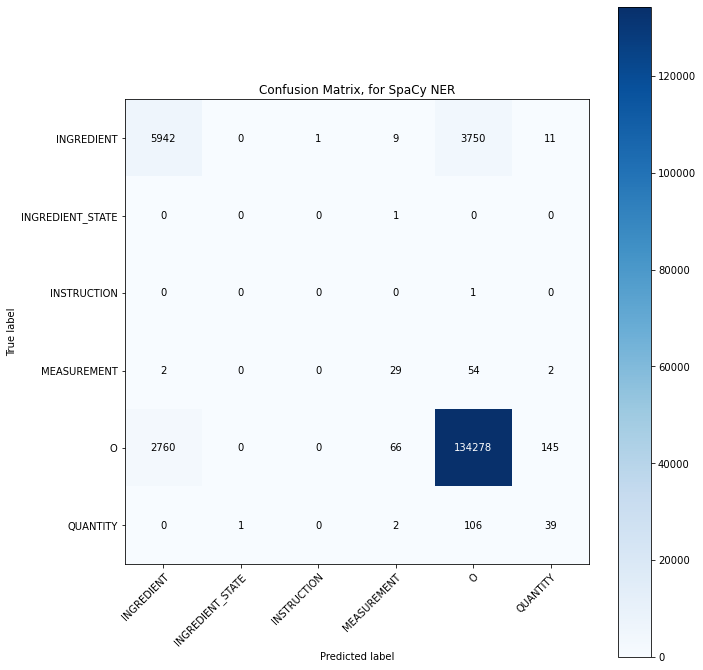

In [371]:
plot_confusion_matrix(docs,classes=get_dataset_labels(),normalize=False)